# Chapter 6: Decision Trees

In [1]:
# import libraries
import pandas as pd
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

# Growing a random forest from decision trees

## Training decision tree on make moons data

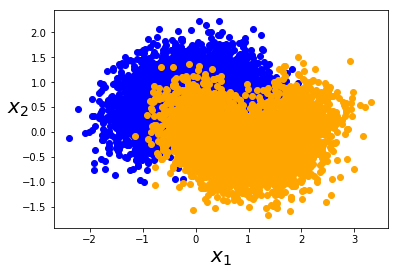

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise = 0.4, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

plt.scatter(X_train[(y_train==0),0],X_train[(y_train==0),1], c = 'blue')
plt.scatter(X_train[(y_train==1),0],X_train[(y_train==1),1], c = 'orange')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show();

# Cross validation and hyperparameter tuning

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [1, 2, 3, 4], 'max_leaf_nodes': [2, 3, 4, 5, 6]}]

grid_search = GridSearchCV(tree_clf, param_grid, cv=3, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_
final_model = grid_search.best_estimator_

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4], 'max_leaf_nodes': [2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

{'max_depth': 1, 'max_leaf_nodes': 4}

In [5]:
from sklearn.metrics import accuracy_score

test_pred = final_model.predict(X_train)

print("Overall accuracy:" + str(accuracy_score(y_train, test_pred)))

Overall accuracy:0.8555


## Building the random forest from decision trees

Continuing the previous exercise, generate 1,000 subsets of the training set,
each containing 100 instances selected randomly. Hint: you can use Scikit-
Learn’s ShuffleSplit class for this.

In [33]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits = 1000, train_size = .01, test_size = None, random_state = 42)

array([[ 2.07327094e+00,  2.02547469e-02],
       [-7.43875589e-01,  1.01769167e+00],
       [-1.03747473e+00,  4.29814010e-01],
       [ 2.61931852e-01, -6.59640221e-01],
       [ 7.02237573e-01,  8.06534609e-03],
       [ 8.32697302e-01,  1.18935535e+00],
       [ 5.46970196e-01,  3.64714424e-01],
       [ 1.89284709e+00,  5.59421537e-01],
       [ 7.44544546e-01, -9.72191890e-02],
       [ 2.94276927e-01,  4.87137283e-01],
       [ 1.17299588e+00,  5.05733709e-02],
       [-2.87695058e-02,  5.41174510e-01],
       [-1.40215131e-01,  9.92300031e-01],
       [ 9.56158102e-03,  8.72566891e-01],
       [ 7.74414869e-01,  1.24415002e+00],
       [ 1.65780603e+00,  2.04296332e-01],
       [ 2.18017875e+00, -8.44619136e-01],
       [ 2.20986329e-01,  5.20501837e-01],
       [ 1.28809265e+00, -4.15686932e-01],
       [ 3.09423886e-01,  1.33795470e+00],
       [ 1.67825875e+00, -7.64540067e-01],
       [ 5.01771608e-01,  6.42049417e-01],
       [ 2.06110758e+00, -1.72827728e-01],
       [-1.

array([[-0.01251239, -0.1828016 ],
       [ 2.02437272,  0.38513013],
       [-0.41752221, -0.23311442],
       [-0.82557815,  0.08819851],
       [ 1.37437156,  0.6460333 ],
       [-1.43735363, -0.08995353],
       [ 0.9932914 ,  0.6822424 ],
       [-0.98117628, -1.0028047 ],
       [ 1.65749765, -0.20426973],
       [-0.08991087,  1.30295826],
       [ 1.46973788, -0.28231852],
       [ 1.45545995, -0.33464797],
       [ 0.83733126, -0.97392666],
       [ 2.82587665, -0.04097891],
       [ 1.84407334, -0.81779571],
       [ 0.86629203,  0.7558725 ],
       [-0.45391285,  0.32873357],
       [ 1.00651409, -0.29500457],
       [ 0.3341594 ,  0.89450656],
       [ 0.96915837, -0.69934453],
       [-0.39326887,  0.24912134],
       [ 1.5482529 ,  1.0393379 ],
       [-0.17202872,  1.57026269],
       [-1.05160861,  1.24468462],
       [ 1.17382236,  0.73265761],
       [ 0.45993549,  0.44062459],
       [-0.32419334,  0.80535146],
       [ 2.45765008,  0.18949169],
       [-0.15272376,

array([[-0.86235497,  0.17659042],
       [ 1.08615562,  0.36427711],
       [-1.74870049,  0.95822244],
       [ 1.61443989, -0.23553102],
       [ 2.11219768,  0.70986603],
       [ 1.32615976,  0.64290519],
       [ 0.79129162, -0.5963433 ],
       [ 2.502657  ,  0.19961619],
       [ 1.19070248,  0.34946727],
       [-0.22954988,  0.52160277],
       [ 0.1548678 , -0.15294328],
       [-0.01800625,  1.26405779],
       [ 0.88712272,  0.27443354],
       [-0.66987371,  0.37341313],
       [ 0.61286662,  0.49742718],
       [ 1.16768706, -0.29616171],
       [ 1.30205617, -0.48998798],
       [ 1.08488847, -0.80791693],
       [ 1.29246288,  0.18499922],
       [ 0.74064455,  0.38334855],
       [ 1.53759819, -0.17673689],
       [ 0.31085332, -0.29388708],
       [-0.64675794,  0.81000173],
       [-0.55904716,  0.31751654],
       [ 0.68201747,  0.41204062],
       [-0.04157218,  0.33456752],
       [ 1.51694883,  0.08998173],
       [-1.27244069,  1.14692814],
       [-0.17925444,

array([[ 0.63138361, -0.0454576 ],
       [ 0.1033666 ,  0.07749984],
       [-0.10201079,  0.19804721],
       [ 1.04397189,  0.16409812],
       [ 0.56847682,  1.08472469],
       [-0.19881553,  1.4883102 ],
       [ 1.99627643, -0.12989117],
       [ 0.1129055 ,  0.5150474 ],
       [-0.66256235,  0.07191204],
       [ 0.87806187,  0.650618  ],
       [ 0.74748409,  0.39979936],
       [ 1.76475408,  0.8629952 ],
       [ 1.88119602, -0.4595353 ],
       [-0.15485825,  1.00859577],
       [-0.51534796,  0.89881193],
       [ 0.65039086,  1.00372875],
       [ 0.05500657,  1.6462499 ],
       [ 1.14011712,  0.5113885 ],
       [ 2.25992266, -0.09454715],
       [-1.48333536,  0.14262416],
       [-0.35454928,  0.59627254],
       [ 1.48602688,  0.1785838 ],
       [-0.2744876 ,  1.38402474],
       [-0.92355848,  0.17920821],
       [ 1.63768725, -0.24974328],
       [-0.24822241,  0.16677062],
       [-0.12243828,  1.44029957],
       [ 1.90450894,  0.28396948],
       [ 0.19250254,

array([[ 0.30851807,  0.88939923],
       [ 1.06584672,  0.71857674],
       [ 0.86338016, -0.28254046],
       [ 0.45859392,  0.05964883],
       [ 0.88470144,  0.71918217],
       [ 0.61742377, -0.14448334],
       [ 1.63998073, -0.31641909],
       [ 2.26843085,  0.22437157],
       [ 0.73965697,  0.65399901],
       [-0.86004599, -0.05746643],
       [ 2.01422771, -0.24834561],
       [ 0.49367557,  0.15569204],
       [ 0.8613745 , -0.59805301],
       [ 0.54099411,  1.40669089],
       [ 0.77441487,  1.24415002],
       [ 1.77451034, -0.35077041],
       [ 0.83356083,  0.60971572],
       [ 0.16404949,  0.78846979],
       [-0.2723523 ,  0.93088893],
       [ 0.30410671,  0.92402301],
       [ 1.32612764,  0.23004157],
       [-0.34220149,  0.87481116],
       [ 1.18675679,  0.6939719 ],
       [ 1.54518071, -0.82238125],
       [ 0.78983861,  0.60352233],
       [ 0.56199224,  0.36188054],
       [ 0.42314078,  0.6675346 ],
       [ 1.53099444, -0.6004091 ],
       [-0.38335908,

array([[ 8.12474592e-01,  2.37855580e-01],
       [ 1.06646602e+00, -3.39054309e-01],
       [ 1.37949559e-01, -2.76898167e-02],
       [ 8.42935736e-01, -3.41201010e-01],
       [-6.43479966e-02, -2.73282865e-01],
       [ 3.59520353e-01, -1.00971194e-01],
       [ 2.31294355e+00,  8.15831649e-02],
       [ 4.14837787e-01, -1.14410565e-03],
       [ 9.93623710e-01, -3.39798474e-01],
       [ 6.68981553e-01, -3.17185369e-01],
       [-6.33154349e-02, -5.26591582e-01],
       [-3.22337949e-01,  8.94259153e-01],
       [ 1.87801587e-01,  8.04658213e-01],
       [ 8.78947768e-01,  6.51838721e-01],
       [-1.33486562e+00,  1.08582993e+00],
       [-1.37383197e-01,  1.37803018e+00],
       [-3.39073897e-01,  1.87860974e-02],
       [ 3.30727648e-01,  4.45620073e-01],
       [ 2.55738841e+00,  3.89776861e-01],
       [-2.63078919e-01, -2.18166726e-01],
       [ 1.20778345e+00,  3.42310181e-01],
       [-8.91276711e-01,  1.87206585e+00],
       [ 9.93627567e-01,  6.97880485e-01],
       [ 1.

array([[ 0.00653644, -0.41175029],
       [ 2.11691568,  0.04552843],
       [-0.27606574,  1.00687674],
       [ 0.03592095, -0.73038066],
       [-0.96227783,  1.22135079],
       [ 0.21185894,  0.85587932],
       [-0.25282373,  0.57401685],
       [ 2.25404593, -0.2065981 ],
       [ 2.00463632,  0.22638442],
       [ 0.76473515,  0.8317208 ],
       [ 0.58371212, -0.58510635],
       [-0.47650611,  1.1623747 ],
       [ 2.0020848 ,  0.17516694],
       [-0.2758582 , -0.21061684],
       [-0.13575605,  0.69612225],
       [ 0.58211364,  1.09865856],
       [-0.69383326,  0.06824151],
       [ 0.29494334,  1.40913601],
       [-0.04030512,  0.77578154],
       [-0.26372343,  1.18049349],
       [-1.06008196, -0.14222346],
       [ 1.83952991, -0.45168132],
       [ 0.89632918,  1.72773093],
       [ 1.32899955, -0.00508342],
       [-0.84850974,  1.32137937],
       [ 2.04977713, -0.15001017],
       [-0.55598357,  1.22741542],
       [ 0.39484388,  0.23208809],
       [ 0.89262952,

array([[ 2.23241277,  0.05309005],
       [-0.82721643,  1.09653295],
       [-0.066031  ,  0.7680241 ],
       [-0.67901202, -0.0728665 ],
       [ 0.72499177,  1.31542553],
       [ 1.44626958, -0.75894294],
       [ 0.35076516,  0.14206949],
       [-0.34848639,  0.68025445],
       [ 0.16451381,  0.03950147],
       [ 1.95864602, -0.98513924],
       [ 0.45199384, -0.89456849],
       [-1.39890181,  0.27512253],
       [ 1.70674133,  0.29093619],
       [ 0.86300924, -0.09964032],
       [-0.38059681,  1.09550567],
       [ 1.80207307,  0.21985718],
       [ 0.47571954,  0.94116466],
       [-1.2369078 ,  1.05936815],
       [ 1.57113997, -1.16164585],
       [-0.03537454,  0.41774127],
       [ 1.10497504, -0.53124014],
       [ 2.05054456,  0.16898735],
       [-0.9129362 ,  0.26034035],
       [ 0.35996397, -0.9752235 ],
       [ 1.47592734, -0.40355365],
       [ 0.24077774, -0.40528032],
       [ 0.25590339,  0.27227146],
       [ 1.70842439,  0.43600059],
       [ 0.71862767,

array([[ 0.76327889,  0.37099269],
       [ 0.03852888,  0.71969417],
       [ 1.9116542 , -0.54766329],
       [ 0.41589887,  0.75934193],
       [-1.00934882,  0.03279529],
       [-1.10038298,  0.42310246],
       [ 0.42133539, -0.45241487],
       [ 0.07398238,  0.40345247],
       [ 1.15058409, -0.60249435],
       [-0.72238844,  0.59185832],
       [ 1.45327595, -0.49765049],
       [ 0.79417581, -0.05260678],
       [ 1.59811973, -0.02816135],
       [ 1.25251447,  0.14011325],
       [-1.29486717,  0.95636852],
       [ 2.31149914, -0.22364604],
       [ 1.41111905,  0.07850992],
       [-0.31912947,  0.29721252],
       [-0.57500768,  0.96819871],
       [ 0.15705417,  1.24042453],
       [ 0.48295219, -0.06464766],
       [ 0.62341672,  1.24104362],
       [ 2.40353197,  0.03273383],
       [ 0.90185112,  0.59507657],
       [ 0.19278802,  0.21394474],
       [ 0.64088862, -0.98055573],
       [-0.2809659 ,  1.70086713],
       [ 0.9957665 , -0.13904423],
       [-0.04030512,

array([[ 1.07586758e+00,  9.51371513e-01],
       [-2.78410496e-04,  9.27762652e-01],
       [ 1.26031236e-01, -2.38216122e-01],
       [ 1.31835091e+00,  3.01168959e-02],
       [ 4.72048575e-01,  1.30044645e+00],
       [-1.27312552e+00,  6.18064996e-01],
       [ 2.09041195e+00,  2.40007764e-01],
       [-8.52398457e-02,  1.79208826e-02],
       [-9.60992202e-01,  6.62263251e-01],
       [ 6.17241879e-01, -4.99761053e-01],
       [ 4.31792759e-01,  2.68048699e-01],
       [ 6.61300590e-01, -2.35662768e-01],
       [ 1.63203779e-01,  8.23740351e-01],
       [ 1.67568458e+00, -3.40181991e-03],
       [ 1.46097103e+00,  3.02210195e-01],
       [-3.78669907e-01,  1.39127658e+00],
       [-1.74489196e-01,  9.57757801e-01],
       [ 1.97417311e-01,  4.48604482e-02],
       [ 9.44878006e-02, -5.84627041e-01],
       [ 1.81637498e+00, -8.51364459e-01],
       [ 2.25950055e-01,  2.68073095e-01],
       [ 2.17447866e-01,  4.44805942e-01],
       [-1.88772650e-01,  7.67945418e-01],
       [ 1.

array([[-5.20029396e-01,  3.33251687e-01],
       [ 6.94885728e-01,  1.35356104e+00],
       [ 5.16667661e-01,  7.88373836e-01],
       [ 1.98167762e+00, -7.41349828e-01],
       [-8.91018231e-01,  1.58300739e-01],
       [-4.87767881e-02,  6.19942991e-01],
       [ 1.91416382e+00, -6.30941487e-01],
       [-2.25877908e-01,  7.46937531e-01],
       [ 1.14961978e+00,  1.94513568e-03],
       [-6.89923727e-01,  1.38820052e+00],
       [ 1.30244088e+00, -5.96344184e-01],
       [ 1.54964555e+00, -5.68958918e-01],
       [ 7.00716557e-01, -8.89613915e-01],
       [ 2.97457818e-01,  9.00105921e-01],
       [ 2.34863991e+00,  7.61225411e-01],
       [ 4.22291101e-02,  9.50850810e-01],
       [-1.04711867e-01, -5.17820679e-01],
       [ 4.64795520e-02, -8.04327156e-01],
       [ 6.34205031e-02,  4.60812029e-01],
       [-7.12468667e-01,  6.43257778e-01],
       [ 1.58148679e+00, -2.03669636e-01],
       [ 2.04535911e-01, -4.29599013e-01],
       [ 1.67416355e+00, -7.98429705e-01],
       [-3.

array([[-1.42041678,  0.6543102 ],
       [-0.22775265,  1.16773442],
       [ 1.99335149,  0.28490832],
       [ 2.16071436, -0.21126189],
       [ 1.10210762, -0.59722366],
       [ 0.28164593, -0.40198046],
       [ 0.34691119, -0.02051525],
       [ 0.94362471,  1.21958339],
       [ 1.07942155, -0.30743414],
       [ 0.92000222,  0.69972491],
       [ 0.66626444,  1.08257786],
       [-0.01975298, -0.02213574],
       [ 1.78709263, -0.33633675],
       [-0.23712734,  1.16225461],
       [-0.32761362,  0.97168535],
       [-0.10455876, -0.19717697],
       [ 0.90999506, -0.20446617],
       [ 0.43707625, -1.04862779],
       [-1.81561765,  0.78834516],
       [ 1.04320845, -0.07257301],
       [ 0.30313762,  0.31503936],
       [ 0.48230885,  0.31534468],
       [ 0.7991092 , -0.24504326],
       [-0.3053887 ,  0.97586882],
       [ 1.27446289, -0.51560181],
       [-0.091727  ,  0.31496364],
       [ 0.52394995, -0.31849062],
       [ 1.05599588, -0.88496229],
       [ 1.44626958,

array([[ 2.05506935, -0.55865025],
       [ 0.46751575,  0.88885013],
       [ 1.28955912, -0.48849916],
       [ 1.9165771 ,  0.01169032],
       [-0.87154898, -0.08362775],
       [ 1.25555811,  0.23741326],
       [ 1.44993154,  0.57995259],
       [ 0.81748341, -0.4541336 ],
       [-0.02106229, -0.19102461],
       [-0.37590448, -0.59383771],
       [-0.19937369,  1.32461193],
       [ 0.27848069, -0.56149784],
       [-0.16977864,  1.00541658],
       [ 1.53900544, -0.46686401],
       [-0.39512332,  1.07228408],
       [ 1.78169504,  0.55223285],
       [ 0.51442912, -0.28553633],
       [ 0.26029382,  1.31609328],
       [ 1.56641081, -0.36208684],
       [-0.72911599,  0.9290847 ],
       [ 0.14507695,  0.49163849],
       [ 1.3121496 ,  0.15201939],
       [-0.87633953, -0.03696281],
       [ 0.48252243, -0.38676986],
       [ 3.2027772 ,  0.49837051],
       [ 0.07896662,  0.7524399 ],
       [-0.16183305,  0.62643019],
       [ 1.85330613,  0.28340237],
       [ 1.81671036,

array([[-0.42345192,  1.0087462 ],
       [ 1.79167726, -0.78475066],
       [ 0.71455637, -0.35846055],
       [ 0.07854819,  0.02225854],
       [ 0.48261712,  0.19380792],
       [ 0.19390862,  0.21222694],
       [ 1.46973788, -0.28231852],
       [ 0.85128202, -0.38898247],
       [ 2.47888422,  0.64369567],
       [ 0.50921716,  0.12195401],
       [ 0.78315916, -1.11617326],
       [ 0.32056484,  0.90508854],
       [ 0.37035206,  0.60381799],
       [-0.66537678,  0.30909758],
       [-0.23221145,  1.29709877],
       [ 0.071278  ,  0.27802906],
       [ 0.08724972, -0.02988745],
       [ 0.5084099 , -1.1652746 ],
       [ 2.03990477,  0.39614771],
       [ 0.19555204, -0.66787629],
       [ 1.90609245, -0.17518053],
       [ 0.57994845,  0.26592338],
       [ 0.35807908,  0.34343743],
       [ 0.94743055, -0.88879622],
       [ 1.07020135,  0.44295917],
       [ 1.70971653, -0.02278831],
       [ 1.72048094, -0.50119298],
       [ 1.49975439, -1.25840053],
       [ 1.69828131,

array([[ 4.65105702e-01, -1.11313491e+00],
       [ 6.80054788e-01,  6.99721419e-03],
       [ 9.72863919e-01, -5.28438098e-01],
       [ 2.94542910e-01, -2.62740479e-02],
       [ 4.89776019e-01,  1.35300285e-01],
       [ 1.02211420e+00, -5.45976557e-01],
       [-9.08438758e-01,  3.21821920e-01],
       [ 6.73014364e-03,  7.82584011e-01],
       [-8.31629498e-01,  7.63175076e-01],
       [ 5.73626614e-02,  4.17563352e-01],
       [ 8.13721656e-01, -8.04146889e-01],
       [ 1.45581461e+00,  4.80494539e-01],
       [-3.63133606e-01,  5.76936105e-01],
       [ 2.44999340e-02, -2.04363098e-01],
       [-1.20810138e+00,  1.02222276e+00],
       [-1.78818936e-01,  1.60921518e+00],
       [ 1.18074230e-01,  1.16463975e+00],
       [ 5.64933364e-01,  5.07940852e-01],
       [ 1.11443484e+00,  3.37575668e-01],
       [-5.68855667e-01,  5.17217256e-01],
       [ 1.45655558e+00,  2.50366983e-01],
       [ 1.06194407e+00,  5.32059257e-02],
       [ 1.31669417e+00, -6.01189516e-01],
       [ 9.

array([[ 0.12858655,  0.29540698],
       [ 1.46973788, -0.28231852],
       [ 0.6735292 ,  1.42958242],
       [ 1.46669413, -0.47863318],
       [-0.54225025,  0.43002146],
       [-0.05845002, -0.49841609],
       [ 0.84493898,  1.27181125],
       [ 2.08234191,  0.16479417],
       [-0.30016457,  0.30189176],
       [ 1.88799344,  0.51747451],
       [ 0.62311483,  1.57630826],
       [-0.19221865, -0.7594928 ],
       [ 1.44536023, -0.71916554],
       [ 2.12991365,  0.93933105],
       [-0.96164091, -0.28949603],
       [-0.26931747,  0.84328401],
       [ 0.35902875,  0.83168875],
       [ 0.04535088,  1.27239019],
       [ 0.76623939, -0.29929181],
       [-0.64665697,  0.45681544],
       [ 0.69516602,  0.01873513],
       [ 0.22050717,  0.74955308],
       [ 2.34480369,  0.44797939],
       [ 1.11823801, -0.61046066],
       [ 0.25363679,  0.41262629],
       [ 1.80809653, -1.33148417],
       [ 1.31325174, -0.73406484],
       [ 1.62429591, -0.44772105],
       [ 2.31294355,

array([[-0.27779027,  0.97419955],
       [ 1.94113664,  0.4400309 ],
       [-0.98473874,  1.64946685],
       [ 1.87506653,  0.06871582],
       [-0.14021513,  0.99230003],
       [-1.00590188,  0.11366983],
       [ 2.10408479, -0.59105233],
       [ 1.08190551, -0.97508068],
       [ 1.79640733, -0.5851313 ],
       [ 0.18636013, -0.36158   ],
       [-1.17795879,  0.57260638],
       [ 0.78898904, -0.20410592],
       [ 1.07495242, -1.05050513],
       [ 0.08286268,  0.84205866],
       [ 0.88196454, -0.62241632],
       [ 0.62893167,  1.06856544],
       [ 0.08836175, -0.11388828],
       [ 0.03172658, -0.42510033],
       [ 1.4171413 , -0.46784235],
       [ 0.72124405,  0.34383657],
       [ 0.67245475,  0.65209918],
       [ 0.34709388,  0.83984456],
       [ 1.45327595, -0.49765049],
       [ 0.48981753, -0.77096249],
       [ 0.80533629, -0.03855613],
       [ 1.55970877,  0.57999675],
       [ 1.35262491,  0.19985835],
       [ 1.02722765,  1.04275018],
       [ 0.04397605,

array([[ 1.61671583, -0.16384705],
       [ 0.78950222,  0.24054127],
       [-0.4172173 ,  0.69493373],
       [ 0.94743055, -0.88879622],
       [ 1.54474038, -0.05581463],
       [ 0.29257628,  0.51861616],
       [-0.36733025,  0.66790211],
       [ 0.83410852,  0.85055127],
       [ 0.14948051,  0.4718641 ],
       [ 0.24351895, -0.27500191],
       [-0.39512332,  1.07228408],
       [ 1.0204154 , -0.41675876],
       [ 1.58626119, -0.21534441],
       [ 0.76172747, -0.4492714 ],
       [ 0.52518312,  0.15376464],
       [ 0.34284378, -0.35876334],
       [-1.1914294 ,  0.20151532],
       [ 2.55914673, -0.33831935],
       [-0.12564383,  0.0689737 ],
       [ 0.67657682,  0.82907669],
       [-0.2342288 ,  0.48619886],
       [ 1.86653542,  0.08430436],
       [-1.55170518,  0.96556275],
       [ 1.83167658,  0.33144887],
       [ 1.82219818, -0.36173379],
       [ 0.85245862, -1.05368884],
       [ 0.67365487,  0.32867832],
       [ 0.93294598,  1.12541951],
       [ 1.12683444,

array([[ 2.80529829,  0.54354666],
       [-0.25227662,  1.140668  ],
       [ 1.278474  ,  0.12853279],
       [ 1.06775385, -1.31885109],
       [ 0.86191546,  0.72274275],
       [ 0.53524089, -0.81041393],
       [ 0.13720927, -0.34801701],
       [ 1.25285167,  0.23224906],
       [-0.79086116,  0.72990134],
       [ 0.09279048,  1.01618424],
       [ 1.84487026,  0.1548438 ],
       [ 0.46751575,  0.88885013],
       [-0.31912947,  0.29721252],
       [ 1.70677186,  0.0920205 ],
       [ 1.93825446, -0.78980831],
       [ 0.07343588,  1.57716822],
       [ 1.75224604, -0.24703258],
       [ 0.15809433,  0.94988066],
       [-0.45687633,  0.37590481],
       [ 0.75827128, -0.48244986],
       [ 1.17772151,  0.21289673],
       [ 1.19916448,  0.54522177],
       [-0.32111164,  1.51642673],
       [ 0.62827307,  0.82196847],
       [ 1.34481354,  0.03201782],
       [ 1.66561987, -0.47111326],
       [ 0.11766551,  0.39682718],
       [-0.41977445,  1.64711551],
       [ 0.98592908,

array([[ 2.33589053,  0.46085026],
       [ 1.38221388, -0.24138281],
       [ 2.02448448, -0.08126709],
       [-0.32019295,  0.34479338],
       [ 0.02491222,  0.95735802],
       [ 1.50837778,  0.62367293],
       [ 0.83467026, -0.52415468],
       [-0.00315571,  0.10081102],
       [-1.37797466,  0.17790904],
       [ 1.15076647,  0.3160673 ],
       [ 0.1406633 ,  0.76931324],
       [ 1.54085077, -0.24640171],
       [-0.62691722,  0.93586219],
       [-0.4505082 ,  0.42191718],
       [ 1.25285167,  0.23224906],
       [-0.41810744,  1.525536  ],
       [-0.38918923, -0.16988398],
       [-0.64405167,  0.88325388],
       [-0.40894993,  1.08150084],
       [ 0.88785735,  0.21595413],
       [-0.01815906, -0.34108635],
       [ 0.62457077, -0.50955169],
       [-0.95379109,  0.98287347],
       [ 2.0837786 , -0.1900245 ],
       [-0.22242149,  0.57642925],
       [ 0.60908891, -1.24053414],
       [-0.10157867,  0.80573791],
       [ 0.57099239,  0.21029308],
       [ 0.03928252,

array([[ 1.38866579,  0.6149995 ],
       [ 0.03805916,  0.33305985],
       [ 2.06696548,  0.38019759],
       [-0.31761493,  0.27231804],
       [ 2.59308517, -0.2184243 ],
       [ 1.6433686 ,  0.10004064],
       [ 1.32074169, -0.44160256],
       [ 1.15411855,  1.19211504],
       [-0.77967846,  0.53864316],
       [-1.15779555,  0.93493499],
       [ 2.01794855, -0.25497882],
       [ 1.6968805 , -0.48977405],
       [ 1.18675679,  0.6939719 ],
       [ 1.20302402, -0.00973215],
       [ 1.45229595,  0.51954348],
       [ 0.38907119,  0.05394398],
       [ 1.61572203, -0.02294569],
       [ 2.02096953,  0.03738029],
       [-1.58145037,  0.29953324],
       [ 0.76858763,  0.10686997],
       [ 0.45368427, -0.51207264],
       [ 1.01147587, -0.01335333],
       [-0.50170868,  0.10168883],
       [-0.47388357, -0.20499833],
       [ 0.70725852, -0.1124517 ],
       [ 1.80679303, -1.29873921],
       [-0.32770197,  2.01685147],
       [ 0.75833348,  0.06235506],
       [ 1.25650019,

array([[ 4.73607269e-01, -1.70229226e-01],
       [ 5.97487419e-01,  6.33275685e-01],
       [ 6.88350734e-01, -7.98698164e-04],
       [-2.71118515e-01, -5.23945737e-01],
       [ 1.64561100e+00,  1.10291909e-01],
       [ 2.48883347e-01,  7.30926397e-02],
       [ 8.13495164e-01,  6.80547745e-02],
       [ 5.08492253e-01,  6.45707220e-01],
       [-1.37544425e+00,  6.62384750e-01],
       [ 7.62014323e-01, -5.09644916e-01],
       [ 1.79640733e+00, -5.85131296e-01],
       [-8.59469959e-03,  8.39322650e-01],
       [ 8.61096965e-01,  1.07871683e-01],
       [ 1.43947361e+00,  1.55744849e-01],
       [ 7.72548095e-01,  8.95191519e-01],
       [ 9.41818031e-01,  1.09477782e+00],
       [ 5.87908455e-01, -7.53843698e-01],
       [ 1.03366597e-01,  7.74998449e-02],
       [ 6.79090199e-03,  8.67084677e-01],
       [ 7.77852903e-01, -2.99078482e-01],
       [ 5.76060918e-01,  1.83474983e-01],
       [-7.98884395e-01,  1.21804144e+00],
       [ 2.02144750e+00, -4.49921849e-01],
       [-5.

array([[-0.97251527, -0.03247519],
       [ 0.04251299,  0.16725535],
       [ 0.05326552, -0.14252192],
       [-1.62317569,  0.12368098],
       [ 1.16256765, -0.92870828],
       [ 1.49316119,  0.35769647],
       [ 0.92400097, -0.75615668],
       [ 0.89855882,  0.13769685],
       [ 1.34181843,  0.54367134],
       [ 1.46750833, -0.52428296],
       [ 1.92017625, -0.12580718],
       [-0.71556093,  0.77348248],
       [ 1.3903403 ,  0.11312505],
       [-0.09327285, -0.03410265],
       [ 0.4285305 ,  0.96271392],
       [ 0.83343938,  0.82375799],
       [ 0.91906981,  0.39335968],
       [-0.34077869,  0.78539085],
       [ 2.25232223,  0.00428045],
       [ 1.4923138 , -0.30709117],
       [ 0.42377243,  0.41546097],
       [ 0.646313  , -0.62053283],
       [ 0.6296207 , -0.21127129],
       [-0.94335962,  0.33080917],
       [ 1.92796145,  0.28286271],
       [-0.27148715,  0.58789865],
       [-1.78258807,  0.82673137],
       [ 1.79897239, -0.4496155 ],
       [ 1.2522813 ,

array([[-0.15091679,  0.43234761],
       [ 2.14091634, -1.15395369],
       [-1.18726609,  0.41077346],
       [ 2.13598181, -0.63515074],
       [ 1.17055271, -0.36596552],
       [ 1.73042541,  0.57733834],
       [ 0.59610412,  1.60278677],
       [ 0.55990272,  0.58039052],
       [-0.0645492 ,  1.19877457],
       [ 0.85596553,  0.73001253],
       [ 0.8866421 , -0.15123515],
       [ 1.06394628,  0.49118608],
       [ 0.65791869,  0.75396246],
       [ 1.41607598, -0.74062227],
       [-0.22942427,  1.28752619],
       [ 1.70001994, -0.07928392],
       [-0.3091181 ,  1.54058893],
       [ 1.46954804, -0.10276667],
       [ 0.53247076, -0.46196138],
       [ 0.26361264,  0.43767958],
       [-0.02144008, -0.22552823],
       [-0.64861518,  0.62223788],
       [ 1.63245868,  0.32684875],
       [ 0.29836805, -0.22256249],
       [ 1.62310444,  0.5079383 ],
       [ 0.32568015, -0.32348529],
       [ 0.03852888,  0.71969417],
       [ 2.25232223,  0.00428045],
       [ 1.69124637,

array([[ 1.42428085,  0.89658528],
       [ 0.89084885, -0.39404495],
       [-0.29737883,  0.53692739],
       [ 0.73744115,  0.35403397],
       [-0.16432816,  0.91405576],
       [-0.40224132,  0.23503789],
       [ 0.64122828,  0.77998434],
       [-0.08079758,  0.15425576],
       [ 0.52518312,  0.15376464],
       [ 1.00672722, -0.15275407],
       [ 0.94362471,  1.21958339],
       [ 0.35076172, -0.07106348],
       [-0.20691024, -0.5230631 ],
       [ 1.02169618, -0.34105471],
       [ 1.0938789 , -0.45956859],
       [ 0.53420428,  0.35379377],
       [-0.16313771,  0.78672066],
       [ 0.51832725,  0.29983082],
       [ 0.10975637,  0.71931454],
       [ 0.20357331,  0.60575848],
       [ 0.53082057, -0.13581751],
       [ 1.76967315, -0.12247281],
       [-0.31052144, -0.01829352],
       [-1.3329965 ,  1.00231638],
       [ 0.8613745 , -0.59805301],
       [-0.66221767,  0.76692201],
       [-1.43485648,  0.62132232],
       [ 0.37480366,  1.19223094],
       [-0.16032991,

array([[ 1.26737369,  0.17351744],
       [ 0.74873672,  0.61438465],
       [ 1.49134826,  0.93716098],
       [ 0.51741297, -0.20173094],
       [-0.30467834, -0.35361648],
       [-0.2086799 ,  0.78361486],
       [ 1.79119359, -0.73218039],
       [ 2.45765008,  0.18949169],
       [ 1.91481449, -0.18573695],
       [-0.83336983,  0.63176149],
       [ 0.42574759,  1.93700009],
       [ 0.92190699, -0.44267007],
       [-1.36237173,  0.28779279],
       [ 0.79417581, -0.05260678],
       [ 1.08260004,  1.06488129],
       [-0.39326887,  0.24912134],
       [ 1.66338319, -0.07353348],
       [ 0.90359724, -0.5147263 ],
       [ 0.87752144,  0.15587334],
       [ 1.03502007,  0.7120847 ],
       [-0.59173914,  1.23378318],
       [ 0.28117844,  0.79078611],
       [ 1.08190551, -0.97508068],
       [-1.30696683,  0.15291444],
       [-0.09531812, -0.26330652],
       [ 1.35262491,  0.19985835],
       [ 0.62448107,  0.2712991 ],
       [-0.25227662,  1.140668  ],
       [ 1.06991694,

array([[ 2.23177748, -0.88492958],
       [ 1.67819484, -0.42442396],
       [-1.44668116,  0.51692415],
       [ 1.327716  ,  0.51095052],
       [ 1.45737115,  0.47928643],
       [ 0.8163985 ,  0.28022257],
       [ 0.80948783,  0.39597635],
       [-1.10222239,  0.32084162],
       [ 0.61302378,  1.33046717],
       [ 2.4328191 ,  0.76384359],
       [ 0.8859059 ,  1.80589968],
       [ 0.48739088,  0.61033091],
       [-0.98126068,  0.29573661],
       [ 2.10334143, -0.53155531],
       [ 1.14958562, -0.79654123],
       [ 1.28021206,  0.91147618],
       [ 0.32205673, -0.35059708],
       [ 1.04498588,  0.20307588],
       [ 1.06441805, -0.14720342],
       [ 0.51747115,  1.73383231],
       [-0.66336707,  0.61256875],
       [-0.30242582,  0.76784729],
       [-0.45786967,  0.38771191],
       [ 2.04816546,  1.23022011],
       [ 0.24608374,  0.01610877],
       [-0.58483654,  1.10997768],
       [ 0.13436594,  1.28860717],
       [-0.9578832 , -0.3282489 ],
       [ 0.79956958,

array([[ 1.70671027,  0.21813466],
       [ 0.35703068,  0.46974364],
       [ 0.00728939,  0.07261725],
       [ 1.05599588, -0.88496229],
       [ 1.41121615, -0.54688297],
       [ 0.77515665,  0.82928381],
       [ 1.04666522, -0.6518649 ],
       [ 1.03872835,  1.07521076],
       [ 1.20188535,  0.70713   ],
       [-0.91750044,  0.24668064],
       [ 0.22982519,  0.42168304],
       [ 0.95357348,  0.13056977],
       [ 2.50492832,  0.21133631],
       [ 1.3722288 ,  0.87867367],
       [ 1.07265526,  0.18526481],
       [ 1.11177929,  0.6664731 ],
       [ 1.99335149,  0.28490832],
       [ 0.64238619, -0.58959705],
       [-0.89793288,  0.76209748],
       [ 0.72009447,  0.01193393],
       [-0.90333161,  0.36534274],
       [ 1.38866579,  0.6149995 ],
       [ 0.78196848, -0.17061299],
       [ 0.02990558,  0.84875529],
       [-0.26065519,  0.0853815 ],
       [ 0.56300169, -0.32885671],
       [-0.32012144, -1.09377863],
       [ 1.14387553, -0.83516676],
       [-0.74992009,

array([[-0.17989434,  0.23075528],
       [-0.74842771,  0.04736818],
       [ 2.38680422, -0.42125108],
       [-0.16170171,  0.99392868],
       [-0.36541451,  0.95498203],
       [ 0.64493549,  0.60547011],
       [ 0.69373663,  0.1426076 ],
       [ 0.09473597,  0.42925819],
       [-1.96359044,  0.04459505],
       [ 2.03632723,  0.30141612],
       [ 2.70777636,  0.6787667 ],
       [ 0.04535088,  1.27239019],
       [ 1.840582  , -0.19072748],
       [ 2.48530515,  0.0243443 ],
       [ 0.10152686,  1.590801  ],
       [ 1.02095007,  0.77639112],
       [-0.28945578,  0.80725279],
       [ 0.82451774, -0.26459967],
       [ 0.80150177,  0.59417575],
       [-0.33460404, -0.20147133],
       [-0.84908853,  0.39970753],
       [-1.13802473,  0.22686924],
       [ 0.82111281,  0.74612989],
       [ 1.50664213, -0.84172128],
       [ 0.76894055, -0.93319763],
       [ 0.75909736,  0.36900757],
       [ 1.53945636,  0.33844281],
       [ 0.94144257, -0.30922186],
       [-1.13386319,

array([[ 1.10271155, -0.81412294],
       [-0.40522422,  0.26522635],
       [ 0.44833328,  0.3680273 ],
       [ 1.77061722, -0.06435706],
       [ 0.95004191, -0.53831466],
       [ 0.44561827,  0.55610054],
       [ 0.79244751,  0.0664827 ],
       [-0.03447858,  1.44114637],
       [-0.28654908, -0.63202913],
       [ 0.69721988, -0.758385  ],
       [-0.34559108,  0.94996692],
       [-1.41771038,  1.13372787],
       [ 1.06584672,  0.71857674],
       [ 1.20490599,  0.09934447],
       [ 0.2913675 ,  0.36843888],
       [ 0.43961314,  0.14006299],
       [ 1.43947361,  0.15574485],
       [-0.10289857,  0.15621771],
       [ 1.51628334, -0.73915508],
       [-0.67280049,  0.97044848],
       [ 0.21469837,  0.50528913],
       [ 0.29982856,  0.62674582],
       [ 0.16651422, -0.30582057],
       [ 1.60567203, -0.77787347],
       [ 2.92044665,  1.42050701],
       [-0.16704905,  1.17205347],
       [ 1.54482457, -1.51364397],
       [-0.66832548,  0.67373913],
       [-0.26550693,

array([[ 1.16052178, -0.07604415],
       [-0.55797298,  0.9062448 ],
       [ 1.20182517, -0.04903851],
       [ 0.95993778, -0.3520771 ],
       [-0.98139091,  1.20090664],
       [-0.29636891,  0.18998528],
       [ 0.70205292,  0.06316216],
       [ 1.76997443, -0.38157547],
       [-0.94335962,  0.33080917],
       [-0.72016241,  1.09082853],
       [ 0.70191275, -0.88095549],
       [ 0.29648085,  1.00449707],
       [ 1.76840109,  0.03275717],
       [ 0.45224511, -0.47888961],
       [ 1.56863629, -0.28222979],
       [ 0.35052136,  1.28820535],
       [-0.72821935,  1.11948115],
       [ 0.95204814,  0.4681413 ],
       [-1.27115088,  0.32350895],
       [ 0.64720994, -0.36669355],
       [ 0.64088862, -0.98055573],
       [ 0.66130059, -0.23566277],
       [-0.87595001, -0.15180218],
       [ 0.2249199 ,  0.66441441],
       [ 1.28673962, -0.33206582],
       [ 0.80216059,  0.26890788],
       [ 1.2712797 , -0.46949881],
       [ 0.94498186, -0.42202797],
       [-0.12918345,

array([[-0.22967998,  1.16607816],
       [ 0.46630236,  0.73127587],
       [ 0.88331546,  0.01296615],
       [ 2.22493741, -0.09952914],
       [ 1.6989701 ,  0.16644892],
       [-0.72436273,  0.20609969],
       [ 0.66639498, -0.24632008],
       [-0.40545622,  0.08759947],
       [ 1.22606873, -0.63318808],
       [ 1.07020135,  0.44295917],
       [ 0.61724188, -0.49976105],
       [-1.59649614, -0.06469484],
       [ 0.48740426,  1.44989307],
       [ 0.1666423 ,  0.48786571],
       [-0.26316731,  0.66336168],
       [ 0.36423894, -0.23904928],
       [ 0.46531317,  0.63914842],
       [ 0.71011948,  1.25470612],
       [ 1.32311507,  0.07489032],
       [ 0.92219038, -1.10475805],
       [-0.1395652 ,  0.03688025],
       [ 0.25160023,  1.23009444],
       [-0.33332017,  0.49088328],
       [-0.09967651, -0.21790048],
       [ 0.24377157, -0.24429076],
       [ 0.44584481,  0.6160893 ],
       [ 0.18072636, -0.90683906],
       [ 1.28131792,  0.31602777],
       [ 1.4442452 ,

array([[ 0.77339582, -0.83508503],
       [ 1.46149808, -0.01070937],
       [ 2.0214475 , -0.44992185],
       [-0.94978264,  1.32819836],
       [ 0.32372501,  0.92605525],
       [ 2.02032024, -0.16015363],
       [ 1.55811783, -0.42520739],
       [ 1.3543806 , -0.27012218],
       [ 0.39864352, -0.47998468],
       [-0.08329079, -0.72472168],
       [-0.1395652 ,  0.03688025],
       [ 1.22260355, -0.61062662],
       [ 1.69280961, -0.12501772],
       [ 1.84773529, -0.41269754],
       [ 1.02532808, -0.17618995],
       [ 1.3539249 ,  0.47338456],
       [ 0.23135769, -1.2588848 ],
       [ 2.08628344, -0.37685154],
       [ 0.06444516,  1.12850525],
       [ 0.36637513, -0.2220093 ],
       [ 1.04669946,  0.78306023],
       [ 2.24007485,  0.53734361],
       [ 0.68677553,  0.0263119 ],
       [ 2.48019598,  0.58501089],
       [ 0.45459672,  0.80399557],
       [-0.07017005,  0.29783004],
       [-0.87793506, -0.41527822],
       [ 0.60513261, -0.17562676],
       [ 2.47888422,

array([[-0.39313773,  1.11301331],
       [ 0.3781509 ,  1.08296795],
       [-0.74086535,  0.63791257],
       [ 2.31748321,  0.25029932],
       [ 0.11721299,  0.3682177 ],
       [-0.42680334,  0.13862259],
       [ 0.1142009 ,  0.36694781],
       [ 1.45594953,  0.44890717],
       [ 1.6280154 , -0.72208908],
       [ 0.56707647, -0.67519183],
       [-0.89562629, -0.61353781],
       [-0.93340686,  0.66481792],
       [ 1.14387553, -0.83516676],
       [ 0.48229735,  0.26954031],
       [-1.08990817, -0.66654155],
       [-0.68450096, -0.02569762],
       [-0.064348  , -0.27328287],
       [ 0.25639853, -0.29242183],
       [ 2.38517732, -0.38696092],
       [ 0.03046357,  0.82319405],
       [ 1.69823627, -0.85149658],
       [ 1.02954499,  0.09202871],
       [ 1.75224604, -0.24703258],
       [ 1.85958249,  0.08487423],
       [-0.30313951,  1.44900591],
       [ 0.61482746,  0.6381867 ],
       [ 1.48968952,  0.2074453 ],
       [ 1.6256938 , -0.24165485],
       [-1.29576357,

array([[ 5.26456184e-01,  4.29031112e-02],
       [ 6.68640194e-01,  1.26227702e+00],
       [ 1.93181542e+00,  7.12426723e-01],
       [ 2.22180888e+00, -1.92093798e-01],
       [ 8.03387815e-01, -6.64281779e-01],
       [ 1.98764024e+00,  5.34344917e-02],
       [ 1.77675345e+00, -2.00019307e-01],
       [ 5.12566722e-01, -2.80794002e-01],
       [ 7.39656965e-01,  6.53999011e-01],
       [-9.57883199e-01, -3.28248905e-01],
       [ 6.25572035e-01,  1.02867186e-01],
       [-2.87695058e-02,  5.41174510e-01],
       [ 5.40838907e-01,  8.07976453e-01],
       [ 6.10214333e-01, -1.66862967e-01],
       [ 9.50884282e-01, -3.98474389e-01],
       [-3.68633885e-01,  1.51454499e+00],
       [-3.66540979e-02,  1.56920489e+00],
       [-1.35070085e+00,  2.42961012e-01],
       [ 1.69714902e+00,  9.35465929e-01],
       [ 9.82955699e-02,  4.16156585e-01],
       [-5.62279962e-01,  1.35865495e+00],
       [ 4.86383708e-02,  1.18493715e+00],
       [ 1.03931444e+00,  4.87148527e-01],
       [ 9.

array([[ 0.47953708,  0.20996235],
       [-0.75751246, -0.04883722],
       [-0.08454823,  1.43006026],
       [ 0.80173037,  0.16799812],
       [ 0.13897334,  0.05508102],
       [-1.20508207,  0.15927216],
       [-0.6075239 , -0.11301587],
       [ 1.77635396, -0.30445311],
       [ 0.94428655,  0.45275137],
       [ 0.98033888, -0.49959944],
       [ 1.09317867, -0.26377942],
       [ 2.09609242, -0.38728103],
       [ 0.67942539, -0.13617173],
       [ 1.67517951, -0.82399925],
       [ 1.35049544,  0.16826227],
       [ 1.5971092 ,  0.1753037 ],
       [ 0.42839811,  0.45513008],
       [ 1.71123453, -0.75836547],
       [ 0.6748626 ,  1.44142718],
       [ 1.1260688 , -0.47916452],
       [ 1.34234727, -0.77849698],
       [ 1.49496917,  0.85263017],
       [ 0.38998648,  0.6708991 ],
       [ 0.87910485,  0.24894572],
       [ 0.7419761 , -0.69740484],
       [ 0.63407184, -0.68078101],
       [ 1.56093353, -0.12843438],
       [-0.84908853,  0.39970753],
       [ 0.64122828,

array([[ 1.15141526,  0.33581854],
       [-1.64537807, -0.32531671],
       [-0.37036934,  0.24424833],
       [ 2.35065812,  0.3386991 ],
       [-0.8562909 ,  0.39559113],
       [ 0.64367545,  0.42948609],
       [ 0.80823198,  1.33333165],
       [-0.65377967, -0.21046968],
       [ 0.8577546 ,  0.68798812],
       [ 1.81306173,  0.18795872],
       [-0.455359  ,  0.47004615],
       [-1.33288763,  1.34126373],
       [ 0.14699824,  0.2052638 ],
       [ 1.2190516 , -0.12640348],
       [ 1.18761914,  0.01682154],
       [ 0.4576878 , -0.33046821],
       [ 1.16051778, -0.81848446],
       [ 0.17019318,  1.26715187],
       [ 0.12520041, -0.08750201],
       [-0.39585121,  0.56066132],
       [ 0.57626424, -0.60940321],
       [ 0.76357335, -0.30904896],
       [ 2.00671955, -0.18298219],
       [ 1.5636755 ,  0.27556566],
       [ 1.7256249 , -0.22175508],
       [ 1.78573545, -0.89530865],
       [ 0.69516602,  0.01873513],
       [ 0.81711659, -0.3493028 ],
       [-1.36237173,

array([[-1.08385322,  0.375141  ],
       [ 0.13074829,  0.43743414],
       [ 0.76944841,  0.30784764],
       [ 1.66990606, -0.13993115],
       [ 2.00671955, -0.18298219],
       [ 0.84296201,  1.40684212],
       [ 0.51456371, -0.34238027],
       [-1.23575873, -0.76615639],
       [ 0.31624087,  0.61943502],
       [ 0.90335139, -0.03139368],
       [-1.20810138,  1.02222276],
       [-0.27702429,  0.42917476],
       [ 0.62147688,  0.54213287],
       [ 0.10718611,  0.96864727],
       [ 0.13436476, -0.58491601],
       [ 1.48632656, -0.08195536],
       [ 0.23760434,  0.48875265],
       [ 1.42843575, -0.70115066],
       [ 0.23653019, -0.27341074],
       [-1.11795673,  0.56191089],
       [ 0.56821746,  0.6601835 ],
       [ 0.1811897 ,  1.22461185],
       [ 1.44828732,  0.2137317 ],
       [-0.60020622, -0.13596798],
       [-0.31912947,  0.29721252],
       [-0.32384432,  0.39113934],
       [ 0.3245087 ,  0.19638384],
       [ 0.03172658, -0.42510033],
       [-0.04756956,

array([[ 0.35902875,  0.83168875],
       [-0.09863031,  0.13015805],
       [ 0.08852154, -0.1398886 ],
       [ 0.67956267, -0.7115878 ],
       [-0.11720891,  0.72880243],
       [ 1.64875424, -0.58985039],
       [-0.55797298,  0.9062448 ],
       [ 2.34996818, -0.79814349],
       [-0.24860761,  1.85374447],
       [ 1.49639302,  0.02875911],
       [-0.53547207,  1.46271967],
       [ 1.42473174, -0.03512441],
       [ 0.63920891, -0.13690475],
       [-1.65582968,  0.4356384 ],
       [ 0.08561612,  1.49477848],
       [ 2.25992266, -0.09454715],
       [-0.28584126,  0.95350131],
       [-0.05466295,  0.96094272],
       [ 0.10030671,  0.98766653],
       [ 0.89416552, -0.08360852],
       [-0.17739574, -0.21394406],
       [ 0.82051517, -0.59735438],
       [ 0.56847682,  1.08472469],
       [-0.066031  ,  0.7680241 ],
       [ 0.49955661,  1.0417188 ],
       [ 0.96907546,  0.21252638],
       [-0.35759755,  0.66929007],
       [-0.28822922,  1.40056379],
       [ 2.40353197,

array([[ 0.33576514,  1.41315884],
       [ 0.14405148, -0.75836738],
       [ 0.03398314,  1.50366083],
       [ 0.64190619,  0.76151315],
       [-0.20906129,  0.65998687],
       [ 0.75536071,  1.11087327],
       [ 0.2701637 ,  1.09349016],
       [ 1.37667692,  0.47246774],
       [ 0.65614047, -0.79384139],
       [ 0.50002534,  0.94239571],
       [-0.13575605,  0.69612225],
       [ 2.23241277,  0.05309005],
       [ 0.053037  ,  0.3737536 ],
       [-0.64675794,  0.81000173],
       [ 0.46255076, -0.00427021],
       [ 0.30851807,  0.88939923],
       [-0.79793684,  0.41911282],
       [ 1.92989666, -0.4393892 ],
       [-0.88522095,  0.32387211],
       [-0.81571669,  0.88845648],
       [ 1.84317147,  0.64778506],
       [ 0.59814744, -0.25417226],
       [ 1.02970269, -0.20885456],
       [-0.20968275,  0.39564875],
       [ 1.76552107, -0.08250874],
       [ 0.90536261, -0.03248412],
       [ 0.63303317,  1.89822735],
       [ 1.14804898, -0.97434863],
       [-0.21225065,

array([[-1.07996317e-01,  5.85625543e-01],
       [ 3.71942823e-01,  4.82433908e-01],
       [-1.62055047e-01,  1.55382384e+00],
       [ 1.42299376e+00,  5.14225394e-01],
       [-5.51102367e-01,  1.03328554e+00],
       [-1.09919849e+00,  5.34510232e-01],
       [-3.96053816e-01, -3.86419550e-01],
       [-4.80264709e-02,  1.12529622e+00],
       [ 2.58378119e+00, -9.33109187e-01],
       [ 7.17912900e-01,  2.65596809e-01],
       [ 8.28786270e-02,  7.31154460e-01],
       [-3.34352700e-02, -1.08485120e-01],
       [ 6.88328210e-01, -2.66210075e-01],
       [ 1.86527140e-01, -1.05860366e-03],
       [ 1.03884587e+00, -7.35156260e-01],
       [ 5.69404951e-01,  1.30237207e+00],
       [ 3.65861590e-01, -2.59578766e-01],
       [-3.21390681e-01,  1.74712997e-01],
       [-8.52398457e-02,  1.79208826e-02],
       [-9.03331608e-01,  3.65342737e-01],
       [-9.52795948e-01,  9.37767454e-01],
       [ 8.30797769e-02,  9.88606533e-01],
       [-1.95544691e-03,  6.03530115e-01],
       [ 2.

array([[ 1.9569393 ,  0.18288645],
       [-0.23699265,  1.07566129],
       [ 0.33575699, -0.37794397],
       [ 2.40247432,  0.42255672],
       [-0.25921995,  0.85304702],
       [ 0.75732988,  0.72939937],
       [ 0.69591339,  1.30294052],
       [ 0.92033043, -0.30204547],
       [ 1.07586758,  0.95137151],
       [-0.71904726,  1.27532736],
       [ 0.38339825,  0.783235  ],
       [-1.15245654,  0.30342697],
       [-0.38708236,  0.95341992],
       [ 2.47567003,  0.69045956],
       [-0.06258094, -0.06455409],
       [ 1.63767065,  0.6174712 ],
       [ 0.68761764,  0.23988473],
       [ 0.49545142,  0.12860702],
       [ 0.74147565, -0.89501509],
       [ 1.09490079,  0.15940775],
       [ 1.1376591 , -0.64170899],
       [ 1.97036718, -0.32963473],
       [ 0.51950052, -0.07031613],
       [ 0.7342569 , -0.2831481 ],
       [-1.15169075,  1.26759559],
       [ 1.8805923 ,  0.1445956 ],
       [-1.06218304, -0.13221379],
       [-0.03920458,  0.84603753],
       [ 1.33090811,

array([[ 0.30724352,  0.5088227 ],
       [-0.05466295,  0.96094272],
       [ 0.0216327 ,  0.79385798],
       [-0.63578184,  0.9295625 ],
       [-0.41381848,  0.05465756],
       [ 0.10981661,  1.36432619],
       [ 0.1142009 ,  0.36694781],
       [ 1.22606873, -0.63318808],
       [ 1.49911213,  0.52358143],
       [ 2.13513584,  0.01502794],
       [ 2.01977836,  0.34817941],
       [ 2.26843085,  0.22437157],
       [ 1.42743651,  0.55170935],
       [ 1.19126569, -0.09464899],
       [ 0.47103397,  0.66620752],
       [-1.07255613,  0.53563004],
       [-0.99763997,  0.2488851 ],
       [ 1.46652725, -0.2589919 ],
       [ 1.39752782, -0.05878513],
       [ 1.89284709,  0.55942154],
       [-0.87537948, -0.03651399],
       [ 0.65753778,  1.1307666 ],
       [ 0.41589887,  0.75934193],
       [ 0.36988996, -0.40851792],
       [ 0.66793651,  1.13729933],
       [-0.38302243,  0.1662665 ],
       [ 0.81841795, -0.25766778],
       [-1.47456816,  1.09300631],
       [ 0.35052136,

array([[ 0.06195352,  0.25980157],
       [ 0.91217041,  1.40921524],
       [ 0.31624087,  0.61943502],
       [ 0.93890068, -1.11862394],
       [ 0.18452164,  1.47636139],
       [ 0.61257344,  0.94418496],
       [-0.95150164,  0.1421862 ],
       [ 0.72774517, -0.07184344],
       [-0.13943929,  1.14846664],
       [ 0.15937477,  1.36092931],
       [ 0.89566532,  1.70152474],
       [ 0.57836999,  0.65032378],
       [ 1.11126952, -0.38632803],
       [-1.55170518,  0.96556275],
       [ 0.49744923,  0.55563849],
       [ 0.09108224,  0.86844562],
       [ 0.74103562,  0.89767882],
       [-0.76243341,  1.20547928],
       [-0.53143124,  0.57603709],
       [-1.52829648,  0.37351422],
       [ 1.03557929, -0.54949629],
       [-0.72031755, -0.15124811],
       [ 0.17664454, -0.90760145],
       [ 0.4802425 ,  1.13040024],
       [ 0.96998052,  0.40299614],
       [ 0.88303294,  1.50494707],
       [ 1.31971519, -0.15806607],
       [ 1.11791877,  0.1083955 ],
       [-0.34848639,

array([[-1.96095793,  0.66141199],
       [ 0.18780159,  0.80465821],
       [ 1.96510542, -0.31786884],
       [ 1.57398808,  0.86150398],
       [ 0.94181803,  1.09477782],
       [-0.42740693,  0.32181691],
       [ 0.11056639,  1.396441  ],
       [ 0.35009365,  0.34762179],
       [ 0.32741145,  0.46798358],
       [ 1.76552107, -0.08250874],
       [-0.61868313,  0.42057637],
       [-1.05160861,  1.24468462],
       [ 0.3710743 , -0.52983844],
       [ 1.90237286,  0.67252386],
       [-0.26341376,  0.76883226],
       [ 0.00654876,  0.47711453],
       [ 1.04498588,  0.20307588],
       [ 2.21467425,  0.56588146],
       [ 1.5938512 ,  0.05852449],
       [ 0.78638739, -0.18071267],
       [ 1.12636495,  0.72773644],
       [-0.33493606,  0.09061472],
       [ 1.14958562, -0.79654123],
       [ 0.79509925,  0.08270605],
       [ 0.97783419, -0.32968453],
       [ 0.40161755, -0.78705347],
       [ 1.5922699 , -0.59430248],
       [ 1.33471061, -0.10043149],
       [ 0.69373663,

array([[ 1.78269865, -0.50203255],
       [ 0.83208755,  0.21060819],
       [ 0.42377243,  0.41546097],
       [ 0.7918696 ,  1.06300897],
       [ 0.66193476,  0.11445117],
       [ 0.78438287, -0.22621436],
       [ 0.94427728,  0.72796204],
       [-0.05047742,  1.45511483],
       [-1.13205825,  0.83335649],
       [ 0.62296818,  0.01708563],
       [ 1.36952228,  0.23265185],
       [ 1.16282551, -0.47655187],
       [-0.84160269, -0.00519105],
       [ 2.4893489 , -0.58407046],
       [ 2.35065812,  0.3386991 ],
       [ 1.61572203, -0.02294569],
       [ 0.68201747,  0.41204062],
       [ 0.96486974, -0.05407002],
       [ 0.37629896, -0.17680728],
       [ 1.19859325, -0.84684019],
       [ 0.66033343,  1.11170417],
       [-0.13742839,  1.09062216],
       [-0.12359149, -0.65172233],
       [ 1.27075421, -0.61823156],
       [-0.83225462,  0.11349795],
       [ 1.85093031,  0.32479568],
       [ 0.73379797,  0.05425986],
       [ 0.48643172, -0.39925055],
       [ 1.45948424,

array([[ 0.69143262, -0.61869755],
       [ 1.79644636, -0.78047376],
       [ 2.39873047,  0.28702202],
       [ 2.01328332, -0.35327907],
       [-0.46791641,  1.2049545 ],
       [-0.56827805,  1.38279701],
       [ 0.43194062,  1.02941509],
       [-0.05954719,  0.01878934],
       [ 1.40561341,  0.58865186],
       [ 1.97238715, -0.83806422],
       [ 2.02983519, -0.4677283 ],
       [-0.48967298,  0.16418239],
       [ 0.96727609, -0.28359028],
       [ 1.68147418, -0.47155085],
       [-0.41844434,  1.30240972],
       [ 1.24175668, -1.06291239],
       [ 0.45069781,  0.668369  ],
       [-1.07518624,  0.05706134],
       [-1.13802473,  0.22686924],
       [ 1.01937046,  0.70773478],
       [ 0.11427296,  0.87235041],
       [-0.15401376,  0.66746684],
       [ 0.54796773,  0.95766374],
       [ 1.25719757,  0.32491738],
       [ 1.34206161, -0.48750154],
       [ 0.46638214, -0.08010853],
       [ 0.39848846,  0.82648975],
       [ 1.80874796, -0.1509973 ],
       [ 1.7109771 ,

array([[ 0.30657577, -0.12280507],
       [-0.94481958, -0.04198049],
       [ 0.35999661, -0.52612004],
       [-0.5895293 ,  0.32194447],
       [-0.14812442,  0.29458454],
       [ 0.26894328,  0.16598309],
       [ 0.52847638,  0.08827056],
       [ 0.99779569, -0.30478439],
       [ 0.62960685,  0.71822265],
       [ 0.91684359,  0.70474645],
       [ 0.09829557,  0.41615658],
       [ 0.21704944,  1.09170312],
       [ 0.8866421 , -0.15123515],
       [ 1.64836839, -0.8396055 ],
       [ 0.14507695,  0.49163849],
       [ 0.85054363,  0.56392389],
       [ 0.16426565, -0.7127476 ],
       [ 0.841214  ,  0.95727036],
       [ 1.02281588,  0.15647595],
       [-1.42175868,  0.57746848],
       [ 1.56960221,  0.78542847],
       [ 1.316706  ,  0.05048261],
       [ 1.02954499,  0.09202871],
       [ 0.57503977, -1.00546152],
       [-1.15245654,  0.30342697],
       [ 0.60870808, -0.19587799],
       [ 0.14513352,  0.01354835],
       [-0.37551688,  0.89631631],
       [ 0.53869662,

array([[-3.71435428e-01,  3.93326621e-01],
       [ 7.64735147e-01,  8.31720797e-01],
       [-2.76167296e-01,  8.83909833e-01],
       [ 2.96480853e-01,  1.00449707e+00],
       [-7.81523535e-01,  1.11024136e+00],
       [-7.03536294e-02,  5.19321746e-01],
       [-9.48891927e-01, -5.13724188e-01],
       [ 1.15844256e-01, -2.95110346e-01],
       [ 2.47980950e-03,  5.26121925e-01],
       [ 4.76801002e-02,  2.02268916e-01],
       [-6.60725689e-03,  1.20131909e+00],
       [ 5.36401436e-01,  3.65950266e-01],
       [ 1.99117144e+00, -1.82659138e-01],
       [-2.06725473e-01,  9.81734966e-01],
       [ 2.83948426e-01,  5.56953305e-01],
       [ 1.65243206e+00, -1.05342961e+00],
       [-9.53791094e-01,  9.82873474e-01],
       [ 1.23811810e+00,  1.25859898e+00],
       [ 6.06956039e-01,  3.00650073e-01],
       [ 2.31294355e+00,  8.15831649e-02],
       [ 1.25351114e+00,  2.35112703e-01],
       [-9.75924447e-01,  1.15669018e+00],
       [ 1.52453679e+00, -1.39578121e+00],
       [ 2.

array([[-1.64598911e+00,  6.43620754e-01],
       [ 1.66416685e+00,  2.66437224e-01],
       [ 1.77675345e+00, -2.00019307e-01],
       [ 1.02281588e+00,  1.56475947e-01],
       [ 7.57647112e-01, -7.86810373e-01],
       [-1.53704944e+00,  6.88236610e-01],
       [ 1.58069629e+00, -3.55949807e-01],
       [ 2.08359043e+00, -5.90401914e-01],
       [-3.95237457e-01, -6.03999458e-01],
       [ 7.55877961e-01,  1.59476516e-01],
       [-7.53300920e-01,  1.09844156e+00],
       [ 1.38451905e+00,  9.45306815e-01],
       [ 1.73485326e+00,  2.43278754e-01],
       [ 6.86775531e-01,  2.63119047e-02],
       [ 1.24895576e+00, -1.38873721e-03],
       [ 1.44054017e+00, -4.93011171e-01],
       [ 9.60093362e-02,  6.71495944e-01],
       [-4.91369398e-02, -3.00812543e-01],
       [-8.56694370e-01,  4.83917709e-01],
       [-6.98447489e-01,  6.95055784e-01],
       [-3.77251089e-01, -3.22348407e-02],
       [-1.26125298e+00, -1.41931035e-02],
       [ 8.05336291e-01, -3.85561263e-02],
       [-3.

array([[ 8.24369688e-01,  2.57666636e-01],
       [-7.58579983e-01,  1.31534928e-01],
       [ 1.08171366e+00,  3.77225901e-01],
       [ 1.46926720e+00,  6.10226895e-01],
       [ 9.99406923e-01, -4.81650562e-01],
       [ 4.54596720e-01,  8.03995568e-01],
       [-2.04949955e-01,  8.84545576e-01],
       [ 5.21030253e-01,  4.16266186e-01],
       [ 1.25419195e+00, -8.05368352e-01],
       [ 1.65749765e+00, -2.04269731e-01],
       [ 7.20094467e-01,  1.19339263e-02],
       [ 1.62852749e+00,  5.85431549e-01],
       [ 4.93567309e-01, -4.72015007e-01],
       [ 1.56326342e+00, -2.81428715e-01],
       [ 1.21528137e+00,  1.43157366e-01],
       [ 1.66414435e+00,  1.32816174e+00],
       [-1.38268398e+00,  1.09732806e+00],
       [ 1.61338642e-01,  1.23162427e+00],
       [ 4.72465242e-01,  5.95136280e-01],
       [ 1.06129523e+00,  7.33747148e-01],
       [ 1.80468449e+00,  3.20351892e-01],
       [-1.62558041e+00, -3.31163202e-01],
       [-1.72984212e-01,  5.18219322e-01],
       [-1.

array([[ 0.21294891,  0.56576274],
       [-1.11978797, -0.46167992],
       [-1.63570214,  0.43529154],
       [-0.04115913,  0.12222445],
       [ 0.84443976,  0.23212396],
       [ 1.64098437, -0.44157864],
       [ 2.20693911,  0.22479683],
       [-0.7933735 ,  0.53420987],
       [ 0.74295904, -0.49309621],
       [-0.81126918,  1.21660838],
       [-1.00466064,  0.95256007],
       [ 0.03806457,  0.44403962],
       [-1.21753813,  1.00641235],
       [ 0.8989827 ,  0.76139277],
       [-0.50268429,  0.44722139],
       [-0.00339827,  1.27956386],
       [-0.34703913,  0.88629602],
       [ 2.45487082,  0.15743126],
       [ 0.17664454, -0.90760145],
       [ 0.61294594, -0.79126485],
       [-0.22942427,  1.28752619],
       [ 1.6256938 , -0.24165485],
       [ 1.26042953, -0.07918006],
       [ 2.59618565, -0.37255709],
       [ 1.08222362,  0.95539444],
       [ 1.34234727, -0.77849698],
       [-1.81561765,  0.78834516],
       [ 1.58407666, -0.27453582],
       [ 1.81912825,

array([[ 9.22804781e-01,  7.12897082e-02],
       [ 7.49163365e-01, -6.42078031e-02],
       [ 1.08695590e+00,  4.80892383e-01],
       [-1.06120884e+00,  6.33267521e-01],
       [-3.96053816e-01, -3.86419550e-01],
       [ 4.92582611e-01,  3.64782882e-02],
       [ 1.83157322e+00,  2.11565015e-01],
       [ 5.45689721e-01, -1.16083478e+00],
       [-6.43636530e-01,  3.78905995e-01],
       [ 9.43624708e-01,  1.21958339e+00],
       [ 1.21739419e+00, -6.48230003e-01],
       [ 9.20354497e-01, -6.01739903e-02],
       [ 1.01982310e+00,  1.17069557e+00],
       [-9.79832723e-01,  6.81366033e-01],
       [ 3.98462067e-01,  1.07769146e+00],
       [ 9.63769088e-01,  1.17271998e-01],
       [-1.36235605e-01,  4.06383138e-01],
       [ 8.91459935e-02, -1.62539896e-01],
       [ 5.92156294e-01, -1.08933238e+00],
       [ 7.16397626e-01, -1.36750479e+00],
       [ 8.74939668e-01, -1.31162667e-01],
       [-3.10521441e-01, -1.82935218e-02],
       [ 1.00391975e+00, -4.32020845e-01],
       [ 1.

array([[-0.05444002,  1.06304417],
       [-0.60307232,  1.18611176],
       [ 1.55439768,  0.62009565],
       [ 1.04672891,  1.63422182],
       [ 1.63767065,  0.6174712 ],
       [ 1.76840299, -0.30057345],
       [-0.48960979,  0.96794206],
       [ 0.02068869,  0.84137604],
       [-0.09107372,  0.22940071],
       [ 0.0386334 , -0.17313538],
       [-0.42345192,  1.0087462 ],
       [-0.15193908,  1.05306997],
       [ 0.1306411 ,  1.15060116],
       [ 1.7109771 ,  0.81532819],
       [ 0.94820939, -0.01376726],
       [-0.40861671,  0.81107099],
       [ 1.43366553, -0.47798944],
       [ 0.33649193,  0.73438588],
       [ 0.5777586 ,  0.72081674],
       [ 0.02449993, -0.2043631 ],
       [-0.59866995,  0.58583538],
       [ 1.94640029,  0.13385422],
       [ 1.60567203, -0.77787347],
       [ 1.04640106,  0.66853338],
       [-0.87416742,  1.02647511],
       [-1.26608397,  0.45785552],
       [ 1.69193724, -0.39787673],
       [ 1.91141032,  0.09585737],
       [ 1.88319206,

array([[ 1.45090285, -0.31092633],
       [-0.57433434,  0.70335779],
       [ 1.67517951, -0.82399925],
       [ 0.88712272,  0.27443354],
       [-0.17739856,  1.00330366],
       [ 0.52302023,  0.47964739],
       [ 1.41111905,  0.07850992],
       [-0.2809659 ,  1.70086713],
       [ 0.13352391,  0.65725421],
       [ 1.70829776, -0.32145926],
       [ 0.80971419,  0.06065604],
       [ 0.41251281, -0.59246495],
       [-0.50121365, -0.15091099],
       [ 0.93310148,  1.01987545],
       [ 0.62839599,  1.45331378],
       [-0.89123617,  0.76033864],
       [-0.6760153 ,  0.14194515],
       [ 0.88429248, -1.19134943],
       [ 0.51888471, -0.66405146],
       [ 0.3044121 ,  0.08096774],
       [ 0.61452698,  0.3413854 ],
       [ 1.58479348, -0.66600838],
       [ 0.48740426,  1.44989307],
       [ 0.66659   ,  0.50214873],
       [-1.59020013,  0.36837265],
       [-0.22299175,  1.20795857],
       [-0.41955396,  0.5020642 ],
       [-1.30354703,  0.53453103],
       [ 0.89084885,

array([[-0.95985764,  0.58167549],
       [ 0.80216059,  0.26890788],
       [-0.21750132,  1.25296273],
       [ 0.19779318,  0.3865078 ],
       [ 0.82331322, -0.27544878],
       [ 2.31748321,  0.25029932],
       [-0.43579995,  1.24297298],
       [ 1.2433193 ,  0.26406676],
       [-0.4106359 ,  1.1436932 ],
       [-0.43774689, -0.19211438],
       [ 1.714286  , -0.31949703],
       [-1.07466488,  0.52344354],
       [ 0.43291732,  0.50259747],
       [ 0.90592254,  0.43073537],
       [-0.35454928,  0.59627254],
       [ 0.14513352,  0.01354835],
       [ 0.99817154, -0.00895506],
       [ 2.03972551, -0.0836937 ],
       [ 1.80774418,  0.17538097],
       [ 0.87100127, -1.02427193],
       [ 1.38877995, -0.00357126],
       [-0.57395299,  0.91968171],
       [ 2.12889594,  0.41048199],
       [-0.10736271,  0.16687802],
       [-0.37725857,  0.52245393],
       [ 1.23273806, -0.5203577 ],
       [ 0.17096087,  0.08607296],
       [ 0.49556145,  1.34225225],
       [-0.94327634,

array([[ 0.43141299, -1.02693258],
       [-0.73643226,  0.82390796],
       [ 1.80116992, -0.36488747],
       [-1.45037868, -0.06648265],
       [ 0.26846588,  0.34408604],
       [-0.02461616,  0.9087324 ],
       [ 1.06049432,  0.4030148 ],
       [ 2.09601211,  0.22997641],
       [ 0.35566069,  1.22101043],
       [ 0.86451527,  0.60826884],
       [-0.73896397,  0.79156511],
       [-0.22619422,  1.07381811],
       [-0.06221263,  0.21187228],
       [ 0.79627856, -0.87386058],
       [ 0.19019223,  0.05311956],
       [-0.0184995 ,  0.51487061],
       [ 0.27134544,  0.41960267],
       [ 0.83699785,  1.23952731],
       [-0.61868313,  0.42057637],
       [-0.07734796,  2.04089187],
       [ 1.5712352 ,  0.20714751],
       [ 0.62000143,  0.52938836],
       [ 0.0350039 , -0.02369052],
       [-1.07808018, -0.68151223],
       [-0.07051032, -0.42871395],
       [ 2.02471008,  0.3610837 ],
       [-0.71049999,  1.11745865],
       [ 0.91283979, -0.33755512],
       [ 0.9990638 ,

array([[ 0.09728001, -0.56559047],
       [-1.78255932, -0.53100223],
       [ 0.04963364,  0.14396378],
       [-0.27006882,  0.97713815],
       [-0.71629827, -0.17753679],
       [-0.41918178,  0.83086145],
       [ 2.00960171, -0.2465107 ],
       [ 1.8694172 ,  0.34664664],
       [ 1.62028702, -1.26074907],
       [ 0.82179149,  0.02525916],
       [ 0.89414639,  1.00724939],
       [-0.01535328, -0.38088864],
       [-0.85107793,  0.82774366],
       [-0.15176407, -0.334956  ],
       [ 1.81727567,  0.60748538],
       [ 0.23080194,  0.21435186],
       [ 0.70912994,  0.10348069],
       [ 1.07450628,  0.9081261 ],
       [-0.47183626,  0.70809582],
       [ 1.92298048,  0.27605786],
       [-1.15169075,  1.26759559],
       [ 0.94479581,  0.39037371],
       [ 0.0299561 ,  0.58316945],
       [ 0.88331546,  0.01296615],
       [ 0.58357323, -0.97831218],
       [ 0.66559943,  1.4164572 ],
       [ 0.77339582, -0.83508503],
       [ 1.49378782, -0.2524138 ],
       [ 1.0377059 ,

array([[ 0.69247151,  1.77713735],
       [ 0.65655667, -1.06930279],
       [-0.72968988,  1.32638809],
       [ 2.25404593, -0.2065981 ],
       [ 1.59873731, -0.19566426],
       [-0.1066638 , -0.42202142],
       [ 2.24821592,  0.12436706],
       [-0.57734481,  0.75481932],
       [-0.68612177,  1.33244497],
       [ 1.19076202,  0.00398399],
       [ 0.55211493, -1.1181901 ],
       [ 2.18420939, -0.2661357 ],
       [ 0.9949668 ,  0.89939531],
       [ 2.08716621, -0.00813333],
       [-0.74086535,  0.63791257],
       [ 2.08938029,  0.95256442],
       [-0.46110995,  0.67188018],
       [ 0.08579345,  0.31961622],
       [-0.62737604,  0.72686636],
       [ 1.64875424, -0.58985039],
       [ 2.19889375, -0.28353553],
       [-0.19174906,  0.64338652],
       [ 1.44481212, -0.72079129],
       [ 1.75445828, -0.41178865],
       [ 1.22593572,  0.52828692],
       [ 1.24878612,  0.14313263],
       [-0.0963447 ,  0.40495019],
       [ 1.34212318, -0.18346972],
       [-0.19881553,

array([[-0.45300553,  0.59857811],
       [ 0.0618183 ,  0.60936883],
       [ 0.02203159,  0.36357032],
       [-0.30343515,  0.65954808],
       [ 1.36329012, -0.51339525],
       [ 1.31394382, -0.23895872],
       [-0.48081911,  0.62703418],
       [-0.69717202,  0.25638908],
       [-1.26125298, -0.0141931 ],
       [-0.52182715,  0.23065934],
       [-0.43082444,  0.01112259],
       [ 2.17571725, -0.00518717],
       [-0.04237521, -0.33209882],
       [ 0.9696459 ,  0.23935302],
       [-0.64675794,  0.81000173],
       [-0.20927013,  0.38815529],
       [-0.65633551,  1.42105469],
       [ 1.14741661,  0.15886812],
       [-0.19713768,  1.11869789],
       [ 0.95204814,  0.4681413 ],
       [ 0.53983952, -0.30064158],
       [ 1.714873  ,  0.4000993 ],
       [-1.10777979,  1.12540491],
       [ 0.88525918,  1.13151362],
       [-0.75751246, -0.04883722],
       [ 1.97724261,  0.5763989 ],
       [ 1.68147418, -0.47155085],
       [ 1.70677186,  0.0920205 ],
       [-1.1209806 ,

array([[-6.50724247e-01,  4.11638114e-01],
       [ 2.30979953e+00,  2.29890110e-01],
       [ 1.76967315e+00, -1.22472811e-01],
       [ 4.50692695e-01, -7.40749765e-02],
       [ 5.89657409e-01, -1.79811519e-01],
       [-6.17695643e-01,  7.93856418e-01],
       [ 5.17471149e-01,  1.73383231e+00],
       [ 1.12309665e+00,  1.86511191e-01],
       [-2.22360860e+00,  4.72573944e-01],
       [ 1.57269797e+00,  1.51771959e-02],
       [-8.49088534e-01,  3.99707528e-01],
       [-5.85241261e-01,  5.94261713e-01],
       [ 2.02471008e+00,  3.61083701e-01],
       [-8.35716540e-01, -4.12890526e-01],
       [ 1.28131792e+00,  3.16027774e-01],
       [ 7.83172616e-01, -7.61849208e-01],
       [ 1.42570248e-01, -1.41434406e-01],
       [ 1.06457191e+00,  6.63171650e-02],
       [ 1.81192928e+00, -4.76716137e-01],
       [ 6.77907437e-01,  1.17667761e+00],
       [ 2.54228474e-01,  1.60068644e-02],
       [-1.03554402e+00,  1.30981757e-01],
       [ 1.59806221e+00, -4.99795744e-01],
       [-4.

array([[-0.5882123 , -0.09502042],
       [-0.1744892 ,  0.9577578 ],
       [ 1.84407334, -0.81779571],
       [ 0.54037622, -0.57834682],
       [ 1.23376622,  0.02181384],
       [ 0.85641399,  1.25849424],
       [ 1.10210762, -0.59722366],
       [ 1.1147312 , -0.52314337],
       [ 0.57564642,  0.34568161],
       [-0.03922098,  0.30287138],
       [ 1.69823627, -0.85149658],
       [ 0.13560348, -0.45439705],
       [ 1.38946993,  0.07794364],
       [-0.37143543,  0.39332662],
       [ 0.17034177,  0.08767301],
       [ 0.95924988,  1.25561238],
       [ 1.19076202,  0.00398399],
       [ 0.27244393, -0.07192003],
       [-0.43880414,  0.30530074],
       [-1.06653111,  0.40633054],
       [-0.62805612,  0.64264771],
       [-1.34425346,  0.90529441],
       [-0.9578832 , -0.3282489 ],
       [-0.14549219,  0.97421725],
       [ 2.06738587, -0.58701158],
       [-0.30268174,  1.2973055 ],
       [ 0.9949668 ,  0.89939531],
       [ 1.50664213, -0.84172128],
       [ 0.67273765,

array([[ 0.13879788, -1.12145195],
       [ 2.01245904,  0.10777851],
       [ 0.12873628,  0.16048922],
       [ 0.23933022,  2.01343846],
       [ 1.72752847,  0.2428361 ],
       [-0.13798466,  0.74215052],
       [ 0.38988312, -0.05220877],
       [ 1.82071575,  0.39488972],
       [ 0.96915841,  0.75046551],
       [-0.24177973,  0.20957199],
       [-0.41725761,  0.51158886],
       [ 0.76273517, -0.66963774],
       [-0.16405763,  1.04874782],
       [ 1.2500937 ,  0.89753088],
       [ 0.93294598,  1.12541951],
       [ 1.08053014,  0.41667488],
       [ 1.2208981 , -0.73328084],
       [ 0.56716617,  0.97466164],
       [ 0.5494929 ,  1.10808169],
       [-0.05100887,  0.86168878],
       [ 0.11721299,  0.3682177 ],
       [ 0.24741512, -0.11605826],
       [ 1.283311  , -0.21410263],
       [ 0.83130778,  0.11397886],
       [ 0.42675678,  0.19029969],
       [ 0.68305155,  0.04263384],
       [ 1.59114027, -1.10866735],
       [ 0.96915837, -0.69934453],
       [ 1.99335149,

array([[-0.58591803,  0.573248  ],
       [ 0.0858818 ,  0.49018423],
       [ 1.00651409, -0.29500457],
       [ 1.8454512 , -0.34697501],
       [ 0.03147903,  1.06250001],
       [-0.84120724,  0.77086832],
       [ 1.04569428, -0.95138212],
       [-0.13464647, -0.27778616],
       [ 1.29984184, -0.82583887],
       [ 0.55113428, -0.30021934],
       [ 1.2433193 ,  0.26406676],
       [-1.18870719,  0.25907019],
       [-1.07518624,  0.05706134],
       [ 1.42843575, -0.70115066],
       [-0.48284246,  0.72853395],
       [-0.47441057,  0.77209764],
       [-0.87470911, -0.12004664],
       [-1.18165192,  0.80851814],
       [-0.45473424,  1.01677054],
       [ 0.86661951, -0.70177017],
       [-0.69383326,  0.06824151],
       [ 1.91923733,  0.17279274],
       [-1.48186092,  0.5383187 ],
       [ 0.11056639,  1.396441  ],
       [ 0.19647101, -0.21858713],
       [ 1.28231761, -0.85719446],
       [-0.46115012,  0.66024273],
       [-0.58871801,  0.71187737],
       [ 0.66348349,

array([[ 0.77834716, -0.68763853],
       [ 0.04963364,  0.14396378],
       [ 0.053037  ,  0.3737536 ],
       [ 0.29582138,  0.35081397],
       [ 1.45090285, -0.31092633],
       [ 1.38222586,  0.34684033],
       [ 1.11722276, -0.10375592],
       [ 0.36052081,  1.05302604],
       [ 0.01942654, -0.67433457],
       [ 0.0067909 ,  0.86708468],
       [ 0.70684635, -0.76282627],
       [-0.56083512,  0.01145712],
       [ 0.83707894, -0.38251964],
       [ 0.06526073, -0.03628282],
       [ 0.12570635,  0.72855544],
       [ 1.9569393 ,  0.18288645],
       [-0.55484321,  0.78652633],
       [-0.24177973,  0.20957199],
       [-0.83518219,  0.4018133 ],
       [ 0.16140537, -0.42462198],
       [ 1.28013115, -0.6922022 ],
       [ 1.50415737, -0.88770845],
       [ 1.89399004,  0.09909663],
       [-0.30016457,  0.30189176],
       [ 0.87249018, -1.21789973],
       [ 2.60371682,  0.40350464],
       [-0.11663117, -0.57252157],
       [ 0.92867796,  0.24925604],
       [ 1.3121496 ,

array([[-0.77318206, -0.29822851],
       [ 1.05848843,  0.78590753],
       [-0.11912048,  0.84652824],
       [ 1.67419503, -0.28849279],
       [ 0.09529456,  1.42685272],
       [ 0.71862767,  0.29980517],
       [ 1.07735663,  2.0670273 ],
       [ 0.64999845,  1.02975688],
       [-0.59173914,  1.23378318],
       [ 1.83157322,  0.21156501],
       [ 1.12261786, -0.25282453],
       [-0.43272208,  1.21135911],
       [ 0.33576514,  1.41315884],
       [ 1.16775407,  0.28585315],
       [ 0.21704944,  1.09170312],
       [ 0.75643271, -0.16948986],
       [ 0.92183706,  0.04497955],
       [ 1.93251422,  0.16374066],
       [ 0.00318777, -0.55728486],
       [-1.11798391,  0.23149933],
       [ 0.47490121, -0.08944773],
       [ 0.4158539 ,  0.24723831],
       [-0.44744799,  0.1299795 ],
       [ 0.67540779, -0.32199331],
       [ 0.41607414,  0.3255606 ],
       [-0.53974169,  0.56560709],
       [ 1.06902495, -0.42871284],
       [ 0.82436969,  0.25766664],
       [ 1.04613438,

array([[-0.03369149,  0.77538105],
       [ 1.43947361,  0.15574485],
       [ 0.56459228, -0.48251062],
       [ 0.14718409,  1.65920637],
       [ 1.91434414, -0.47377524],
       [ 0.17524921, -0.41093352],
       [ 0.96240497, -0.04909567],
       [-0.62171443,  0.26904232],
       [ 0.23164399, -0.01951218],
       [ 1.10583472, -0.12828299],
       [ 0.5533041 , -0.21268064],
       [ 2.47898712, -0.46256426],
       [ 0.19019223,  0.05311956],
       [ 1.12683444,  1.26593032],
       [-0.82208066,  1.02372993],
       [ 1.58277894,  0.78488193],
       [ 0.03222226, -0.2557042 ],
       [ 0.92698543, -0.57374242],
       [ 1.32867625,  0.55544777],
       [-0.2434243 ,  1.3331919 ],
       [-1.29565676, -0.25156356],
       [ 0.71608827,  1.01004255],
       [ 1.77775631, -0.57794235],
       [ 0.03120681, -0.20123177],
       [ 1.6084603 , -0.05330036],
       [-0.0192871 ,  1.17640526],
       [ 0.89855882,  0.13769685],
       [ 2.35708371,  0.04772996],
       [ 1.2381181 ,

array([[ 0.57136461,  0.87484304],
       [-0.06713824,  0.45195631],
       [-0.32567138,  1.00166692],
       [ 0.9523178 , -0.95706877],
       [ 1.88411965, -0.62018522],
       [ 1.4133341 , -0.48084136],
       [ 1.63245868,  0.32684875],
       [ 2.39690874, -0.30279298],
       [ 0.27181634,  0.26730095],
       [ 0.58728156,  0.00794505],
       [-0.02647618, -0.03243009],
       [ 0.5084099 , -1.1652746 ],
       [ 0.91604036,  1.08053712],
       [ 0.91094137,  0.0162616 ],
       [ 0.15832643,  1.27081205],
       [ 1.33471061, -0.10043149],
       [-1.10777979,  1.12540491],
       [-0.55364664,  0.93202561],
       [-0.34077869,  0.78539085],
       [ 1.07942155, -0.30743414],
       [-0.97001816,  1.3529998 ],
       [ 0.08769613,  0.0573754 ],
       [ 0.94181803,  1.09477782],
       [-0.31066101, -0.01624811],
       [-0.18917679,  0.47529818],
       [ 0.2509509 ,  0.03773514],
       [ 2.10091215, -0.29439473],
       [-0.65909812,  0.46867597],
       [ 1.32707227,

array([[ 0.84396994, -0.31971435],
       [ 1.18463616, -1.08223957],
       [ 0.06444516,  1.12850525],
       [ 1.28231761, -0.85719446],
       [-0.34559108,  0.94996692],
       [ 0.69008735,  0.88791029],
       [-0.59961706,  0.46212095],
       [ 2.48495139,  0.01216539],
       [-1.74288174,  0.22656568],
       [ 1.69823627, -0.85149658],
       [ 0.50648521,  0.79479489],
       [-1.1914294 ,  0.20151532],
       [ 1.3328185 , -0.39820095],
       [ 0.20741476,  0.69802663],
       [ 1.28454623, -0.17593237],
       [-0.22276874,  1.26982674],
       [ 1.32035731,  0.47367349],
       [ 1.00428122, -0.06740429],
       [ 1.00391975, -0.43202085],
       [ 0.81841795, -0.25766778],
       [ 0.60555922,  1.35545344],
       [ 0.86075873,  1.33298438],
       [ 0.30942389,  1.3379547 ],
       [ 2.46935646,  0.11572853],
       [-0.23247665,  0.46001351],
       [-0.64019287,  1.22336038],
       [-0.52353189,  0.43652462],
       [-0.10466947,  0.03040789],
       [ 0.96758626,

array([[ 1.06129523,  0.73374715],
       [-0.96227783,  1.22135079],
       [ 1.1819346 , -0.36520582],
       [ 0.4558333 ,  0.37255478],
       [ 0.20733681, -0.0440097 ],
       [-0.94978264,  1.32819836],
       [ 0.81917413,  1.05934717],
       [-0.17024897,  0.79592823],
       [ 0.72416922,  1.19894286],
       [ 1.32347802,  0.3773215 ],
       [ 0.1211032 , -0.55891445],
       [ 0.25167326, -0.21870967],
       [ 1.18463616, -1.08223957],
       [-1.17610352,  0.01520284],
       [-1.03547414,  0.26207123],
       [-0.91272021, -0.28264655],
       [ 1.16768706, -0.29616171],
       [ 1.20102443, -0.28634941],
       [ 0.67718995,  1.12462077],
       [-0.53785423,  1.47686814],
       [-0.71967158,  1.11883817],
       [-1.18493765,  0.71830027],
       [-0.83225462,  0.11349795],
       [ 0.72029767,  0.85054231],
       [-0.34559108,  0.94996692],
       [ 2.27106352, -0.04484345],
       [ 0.35536458,  0.78785571],
       [-0.15134293,  0.43668612],
       [-1.32317637,

array([[ 0.57994845,  0.26592338],
       [-0.63578184,  0.9295625 ],
       [ 1.33112482,  1.06137829],
       [ 1.28454623, -0.17593237],
       [ 0.38341684, -0.22043463],
       [ 0.71104183, -1.0316823 ],
       [ 0.91511782,  0.00368692],
       [ 2.35065812,  0.3386991 ],
       [ 2.30800517,  0.48477046],
       [ 0.73198245,  0.752238  ],
       [ 1.45948424, -0.82213464],
       [-1.38048335,  1.38963593],
       [-1.13775195,  0.31268943],
       [-1.26126107, -0.26644463],
       [-0.40603353,  1.46192843],
       [ 0.46245987,  0.27128542],
       [ 2.47009352,  0.94166236],
       [ 1.97944189, -0.44056123],
       [-1.06653111,  0.40633054],
       [ 0.11212221, -0.26315736],
       [-0.84304111,  0.97709035],
       [ 1.93771227, -0.51942447],
       [ 1.22859124, -0.47927082],
       [ 2.17571725, -0.00518717],
       [ 0.22174399,  0.58186345],
       [-0.44945749,  1.08861001],
       [ 0.1036573 ,  0.32247171],
       [-0.62253775,  1.5760037 ],
       [ 0.12600019,

array([[ 1.82137411,  0.28025555],
       [ 2.30829944,  0.99717889],
       [ 0.83396714, -0.1536196 ],
       [ 0.99817154, -0.00895506],
       [ 0.59606891,  1.13987456],
       [ 0.29369859,  0.9911889 ],
       [-0.32254063,  0.59509658],
       [ 0.36112649,  0.45517075],
       [ 0.31318085,  0.30635352],
       [ 0.07413552,  0.39197184],
       [ 1.0369218 , -0.76515891],
       [ 0.42377243,  0.41546097],
       [-0.94978264,  1.32819836],
       [ 0.58069492,  0.01073499],
       [-0.41957177,  0.77138161],
       [ 0.4085207 , -0.02388002],
       [ 0.46319832,  0.88034253],
       [ 1.27530703, -0.7943822 ],
       [ 0.00545643,  0.94330654],
       [ 0.76835948,  1.13589946],
       [ 0.60870808, -0.19587799],
       [ 0.44709461, -0.50781641],
       [ 0.62000143,  0.52938836],
       [-1.27596934,  0.11613551],
       [-1.53862425,  0.12552654],
       [ 0.39618186,  0.84348308],
       [ 1.05848843,  0.78590753],
       [ 0.47020051, -0.65272601],
       [-1.19790441,

array([[-0.76950619,  1.14014584],
       [ 1.05597537,  0.62864233],
       [-0.19874017,  0.63555379],
       [ 2.20139223, -0.53575536],
       [-0.20925367,  1.49634033],
       [ 0.88330959, -1.05032274],
       [-0.38430669,  0.36522884],
       [ 0.89645742, -0.4620028 ],
       [ 0.9038244 ,  0.93848682],
       [ 1.49342655, -0.14239321],
       [ 0.88229177,  0.35807096],
       [ 2.15260729,  0.62443179],
       [ 1.46973788, -0.28231852],
       [ 0.26168095,  0.60904628],
       [ 0.78171297, -1.02745278],
       [-0.96394254, -0.05080762],
       [ 1.00672722, -0.15275407],
       [ 0.7286328 , -0.50434788],
       [ 0.33072765,  0.44562007],
       [ 1.03490256,  0.2107593 ],
       [-0.51200064,  0.35552847],
       [ 1.82011855, -0.35812042],
       [ 0.06478099,  0.13953968],
       [ 0.77259106,  0.13280097],
       [-1.02503562, -0.10514394],
       [-1.62317569,  0.12368098],
       [ 0.35459338, -0.24207712],
       [ 0.18598787,  0.70190378],
       [ 0.68797108,

array([[ 1.07427411e+00, -7.26191191e-01],
       [ 5.77494709e-01, -2.78805243e-01],
       [-1.14649875e+00,  9.76440960e-01],
       [ 1.89809278e+00,  8.03691658e-02],
       [-1.79254436e-01,  1.21062959e+00],
       [ 7.77264843e-01, -2.90674352e-01],
       [ 5.03887471e-04,  1.21682568e+00],
       [ 9.44795808e-01,  3.90373707e-01],
       [ 7.79396021e-01, -2.52194688e-01],
       [-4.61073204e-01,  8.08778816e-01],
       [ 9.90523323e-01,  3.28124949e-01],
       [ 2.92987870e-01,  5.32439279e-01],
       [-1.10750135e+00,  7.22890199e-01],
       [-1.13849848e+00,  6.32136904e-01],
       [-2.25751780e-02,  5.17767336e-01],
       [ 8.79104849e-01,  2.48945722e-01],
       [ 9.45383243e-01, -3.68548255e-01],
       [ 4.51336129e-01, -6.99364783e-01],
       [ 5.37743494e-01,  4.01217780e-01],
       [ 1.23107950e+00, -8.13477570e-01],
       [ 2.34748702e+00,  4.21818117e-01],
       [ 3.93529022e-02,  4.87008753e-01],
       [ 4.12512813e-01, -5.92464945e-01],
       [ 1.

array([[ 0.23653019, -0.27341074],
       [-0.94802965,  0.3261373 ],
       [-0.28869463,  0.26596922],
       [-0.20827627,  0.14034914],
       [ 0.74064455,  0.38334855],
       [-0.13405872,  0.97357984],
       [ 0.06962086,  1.16147424],
       [-1.16598617,  0.56715367],
       [-0.38536824,  0.44598112],
       [ 0.2701637 ,  1.09349016],
       [ 0.97500339,  0.47778124],
       [-0.39154779,  1.3511744 ],
       [ 0.36752653, -0.10568956],
       [-0.71752296,  0.0878358 ],
       [ 0.03967064, -0.02789164],
       [-1.54039737, -0.10462056],
       [ 0.65894038, -0.66228503],
       [ 1.12051011, -0.22368003],
       [-0.61868313,  0.42057637],
       [-1.08385322,  0.375141  ],
       [ 0.16651422, -0.30582057],
       [-0.22587791,  0.74693753],
       [-0.73920697,  0.2082294 ],
       [-0.84577734,  0.49566473],
       [ 1.88799344,  0.51747451],
       [ 0.84396994, -0.31971435],
       [ 1.20637659,  0.82351327],
       [ 1.04640106,  0.66853338],
       [-1.13127336,

array([[ 0.02534899,  0.24027828],
       [ 1.57781598, -0.1648119 ],
       [-0.82967995,  0.94830174],
       [-0.3988709 ,  0.39919174],
       [ 1.35076547, -0.42971359],
       [-0.11765049,  0.0566264 ],
       [ 1.45860545,  0.83136315],
       [ 0.0045033 ,  0.53707192],
       [ 0.41133536, -1.04024831],
       [ 0.82398084,  0.08273939],
       [-0.22276874,  1.26982674],
       [ 0.09600934,  0.67149594],
       [ 0.86191546,  0.72274275],
       [ 0.47402293, -0.36359495],
       [ 0.20079523,  0.85201453],
       [ 1.83425941, -0.94492189],
       [-0.02337936,  0.82733016],
       [ 0.65043188, -0.6211516 ],
       [-1.13365828,  0.62575981],
       [ 0.52353158, -0.97066283],
       [ 1.01705847,  0.5585475 ],
       [ 0.52450553,  0.33120161],
       [-1.01718194,  0.41197199],
       [-0.07051032, -0.42871395],
       [ 0.2143298 , -0.2267142 ],
       [ 1.03872835,  1.07521076],
       [ 0.43141299, -1.02693258],
       [ 1.43032171, -0.36655538],
       [ 0.95162128,

array([[ 0.8137174 , -0.08027038],
       [-1.96095793,  0.66141199],
       [ 0.77259106,  0.13280097],
       [ 0.17978397, -0.86851731],
       [ 0.2698885 , -0.16589692],
       [ 0.16134082,  0.41163874],
       [-0.24498973,  1.24073801],
       [ 0.54568972, -1.16083478],
       [-1.45485807,  0.08477417],
       [ 2.47270233,  0.63965729],
       [ 0.81349516,  0.06805477],
       [-0.32019295,  0.34479338],
       [-0.38235445,  0.2073225 ],
       [-1.45417352, -0.07099439],
       [ 1.69228114,  0.56083876],
       [ 1.09930342,  0.33069153],
       [ 1.8089717 , -0.00701546],
       [ 1.74657755, -0.15950471],
       [ 1.63893448, -0.04501022],
       [-0.13397907,  1.39123301],
       [ 0.5140061 , -0.44062858],
       [-0.26916466, -0.20577279],
       [ 1.4171413 , -0.46784235],
       [ 0.34649164, -0.14518746],
       [ 1.57398808,  0.86150398],
       [ 2.0020848 ,  0.17516694],
       [ 1.75224604, -0.24703258],
       [-0.4530159 ,  1.11660512],
       [-0.95383213,

array([[-1.47973104,  0.39431783],
       [ 0.15575808,  0.55679249],
       [-0.34559108,  0.94996692],
       [-0.38552352,  0.22524647],
       [ 0.80948783,  0.39597635],
       [ 2.52208997,  0.55492475],
       [ 0.99773934, -0.23310363],
       [ 0.38430957,  0.68647633],
       [ 0.48169933, -0.3758674 ],
       [ 0.01364938,  1.74695443],
       [ 0.38339825,  0.783235  ],
       [ 1.74883258,  0.40036412],
       [ 0.15281055,  0.15924941],
       [-0.32613396,  0.38288236],
       [ 0.40973786,  0.79675665],
       [ 0.69476794,  0.6425802 ],
       [ 1.94093347,  0.44374799],
       [ 0.881547  ,  1.36045217],
       [ 1.56415013,  0.78349012],
       [ 1.1257431 ,  0.30472408],
       [ 0.67371517,  1.32888467],
       [-0.05663404,  0.48323773],
       [ 2.10408479, -0.59105233],
       [-1.16815082, -0.02600841],
       [ 0.89062104, -0.68312896],
       [ 2.48530515,  0.0243443 ],
       [ 0.79666097, -0.22402874],
       [-0.42667569,  1.11846704],
       [ 1.65789695,

array([[-0.92264044,  0.26899662],
       [ 1.37636175, -0.0492482 ],
       [ 0.04092142, -0.69451377],
       [ 1.70931399,  0.3808491 ],
       [-0.44900051,  0.99769026],
       [-1.28581443,  0.32040888],
       [-0.76649968,  0.59994715],
       [-1.02280537,  1.20960863],
       [ 1.26425215, -0.15203985],
       [ 0.61021433, -0.16686297],
       [ 0.65057357,  0.49624304],
       [ 0.34287846, -0.73586876],
       [ 0.93930957, -0.84058879],
       [ 0.50432779, -1.02994379],
       [-0.47066116,  1.65202785],
       [-1.07802351, -0.14885119],
       [ 1.08025284,  0.32268949],
       [ 1.23878073, -0.14756757],
       [-0.41275175, -0.20769022],
       [ 1.6968805 , -0.48977405],
       [ 1.6334761 , -0.16985985],
       [-0.53882799,  0.42057041],
       [ 0.24220369,  0.18927389],
       [-0.24382291,  0.52787285],
       [ 1.78594518, -0.31657903],
       [ 0.93423183,  0.43850557],
       [ 0.44967445,  0.42065661],
       [-1.11798391,  0.23149933],
       [-0.63618159,

array([[ 2.02100232,  0.8765525 ],
       [ 0.36032763, -0.51314109],
       [ 0.77751443, -0.40604394],
       [ 0.46300946,  0.68504757],
       [-0.21249818,  0.38382479],
       [ 0.60391423,  0.85128259],
       [ 0.72070043,  0.1242431 ],
       [-1.64598911,  0.64362075],
       [ 0.67029038,  1.05927396],
       [ 1.72011414, -0.25371973],
       [ 1.19429671,  0.35614725],
       [ 0.27045158,  1.35619136],
       [ 1.89572497, -0.55469829],
       [-0.58483654,  1.10997768],
       [ 1.7191728 , -0.1573598 ],
       [ 2.12054347, -0.55065047],
       [ 2.01328332, -0.35327907],
       [ 0.40721297,  0.25288217],
       [-0.61447711,  0.15215449],
       [ 1.00763913,  0.31716785],
       [ 1.1892619 ,  0.21353366],
       [ 1.40900316,  0.15332084],
       [ 0.42544725, -0.57316754],
       [-0.50056138,  0.9069162 ],
       [ 1.21088278,  0.00400913],
       [-1.02329129,  0.69442088],
       [ 2.39117809, -0.50779074],
       [ 0.25363679,  0.41262629],
       [ 2.17694447,

array([[ 1.34234727, -0.77849698],
       [-0.2720651 ,  1.17045768],
       [ 1.80468449,  0.32035189],
       [ 0.97910781, -0.41841696],
       [ 1.73260521, -0.13241597],
       [ 2.19869361, -0.51425422],
       [ 1.62028702, -1.26074907],
       [ 1.21454198,  0.12750098],
       [ 1.69777145, -0.38318431],
       [-0.064348  , -0.27328287],
       [-0.00315571,  0.10081102],
       [ 0.68888577, -0.23855807],
       [-0.96126364, -0.20842457],
       [ 1.97998457, -0.18208759],
       [ 2.0020848 ,  0.17516694],
       [-0.72649174, -0.4272467 ],
       [-0.02461616,  0.9087324 ],
       [ 0.47953708,  0.20996235],
       [ 0.4590575 ,  0.41695173],
       [ 0.58357323, -0.97831218],
       [ 1.66860573,  0.07713566],
       [ 0.78951878, -0.59015093],
       [-1.16168568,  0.32035593],
       [ 0.56459134, -0.15295977],
       [ 0.87980371, -0.56288997],
       [ 0.33461105,  0.65163437],
       [ 0.76473515,  0.8317208 ],
       [ 1.47271095, -0.05985856],
       [ 1.00056429,

array([[-0.34077869,  0.78539085],
       [ 0.64061266,  0.13947215],
       [ 0.11212221, -0.26315736],
       [-0.77318206, -0.29822851],
       [ 1.40954249, -0.2635751 ],
       [ 2.04012816, -0.00476964],
       [-1.45417352, -0.07099439],
       [ 1.5334081 , -0.08948665],
       [-1.62800993,  0.024851  ],
       [ 0.52979138,  0.54918381],
       [ 0.4158539 ,  0.24723831],
       [-0.052688  ,  0.87485131],
       [ 0.5518319 ,  1.32345039],
       [ 2.25266823,  1.27096346],
       [-0.53882799,  0.42057041],
       [ 0.45943246, -0.26525993],
       [-1.63570214,  0.43529154],
       [ 1.09490079,  0.15940775],
       [-1.32490603, -0.24247243],
       [ 0.09036526, -0.56595954],
       [ 1.47819131,  1.00210576],
       [ 0.67956267, -0.7115878 ],
       [ 2.82524496,  0.31307185],
       [ 1.4596686 , -0.4709135 ],
       [-0.87941281,  0.54937303],
       [ 2.11691568,  0.04552843],
       [-0.12898593,  1.14031212],
       [-0.24822241,  0.16677062],
       [ 1.56641081,

array([[-0.32568472,  1.20061642],
       [ 0.42640832,  0.88862737],
       [ 1.4298902 ,  0.0225101 ],
       [-0.70159885,  0.33578913],
       [ 0.95448691,  1.39039609],
       [ 0.67456808, -0.45969859],
       [ 1.73408155,  0.64079285],
       [ 0.13436476, -0.58491601],
       [ 1.39919561, -0.33889495],
       [ 0.4758407 , -0.08754234],
       [ 0.59677028,  0.7084511 ],
       [-0.82633564,  0.31167069],
       [ 0.68195286, -0.58982102],
       [ 0.09579006,  1.75985115],
       [ 0.03120681, -0.20123177],
       [-1.52244586, -0.85780456],
       [ 1.04865365, -0.55930067],
       [ 0.86703613,  0.68291692],
       [ 2.59308517, -0.2184243 ],
       [ 0.05141126,  1.81147164],
       [ 0.13720927, -0.34801701],
       [-0.32976001, -0.14485416],
       [ 1.36400518,  0.59897677],
       [ 0.46977278,  0.3512369 ],
       [ 1.4084058 ,  0.49409883],
       [ 1.40435386, -0.27974353],
       [-0.28803348,  0.99578266],
       [ 1.1345717 , -0.03751939],
       [-0.05585025,

array([[ 0.55671414, -0.06477711],
       [-0.57729722, -0.23578217],
       [ 1.07166065,  0.06125565],
       [-0.60187211,  0.5762452 ],
       [ 0.93798081, -0.58503189],
       [ 1.15926799, -0.24778499],
       [ 0.96065526,  0.6235892 ],
       [ 2.11174942,  0.33123699],
       [ 0.73379797,  0.05425986],
       [-0.93163475,  0.93060357],
       [ 1.32693447,  0.26345297],
       [-0.52239253,  0.09057225],
       [ 1.33010376, -0.43876901],
       [ 0.53420428,  0.35379377],
       [ 0.52652093, -0.619352  ],
       [ 1.9286779 , -0.47238767],
       [ 0.17718156, -0.12934727],
       [ 1.24359999,  0.26803952],
       [-0.31749411,  0.55333968],
       [ 0.31321337, -0.13534299],
       [ 0.83021306,  0.36369697],
       [ 1.26659051,  0.90296718],
       [ 0.51320485,  1.04384503],
       [ 1.63125336, -0.47777737],
       [-0.87416742,  1.02647511],
       [ 0.95612881,  0.09740535],
       [ 1.47271095, -0.05985856],
       [-0.02034652,  0.54284869],
       [ 0.74748409,

array([[-1.60245894,  0.69593535],
       [ 0.58393888,  0.53306342],
       [-0.26744554,  0.6394341 ],
       [-0.13381107,  0.88923178],
       [-0.31693195,  1.10259289],
       [ 1.88799344,  0.51747451],
       [ 2.05496693,  0.09862777],
       [ 2.14935224, -0.71396231],
       [ 0.97783419, -0.32968453],
       [ 1.11475104, -0.90461174],
       [ 0.01552809,  0.0753484 ],
       [ 1.42092437, -0.29976159],
       [-0.38536824,  0.44598112],
       [ 0.2249199 ,  0.66441441],
       [ 0.62161723, -0.27766732],
       [ 0.44106273, -1.00457548],
       [-0.89123617,  0.76033864],
       [ 0.51917271, -0.34507044],
       [ 1.83764112, -0.57184826],
       [ 1.21050261,  0.52438885],
       [ 1.25285167,  0.23224906],
       [ 0.37960893, -0.03852704],
       [-0.43202072,  0.82160599],
       [ 0.70116299,  1.19488588],
       [ 1.33224746,  0.34401625],
       [ 1.84426742,  0.44164001],
       [ 1.49911213,  0.52358143],
       [-1.18321013, -0.74001576],
       [ 0.59925896,

array([[ 1.00391975, -0.43202085],
       [-0.65720622,  0.60372568],
       [-0.16947431,  0.90001582],
       [ 0.64069859, -0.50974879],
       [ 1.840582  , -0.19072748],
       [ 0.9932914 ,  0.6822424 ],
       [ 0.41001991,  0.7399133 ],
       [ 1.69669717,  0.5139502 ],
       [-1.62800993,  0.024851  ],
       [ 0.17524921, -0.41093352],
       [ 0.16680497,  0.05100126],
       [ 1.22172193,  0.87126899],
       [ 1.45240247,  0.58526107],
       [-0.78530892,  0.91793787],
       [ 1.13209857,  0.28059802],
       [ 0.41445145,  0.60501268],
       [-0.08431823,  0.70597071],
       [ 0.95823956,  0.3417986 ],
       [ 1.50243324,  0.32714541],
       [ 0.04798669,  0.84394635],
       [ 1.39487961,  1.37275918],
       [ 1.33627529,  1.30474454],
       [-0.17836272,  1.18516719],
       [ 1.05277448,  0.03442533],
       [ 1.7400631 ,  0.64905523],
       [ 1.55439768,  0.62009565],
       [ 1.05140034, -0.13405004],
       [ 1.51603392, -0.98113172],
       [ 0.3714723 ,

array([[-1.08385322,  0.375141  ],
       [-0.60718483,  0.50141188],
       [ 0.3294682 , -0.56029416],
       [ 0.93289886, -0.93504199],
       [ 0.23870704,  0.93260549],
       [ 0.4349158 , -0.31380167],
       [ 1.41528042, -0.55141665],
       [-0.71316942,  1.06531248],
       [-0.06872635,  1.44907006],
       [ 0.76350643,  1.23867376],
       [-0.43202072,  0.82160599],
       [ 0.2311002 ,  0.08194054],
       [-0.67194247,  0.05938445],
       [ 1.02508987,  0.59465684],
       [-0.13405872,  0.97357984],
       [-0.10311745, -0.11065592],
       [ 0.50104839, -0.94077197],
       [ 1.46505532, -0.86189325],
       [-1.70426659,  0.89610736],
       [ 0.05736266,  0.41756335],
       [ 0.63645879,  0.28967693],
       [ 0.12205547,  1.59213995],
       [-1.30562554,  0.02826897],
       [-0.30904254,  0.27455229],
       [ 1.64381718, -1.02798725],
       [ 0.28394843,  0.5569533 ],
       [-0.2787472 ,  1.68067973],
       [ 0.94097534,  0.18586811],
       [-0.38235445,

array([[ 1.21321122, -0.79620369],
       [ 0.94316955, -0.38542366],
       [ 1.29793362,  0.29289883],
       [ 1.90649468,  0.87842976],
       [ 1.93581168,  0.58041341],
       [ 0.67273765, -0.61769201],
       [ 1.27338658,  1.16615266],
       [ 1.27187684,  0.047911  ],
       [-0.31776858,  0.16020748],
       [ 2.07104121, -0.04478555],
       [ 0.99264482, -0.30128662],
       [ 1.70075472, -0.17712405],
       [ 1.80468449,  0.32035189],
       [-0.54119329,  0.22162257],
       [ 0.53949244,  0.20426519],
       [-0.11989611,  1.27807528],
       [ 0.05388256, -0.93211181],
       [ 1.6769055 , -0.74136208],
       [ 1.26042953, -0.07918006],
       [ 0.03147903,  1.06250001],
       [ 1.82768911, -0.13785162],
       [-0.3336824 ,  0.58139868],
       [ 0.46296959,  1.95058534],
       [ 0.67540779, -0.32199331],
       [ 2.60009684,  0.32119377],
       [ 1.07255749,  0.12969673],
       [ 0.46198043, -0.0231077 ],
       [-0.5055062 ,  0.80397703],
       [ 0.61311286,

array([[ 4.45399173e-01,  2.96287462e-01],
       [-7.42000033e-01,  4.64611715e-02],
       [-5.47011155e-01,  8.49449039e-01],
       [ 9.13420793e-01,  9.23218485e-01],
       [-2.88296646e-01,  3.94558383e-01],
       [-5.51559333e-01,  9.59815143e-01],
       [ 2.32688257e-01,  5.37150750e-01],
       [-3.21111644e-01,  1.51642673e+00],
       [ 1.71542018e+00, -2.77819719e-01],
       [ 8.66619508e-01, -7.01770173e-01],
       [ 6.57868151e-02, -2.70128113e-02],
       [ 8.21112808e-01,  7.46129885e-01],
       [-3.82527320e-01,  1.28399377e+00],
       [-1.03058841e+00,  4.69684653e-01],
       [-1.09919849e+00,  5.34510232e-01],
       [-1.31964004e+00,  8.58164644e-01],
       [-1.32490603e+00, -2.42472426e-01],
       [ 1.08288492e+00,  1.49163257e+00],
       [-6.70352231e-01,  7.45013428e-01],
       [ 8.82291767e-01,  3.58070959e-01],
       [-1.63547947e-01,  6.29632763e-01],
       [ 1.05194912e-01,  1.22171317e+00],
       [ 6.79425385e-01, -1.36171732e-01],
       [-8.

array([[-0.1128786 ,  0.63893582],
       [-0.92153443,  0.39745284],
       [-1.35621374,  0.14071408],
       [ 0.19250254,  0.58894232],
       [-0.40433783,  1.04264174],
       [-0.69918214,  0.35204302],
       [ 1.58952531, -0.64531759],
       [ 0.88372647, -0.94523935],
       [ 1.66860573,  0.07713566],
       [ 1.4298902 ,  0.0225101 ],
       [-0.1010591 ,  1.03103348],
       [-0.74086535,  0.63791257],
       [ 0.53774349,  0.40121778],
       [ 0.96376909,  0.117272  ],
       [-0.9112439 ,  0.51075927],
       [ 0.84296201,  1.40684212],
       [ 1.64875424, -0.58985039],
       [-0.80772739,  0.72476333],
       [-0.53055769,  0.36358892],
       [-0.55858532,  0.2286189 ],
       [-0.5200294 ,  0.33325169],
       [ 0.1406633 ,  0.76931324],
       [ 1.52453679, -1.39578121],
       [ 0.09041416,  0.05951815],
       [-1.04638954,  0.15987637],
       [-0.99554482,  0.33798388],
       [ 0.77441487,  1.24415002],
       [ 1.04276651, -0.39218231],
       [ 2.66372155,

array([[ 3.83398246e-01,  7.83234998e-01],
       [ 1.19370085e+00, -1.87464555e-01],
       [ 3.72455595e-01,  4.04299007e-01],
       [ 1.99030436e-01,  3.93273334e-01],
       [-1.80757023e-01,  3.77399275e-01],
       [ 7.44328387e-01, -8.01483152e-01],
       [ 2.20311229e-01, -5.74610186e-01],
       [ 1.57302506e+00,  1.90437524e-01],
       [ 1.37222880e+00,  8.78673670e-01],
       [ 2.00108618e+00, -2.54148129e-01],
       [ 1.37380503e+00,  6.90150480e-02],
       [-6.53779667e-01, -2.10469678e-01],
       [ 1.70719265e+00, -3.85888409e-01],
       [ 3.96706358e-02, -2.78916443e-02],
       [ 1.36338927e-01,  9.78139720e-01],
       [ 6.06956039e-01,  3.00650073e-01],
       [-1.22430685e+00,  3.15083364e-01],
       [ 2.30800517e+00,  4.84770460e-01],
       [ 9.23318690e-01, -3.05967373e-01],
       [ 1.23811810e+00,  1.25859898e+00],
       [-6.14477111e-01,  1.52154488e-01],
       [ 1.21024449e+00,  4.77588853e-01],
       [ 7.78958172e-01, -2.20475083e-01],
       [-3.

array([[-0.68334865,  0.45891462],
       [ 1.15791665,  0.1128731 ],
       [ 1.10846106, -0.3938917 ],
       [ 0.42540519, -0.90619152],
       [ 2.27629823,  0.3824876 ],
       [-1.03788354,  0.15105402],
       [-1.01713202,  0.9897891 ],
       [ 1.78288044,  0.84356352],
       [ 0.79565371,  0.14880154],
       [ 0.53983952, -0.30064158],
       [ 1.27074026,  0.83761848],
       [ 0.45859392,  0.05964883],
       [-0.05459644, -0.42447707],
       [ 0.18259681, -1.33793421],
       [ 1.25329887,  0.89983797],
       [ 0.22582926,  0.1310098 ],
       [ 0.97233061, -0.63361749],
       [ 1.16906625, -0.15293946],
       [-0.15685836,  1.14985783],
       [ 1.42307817,  1.05225644],
       [ 0.07663349,  1.61002884],
       [-0.05954719,  0.01878934],
       [ 0.33122975, -0.21773312],
       [-0.45115905,  1.39435054],
       [ 0.62149903,  0.37597563],
       [ 1.06129523,  0.73374715],
       [ 0.54934068, -0.5121557 ],
       [ 0.48754992,  0.80658968],
       [ 0.93308627,

array([[ 0.47360727, -0.17022923],
       [-0.26810938,  0.64904291],
       [ 2.6531934 , -0.19468575],
       [-0.03396087,  0.81918681],
       [ 0.40711265, -0.47756933],
       [ 1.45817502, -0.51673609],
       [ 1.19988395,  0.05011799],
       [ 1.41121615, -0.54688297],
       [ 0.4717168 , -0.43117615],
       [-0.82703196,  1.40091884],
       [ 0.77441487,  1.24415002],
       [ 1.49134826,  0.93716098],
       [ 0.08338932, -0.96009285],
       [ 0.89262952, -0.43398483],
       [ 0.4474643 , -0.29005015],
       [ 0.07653877,  0.51492788],
       [-0.00742935,  0.67645653],
       [ 0.87100127, -1.02427193],
       [-0.33422337,  1.04153477],
       [ 2.54964538,  0.17238087],
       [ 1.25992695, -0.51235118],
       [-0.47833889,  0.84508783],
       [ 0.64999845,  1.02975688],
       [ 0.76096699, -0.25228353],
       [ 2.46935646,  0.11572853],
       [ 1.1685393 , -0.42082226],
       [ 1.17896559,  0.15217724],
       [ 1.74794042, -0.1005862 ],
       [-0.99554482,

array([[ 1.63894359, -0.66817809],
       [ 0.71301735, -0.55666093],
       [ 0.09952526,  0.45114648],
       [-0.56249905, -0.20716243],
       [-0.78726638,  0.80478333],
       [ 1.70842439,  0.43600059],
       [ 0.27445518,  0.50492491],
       [-0.94703842,  0.59444933],
       [ 0.16525793,  1.11759867],
       [ 0.97233061, -0.63361749],
       [ 2.12912697, -0.38241145],
       [ 3.2027772 ,  0.49837051],
       [ 1.90298169, -0.0210094 ],
       [ 1.78826669,  0.13948221],
       [ 0.79806955,  0.13846127],
       [ 1.99120702,  0.16347112],
       [ 0.41603178,  1.64192926],
       [ 1.27381683, -0.07674404],
       [ 0.19063722,  1.15797675],
       [ 2.08173049, -0.3443652 ],
       [ 0.2190207 , -0.01812386],
       [ 0.72070043,  0.1242431 ],
       [ 0.95815482,  0.46513503],
       [ 0.69076128, -0.70112703],
       [ 1.98657004,  0.05317263],
       [ 1.89672646, -0.62067293],
       [ 0.65791869,  0.75396246],
       [-0.18401833,  1.08260567],
       [ 1.21511658,

array([[ 0.17500993, -0.24698466],
       [ 0.56193746, -0.54025118],
       [ 0.13057844,  1.1316511 ],
       [ 1.39639886, -1.01535631],
       [ 1.04569428, -0.95138212],
       [ 0.40729762,  0.10340341],
       [ 0.46254706,  0.66107303],
       [ 0.94274937, -1.17547058],
       [ 1.19865826, -0.74136552],
       [ 0.05500657,  1.6462499 ],
       [ 0.58813814, -1.22790204],
       [ 0.00550391,  1.12870769],
       [ 0.44674942,  0.72864372],
       [ 1.06669064,  0.05221772],
       [ 1.24149871, -0.80337506],
       [ 0.89100746, -0.22909409],
       [ 1.26471977, -0.61072414],
       [ 1.81332615, -0.18253472],
       [ 1.18092912, -0.17102026],
       [ 1.88411965, -0.62018522],
       [ 0.18298603,  0.02130598],
       [-0.10212782,  0.1740905 ],
       [-1.47973104,  0.39431783],
       [-0.53859213,  0.68497118],
       [ 2.10079901,  0.33429213],
       [ 1.316706  ,  0.05048261],
       [ 1.79640733, -0.5851313 ],
       [ 0.64122828,  0.77998434],
       [-0.80373287,

array([[ 0.24220369,  0.18927389],
       [ 1.16844803, -0.88403674],
       [ 0.66626444,  1.08257786],
       [ 1.73002282,  0.14897763],
       [ 2.21942815, -0.52213898],
       [ 0.30362321,  1.29480369],
       [-0.66336707,  0.61256875],
       [-0.22439005,  0.23102233],
       [ 0.45859392,  0.05964883],
       [ 1.26042204,  0.68504477],
       [ 2.09352203,  0.04720938],
       [-1.28480155,  0.03265675],
       [ 0.43961314,  0.14006299],
       [ 2.02669441,  0.10205257],
       [-0.88409353, -0.28522168],
       [ 0.11430798,  1.19250236],
       [ 0.29950155,  0.07587065],
       [-0.88081417,  0.86494239],
       [ 0.8866421 , -0.15123515],
       [ 1.7333796 , -0.31343188],
       [-0.4853138 , -0.49426011],
       [ 0.05869994,  0.60125965],
       [-0.28224477,  0.82202246],
       [ 0.14837545, -0.25892593],
       [ 0.72635333,  0.58191466],
       [ 2.2506255 ,  0.07325672],
       [ 0.32011166,  1.46380095],
       [ 2.18041618, -0.56231629],
       [ 1.76616241,

array([[ 1.66416685e+00,  2.66437224e-01],
       [ 4.14847338e-01, -6.55698545e-01],
       [ 5.01694798e-01,  2.95924066e-01],
       [ 8.26311908e-01,  9.32781849e-01],
       [ 6.65846795e-01, -1.06460742e+00],
       [ 5.33016021e-01,  1.80846904e-01],
       [ 1.73954613e-02, -7.29044244e-01],
       [ 1.60227431e+00,  3.73613431e-01],
       [ 7.08377275e-01,  3.42380866e-01],
       [ 9.25316432e-01,  7.24290911e-02],
       [ 1.93232173e+00,  2.51803017e-01],
       [ 7.40355049e-01, -2.55107645e-01],
       [-6.30790220e-01,  1.49514182e+00],
       [ 2.19310375e-01, -3.28126604e-01],
       [ 9.10182814e-01,  1.49863252e+00],
       [ 1.21511658e+00, -4.69652714e-02],
       [-1.07466488e+00,  5.23443542e-01],
       [ 2.40032291e+00,  1.36392588e-01],
       [ 1.76102853e+00, -1.68656728e-02],
       [-6.22126263e-02,  2.11872281e-01],
       [ 1.92788024e-01,  2.13944741e-01],
       [ 1.72515722e+00,  4.37188299e-02],
       [ 1.24154009e+00,  1.50336043e-01],
       [-5.

array([[-8.08739049e-01, -4.52824617e-01],
       [ 1.05766154e+00,  7.22524316e-01],
       [ 6.17155823e-01, -3.60877331e-01],
       [-1.00590188e+00,  1.13669833e-01],
       [ 1.02095007e+00,  7.76391115e-01],
       [ 1.37944740e+00, -1.03805785e-01],
       [ 1.04113909e+00,  3.76791482e-01],
       [ 1.02720668e+00,  7.33121469e-01],
       [ 1.79289086e+00, -1.29633774e+00],
       [ 1.97417311e-01,  4.48604482e-02],
       [-9.65146846e-01,  4.84539793e-01],
       [ 1.74240210e-01, -1.04970087e-01],
       [ 1.69897010e+00,  1.66448925e-01],
       [ 1.85738614e+00, -8.91875759e-02],
       [ 2.80529829e+00,  5.43546661e-01],
       [ 1.46097103e+00,  3.02210195e-01],
       [-2.29549883e-01,  5.21602774e-01],
       [ 9.77645840e-01, -6.81419373e-01],
       [ 4.58177666e-01,  2.06058632e-01],
       [-3.39003230e-01, -3.46535866e-01],
       [-1.01286518e+00,  6.14298365e-01],
       [ 1.90928523e+00, -5.07066542e-01],
       [ 1.48067618e+00,  1.11700569e-01],
       [ 7.

array([[-0.10512302,  0.77816779],
       [-0.53750666,  1.02644701],
       [ 1.75415265,  0.2289868 ],
       [ 0.40609593,  0.38948493],
       [ 0.04863837,  1.18493715],
       [ 2.01571437,  0.40745186],
       [ 1.29984184, -0.82583887],
       [ 0.4590575 ,  0.41695173],
       [-1.62875887, -0.28185165],
       [-1.05024853,  0.35268849],
       [-1.01195126, -0.55679615],
       [ 1.43395821, -0.11646645],
       [-0.62605689,  0.10013557],
       [ 0.65791869,  0.75396246],
       [ 0.91439886,  0.37472004],
       [ 1.99976077,  0.0890436 ],
       [-1.16057033, -0.40577053],
       [ 1.2531778 , -0.11618483],
       [ 0.04251299,  0.16725535],
       [-1.47601991, -0.25579856],
       [-1.0574879 ,  1.07554733],
       [-1.82239176,  0.28049937],
       [ 2.34363542,  0.68438788],
       [ 0.55429323,  0.99703111],
       [-0.18441266,  1.12211576],
       [ 0.97892319,  0.55926943],
       [ 1.20302402, -0.00973215],
       [-0.41977445,  1.64711551],
       [ 0.2311002 ,

array([[ 1.53518046,  0.05481176],
       [ 0.61424565,  0.48546412],
       [-0.96528466,  0.51409071],
       [ 1.44142076, -0.65270259],
       [ 2.38081429, -0.61801546],
       [ 0.53447394,  0.28532221],
       [-0.29506941,  0.5545228 ],
       [ 1.02838999, -0.26535525],
       [-0.44593386,  0.45612639],
       [ 0.07413552,  0.39197184],
       [ 0.81074764,  0.56879397],
       [ 1.29519717,  0.26336859],
       [ 2.13513584,  0.01502794],
       [-0.40386172,  0.70235145],
       [ 2.03972551, -0.0836937 ],
       [ 0.5017418 , -0.30603085],
       [-1.52154954,  0.66957373],
       [ 1.48477138,  0.81889999],
       [-0.38051471,  0.78702776],
       [-0.99655493,  1.24674358],
       [-1.49484573,  0.08038533],
       [-0.95150164,  0.1421862 ],
       [ 0.49744923,  0.55563849],
       [ 0.05275731,  0.50089319],
       [ 1.48037599, -0.58279189],
       [-0.24498973,  1.24073801],
       [-0.05954719,  0.01878934],
       [-0.68131411,  1.09895144],
       [-0.64414616,

array([[-9.38469377e-01, -1.46103324e-01],
       [-4.37402671e-01,  1.20740873e-01],
       [ 1.20494531e-01,  1.02884394e+00],
       [ 1.23625825e+00, -2.56345188e-01],
       [ 2.08716621e+00, -8.13332570e-03],
       [ 4.46749420e-01,  7.28643716e-01],
       [-1.41677944e+00,  1.19879661e+00],
       [ 5.49492896e-01,  1.10808169e+00],
       [-1.44861411e+00, -4.47658056e-01],
       [ 5.73626614e-02,  4.17563352e-01],
       [ 1.40831998e+00, -1.09526193e-01],
       [ 1.07590507e+00, -7.24351536e-01],
       [ 1.24175668e+00, -1.06291239e+00],
       [-1.52673474e-01,  4.01167151e-01],
       [ 1.91772789e+00,  7.53923413e-01],
       [ 6.81248652e-01, -2.21251651e-01],
       [-1.20377777e+00,  4.43874536e-01],
       [ 2.86065471e+00,  5.46096060e-02],
       [-4.68838716e-01,  1.19577997e+00],
       [ 8.90006155e-02, -9.96612365e-01],
       [ 7.02237573e-01,  8.06534609e-03],
       [-8.22043593e-01,  1.14616271e-01],
       [-9.74320338e-01,  1.14388808e+00],
       [ 1.

array([[ 1.33112482,  1.06137829],
       [-1.16280829,  0.25732738],
       [ 0.57454823,  0.14295486],
       [ 1.18025827, -0.07597757],
       [ 0.07974417,  0.94918695],
       [ 1.2310795 , -0.81347757],
       [ 1.40583474,  0.03226986],
       [ 1.92191366,  0.35544028],
       [ 0.95955486,  0.87001431],
       [ 0.19063722,  1.15797675],
       [-0.86364215,  0.61781347],
       [ 0.00295874, -0.05880141],
       [ 1.02970269, -0.20885456],
       [ 1.69777145, -0.38318431],
       [-0.2809659 ,  1.70086713],
       [ 1.71005708, -0.15858792],
       [-0.83093733,  0.32979036],
       [ 0.3827729 ,  0.95404948],
       [ 1.87034343,  0.19234661],
       [ 1.00974793, -1.50558473],
       [-0.62691722,  0.93586219],
       [ 0.57420534,  0.012886  ],
       [ 0.86149414, -0.41878987],
       [ 0.04335001,  0.36894419],
       [-1.46010841,  1.08578542],
       [-0.6826025 ,  0.81126936],
       [-0.58842299,  0.5667957 ],
       [ 0.25440997,  0.29811835],
       [ 1.69987953,

array([[ 0.68832821, -0.26621007],
       [-0.63693292,  0.97717262],
       [ 0.96758626, -0.41205979],
       [-0.38344549,  0.68103037],
       [ 1.76967315, -0.12247281],
       [-0.48488891,  0.10860862],
       [ 0.08852154, -0.1398886 ],
       [ 1.09018819,  0.5835934 ],
       [-0.19839653,  1.62240657],
       [ 0.87465554,  0.18371446],
       [ 1.75445828, -0.41178865],
       [ 0.53790723, -1.16621001],
       [-0.35173752,  0.07544988],
       [-1.18016143,  1.04785115],
       [ 1.49975439, -1.25840053],
       [ 0.64772445,  0.98028903],
       [ 1.21658166,  0.30638499],
       [ 1.8300538 , -0.06516572],
       [-0.60972982, -0.36470902],
       [ 1.40561685, -0.47172064],
       [ 0.1265032 , -0.1038268 ],
       [ 0.12530602,  0.841235  ],
       [ 0.30982378,  0.92954872],
       [-1.07368634,  0.91936503],
       [-1.18870719,  0.25907019],
       [ 1.92612305, -0.26805653],
       [ 1.02838999, -0.26535525],
       [ 0.28394843,  0.5569533 ],
       [ 0.89581834,

array([[ 1.33112482,  1.06137829],
       [ 0.27817747, -0.2291263 ],
       [ 1.83542645,  0.43540123],
       [ 1.70719265, -0.38588841],
       [ 0.44535996,  0.64273929],
       [-0.0645492 ,  1.19877457],
       [ 0.73774034,  1.07769667],
       [ 1.25719757,  0.32491738],
       [ 0.37815077, -0.85006541],
       [ 0.12957555, -0.59437036],
       [ 0.68079417, -0.89169874],
       [ 1.56349494,  0.95572092],
       [-1.53704944,  0.68823661],
       [-0.31349316,  0.75848361],
       [ 0.43952016, -0.05958928],
       [-0.24812561,  0.55294026],
       [ 1.6639244 , -0.23349525],
       [ 1.78621992,  0.30367992],
       [ 1.62999934,  0.36472272],
       [ 0.41484393,  0.13480998],
       [ 0.75976873, -0.94026003],
       [ 1.4269791 , -0.72026504],
       [ 0.66584679, -1.06460742],
       [ 1.48626223, -0.16954185],
       [ 0.35952035, -0.10097119],
       [ 0.42827644,  0.36109283],
       [-0.47183626,  0.70809582],
       [ 0.00601947, -0.37720613],
       [ 0.67790744,

array([[ 0.36947263, -0.39804139],
       [ 0.46766783, -0.18096233],
       [ 0.52379797,  1.00411394],
       [-0.8636133 ,  0.69805057],
       [-1.12362311,  0.91396207],
       [ 0.41115715,  0.3615024 ],
       [ 0.62557204,  0.10286719],
       [ 0.90902739,  0.34979291],
       [ 1.7852492 ,  0.66793832],
       [ 1.76102853, -0.01686567],
       [ 0.3245087 ,  0.19638384],
       [-0.18923784,  1.39329115],
       [ 2.39690874, -0.30279298],
       [-0.96514685,  0.48453979],
       [ 1.22260355, -0.61062662],
       [ 2.34310905, -0.20216741],
       [-0.43082444,  0.01112259],
       [ 0.28569899,  1.14469649],
       [-0.74387559,  1.01769167],
       [-0.4802699 , -0.30689777],
       [ 1.76552107, -0.08250874],
       [-0.78530892,  0.91793787],
       [ 1.6381599 , -0.52084773],
       [ 0.89798099,  1.52598517],
       [ 0.14992756,  0.24857858],
       [-0.84784739, -0.01973478],
       [ 1.01603131,  0.38616616],
       [ 1.47819131,  1.00210576],
       [ 2.01231024,

array([[ 1.70685585, -0.84620748],
       [ 0.67801392, -0.64771211],
       [ 1.21553205, -0.18360749],
       [-0.31253191, -0.57640903],
       [-0.89128902, -0.56902069],
       [ 1.92191366,  0.35544028],
       [-0.76950619,  1.14014584],
       [-0.40989472,  1.06566374],
       [ 0.92190699, -0.44267007],
       [ 0.55850288, -0.38274453],
       [ 0.71628811,  1.3005807 ],
       [ 1.69950996, -0.69813416],
       [ 0.746069  ,  0.57711   ],
       [ 1.91618569,  0.03533974],
       [-0.57156465,  0.82032104],
       [ 1.63125336, -0.47777737],
       [ 0.92961637,  1.65241658],
       [ 1.6766443 , -0.87516731],
       [-0.00674349,  0.73351311],
       [ 0.28257575,  1.20423799],
       [-1.19072599, -0.07603801],
       [ 0.5140061 , -0.44062858],
       [ 0.58674562,  0.81945426],
       [ 1.94113664,  0.4400309 ],
       [ 0.3829646 ,  0.41806647],
       [ 0.80189236, -0.67758693],
       [-0.84905937, -0.03999393],
       [ 1.20188535,  0.70713   ],
       [ 0.9990638 ,

array([[-0.53880021,  0.75204811],
       [ 0.10108743, -0.89665415],
       [ 0.50947685,  1.61386706],
       [ 2.08837082, -0.05050728],
       [ 0.64117849,  1.31740961],
       [ 0.5366901 ,  0.87887375],
       [-0.07272508, -0.25593007],
       [ 0.34865378, -0.47467253],
       [-0.15792004,  0.77170666],
       [-1.12362311,  0.91396207],
       [-0.34525743, -0.17800613],
       [ 0.03805916,  0.33305985],
       [-0.53974169,  0.56560709],
       [ 2.02100232,  0.8765525 ],
       [-0.13179855,  0.15359231],
       [ 0.62716681,  0.27435726],
       [ 0.36752653, -0.10568956],
       [ 1.45545995, -0.33464797],
       [ 1.08464199,  0.54552633],
       [ 0.48623746,  0.74493214],
       [ 0.07653877,  0.51492788],
       [ 2.16707929, -0.0206242 ],
       [ 1.9472262 ,  0.01201104],
       [-0.81538369,  0.14624231],
       [ 1.76475408,  0.8629952 ],
       [ 0.86451527,  0.60826884],
       [ 1.38875013,  0.30155794],
       [ 0.08877283,  0.15478505],
       [ 0.02704952,

array([[-0.8471864 ,  1.22802228],
       [-0.21249818,  0.38382479],
       [ 1.40435386, -0.27974353],
       [ 0.52289854, -0.0343862 ],
       [ 0.78326034,  0.4157938 ],
       [ 2.14935224, -0.71396231],
       [-0.29435119,  0.22243071],
       [-0.2631999 ,  0.25436806],
       [ 0.49356731, -0.47201501],
       [ 0.25023866,  0.26758637],
       [ 0.36277606,  0.83550726],
       [ 2.17172044,  0.28437915],
       [ 0.6177958 , -0.1114417 ],
       [ 0.48964585,  0.28319416],
       [ 2.62066752,  0.07761919],
       [-0.56083512,  0.01145712],
       [ 0.57508824, -0.16323848],
       [-1.0119283 ,  1.43708681],
       [ 0.55403988,  1.24336439],
       [ 2.4969883 ,  0.26693267],
       [ 2.65821411,  0.3981909 ],
       [-0.28869463,  0.26596922],
       [ 1.43910575, -0.017025  ],
       [ 0.77770324, -1.31296912],
       [ 0.29627894,  0.03732449],
       [ 1.89558647, -0.59744936],
       [-1.28494175,  0.78101403],
       [-1.15779555,  0.93493499],
       [-0.78152353,

array([[-7.26491736e-01, -4.27246702e-01],
       [ 8.86657684e-01, -2.62572236e-01],
       [ 1.66561987e+00, -4.71113262e-01],
       [-1.97137680e-01,  1.11869789e+00],
       [ 2.50219820e+00, -6.43731879e-02],
       [ 1.23658392e+00, -5.35679077e-01],
       [ 1.85093031e+00,  3.24795679e-01],
       [ 1.61572203e+00, -2.29456911e-02],
       [ 3.10155473e-01, -7.68556614e-02],
       [ 1.17155019e-01,  1.44480041e+00],
       [-6.24954636e-01,  1.00866089e+00],
       [ 1.70003465e-02, -4.09912646e-03],
       [-8.15383688e-01,  1.46242310e-01],
       [ 6.17795796e-01, -1.11441704e-01],
       [ 5.75646423e-01,  3.45681612e-01],
       [ 5.68353488e-01,  9.78360147e-01],
       [ 1.92744176e+00,  4.36097944e-01],
       [ 1.18876319e+00, -4.15981385e-02],
       [-5.58502476e-02,  1.42293944e+00],
       [ 1.62988438e+00,  5.24219760e-01],
       [ 2.30979953e+00,  2.29890110e-01],
       [ 1.37971975e+00, -6.88005051e-01],
       [ 4.31363004e-01, -5.29280800e-01],
       [ 1.

array([[-0.51452432,  0.42388882],
       [ 0.93134232, -0.30233668],
       [ 1.49316119,  0.35769647],
       [ 0.7763167 , -0.13340996],
       [ 0.89505119, -0.17788243],
       [ 0.69680468,  0.48519356],
       [ 0.28033706,  1.72204613],
       [-0.49363187,  0.41552163],
       [ 0.68939285,  0.50118065],
       [ 0.26421573, -0.23516854],
       [ 0.05868992,  1.47941299],
       [ 0.18259681, -1.33793421],
       [-0.85419593,  0.17856591],
       [-0.53731427, -0.22987009],
       [-0.57395299,  0.91968171],
       [-0.36960581, -0.20732756],
       [-0.51369613,  0.4526584 ],
       [ 0.75817342,  1.37633146],
       [ 0.04536597, -0.37197384],
       [ 1.0869559 ,  0.48089238],
       [ 1.33989079, -0.37191211],
       [-0.98052233,  0.42750406],
       [-0.74987386,  0.83147858],
       [ 0.09685724,  1.00746554],
       [ 1.89137638, -0.13317813],
       [ 0.40161755, -0.78705347],
       [ 0.02068869,  0.84137604],
       [ 0.74916337, -0.0642078 ],
       [ 1.64098437,

array([[-1.10656699,  0.91904253],
       [ 1.36329012, -0.51339525],
       [ 0.77441487,  1.24415002],
       [-0.23081355,  1.06212895],
       [-0.0465136 ,  0.82755561],
       [ 1.02848278, -0.18362443],
       [-1.57821761,  0.72651959],
       [ 1.88434968,  0.43522604],
       [ 0.36032763, -0.51314109],
       [ 0.04677682,  1.00411411],
       [ 1.02617675,  0.30619655],
       [ 1.91434414, -0.47377524],
       [ 0.57521695,  0.56768745],
       [-0.6367469 ,  0.50926019],
       [-0.09599132,  1.5711184 ],
       [ 0.35902875,  0.83168875],
       [ 1.39752782, -0.05878513],
       [ 0.40986285, -1.16541666],
       [-1.03005166, -0.12871002],
       [ 0.53637258,  0.34995788],
       [ 1.65780603,  0.20429633],
       [-0.54225025,  0.43002146],
       [ 0.21436859,  0.18245794],
       [-0.26866445,  1.10803963],
       [-0.88896009,  1.06022488],
       [ 2.28768403, -0.34539327],
       [-0.87595001, -0.15180218],
       [ 0.20519847,  0.78438805],
       [-1.02439698,

array([[ 0.24189228, -0.26893931],
       [-0.04647975,  0.8623223 ],
       [ 0.48169933, -0.3758674 ],
       [-0.99900649,  0.3618443 ],
       [-0.28654908, -0.63202913],
       [-0.67270314, -0.26167963],
       [ 1.67416355, -0.7984297 ],
       [ 1.63476821, -0.37874606],
       [ 1.68266073,  0.09311694],
       [ 2.12126142, -0.15868992],
       [ 0.34602057,  1.20448471],
       [ 0.41133536, -1.04024831],
       [ 0.3738453 , -0.0355877 ],
       [ 1.25285167,  0.23224906],
       [ 1.5635912 , -0.29417798],
       [ 1.22859124, -0.47927082],
       [ 0.77516008, -0.69743812],
       [-1.31996181,  0.89203159],
       [ 1.77451034, -0.35077041],
       [-0.25165654,  0.63862199],
       [ 1.36329012, -0.51339525],
       [-0.70536828,  0.11037002],
       [-1.16057033, -0.40577053],
       [ 0.40705648,  0.85267606],
       [-0.10736271,  0.16687802],
       [ 1.1460034 , -0.23107408],
       [ 1.0869559 ,  0.48089238],
       [ 0.38485918, -0.1081384 ],
       [ 0.19250254,

array([[ 2.43404505e-01,  4.17626951e-01],
       [ 1.38256795e+00, -6.45734201e-01],
       [ 9.79489239e-01, -3.68170887e-01],
       [ 5.03691574e-01,  1.82222610e-01],
       [ 1.88841204e-01,  3.27752096e-01],
       [-4.87939778e-01,  7.35325343e-01],
       [ 8.43606585e-01,  5.79077609e-01],
       [ 1.43947361e+00,  1.55744849e-01],
       [ 2.43210131e-02, -2.39673840e-01],
       [ 7.84173733e-01,  1.54241510e-01],
       [-1.08544705e-01, -4.63376808e-02],
       [ 1.59173836e+00,  9.17100176e-01],
       [ 2.12054347e+00, -5.50650472e-01],
       [-8.30937333e-01,  3.29790364e-01],
       [ 1.45589377e+00, -1.32362299e-01],
       [-1.13365828e+00,  6.25759813e-01],
       [ 7.48018468e-01,  9.86109216e-01],
       [ 1.25228130e+00,  1.68994756e-01],
       [-1.05123023e-01,  7.78167794e-01],
       [ 9.52317804e-01, -9.57068772e-01],
       [-2.48059922e-01,  8.08113068e-01],
       [-8.66297242e-01,  9.25668649e-01],
       [ 2.10430837e+00,  6.93020343e-01],
       [ 1.

array([[-4.58928271e-01,  5.81854960e-01],
       [ 4.24049996e-01, -7.69545255e-01],
       [-1.61854943e-01,  1.55107303e-01],
       [ 3.77324027e-01,  1.17354677e+00],
       [-1.62664975e-01,  6.02715950e-01],
       [ 4.63009459e-01,  6.85047568e-01],
       [ 2.17131746e+00, -1.53936449e-01],
       [ 1.42307817e+00,  1.05225644e+00],
       [ 1.98257302e-01,  1.00632283e+00],
       [-4.96197598e-01, -1.81799251e-01],
       [-1.77015766e-01, -5.05261253e-01],
       [ 5.56714139e-01, -6.47771069e-02],
       [-3.28562209e-01,  3.06913361e-01],
       [-6.97566210e-02,  7.52521675e-02],
       [ 8.56196300e-01, -2.62352004e-01],
       [-1.05502281e-01, -5.02878006e-01],
       [ 1.78594518e+00, -3.16579032e-01],
       [ 5.38717216e-01, -6.77543005e-01],
       [-6.02380561e-01,  5.89306515e-01],
       [ 2.19020696e-01, -1.81238641e-02],
       [ 1.41400434e+00,  5.85159978e-01],
       [-1.14057175e+00, -3.31493956e-01],
       [ 2.24804697e-01,  3.21316012e-02],
       [-4.

array([[-6.22537748e-01,  1.57600370e+00],
       [ 2.59618565e+00, -3.72557092e-01],
       [ 1.86527140e-01, -1.05860366e-03],
       [-3.57229124e-01,  1.73179251e+00],
       [ 4.50697806e-01,  6.68369000e-01],
       [ 1.31158872e+00, -2.44953719e-02],
       [ 1.47114039e-02, -3.53657292e-01],
       [ 7.45718307e-01,  7.30200140e-01],
       [ 1.90367122e+00, -1.61987770e-01],
       [ 1.48968952e+00,  2.07445299e-01],
       [-1.41014225e+00,  3.89926632e-01],
       [ 1.60567203e+00, -7.77873474e-01],
       [ 9.58239556e-01,  3.41798599e-01],
       [ 1.41111905e+00,  7.85099207e-02],
       [-6.83713061e-02,  7.57275911e-01],
       [-3.06507171e-01,  5.81455444e-01],
       [ 1.24359999e+00,  2.68039519e-01],
       [ 5.89898604e-01,  2.00175807e-01],
       [ 8.40119293e-01, -1.40058801e+00],
       [ 2.27301166e+00, -1.13879736e-01],
       [ 1.66079994e+00, -3.67487165e-01],
       [ 4.46749420e-01,  7.28643716e-01],
       [ 1.02722765e+00,  1.04275018e+00],
       [ 2.

array([[-1.0651298 ,  0.76658792],
       [ 0.29627894,  0.03732449],
       [ 1.23705451,  1.06051674],
       [-0.7769021 ,  0.97590496],
       [-0.45688404,  0.96132531],
       [ 1.20671158, -1.15445262],
       [ 0.87910485,  0.24894572],
       [ 0.481018  ,  1.01664885],
       [ 1.27876131, -0.47522538],
       [-1.03015671,  0.13186291],
       [ 0.19747594,  0.45858279],
       [ 0.67038082, -0.34186319],
       [ 0.5802724 ,  1.02512074],
       [ 0.75827128, -0.48244986],
       [-0.40545622,  0.08759947],
       [ 1.14585596,  0.86354606],
       [ 0.35316466,  0.87968605],
       [-1.27596934,  0.11613551],
       [ 1.48972412, -0.31682091],
       [ 1.93357228,  0.53031798],
       [-1.32417427,  0.55213696],
       [ 0.85119795,  1.18684393],
       [ 0.78467243,  0.50964869],
       [ 0.04131186,  0.34635308],
       [ 1.29046228, -0.3470283 ],
       [-0.12856343,  0.62702076],
       [-0.42584549,  0.7485302 ],
       [ 0.78096656,  1.03202141],
       [-0.6497386 ,

array([[ 1.1345717 , -0.03751939],
       [-0.20042557,  0.67408076],
       [ 0.09057843, -0.50997432],
       [ 0.04863837,  1.18493715],
       [ 1.87506653,  0.06871582],
       [-1.47973104,  0.39431783],
       [-0.14055985,  0.32366585],
       [ 0.88042528, -0.96221651],
       [ 2.29786216, -0.17129807],
       [-1.36395927,  0.95481264],
       [ 1.40587843,  0.07823613],
       [-1.16033479,  0.96512577],
       [ 0.63825193,  0.95125568],
       [-0.29501404,  0.9733025 ],
       [-0.74842771,  0.04736818],
       [-0.18120158, -0.35395007],
       [ 1.83952991, -0.45168132],
       [ 0.85149721, -0.24481862],
       [ 0.47698596, -0.69271815],
       [ 0.13503905,  0.81788875],
       [-0.09973165,  0.43064677],
       [-0.13375703,  1.28149381],
       [-0.98492105, -0.24893973],
       [-0.61313539,  0.35667678],
       [ 1.88319206, -0.44817531],
       [-0.04913694, -0.30081254],
       [-0.63418455,  0.49649905],
       [ 0.9523178 , -0.95706877],
       [ 0.56493336,

array([[ 0.76327889,  0.37099269],
       [ 2.46935646,  0.11572853],
       [ 0.04222911,  0.95085081],
       [ 0.9549564 , -0.69331556],
       [-0.62800808,  0.449003  ],
       [ 0.90699746, -0.01895901],
       [-0.05638855,  0.31495849],
       [ 0.35156758, -0.66990843],
       [-0.50439768,  0.83456253],
       [ 0.26664903, -0.17334557],
       [-0.72821935,  1.11948115],
       [ 0.28627001,  0.10220226],
       [ 0.07926813,  0.1151845 ],
       [ 1.50629228,  0.01663715],
       [-1.48717187,  0.91016928],
       [ 1.4594947 ,  0.46518302],
       [ 0.59288101,  1.12919057],
       [ 0.26168095,  0.60904628],
       [ 0.53447394,  0.28532221],
       [ 0.26193185, -0.65964022],
       [-1.07036176,  0.44940455],
       [-0.82697652,  0.35852296],
       [ 0.95162128, -0.69084323],
       [ 1.93679953,  0.41749057],
       [ 1.08006697,  0.25846854],
       [-1.64598911,  0.64362075],
       [-0.87008465,  0.39285356],
       [-0.57433434,  0.70335779],
       [ 1.65292188,

array([[ 0.5016948 ,  0.29592407],
       [ 0.06430087,  0.5952128 ],
       [ 0.58002765, -0.63787042],
       [ 0.1129055 ,  0.5150474 ],
       [ 0.92464715,  0.84703464],
       [ 0.84396994, -0.31971435],
       [-0.55797298,  0.9062448 ],
       [-0.47066116,  1.65202785],
       [ 0.84011929, -1.40058801],
       [-0.01524552,  0.32654536],
       [-0.83322113,  0.5032125 ],
       [-0.27817096, -0.17451885],
       [ 0.19555204, -0.66787629],
       [-0.15110406,  0.6509247 ],
       [-0.45242441,  0.66025878],
       [ 1.19370085, -0.18746455],
       [-0.93257056,  0.58494172],
       [ 0.81083646,  0.44346796],
       [-1.80071725,  0.36013122],
       [-0.12832674,  0.65017043],
       [-0.58642506,  0.43586885],
       [ 0.5084099 , -1.1652746 ],
       [-0.17989434,  0.23075528],
       [ 1.71542018, -0.27781972],
       [ 1.06811126,  0.78956148],
       [-1.38048335,  1.38963593],
       [-0.84908853,  0.39970753],
       [-0.94335962,  0.33080917],
       [-1.27115088,

array([[-0.21355463,  1.37282704],
       [ 1.38222586,  0.34684033],
       [ 0.08133886,  0.26920447],
       [ 0.60247865, -0.47717753],
       [ 1.57450573,  0.60298569],
       [-0.35173752,  0.07544988],
       [-0.11466143,  0.54656488],
       [ 0.20615599,  0.39436447],
       [-0.9606126 ,  0.04744512],
       [-1.35411455,  0.9952647 ],
       [ 0.25383829,  0.96272869],
       [ 0.30982378,  0.92954872],
       [-1.10977216,  0.56477875],
       [ 0.15705417,  1.24042453],
       [-0.85755891,  0.46663242],
       [ 1.5582383 , -0.24741405],
       [-0.21225065,  0.23885462],
       [-0.28383615,  0.91788858],
       [ 1.75477642, -0.05930936],
       [ 0.57503977, -1.00546152],
       [-0.82541124,  0.81302622],
       [ 1.4677084 , -0.1661799 ],
       [ 0.07653877,  0.51492788],
       [-0.52083794,  0.75536174],
       [ 0.89100746, -0.22909409],
       [-1.0780512 ,  1.07677913],
       [ 1.84508304,  0.45695686],
       [ 2.43834476, -0.19820525],
       [-1.42175868,

array([[ 0.39852304,  0.88418906],
       [ 0.58562293,  0.17333603],
       [ 0.13819189,  0.69991288],
       [ 2.11097969,  0.90059332],
       [ 0.09034697,  0.75968485],
       [ 2.18035115,  0.05891187],
       [ 0.87693631, -0.86980187],
       [-0.57729722, -0.23578217],
       [ 1.03547766, -0.31427676],
       [ 0.81443053,  0.04783695],
       [ 0.07595562, -0.39698886],
       [ 0.05716502, -0.39842279],
       [-0.26112405,  1.08783354],
       [-1.502003  , -0.31503467],
       [ 0.65000058, -0.20610536],
       [-1.0984366 ,  0.19830783],
       [ 1.05325138,  1.31754459],
       [ 1.96647532,  0.29155134],
       [ 1.03490256,  0.2107593 ],
       [-0.89713448,  0.03112142],
       [ 1.4298902 ,  0.0225101 ],
       [ 1.5650278 , -0.54975878],
       [ 1.72017538,  0.60124427],
       [-0.64861518,  0.62223788],
       [ 0.93289886, -0.93504199],
       [ 0.95815482,  0.46513503],
       [-0.23165299,  0.83471509],
       [ 0.59748742,  0.63327568],
       [-1.50076394,

array([[ 2.03773696,  1.0555347 ],
       [ 0.81247459,  0.23785558],
       [ 0.16320378,  0.82374035],
       [-1.45485807,  0.08477417],
       [ 1.64458433,  1.20077659],
       [ 2.4328191 ,  0.76384359],
       [-0.12234298,  1.10755969],
       [-0.08691671, -0.05426526],
       [-0.88522095,  0.32387211],
       [-0.25127069,  0.80952368],
       [ 0.63138361, -0.0454576 ],
       [ 0.85119795,  1.18684393],
       [-1.34296403,  0.9552107 ],
       [ 1.9565081 , -0.15645497],
       [-0.66987371,  0.37341313],
       [-0.32419334,  0.80535146],
       [ 1.43532275,  0.41923031],
       [-0.97983272,  0.68136603],
       [ 2.92044665,  1.42050701],
       [-0.00971866,  1.39392532],
       [ 0.55113428, -0.30021934],
       [ 0.56592097,  1.75970365],
       [ 0.03222226, -0.2557042 ],
       [ 0.87084702, -0.85515147],
       [-0.22299175,  1.20795857],
       [ 0.69476253,  1.05311511],
       [ 0.15413408,  0.29034973],
       [-0.71209586,  0.53381516],
       [ 0.93116248,

array([[-1.16033479,  0.96512577],
       [-0.6826025 ,  0.81126936],
       [ 0.50685948,  1.45711725],
       [ 0.29582138,  0.35081397],
       [ 1.58148679, -0.20366964],
       [-0.10512302,  0.77816779],
       [ 0.13659187, -0.65317472],
       [-0.06331543, -0.52659158],
       [-0.71101268,  1.22306744],
       [ 1.27872601,  0.22296548],
       [-0.53364748,  0.49718529],
       [-1.08385322,  0.375141  ],
       [-0.58483654,  1.10997768],
       [-0.42667569,  1.11846704],
       [ 1.06359439,  0.77271033],
       [-0.34525743, -0.17800613],
       [ 0.04092142, -0.69451377],
       [-0.33413382, -0.39903884],
       [ 1.4707044 , -1.48064143],
       [-0.78952048,  0.99443274],
       [-0.62776678,  0.50294674],
       [ 1.63036411, -0.71890405],
       [ 0.19948748,  0.7906579 ],
       [ 0.39728064,  0.53307148],
       [-0.52874315,  0.36969207],
       [ 0.9580555 , -0.70695509],
       [ 0.90780919,  0.27140521],
       [ 1.69873409, -0.24728441],
       [ 0.32205673,

array([[ 0.5440351 ,  1.67576836],
       [ 0.9065149 ,  0.46373909],
       [ 1.92796145,  0.28286271],
       [ 0.14069186, -0.74681106],
       [ 0.10981661,  1.36432619],
       [ 0.51747115,  1.73383231],
       [ 1.50641129, -0.90085139],
       [-0.02824195, -0.35595861],
       [ 0.25663969,  0.06444749],
       [ 1.08903513,  0.18837329],
       [ 0.13794956, -0.02768982],
       [ 0.57728806, -0.00579901],
       [ 0.83368602, -0.1806617 ],
       [ 0.47675254,  1.19487104],
       [ 0.21696077,  0.45742663],
       [ 0.21259241,  1.19167703],
       [ 0.30167553,  0.06482971],
       [ 1.54316614,  0.22890262],
       [ 0.69476794,  0.6425802 ],
       [-0.87070674,  0.04190981],
       [-0.84160269, -0.00519105],
       [ 0.6740511 ,  0.98517609],
       [ 1.65780603,  0.20429633],
       [-0.29350832,  0.72656161],
       [-0.53785423,  1.47686814],
       [ 1.15141526,  0.33581854],
       [ 1.50451743, -0.00346002],
       [ 1.97479921, -0.40408823],
       [-0.20691024,

array([[ 1.68340507,  0.31684444],
       [ 1.34669879, -1.26083449],
       [ 0.19379039,  0.96395179],
       [ 1.62091153, -0.31420389],
       [ 0.26421573, -0.23516854],
       [ 0.13787477,  1.24089072],
       [ 1.56960354, -0.63763015],
       [ 1.02970269, -0.20885456],
       [ 2.00072262, -0.57155688],
       [ 1.43472028, -0.45116665],
       [-0.58341694,  0.38754975],
       [ 0.07249018,  0.48536295],
       [ 1.59873731, -0.19566426],
       [ 0.52652093, -0.619352  ],
       [ 2.19245125, -0.47712617],
       [ 0.34284378, -0.35876334],
       [ 0.02864736,  0.83327618],
       [ 1.88119602, -0.4595353 ],
       [ 0.05782868,  0.58014328],
       [-0.29075389,  0.67690569],
       [ 1.89842913, -0.45812873],
       [-1.48186092,  0.5383187 ],
       [-1.17795879,  0.57260638],
       [ 1.22398506, -0.08067089],
       [ 0.01364938,  1.74695443],
       [ 0.84733538,  1.55441093],
       [ 1.08190551, -0.97508068],
       [ 1.77451034, -0.35077041],
       [ 1.73002282,

array([[ 1.29333938e-01, -1.90792662e-01],
       [ 1.08260004e+00,  1.06488129e+00],
       [ 3.24528270e-01,  1.50271423e-01],
       [ 1.28454623e+00, -1.75932374e-01],
       [ 1.13342647e+00, -8.77023174e-02],
       [ 1.42570248e-01, -1.41434406e-01],
       [ 2.08173049e+00, -3.44365197e-01],
       [ 1.70965718e+00, -4.37565313e-01],
       [ 2.11868450e+00,  3.90631923e-01],
       [ 9.24000969e-01, -7.56156680e-01],
       [ 5.90348271e-01,  8.70399254e-01],
       [ 4.67667835e-01, -1.80962330e-01],
       [ 1.00056429e+00,  1.12669051e-02],
       [ 7.85951448e-01, -7.72739974e-01],
       [ 5.95384809e-01, -9.47792769e-01],
       [ 9.11030425e-01, -5.47729833e-03],
       [ 9.69158413e-01,  7.50465512e-01],
       [ 3.41239378e-01,  6.02813559e-01],
       [ 1.65073092e+00,  9.68130154e-02],
       [-1.16652521e+00,  5.24166524e-01],
       [ 7.83561555e-01, -5.24590232e-01],
       [ 2.18017875e+00, -8.44619136e-01],
       [ 1.27578682e-01, -2.55586349e-01],
       [ 1.

array([[ 2.502657  ,  0.19961619],
       [ 0.08724972, -0.02988745],
       [ 1.18789827, -0.26493863],
       [ 1.50664213, -0.84172128],
       [ 0.52010015, -0.49653256],
       [ 2.23549033,  0.36564888],
       [ 1.6508773 ,  0.260501  ],
       [ 0.46255076, -0.00427021],
       [-0.33116381,  0.68879763],
       [-0.12044377,  0.77352887],
       [-0.01046347,  0.41835737],
       [ 0.31169916, -0.39538733],
       [ 0.31630455,  0.82441408],
       [ 1.76846048, -0.01676406],
       [ 1.75444782,  0.29303871],
       [-0.02034652,  0.54284869],
       [ 2.05784952,  0.05421908],
       [ 2.22941177, -0.45187723],
       [-0.86694195,  0.45708317],
       [-0.64363653,  0.37890599],
       [ 0.51426866, -0.17443181],
       [-1.44219481,  0.00457785],
       [ 0.33495528,  0.05231705],
       [ 1.87506653,  0.06871582],
       [ 0.35009365,  0.34762179],
       [ 0.31819903,  1.02076833],
       [-0.96169576,  0.86603906],
       [-1.0374843 ,  0.54582778],
       [ 1.84508304,

array([[-1.02081252e+00, -2.50260459e-03],
       [ 6.47175514e-01,  2.78847968e-02],
       [-8.45262598e-01,  9.94380108e-01],
       [ 3.68772428e-02,  4.89793490e-01],
       [-6.31788655e-01,  5.78474078e-01],
       [-1.35899976e+00,  5.69068434e-01],
       [-3.52369559e-01, -5.06019447e-01],
       [ 5.87908455e-01, -7.53843698e-01],
       [-8.56156014e-02,  3.72889706e-01],
       [-1.03788354e+00,  1.51054017e-01],
       [ 2.20693911e+00,  2.24796828e-01],
       [ 1.54867804e-01, -1.52943281e-01],
       [ 6.72737646e-01, -6.17692009e-01],
       [ 4.34043917e-01,  3.81088870e-01],
       [ 4.55833300e-01,  3.72554776e-01],
       [ 1.34212318e+00, -1.83469718e-01],
       [ 2.70538505e-01, -1.15348694e+00],
       [ 1.65298955e+00,  9.05678644e-01],
       [ 2.26754074e+00, -3.00310200e-01],
       [ 6.43675451e-01,  4.29486089e-01],
       [ 1.84243692e+00, -1.02933275e-01],
       [ 6.09088909e-01, -1.24053414e+00],
       [ 6.54073329e-01, -5.82025575e-01],
       [-9.

array([[ 4.10019909e-01,  7.39913299e-01],
       [ 9.90980681e-01, -2.00822206e-01],
       [ 5.28085644e-01,  7.56339430e-01],
       [ 8.89870226e-01, -9.51935255e-01],
       [ 1.42843575e+00, -7.01150661e-01],
       [ 9.60093362e-02,  6.71495944e-01],
       [-8.43182343e-02,  7.05970713e-01],
       [-8.15716693e-01,  8.88456484e-01],
       [ 1.31971519e+00, -1.58066073e-01],
       [ 1.00311419e+00, -8.71569049e-01],
       [ 6.90761282e-01, -7.01127026e-01],
       [ 1.69828131e+00,  4.25957893e-01],
       [-1.10750135e+00,  7.22890199e-01],
       [-5.21827150e-01,  2.30659339e-01],
       [ 4.47464301e-01, -2.90050147e-01],
       [-2.48059922e-01,  8.08113068e-01],
       [-3.66540979e-02,  1.56920489e+00],
       [-1.82414565e+00,  6.21849554e-01],
       [ 1.68334091e+00,  3.64297460e-01],
       [ 1.77593842e+00,  2.71951928e-01],
       [-2.75686766e-01,  1.15148931e+00],
       [ 1.28908155e+00, -5.65438588e-04],
       [ 6.96778302e-01, -1.63656316e-01],
       [ 9.

array([[ 1.27338658e+00,  1.16615266e+00],
       [ 1.97229791e+00, -4.92631502e-01],
       [ 1.05599588e+00, -8.84962287e-01],
       [ 5.61346078e-01, -7.94464090e-02],
       [ 1.01822789e+00, -5.49370916e-01],
       [-5.48786585e-01,  5.35096961e-01],
       [ 1.88298529e-01,  7.55326089e-01],
       [ 7.85223298e-01, -5.88630128e-01],
       [-4.19181780e-01,  8.30861450e-01],
       [-2.19199844e-01, -3.61971775e-01],
       [ 1.52703397e-01, -2.74821948e-01],
       [-1.70426659e+00,  8.96107360e-01],
       [ 1.97238715e+00, -8.38064223e-01],
       [ 2.15229815e+00,  3.39782913e-01],
       [ 1.26711463e+00,  5.47327543e-01],
       [ 9.25233924e-01,  1.11564151e+00],
       [ 1.48968952e+00,  2.07445299e-01],
       [ 2.09350086e+00, -5.06790944e-01],
       [ 1.22398506e+00, -8.06708856e-02],
       [-1.06822533e+00,  3.99081215e-01],
       [ 3.18537987e-01,  3.56169942e-02],
       [-8.22080661e-01,  1.02372993e+00],
       [-1.34296403e+00,  9.55210704e-01],
       [-1.

array([[ 1.59886701e+00,  7.53989086e-01],
       [ 1.44334808e+00,  5.39318784e-01],
       [-1.91665492e-02,  8.98259683e-01],
       [ 1.07670220e+00, -1.38903740e-01],
       [ 6.75457977e-01, -2.80816681e-01],
       [-9.21802524e-01,  6.56876152e-01],
       [ 8.66049205e-01, -1.41637240e-01],
       [ 2.09624101e+00, -3.88567243e-02],
       [ 1.79167726e+00, -7.84750656e-01],
       [ 1.16847287e+00, -4.95351399e-01],
       [ 1.01147587e+00, -1.33533275e-02],
       [ 5.48369356e-01,  2.54283454e-01],
       [ 6.14302478e-01,  1.02229015e+00],
       [-5.76312181e-02,  1.16749335e+00],
       [ 9.49106568e-01,  8.20973668e-01],
       [-2.74099103e-02, -6.80598582e-01],
       [-1.04711867e-01, -5.17820679e-01],
       [ 9.92959723e-01, -2.49476047e-01],
       [ 1.02508987e+00,  5.94656838e-01],
       [ 1.97793182e-01,  3.86507803e-01],
       [ 3.70123360e-01,  1.09698886e+00],
       [ 3.66924010e-01,  4.03843534e-01],
       [ 1.51165447e+00, -3.55889219e-01],
       [ 1.

array([[ 2.06493682,  0.28773306],
       [ 1.57302506,  0.19043752],
       [ 1.48632656, -0.08195536],
       [ 0.62256539,  0.64827489],
       [ 2.10430837,  0.69302034],
       [ 1.34463699, -0.14201901],
       [-0.78607095,  0.65146433],
       [ 0.87550277, -0.97996318],
       [-0.19059355, -0.01029091],
       [ 1.99487019, -0.46653634],
       [ 1.00391975, -0.43202085],
       [ 0.24466605,  0.28174566],
       [-0.69564974, -0.00468745],
       [ 2.55914673, -0.33831935],
       [ 0.62404201,  0.79470509],
       [ 1.38139278, -0.41732946],
       [ 0.09034697,  0.75968485],
       [ 1.50688091,  0.22763305],
       [ 1.20302402, -0.00973215],
       [ 0.85400306,  0.0919377 ],
       [-1.03005166, -0.12871002],
       [ 0.39068261,  0.33595373],
       [ 1.33010376, -0.43876901],
       [ 1.8223606 , -0.48912964],
       [-0.04030512,  0.77578154],
       [-0.08711143,  0.52839392],
       [-0.91384812,  0.82723748],
       [ 1.49152973, -0.61491087],
       [ 0.59215629,

array([[-4.47992236e-02,  6.35572935e-01],
       [ 4.87720708e-01,  2.18216478e-01],
       [ 5.58502875e-01, -3.82744531e-01],
       [ 1.73431771e+00,  2.75674232e-01],
       [ 2.38364609e+00,  2.16675980e-01],
       [ 1.28908155e+00, -5.65438588e-04],
       [-1.71301516e+00, -7.36724413e-01],
       [ 1.06463385e+00,  3.75274978e-01],
       [-1.32979016e+00,  1.50725877e+00],
       [ 4.54596720e-01,  8.03995568e-01],
       [ 6.94885728e-01,  1.35356104e+00],
       [-1.59020013e+00,  3.68372648e-01],
       [ 5.96770284e-01,  7.08451099e-01],
       [ 4.89776019e-01,  1.35300285e-01],
       [-6.39378804e-01,  1.78499558e-01],
       [-5.94706925e-01,  7.04087090e-01],
       [-3.76857860e-01,  9.16173890e-02],
       [ 1.77268744e+00, -5.49947517e-01],
       [ 1.34895936e+00, -2.29640924e-01],
       [-9.61263645e-01, -2.08424573e-01],
       [-3.05324118e-01, -4.58456619e-01],
       [-8.96124629e-01,  4.22064397e-02],
       [ 2.06935663e-01,  3.16636638e-03],
       [-1.

array([[ 2.03773696,  1.0555347 ],
       [-0.39005613,  0.1430768 ],
       [ 0.64999845,  1.02975688],
       [ 0.42674099, -0.44024985],
       [ 1.62988438,  0.52421976],
       [ 0.21696077,  0.45742663],
       [-0.36733025,  0.66790211],
       [-1.18321013, -0.74001576],
       [-0.064348  , -0.27328287],
       [-0.95525218,  0.30244481],
       [-1.54039737, -0.10462056],
       [ 1.04498864,  0.62048021],
       [ 1.37636175, -0.0492482 ],
       [ 1.00686856,  0.89055778],
       [ 2.22310344,  1.03457737],
       [ 0.44009902, -0.62745171],
       [ 0.19741731,  0.04486045],
       [ 0.03480616,  0.4071462 ],
       [ 2.03298228,  0.14137483],
       [ 1.05140034, -0.13405004],
       [ 0.38217104,  0.40748001],
       [-0.04031315, -0.60085515],
       [ 0.89477363,  0.18779974],
       [ 1.18857292, -0.96410295],
       [ 0.91511782,  0.00368692],
       [-1.10930093, -0.08269109],
       [ 1.06504283, -0.19054262],
       [ 1.44434461,  0.20424081],
       [ 1.26659051,

array([[-0.9112439 ,  0.51075927],
       [ 1.16597296, -0.18544796],
       [-0.31066101, -0.01624811],
       [ 0.35459338, -0.24207712],
       [ 0.4395826 ,  1.22323109],
       [-0.59614597,  1.16168672],
       [ 0.66856013, -0.28004467],
       [-0.18877265,  0.76794542],
       [ 0.94821622, -0.25336715],
       [-0.02144008, -0.22552823],
       [ 0.36961852,  1.24061652],
       [-1.16280829,  0.25732738],
       [-0.74842771,  0.04736818],
       [ 1.9286779 , -0.47238767],
       [ 1.02673199,  1.04868211],
       [ 1.54399747, -1.12972635],
       [ 1.90928523, -0.50706654],
       [-0.26316731,  0.66336168],
       [ 1.28748502, -0.63113309],
       [ 1.28852498,  0.33086957],
       [ 1.50086145,  0.02509028],
       [-1.2638114 , -0.22454053],
       [ 1.75832083, -0.34038671],
       [ 0.08449995, -0.10040972],
       [-0.05858856,  1.735736  ],
       [ 0.52847638,  0.08827056],
       [ 1.66414435,  1.32816174],
       [ 0.42377243,  0.41546097],
       [ 0.85787434,

array([[ 0.42449834,  0.81339001],
       [ 1.22634841, -0.23738036],
       [ 0.80971419,  0.06065604],
       [ 1.42721811, -1.46250517],
       [ 1.69483829, -0.89517667],
       [ 0.87671653, -0.43786449],
       [ 1.10271155, -0.81412294],
       [ 1.89245842, -0.1174156 ],
       [-0.38552344,  0.77462434],
       [-0.47066116,  1.65202785],
       [ 0.17524921, -0.41093352],
       [ 0.58556265,  0.05873484],
       [ 0.18411981, -0.67734673],
       [-0.39155986,  1.78615161],
       [ 0.83396714, -0.1536196 ],
       [ 0.72548606,  0.90792201],
       [-0.15542978,  0.68637031],
       [ 2.07584983, -0.44883256],
       [ 0.65509949,  0.28002129],
       [ 0.6256152 , -0.54992726],
       [-0.19174906,  0.64338652],
       [ 0.81200511,  0.48610685],
       [ 0.57672413,  0.14212089],
       [ 1.73249358, -0.12682049],
       [ 0.33702865, -0.7825469 ],
       [ 1.30160297,  1.405818  ],
       [-0.32295455, -0.19626423],
       [ 1.17055271, -0.36596552],
       [ 1.28231761,

array([[ 1.56902427, -0.54555537],
       [ 1.37844218, -0.30709637],
       [ 1.19916448,  0.54522177],
       [ 1.21511658, -0.04696527],
       [-0.5882123 , -0.09502042],
       [ 1.65292188,  0.02587192],
       [ 0.39753487,  0.08599161],
       [ 1.66163221,  0.35871061],
       [ 0.04367198,  0.5874808 ],
       [ 0.66033343,  1.11170417],
       [ 0.06890502,  1.42815809],
       [ 0.67315604, -0.27506467],
       [-0.05589608,  1.07145554],
       [ 0.75732988,  0.72939937],
       [ 1.06515947, -0.08414723],
       [ 1.15058409, -0.60249435],
       [ 1.28082863, -0.27057776],
       [ 0.94389054,  0.20141639],
       [ 1.67819484, -0.42442396],
       [ 0.52379797,  1.00411394],
       [ 1.6341905 ,  0.36555498],
       [ 0.54935353, -0.47936086],
       [-0.14053717,  0.85098725],
       [-0.57734481,  0.75481932],
       [ 1.95146389,  0.34902789],
       [ 1.77268744, -0.54994752],
       [ 1.50269345, -0.1547262 ],
       [-0.55840546, -0.48398499],
       [ 1.59173836,

array([[ 0.29523184,  1.45392662],
       [-0.55598357,  1.22741542],
       [ 0.50033862,  0.30841388],
       [ 0.32534509, -0.01113865],
       [-0.67194247,  0.05938445],
       [ 1.83330689,  0.50263347],
       [-0.35233197,  1.2480757 ],
       [ 0.76835948,  1.13589946],
       [ 0.18780159,  0.80465821],
       [-0.6085084 ,  0.71166605],
       [-0.52637123,  0.59788665],
       [-1.02376222,  0.13732308],
       [ 0.97073476,  1.51171747],
       [ 2.24963458,  0.13816792],
       [-0.83598542,  0.10902062],
       [ 0.73351817, -0.79401023],
       [ 0.4443542 , -0.04214912],
       [ 0.77955265, -0.07099793],
       [ 2.38364609,  0.21667598],
       [-1.2369078 ,  1.05936815],
       [ 0.69923018, -0.14604637],
       [ 1.24632205, -0.28768591],
       [-0.2787472 ,  1.68067973],
       [ 1.38221388, -0.24138281],
       [ 0.99362757,  0.69788049],
       [ 1.21029067,  0.66332158],
       [ 0.08183599,  1.036209  ],
       [-0.63564584,  1.28034505],
       [ 1.3341025 ,

array([[ 1.44326082e+00, -3.24733879e-01],
       [-1.04794307e-01,  9.61695705e-01],
       [-7.49203037e-01,  3.52222351e-01],
       [ 8.88076092e-01,  1.55083868e-01],
       [ 3.07255390e-01, -1.26288188e-01],
       [ 7.11527777e-01,  3.25175255e-01],
       [ 8.55287911e-01, -6.67169528e-01],
       [ 1.08171366e+00,  3.77225901e-01],
       [ 7.42139570e-01, -3.93435341e-01],
       [ 5.32470756e-01, -4.61961382e-01],
       [ 9.56128814e-01,  9.74053509e-02],
       [ 1.49570114e+00, -6.01339464e-02],
       [ 7.72567602e-01,  3.85297165e-01],
       [-3.19962701e-01,  8.74586826e-01],
       [ 1.08025284e+00,  3.22689486e-01],
       [-1.10639333e+00, -1.86705821e-01],
       [ 2.60009684e+00,  3.21193768e-01],
       [-4.20391420e-01,  9.59326995e-01],
       [ 8.11259524e-01, -9.80920778e-01],
       [-4.76506114e-01,  1.16237470e+00],
       [ 2.27031867e+00,  6.08669294e-02],
       [ 1.78830649e+00, -2.25474943e-01],
       [ 4.09737856e-01,  7.96756651e-01],
       [-8.

array([[-0.33362761, -0.49179981],
       [ 0.04251299,  0.16725535],
       [ 1.19962766,  0.49725959],
       [ 1.14802144,  0.16648586],
       [ 0.49811579, -0.32540637],
       [ 0.75536071,  1.11087327],
       [ 1.8223606 , -0.48912964],
       [ 2.40156489, -0.25674126],
       [ 0.28550821,  0.80628127],
       [ 0.73609952, -0.9458191 ],
       [-1.27355551, -0.0027511 ],
       [ 0.10725643,  0.88473914],
       [ 1.70685585, -0.84620748],
       [ 0.90185112,  0.59507657],
       [ 1.70025483,  0.12797144],
       [ 1.48300972, -0.06221423],
       [-0.52550284,  1.14312167],
       [ 0.55437685, -0.69496843],
       [ 0.48805417, -0.14641161],
       [ 0.95507155, -0.48151301],
       [ 0.94050241,  0.66050838],
       [-0.31637507,  1.17313738],
       [ 2.28768403, -0.34539327],
       [ 0.22050717,  0.74955308],
       [ 0.71426367,  0.87794582],
       [-1.10750135,  0.7228902 ],
       [-0.11663117, -0.57252157],
       [ 1.08053014,  0.41667488],
       [ 1.88063465,

array([[-0.06870924,  1.01441176],
       [-0.15091679,  0.43234761],
       [ 0.66130059, -0.23566277],
       [ 0.53869662,  0.52288511],
       [-0.23165299,  0.83471509],
       [ 1.84953455,  0.04517724],
       [ 0.1036573 ,  0.32247171],
       [-0.6826025 ,  0.81126936],
       [ 1.66416685,  0.26643722],
       [ 2.19881594,  0.18068626],
       [-0.71216241,  1.1853187 ],
       [-0.05342608,  0.11456372],
       [-0.02337936,  0.82733016],
       [ 0.45749168,  0.51916175],
       [ 1.5922699 , -0.59430248],
       [ 0.96200614, -0.08118249],
       [ 1.46973788, -0.28231852],
       [-0.13375703,  1.28149381],
       [ 0.17661846,  0.69778269],
       [ 0.57503977, -1.00546152],
       [ 0.47360727, -0.17022923],
       [ 0.82111281,  0.74612989],
       [ 1.23658392, -0.53567908],
       [ 1.76475408,  0.8629952 ],
       [-1.27293841,  0.86484096],
       [-0.58871801,  0.71187737],
       [ 0.68832821, -0.26621007],
       [-0.05954719,  0.01878934],
       [-0.00934028,

array([[ 0.11534215, -0.7573047 ],
       [-1.39504404,  0.54724225],
       [ 1.66414435,  1.32816174],
       [ 2.08837082, -0.05050728],
       [ 0.5350789 ,  0.25794771],
       [ 1.49091851, -0.91647454],
       [ 1.04704209, -0.98111446],
       [ 0.0551217 , -0.49113778],
       [ 1.79508299, -0.48330572],
       [ 2.09915664,  0.34573926],
       [ 0.30100285,  0.06941152],
       [ 1.2252737 ,  0.64751276],
       [-0.52332909,  0.76942149],
       [-0.77291817,  0.68397891],
       [-0.42130776,  0.61496111],
       [ 0.47576426, -0.20380036],
       [ 0.31233409,  0.87291373],
       [-0.46875239,  0.98314784],
       [ 1.05325138,  1.31754459],
       [-0.23333227,  1.37116597],
       [-0.22619422,  1.07381811],
       [-0.48007415,  0.16315566],
       [-0.53988344,  0.6617962 ],
       [ 1.11963992,  0.73472024],
       [-0.72778447,  0.06743443],
       [ 0.12067662,  0.79803342],
       [-0.27209461,  0.41365368],
       [ 0.51998221,  0.21097565],
       [ 1.20431598,

array([[ 2.56398531e-01, -2.92421827e-01],
       [ 1.38180879e-01,  1.66441341e+00],
       [ 4.43788393e-01,  4.99118214e-01],
       [ 9.39479502e-01,  1.79522381e+00],
       [ 8.31085980e-01, -1.01841533e+00],
       [-8.22080661e-01,  1.02372993e+00],
       [ 4.88054167e-01, -1.46411608e-01],
       [ 1.78273776e+00, -1.19605764e-01],
       [ 1.80726360e-01, -9.06839062e-01],
       [-2.83196737e-01,  4.57408835e-01],
       [-3.14036691e-03,  1.42043767e+00],
       [ 1.13342647e+00, -8.77023174e-02],
       [ 1.00330328e+00, -1.01391942e+00],
       [ 1.69950996e+00, -6.98134159e-01],
       [-1.61793357e+00,  2.86410238e-01],
       [ 4.73607269e-01, -1.70229226e-01],
       [ 1.16020816e+00,  3.22592862e-02],
       [ 3.96093495e-01, -1.29499855e+00],
       [ 1.10937143e+00, -1.18292375e+00],
       [ 1.76042449e+00,  6.50429614e-01],
       [ 1.88850777e+00,  9.47540094e-01],
       [ 7.21010317e-01, -6.20713642e-01],
       [ 6.57868151e-02, -2.70128113e-02],
       [ 1.

array([[ 0.33576514,  1.41315884],
       [ 1.8362352 ,  0.23268293],
       [ 1.714286  , -0.31949703],
       [ 2.07327094,  0.02025475],
       [ 1.63587251, -0.15589036],
       [ 0.34602057,  1.20448471],
       [ 0.8701655 ,  0.52788564],
       [-0.76649968,  0.59994715],
       [ 0.55695261,  1.1940751 ],
       [-0.1833083 ,  0.7910455 ],
       [-1.7500603 ,  0.18466126],
       [-0.55598357,  1.22741542],
       [ 0.51234664, -0.62892026],
       [ 0.90335139, -0.03139368],
       [-0.60718483,  0.50141188],
       [-1.27505776,  0.48906408],
       [ 0.54083891,  0.80797645],
       [ 1.12946049, -0.26229007],
       [ 1.12595658, -0.40338574],
       [-0.77617736, -0.21768241],
       [ 1.2531778 , -0.11618483],
       [ 0.31616215,  0.05089814],
       [ 1.4677084 , -0.1661799 ],
       [ 1.20573184, -0.08242834],
       [ 1.32734809,  0.18795282],
       [-0.27960728,  1.8569962 ],
       [-0.91272021, -0.28264655],
       [ 0.57503977, -1.00546152],
       [ 1.02718261,

array([[ 0.09829557,  0.41615658],
       [-0.82476339,  0.16043846],
       [ 0.86451527,  0.60826884],
       [ 0.13074829,  0.43743414],
       [-0.40545622,  0.08759947],
       [ 0.91827722,  0.77972124],
       [ 1.77158711,  0.5689362 ],
       [ 0.933265  , -0.44566048],
       [ 0.58345743,  0.82016157],
       [ 0.81247459,  0.23785558],
       [ 0.45512847, -0.18841178],
       [ 1.33010376, -0.43876901],
       [-0.29323389,  0.3707463 ],
       [ 0.02068869,  0.84137604],
       [-1.3330862 ,  0.67713855],
       [ 0.16426565, -0.7127476 ],
       [ 1.98027048,  0.25609804],
       [ 2.26184283,  0.35271279],
       [ 1.21528137,  0.14315737],
       [-1.18416243,  0.53917937],
       [-0.07127941,  0.12933446],
       [-0.73788018,  1.13222202],
       [ 1.02681873,  0.19680978],
       [ 2.60371682,  0.40350464],
       [-0.13672003,  0.53476921],
       [ 0.93289886, -0.93504199],
       [-0.28224477,  0.82202246],
       [ 2.10430837,  0.69302034],
       [ 1.12361845,

array([[ 1.70829776, -0.32145926],
       [ 0.24077774, -0.40528032],
       [ 1.44326082, -0.32473388],
       [ 1.27067135, -0.2349023 ],
       [-0.31591353, -0.50034836],
       [ 1.47229569, -0.03688238],
       [ 1.28735745,  0.32764932],
       [ 1.17526812, -0.45649124],
       [ 1.80376345,  0.48265994],
       [ 1.6280154 , -0.72208908],
       [ 1.24149871, -0.80337506],
       [ 1.89245842, -0.1174156 ],
       [ 0.76979607,  0.99194333],
       [ 1.5712352 ,  0.20714751],
       [ 0.74851434, -0.99805272],
       [ 0.20519847,  0.78438805],
       [-0.62727208,  0.73362289],
       [-1.10222239,  0.32084162],
       [ 1.65243206, -1.05342961],
       [ 1.50728367,  0.11422043],
       [ 0.07810107,  0.195638  ],
       [-0.24177973,  0.20957199],
       [ 0.2509509 ,  0.03773514],
       [ 0.00247981,  0.52612192],
       [ 1.57781598, -0.1648119 ],
       [-0.64363653,  0.37890599],
       [ 0.81083646,  0.44346796],
       [ 0.33649193,  0.73438588],
       [ 1.31669417,

array([[-0.20941488,  0.53680908],
       [ 0.22098633,  0.52050184],
       [ 1.12471112, -0.11859219],
       [ 1.69523582,  1.33176664],
       [-0.15452081, -0.18050837],
       [ 0.47905994,  0.13810613],
       [-0.51507812,  0.78908137],
       [ 1.14387553, -0.83516676],
       [ 1.83157322,  0.21156501],
       [ 0.8613745 , -0.59805301],
       [-0.63407173, -0.30377668],
       [ 0.481018  ,  1.01664885],
       [ 1.23705451,  1.06051674],
       [-0.91120458,  1.19558223],
       [ 1.97376973, -0.01136618],
       [ 0.88004305, -0.56545989],
       [ 0.57994845,  0.26592338],
       [ 0.64953784,  0.17009332],
       [ 1.22616957,  0.06183754],
       [ 0.13057844,  1.1316511 ],
       [-0.04877679,  0.61994299],
       [ 2.05784952,  0.05421908],
       [ 1.04932607, -0.05391109],
       [-0.00804922,  0.17368082],
       [-1.95815478,  0.31977253],
       [ 1.67114783, -0.40258014],
       [ 0.32346017,  0.50543181],
       [ 0.52352617,  0.23285552],
       [ 2.25992266,

array([[-0.20672547,  0.98173497],
       [ 0.39753487,  0.08599161],
       [ 1.70671027,  0.21813466],
       [ 1.10477085,  0.18633324],
       [-1.19878063,  1.42405177],
       [ 0.8854153 ,  1.16367561],
       [ 1.54624794, -0.37825131],
       [ 1.8360457 , -0.86265268],
       [ 1.49091851, -0.91647454],
       [-0.11593758, -0.7790124 ],
       [-0.80621495,  1.77755542],
       [ 2.28193922,  0.45999035],
       [-1.03882723,  0.91970792],
       [ 1.74549004,  0.60418842],
       [ 2.17233637, -0.67395415],
       [ 0.67273765, -0.61769201],
       [ 1.99561781, -0.80529187],
       [ 0.0189354 ,  0.25331636],
       [ 0.60133454, -1.0205212 ],
       [ 0.34649164, -0.14518746],
       [-0.9854707 , -0.35886376],
       [ 1.26042204,  0.68504477],
       [-0.65941219,  0.75607269],
       [-0.60284792, -0.15603823],
       [ 1.29985321,  0.03409686],
       [-0.86235497,  0.17659042],
       [-0.26148202,  0.80956105],
       [ 0.71628811,  1.3005807 ],
       [-0.15267347,

array([[ 0.41607414,  0.3255606 ],
       [ 0.88055849, -0.10233617],
       [ 0.27244393, -0.07192003],
       [ 2.0937368 ,  0.69253162],
       [-0.57848216,  0.33466714],
       [-1.25430527,  0.49847377],
       [ 0.77939602, -0.25219469],
       [-0.44698613,  1.33435244],
       [ 2.47898712, -0.46256426],
       [-0.04584552, -0.05292847],
       [-0.9954841 , -0.19738303],
       [ 1.57113997, -1.16164585],
       [ 2.4969883 ,  0.26693267],
       [ 1.07735663,  2.0670273 ],
       [ 0.09685724,  1.00746554],
       [ 1.714286  , -0.31949703],
       [ 0.645121  ,  0.51655621],
       [-0.44045286,  1.11330566],
       [ 0.68305155,  0.04263384],
       [ 0.68425436,  1.73588075],
       [-1.3330862 ,  0.67713855],
       [ 0.13818556,  1.08696066],
       [ 1.22286916, -0.65883233],
       [ 1.75477642, -0.05930936],
       [ 0.83021306,  0.36369697],
       [ 1.12360885, -0.61879237],
       [ 0.37612235,  0.74417514],
       [ 0.04322515,  0.615051  ],
       [ 0.61424565,

array([[ 0.79676225,  1.49539812],
       [ 0.23023967, -0.5680468 ],
       [ 0.12188191,  0.96159913],
       [ 0.9965548 ,  0.89352947],
       [-0.53582729,  0.91213637],
       [ 0.19338805, -0.08401416],
       [-0.01778818,  1.1047984 ],
       [ 0.07926813,  0.1151845 ],
       [ 0.34335255, -0.23080941],
       [-0.20827627,  0.14034914],
       [ 0.97845349,  0.973159  ],
       [ 0.51265617,  0.75457367],
       [-0.97114535,  0.62291178],
       [-0.08691671, -0.05426526],
       [ 0.09529456,  1.42685272],
       [ 0.98592908,  0.92086491],
       [ 0.75101741,  0.7895041 ],
       [ 0.0836685 , -1.00824426],
       [-0.89128902, -0.56902069],
       [ 0.26029382,  1.31609328],
       [-0.35236956, -0.50601945],
       [ 0.99572417,  0.71187557],
       [-0.10014794, -0.14348373],
       [ 1.25274557,  0.14166432],
       [ 0.23232051,  0.09214591],
       [ 0.62188535,  0.094546  ],
       [-0.77460851,  1.08583706],
       [-0.33493606,  0.09061472],
       [ 1.2190516 ,

array([[ 7.71962352e-01,  1.06012946e+00],
       [ 7.26571093e-02,  3.55489219e-01],
       [-8.85639331e-01, -1.52016841e-01],
       [ 1.30748285e-01,  4.37434138e-01],
       [ 2.99561026e-02,  5.83169449e-01],
       [ 1.51661300e-01,  1.29872012e+00],
       [ 7.01162994e-01,  1.19488588e+00],
       [ 1.31811374e+00, -9.72549166e-01],
       [ 1.27383674e+00, -2.41149782e-01],
       [ 2.23018744e+00,  2.35905775e-01],
       [-1.53862425e+00,  1.25526538e-01],
       [ 1.72562490e+00, -2.21755077e-01],
       [ 2.85496951e-01,  1.01762873e+00],
       [-4.36261851e-01,  4.29405512e-01],
       [ 8.53258515e-01, -1.50208105e-01],
       [-1.41677944e+00,  1.19879661e+00],
       [ 1.68810457e+00, -9.00977545e-01],
       [ 1.69393973e+00, -6.02424219e-02],
       [-7.76673348e-01,  1.98996929e-01],
       [ 1.20302402e+00, -9.73215057e-03],
       [-7.18442462e-01, -2.99951358e-04],
       [ 1.07907385e+00, -5.75758452e-01],
       [ 5.01771608e-01,  6.42049417e-01],
       [ 1.

array([[ 1.85336224,  0.37373425],
       [ 2.03990477,  0.39614771],
       [-0.13375703,  1.28149381],
       [ 0.55466095,  0.76704785],
       [ 0.14405148, -0.75836738],
       [-0.6760153 ,  0.14194515],
       [ 1.5582383 , -0.24741405],
       [-0.26372343,  1.18049349],
       [ 0.28257575,  1.20423799],
       [ 0.66160502, -0.52512066],
       [ 0.51941353, -1.21955345],
       [ 1.01273151,  0.24860008],
       [ 1.09982429,  0.24364587],
       [ 0.45512847, -0.18841178],
       [ 0.87367619,  0.35371785],
       [ 1.08265714, -0.71475143],
       [ 1.77635396, -0.30445311],
       [ 0.28117844,  0.79078611],
       [-1.31238161,  0.2554683 ],
       [ 1.02509243,  0.24402642],
       [-0.99082873,  1.18806286],
       [-0.43251767,  0.52647726],
       [-0.22298634,  1.13626033],
       [ 1.10014347, -0.43404593],
       [ 0.71619951, -0.219979  ],
       [ 1.94640029,  0.13385422],
       [-1.47973104,  0.39431783],
       [ 1.4193199 ,  0.02040624],
       [-0.76419751,

array([[ 1.02133924,  0.48864846],
       [ 0.45224511, -0.47888961],
       [ 0.30172221,  0.60161685],
       [-0.8316295 ,  0.76317508],
       [-1.18321013, -0.74001576],
       [ 0.36271227,  0.38263697],
       [ 1.46954804, -0.10276667],
       [ 1.76473825, -0.19084649],
       [ 1.47828856, -0.02797463],
       [ 2.14090378,  0.9121014 ],
       [-0.42777569,  0.37682945],
       [-0.02647618, -0.03243009],
       [ 1.38975211, -0.25273807],
       [ 2.08359043, -0.59040191],
       [ 0.31686931, -0.17699311],
       [ 0.96727609, -0.28359028],
       [ 1.67517951, -0.82399925],
       [ 1.23660305, -0.22427147],
       [ 0.58138234,  1.12608257],
       [-1.13365828,  0.62575981],
       [-0.90829188,  0.08602354],
       [ 1.59253843,  0.15734501],
       [ 0.98238294, -0.43913191],
       [ 1.77268744, -0.54994752],
       [-0.50586104,  0.2369301 ],
       [-1.1791285 ,  0.41507561],
       [ 0.91376801, -0.38884416],
       [-0.57848216,  0.33466714],
       [ 0.15281055,

array([[-0.37036934,  0.24424833],
       [ 0.66822483,  0.9670132 ],
       [ 0.86113935, -0.07109886],
       [ 1.25329887,  0.89983797],
       [ 0.17096087,  0.08607296],
       [ 0.46630236,  0.73127587],
       [ 1.02606915, -0.30748139],
       [ 0.9406866 ,  0.56378108],
       [-1.2638114 , -0.22454053],
       [ 0.84578543, -0.37602293],
       [ 0.91018281,  1.49863252],
       [ 1.33989079, -0.37191211],
       [ 0.78898904, -0.20410592],
       [ 0.41402939, -0.13907983],
       [ 0.89927589, -0.64276645],
       [-1.11344702,  1.60381857],
       [ 0.98394623,  0.15705107],
       [-0.04877679,  0.61994299],
       [ 0.11584426, -0.29511035],
       [-0.31349316,  0.75848361],
       [ 0.14051789,  1.10530995],
       [-0.33116381,  0.68879763],
       [ 0.9038244 ,  0.93848682],
       [ 0.57728806, -0.00579901],
       [ 2.21523291,  0.18948974],
       [ 0.08286268,  0.84205866],
       [ 1.52201304,  0.19769346],
       [ 0.28724553,  0.05187865],
       [ 0.9797831 ,

array([[-0.25344962,  1.20527055],
       [ 0.06890502,  1.42815809],
       [ 1.38946993,  0.07794364],
       [-1.45485807,  0.08477417],
       [ 0.28993815,  0.32067558],
       [ 0.841214  ,  0.95727036],
       [ 0.13688332, -0.02339784],
       [ 0.39663292,  0.47550507],
       [ 0.80667791,  0.18130239],
       [ 0.17978397, -0.86851731],
       [ 1.80971525,  0.74532096],
       [ 0.31169916, -0.39538733],
       [ 0.87222394, -0.14285036],
       [-0.50029026,  0.78269485],
       [ 0.02926367, -0.33195626],
       [-0.38918923, -0.16988398],
       [-1.00492785,  1.08959284],
       [ 1.54433053, -0.29313743],
       [ 0.1327424 ,  0.8171828 ],
       [ 1.39639886, -1.01535631],
       [ 0.75754358,  0.16679308],
       [ 0.08561612,  1.49477848],
       [-0.70485094, -0.1309907 ],
       [ 1.82347831, -0.5168037 ],
       [-0.9129362 ,  0.26034035],
       [ 1.20974193, -0.17641835],
       [ 1.14198406,  0.64175004],
       [ 0.05523023, -0.04511432],
       [-1.18165192,

array([[-0.63009869,  0.39554075],
       [ 0.7342569 , -0.2831481 ],
       [ 0.43564012,  0.30245014],
       [-0.16953528,  0.74855775],
       [ 1.92867407, -0.26242086],
       [ 1.68323548, -0.62386868],
       [ 0.841214  ,  0.95727036],
       [ 1.27074026,  0.83761848],
       [ 0.62794399,  0.96996142],
       [ 0.49545142,  0.12860702],
       [ 0.40721297,  0.25288217],
       [ 1.19370085, -0.18746455],
       [ 0.63369978,  0.28343068],
       [-0.77460851,  1.08583706],
       [ 0.5049792 ,  2.00744313],
       [ 1.49070036,  0.20402436],
       [-0.04157218,  0.33456752],
       [ 0.94706927,  0.30536085],
       [-0.20339231,  1.28923646],
       [ 0.8326973 ,  1.18935535],
       [ 0.46731397,  0.1158474 ],
       [-1.33430981, -0.09830104],
       [-0.49664962,  0.78327205],
       [ 0.67686051, -0.71292156],
       [-0.78592788,  0.31936577],
       [ 0.28637319, -0.01966083],
       [ 1.47828856, -0.02797463],
       [-0.16185494,  0.1551073 ],
       [-0.86364215,

array([[ 5.19180132e-01,  9.75314008e-01],
       [ 1.40691859e-01, -7.46811058e-01],
       [ 1.80141051e-01, -3.67542697e-01],
       [ 6.87617645e-01,  2.39884732e-01],
       [ 1.19742990e+00, -2.74691965e-01],
       [-1.17912850e+00,  4.15075607e-01],
       [ 9.97743772e-01, -5.74540285e-02],
       [ 1.58024579e+00, -7.08385328e-02],
       [ 6.63196864e-01,  4.76780735e-01],
       [ 1.12444323e+00,  8.47747819e-01],
       [-1.96359044e+00,  4.45950523e-02],
       [ 2.15229815e+00,  3.39782913e-01],
       [ 6.88885768e-01, -2.38558075e-01],
       [ 2.71419219e-01, -1.62799046e-01],
       [-1.08564748e+00,  9.32218633e-01],
       [ 1.31158872e+00, -2.44953719e-02],
       [ 3.89986483e-01,  6.70899098e-01],
       [ 4.89817530e-01, -7.70962490e-01],
       [-1.99869620e-01,  1.28060567e+00],
       [-1.92926475e-01,  6.10777382e-01],
       [-8.46789431e-01,  6.88386857e-02],
       [ 8.13717402e-01, -8.02703826e-02],
       [ 1.66514219e-01, -3.05820574e-01],
       [ 6.

array([[ 2.01328332, -0.35327907],
       [-0.98139091,  1.20090664],
       [-1.02089581,  0.01245667],
       [ 1.79289086, -1.29633774],
       [ 1.34739124, -0.24046771],
       [ 0.53849774,  0.33549509],
       [ 0.2902665 ,  1.11374699],
       [ 2.01126939, -1.17010342],
       [ 0.29020587, -0.13542914],
       [ 1.75445828, -0.41178865],
       [ 0.22997243,  0.82121377],
       [-0.23165299,  0.83471509],
       [ 2.13513584,  0.01502794],
       [ 1.20490599,  0.09934447],
       [ 0.72499177,  1.31542553],
       [-0.33460404, -0.20147133],
       [-0.32287223,  0.80885485],
       [-1.19365765,  0.55235857],
       [ 0.47103397,  0.66620752],
       [ 1.11724863, -0.20043655],
       [-0.74367041,  0.41391377],
       [ 0.40645319, -0.6112215 ],
       [ 0.03445802,  1.19070158],
       [-0.96227783,  1.22135079],
       [ 1.10271155, -0.81412294],
       [ 0.64772445,  0.98028903],
       [ 1.04666522, -0.6518649 ],
       [ 0.4717168 , -0.43117615],
       [ 0.05261827,

array([[-0.40386172,  0.70235145],
       [ 0.6172433 ,  0.341603  ],
       [ 1.92410162, -0.20296919],
       [-0.4505082 ,  0.42191718],
       [-0.89060077,  0.74259881],
       [ 1.29519717,  0.26336859],
       [ 0.52808564,  0.75633943],
       [ 0.53389408, -0.9620469 ],
       [ 1.35044863, -0.43656459],
       [-0.27006882,  0.97713815],
       [-0.4618377 ,  1.45717007],
       [-0.02307384,  0.8262625 ],
       [ 0.16805922,  1.08785552],
       [ 0.37960893, -0.03852704],
       [-1.12362311,  0.91396207],
       [ 0.94820939, -0.01376726],
       [ 1.28955912, -0.48849916],
       [-1.03554402,  0.13098176],
       [ 0.59034827,  0.87039925],
       [-0.12359149, -0.65172233],
       [ 1.24878612,  0.14313263],
       [ 0.13650301, -0.01896248],
       [ 0.30939218,  0.13849682],
       [ 0.57626424, -0.60940321],
       [-0.23712734,  1.16225461],
       [ 1.80706602, -0.42956918],
       [-1.14439864,  0.38356376],
       [ 0.38430957,  0.68647633],
       [-1.29565676,

array([[ 0.12757868, -0.25558635],
       [ 0.87084702, -0.85515147],
       [-0.00339827,  1.27956386],
       [-0.13943929,  1.14846664],
       [ 1.96455264, -0.10386226],
       [-0.17925444,  1.21062959],
       [ 0.30942389,  1.3379547 ],
       [ 0.85066105,  0.14896471],
       [-0.83225462,  0.11349795],
       [-0.02337936,  0.82733016],
       [ 0.02355616,  1.34681674],
       [ 2.3809712 ,  0.23538474],
       [ 0.20519847,  0.78438805],
       [ 0.90999506, -0.20446617],
       [-0.5340482 ,  0.82892992],
       [ 0.32065766,  0.87514245],
       [ 1.13751411, -0.89510713],
       [ 0.00654876,  0.47711453],
       [-0.74142206,  1.12121902],
       [ 0.67936332,  0.52766873],
       [ 0.28550821,  0.80628127],
       [ 0.26328848, -0.02052814],
       [ 1.82071575,  0.39488972],
       [-0.41725761,  0.51158886],
       [ 0.60057582, -0.62205801],
       [ 0.64367545,  0.42948609],
       [ 1.5445102 , -0.65961317],
       [ 0.3755599 , -0.15430389],
       [-0.38051564,

array([[-0.92042068,  0.3950289 ],
       [-1.18165192,  0.80851814],
       [-0.89127671,  1.87206585],
       [ 2.65821411,  0.3981909 ],
       [ 0.86830996,  1.03118802],
       [ 0.94019016, -0.56110115],
       [ 0.95781094,  0.06489414],
       [-0.56247524,  0.35695437],
       [ 2.48495139,  0.01216539],
       [ 1.78573545, -0.89530865],
       [ 1.08827947, -0.04508868],
       [ 0.23945259,  0.29781464],
       [ 0.34602057,  1.20448471],
       [ 0.95955486,  0.87001431],
       [ 0.6501448 , -0.65060984],
       [ 1.27876131, -0.47522538],
       [-0.10821106, -0.27919761],
       [ 2.23241277,  0.05309005],
       [ 0.32056484,  0.90508854],
       [ 1.10097488, -1.02683553],
       [ 1.05252127, -0.24365193],
       [-0.70534036,  0.80633556],
       [ 0.03654261, -0.64023271],
       [ 0.68677553,  0.0263119 ],
       [-0.86259543, -0.33984898],
       [ 1.14802144,  0.16648586],
       [ 1.23273806, -0.5203577 ],
       [-0.79558847,  0.18867776],
       [ 1.62091153,

array([[ 0.08963696,  0.54406955],
       [ 2.08628344, -0.37685154],
       [ 0.06478099,  0.13953968],
       [-0.83790848, -0.23354834],
       [ 2.15800725,  0.85460959],
       [ 0.15937477,  1.36092931],
       [ 0.8216512 , -0.25574435],
       [-0.43932452,  1.23430261],
       [ 0.29487953,  0.37341789],
       [ 0.59455219,  1.06681278],
       [ 0.08561612,  1.49477848],
       [ 0.53683312,  1.03454559],
       [-0.5018075 ,  0.63310124],
       [ 1.80584811,  0.66529655],
       [-0.19713768,  1.11869789],
       [ 1.45554395, -0.05847654],
       [-0.95444584,  0.46250866],
       [ 0.74311815,  0.51599704],
       [-0.63079022,  1.49514182],
       [ 1.88119602, -0.4595353 ],
       [-1.76872192,  0.27609423],
       [ 0.14257025, -0.14143441],
       [ 0.90536261, -0.03248412],
       [ 1.89215583, -0.76590041],
       [ 1.99335149,  0.28490832],
       [ 0.11807423,  1.16463975],
       [ 0.54599238,  0.05167452],
       [ 1.72280966, -0.4541721 ],
       [ 1.19088718,

array([[ 0.8481833 ,  1.07064507],
       [ 1.03776262,  0.09674012],
       [ 2.08628344, -0.37685154],
       [ 1.49576685, -1.19080443],
       [ 0.9932914 ,  0.6822424 ],
       [ 0.13074829,  0.43743414],
       [ 0.7918696 ,  1.06300897],
       [ 0.85325851, -0.1502081 ],
       [ 0.51832725,  0.29983082],
       [-0.77515898,  0.10158734],
       [ 0.34515052,  0.18473456],
       [-1.35899976,  0.56906843],
       [ 1.66079994, -0.36748716],
       [-0.53364748,  0.49718529],
       [ 1.76846048, -0.01676406],
       [ 1.840582  , -0.19072748],
       [-0.22942427,  1.28752619],
       [ 1.93432359, -0.02676097],
       [ 1.45206463,  0.77538393],
       [ 0.80139183,  0.38070161],
       [-0.27508949,  0.49586354],
       [-0.21971352,  1.03761216],
       [ 1.89679062, -0.77308578],
       [ 0.62621311, -0.07361528],
       [ 2.16540279, -0.30885065],
       [ 2.2245924 ,  0.22695259],
       [ 1.65780603,  0.20429633],
       [ 1.28595964, -0.19795881],
       [-1.21336709,

array([[ 1.33308674,  0.16320432],
       [ 0.63596785, -0.63530067],
       [-0.28734714,  0.06677638],
       [ 0.16513738,  0.08289551],
       [-1.03168575,  1.44113193],
       [-0.78592788,  0.31936577],
       [ 1.50227176,  0.31085619],
       [-0.25564967,  0.32085261],
       [-0.74367041,  0.41391377],
       [ 2.12912697, -0.38241145],
       [ 1.1291606 , -0.66452598],
       [ 1.07735663,  2.0670273 ],
       [-0.39512332,  1.07228408],
       [-1.65582968,  0.4356384 ],
       [ 1.25859734,  1.66462517],
       [ 0.21436859,  0.18245794],
       [ 0.4651057 , -1.11313491],
       [ 0.02704952,  0.90582249],
       [ 0.63683394,  0.2663403 ],
       [ 0.45859392,  0.05964883],
       [ 1.973125  ,  0.47604973],
       [ 0.62281661, -0.46054763],
       [ 0.19639194,  0.27056889],
       [-0.51699973,  0.4250922 ],
       [ 2.31319542,  0.2717951 ],
       [-0.45391285,  0.32873357],
       [-0.29350151,  0.30137663],
       [ 0.02534899,  0.24027828],
       [ 0.86149414,

array([[-2.69531345e-01,  1.38472554e+00],
       [-6.50724247e-01,  4.11638114e-01],
       [ 1.05597537e+00,  6.28642327e-01],
       [ 1.62289592e+00, -3.86596874e-01],
       [ 2.23248857e+00,  1.48114245e-01],
       [ 7.78230409e-01,  3.66013169e-04],
       [ 8.74655539e-01,  1.83714457e-01],
       [ 1.86922044e+00, -1.05614979e+00],
       [ 1.63587251e+00, -1.55890357e-01],
       [-8.53753748e-01,  5.75170818e-01],
       [-7.11012676e-01,  1.22306744e+00],
       [ 1.85958249e+00,  8.48742292e-02],
       [ 9.78923186e-01,  5.59269435e-01],
       [-6.24954636e-01,  1.00866089e+00],
       [ 3.80645695e-02,  4.44039619e-01],
       [ 1.31811374e+00, -9.72549166e-01],
       [ 1.14741661e+00,  1.58868119e-01],
       [ 5.81382338e-01,  1.12608257e+00],
       [ 1.32265386e+00, -1.12358414e-01],
       [ 8.36837756e-01,  5.35939589e-01],
       [-2.70068819e-01,  9.77138154e-01],
       [ 1.53759819e+00, -1.76736890e-01],
       [ 4.50361775e-01,  1.76889291e+00],
       [ 7.

array([[ 1.80468449,  0.32035189],
       [ 0.48100355, -0.05229845],
       [-0.67805793,  0.47106338],
       [ 1.2252737 ,  0.64751276],
       [ 0.40121278,  1.11268689],
       [ 1.43366553, -0.47798944],
       [-0.46514303, -0.11960631],
       [ 0.37035206,  0.60381799],
       [ 1.42317177,  0.11576935],
       [ 0.54654803,  0.94890536],
       [-0.9737311 , -0.08488221],
       [ 1.38153371, -0.65136377],
       [-0.89128902, -0.56902069],
       [ 2.82524496,  0.31307185],
       [-0.10201079,  0.19804721],
       [ 1.41066428, -0.47229561],
       [ 1.21300196, -0.50002753],
       [-1.32979016,  1.50725877],
       [ 0.04222911,  0.95085081],
       [ 2.05308214, -0.0855906 ],
       [ 1.30346296, -0.58730715],
       [ 0.53389408, -0.9620469 ],
       [ 2.06738587, -0.58701158],
       [ 0.54082979, -1.14983398],
       [ 0.64366432, -0.12110991],
       [-1.03015671,  0.13186291],
       [ 0.94821622, -0.25336715],
       [ 1.68334091,  0.36429746],
       [-0.98762038,

array([[ 1.2314914 , -0.96308203],
       [ 0.46606205,  0.03224798],
       [ 0.61210699,  0.25584453],
       [-1.37659911,  0.5835247 ],
       [ 0.61418413,  1.14598048],
       [-0.52770644,  0.65439425],
       [ 1.65573557, -0.64565426],
       [ 1.00428122, -0.06740429],
       [ 1.40719117, -0.12702645],
       [ 0.03909365, -0.03752595],
       [ 2.23177748, -0.88492958],
       [ 1.21820211,  0.36898937],
       [-0.03108911,  1.07684965],
       [ 2.2547256 , -0.16239967],
       [-0.94802965,  0.3261373 ],
       [ 0.42377243,  0.41546097],
       [ 0.62341672,  1.24104362],
       [ 0.36385767,  0.04235409],
       [-0.52890733,  0.18739637],
       [-0.07935843,  1.11289127],
       [ 1.14529643,  0.70637935],
       [ 0.99362371, -0.33979847],
       [ 0.55601378,  1.07561445],
       [ 1.56645716,  0.52457829],
       [ 0.9512563 ,  0.51554915],
       [-0.22698618,  0.48788426],
       [ 0.86338016, -0.28254046],
       [-0.51452432,  0.42388882],
       [ 1.40831998,

array([[-3.56165865e-04,  1.41462610e-01],
       [ 3.30494288e-01,  1.36161474e+00],
       [ 3.18053627e-01, -4.60361869e-01],
       [-9.54445836e-01,  4.62508656e-01],
       [-9.60992202e-01,  6.62263251e-01],
       [ 9.03351389e-01, -3.13936835e-02],
       [ 4.59935489e-01,  4.40624590e-01],
       [-6.03761230e-02,  2.24035971e-01],
       [ 4.37190219e-01,  3.77044390e-01],
       [ 6.08908013e-01, -1.66515975e-01],
       [ 1.68895559e+00,  1.12424600e+00],
       [ 1.46770840e+00, -1.66179903e-01],
       [ 1.38903993e+00,  1.56210092e-01],
       [ 1.99686615e+00, -6.81710890e-01],
       [ 4.51341028e-01,  1.11543786e+00],
       [ 9.05784287e-02, -5.09974317e-01],
       [ 7.56085355e-01,  5.03805965e-01],
       [-9.36697197e-01,  3.06161099e-02],
       [-3.84306692e-01,  3.65228839e-01],
       [-8.27575891e-02,  1.19993099e+00],
       [ 4.28012219e-01,  1.13328532e+00],
       [ 5.48373841e-01,  3.70808297e-01],
       [ 4.67614466e-01,  6.30860178e-01],
       [-6.

array([[-9.97321213e-01,  8.45071392e-01],
       [-6.62247298e-01,  1.29180539e-01],
       [-3.45257429e-01, -1.78006132e-01],
       [ 1.76563197e+00,  1.10175975e-02],
       [ 1.38866579e+00,  6.14999504e-01],
       [ 2.59217496e+00,  4.31276987e-01],
       [ 5.76317611e-01,  5.50130810e-01],
       [-4.07404598e-01, -3.83134826e-02],
       [ 4.28398106e-01,  4.55130080e-01],
       [-8.80643842e-01,  9.80445467e-01],
       [ 1.42697708e+00,  4.28827410e-01],
       [-6.45948594e-01, -5.44659347e-01],
       [ 1.56979156e+00,  1.01618956e-01],
       [ 3.04106710e-01,  9.24023011e-01],
       [ 8.16690105e-01,  3.90019381e-01],
       [ 6.26211448e-01, -3.55765517e-01],
       [ 1.61845664e+00, -3.41526438e-01],
       [ 1.42144846e+00,  2.98449343e-01],
       [-1.22001346e+00,  3.73814884e-01],
       [ 9.71030707e-01,  3.25143026e-01],
       [ 7.08175190e-01,  8.77737262e-01],
       [-7.95588472e-01,  1.88677759e-01],
       [ 9.33086274e-01, -4.25258627e-01],
       [ 1.

array([[ 1.04522311e+00,  7.65719841e-01],
       [ 1.87256089e+00,  4.29865136e-02],
       [-4.10049440e-01,  1.88729070e-01],
       [-9.17247553e-01,  3.55143203e-01],
       [-1.50271584e-01,  9.42306573e-01],
       [ 2.64722671e-01,  2.72605515e-01],
       [ 7.15791405e-01,  5.92578261e-02],
       [ 8.56879013e-01,  1.43194234e+00],
       [ 7.13017353e-01, -5.56660930e-01],
       [ 6.36458785e-01,  2.89676927e-01],
       [-9.59986695e-01,  2.69248254e-01],
       [-2.89455784e-01,  8.07252788e-01],
       [ 2.03533030e-01,  7.58340005e-01],
       [-1.00884420e+00,  8.78074309e-01],
       [-1.16057033e+00, -4.05770533e-01],
       [ 6.12106987e-01,  2.55844531e-01],
       [ 1.96472282e-01,  1.80277819e-03],
       [ 6.67277849e-01, -8.82813930e-02],
       [ 5.56013775e-01,  1.07561445e+00],
       [ 1.91657710e+00,  1.16903199e-02],
       [ 1.30818656e+00, -3.29902412e-01],
       [ 1.18463616e+00, -1.08223957e+00],
       [-5.82839335e-01,  3.63804944e-01],
       [ 4.

array([[-8.90600769e-01,  7.42598806e-01],
       [ 1.71406984e+00, -8.18141894e-01],
       [ 1.53038601e+00,  1.09115853e-01],
       [ 7.16088267e-01,  1.01004255e+00],
       [ 1.89245842e+00, -1.17415599e-01],
       [-5.01708681e-01,  1.01688833e-01],
       [-2.23463944e-01,  1.17080725e+00],
       [ 9.20002218e-01,  6.99724913e-01],
       [ 5.51134278e-01, -3.00219340e-01],
       [-2.46261827e-01,  1.32034139e+00],
       [ 3.45217298e-01,  3.73111508e-01],
       [-5.77046185e-01, -1.57997982e-02],
       [ 9.58055503e-01, -7.06955089e-01],
       [ 2.65319340e+00, -1.94685748e-01],
       [-3.77258575e-01,  5.22453934e-01],
       [ 2.26266880e+00,  5.44389077e-01],
       [ 4.69772779e-01,  3.51236900e-01],
       [ 1.33416594e+00, -2.63350110e-01],
       [-1.78848440e-01,  3.37804490e-01],
       [-1.07518624e+00,  5.70613362e-02],
       [-1.11798391e+00,  2.31499334e-01],
       [ 1.90135877e+00, -1.35839314e-01],
       [ 1.04813485e+00,  2.08913088e-01],
       [ 1.

array([[ 5.29791382e-01,  5.49183806e-01],
       [ 2.50749840e-01,  7.02387898e-01],
       [ 8.96067149e-01, -3.41029079e-01],
       [-5.46629518e-02,  9.60942716e-01],
       [ 2.03273669e+00, -9.94239130e-02],
       [-6.12253166e-01,  6.00796471e-01],
       [ 1.70193181e-01,  1.26715187e+00],
       [-1.63570214e+00,  4.35291539e-01],
       [ 1.38222586e+00,  3.46840326e-01],
       [ 2.35561612e-02,  1.34681674e+00],
       [-7.25644773e-01,  9.08397498e-01],
       [-2.83196737e-01,  4.57408835e-01],
       [ 2.48721982e-01,  1.75103308e+00],
       [ 1.22286916e+00, -6.58832326e-01],
       [ 1.59173836e+00,  9.17100176e-01],
       [-9.10467042e-01,  4.70453108e-01],
       [ 2.01422771e+00, -2.48345609e-01],
       [ 1.32074169e+00, -4.41602559e-01],
       [-1.19424550e+00,  1.64842526e-01],
       [ 6.90628492e-01, -6.76732499e-01],
       [ 7.94475527e-01,  1.25139232e+00],
       [ 1.03266720e+00, -3.61729239e-01],
       [ 1.24895576e+00, -1.38873721e-03],
       [ 1.

array([[ 0.22595005,  0.26807309],
       [ 1.87245366, -0.62475697],
       [ 1.02617675,  0.30619655],
       [ 0.48052813, -0.38041119],
       [-0.7528601 ,  0.49527021],
       [-0.75669938,  1.08987068],
       [-0.064348  , -0.27328287],
       [-0.28398783,  0.76623146],
       [ 0.61024357, -0.22044844],
       [ 0.28810419,  0.22002764],
       [ 0.5490798 ,  0.84616513],
       [ 0.38636256, -0.53123219],
       [-0.92180252,  0.65687615],
       [-0.31521511,  0.39304273],
       [ 1.4596686 , -0.4709135 ],
       [ 1.48409348, -0.26886   ],
       [ 1.36952228,  0.23265185],
       [ 0.79889279, -0.19913696],
       [ 0.46731397,  0.1158474 ],
       [-1.17936096,  0.87715033],
       [ 0.99817154, -0.00895506],
       [ 0.52865193,  0.61152184],
       [ 1.17314121,  0.15685256],
       [ 0.18866106,  2.13519225],
       [-0.20973727,  0.79228775],
       [ 0.15600268,  1.43564917],
       [ 0.08449995, -0.10040972],
       [-0.57552919,  0.51046822],
       [-0.53582729,

array([[ 1.85255094,  0.81651611],
       [-0.67423479,  0.91583294],
       [ 1.68152918,  0.22779839],
       [-0.91090415, -0.76509961],
       [ 0.19555204, -0.66787629],
       [-0.24261181,  0.58516533],
       [ 1.3121496 ,  0.15201939],
       [ 1.09018819,  0.5835934 ],
       [ 0.26781586, -0.88080642],
       [ 1.44828732,  0.2137317 ],
       [ 0.1888412 ,  0.3277521 ],
       [ 1.04321584, -0.30565878],
       [ 0.44143712,  1.1251026 ],
       [ 2.27106352, -0.04484345],
       [-0.60141547,  0.56464782],
       [ 0.4723341 ,  0.18341912],
       [ 0.24167427,  1.38223247],
       [ 1.13047673,  0.31400286],
       [ 0.36987973,  0.17371116],
       [ 0.10878355,  0.33662289],
       [ 0.3812601 , -0.50066815],
       [ 0.8137174 , -0.08027038],
       [ 1.69393973, -0.06024242],
       [-0.58684573,  0.41251372],
       [ 1.78709263, -0.33633675],
       [ 0.35807908,  0.34343743],
       [ 0.45036177,  1.76889291],
       [ 1.79167726, -0.78475066],
       [ 0.24621435,

array([[ 1.36023756,  0.45515073],
       [-0.45070008,  1.09183575],
       [ 0.35533127, -0.56061632],
       [ 0.0618183 ,  0.60936883],
       [-0.66256235,  0.07191204],
       [ 1.75921121, -0.74058915],
       [ 1.84467771, -0.38292518],
       [ 1.49639302,  0.02875911],
       [ 1.22260355, -0.61062662],
       [ 0.52847638,  0.08827056],
       [ 1.67517951, -0.82399925],
       [ 0.26866755,  0.34142559],
       [-0.74367041,  0.41391377],
       [-0.58105945,  0.15328084],
       [ 0.03099497,  0.97439007],
       [ 1.30346296, -0.58730715],
       [-1.53862425,  0.12552654],
       [ 1.67114783, -0.40258014],
       [ 1.79981733, -0.55490264],
       [-0.08329079, -0.72472168],
       [ 0.09605425, -0.34706094],
       [ 0.62175822,  0.52361827],
       [-0.23247665,  0.46001351],
       [ 1.19088718,  0.11184463],
       [-0.60187211,  0.5762452 ],
       [-0.0963964 ,  1.10208111],
       [-0.29598981,  0.63865864],
       [-1.08645281,  0.79741177],
       [ 0.50033862,

array([[ 1.65730558, -0.17740917],
       [ 1.11475104, -0.90461174],
       [-0.79708351,  0.59836364],
       [-0.46201483, -0.27821468],
       [ 1.05078027,  0.23482504],
       [ 0.48118153, -0.14266305],
       [ 0.23933022,  2.01343846],
       [ 0.53640144,  0.36595027],
       [ 1.55811783, -0.42520739],
       [-0.48012722,  1.25634652],
       [-0.84784739, -0.01973478],
       [ 0.05116881, -0.25708619],
       [-1.06120884,  0.63326752],
       [ 0.00728939,  0.07261725],
       [ 1.61068145, -0.66320593],
       [ 1.90237286,  0.67252386],
       [ 0.3101358 ,  0.69111599],
       [-0.14053717,  0.85098725],
       [ 0.74747556,  0.71039578],
       [ 2.19089359, -0.03210629],
       [-0.55772307,  1.18845316],
       [ 1.72515722,  0.04371883],
       [ 0.33964322, -0.62951676],
       [-0.61665516,  0.98977265],
       [ 1.2706445 ,  0.58870137],
       [ 1.91660895, -0.19194021],
       [ 1.09646126,  0.6280625 ],
       [ 1.50451743, -0.00346002],
       [ 0.36789987,

array([[ 2.04816546e+00,  1.23022011e+00],
       [-7.84845221e-02,  5.34193784e-01],
       [ 1.55428488e+00, -4.50676923e-02],
       [ 1.04640106e+00,  6.68533379e-01],
       [ 9.64869739e-01, -5.40700156e-02],
       [-1.21919944e+00, -9.56509873e-03],
       [ 5.95384809e-01, -9.47792769e-01],
       [-8.79412810e-01,  5.49373031e-01],
       [-1.27505776e+00,  4.89064078e-01],
       [-9.65897241e-01, -1.28119850e-01],
       [ 8.43782336e-01,  6.50002054e-01],
       [-2.15363235e-01,  4.67147678e-01],
       [-9.47326028e-01,  1.46942381e-01],
       [ 6.28273071e-01,  8.21968467e-01],
       [ 1.89059944e+00, -3.80070760e-01],
       [-8.77657728e-01,  7.70341859e-01],
       [ 1.63964845e+00, -6.70956877e-01],
       [ 9.60750652e-01,  1.01000011e+00],
       [-6.87254629e-01,  1.57279160e-01],
       [ 2.02100232e+00,  8.76552498e-01],
       [-2.88296646e-01,  3.94558383e-01],
       [ 1.47271095e+00, -5.98585597e-02],
       [ 1.40916197e+00,  7.17794183e-01],
       [ 2.

array([[ 0.65785625,  1.10462599],
       [ 1.61852626, -0.06688981],
       [-1.08942315,  0.44254754],
       [ 0.62940312, -0.45805718],
       [ 1.61481346,  0.54900998],
       [ 0.83928233, -0.29650364],
       [ 0.3755599 , -0.15430389],
       [ 1.87893692, -0.32107854],
       [ 1.26042953, -0.07918006],
       [-0.69583971,  0.92817656],
       [ 1.87805171, -0.60267405],
       [ 0.87203711,  1.04450894],
       [-0.24466195,  0.60510963],
       [ 0.96058985,  0.26569313],
       [ 1.72048094, -0.50119298],
       [ 0.31763494,  1.15854847],
       [ 1.62753607, -0.77610793],
       [-0.91259678,  0.61406954],
       [-0.8562909 ,  0.39559113],
       [-0.55155933,  0.95981514],
       [ 1.25922774, -0.03848907],
       [ 1.91923733,  0.17279274],
       [ 1.26711463,  0.54732754],
       [-0.0856156 ,  0.37288971],
       [-0.06682272,  0.89240114],
       [ 1.50521641, -0.61230325],
       [-1.61793357,  0.28641024],
       [ 1.69669717,  0.5139502 ],
       [ 0.16561489,

array([[-0.75491245,  0.31790196],
       [-0.10201079,  0.19804721],
       [-0.30848   ,  0.64447471],
       [ 0.47698596, -0.69271815],
       [ 0.89059017,  0.40619884],
       [-0.21256542, -0.0452589 ],
       [ 1.68323548, -0.62386868],
       [ 1.27067135, -0.2349023 ],
       [-0.68802064,  0.87577966],
       [ 0.49556145,  1.34225225],
       [ 0.88004305, -0.56545989],
       [ 1.49378782, -0.2524138 ],
       [-0.09973165,  0.43064677],
       [ 0.00966962,  1.31229035],
       [ 0.15809433,  0.94988066],
       [ 0.48594547,  0.41001712],
       [ 0.48172593, -0.2292471 ],
       [ 0.15413408,  0.29034973],
       [-0.65207047,  0.56372831],
       [ 0.76273517, -0.66963774],
       [-0.33628694,  0.73224451],
       [-0.33650339,  0.14788595],
       [ 0.7918696 ,  1.06300897],
       [ 1.12660275, -0.23332386],
       [-0.48012722,  1.25634652],
       [ 0.61481926,  0.24607402],
       [ 0.70521822,  0.61620821],
       [-1.47973104,  0.39431783],
       [-0.1698032 ,

array([[ 1.84953455,  0.04517724],
       [-0.96526843,  1.58668489],
       [-0.07329366,  0.754965  ],
       [ 0.24485816, -0.49722239],
       [ 1.25085098, -0.82578523],
       [ 1.99998517, -0.26016434],
       [ 0.06478099,  0.13953968],
       [ 1.12361845,  0.10983828],
       [ 1.83311988, -1.08425852],
       [ 0.62188535,  0.094546  ],
       [ 0.17546529, -1.12666541],
       [ 1.26189896,  0.61397156],
       [ 0.87752144,  0.15587334],
       [ 1.23878073, -0.14756757],
       [ 0.46296959,  1.95058534],
       [-1.37429464,  0.03366941],
       [-0.59104566,  1.54339025],
       [ 0.71639763, -1.36750479],
       [-0.16266497,  0.60271595],
       [ 0.57717209,  0.81225317],
       [ 1.2481386 , -0.92995461],
       [ 1.92796145,  0.28286271],
       [-0.05466295,  0.96094272],
       [-0.4920095 ,  0.63852358],
       [ 1.32346855, -0.14436782],
       [ 1.19634148, -0.01064374],
       [ 0.933265  , -0.44566048],
       [-1.06218304, -0.13221379],
       [ 0.58601701,

array([[-1.41917556e+00,  1.31862662e+00],
       [-1.26073623e+00,  6.40800622e-01],
       [ 1.00428549e+00, -5.98574842e-01],
       [-4.46986129e-01,  1.33435244e+00],
       [ 4.23444132e-01,  8.99430015e-01],
       [ 1.22362415e+00,  3.26217294e-01],
       [ 8.94165523e-01, -8.36085216e-02],
       [ 2.66649030e-01, -1.73345569e-01],
       [ 6.46313004e-01, -6.20532826e-01],
       [ 2.86373187e-01, -1.96608268e-02],
       [ 7.72591057e-01,  1.32800974e-01],
       [-9.72958072e-01,  5.88830290e-01],
       [ 3.50093647e-01,  3.47621793e-01],
       [ 1.99686615e+00, -6.81710890e-01],
       [ 4.06700746e-01, -2.87130817e-01],
       [ 2.20946197e-01,  8.68584608e-01],
       [ 1.00056429e+00,  1.12669051e-02],
       [ 1.78830649e+00, -2.25474943e-01],
       [ 1.26042204e+00,  6.85044774e-01],
       [-1.70879556e-01,  2.75868508e-02],
       [ 6.53870733e-01,  6.57368444e-01],
       [ 7.59325665e-02,  6.13488934e-01],
       [ 1.69897010e+00,  1.66448925e-01],
       [ 2.

array([[ 1.31780623, -0.03886592],
       [-1.47456816,  1.09300631],
       [ 0.53774349,  0.40121778],
       [ 0.75732988,  0.72939937],
       [ 1.19088718,  0.11184463],
       [-0.82391576,  1.37703576],
       [ 2.93654059,  0.46576726],
       [ 0.59098282,  0.41287394],
       [ 2.39117809, -0.50779074],
       [ 1.17055271, -0.36596552],
       [-0.84247809,  0.38267197],
       [ 0.0694899 , -0.06990503],
       [ 0.49836442, -0.65594693],
       [ 0.19745598,  1.04267555],
       [ 1.06997771, -0.79780218],
       [ 0.44535996,  0.64273929],
       [ 0.41571391, -0.64993848],
       [ 0.19712532, -0.22332684],
       [ 0.78509311,  0.44223084],
       [ 0.17714061,  0.62316176],
       [ 0.84293574, -0.34120101],
       [-0.2723523 ,  0.93088893],
       [ 1.65441949, -0.36925291],
       [-0.10633913,  0.84926765],
       [ 1.5334081 , -0.08948665],
       [ 0.62467703, -0.39637721],
       [-0.66137247,  1.20858139],
       [-1.44861411, -0.44765806],
       [ 0.26472267,

array([[-0.04524153,  0.81288104],
       [ 1.33621525,  1.11522682],
       [-0.42162504,  1.33125433],
       [-0.12318599,  0.91032706],
       [ 0.68699109,  0.66227675],
       [ 0.43194062,  1.02941509],
       [ 1.21088278,  0.00400913],
       [ 2.00856949, -0.33390241],
       [-0.2723523 ,  0.93088893],
       [ 0.52165507,  0.13090517],
       [-0.51507812,  0.78908137],
       [ 0.26278598,  0.04446973],
       [ 1.2252737 ,  0.64751276],
       [-0.06740462, -0.16077638],
       [-0.56021596,  0.97259801],
       [-0.70243858,  0.66076104],
       [ 0.51832725,  0.29983082],
       [ 0.95693973,  0.08184751],
       [-0.17024897,  0.79592823],
       [ 1.03826096,  0.793158  ],
       [ 1.81637498, -0.85136446],
       [ 0.25167326, -0.21870967],
       [-0.36960581, -0.20732756],
       [ 1.99472557,  0.34986739],
       [ 1.22799204,  0.1922188 ],
       [ 0.14390044, -1.065106  ],
       [ 1.14603529, -0.90041006],
       [-0.34220149,  0.87481116],
       [ 0.30106226,

array([[ 1.47592734, -0.40355365],
       [ 1.44481212, -0.72079129],
       [ 2.00108618, -0.25414813],
       [ 0.9645406 ,  1.00563146],
       [ 0.14139045,  0.69500461],
       [ 0.77259106,  0.13280097],
       [-0.38552344,  0.77462434],
       [ 0.47020051, -0.65272601],
       [ 2.20702994,  0.1374244 ],
       [ 1.40562121,  0.02414198],
       [ 0.55990272,  0.58039052],
       [ 0.34143517,  0.33918113],
       [ 0.72676618,  1.64313101],
       [ 1.29153652,  0.12119971],
       [ 0.97014346,  0.02577683],
       [ 1.25274557,  0.14166432],
       [-0.07017005,  0.29783004],
       [-0.9737311 , -0.08488221],
       [ 0.32111366,  0.57138479],
       [ 2.06674235,  0.7054087 ],
       [ 1.38877995, -0.00357126],
       [ 0.96949236,  0.21438364],
       [ 2.07924437, -0.00823337],
       [ 2.03607199, -0.2296737 ],
       [-0.57552919,  0.51046822],
       [ 0.7721501 ,  0.63178482],
       [-0.98198354, -0.08171542],
       [ 1.20431598, -0.51184118],
       [ 0.17500993,

array([[ 1.68147418, -0.47155085],
       [ 2.03272072,  0.48181973],
       [ 1.65243206, -1.05342961],
       [ 0.78326034,  0.4157938 ],
       [-1.44219481,  0.00457785],
       [ 0.5084099 , -1.1652746 ],
       [ 0.23650988,  0.07693392],
       [-0.2086799 ,  0.78361486],
       [ 2.03706774,  0.32415682],
       [ 0.49919575,  0.85923113],
       [-1.19286373,  0.72271644],
       [ 0.32452827,  0.15027142],
       [ 0.29298787,  0.53243928],
       [ 1.77593842,  0.27195193],
       [-0.31294552,  0.66266424],
       [-0.87008465,  0.39285356],
       [ 0.6967783 , -0.16365632],
       [ 0.14878219,  0.20362734],
       [ 1.88850777,  0.94754009],
       [ 1.18876319, -0.04159814],
       [ 1.21528137,  0.14315737],
       [ 0.23391446,  0.97353684],
       [ 0.88510271, -0.75804962],
       [ 2.3796961 ,  0.69150123],
       [-0.97542768,  0.24596403],
       [ 1.40916197,  0.71779418],
       [ 2.15319971, -0.04665876],
       [ 1.70327422, -0.25485439],
       [-0.09599132,

array([[-0.31521511,  0.39304273],
       [-1.03015671,  0.13186291],
       [ 2.06508816,  0.79972951],
       [ 0.10723858,  0.89699211],
       [ 1.7333796 , -0.31343188],
       [ 1.67114783, -0.40258014],
       [ 0.73948319, -0.92677817],
       [-1.01852073,  0.41451911],
       [-0.22633754,  0.70530337],
       [ 0.01506983,  0.39243867],
       [-0.04820235, -1.55469403],
       [ 0.27694431,  1.28173443],
       [ 1.89059944, -0.38007076],
       [-0.44412151,  0.18116854],
       [ 0.79586297, -0.04473629],
       [-0.51369613,  0.4526584 ],
       [ 0.50104839, -0.94077197],
       [-0.49664962,  0.78327205],
       [-0.93183751,  1.0515073 ],
       [ 0.77043266,  1.45074922],
       [-0.10542251, -0.68921338],
       [ 2.09609242, -0.38728103],
       [-0.18690423,  0.3627631 ],
       [ 1.19988395,  0.05011799],
       [ 0.88470144,  0.71918217],
       [ 1.58628134, -0.46291788],
       [ 1.53038601,  0.10911585],
       [ 0.3724556 ,  0.40429901],
       [ 0.8859059 ,

array([[ 1.14011712e+00,  5.11388500e-01],
       [-8.10699329e-01,  6.27383152e-01],
       [-5.01807499e-01,  6.33101240e-01],
       [-5.59047158e-01,  3.17516544e-01],
       [ 2.53503249e+00,  9.06676915e-01],
       [ 1.01419414e+00, -1.17845869e+00],
       [ 1.77976677e+00, -1.04568028e+00],
       [ 2.43210131e-02, -2.39673840e-01],
       [-3.09420654e-01,  1.21542853e+00],
       [ 1.20242203e+00,  6.50751796e-01],
       [ 6.57868151e-02, -2.70128113e-02],
       [ 8.23980842e-01,  8.27393901e-02],
       [ 6.25572035e-01,  1.02867186e-01],
       [ 5.67166175e-01,  9.74661642e-01],
       [-1.00933253e+00,  3.62277282e-02],
       [ 9.95724167e-01,  7.11875570e-01],
       [-3.22411526e-01,  8.00970989e-01],
       [ 2.09350086e+00, -5.06790944e-01],
       [ 2.93698590e-01,  9.91188901e-01],
       [ 1.69950996e+00, -6.98134159e-01],
       [ 1.59340435e+00,  9.04176898e-01],
       [-6.31788655e-01,  5.78474078e-01],
       [ 2.46841728e+00, -1.39293181e+00],
       [ 1.

array([[-1.05748790e+00,  1.07554733e+00],
       [ 4.94339939e-01,  1.01236593e+00],
       [ 5.39839516e-01, -3.00641576e-01],
       [ 1.28748502e+00, -6.31133092e-01],
       [-1.06392155e+00,  9.78422432e-01],
       [-1.16598617e+00,  5.67153673e-01],
       [ 2.09352203e+00,  4.72093752e-02],
       [ 6.87714822e-01, -8.11071784e-02],
       [ 4.24884796e-01,  9.40938558e-01],
       [ 1.23847020e+00, -3.04926546e-01],
       [-4.15557436e-01,  1.00337906e+00],
       [ 8.37331265e-01, -9.73926663e-01],
       [ 6.36260393e-01,  4.84863375e-01],
       [-8.98769290e-01, -1.29105352e-01],
       [ 8.70904451e-01,  1.50928494e+00],
       [ 9.06997464e-01, -1.89590147e-02],
       [ 1.47537751e-01,  1.60939588e+00],
       [-1.48333536e+00,  1.42624158e-01],
       [ 1.23762540e+00, -1.62143946e-01],
       [-3.12474823e-01,  7.53478086e-01],
       [ 9.77236919e-01, -2.44095372e-01],
       [ 6.19810558e-01,  5.45470083e-01],
       [-8.22080661e-01,  1.02372993e+00],
       [-2.

array([[ 0.61715582, -0.36087733],
       [-0.64019287,  1.22336038],
       [-0.15589847,  0.28875125],
       [ 2.19714386,  0.37361676],
       [ 0.03572058, -0.01285652],
       [-1.60849283,  0.49018548],
       [ 0.82699672,  0.02276216],
       [ 0.23903606,  0.8544693 ],
       [ 0.62256539,  0.64827489],
       [-0.1028005 ,  0.71606002],
       [ 0.60155139,  0.03832761],
       [ 0.77441487,  1.24415002],
       [ 0.8533508 , -0.50681139],
       [ 2.04816546,  1.23022011],
       [ 1.00163407, -0.44805847],
       [ 1.50415737, -0.88770845],
       [ 0.25071417,  1.40953035],
       [ 1.07530458,  0.47655704],
       [ 1.24290414,  1.93886412],
       [-0.02144856,  1.18087424],
       [ 1.6433686 ,  0.10004064],
       [-0.01535328, -0.38088864],
       [ 0.18985824,  0.67146061],
       [-0.17633543,  1.54580765],
       [ 0.85119795,  1.18684393],
       [ 1.03776262,  0.09674012],
       [ 0.08837119,  0.52111387],
       [-0.63578184,  0.9295625 ],
       [ 1.84862548,

array([[ 2.01794855, -0.25497882],
       [-0.9112439 ,  0.51075927],
       [ 0.04322515,  0.615051  ],
       [ 0.06172692,  1.3151651 ],
       [ 0.48623746,  0.74493214],
       [ 1.42697708,  0.42882741],
       [ 0.60093251,  1.32616533],
       [ 2.32541496, -0.0487144 ],
       [-1.14439864,  0.38356376],
       [ 0.88470144,  0.71918217],
       [ 0.5545625 ,  0.26336478],
       [-0.02461616,  0.9087324 ],
       [ 1.07707277, -0.87388886],
       [ 1.83764112, -0.57184826],
       [ 1.01937046,  0.70773478],
       [-0.53974169,  0.56560709],
       [ 1.7816839 , -0.69230532],
       [-1.30069842,  0.48659639],
       [-0.32125875,  0.2272687 ],
       [ 0.91439886,  0.37472004],
       [ 0.8866421 , -0.15123515],
       [-0.38302243,  0.1662665 ],
       [ 0.69476253,  1.05311511],
       [ 0.18667469, -0.68360124],
       [ 1.22057359, -0.78082034],
       [-0.66537678,  0.30909758],
       [ 2.4328191 ,  0.76384359],
       [ 1.25992695, -0.51235118],
       [ 1.22634841,

array([[ 0.08889405,  0.17416673],
       [-0.21750132,  1.25296273],
       [-0.62021155,  0.40200398],
       [-0.33628694,  0.73224451],
       [ 1.645611  ,  0.11029191],
       [-0.26379572,  0.65601022],
       [ 1.72108948,  0.00595244],
       [ 0.37715417,  0.69717971],
       [-0.39512332,  1.07228408],
       [ 1.8223606 , -0.48912964],
       [ 2.05496693,  0.09862777],
       [ 0.76581224, -0.03407065],
       [ 0.66747802, -0.06261904],
       [ 0.05067923,  0.89247191],
       [-0.23340703,  1.15062271],
       [ 1.91434414, -0.47377524],
       [ 0.52212167,  1.62882659],
       [-1.01852073,  0.41451911],
       [-0.77967846,  0.53864316],
       [ 1.00163407, -0.44805847],
       [ 1.31481251, -0.47715082],
       [ 2.03042261, -0.10652539],
       [ 1.75832083, -0.34038671],
       [-0.92137664,  0.84248968],
       [ 0.5140061 , -0.44062858],
       [ 0.91217041,  1.40921524],
       [ 0.48594547,  0.41001712],
       [ 0.0299561 ,  0.58316945],
       [ 1.316706  ,

array([[ 1.04262131, -0.7681717 ],
       [ 0.61089795,  1.63686679],
       [ 1.87915526, -0.24464706],
       [-0.15401376,  0.66746684],
       [ 1.15076647,  0.3160673 ],
       [-0.79761397, -0.34714687],
       [-1.34201779, -0.02360646],
       [ 1.1345717 , -0.03751939],
       [ 0.49367557,  0.15569204],
       [-0.00339827,  1.27956386],
       [ 2.09624101, -0.03885672],
       [-0.38051471,  0.78702776],
       [ 1.19076202,  0.00398399],
       [-0.53731427, -0.22987009],
       [ 1.88278582, -0.33561675],
       [ 0.33573545,  1.16085172],
       [ 1.41514609, -0.37575862],
       [ 1.1789305 ,  0.192901  ],
       [ 0.37012336,  1.09698886],
       [-0.15110406,  0.6509247 ],
       [ 0.13720927, -0.34801701],
       [-0.05638855,  0.31495849],
       [ 1.14631645,  0.0186608 ],
       [-0.79831098,  1.30698311],
       [-1.68177033,  0.30862916],
       [ 0.5777586 ,  0.72081674],
       [ 0.92183706,  0.04497955],
       [ 0.22397413, -0.68275425],
       [ 1.78621992,

array([[ 1.92744176,  0.43609794],
       [ 0.35807908,  0.34343743],
       [ 1.4692672 ,  0.6102269 ],
       [ 1.03586407, -0.58715781],
       [ 1.38898921,  0.0614969 ],
       [-1.02371088,  1.45173859],
       [ 1.68323548, -0.62386868],
       [ 1.12360885, -0.61879237],
       [ 0.32705298, -0.33938801],
       [-0.38687371,  1.20027985],
       [ 2.03773696,  1.0555347 ],
       [ 0.73594748,  0.39897521],
       [ 0.55671414, -0.06477711],
       [ 0.86996256, -0.06506391],
       [ 0.20239838,  0.59886235],
       [ 0.21185894,  0.85587932],
       [ 0.2311002 ,  0.08194054],
       [ 1.51467482, -0.14650738],
       [ 2.6281552 , -0.21491006],
       [ 0.5967308 ,  0.13674937],
       [ 1.84243692, -0.10293328],
       [-0.6513985 ,  1.29200771],
       [ 0.50236461,  0.098645  ],
       [ 1.55428488, -0.04506769],
       [ 0.7852233 , -0.58863013],
       [ 0.24220369,  0.18927389],
       [-0.47833889,  0.84508783],
       [-0.50612674,  0.77601676],
       [-0.8769508 ,

array([[ 0.49488873, -0.6505252 ],
       [-0.38874729,  1.0359313 ],
       [ 1.19916448,  0.54522177],
       [ 1.09744896,  0.16858407],
       [-0.01535328, -0.38088864],
       [ 1.30165463,  0.77330968],
       [-0.74987386,  0.83147858],
       [ 0.15949477,  0.69056974],
       [-0.30258933,  0.61679433],
       [-0.76419751,  0.13629746],
       [ 0.99362757,  0.69788049],
       [ 1.03547766, -0.31427676],
       [-0.08029973,  0.85811894],
       [-0.17739574, -0.21394406],
       [-0.79086116,  0.72990134],
       [ 0.59372427, -0.75312615],
       [ 0.87719081,  0.56516746],
       [-0.92180252,  0.65687615],
       [-0.02004247, -0.0342211 ],
       [ 1.81306173,  0.18795872],
       [ 1.66414435,  1.32816174],
       [ 0.5533041 , -0.21268064],
       [ 0.95612881,  0.09740535],
       [ 0.25409781, -1.03267842],
       [ 0.42314078,  0.6675346 ],
       [ 0.31295491,  0.81166396],
       [ 0.47103397,  0.66620752],
       [ 1.42317177,  0.11576935],
       [ 0.55463379,

array([[-0.32728609,  1.11074636],
       [ 0.41251281, -0.59246495],
       [ 0.5490798 ,  0.84616513],
       [ 0.19741731,  0.04486045],
       [-0.77660029,  0.06941392],
       [ 1.13456564, -0.9049792 ],
       [ 1.14111003,  1.08459606],
       [ 2.01711126,  0.64553405],
       [ 1.94942984, -0.54533864],
       [ 0.74747556,  0.71039578],
       [ 0.51941353, -1.21955345],
       [-0.7933735 ,  0.53420987],
       [ 0.42212963, -0.02924744],
       [ 2.0937368 ,  0.69253162],
       [ 0.4552167 ,  1.72617448],
       [ 0.96141948,  0.18331561],
       [ 2.59217496,  0.43127699],
       [ 1.10136491,  0.55836175],
       [-0.20691024, -0.5230631 ],
       [ 1.48094102, -0.04919983],
       [ 0.19712532, -0.22332684],
       [ 1.20457619,  0.77478837],
       [ 0.35428745,  0.74582457],
       [ 0.13819189,  0.69991288],
       [ 0.13733575,  0.86204315],
       [ 0.9549564 , -0.69331556],
       [ 0.0393529 ,  0.48700875],
       [ 0.66814598, -0.38576776],
       [-0.29383205,

array([[-8.25411236e-01,  8.13026225e-01],
       [-1.34646465e-01, -2.77786161e-01],
       [ 3.50476108e-01, -3.56165359e-02],
       [-1.76095769e+00,  5.65810644e-01],
       [ 3.54884910e-01,  3.42957311e-01],
       [-4.73873433e-01,  1.46465893e-01],
       [ 8.57754601e-01,  6.87988122e-01],
       [ 5.03582309e-01,  1.31045873e-01],
       [ 4.45359959e-01,  6.42739289e-01],
       [ 6.87617645e-01,  2.39884732e-01],
       [ 1.51988425e+00, -2.11641025e-01],
       [ 2.35094514e-01,  2.74380072e-01],
       [ 2.34480369e+00,  4.47979386e-01],
       [-1.03058841e+00,  4.69684653e-01],
       [ 9.40686604e-01,  5.63781078e-01],
       [ 1.35262491e+00,  1.99858352e-01],
       [ 1.82515382e+00,  3.60816932e-01],
       [ 3.95898588e-01,  1.16579789e+00],
       [-8.58533958e-01,  1.56079934e-01],
       [ 1.27763911e+00, -6.67929730e-01],
       [ 1.42166262e+00,  1.73994846e-01],
       [ 2.06406067e+00,  8.55162774e-02],
       [ 1.26042204e+00,  6.85044774e-01],
       [-1.

array([[-5.42250252e-01,  4.30021456e-01],
       [ 2.40247432e+00,  4.22556718e-01],
       [ 1.68147418e+00, -4.71550853e-01],
       [ 1.17850942e-02,  4.07134276e-01],
       [ 9.69158370e-01, -6.99344534e-01],
       [ 1.82859798e+00, -1.26289784e-02],
       [ 1.19865826e+00, -7.41365517e-01],
       [ 8.21651199e-01, -2.55744348e-01],
       [ 2.43834476e+00, -1.98205246e-01],
       [ 1.17155019e-01,  1.44480041e+00],
       [ 1.33416594e+00, -2.63350110e-01],
       [-1.43485648e+00,  6.21322322e-01],
       [-1.06656578e+00,  4.72350026e-01],
       [ 9.45383243e-01, -3.68548255e-01],
       [ 1.62899161e-01,  8.10851605e-01],
       [-1.02855094e+00, -1.84638207e-02],
       [ 1.14314154e+00, -6.76137524e-01],
       [ 1.10846106e+00, -3.93891702e-01],
       [-3.45591076e-01,  9.49966920e-01],
       [ 4.96357683e-01, -1.34747518e-01],
       [ 1.92017625e+00, -1.25807180e-01],
       [ 9.55071551e-01, -4.81513013e-01],
       [ 1.79167726e+00, -7.84750656e-01],
       [-1.

array([[ 1.10764666,  0.44724137],
       [-0.10633913,  0.84926765],
       [-0.00554817,  0.60720251],
       [-0.69978453,  1.17810454],
       [ 0.90764655, -0.59028551],
       [ 1.09197996,  0.26401338],
       [ 1.90511459, -0.58463957],
       [ 1.91656324, -0.2068351 ],
       [ 2.55365856,  0.31291579],
       [-0.60313364,  1.27784018],
       [ 1.0377059 , -0.00924248],
       [ 0.37035206,  0.60381799],
       [-0.04518042,  0.17174847],
       [ 1.20778345,  0.34231018],
       [ 1.17772151,  0.21289673],
       [ 1.13555621, -0.17402358],
       [ 0.95180457, -0.80916887],
       [ 2.10408479, -0.59105233],
       [ 0.32717061, -0.42235968],
       [ 0.1516613 ,  1.29872012],
       [ 0.882476  ,  0.38975406],
       [-0.04972851,  0.62776729],
       [ 1.12929813, -0.226643  ],
       [ 0.18636013, -0.36158   ],
       [ 0.41402939, -0.13907983],
       [ 1.12982144, -0.89021522],
       [ 0.65617308,  0.79632003],
       [ 1.63088126, -0.31768855],
       [ 0.13650301,

array([[ 0.47225747, -0.5715534 ],
       [ 1.72011414, -0.25371973],
       [ 0.81083646,  0.44346796],
       [-0.34405289,  0.52966631],
       [ 0.01153032, -0.21181374],
       [-1.06653111,  0.40633054],
       [ 0.67779802, -0.48744337],
       [-0.85107793,  0.82774366],
       [ 0.06172692,  1.3151651 ],
       [ 2.33433075,  0.11713571],
       [ 0.1027775 , -0.51433578],
       [-1.13260129,  0.03209428],
       [-0.02647618, -0.03243009],
       [-0.92180252,  0.65687615],
       [-1.36395927,  0.95481264],
       [ 2.01863131, -0.64981633],
       [-0.11464511,  0.65098085],
       [ 1.11718535, -0.38769355],
       [ 1.47271095, -0.05985856],
       [-0.28869463,  0.26596922],
       [ 0.47571954,  0.94116466],
       [-0.0507594 , -0.08194862],
       [-0.3988709 ,  0.39919174],
       [ 0.75517011,  0.41514974],
       [ 0.3781509 ,  1.08296795],
       [ 0.61257344,  0.94418496],
       [ 0.23724394,  0.17465321],
       [ 0.61452698,  0.3413854 ],
       [ 0.7852233 ,

array([[ 1.36023756,  0.45515073],
       [-0.47833889,  0.84508783],
       [-0.5563008 ,  1.0705551 ],
       [ 1.54154689, -0.82618352],
       [-0.27989148,  0.04828174],
       [-0.72297864,  0.80609781],
       [ 0.8216512 , -0.25574435],
       [ 1.90153084, -0.06213288],
       [ 0.55185707, -0.29779668],
       [-0.72911599,  0.9290847 ],
       [-0.89123617,  0.76033864],
       [ 0.52103025,  0.41626619],
       [ 0.23964913,  1.13830164],
       [ 0.36155247,  0.4396583 ],
       [ 0.18072636, -0.90683906],
       [ 0.89581834, -1.18513542],
       [-0.62800808,  0.449003  ],
       [ 1.33224746,  0.34401625],
       [-0.68992373,  1.38820052],
       [-0.26810938,  0.64904291],
       [ 0.01963871,  1.19084493],
       [ 0.31980607,  0.37474865],
       [ 2.16707929, -0.0206242 ],
       [ 2.23018744,  0.23590578],
       [ 0.96136889, -0.68956934],
       [-0.17002015,  0.56932   ],
       [ 0.82051517, -0.59735438],
       [ 0.76536007,  1.0224249 ],
       [-1.03931879,

array([[-2.47206818e-01,  8.51071137e-01],
       [ 1.70588491e+00, -5.99773194e-01],
       [ 1.48477138e+00,  8.18899991e-01],
       [-1.23591491e-01, -6.51722327e-01],
       [ 1.01822789e+00, -5.49370916e-01],
       [ 1.36921638e+00, -6.97149498e-02],
       [ 3.78155181e-01,  4.02464682e-01],
       [ 2.08628344e+00, -3.76851544e-01],
       [ 6.53702462e-01,  4.94628135e-01],
       [-9.43369199e-01,  7.18209604e-01],
       [ 6.27166811e-01,  2.74357263e-01],
       [ 2.95352391e+00,  3.28608555e-01],
       [-3.12474823e-01,  7.53478086e-01],
       [ 4.74469714e-01, -1.72874283e-01],
       [ 1.81662789e+00,  5.79446403e-01],
       [ 4.76752542e-01,  1.19487104e+00],
       [-1.36720034e-01,  5.34769210e-01],
       [ 6.88196044e-01, -6.95052813e-01],
       [ 1.75209236e+00, -1.00977260e+00],
       [ 2.60629982e-03,  6.03091609e-01],
       [ 1.61405367e-01, -4.24621984e-01],
       [-7.69745011e-01,  1.15682143e+00],
       [-2.06725473e-01,  9.81734966e-01],
       [ 8.

array([[ 2.502657  ,  0.19961619],
       [-0.26866445,  1.10803963],
       [ 1.08827947, -0.04508868],
       [ 0.52185893,  0.9686074 ],
       [ 1.14011712,  0.5113885 ],
       [ 1.93232173,  0.25180302],
       [ 0.4841062 , -0.85541543],
       [ 0.90902739,  0.34979291],
       [ 0.46254706,  0.66107303],
       [ 1.68885115,  0.33012742],
       [ 0.8412503 ,  1.16712173],
       [ 0.53637258,  0.34995788],
       [ 0.88421642,  1.23886634],
       [-1.44631374,  0.70221469],
       [ 0.62273985, -0.78005989],
       [ 1.44590224, -1.19471323],
       [-1.33163102,  0.41343002],
       [ 2.06999995,  0.16915255],
       [ 0.02242261, -0.07096237],
       [ 0.81250973,  0.73209986],
       [-0.06522174, -0.3151795 ],
       [ 1.20188535,  0.70713   ],
       [ 0.95823956,  0.3417986 ],
       [-0.9854707 , -0.35886376],
       [ 1.327716  ,  0.51095052],
       [-1.24313578,  0.11149905],
       [ 1.79862636,  0.00905432],
       [-0.20691024, -0.5230631 ],
       [ 0.61089795,

array([[ 0.62716681,  0.27435726],
       [-1.26608397,  0.45785552],
       [-0.52996702, -0.08896819],
       [ 0.19464963,  1.31024785],
       [-0.2585835 ,  1.11022034],
       [ 0.35726558,  0.83975548],
       [ 0.41636572, -0.75649934],
       [-1.91853706,  0.31939457],
       [ 0.4443542 , -0.04214912],
       [-0.80414474,  0.8678544 ],
       [ 0.28724553,  0.05187865],
       [ 0.16426565, -0.7127476 ],
       [-0.06457862,  0.5617416 ],
       [ 1.37116873,  0.45058932],
       [-1.91842848, -0.75773834],
       [ 1.37327762,  0.50407683],
       [ 0.94144257, -0.30922186],
       [ 0.2698885 , -0.16589692],
       [-0.68725463,  0.15727916],
       [-0.42584549,  0.7485302 ],
       [ 1.31325174, -0.73406484],
       [ 0.97910781, -0.41841696],
       [ 0.19903044,  0.39327333],
       [ 0.08287863,  0.73115446],
       [ 0.80259954, -0.07669573],
       [ 0.25023866,  0.26758637],
       [-0.69006342,  0.9135203 ],
       [ 1.8300538 , -0.06516572],
       [ 0.69680468,

array([[-0.5881117 ,  1.59164603],
       [ 0.36618004,  0.60811207],
       [ 0.34334505,  0.74093354],
       [ 1.80266906, -0.00437924],
       [ 2.17045956, -0.70226476],
       [ 1.69714902,  0.93546593],
       [ 0.00539376,  1.28993176],
       [ 0.41445145,  0.60501268],
       [ 0.52394995, -0.31849062],
       [ 0.23391446,  0.97353684],
       [-0.09550219,  0.9317677 ],
       [ 0.60247865, -0.47717753],
       [-0.52707377,  1.35945141],
       [ 1.46750833, -0.52428296],
       [ 0.30657577, -0.12280507],
       [ 0.27170878,  0.8128049 ],
       [ 0.60003837,  1.05379769],
       [-0.17218088,  0.29433802],
       [ 0.31703629, -0.17899929],
       [ 2.38517732, -0.38696092],
       [-1.2900491 ,  0.26100633],
       [-0.2576978 ,  0.09096302],
       [-0.22439005,  0.23102233],
       [-0.02647618, -0.03243009],
       [-0.10313671,  0.16582394],
       [ 1.57760719, -0.6469786 ],
       [ 0.50399228,  0.69512552],
       [ 2.36699995,  0.80388812],
       [ 0.99572417,

array([[ 0.09515955,  0.83504522],
       [ 0.96915841,  0.75046551],
       [ 0.27642932,  0.18428831],
       [ 1.60567203, -0.77787347],
       [-0.26049905,  0.66091667],
       [-0.25922423,  1.38506459],
       [ 0.48754992,  0.80658968],
       [ 1.2314914 , -0.96308203],
       [ 0.63561602,  0.69963906],
       [ 1.53016201,  0.62485311],
       [ 0.78062528,  0.68052697],
       [-0.12037732,  0.60418728],
       [ 1.00651409, -0.29500457],
       [ 1.55998283, -0.52400744],
       [ 1.87631639,  0.4483552 ],
       [ 0.52352617,  0.23285552],
       [ 1.20976525,  0.94522445],
       [ 0.79118529, -0.56815101],
       [ 2.3241916 ,  0.16363187],
       [ 1.15351521, -0.45834746],
       [-0.15954508,  1.47595725],
       [-1.22430685,  0.31508336],
       [ 0.8878318 , -1.0048826 ],
       [-0.30268174,  1.2973055 ],
       [ 0.10838648, -1.11925393],
       [-0.82967995,  0.94830174],
       [ 0.57881611, -0.31815471],
       [ 1.39243391,  0.15267711],
       [ 1.78615048,

array([[ 8.21791486e-01,  2.52591646e-02],
       [-1.70879556e-01,  2.75868508e-02],
       [-1.10270704e-01,  1.60063922e+00],
       [ 4.77252329e-01,  8.59742609e-01],
       [ 2.03338200e-01,  1.30734856e+00],
       [ 2.11697162e+00,  2.10686874e-01],
       [ 9.97739340e-01, -2.33103628e-01],
       [ 6.48624877e-01,  4.54208741e-01],
       [-1.19120479e-01,  8.46528240e-01],
       [ 5.21858931e-01,  9.68607398e-01],
       [-3.47039130e-01,  8.86296019e-01],
       [-3.82548734e-01,  1.00002100e+00],
       [ 1.61544731e-01,  8.36034909e-01],
       [ 1.40561685e+00, -4.71720638e-01],
       [-7.13635393e-01,  9.07089538e-01],
       [ 6.90856616e-01, -8.98389551e-01],
       [ 9.14709435e-01,  7.26094643e-01],
       [-5.47371955e-01,  3.66398454e-01],
       [-1.73845947e-01, -1.08538965e-01],
       [ 1.48602688e+00,  1.78583796e-01],
       [ 7.26766178e-01,  1.64313101e+00],
       [ 8.29742701e-01, -5.92246421e-03],
       [-1.33493495e-01,  3.97500740e-01],
       [ 1.

array([[-1.23701687,  1.43585777],
       [ 0.41976823,  1.06413122],
       [-0.58871801,  0.71187737],
       [ 0.75377181, -0.13973359],
       [-0.53694065,  0.18616354],
       [-1.26201865, -0.19931447],
       [-0.88503491, -0.40282007],
       [ 1.20302402, -0.00973215],
       [ 0.22174399,  0.58186345],
       [ 1.38903993,  0.15621009],
       [ 1.10210762, -0.59722366],
       [ 0.21392351, -1.39823744],
       [ 1.0076532 ,  0.86286715],
       [ 0.19278802,  0.21394474],
       [-0.39155986,  1.78615161],
       [ 1.73002282,  0.14897763],
       [ 1.63671336, -0.0076791 ],
       [-0.59614597,  1.16168672],
       [ 0.73702631, -0.34089878],
       [-0.84160269, -0.00519105],
       [ 0.65614047, -0.79384139],
       [ 0.61311286,  0.87856026],
       [ 0.20718167,  0.24703885],
       [ 0.49776369,  1.71429446],
       [-0.52219121, -0.39962006],
       [ 1.27229958,  1.05691272],
       [ 1.70753492,  0.07742384],
       [ 0.64116526, -0.55286089],
       [-1.16033479,

array([[ 1.0767022 , -0.13890374],
       [-0.22926323,  0.84954759],
       [-0.15685836,  1.14985783],
       [ 0.66270495,  0.50386576],
       [ 2.19950306,  0.38070469],
       [-0.41955396,  0.5020642 ],
       [-0.24282909,  0.15750302],
       [ 1.2336808 , -0.20272754],
       [ 0.94538324, -0.36854826],
       [ 1.19571145,  0.84326216],
       [-0.27568677,  1.15148931],
       [ 1.89568381,  0.17923941],
       [ 0.71426367,  0.87794582],
       [-0.38687371,  1.20027985],
       [-0.67035223,  0.74501343],
       [-0.98198354, -0.08171542],
       [-0.12856343,  0.62702076],
       [ 0.66428816,  0.36459287],
       [ 0.63086599, -0.13457708],
       [ 0.85368625, -0.7320877 ],
       [ 0.23288167,  0.2550495 ],
       [-0.37685786,  0.09161739],
       [ 1.36338813, -0.39565442],
       [ 1.40982088, -0.21543878],
       [-0.03790823,  0.00596363],
       [ 2.05496693,  0.09862777],
       [ 1.14184346,  0.21665342],
       [ 0.0634205 ,  0.46081203],
       [ 1.15157963,

array([[ 1.35046452,  0.79291136],
       [ 0.82331322, -0.27544878],
       [ 0.95612881,  0.09740535],
       [ 1.4707044 , -1.48064143],
       [ 1.93497219, -0.25476159],
       [-1.02089581,  0.01245667],
       [-0.14549219,  0.97421725],
       [ 1.0204154 , -0.41675876],
       [-0.01637024,  1.54577243],
       [ 0.36923568, -0.02965292],
       [ 0.03981528,  0.33483767],
       [-0.30215894,  1.23317658],
       [ 1.71639141,  0.12432335],
       [-0.05466295,  0.96094272],
       [-0.33830879,  1.01336268],
       [-1.33288763,  1.34126373],
       [ 1.80706602, -0.42956918],
       [-1.16280829,  0.25732738],
       [-0.84160269, -0.00519105],
       [ 0.0350039 , -0.02369052],
       [ 1.05252127, -0.24365193],
       [ 0.01438389,  1.35753254],
       [-0.74619594,  1.19486288],
       [-0.17977513, -0.56774853],
       [ 0.69516602,  0.01873513],
       [ 0.68771482, -0.08110718],
       [ 1.81912825,  0.36533368],
       [ 0.03654261, -0.64023271],
       [ 1.82011855,

array([[-0.09863031,  0.13015805],
       [-0.53750666,  1.02644701],
       [-0.77400931,  1.01050198],
       [ 0.63596785, -0.63530067],
       [ 1.73210195,  0.21294375],
       [-0.67280049,  0.97044848],
       [ 1.85479886,  0.58507159],
       [ 0.37035206,  0.60381799],
       [-0.42345192,  1.0087462 ],
       [ 0.51108547, -0.12463808],
       [ 1.60926498,  0.27170037],
       [ 0.14390044, -1.065106  ],
       [ 1.97479921, -0.40408823],
       [-0.38476539,  0.01049408],
       [ 0.3755599 , -0.15430389],
       [ 0.71733123,  0.94451514],
       [-1.28581443,  0.32040888],
       [ 2.43198675, -0.53183627],
       [-0.6760153 ,  0.14194515],
       [ 0.73604316,  0.48431809],
       [-0.8749834 , -0.02116706],
       [ 0.80736952,  0.28595333],
       [ 0.53666929, -0.23927766],
       [-1.06822533,  0.39908121],
       [-0.02034652,  0.54284869],
       [-1.08454382,  0.03832262],
       [ 0.45036177,  1.76889291],
       [ 0.57881611, -0.31815471],
       [ 0.42856624,

array([[ 0.05141126,  1.81147164],
       [-0.65941219,  0.75607269],
       [ 1.05603151,  1.25390972],
       [ 1.53212653, -0.08868152],
       [ 1.79725727,  0.46233713],
       [ 1.66656623,  0.41211326],
       [ 1.09650833,  0.48208954],
       [ 2.30829944,  0.99717889],
       [-0.38481146,  0.52060894],
       [-0.72968988,  1.32638809],
       [-0.04030512,  0.77578154],
       [ 0.68510057, -0.90364163],
       [ 0.68005479,  0.00699721],
       [-1.61635927,  0.57929336],
       [ 0.40430407,  0.92211768],
       [-0.58871801,  0.71187737],
       [ 1.23467457, -1.2643494 ],
       [-0.69978453,  1.17810454],
       [ 1.31669417, -0.60118952],
       [ 0.85830939,  1.02862225],
       [-0.2720651 ,  1.17045768],
       [ 0.63744822, -0.9057432 ],
       [ 0.41251281, -0.59246495],
       [ 2.06510873,  0.11556921],
       [ 2.29105256, -0.04421446],
       [ 0.72635333,  0.58191466],
       [ 0.95920147,  0.42261884],
       [ 0.90359724, -0.5147263 ],
       [-0.25922423,

array([[ 1.31290924, -0.04361983],
       [-0.53880021,  0.75204811],
       [-0.01158076,  0.420393  ],
       [ 1.7719342 ,  0.63165002],
       [ 1.43366553, -0.47798944],
       [ 0.38042612,  1.10309396],
       [-0.19881553,  1.4883102 ],
       [ 1.40831998, -0.10952619],
       [ 1.38043658, -0.57990289],
       [-1.1942455 ,  0.16484253],
       [ 0.86383674, -0.1923069 ],
       [ 0.10544353,  0.41780704],
       [ 1.33678658, -0.04321792],
       [ 0.42898859,  0.02593697],
       [ 0.37670538,  0.47361883],
       [ 2.03708009,  1.38660029],
       [ 0.53869662,  0.52288511],
       [ 2.27078469, -0.00852642],
       [ 0.86629203,  0.7558725 ],
       [ 0.509228  ,  0.13565828],
       [ 0.62404201,  0.79470509],
       [ 1.33515748, -0.33526208],
       [ 0.47953708,  0.20996235],
       [ 1.18592405,  0.2358652 ],
       [-0.27606574,  1.00687674],
       [ 0.50775169, -0.11504907],
       [-0.33332017,  0.49088328],
       [ 2.21467425,  0.56588146],
       [-0.06023861,

array([[ 1.06997771e+00, -7.97802181e-01],
       [ 5.69404951e-01,  1.30237207e+00],
       [ 1.08260004e+00,  1.06488129e+00],
       [ 1.16615034e+00, -9.71610655e-01],
       [ 1.82596810e-01, -1.33793421e+00],
       [-4.40452857e-01,  1.11330566e+00],
       [ 9.51853411e-01,  2.67555208e-01],
       [-4.11591276e-02,  1.22224448e-01],
       [ 1.03327129e+00, -1.16856035e-01],
       [ 9.44528643e-01, -3.08515641e-01],
       [ 3.10485518e-01,  7.50495540e-01],
       [ 2.17694447e+00,  5.78730896e-01],
       [ 7.45658142e-01,  6.38218726e-01],
       [-1.95544691e-03,  6.03530115e-01],
       [ 1.68340507e+00,  3.16844436e-01],
       [ 1.31481251e+00, -4.77150822e-01],
       [ 1.99285536e+00, -4.96560770e-01],
       [ 7.35947478e-01,  3.98975215e-01],
       [-6.87263539e-02,  1.44907006e+00],
       [ 9.90980681e-01, -2.00822206e-01],
       [ 1.03582515e+00, -3.12002041e-01],
       [ 1.33471061e+00, -1.00431489e-01],
       [ 5.78816112e-01, -3.18154709e-01],
       [-6.

array([[-0.28869463,  0.26596922],
       [-0.55018398,  0.1581624 ],
       [ 1.75154832, -0.24686783],
       [-0.63009869,  0.39554075],
       [ 0.66856013, -0.28004467],
       [-0.97001816,  1.3529998 ],
       [-0.40989472,  1.06566374],
       [-0.06870924,  1.01441176],
       [-0.47571648, -0.81723417],
       [ 2.30466098, -0.31088778],
       [ 1.61122419, -0.28350585],
       [-1.49484573,  0.08038533],
       [ 0.7321921 ,  1.3019746 ],
       [ 0.78416849, -1.2233474 ],
       [ 0.65655667, -1.06930279],
       [-0.69978453,  1.17810454],
       [ 1.28735745,  0.32764932],
       [ 2.44505369,  0.28218026],
       [ 2.47948907,  0.2323574 ],
       [ 0.19779318,  0.3865078 ],
       [ 2.20105233,  0.46693639],
       [ 0.46761447,  0.63086018],
       [ 1.56863629, -0.28222979],
       [ 0.45960199,  1.19397235],
       [-0.13108006,  1.62404947],
       [-0.052688  ,  0.87485131],
       [-0.15792004,  0.77170666],
       [-0.61408022,  0.48409705],
       [ 0.9394795 ,

array([[ 0.33438054,  0.129949  ],
       [-0.34559108,  0.94996692],
       [ 0.48772071,  0.21821648],
       [-0.98086727,  0.2002825 ],
       [-0.33757862,  0.2800773 ],
       [ 1.37629523, -0.0914444 ],
       [-0.37627762,  0.24449144],
       [-0.75330092,  1.09844156],
       [ 1.57726719, -0.15614284],
       [-0.89713448,  0.03112142],
       [ 0.94479581,  0.39037371],
       [-0.20494995,  0.88454558],
       [ 0.39197985, -0.43013239],
       [ 0.01816845,  1.04290391],
       [-0.45242441,  0.66025878],
       [ 1.62046408,  0.23949163],
       [-0.23892713, -0.27245335],
       [ 1.05078027,  0.23482504],
       [ 0.37374482, -0.24966909],
       [-0.74346639,  0.70369742],
       [ 1.73260521, -0.13241597],
       [ 0.3724556 ,  0.40429901],
       [ 1.52881251,  0.71317676],
       [-1.2228621 ,  0.83731679],
       [ 0.67038082, -0.34186319],
       [-1.03035345,  1.15543966],
       [ 0.05388256, -0.93211181],
       [ 0.32011166,  1.46380095],
       [ 1.1819346 ,

array([[ 0.9645406 ,  1.00563146],
       [-0.33650339,  0.14788595],
       [ 2.19889375, -0.28353553],
       [ 0.50399228,  0.69512552],
       [ 1.53471798, -1.0371861 ],
       [ 1.68667517,  0.68911387],
       [ 0.13352391,  0.65725421],
       [ 0.34804081,  1.09288743],
       [ 0.9323778 ,  0.43280342],
       [ 0.70684635, -0.76282627],
       [ 0.14513352,  0.01354835],
       [ 1.11527614, -0.2692898 ],
       [-1.15641726,  1.15314623],
       [ 1.72531691,  1.19259936],
       [-0.74920304,  0.35222235],
       [ 1.38096637, -0.61468919],
       [-0.21982502, -0.32618018],
       [ 0.09994501,  0.60981661],
       [-1.16168568,  0.32035593],
       [ 0.22031123, -0.57461019],
       [ 0.3417705 ,  0.03771362],
       [ 1.21602996, -0.70212325],
       [-0.26010815,  0.16075024],
       [-0.23367538,  0.51909818],
       [-0.45687633,  0.37590481],
       [ 0.11534215, -0.7573047 ],
       [ 1.82142782, -0.0265036 ],
       [ 0.86528593,  0.45264083],
       [-0.1757188 ,

array([[ 2.32688257e-01,  5.37150750e-01],
       [ 6.86126887e-01,  5.46057600e-01],
       [ 4.31638063e-01, -2.01091618e-02],
       [ 1.32899955e+00, -5.08342297e-03],
       [ 2.38364609e+00,  2.16675980e-01],
       [-4.42729491e-01,  1.15117088e+00],
       [ 1.17322739e+00, -4.03838922e-01],
       [ 2.68943283e-01,  1.65983093e-01],
       [ 1.61376548e+00, -5.96146710e-01],
       [ 1.97510160e-01,  1.60890327e-02],
       [ 3.91733449e-01, -1.68056311e-01],
       [ 2.26668841e-01, -1.90693591e-02],
       [ 1.20797811e+00,  6.67050705e-01],
       [-3.22600446e-01,  4.34240168e-01],
       [-5.26879953e-02,  8.74851306e-01],
       [ 1.15844256e-01, -2.95110346e-01],
       [-2.11760038e-01,  9.78459594e-02],
       [ 1.23762540e+00, -1.62143946e-01],
       [-6.42777040e-01,  1.30284464e+00],
       [ 1.28021206e+00,  9.11476181e-01],
       [ 2.04012816e+00, -4.76964109e-03],
       [ 1.23376622e+00,  2.18138384e-02],
       [ 4.15324409e-01, -1.54539855e-01],
       [ 8.

array([[-0.5733965 ,  1.09673323],
       [-1.42324271,  0.62573596],
       [ 0.59391692,  0.79867335],
       [ 1.24175668, -1.06291239],
       [ 1.14529643,  0.70637935],
       [-0.59173914,  1.23378318],
       [-0.16977864,  1.00541658],
       [ 1.45737115,  0.47928643],
       [ 0.42509888,  0.13307243],
       [ 0.83733126, -0.97392666],
       [ 0.59758965, -0.83978648],
       [ 0.49919575,  0.85923113],
       [ 0.81074764,  0.56879397],
       [ 0.73032499, -0.23840558],
       [ 0.66727785, -0.08828139],
       [-0.2162513 ,  0.14436589],
       [ 2.16707929, -0.0206242 ],
       [ 2.06110758, -0.17282773],
       [ 0.35999661, -0.52612004],
       [ 0.61291939, -0.03651903],
       [-0.06457862,  0.5617416 ],
       [ 2.43198675, -0.53183627],
       [-0.35015583,  0.42839267],
       [ 0.80173037,  0.16799812],
       [-0.71752296,  0.0878358 ],
       [ 0.96758626, -0.41205979],
       [ 2.04860815,  0.2607146 ],
       [ 1.03547766, -0.31427676],
       [ 0.53683312,

array([[ 0.9542673 ,  1.39113816],
       [-0.04237521, -0.33209882],
       [-0.0464392 ,  0.15996258],
       [-0.71408021, -0.14940277],
       [ 0.85119795,  1.18684393],
       [ 1.31621613, -0.49634063],
       [-0.26379572,  0.65601022],
       [-1.03554402,  0.13098176],
       [ 1.89059944, -0.38007076],
       [-1.48186092,  0.5383187 ],
       [ 1.85744774,  0.12204399],
       [-0.2499193 ,  0.46601378],
       [ 1.85901032,  0.55997903],
       [ 1.3271788 , -0.83393232],
       [-0.44006222,  1.21507745],
       [-0.2082261 ,  1.02034267],
       [-0.01251239, -0.1828016 ],
       [-0.16266497,  0.60271595],
       [ 0.95878007,  0.00704546],
       [ 1.3544129 , -0.1303258 ],
       [-0.4116336 ,  0.22680078],
       [-0.28654908, -0.63202913],
       [ 1.3538317 ,  0.50143121],
       [-1.07802351, -0.14885119],
       [ 1.76914438, -0.52109713],
       [ 0.00601947, -0.37720613],
       [ 2.10408479, -0.59105233],
       [ 0.60247865, -0.47717753],
       [-0.40881035,

array([[ 1.05140034e+00, -1.34050039e-01],
       [ 1.79094547e-01,  6.61495023e-01],
       [-1.14650407e+00, -6.81108423e-02],
       [-5.27073770e-01,  1.35945141e+00],
       [ 4.31638063e-01, -2.01091618e-02],
       [-7.57814723e-01,  1.27594974e+00],
       [-3.06819788e-01,  4.69194330e-01],
       [-1.22964545e-01, -2.49339660e-01],
       [-2.44546349e-01,  3.55389886e-02],
       [-3.86873708e-01,  1.20027985e+00],
       [ 4.37595618e-01, -2.05960071e-01],
       [ 6.37292454e-01, -1.04984370e+00],
       [ 1.30296422e-01,  8.58170673e-02],
       [ 4.73715074e-01,  1.05554504e+00],
       [ 7.91185290e-01, -5.68151012e-01],
       [-3.27701969e-01,  2.01685147e+00],
       [ 1.39846892e+00,  1.43532942e-01],
       [ 1.95447266e+00,  4.22466066e-01],
       [-4.78033450e-01,  1.34611067e+00],
       [ 1.24878612e+00,  1.43132634e-01],
       [ 1.02689592e+00, -2.22667972e-01],
       [ 1.93251422e+00,  1.63740658e-01],
       [ 1.34206161e+00, -4.87501538e-01],
       [ 4.

array([[ 0.52379797,  1.00411394],
       [ 1.72367262, -0.42082281],
       [ 0.37463503,  1.32346442],
       [ 0.99802739,  0.85382022],
       [-0.37196633,  0.33523426],
       [ 0.16133864,  1.23162427],
       [ 1.56641081, -0.36208684],
       [-0.2758582 , -0.21061684],
       [ 0.08684393,  0.253495  ],
       [ 0.45774975,  0.84992529],
       [ 0.43961314,  0.14006299],
       [ 1.00972851, -0.1183416 ],
       [ 1.28021206,  0.91147618],
       [ 1.31967451,  0.23123509],
       [-1.52244586, -0.85780456],
       [ 0.97286392, -0.5284381 ],
       [ 1.2376254 , -0.16214395],
       [ 1.12929813, -0.226643  ],
       [ 0.70725852, -0.1124517 ],
       [ 0.29982856,  0.62674582],
       [-1.27596934,  0.11613551],
       [ 1.91923733,  0.17279274],
       [-1.26125298, -0.0141931 ],
       [ 0.52450553,  0.33120161],
       [-1.78871642,  0.39579579],
       [-0.97905256,  0.45783103],
       [ 0.93385863,  0.02671338],
       [ 0.3417705 ,  0.03771362],
       [-0.10479431,

array([[ 2.2245924 ,  0.22695259],
       [-0.59961706,  0.46212095],
       [ 1.46580315,  0.55237089],
       [ 0.6279491 , -0.04958739],
       [ 1.25333999, -0.03588116],
       [ 0.04140845, -0.21715473],
       [ 1.92298048,  0.27605786],
       [ 0.51963184,  0.67689224],
       [ 0.882476  ,  0.38975406],
       [-0.84784739, -0.01973478],
       [-0.94860862,  0.03083503],
       [-0.28869463,  0.26596922],
       [ 1.1543943 , -0.23846018],
       [ 0.98183008, -0.33784124],
       [-0.00934028,  0.08818807],
       [ 2.17694447,  0.5787309 ],
       [ 0.85368625, -0.7320877 ],
       [ 1.0211597 , -0.53468148],
       [-1.08942315,  0.44254754],
       [ 1.39243391,  0.15267711],
       [ 2.08034945,  0.67539491],
       [-0.92355848,  0.17920821],
       [ 0.70837727,  0.34238087],
       [-0.24891602, -0.06465889],
       [ 1.88027215,  0.4344635 ],
       [ 2.01519094,  0.08808659],
       [ 0.84296201,  1.40684212],
       [ 0.09994501,  0.60981661],
       [ 0.2705385 ,

array([[-1.77428169, -0.16108792],
       [ 1.4193199 ,  0.02040624],
       [ 1.00163407, -0.44805847],
       [-0.83909117, -0.12265386],
       [-1.16596674,  0.30954411],
       [ 0.69591339,  1.30294052],
       [-0.42920407,  0.57374759],
       [ 0.82451774, -0.26459967],
       [ 1.34481354,  0.03201782],
       [ 1.26312911,  0.27735363],
       [-0.52182715,  0.23065934],
       [ 0.56371705,  0.70672816],
       [ 1.56062298, -0.35677096],
       [-0.98473874,  1.64946685],
       [ 1.14603529, -0.90041006],
       [ 0.51917271, -0.34507044],
       [-0.29776356,  0.94225492],
       [ 1.56902427, -0.54555537],
       [ 0.33964322, -0.62951676],
       [ 0.55786907,  1.39784229],
       [ 0.70912994,  0.10348069],
       [ 0.23870704,  0.93260549],
       [-0.72297864,  0.80609781],
       [ 0.36277606,  0.83550726],
       [-0.58871801,  0.71187737],
       [-0.01651771,  0.51742663],
       [-1.48186092,  0.5383187 ],
       [ 0.71011948,  1.25470612],
       [-0.98052233,

array([[ 0.3710743 , -0.52983844],
       [-0.77788012,  0.03072286],
       [ 1.93432359, -0.02676097],
       [ 0.62249637,  0.62144349],
       [ 0.59585879,  0.98210367],
       [ 1.62046408,  0.23949163],
       [ 2.03632723,  0.30141612],
       [ 0.09279048,  1.01618424],
       [-0.514678  , -0.05083478],
       [ 1.55811783, -0.42520739],
       [ 0.90693554,  0.42692338],
       [-0.45115905,  1.39435054],
       [ 0.28178538, -0.25031621],
       [ 2.16793672,  0.46560248],
       [ 0.71416236,  0.66842971],
       [ 0.42224291,  0.86042235],
       [ 0.16154473,  0.83603491],
       [ 1.00056429,  0.01126691],
       [ 0.87648758, -0.78265865],
       [-0.18877265,  0.76794542],
       [ 0.27817747, -0.2291263 ],
       [ 0.48981753, -0.77096249],
       [ 0.5180662 , -0.14189777],
       [ 0.60831845, -0.5958986 ],
       [-0.30258933,  0.61679433],
       [-0.86901961,  0.10536242],
       [-0.20066454,  1.03326422],
       [ 0.23991595,  1.25587047],
       [-0.87416742,

array([[ 3.13180850e-01,  3.06353519e-01],
       [ 7.78230409e-01,  3.66013169e-04],
       [ 3.45150519e-01,  1.84734559e-01],
       [ 3.77988537e-01,  2.28491778e-01],
       [ 1.30165463e+00,  7.73309678e-01],
       [ 2.07303792e-02, -6.64371423e-01],
       [ 1.25188949e+00, -1.02844864e-01],
       [ 1.02722765e+00,  1.04275018e+00],
       [-9.17247553e-01,  3.55143203e-01],
       [ 4.31940617e-01,  1.02941509e+00],
       [ 1.47184094e-01,  1.65920637e+00],
       [-8.40201601e-01,  1.25581901e-01],
       [-1.40537172e-01,  8.50987253e-01],
       [ 9.43169550e-01, -3.85423656e-01],
       [ 4.84106202e-01, -8.55415426e-01],
       [ 1.29803343e+00, -2.36235138e-01],
       [ 7.89013116e-01,  1.42386283e+00],
       [ 1.70025483e+00,  1.27971442e-01],
       [ 8.55965529e-01,  7.30012527e-01],
       [ 3.30494288e-01,  1.36161474e+00],
       [-7.59280209e-01, -8.45831170e-02],
       [ 2.28462190e-01,  4.08385058e-01],
       [ 1.12916060e+00, -6.64525981e-01],
       [ 1.

array([[ 0.8621134 ,  0.40043481],
       [ 1.14958562, -0.79654123],
       [ 0.77111113,  0.6741769 ],
       [ 2.05054456,  0.16898735],
       [ 1.8217147 , -0.36118505],
       [ 0.21392351, -1.39823744],
       [ 0.40283972, -0.16897006],
       [ 1.45589377, -0.1323623 ],
       [ 1.65563567, -0.71253882],
       [ 0.57749471, -0.27880524],
       [-0.62171443,  0.26904232],
       [ 0.00728939,  0.07261725],
       [-1.00831456,  0.48757135],
       [-0.16170171,  0.99392868],
       [-0.51982904,  0.23801381],
       [-1.24998369,  0.23630814],
       [ 1.25611427, -0.39798529],
       [ 1.88515875, -0.26627882],
       [-0.57680781,  0.73636403],
       [ 0.40458366,  0.11125076],
       [ 1.64836839, -0.8396055 ],
       [ 1.31811374, -0.97254917],
       [ 0.22187576,  1.03097934],
       [-0.78523391,  0.43117712],
       [ 0.71195576, -0.47739045],
       [ 1.04947252,  0.30153594],
       [ 0.78046961,  0.72990288],
       [ 0.37037149,  0.10849037],
       [ 0.90675267,

array([[ 2.07584983, -0.44883256],
       [ 1.57302506,  0.19043752],
       [ 0.73894932, -0.23048098],
       [-0.64277704,  1.30284464],
       [-1.10505388,  0.90082135],
       [ 0.89321424,  0.10892687],
       [ 1.10764666,  0.44724137],
       [ 0.10030671,  0.98766653],
       [-1.82414565,  0.62184955],
       [ 0.29648085,  1.00449707],
       [ 0.04092142, -0.69451377],
       [ 1.78436208, -0.15727121],
       [ 0.86216106,  1.05570416],
       [ 1.44536023, -0.71916554],
       [-0.04030512,  0.77578154],
       [ 0.08536998, -0.11901238],
       [-0.98198354, -0.08171542],
       [ 0.39821849,  0.6893149 ],
       [-0.71250636,  0.830364  ],
       [-1.28581443,  0.32040888],
       [ 0.62457077, -0.50955169],
       [-0.48154314,  0.35483545],
       [ 2.05320471, -0.67385847],
       [ 0.67686051, -0.71292156],
       [-0.57500768,  0.96819871],
       [ 0.71104183, -1.0316823 ],
       [-1.3004524 , -0.04557419],
       [ 1.48364324, -0.60020688],
       [ 1.68749289,

array([[ 0.9696459 ,  0.23935302],
       [ 1.63448299, -0.510907  ],
       [ 1.34739124, -0.24046771],
       [-0.47216887,  0.93401878],
       [ 1.70567956, -0.13810928],
       [-0.59614597,  1.16168672],
       [ 0.5430105 ,  0.19357135],
       [-0.17977513, -0.56774853],
       [ 0.62266019, -0.34955177],
       [-0.24008017, -0.10880521],
       [-0.45115905,  1.39435054],
       [-0.28734714,  0.06677638],
       [ 0.41882765,  0.75815932],
       [ 0.69386189,  0.53591672],
       [-0.97782091,  0.05192305],
       [ 0.99295972, -0.24947605],
       [ 0.07413552,  0.39197184],
       [ 0.69471596, -0.26795588],
       [ 0.52250971,  0.42624238],
       [-1.18321013, -0.74001576],
       [ 0.36752653, -0.10568956],
       [ 0.79509925,  0.08270605],
       [ 0.69323335,  0.29521526],
       [ 0.21118932, -0.31697505],
       [ 0.42212433, -0.65112734],
       [ 1.00809657, -0.81221749],
       [ 0.11056639,  1.396441  ],
       [ 0.12118431,  0.04534507],
       [ 0.54935353,

array([[-0.20870067,  1.16539046],
       [-0.43626185,  0.42940551],
       [ 0.02242261, -0.07096237],
       [-0.23333227,  1.37116597],
       [-0.37948823,  0.33176255],
       [-1.18478207,  0.0344699 ],
       [ 1.13555621, -0.17402358],
       [ 0.90659318,  0.259916  ],
       [-0.13006493, -0.58207033],
       [ 0.08183599,  1.036209  ],
       [ 0.16899415,  0.81139609],
       [ 2.24909883,  0.29974086],
       [ 0.137605  , -0.28900061],
       [ 1.25333999, -0.03588116],
       [ 0.35703881, -0.01696228],
       [ 0.08158395,  0.64089814],
       [ 0.80188558,  0.62037671],
       [ 0.33576514,  1.41315884],
       [ 1.14804898, -0.97434863],
       [ 0.08492506, -0.14747322],
       [ 1.15044212,  0.52524787],
       [-1.35621374,  0.14071408],
       [ 1.20637659,  0.82351327],
       [ 1.51021483, -0.70968415],
       [ 0.36277606,  0.83550726],
       [-0.26148202,  0.80956105],
       [-0.2589004 ,  1.21895098],
       [ 0.69476794,  0.6425802 ],
       [ 0.36811589,

array([[ 1.86941720e+00,  3.46646637e-01],
       [ 5.67439721e-01,  4.90906442e-01],
       [ 1.93432359e+00, -2.67609697e-02],
       [-2.00425567e-01,  6.74080756e-01],
       [-7.49203037e-01,  3.52222351e-01],
       [ 1.09038343e+00, -4.26856538e-01],
       [-4.21625045e-01,  1.33125433e+00],
       [ 6.17269220e-02,  1.31516510e+00],
       [-2.41779729e-01,  2.09571989e-01],
       [ 1.97036718e+00, -3.29634729e-01],
       [ 1.06394628e+00,  4.91186077e-01],
       [-3.88747292e-01,  1.03593130e+00],
       [ 7.62793633e-01,  3.08391554e-01],
       [-1.31561528e-01,  4.57750600e-01],
       [ 2.46214355e-01,  9.65699338e-01],
       [ 1.77744527e+00,  2.99214591e-01],
       [ 8.60758730e-01,  1.33298438e+00],
       [ 1.02722765e+00,  1.04275018e+00],
       [-4.79908995e-01,  9.62974515e-01],
       [ 1.01583895e+00,  1.83812238e-01],
       [ 3.69334153e-01,  1.06186909e+00],
       [ 8.86062016e-01,  1.25427211e+00],
       [ 6.35317272e-01, -4.98884473e-01],
       [ 4.

array([[ 0.02068869,  0.84137604],
       [ 1.46750833, -0.52428296],
       [ 1.80699884,  0.56395179],
       [-0.86004599, -0.05746643],
       [-0.32012144, -1.09377863],
       [-0.51760001,  0.66509402],
       [ 2.42298359,  0.16053613],
       [ 1.34234727, -0.77849698],
       [-1.05635158,  0.13496873],
       [-0.26894822,  0.61979363],
       [-1.26487819,  0.93057987],
       [ 2.10566435,  0.02648482],
       [-0.92248994,  0.43901484],
       [ 1.12982144, -0.89021522],
       [ 0.52353158, -0.97066283],
       [-0.30904254,  0.27455229],
       [ 0.69599302, -1.22079584],
       [ 2.18035115,  0.05891187],
       [-0.53055769,  0.36358892],
       [-0.28263411,  0.21016687],
       [ 1.10829435, -0.87313297],
       [-0.75669938,  1.08987068],
       [ 1.9286779 , -0.47238767],
       [ 1.57302506,  0.19043752],
       [ 1.45090285, -0.31092633],
       [ 1.31805225,  0.15419457],
       [ 1.91416382, -0.63094149],
       [ 1.55037312, -1.06398958],
       [ 0.58069492,

array([[ 0.19747594,  0.45858279],
       [ 0.7870615 ,  0.93410379],
       [ 0.80724983,  0.14533905],
       [ 0.81372166, -0.80414689],
       [ 0.39852304,  0.88418906],
       [ 0.23358861,  0.94321148],
       [-0.38687371,  1.20027985],
       [ 0.92531643,  0.07242909],
       [-0.64414616,  0.65205246],
       [ 0.9394795 ,  1.79522381],
       [ 0.42540519, -0.90619152],
       [ 1.88063465, -1.07455678],
       [ 0.1266878 , -0.05154242],
       [ 0.73702631, -0.34089878],
       [ 0.09069494,  0.59012569],
       [-0.11824148,  1.06682464],
       [-1.62558041, -0.3311632 ],
       [-0.85669437,  0.48391771],
       [-0.65072425,  0.41163811],
       [ 0.17978397, -0.86851731],
       [ 0.86560658, -0.56745252],
       [ 0.76835948,  1.13589946],
       [-0.07808645,  0.81821026],
       [ 0.2942032 ,  0.34158979],
       [ 0.28550821,  0.80628127],
       [ 1.68667517,  0.68911387],
       [ 0.0124717 ,  0.83737062],
       [ 1.38866579,  0.6149995 ],
       [ 0.32011166,

array([[ 0.89645742, -0.4620028 ],
       [ 0.16133864,  1.23162427],
       [ 0.23870704,  0.93260549],
       [-0.63618159,  0.30980346],
       [ 1.40900316,  0.15332084],
       [ 0.42314078,  0.6675346 ],
       [ 0.86338016, -0.28254046],
       [ 1.02324093, -0.77448199],
       [ 2.20693911,  0.22479683],
       [ 0.36478527,  1.08858972],
       [ 1.12683444,  1.26593032],
       [ 0.87980371, -0.56288997],
       [ 0.94181803,  1.09477782],
       [ 0.76232399, -0.51716567],
       [-0.56888338,  1.44399005],
       [-0.84846338,  0.35771569],
       [ 0.36637513, -0.2220093 ],
       [ 1.40562121,  0.02414198],
       [ 0.35628444, -0.88553561],
       [ 1.01705847,  0.5585475 ],
       [-1.16459972,  0.24732756],
       [ 0.48643172, -0.39925055],
       [ 1.41369894,  0.03031376],
       [ 1.8300538 , -0.06516572],
       [ 0.18033981, -0.05327401],
       [ 0.8216512 , -0.25574435],
       [ 1.88850777,  0.94754009],
       [ 0.9381259 ,  0.28451407],
       [ 0.19747594,

array([[-6.01415465e-01,  5.64647819e-01],
       [ 7.21361544e-01,  5.39490986e-01],
       [ 1.38875013e+00,  3.01557942e-01],
       [ 6.03382880e-01,  2.92231191e-01],
       [ 1.61068145e+00, -6.63205930e-01],
       [ 5.03887471e-04,  1.21682568e+00],
       [-9.51501636e-01,  1.42186196e-01],
       [ 4.58593918e-01,  5.96488289e-02],
       [ 3.15235696e-01,  6.69394136e-01],
       [ 1.27381683e+00, -7.67440391e-02],
       [-4.62014833e-01, -2.78214685e-01],
       [ 7.83159165e-01, -1.11617326e+00],
       [-2.67445541e-01,  6.39434104e-01],
       [ 1.71548359e+00,  3.20875194e-01],
       [ 7.40104911e-02,  8.83638530e-01],
       [ 7.72548095e-01,  8.95191519e-01],
       [-7.77430808e-01,  6.18197583e-03],
       [ 2.60430240e-01, -8.88667244e-01],
       [ 1.14804898e+00, -9.74348627e-01],
       [ 1.25566134e+00, -8.89146318e-02],
       [ 4.67614466e-01,  6.30860178e-01],
       [ 1.31941166e-01, -3.72372188e-01],
       [ 1.55918576e-01,  4.36596351e-01],
       [ 1.

array([[ 2.08359043, -0.59040191],
       [ 0.98985182, -0.66693062],
       [ 0.79806955,  0.13846127],
       [ 1.95447266,  0.42246607],
       [ 0.0694899 , -0.06990503],
       [ 1.80534882, -0.42228992],
       [ 0.3781509 ,  1.08296795],
       [-1.36395927,  0.95481264],
       [-0.84905937, -0.03999393],
       [-0.6367469 ,  0.50926019],
       [-0.02561376,  0.32365064],
       [ 0.32338218,  0.27345569],
       [ 0.4570375 ,  0.77131959],
       [ 0.2942032 ,  0.34158979],
       [ 0.1767406 ,  1.07867943],
       [-0.84152323,  0.07210527],
       [ 1.28082863, -0.27057776],
       [ 1.29312504, -0.73978334],
       [ 1.19249279, -0.21530583],
       [ 0.11803256,  1.30418786],
       [-0.52276068,  0.42500601],
       [ 0.76359262,  1.11635859],
       [-1.43795682,  0.4752072 ],
       [ 0.1516613 ,  1.29872012],
       [ 1.35287147, -0.4526772 ],
       [-0.88610772,  0.61135397],
       [ 1.74627473, -0.29356634],
       [ 0.98394623,  0.15705107],
       [ 0.20733681,

array([[ 0.78699834, -0.28561406],
       [ 1.99397594, -1.00141469],
       [ 1.80758259, -0.67467747],
       [ 0.41610501,  0.68409073],
       [ 1.22616957,  0.06183754],
       [ 1.89988055, -0.13249055],
       [ 1.70965718, -0.43756531],
       [ 1.46505532, -0.86189325],
       [ 0.47020051, -0.65272601],
       [-1.14650407, -0.06811084],
       [ 0.64860797,  0.30340574],
       [ 1.70719265, -0.38588841],
       [-1.03554402,  0.13098176],
       [ 0.61311286,  0.87856026],
       [ 0.99264482, -0.30128662],
       [-0.26399483,  0.16905608],
       [-0.60020622, -0.13596798],
       [ 1.56197795, -0.52976195],
       [-0.86694195,  0.45708317],
       [ 0.9065149 ,  0.46373909],
       [ 0.170751  ,  0.71422919],
       [ 1.06669064,  0.05221772],
       [ 1.15473331,  0.8461633 ],
       [ 0.99070272,  0.35356948],
       [ 0.77191665,  1.12627884],
       [-0.38252732,  1.28399377],
       [-0.04877679,  0.61994299],
       [-0.31776858,  0.16020748],
       [-0.87633953,

array([[ 1.11700491e+00, -9.17247001e-01],
       [-1.79254436e-01,  1.21062959e+00],
       [ 4.48577403e-01,  1.60295638e+00],
       [ 9.22190385e-01, -1.10475805e+00],
       [ 3.95898588e-01,  1.16579789e+00],
       [-8.92312900e-01,  1.21387200e+00],
       [ 1.90135877e+00, -1.35839314e-01],
       [ 9.11684186e-01, -7.69016612e-01],
       [-2.61124049e-01,  1.08783354e+00],
       [ 1.56359120e+00, -2.94177985e-01],
       [ 1.89198567e+00, -4.12596155e-01],
       [-9.32570562e-01,  5.84941716e-01],
       [ 2.20946197e-01,  8.68584608e-01],
       [ 1.76740598e-01,  1.07867943e+00],
       [ 2.30979953e+00,  2.29890110e-01],
       [-3.34133818e-01, -3.99038837e-01],
       [ 1.28908155e+00, -5.65438588e-04],
       [ 2.23177748e+00, -8.84929582e-01],
       [ 9.52719006e-01, -2.88898561e-01],
       [ 8.26483997e-01, -5.35376992e-01],
       [ 9.67898820e-01,  7.43588408e-01],
       [ 1.47537751e-01,  1.60939588e+00],
       [-4.22247638e-01, -3.53474549e-01],
       [ 1.

array([[-6.95839714e-01,  9.28176557e-01],
       [-7.49875280e-01,  6.49985584e-02],
       [ 1.32379655e+00,  7.47811251e-01],
       [ 3.20268386e-01,  1.14996521e+00],
       [ 2.93654059e+00,  4.65767260e-01],
       [ 6.56337267e-01, -7.01223003e-01],
       [-8.27575891e-02,  1.19993099e+00],
       [ 5.12346645e-01, -6.28920260e-01],
       [ 1.93790391e-01,  9.63951787e-01],
       [ 1.80874796e+00, -1.50997298e-01],
       [ 1.15536515e+00, -3.59584385e-01],
       [-6.77410393e-01,  1.24897977e-02],
       [-5.25502837e-01,  1.14312167e+00],
       [ 8.94773631e-01,  1.87799744e-01],
       [ 5.67981511e-01, -1.04949003e-01],
       [-2.61826952e-01,  8.99549910e-01],
       [ 1.36388169e+00, -4.02720456e-01],
       [ 4.45618274e-01,  5.56100544e-01],
       [ 3.95898588e-01,  1.16579789e+00],
       [-1.27355551e+00, -2.75110463e-03],
       [ 1.69669717e+00,  5.13950203e-01],
       [ 5.34695313e-01,  6.28032443e-01],
       [ 3.34611050e-01,  6.51634365e-01],
       [ 1.

array([[ 1.34895936, -0.22964092],
       [-2.0974964 , -0.00981866],
       [ 1.68749289, -0.70705246],
       [ 0.77259106,  0.13280097],
       [-0.80772739,  0.72476333],
       [ 0.88665768, -0.26257224],
       [ 0.51015843,  0.88728865],
       [-0.99082873,  1.18806286],
       [ 0.31686931, -0.17699311],
       [ 0.0299561 ,  0.58316945],
       [ 1.5922699 , -0.59430248],
       [-0.5200294 ,  0.33325169],
       [-0.89776854,  0.48844238],
       [ 1.101928  , -0.07580204],
       [ 2.38303473, -0.30819687],
       [-0.51982904,  0.23801381],
       [ 0.4025389 ,  0.49923334],
       [ 0.40645319, -0.6112215 ],
       [ 0.78075388,  0.77121929],
       [ 1.17382236,  0.73265761],
       [ 0.65791869,  0.75396246],
       [ 0.91342079,  0.92321849],
       [ 1.39601982, -0.20931325],
       [ 1.65123568, -0.48450603],
       [ 0.78315916, -1.11617326],
       [ 2.15721656, -0.19832314],
       [ 0.70081468, -0.17332912],
       [ 0.21416181,  1.17550315],
       [-0.01152516,

array([[-1.14618902e+00, -1.15334967e-02],
       [-7.20317546e-01, -1.51248110e-01],
       [ 1.00300141e+00, -4.52035124e-01],
       [ 1.01603131e+00,  3.86166157e-01],
       [ 4.62547064e-01,  6.61073031e-01],
       [-4.72168875e-01,  9.34018776e-01],
       [-3.68633885e-01,  1.51454499e+00],
       [-2.97129571e-01,  4.71213853e-01],
       [-5.71564649e-01,  8.20321042e-01],
       [ 6.87971080e-01,  2.39925080e-01],
       [ 1.64357224e+00,  6.39350408e-01],
       [ 4.76752542e-01,  1.19487104e+00],
       [ 1.46505532e+00, -8.61893254e-01],
       [ 2.93698590e-01,  9.91188901e-01],
       [ 5.77288059e-01, -5.79900951e-03],
       [ 6.68145975e-01, -3.85767760e-01],
       [ 4.02538900e-01,  4.99233344e-01],
       [-5.52681036e-01, -4.61041039e-01],
       [ 1.69509328e+00, -1.19389319e+00],
       [ 2.22879188e+00,  7.80617145e-01],
       [ 1.38973336e-01,  5.50810238e-02],
       [ 2.07420110e-01, -4.29289390e-01],
       [ 4.28988593e-01,  2.59369665e-02],
       [ 2.

array([[ 0.84378234,  0.65000205],
       [ 0.4251419 , -0.39313332],
       [ 1.07536136, -0.68008714],
       [ 0.87996094,  1.04726414],
       [-0.01778818,  1.1047984 ],
       [ 0.5357549 ,  1.04968781],
       [ 0.0531251 ,  0.51292305],
       [ 1.64552158,  1.03025331],
       [-0.16405763,  1.04874782],
       [ 0.17096087,  0.08607296],
       [ 0.64772445,  0.98028903],
       [ 2.19889375, -0.28353553],
       [ 1.54781409, -0.19266183],
       [-0.2499193 ,  0.46601378],
       [ 0.13971692,  0.40645976],
       [ 1.73481161,  0.02850791],
       [ 1.32734809,  0.18795282],
       [ 0.27614826,  0.6573556 ],
       [ 1.2865084 , -0.80919599],
       [ 0.88429248, -1.19134943],
       [ 0.90699746, -0.01895901],
       [-0.71216241,  1.1853187 ],
       [-0.75928021, -0.08458312],
       [ 0.1982573 ,  1.00632283],
       [ 0.29434263, -0.29596651],
       [ 0.09728001, -0.56559047],
       [ 1.97479921, -0.40408823],
       [ 1.4005972 , -0.49279694],
       [ 0.46630236,

array([[ 2.25992266e+00, -9.45471489e-02],
       [-1.04638954e+00,  1.59876369e-01],
       [-1.10750135e+00,  7.22890199e-01],
       [ 1.65243206e+00, -1.05342961e+00],
       [-6.34466943e-01, -1.84216501e-01],
       [-1.22964545e-01, -2.49339660e-01],
       [ 1.89809278e+00,  8.03691658e-02],
       [ 2.28768403e+00, -3.45393268e-01],
       [ 6.29448473e-01,  5.75984241e-02],
       [ 2.20852802e+00, -6.28326984e-01],
       [ 2.03216140e-01,  7.40824228e-01],
       [ 1.71689660e+00,  8.84075469e-01],
       [ 8.23032332e-01, -5.16772201e-02],
       [-3.39827148e-03,  1.27956386e+00],
       [ 2.92790617e+00,  5.92064448e-01],
       [ 8.76716528e-01, -4.37864489e-01],
       [-1.03035345e+00,  1.15543966e+00],
       [ 4.36719804e-02,  5.87480802e-01],
       [ 4.02538900e-01,  4.99233344e-01],
       [ 1.70971653e+00, -2.27883149e-02],
       [-2.90486615e-01,  4.22652063e-01],
       [-6.65376777e-01,  3.09097575e-01],
       [ 1.09119384e+00,  3.30746390e-01],
       [-9.

array([[ 1.56863629, -0.28222979],
       [ 0.49488873, -0.6505252 ],
       [ 0.62296818,  0.01708563],
       [ 1.73934935, -0.18380809],
       [-0.42929195,  1.06904244],
       [ 1.43910575, -0.017025  ],
       [ 1.31348052, -0.54785829],
       [ 1.90367122, -0.16198777],
       [ 1.77268744, -0.54994752],
       [ 0.48740426,  1.44989307],
       [ 0.17096087,  0.08607296],
       [ 0.92111162, -0.2340136 ],
       [ 0.64572461, -0.66339262],
       [-0.47718363, -0.27903641],
       [ 2.44505369,  0.28218026],
       [-1.33485046, -0.20441167],
       [ 0.32534509, -0.01113865],
       [ 0.49536594,  1.50469366],
       [ 1.7256249 , -0.22175508],
       [ 1.2865084 , -0.80919599],
       [-0.10471187, -0.51782068],
       [ 0.38851451,  1.04293272],
       [-0.20968275,  0.39564875],
       [-1.13365828,  0.62575981],
       [ 0.509228  ,  0.13565828],
       [ 0.12249021,  0.2451142 ],
       [-0.80384676,  0.48399696],
       [ 0.33702865, -0.7825469 ],
       [-0.97542768,

array([[ 0.53918962,  0.11011352],
       [ 1.0938789 , -0.45956859],
       [ 1.36003186,  0.33584797],
       [ 1.2481386 , -0.92995461],
       [ 1.79393351,  0.46069814],
       [ 0.49836442, -0.65594693],
       [ 1.20738619, -0.30260656],
       [-1.00934882,  0.03279529],
       [-1.10656699,  0.91904253],
       [-0.09107372,  0.22940071],
       [-0.25344962,  1.20527055],
       [ 1.31158872, -0.02449537],
       [ 0.37612235,  0.74417514],
       [-1.39890181,  0.27512253],
       [ 1.4193199 ,  0.02040624],
       [-1.74209285,  0.88238685],
       [ 0.56707647, -0.67519183],
       [-1.78871642,  0.39579579],
       [ 0.74571831,  0.73020014],
       [ 0.16052303,  1.11621744],
       [ 0.18165421, -0.36835025],
       [ 0.45943246, -0.26525993],
       [ 0.26073407, -0.56510406],
       [ 0.18214022,  0.72042747],
       [ 0.66584679, -1.06460742],
       [ 0.9038244 ,  0.93848682],
       [-0.04584552, -0.05292847],
       [ 1.46239582,  0.83238205],
       [ 1.57209544,

array([[ 0.44584481,  0.6160893 ],
       [-0.16657064,  0.33338049],
       [ 1.45342183, -1.18956119],
       [ 0.02073038, -0.66437142],
       [ 1.93575533, -0.53256009],
       [ 0.17524921, -0.41093352],
       [ 1.11693496, -0.08411255],
       [ 2.10091215, -0.29439473],
       [ 0.91018281,  1.49863252],
       [-0.66319037,  1.29980059],
       [ 1.25555811,  0.23741326],
       [ 0.66727785, -0.08828139],
       [ 1.68266073,  0.09311694],
       [ 1.36698033,  0.14481062],
       [ 2.41281404,  0.22293168],
       [-0.32241153,  0.80097099],
       [ 0.18866106,  2.13519225],
       [ 1.53099444, -0.6004091 ],
       [ 0.57610558, -0.27478796],
       [ 0.56300169, -0.32885671],
       [ 0.22187576,  1.03097934],
       [ 0.24212703,  0.86343227],
       [ 1.39243391,  0.15267711],
       [-0.28822922,  1.40056379],
       [-0.25103533,  1.08684879],
       [ 2.1724374 ,  0.28963554],
       [-0.62205828,  1.24427194],
       [-0.18482581,  0.36410244],
       [ 0.03805916,

array([[ 1.55632595e+00, -8.25873877e-01],
       [ 2.17571725e+00, -5.18716768e-03],
       [ 1.06801963e+00, -1.15150988e+00],
       [ 1.65292188e+00,  2.58719245e-02],
       [ 1.60227431e+00,  3.73613431e-01],
       [ 2.04105186e-01,  1.05842309e+00],
       [-9.71145349e-01,  6.22911779e-01],
       [ 4.68354080e-01,  3.94728532e-01],
       [ 1.00878358e+00,  3.27872632e-01],
       [ 1.96472282e-01,  1.80277819e-03],
       [ 1.17941013e+00,  5.66394978e-01],
       [ 1.92191366e+00,  3.55440283e-01],
       [ 2.16428239e-01, -3.11439288e-01],
       [-1.54506332e+00,  6.22101055e-01],
       [ 1.76613499e-01,  1.07904285e-01],
       [-5.68278051e-01,  1.38279701e+00],
       [ 1.99939498e+00, -3.33411304e-02],
       [ 1.01225181e+00,  7.62794604e-01],
       [-1.52673474e-01,  4.01167151e-01],
       [ 6.12826333e-01, -1.38418676e-01],
       [ 2.70777636e+00,  6.78766703e-01],
       [ 3.83975927e-01, -4.73703362e-02],
       [-8.64661831e-01,  1.33655319e-01],
       [ 1.

array([[ 2.58378119, -0.93310919],
       [-1.02855094, -0.01846382],
       [ 0.21394403, -0.5973726 ],
       [ 1.2252737 ,  0.64751276],
       [ 0.96332589, -0.68717724],
       [ 0.00673014,  0.78258401],
       [ 0.58562293,  0.17333603],
       [ 0.35641762, -0.13535977],
       [ 0.86996256, -0.06506391],
       [ 0.04140845, -0.21715473],
       [ 0.5962339 ,  1.20401496],
       [ 0.48802852,  0.40466005],
       [ 0.95944702, -0.47051192],
       [ 1.37292055, -0.80617122],
       [ 0.06001855,  0.10668288],
       [ 2.04977713, -0.15001017],
       [-0.71527464, -0.04657286],
       [ 0.0634205 ,  0.46081203],
       [ 2.04782654,  0.35533134],
       [ 1.56960221,  0.78542847],
       [ 0.1036573 ,  0.32247171],
       [-0.3988709 ,  0.39919174],
       [ 0.53949244,  0.20426519],
       [-1.16523953,  0.25085542],
       [ 0.0107739 ,  0.03288456],
       [-0.423944  ,  0.00298103],
       [ 1.94113664,  0.4400309 ],
       [-0.77180392,  0.38981872],
       [ 0.51998221,

array([[ 1.59158776, -0.30301127],
       [ 2.05308214, -0.0855906 ],
       [ 0.20718167,  0.24703885],
       [-0.4211692 ,  0.97505641],
       [ 0.54887991,  0.85047066],
       [-0.08329079, -0.72472168],
       [ 0.53983952, -0.30064158],
       [ 0.14718409,  1.65920637],
       [-1.23575873, -0.76615639],
       [ 0.93584109, -0.17077043],
       [ 2.55365856,  0.31291579],
       [-1.68013084,  1.2290859 ],
       [ 0.77939602, -0.25219469],
       [ 0.67371517,  1.32888467],
       [ 1.49975439, -1.25840053],
       [ 0.48261712,  0.19380792],
       [ 0.54301387, -0.80204549],
       [-0.37560202,  0.33349444],
       [ 0.12520041, -0.08750201],
       [ 2.02669441,  0.10205257],
       [ 0.56459228, -0.48251062],
       [ 1.67568458, -0.00340182],
       [ 2.31149914, -0.22364604],
       [ 0.80883752,  0.34090132],
       [-0.65048071,  0.58612406],
       [ 1.3544129 , -0.1303258 ],
       [ 1.99596403,  0.03593243],
       [-0.52204321,  1.04859602],
       [-1.64598911,

array([[ 1.82531879e+00, -1.13502503e-01],
       [-4.01391769e-01,  1.43670864e+00],
       [ 1.97455982e-01,  1.04267555e+00],
       [ 7.90199020e-01,  1.18328802e+00],
       [ 1.52013781e-01,  1.34154555e+00],
       [ 1.65563567e+00, -7.12538822e-01],
       [ 3.87472139e-01, -7.84618182e-01],
       [ 1.95146389e+00,  3.49027892e-01],
       [ 2.19316943e-01,  1.72880708e-01],
       [-6.43169607e-01, -4.03905780e-04],
       [-4.58455178e-02, -5.29284703e-02],
       [ 1.75311142e+00, -2.11727260e-01],
       [ 2.26645104e+00, -2.13103160e-01],
       [ 1.23625825e+00, -2.56345188e-01],
       [ 6.14827462e-01,  6.38186698e-01],
       [-6.02386112e-02,  6.92187305e-01],
       [ 1.73430738e-01,  8.14529573e-01],
       [-1.18228572e+00,  3.92758179e-02],
       [-1.10891109e+00, -1.58553657e-01],
       [-2.33592285e-01,  9.07969373e-01],
       [ 4.04583660e-01,  1.11250756e-01],
       [-3.09042540e-01,  2.74552289e-01],
       [-2.04344951e-01,  9.71916288e-01],
       [ 4.

array([[-0.69006342,  0.9135203 ],
       [ 0.73702631, -0.34089878],
       [ 0.04335001,  0.36894419],
       [ 1.56641081, -0.36208684],
       [-0.57680781,  0.73636403],
       [ 3.2027772 ,  0.49837051],
       [-0.48967298,  0.16418239],
       [-0.34703913,  0.88629602],
       [-0.72923474,  0.08788982],
       [ 0.6296207 , -0.21127129],
       [ 0.1527034 , -0.27482195],
       [ 0.48964585,  0.28319416],
       [ 2.38081429, -0.61801546],
       [ 0.76201432, -0.50964492],
       [ 0.78509311,  0.44223084],
       [-0.52353189,  0.43652462],
       [-0.04144345,  0.08864288],
       [ 0.73042626,  0.3094982 ],
       [ 0.62188535,  0.094546  ],
       [-0.77743081,  0.00618198],
       [ 2.92044665,  1.42050701],
       [ 1.34206161, -0.48750154],
       [ 1.90124656, -0.09017867],
       [ 0.15884895, -0.15342958],
       [ 1.61131517, -0.64940903],
       [ 0.14878219,  0.20362734],
       [ 0.27817747, -0.2291263 ],
       [ 0.23358861,  0.94321148],
       [ 0.38747214,

array([[ 1.17012017e+00,  5.45003578e-01],
       [-8.66297242e-01,  9.25668649e-01],
       [ 2.33892292e+00, -2.07829753e-01],
       [-9.35270664e-01,  1.32145179e+00],
       [ 4.08345922e-02,  3.01496602e-01],
       [ 1.20743582e-01,  2.12434039e-01],
       [-1.13177477e+00, -3.26579669e-01],
       [ 1.61443989e+00, -2.35531025e-01],
       [ 1.54336217e+00, -2.02242891e-01],
       [-3.39073897e-01,  1.87860974e-02],
       [ 1.18286044e-01,  1.61650287e+00],
       [-5.22392532e-01,  9.05722539e-02],
       [ 1.02616587e+00, -5.17945336e-01],
       [ 1.75415265e+00,  2.28986802e-01],
       [-6.08523260e-02,  1.06578976e+00],
       [ 6.48005167e-01,  7.60755440e-01],
       [ 4.76905027e-01, -8.72006975e-01],
       [ 1.40719117e+00, -1.27026449e-01],
       [ 1.70842439e+00,  4.36000590e-01],
       [ 3.50093647e-01,  3.47621793e-01],
       [ 3.77154170e-01,  6.97179709e-01],
       [ 2.04566383e+00,  1.11186689e-01],
       [-4.75695628e-02,  1.09602063e+00],
       [ 1.

array([[-0.4211692 ,  0.97505641],
       [-0.40224132,  0.23503789],
       [ 1.83330689,  0.50263347],
       [ 0.21929197,  0.00941376],
       [-0.21110533,  0.88760406],
       [ 1.61901042,  0.41306168],
       [ 1.13514684, -1.19109362],
       [-0.15203955,  1.03660284],
       [ 0.60831845, -0.5958986 ],
       [-1.26266648,  0.95057891],
       [ 0.16793297,  0.52991107],
       [-0.14065115,  0.49801925],
       [-0.79585911,  1.55025917],
       [ 0.30942389,  1.3379547 ],
       [ 0.0350039 , -0.02369052],
       [ 1.12683444,  1.26593032],
       [ 1.29985321,  0.03409686],
       [ 0.62311483,  1.57630826],
       [-0.13030979,  0.87586515],
       [ 1.51575915,  1.09687136],
       [-0.61157874,  0.82625904],
       [ 1.26042953, -0.07918006],
       [-0.09380369, -0.20227362],
       [ 0.13388162,  1.03867029],
       [ 0.11427296,  0.87235041],
       [ 1.42317177,  0.11576935],
       [ 0.82051517, -0.59735438],
       [-0.3390739 ,  0.0187861 ],
       [ 0.07249018,

array([[-0.10157867,  0.80573791],
       [ 2.0937368 ,  0.69253162],
       [ 1.55106584, -0.17779271],
       [ 1.62826679, -0.75898933],
       [ 0.31215942, -0.09849729],
       [ 1.41335083,  0.87324055],
       [ 0.13674803,  0.13511646],
       [-1.1914294 ,  0.20151532],
       [-1.37797466,  0.17790904],
       [ 0.89650978,  0.64560133],
       [ 0.44570842,  0.05338606],
       [ 0.65661777, -0.83292583],
       [ 0.78096656,  1.03202141],
       [ 0.48100734, -0.53961859],
       [ 1.48491798, -0.80333523],
       [-0.31502781,  0.28208923],
       [ 0.22205643, -0.02644619],
       [ 0.5357549 ,  1.04968781],
       [ 1.78573545, -0.89530865],
       [ 0.65039086,  1.00372875],
       [ 0.15575808,  0.55679249],
       [ 0.24741512, -0.11605826],
       [-0.12949496,  1.0280488 ],
       [-0.19881553,  1.4883102 ],
       [ 0.20519847,  0.78438805],
       [ 1.60715325, -0.4207723 ],
       [-0.06874148, -0.35156263],
       [ 0.46766783, -0.18096233],
       [ 1.08448238,

array([[ 1.63476821e+00, -3.78746064e-01],
       [-1.70248975e-01,  7.95928234e-01],
       [-9.83004524e-02,  2.36220329e-01],
       [-1.26487819e+00,  9.30579873e-01],
       [ 7.62088740e-01,  5.40983388e-01],
       [-1.21919944e+00, -9.56509873e-03],
       [ 1.13765910e+00, -6.41708992e-01],
       [ 1.01325980e+00, -3.65933441e-01],
       [ 1.28963575e+00,  2.69493574e-01],
       [-5.17600012e-01,  6.65094023e-01],
       [ 6.03382880e-01,  2.92231191e-01],
       [ 1.13189088e-01,  7.52361532e-01],
       [ 4.31638063e-01, -2.01091618e-02],
       [ 1.19988395e+00,  5.01179896e-02],
       [ 1.07395888e+00, -3.83006874e-01],
       [-1.31238161e+00,  2.55468299e-01],
       [-1.37052027e-01,  1.10713708e+00],
       [ 1.03794600e+00,  7.88168613e-01],
       [ 7.11041828e-01, -1.03168230e+00],
       [ 2.20852802e+00, -6.28326984e-01],
       [ 3.41239378e-01,  6.02813559e-01],
       [ 2.97988384e+00,  8.08558215e-01],
       [ 4.97763686e-01,  1.71429446e+00],
       [ 1.

array([[ 1.34825511,  0.55884691],
       [ 1.28082863, -0.27057776],
       [ 0.92932312,  0.78006358],
       [-0.00517944,  0.19033012],
       [-0.9078236 ,  0.67745404],
       [ 1.89245842, -0.1174156 ],
       [ 0.84360658,  0.57907761],
       [ 0.71013791,  0.79735652],
       [-0.43202072,  0.82160599],
       [ 1.15473331,  0.8461633 ],
       [ 1.01472605, -0.44347787],
       [ 0.47905994,  0.13810613],
       [-1.2228621 ,  0.83731679],
       [ 0.28377767,  0.29786595],
       [ 0.87465554,  0.18371446],
       [ 0.03398314,  1.50366083],
       [ 1.45655558,  0.25036698],
       [ 0.22997243,  0.82121377],
       [ 0.27694431,  1.28173443],
       [-0.63693292,  0.97717262],
       [ 1.06811126,  0.78956148],
       [-1.16033479,  0.96512577],
       [ 0.88620084,  0.05009033],
       [ 1.29268355, -0.08502209],
       [ 2.1724374 ,  0.28963554],
       [ 0.32568015, -0.32348529],
       [ 0.55971171,  0.03213222],
       [ 1.60555235,  0.00753574],
       [ 1.20188535,

array([[ 8.14465239e-01,  1.54011197e+00],
       [ 4.67768196e-02,  1.00411411e+00],
       [-1.31238161e+00,  2.55468299e-01],
       [-1.00186020e+00,  9.03015975e-01],
       [ 4.25581092e-01,  5.09555428e-01],
       [ 7.17244938e-01, -1.97409944e-01],
       [ 1.34234727e+00, -7.78496983e-01],
       [ 8.89402183e-01,  3.56646888e-01],
       [ 4.32711754e-01, -2.75261848e-01],
       [-2.72094610e-01,  4.13653683e-01],
       [ 3.88764254e-01, -7.86628806e-01],
       [-6.25809388e-02, -6.45540888e-02],
       [ 1.82142782e+00, -2.65035983e-02],
       [-1.97529803e-02, -2.21357395e-02],
       [-1.52335477e+00,  3.18653535e-01],
       [ 9.28987378e-01,  8.18811984e-01],
       [ 1.19865826e+00, -7.41365517e-01],
       [-6.61372474e-01,  1.20858139e+00],
       [ 3.43345050e-01,  7.40933536e-01],
       [ 3.01222397e-01, -3.65973250e-01],
       [ 1.99925818e+00,  3.21210718e-01],
       [-1.16598617e+00,  5.67153673e-01],
       [ 1.00428549e+00, -5.98574842e-01],
       [ 2.

array([[ 2.00341874,  0.01567022],
       [ 2.26691878,  0.08933342],
       [ 1.83952991, -0.45168132],
       [ 1.16282551, -0.47655187],
       [ 1.6381599 , -0.52084773],
       [ 0.80598079,  0.14696797],
       [-0.47718363, -0.27903641],
       [ 2.40338197, -0.52584023],
       [ 0.15832643,  1.27081205],
       [-0.4888515 ,  0.48620079],
       [ 0.18636013, -0.36158   ],
       [-0.37196633,  0.33523426],
       [ 0.97019427,  0.02368185],
       [ 0.23292609,  1.30350252],
       [ 0.77751443, -0.40604394],
       [ 0.15050777, -0.21168688],
       [-0.04584552, -0.05292847],
       [ 1.99596403,  0.03593243],
       [ 0.88525918,  1.13151362],
       [ 0.69516602,  0.01873513],
       [-0.18441266,  1.12211576],
       [ 0.24872198,  1.75103308],
       [ 0.82179149,  0.02525916],
       [-0.66625529, -0.05276538],
       [ 1.72275976, -0.30903582],
       [-0.2720651 ,  1.17045768],
       [-0.20360619,  0.98896587],
       [-0.77976457,  0.90330697],
       [ 0.57490236,

array([[ 1.67419503, -0.28849279],
       [ 0.08479016,  0.25113701],
       [ 0.77770324, -1.31296912],
       [ 0.68888577, -0.23855807],
       [ 1.00362262, -0.188641  ],
       [ 2.41498701, -0.41182899],
       [ 1.39243391,  0.15267711],
       [ 1.01390425, -0.62172244],
       [-0.35053112,  1.54684243],
       [ 1.45090285, -0.31092633],
       [ 0.00439633,  0.2749556 ],
       [ 1.48904998, -0.0545112 ],
       [ 1.12660275, -0.23332386],
       [-0.99031335,  0.07880857],
       [ 0.15884895, -0.15342958],
       [ 0.49536594,  1.50469366],
       [-0.22587791,  0.74693753],
       [-0.90856231,  0.09306195],
       [ 0.21394403, -0.5973726 ],
       [ 1.93432359, -0.02676097],
       [-0.16205505,  1.55382384],
       [-0.01815906, -0.34108635],
       [ 1.80971525,  0.74532096],
       [ 0.1466413 ,  0.73018049],
       [-0.02876951,  0.54117451],
       [ 1.23690519,  0.79113003],
       [-0.3066168 ,  1.50530752],
       [-0.06598769, -0.15191052],
       [ 0.8832933 ,

array([[ 1.80971525e+00,  7.45320956e-01],
       [ 1.81192928e+00, -4.76716137e-01],
       [-1.52244586e+00, -8.57804560e-01],
       [ 2.39890450e-01, -3.16670813e-01],
       [ 5.22898538e-01, -3.43861988e-02],
       [-5.10087428e-01,  1.29924457e-01],
       [ 6.00500843e-01,  7.82097825e-01],
       [ 2.09005723e+00, -2.78866651e-01],
       [ 1.47460697e-01,  1.20970584e+00],
       [ 3.57106571e-01, -4.03240263e-01],
       [ 1.25006295e+00,  8.77966711e-02],
       [ 9.12494379e-01,  8.19914253e-01],
       [ 9.98027394e-01,  8.53820224e-01],
       [ 5.07697824e-01,  9.27260779e-01],
       [ 6.47809865e-02,  1.39539683e-01],
       [-3.97819034e-01, -5.88707517e-03],
       [ 2.49122210e-02,  9.57358015e-01],
       [-1.16596674e+00,  3.09544106e-01],
       [ 5.06792319e-02,  8.92471905e-01],
       [-9.18890692e-01,  1.45356297e+00],
       [ 1.25285167e+00,  2.32249056e-01],
       [-6.69373064e-01, -1.34197486e-01],
       [-1.70426659e+00,  8.96107360e-01],
       [-5.

array([[ 8.88443326e-01,  8.14142372e-01],
       [ 1.52013781e-01,  1.34154555e+00],
       [ 1.68795486e+00, -1.11712466e-01],
       [ 5.56013775e-01,  1.07561445e+00],
       [ 1.43729529e+00,  2.98554124e-01],
       [ 1.59340435e+00,  9.04176898e-01],
       [-1.63007092e+00,  2.41803671e-01],
       [ 1.07907385e+00, -5.75758452e-01],
       [ 1.14991802e+00,  1.37870177e+00],
       [ 5.16667661e-01,  7.88373836e-01],
       [ 4.14084499e-02, -2.17154727e-01],
       [ 1.02848278e+00, -1.83624432e-01],
       [ 2.22180888e+00, -1.92093798e-01],
       [ 6.36260393e-01,  4.84863375e-01],
       [ 2.05376137e-01, -7.19218818e-02],
       [ 1.97312500e+00,  4.76049725e-01],
       [ 4.77274785e-01,  2.23926719e-01],
       [-1.11443720e+00,  9.29146881e-01],
       [ 1.89137638e+00, -1.33178129e-01],
       [ 8.74953117e-01,  2.22390815e-01],
       [ 1.83552435e+00, -2.90323949e-01],
       [-2.42951140e-01,  1.43733843e+00],
       [ 5.28307304e-02,  7.48672303e-01],
       [ 1.

array([[ 0.10544353,  0.41780704],
       [-0.67525434,  0.09435033],
       [-0.68992373,  1.38820052],
       [ 0.69476253,  1.05311511],
       [ 0.61482746,  0.6381867 ],
       [-0.23991885, -1.01497738],
       [-0.52010679,  0.68324936],
       [-0.34356804,  0.84272514],
       [ 0.45368427, -0.51207264],
       [ 0.87910485,  0.24894572],
       [ 1.27268583, -0.51303374],
       [ 0.50024033,  0.55201313],
       [ 0.73395002, -0.56871036],
       [-1.34296403,  0.9552107 ],
       [-1.06653111,  0.40633054],
       [ 0.75218239, -0.02257287],
       [-0.82391576,  1.37703576],
       [ 0.02491222,  0.95735802],
       [ 1.50572225, -0.02457978],
       [ 0.40721297,  0.25288217],
       [ 1.76992602,  0.57612279],
       [ 0.30484414,  0.97034664],
       [ 1.02307866,  1.06810656],
       [-0.46325386,  0.30884741],
       [-1.63007092,  0.24180367],
       [ 0.63294069,  1.31408492],
       [-0.26916466, -0.20577279],
       [-1.05531098,  0.23439879],
       [ 1.01826006,

array([[ 0.65791869,  0.75396246],
       [ 0.5545625 ,  0.26336478],
       [ 0.44561827,  0.55610054],
       [-0.38585664,  1.13719374],
       [-0.80772739,  0.72476333],
       [-0.32012144, -1.09377863],
       [ 0.19250254,  0.58894232],
       [ 0.3245087 ,  0.19638384],
       [ 0.28394843,  0.5569533 ],
       [ 1.8333519 , -0.08656934],
       [ 0.13159967,  0.81424902],
       [-0.39523746, -0.60399946],
       [ 0.22884928,  1.30631996],
       [ 2.46519905,  0.30542744],
       [ 0.36618004,  0.60811207],
       [-1.60854929,  0.53554696],
       [ 0.62827307,  0.82196847],
       [ 1.5636755 ,  0.27556566],
       [ 1.17055271, -0.36596552],
       [-0.06091874,  0.20042779],
       [-0.6427907 ,  0.20727619],
       [-0.8636133 ,  0.69805057],
       [ 0.63138361, -0.0454576 ],
       [ 1.54415301,  0.62738316],
       [ 0.39972761, -0.04309328],
       [ 0.87222394, -0.14285036],
       [ 0.63825193,  0.95125568],
       [ 1.15168884, -0.4295166 ],
       [-0.52707377,

array([[ 0.18743808,  0.30766892],
       [-0.73896397,  0.79156511],
       [-0.70203832,  0.15230189],
       [ 2.03273669, -0.09942391],
       [ 0.48230885,  0.31534468],
       [ 0.66864019,  1.26227702],
       [ 0.46561292, -0.72724156],
       [-1.24313578,  0.11149905],
       [ 0.43291732,  0.50259747],
       [ 1.27872601,  0.22296548],
       [-0.06682272,  0.89240114],
       [ 0.44378839,  0.49911821],
       [ 0.70725852, -0.1124517 ],
       [ 1.74413233, -0.17433702],
       [-0.24436123, -0.14691537],
       [-0.63009869,  0.39554075],
       [-0.14589581,  0.43588314],
       [-0.79708351,  0.59836364],
       [ 2.08234191,  0.16479417],
       [-0.43235994,  0.92969625],
       [ 0.4504083 ,  1.05147216],
       [ 0.38988312, -0.05220877],
       [ 1.38568045, -0.50620586],
       [ 1.26007368, -0.15390658],
       [ 0.3755599 , -0.15430389],
       [ 0.39648809, -0.3071701 ],
       [ 0.99052332,  0.32812495],
       [ 0.46319832,  0.88034253],
       [ 2.15721656,

array([[ 0.1474607 ,  1.20970584],
       [ 0.61482746,  0.6381867 ],
       [ 0.61977973,  0.98566598],
       [ 2.03708009,  1.38660029],
       [ 0.3738453 , -0.0355877 ],
       [ 1.78187053,  0.39050569],
       [ 0.18866106,  2.13519225],
       [-1.31964004,  0.85816464],
       [-0.17298421,  0.51821932],
       [-0.46952012, -0.12644361],
       [ 1.07761257, -0.2174043 ],
       [-0.23659435,  0.0470806 ],
       [ 0.96359007,  0.32596314],
       [ 1.78615048, -0.00559314],
       [ 1.16360696,  0.77034132],
       [ 0.59034827,  0.87039925],
       [-0.2787472 ,  1.68067973],
       [-0.45372216,  1.36876778],
       [-0.85195671,  0.51743922],
       [ 0.55113428, -0.30021934],
       [ 0.68611649, -0.34053198],
       [ 0.04580443,  0.72399271],
       [ 0.95004191, -0.53831466],
       [ 0.46245987,  0.27128542],
       [ 1.00428122, -0.06740429],
       [-0.05047742,  1.45511483],
       [ 0.79676225,  1.49539812],
       [-0.84905937, -0.03999393],
       [ 0.73384017,

array([[ 1.42317177e+00,  1.15769349e-01],
       [-1.26608397e+00,  4.57855523e-01],
       [ 2.33433075e+00,  1.17135706e-01],
       [-2.93136552e-01,  9.89404718e-01],
       [ 5.92089894e-01,  5.29626720e-01],
       [ 5.54039882e-01,  1.24336439e+00],
       [ 1.49378782e+00, -2.52413804e-01],
       [ 3.27491534e-01,  1.06906833e+00],
       [ 1.07904545e+00, -9.38948599e-01],
       [ 1.13765910e+00, -6.41708992e-01],
       [ 5.76264238e-01, -6.09403210e-01],
       [ 4.41062732e-01, -1.00457548e+00],
       [ 1.79725727e+00,  4.62337131e-01],
       [ 9.92644820e-01, -3.01286621e-01],
       [ 1.56367550e+00,  2.75565657e-01],
       [-1.26125298e+00, -1.41931035e-02],
       [ 8.79935119e-01, -5.81670313e-01],
       [ 6.35902364e-01, -2.38710467e-01],
       [-7.12506358e-01,  8.30363998e-01],
       [ 8.38821693e-01,  1.07508860e-01],
       [-7.95859106e-01,  1.55025917e+00],
       [ 6.78013921e-01, -6.47712106e-01],
       [ 1.55604916e+00, -1.23407593e+00],
       [ 1.

array([[ 1.04669946,  0.78306023],
       [-1.02329129,  0.69442088],
       [ 0.67019212,  1.61205475],
       [ 0.1466413 ,  0.73018049],
       [-0.40859686,  1.08251957],
       [ 2.17571725, -0.00518717],
       [-0.98198354, -0.08171542],
       [-0.12037732,  0.60418728],
       [ 0.85040345, -0.80247408],
       [-0.32275432,  0.54257864],
       [-0.4906349 ,  0.64848405],
       [ 0.45677157,  0.91505407],
       [ 2.09624101, -0.03885672],
       [ 0.90536261, -0.03248412],
       [ 0.29798806,  0.50414495],
       [-1.11490427,  0.70205633],
       [ 0.36277606,  0.83550726],
       [ 1.48968987, -0.46599235],
       [ 1.2390215 ,  0.83950456],
       [-1.02280537,  1.20960863],
       [ 1.83764112, -0.57184826],
       [-0.56021596,  0.97259801],
       [-0.6367469 ,  0.50926019],
       [-0.40724406,  0.10891   ],
       [-0.10455876, -0.19717697],
       [ 1.76552107, -0.08250874],
       [-0.75587526,  0.3645903 ],
       [-1.15385826, -0.01167899],
       [ 0.5504547 ,

array([[ 0.4158539 ,  0.24723831],
       [ 0.36271227,  0.38263697],
       [-1.96095793,  0.66141199],
       [ 1.99686615, -0.68171089],
       [ 1.91618569,  0.03533974],
       [ 0.56707647, -0.67519183],
       [ 0.57503977, -1.00546152],
       [-0.66424654,  0.71617733],
       [ 1.07340704,  0.25010099],
       [ 1.59158776, -0.30301127],
       [ 0.04455017,  0.40155561],
       [ 1.2310795 , -0.81347757],
       [ 1.29303797, -0.52305155],
       [ 0.37715417,  0.69717971],
       [ 1.66579599, -0.28688065],
       [-0.61574563,  0.71130789],
       [ 0.79660644, -0.27235855],
       [-0.02521011,  0.27491158],
       [ 0.77191665,  1.12627884],
       [ 0.55174316, -0.11377659],
       [-0.94481958, -0.04198049],
       [-0.09804233,  1.68327597],
       [ 1.96455264, -0.10386226],
       [ 2.40209241,  0.63410738],
       [-0.19986962,  1.28060567],
       [ 1.88434968,  0.43522604],
       [ 0.841214  ,  0.95727036],
       [-0.57848216,  0.33466714],
       [-1.62875887,

array([[ 3.13510055e-02, -2.12928216e-01],
       [ 2.47980950e-03,  5.26121925e-01],
       [ 1.70001994e+00, -7.92839230e-02],
       [ 1.75224604e+00, -2.47032578e-01],
       [ 1.63815990e+00, -5.20847727e-01],
       [ 1.72677501e+00, -4.00222947e-01],
       [ 5.65886577e-01, -3.56175709e-01],
       [ 1.41121615e+00, -5.46882972e-01],
       [ 3.59224959e-01,  3.51663549e-01],
       [ 1.88063465e+00, -1.07455678e+00],
       [ 1.32265386e+00, -1.12358414e-01],
       [ 1.60572824e+00, -8.95583012e-01],
       [ 2.13825667e-01, -4.65984465e-01],
       [-5.83335821e-01, -2.93780340e-01],
       [ 5.14112630e-02,  1.81147164e+00],
       [-6.09187354e-02,  2.00427792e-01],
       [ 2.20483587e+00, -2.35284898e-01],
       [ 1.92796145e+00,  2.82862710e-01],
       [ 9.95766504e-01, -1.39044225e-01],
       [ 5.70333765e-01,  1.17469302e+00],
       [ 1.83952991e+00, -4.51681324e-01],
       [ 1.94592489e-01,  1.41883817e+00],
       [-1.15742121e-01, -7.67835171e-01],
       [-1.

array([[ 1.19865826e+00, -7.41365517e-01],
       [-2.87394840e-02, -1.80474742e-01],
       [ 1.91416382e+00, -6.30941487e-01],
       [-2.05363254e-01,  9.66638909e-01],
       [ 4.28566243e-01,  6.24793931e-01],
       [ 2.11858940e-01,  8.55879316e-01],
       [ 7.68456008e-01,  5.50163482e-01],
       [ 2.37969610e+00,  6.91501226e-01],
       [ 3.01062257e-01,  5.22532748e-01],
       [ 1.42166262e+00,  1.73994846e-01],
       [ 2.04899916e+00,  4.17872361e-01],
       [ 1.19249279e+00, -2.15305827e-01],
       [ 4.66302363e-01,  7.31275870e-01],
       [ 1.11828365e+00,  1.35414678e+00],
       [ 2.92790617e+00,  5.92064448e-01],
       [ 8.40766444e-01, -2.62167780e-02],
       [-5.05506201e-01,  8.03977034e-01],
       [ 1.81912825e+00,  3.65333683e-01],
       [-3.34604038e-01, -2.01471333e-01],
       [-1.22160140e+00,  1.02365011e+00],
       [-3.85923082e-01, -5.02882643e-04],
       [-1.50202725e-02,  6.76866443e-01],
       [ 1.94093347e+00,  4.43747986e-01],
       [ 5.

array([[ 0.79447553,  1.25139232],
       [ 2.26645104, -0.21310316],
       [ 1.16020816,  0.03225929],
       [-0.01975298, -0.02213574],
       [-0.61021484,  0.51024629],
       [ 0.46033578,  0.17965866],
       [-0.78048787,  0.61741221],
       [-1.89489116,  0.12602722],
       [ 2.27998496,  0.1957548 ],
       [-0.91120458,  1.19558223],
       [-0.06754342,  0.76040705],
       [ 0.66428816,  0.36459287],
       [ 0.56371705,  0.70672816],
       [-0.60972982, -0.36470902],
       [-0.35887447,  0.14610857],
       [ 0.68481877,  0.14020653],
       [ 1.43729529,  0.29855412],
       [ 1.85330613,  0.28340237],
       [ 0.67315604, -0.27506467],
       [ 0.79041847, -0.215264  ],
       [-0.53731427, -0.22987009],
       [ 0.87980371, -0.56288997],
       [ 0.71628811,  1.3005807 ],
       [ 0.22397413, -0.68275425],
       [ 1.17896559,  0.15217724],
       [ 0.27817747, -0.2291263 ],
       [ 1.70685585, -0.84620748],
       [ 0.73774034,  1.07769667],
       [ 1.05360266,

array([[-0.45221272,  0.88436916],
       [ 1.61131517, -0.64940903],
       [ 0.79586297, -0.04473629],
       [-0.65633551,  1.42105469],
       [ 2.00108618, -0.25414813],
       [-0.09967651, -0.21790048],
       [-0.15176407, -0.334956  ],
       [ 0.89321424,  0.10892687],
       [ 0.18298603,  0.02130598],
       [ 1.56979156,  0.10161896],
       [-0.05262044,  1.07339601],
       [ 0.49811579, -0.32540637],
       [ 1.45240247,  0.58526107],
       [ 0.22824056, -0.23447156],
       [-0.86235497,  0.17659042],
       [-0.20125235, -0.63938865],
       [-0.38496071, -0.93099659],
       [ 0.18286033,  0.09652633],
       [ 0.40659585,  0.34276808],
       [ 1.07907385, -0.57575845],
       [-0.16405763,  1.04874782],
       [-0.20060239,  0.04625304],
       [-0.05047742,  1.45511483],
       [ 2.47674708,  0.25760237],
       [-0.09531812, -0.26330652],
       [ 1.64875424, -0.58985039],
       [-0.19071514, -0.35784032],
       [-0.67805793,  0.47106338],
       [ 0.46561292,

array([[-6.69373064e-01, -1.34197486e-01],
       [ 3.14744098e-01,  1.26217003e+00],
       [ 4.97449231e-01,  5.55638488e-01],
       [ 4.53447777e-01, -2.35568912e-01],
       [-5.62279962e-01,  1.35865495e+00],
       [ 1.14961978e+00,  1.94513568e-03],
       [ 8.44938975e-01,  1.27181125e+00],
       [ 5.09476847e-01,  1.61386706e+00],
       [ 5.23526166e-01,  2.32855524e-01],
       [ 4.08068880e-01,  9.24454887e-01],
       [ 1.07166065e+00,  6.12556483e-02],
       [ 1.37937432e+00, -3.28847737e-01],
       [ 1.30165463e+00,  7.73309678e-01],
       [-8.63642151e-01,  6.17813472e-01],
       [ 1.06129523e+00,  7.33747148e-01],
       [ 9.69980518e-01,  4.02996143e-01],
       [-8.58533958e-01,  1.56079934e-01],
       [ 3.79608932e-01, -3.85270357e-02],
       [-3.80012377e-01,  7.83198370e-01],
       [ 2.04405976e+00,  6.55469869e-02],
       [-8.85034907e-01, -4.02820067e-01],
       [ 6.34285011e-01,  7.87297391e-01],
       [ 5.88453556e-01,  3.63706757e-01],
       [-2.

array([[ 1.76740598e-01,  1.07867943e+00],
       [ 1.32707227e+00, -2.96544122e-01],
       [ 4.14847338e-01, -6.55698545e-01],
       [ 1.80640168e+00, -5.08053513e-01],
       [-6.07523903e-01, -1.13015875e-01],
       [ 1.23368080e+00, -2.02727544e-01],
       [ 1.12916060e+00, -6.64525981e-01],
       [-1.52241169e+00,  2.07778368e-01],
       [ 1.11823801e+00, -6.10460657e-01],
       [-2.78410496e-04,  9.27762652e-01],
       [-5.37506662e-01,  1.02644701e+00],
       [-1.91749057e-01,  6.43386524e-01],
       [-5.68278051e-01,  1.38279701e+00],
       [ 3.66924010e-01,  4.03843534e-01],
       [ 1.62988438e+00,  5.24219760e-01],
       [ 1.25922774e+00, -3.84890723e-02],
       [-8.69796459e-02,  6.31093779e-01],
       [ 1.72280966e+00, -4.54172102e-01],
       [-5.86209538e-01,  4.20622341e-01],
       [ 1.35076547e+00, -4.29713587e-01],
       [ 1.76992602e+00,  5.76122786e-01],
       [ 2.26693282e+00,  8.44577870e-01],
       [ 1.35644394e+00,  1.74608291e-01],
       [ 1.

array([[-0.88896009,  1.06022488],
       [-0.77788012,  0.03072286],
       [ 1.40831998, -0.10952619],
       [ 1.75445828, -0.41178865],
       [ 0.24465382,  0.18212136],
       [ 1.13514684, -1.19109362],
       [-0.37947122,  0.7643606 ],
       [-1.40041579,  0.59286385],
       [-0.16952072,  1.48957491],
       [ 0.83311244,  0.56367446],
       [-0.14549219,  0.97421725],
       [ 0.49955661,  1.0417188 ],
       [ 0.02718659, -0.2500929 ],
       [ 0.56847682,  1.08472469],
       [ 0.72157258, -1.29120351],
       [ 0.30313762,  0.31503936],
       [ 0.30362321,  1.29480369],
       [ 0.3714723 ,  0.92181292],
       [ 1.28933041,  0.554294  ],
       [-1.02956529, -0.14164899],
       [ 0.52979138,  0.54918381],
       [-0.08584683,  0.03753836],
       [ 1.97944189, -0.44056123],
       [ 2.01328332, -0.35327907],
       [ 1.60165899, -0.10588229],
       [-0.4618377 ,  1.45717007],
       [ 1.26711463,  0.54732754],
       [ 1.14294596, -1.14333114],
       [-0.53611219,

array([[-1.03788354,  0.15105402],
       [-0.13025941,  0.44683702],
       [ 1.40559024,  0.27706542],
       [ 0.1406633 ,  0.76931324],
       [ 0.90659318,  0.259916  ],
       [-0.45688404,  0.96132531],
       [ 0.23340982,  0.80982303],
       [ 1.89988055, -0.13249055],
       [ 1.4055992 , -0.03431908],
       [-0.13705203,  1.10713708],
       [ 1.54399747, -1.12972635],
       [ 2.10055347,  0.1715226 ],
       [ 0.59606891,  1.13987456],
       [ 0.81560857, -0.75597053],
       [ 0.19379039,  0.96395179],
       [ 1.61845664, -0.34152644],
       [-0.69714708, -0.14873364],
       [ 1.81912825,  0.36533368],
       [ 0.14753775,  1.60939588],
       [-0.55904716,  0.31751654],
       [-0.05047742,  1.45511483],
       [ 0.52212167,  1.62882659],
       [-0.2466025 ,  0.07602259],
       [ 0.34649164, -0.14518746],
       [-0.04723216,  0.20397623],
       [ 0.99295972, -0.24947605],
       [ 0.32372501,  0.92605525],
       [ 1.02849781,  1.19984258],
       [-0.24000911,

array([[ 4.04392811e-01,  4.77432923e-01],
       [ 1.68147418e+00, -4.71550853e-01],
       [ 2.38364609e+00,  2.16675980e-01],
       [-1.00525379e+00, -4.38848787e-01],
       [ 1.96647532e+00,  2.91551342e-01],
       [ 1.99561781e+00, -8.05291868e-01],
       [ 1.69938058e-01, -6.83661352e-01],
       [-1.02627404e+00,  1.28518579e+00],
       [ 1.64561100e+00,  1.10291909e-01],
       [-9.40102108e-01,  3.53345155e-01],
       [ 7.33950025e-01, -5.68710363e-01],
       [ 3.15440536e-01,  1.54256641e+00],
       [ 7.74095653e-01, -4.56507408e-01],
       [ 3.69235682e-01, -2.96529225e-02],
       [ 2.12947732e+00,  1.02555645e-01],
       [ 1.24540259e-01, -4.24775458e-01],
       [ 1.15439430e+00, -2.38460183e-01],
       [-9.30267458e-01,  2.81569204e-01],
       [ 1.90492299e+00, -8.10082434e-04],
       [-1.08387299e+00,  6.17124522e-01],
       [-5.76178207e-01,  1.09271511e+00],
       [-2.96368905e-01,  1.89985282e-01],
       [-4.14937074e-01,  8.48669690e-02],
       [-2.

array([[-0.94860862,  0.03083503],
       [ 1.81473458,  0.58523892],
       [ 0.62311483,  1.57630826],
       [ 1.13514684, -1.19109362],
       [-0.27960728,  1.8569962 ],
       [ 0.22276121,  0.37582328],
       [ 1.55811783, -0.42520739],
       [-1.05160861,  1.24468462],
       [ 0.83683776,  0.53593959],
       [ 0.35112836,  0.947244  ],
       [ 0.48253065, -1.15482425],
       [ 0.67273765, -0.61769201],
       [ 0.80216059,  0.26890788],
       [ 0.52517345,  0.38281349],
       [ 2.8456219 ,  0.41041555],
       [-0.57643629,  1.05566663],
       [-1.31964004,  0.85816464],
       [-0.9366972 ,  0.03061611],
       [ 0.69386189,  0.53591672],
       [ 0.56157628, -0.15024735],
       [ 1.47819131,  1.00210576],
       [ 2.32541496, -0.0487144 ],
       [ 0.62448107,  0.2712991 ],
       [ 2.43299187, -0.46877   ],
       [ 0.92961637,  1.65241658],
       [-0.09804233,  1.68327597],
       [-0.25466493,  0.79495011],
       [ 0.12873628,  0.16048922],
       [ 1.06515947,

array([[ 0.66559943,  1.4164572 ],
       [-0.16922805,  0.05701173],
       [ 0.7495566 , -0.52690822],
       [ 0.71195576, -0.47739045],
       [ 1.04945926,  0.58228407],
       [ 0.64088862, -0.98055573],
       [ 0.07554122, -0.03922186],
       [ 1.16850342, -0.0299751 ],
       [ 0.7525615 , -0.33366614],
       [-0.47361002,  1.10044341],
       [-0.44593386,  0.45612639],
       [ 0.09057843, -0.50997432],
       [ 0.5627744 , -0.25656768],
       [ 0.54935353, -0.47936086],
       [ 2.81957732,  0.49675645],
       [-0.10542251, -0.68921338],
       [ 0.28549695,  1.01762873],
       [ 0.73744115,  0.35403397],
       [ 0.84149233, -0.35224039],
       [ 2.09352203,  0.04720938],
       [ 1.27338658,  1.16615266],
       [-0.13623561,  0.40638314],
       [-0.04877679,  0.61994299],
       [ 1.26312911,  0.27735363],
       [ 0.49945553,  0.62014073],
       [ 1.81656918, -0.06408427],
       [-0.98697972,  0.16024269],
       [ 0.12757868, -0.25558635],
       [ 1.29803343,

array([[-1.47601991, -0.25579856],
       [ 1.33179296,  0.1429526 ],
       [ 1.03931444,  0.48714853],
       [ 0.3714723 ,  0.92181292],
       [-1.03319551, -0.4050121 ],
       [ 0.79666097, -0.22402874],
       [ 0.08335444,  0.95805534],
       [ 0.77726484, -0.29067435],
       [ 0.95180457, -0.80916887],
       [-0.85107793,  0.82774366],
       [ 2.59308517, -0.2184243 ],
       [ 1.75832083, -0.34038671],
       [ 2.01793349,  0.50877369],
       [ 0.9512563 ,  0.51554915],
       [-0.63581305,  1.19152434],
       [-0.62186858,  0.12386811],
       [ 1.42092437, -0.29976159],
       [-0.66424654,  0.71617733],
       [ 0.99773934, -0.23310363],
       [ 2.06406067,  0.08551628],
       [ 0.68146998,  0.37093274],
       [ 0.35895652,  0.44260596],
       [ 0.71733123,  0.94451514],
       [ 0.12470688,  1.17368934],
       [ 1.57760719, -0.6469786 ],
       [ 1.81662789,  0.5794464 ],
       [ 0.36271227,  0.38263697],
       [ 0.20742011, -0.42928939],
       [ 1.19916448,

array([[-0.17881894,  1.60921518],
       [ 0.32338218,  0.27345569],
       [ 0.51234664, -0.62892026],
       [ 1.4171413 , -0.46784235],
       [ 1.84515198,  0.4469042 ],
       [ 0.36692401,  0.40384353],
       [ 1.0455885 , -0.99348923],
       [ 3.2027772 ,  0.49837051],
       [ 0.43719022,  0.37704439],
       [ 0.68425436,  1.73588075],
       [-0.31247482,  0.75347809],
       [ 0.40439281,  0.47743292],
       [ 1.12660275, -0.23332386],
       [ 0.69867944,  0.04961059],
       [-1.16815082, -0.02600841],
       [-0.61799116, -0.06679531],
       [ 1.2376254 , -0.16214395],
       [-0.36733025,  0.66790211],
       [-0.39585121,  0.56066132],
       [-1.50076394,  0.40713391],
       [ 0.50432779, -1.02994379],
       [ 0.95088428, -0.39847439],
       [ 0.67263853, -0.69365641],
       [ 0.6748626 ,  1.44142718],
       [ 0.28377767,  0.29786595],
       [ 2.31868281, -0.43972081],
       [ 0.29494334,  1.40913601],
       [-1.15641726,  1.15314623],
       [ 2.0584131 ,

array([[ 1.07495242, -1.05050513],
       [ 1.63307849, -0.00354081],
       [ 0.67676775, -0.37271662],
       [ 1.50837778,  0.62367293],
       [ 0.73739412,  0.52217846],
       [ 0.30362321,  1.29480369],
       [ 0.7084537 ,  0.14280047],
       [ 1.27237522, -0.29580958],
       [-0.23991885, -1.01497738],
       [ 1.00170632, -0.57239123],
       [-0.30076051,  0.67268844],
       [ 2.23665305,  0.18862113],
       [ 1.61131517, -0.64940903],
       [ 0.44584481,  0.6160893 ],
       [ 1.29166256,  0.25735688],
       [-1.32317637,  0.85970495],
       [ 1.82555929,  0.69126474],
       [ 1.68147418, -0.47155085],
       [ 0.48252243, -0.38676986],
       [ 0.48778304,  0.95131264],
       [ 1.57113997, -1.16164585],
       [ 1.58069366, -0.55868739],
       [ 0.62296818,  0.01708563],
       [-0.24553393,  0.6395112 ],
       [ 1.28673962, -0.33206582],
       [-1.04860876,  0.63216357],
       [-0.72564477,  0.9083975 ],
       [-0.02306828, -0.75385927],
       [ 0.66102424,

array([[ 0.24888335,  0.07309264],
       [ 1.03557929, -0.54949629],
       [-0.60187211,  0.5762452 ],
       [-0.84304111,  0.97709035],
       [ 1.05065296, -0.9159419 ],
       [ 0.02354993, -0.43422021],
       [ 0.481018  ,  1.01664885],
       [-0.64231405,  0.63085466],
       [-0.21621034,  1.45861489],
       [ 1.07020135,  0.44295917],
       [ 1.41567522, -0.11018596],
       [ 0.93420124, -0.10737319],
       [-0.14055985,  0.32366585],
       [ 0.74748409,  0.39979936],
       [ 0.1888412 ,  0.3277521 ],
       [-0.48310843,  0.09202148],
       [ 1.68340507,  0.31684444],
       [-0.86901961,  0.10536242],
       [ 1.32074169, -0.44160256],
       [ 0.93260742,  0.17059702],
       [ 2.12736519, -0.02963662],
       [-0.50439768,  0.83456253],
       [ 1.11202235, -0.42525859],
       [ 1.82137411,  0.28025555],
       [ 0.09685724,  1.00746554],
       [ 1.44993154,  0.57995259],
       [ 1.56902427, -0.54555537],
       [ 2.60371682,  0.40350464],
       [ 0.9965548 ,

array([[-4.38731708e-01,  8.37344423e-02],
       [ 1.89215583e+00, -7.65900412e-01],
       [-7.02438581e-01,  6.60761039e-01],
       [-2.38671111e+00, -1.23654135e-01],
       [-3.08971191e-01,  2.64403990e-02],
       [ 1.99596403e+00,  3.59324329e-02],
       [ 1.37626756e+00, -7.68647234e-01],
       [ 7.56420277e-01,  8.33110790e-01],
       [-5.22760682e-01,  4.25006009e-01],
       [-5.58405462e-01, -4.83984988e-01],
       [ 8.21791486e-01,  2.52591646e-02],
       [ 3.06411936e-01, -8.99856693e-02],
       [-1.88273227e-04,  1.12624066e+00],
       [ 1.26737369e+00,  1.73517443e-01],
       [ 2.08716621e+00, -8.13332570e-03],
       [ 1.31971519e+00, -1.58066073e-01],
       [-5.26371231e-01,  5.97886646e-01],
       [-1.20545767e+00,  7.37804205e-01],
       [-8.47186405e-01,  1.22802228e+00],
       [ 2.13316148e+00,  6.69915513e-01],
       [ 2.26001190e+00,  3.87229929e-01],
       [-7.93373501e-01,  5.34209865e-01],
       [ 2.01422771e+00, -2.48345609e-01],
       [-9.

array([[-0.4748974 ,  0.70045842],
       [ 1.37971975, -0.68800505],
       [-0.55155933,  0.95981514],
       [ 0.97647643, -0.70978363],
       [ 2.04516906,  1.04361867],
       [-0.54878658,  0.53509696],
       [ 0.8465397 ,  0.24152957],
       [ 0.80724983,  0.14533905],
       [ 2.23549033,  0.36564888],
       [ 1.99976077,  0.0890436 ],
       [ 0.54083891,  0.80797645],
       [ 0.73948319, -0.92677817],
       [ 1.58626119, -0.21534441],
       [ 0.57310118,  0.20024325],
       [ 2.06493682,  0.28773306],
       [-0.20870067,  1.16539046],
       [ 1.38946993,  0.07794364],
       [ 0.42212963, -0.02924744],
       [-0.43626185,  0.42940551],
       [ 1.34393953, -1.09967838],
       [ 1.45655558,  0.25036698],
       [ 0.91779117,  1.33240802],
       [ 0.12092507,  0.56473999],
       [-0.79585911,  1.55025917],
       [ 0.96475171,  0.99436957],
       [ 0.45344778, -0.23556891],
       [ 0.11807423,  1.16463975],
       [ 1.48037599, -0.58279189],
       [ 2.19644503,

array([[ 1.75037181,  0.48639672],
       [ 2.11219768,  0.70986603],
       [-0.16183305,  0.62643019],
       [ 1.04640106,  0.66853338],
       [ 0.50104839, -0.94077197],
       [-0.10466947,  0.03040789],
       [ 0.10658551,  0.15325285],
       [ 0.22147647,  0.12682451],
       [-0.54278882,  1.05044157],
       [ 0.53983952, -0.30064158],
       [-0.26844773,  0.06817865],
       [ 1.59340435,  0.9041769 ],
       [-0.22185954,  0.67453745],
       [ 0.47246524,  0.59513628],
       [ 2.1911225 , -0.20646415],
       [ 1.17355931, -0.33611965],
       [-0.59934116,  0.25446653],
       [ 0.67540779, -0.32199331],
       [ 0.89038827,  0.09909433],
       [-0.53882799,  0.42057041],
       [ 2.26645104, -0.21310316],
       [-1.44057349,  0.88411784],
       [ 0.35533127, -0.56061632],
       [ 2.0837786 , -0.1900245 ],
       [ 1.92612305, -0.26805653],
       [ 2.39866604, -0.20474454],
       [-0.48960979,  0.96794206],
       [ 0.82179149,  0.02525916],
       [ 1.15428681,

array([[-0.01637024,  1.54577243],
       [ 0.29257628,  0.51861616],
       [ 0.70725852, -0.1124517 ],
       [ 1.22398506, -0.08067089],
       [ 0.79889279, -0.19913696],
       [-0.36313361,  0.5769361 ],
       [ 1.88850777,  0.94754009],
       [ 0.97948924, -0.36817089],
       [-0.6725965 ,  0.98516907],
       [-1.19286373,  0.72271644],
       [-0.26112405,  1.08783354],
       [ 1.91772789,  0.75392341],
       [ 0.33072765,  0.44562007],
       [ 1.82859798, -0.01262898],
       [ 1.50641129, -0.90085139],
       [-0.06598769, -0.15191052],
       [ 1.08288492,  1.49163257],
       [ 1.2923066 ,  0.47755533],
       [ 0.49945553,  0.62014073],
       [-0.9189464 ,  0.73195673],
       [ 2.40032291,  0.13639259],
       [ 0.30657577, -0.12280507],
       [-0.81538369,  0.14624231],
       [ 1.68895559,  1.124246  ],
       [ 0.64641498, -0.18467951],
       [ 1.76840109,  0.03275717],
       [ 1.05464931,  0.24211845],
       [ 0.24189228, -0.26893931],
       [-0.40881035,

array([[ 0.17909455,  0.66149502],
       [ 0.67980136,  0.34621095],
       [ 0.29494334,  1.40913601],
       [ 0.16481354,  0.95084323],
       [-0.85755891,  0.46663242],
       [ 2.12218242,  0.64972416],
       [ 0.31766429,  0.42604123],
       [ 0.89855882,  0.13769685],
       [ 0.98985182, -0.66693062],
       [ 2.17045956, -0.70226476],
       [ 1.83764112, -0.57184826],
       [ 2.07989864, -0.47668269],
       [ 1.39919561, -0.33889495],
       [-0.81069933,  0.62738315],
       [ 0.97876246, -0.28119748],
       [ 0.81748341, -0.4541336 ],
       [-1.24313578,  0.11149905],
       [ 0.28550821,  0.80628127],
       [-0.32613396,  0.38288236],
       [ 2.17402891,  0.09962424],
       [-0.10512302,  0.77816779],
       [ 1.02681873,  0.19680978],
       [-1.59649614, -0.06469484],
       [ 1.37636175, -0.0492482 ],
       [ 1.80874796, -0.1509973 ],
       [ 1.53945636,  0.33844281],
       [ 0.78595145, -0.77273997],
       [ 0.92822246, -0.14031212],
       [ 1.0767022 ,

array([[ 0.91493989,  0.63464494],
       [ 0.33438054,  0.129949  ],
       [ 1.28971735,  1.01705724],
       [ 2.49178787,  0.80629634],
       [ 0.14837545, -0.25892593],
       [-0.35559063,  0.8355123 ],
       [ 0.25673466,  0.09111407],
       [ 0.0694899 , -0.06990503],
       [ 1.6084603 , -0.05330036],
       [ 0.93930957, -0.84058879],
       [ 1.62091153, -0.31420389],
       [ 2.26843085,  0.22437157],
       [ 2.21467425,  0.56588146],
       [ 1.40982088, -0.21543878],
       [ 0.13787477,  1.24089072],
       [ 0.45226422,  0.55283543],
       [ 1.90514846, -0.57049796],
       [-0.2342288 ,  0.48619886],
       [ 0.32111366,  0.57138479],
       [ 1.81348283,  0.24294447],
       [ 1.24927159, -0.24769906],
       [-0.13381107,  0.88923178],
       [-0.69938136,  0.24185332],
       [-1.01713202,  0.9897891 ],
       [-0.63798441,  0.65436527],
       [-1.00492785,  1.08959284],
       [ 0.84207413, -0.08610275],
       [ 0.21424001,  0.62957066],
       [ 0.83653602,

array([[ 1.42428085,  0.89658528],
       [ 0.25095538,  0.78010827],
       [-1.14613474, -0.13583604],
       [ 0.56716117,  1.23666753],
       [ 0.64953784,  0.17009332],
       [ 0.3827729 ,  0.95404948],
       [ 0.05388256, -0.93211181],
       [ 0.21185894,  0.85587932],
       [ 1.33002086, -0.28947976],
       [ 0.75150375, -0.25006943],
       [ 1.7109771 ,  0.81532819],
       [-0.13375703,  1.28149381],
       [ 0.21974419,  0.13732725],
       [ 0.21984879,  1.3675663 ],
       [ 1.67416355, -0.7984297 ],
       [ 2.97988384,  0.80855822],
       [-0.32770197,  2.01685147],
       [-0.98086727,  0.2002825 ],
       [ 1.78621992,  0.30367992],
       [ 2.66372155, -0.55526279],
       [-0.99099645,  0.73832335],
       [ 1.59253843,  0.15734501],
       [ 0.37798854,  0.22849178],
       [-0.14549219,  0.97421725],
       [ 1.06129523,  0.73374715],
       [ 0.55148974,  0.19722481],
       [-0.45054082,  0.75951692],
       [ 0.520466  , -0.59406275],
       [ 1.36921638,

array([[-0.58659741,  0.60984355],
       [-0.76650096,  0.5363558 ],
       [ 2.21751533,  0.75954438],
       [ 0.86528593,  0.45264083],
       [ 0.89505119, -0.17788243],
       [ 0.63818928,  0.30819225],
       [ 1.0377059 , -0.00924248],
       [-0.33357423,  0.62621587],
       [ 1.46149808, -0.01070937],
       [ 1.61163674, -0.7960829 ],
       [ 2.06999995,  0.16915255],
       [ 0.90536261, -0.03248412],
       [ 0.86109697,  0.10787168],
       [ 0.55671414, -0.06477711],
       [ 2.38303473, -0.30819687],
       [ 0.88985594,  0.23102033],
       [-0.54701116,  0.84944904],
       [-0.81538369,  0.14624231],
       [ 1.2706445 ,  0.58870137],
       [ 0.97694043,  0.68560738],
       [ 0.81250973,  0.73209986],
       [ 1.04613438,  0.53576718],
       [ 0.59925896, -0.28603628],
       [-0.65720622,  0.60372568],
       [ 1.72280966, -0.4541721 ],
       [-1.14057175, -0.33149396],
       [-0.00549461,  0.427034  ],
       [ 1.0198231 ,  1.17069557],
       [-1.10777979,

array([[ 1.05078027,  0.23482504],
       [ 1.13209857,  0.28059802],
       [ 0.06112549,  0.39432192],
       [ 1.06129523,  0.73374715],
       [ 0.81748341, -0.4541336 ],
       [ 1.15351521, -0.45834746],
       [ 1.1260688 , -0.47916452],
       [ 1.45481788,  0.06749586],
       [-0.34940772,  1.20001546],
       [ 0.02585918,  0.67241086],
       [ 0.81970951,  0.33035055],
       [ 0.35052136,  1.28820535],
       [-0.15883874,  0.14701266],
       [ 0.4901033 , -0.44025035],
       [ 1.56960221,  0.78542847],
       [-1.15779555,  0.93493499],
       [ 1.56307077, -0.08036557],
       [-0.03160085, -0.32525727],
       [ 1.32681271,  0.15559894],
       [ 0.2034004 , -0.2724677 ],
       [ 0.6296207 , -0.21127129],
       [ 0.57099239,  0.21029308],
       [-0.04820235, -1.55469403],
       [ 1.85738614, -0.08918758],
       [ 0.19741731,  0.04486045],
       [ 2.07584983, -0.44883256],
       [ 0.21883262,  0.03221185],
       [ 1.94190392,  1.17065577],
       [ 0.26314201,

array([[-3.21111644e-01,  1.51642673e+00],
       [ 6.80093319e-01, -1.11317470e-03],
       [ 1.78800675e+00, -7.06314195e-01],
       [-3.52369559e-01, -5.06019447e-01],
       [-4.10635896e-01,  1.14369320e+00],
       [ 1.78273776e+00, -1.19605764e-01],
       [-2.24406714e-01,  7.25183660e-02],
       [ 1.03776262e+00,  9.67401170e-02],
       [ 3.73989557e-01, -4.78171826e-02],
       [ 1.75786687e+00, -6.70573157e-01],
       [ 6.79609926e-01, -6.25783629e-03],
       [-5.90681629e-01,  7.68034811e-01],
       [ 4.02649466e-01,  1.28314982e+00],
       [ 8.96369592e-02,  5.44069553e-01],
       [ 2.17609760e+00,  2.77789467e-01],
       [ 6.12945944e-01, -7.91264852e-01],
       [ 1.11390444e+00, -8.80286647e-02],
       [ 6.66394983e-01, -2.46320082e-01],
       [ 5.80272402e-01,  1.02512074e+00],
       [ 1.97417311e-01,  4.48604482e-02],
       [ 3.39671281e-01, -1.84682561e-01],
       [-1.24605867e+00,  8.62192912e-01],
       [ 1.07068507e+00,  1.53381376e+00],
       [ 8.

array([[ 0.82111281,  0.74612989],
       [ 0.49816987,  0.11010493],
       [ 0.22824056, -0.23447156],
       [ 1.40561341,  0.58865186],
       [ 1.75037181,  0.48639672],
       [ 0.27170878,  0.8128049 ],
       [ 0.2592944 , -0.51087481],
       [-1.2586675 ,  0.3081052 ],
       [-1.05114021,  1.26042153],
       [ 2.02264312,  0.14866814],
       [ 1.86859585,  0.29785865],
       [-1.19790441,  0.23614475],
       [ 1.28231761, -0.85719446],
       [ 1.99898079, -0.75203025],
       [ 1.68126853,  0.10833374],
       [-0.97432034,  1.14388808],
       [-0.63564584,  1.28034505],
       [ 1.94190392,  1.17065577],
       [ 0.47727478,  0.22392672],
       [ 0.53562637, -0.79483682],
       [ 2.09624101, -0.03885672],
       [-0.82757419,  0.4500281 ],
       [-0.16183305,  0.62643019],
       [ 2.09601211,  0.22997641],
       [ 1.11390444, -0.08802866],
       [ 1.68810457, -0.90097754],
       [ 0.95464115, -0.10307575],
       [-1.06982034,  0.79632451],
       [ 0.41151762,

array([[-6.63367072e-01,  6.12568751e-01],
       [-3.40718974e-02,  6.86259336e-01],
       [-8.66941954e-01,  4.57083171e-01],
       [ 1.38139278e+00, -4.17329463e-01],
       [-9.90828732e-01,  1.18806286e+00],
       [ 9.25563971e-01,  3.15682666e-01],
       [ 3.61552473e-01,  4.39658297e-01],
       [ 1.43032171e+00, -3.66555383e-01],
       [-7.53300920e-01,  1.09844156e+00],
       [ 5.22573962e-01, -4.46507462e-01],
       [-1.72984212e-01,  5.18219322e-01],
       [ 1.80116992e+00, -3.64887470e-01],
       [ 2.44666049e-01,  2.81745662e-01],
       [-4.57869666e-01,  3.87711906e-01],
       [ 1.70218803e+00, -3.32251175e-01],
       [ 1.57325897e+00,  1.27013418e+00],
       [ 1.13751411e+00, -8.95107132e-01],
       [ 1.37209267e-01, -3.48017011e-01],
       [ 3.57265579e-01,  8.39755484e-01],
       [ 2.02144750e+00, -4.49921849e-01],
       [ 5.12401557e-01, -7.48881296e-01],
       [ 2.07303792e-02, -6.64371423e-01],
       [-2.04949955e-01,  8.84545576e-01],
       [ 1.

array([[-0.2940208 ,  0.36400547],
       [ 1.34114918,  1.17766658],
       [-0.24860761,  1.85374447],
       [-0.30242582,  0.76784729],
       [-0.9187336 ,  0.72533249],
       [-0.56022569,  1.27886752],
       [ 0.48272048,  1.02337171],
       [ 0.13819189,  0.69991288],
       [ 1.34834186,  0.92520469],
       [ 0.5325942 ,  0.16221342],
       [ 2.84746284,  0.58232336],
       [ 0.72883486,  0.96789525],
       [ 2.20693911,  0.22479683],
       [ 2.01126939, -1.17010342],
       [-0.06023861,  0.69218731],
       [ 1.1147312 , -0.52314337],
       [ 1.55295208,  0.17804694],
       [ 1.05603151,  1.25390972],
       [ 1.02084694,  0.66433093],
       [ 1.12683444,  1.26593032],
       [ 1.94275721,  0.25020434],
       [-1.44816216,  0.54187599],
       [ 0.62175822,  0.52361827],
       [-1.10977216,  0.56477875],
       [ 0.77823639,  0.69795706],
       [ 1.26177043, -0.32054677],
       [ 0.46254706,  0.66107303],
       [-1.46181496,  1.00264013],
       [ 0.49356001,

array([[ 0.96240497, -0.04909567],
       [ 1.2900762 , -0.40560751],
       [ 1.61387814,  0.18048528],
       [ 1.14959675,  0.42371989],
       [ 0.34427028,  0.27662528],
       [ 0.16525793,  1.11759867],
       [ 2.4358822 , -0.05450096],
       [ 0.73042626,  0.3094982 ],
       [ 0.62279703,  1.26333516],
       [ 2.04566383,  0.11118669],
       [ 0.88470144,  0.71918217],
       [ 0.85659465,  0.45775878],
       [-0.47990899,  0.96297451],
       [ 0.53849774,  0.33549509],
       [ 0.94427728,  0.72796204],
       [ 0.80216059,  0.26890788],
       [ 0.84360658,  0.57907761],
       [ 1.72367262, -0.42082281],
       [ 0.21984879,  1.3675663 ],
       [ 0.29570937, -0.05869828],
       [-0.25282373,  0.57401685],
       [ 1.08464199,  0.54552633],
       [ 0.29582138,  0.35081397],
       [ 0.67456808, -0.45969859],
       [ 1.21458297, -0.35553672],
       [ 0.53469531,  0.62803244],
       [-0.22137975, -0.0691226 ],
       [ 0.35156758, -0.66990843],
       [ 1.07020135,

array([[ 0.03480616,  0.4071462 ],
       [-0.01152516,  0.63994164],
       [ 0.92961637,  1.65241658],
       [ 0.09036526, -0.56595954],
       [ 1.07861796, -0.53576715],
       [ 0.72029767,  0.85054231],
       [ 0.87310223,  0.98270616],
       [ 0.94019016, -0.56110115],
       [-0.84152323,  0.07210527],
       [ 1.80534882, -0.42228992],
       [ 0.3960935 , -1.29499855],
       [ 0.8634638 , -0.42333675],
       [ 0.26531883, -0.47403741],
       [-0.34321228, -0.6260649 ],
       [ 1.84317147,  0.64778506],
       [ 0.63825193,  0.95125568],
       [ 2.12313257, -0.19102631],
       [ 0.29582138,  0.35081397],
       [ 0.72883486,  0.96789525],
       [ 1.79508299, -0.48330572],
       [-1.10203017,  0.60073672],
       [ 1.04498588,  0.20307588],
       [ 1.19128192,  0.1847821 ],
       [-2.01176517,  0.00780519],
       [ 2.39371328,  0.04210239],
       [ 0.79417581, -0.05260678],
       [ 0.12092507,  0.56473999],
       [ 1.72108948,  0.00595244],
       [-0.63446694,

array([[ 1.31481251, -0.47715082],
       [-0.97428497, -0.42810868],
       [ 0.42801222,  1.13328532],
       [-0.65876892,  0.16396395],
       [-0.08584683,  0.03753836],
       [ 0.57150882,  0.16120757],
       [ 2.46841728, -1.39293181],
       [ 1.42473174, -0.03512441],
       [ 1.9565081 , -0.15645497],
       [ 0.82285486, -0.24639912],
       [ 1.92779606,  0.34580512],
       [ 1.98613839,  0.60398421],
       [ 0.66348349,  0.48854353],
       [-1.17610352,  0.01520284],
       [ 1.87245366, -0.62475697],
       [ 0.14753775,  1.60939588],
       [-0.51545782,  0.76116561],
       [-0.2723523 ,  0.93088893],
       [ 0.13868214,  0.62498285],
       [ 0.0299561 ,  0.58316945],
       [-1.62800993,  0.024851  ],
       [ 1.74794042, -0.1005862 ],
       [ 0.63744822, -0.9057432 ],
       [ 0.90687462,  0.8599743 ],
       [ 0.93420124, -0.10737319],
       [-0.56058167,  1.10632888],
       [ 0.95815482,  0.46513503],
       [ 0.39248287,  0.59665755],
       [ 1.13921525,

array([[ 1.47801887e+00,  7.89546331e-01],
       [ 1.70719265e+00, -3.85888409e-01],
       [-2.86549083e-01, -6.32029127e-01],
       [-9.58720916e-01,  1.33502433e-01],
       [ 1.75224604e+00, -2.47032578e-01],
       [-1.44441408e+00, -3.44972202e-01],
       [ 3.43352553e-01, -2.30809415e-01],
       [ 1.46750833e+00, -5.24282959e-01],
       [ 8.80043055e-01, -5.65459893e-01],
       [-3.82527320e-01,  1.28399377e+00],
       [-9.76361076e-01,  7.71249522e-01],
       [ 2.22761205e-01,  3.75823280e-01],
       [-1.60854929e+00,  5.35546965e-01],
       [-2.86140540e-01,  3.37493344e-01],
       [-1.88273227e-04,  1.12624066e+00],
       [ 7.64735147e-01,  8.31720797e-01],
       [-2.61482019e-01,  8.09561053e-01],
       [ 7.03969326e-01,  4.00464592e-01],
       [ 7.62735169e-01, -6.69637737e-01],
       [ 8.73676194e-01,  3.53717848e-01],
       [ 1.94592489e-01,  1.41883817e+00],
       [ 1.92346816e+00,  4.51446681e-01],
       [-9.32728548e-02, -3.41026460e-02],
       [-3.

array([[ 1.66561987, -0.47111326],
       [ 0.36032763, -0.51314109],
       [ 0.85687901,  1.43194234],
       [ 0.09473597,  0.42925819],
       [ 0.2427923 ,  0.85910156],
       [ 0.57521695,  0.56768745],
       [-0.71101268,  1.22306744],
       [-0.42183504,  0.66043641],
       [ 0.55185707, -0.29779668],
       [ 1.91843793,  0.81494205],
       [-0.75751246, -0.04883722],
       [ 1.6968805 , -0.48977405],
       [ 0.43359042,  0.2606525 ],
       [ 0.21392351, -1.39823744],
       [ 0.65114696, -0.60381917],
       [ 1.63671336, -0.0076791 ],
       [-1.26608397,  0.45785552],
       [ 1.28868802, -0.21573539],
       [ 1.35882381, -0.60271233],
       [ 0.37194282,  0.48243391],
       [ 0.55990272,  0.58039052],
       [ 0.7286328 , -0.50434788],
       [-0.2576978 ,  0.09096302],
       [ 2.33966617,  0.14965346],
       [-0.48081911,  0.62703418],
       [ 0.4590575 ,  0.41695173],
       [ 0.70511061,  0.67471555],
       [ 1.18712391, -0.03683661],
       [-0.423944  ,

array([[-0.28263411,  0.21016687],
       [ 0.28810419,  0.22002764],
       [ 1.31835091,  0.0301169 ],
       [ 1.70931399,  0.3808491 ],
       [ 1.94640029,  0.13385422],
       [-1.35899976,  0.56906843],
       [ 1.23705451,  1.06051674],
       [ 0.5357549 ,  1.04968781],
       [ 0.08133886,  0.26920447],
       [-1.18493765,  0.71830027],
       [ 0.76581224, -0.03407065],
       [ 1.57323396, -0.24480475],
       [ 0.25775801, -0.08763757],
       [ 0.67718995,  1.12462077],
       [ 1.16421014, -0.1149929 ],
       [ 1.92989666, -0.4393892 ],
       [ 2.25992266, -0.09454715],
       [ 1.21029067,  0.66332158],
       [-0.43192594,  0.97780095],
       [-0.38059681,  1.09550567],
       [ 0.09579006,  1.75985115],
       [ 0.66793651,  1.13729933],
       [ 0.30100285,  0.06941152],
       [-1.08942315,  0.44254754],
       [-0.93846938, -0.14610332],
       [ 1.31325174, -0.73406484],
       [ 2.1186845 ,  0.39063192],
       [ 1.57209544, -0.11399471],
       [-0.20434495,

array([[ 4.75764261e-01, -2.03800357e-01],
       [-2.44361226e-01, -1.46915373e-01],
       [-1.11326943e+00,  2.34348998e-01],
       [-1.27115088e+00,  3.23508948e-01],
       [ 7.41903875e-01, -1.50182565e-01],
       [ 6.94885728e-01,  1.35356104e+00],
       [ 2.17298329e+00,  6.77614946e-01],
       [ 1.12636495e+00,  7.27736442e-01],
       [ 5.19019951e-01, -2.18301809e-01],
       [-6.31788655e-01,  5.78474078e-01],
       [ 5.83470163e-01,  3.71756995e-01],
       [ 3.09949692e-02,  9.74390074e-01],
       [ 2.08721268e-01, -3.10356362e-02],
       [ 5.79948449e-01,  2.65923379e-01],
       [ 9.65065623e-01, -3.98992429e-01],
       [ 1.11823801e+00, -6.10460657e-01],
       [ 6.87898871e-01,  1.38655426e+00],
       [ 2.74917070e-01, -7.99338303e-02],
       [ 8.44938975e-01,  1.27181125e+00],
       [ 8.72037111e-01,  1.04450894e+00],
       [-1.41044842e+00,  2.33406365e-01],
       [ 8.53013911e-01, -7.61217149e-01],
       [ 1.78341609e+00,  5.96094483e-02],
       [ 1.

array([[-0.8440259 ,  0.68065267],
       [ 2.30466098, -0.31088778],
       [ 1.59811973, -0.02816135],
       [ 0.65509949,  0.28002129],
       [ 1.98616258,  0.74360805],
       [ 0.72070043,  0.1242431 ],
       [-0.8831646 ,  0.53184801],
       [ 2.26018346, -0.39317811],
       [ 0.37857679, -0.04799489],
       [-0.06066375,  0.43908615],
       [ 1.15455137,  0.89729933],
       [ 0.57881611, -0.31815471],
       [-0.48960979,  0.96794206],
       [ 1.43472028, -0.45116665],
       [ 0.48594547,  0.41001712],
       [ 2.41078668, -0.04259177],
       [ 0.19745598,  1.04267555],
       [ 1.78709263, -0.33633675],
       [ 1.04672891,  1.63422182],
       [ 0.48261712,  0.19380792],
       [ 1.45342183, -1.18956119],
       [ 1.52201304,  0.19769346],
       [-0.32976001, -0.14485416],
       [-1.74689433,  0.06657369],
       [-0.02740991, -0.68059858],
       [-0.39313773,  1.11301331],
       [-0.89128902, -0.56902069],
       [-0.15542978,  0.68637031],
       [-0.00971866,

array([[ 5.19500524e-01, -7.03161329e-02],
       [-1.03085420e+00,  5.82215908e-01],
       [-1.99373689e-01,  1.32461193e+00],
       [-5.05506201e-01,  8.03977034e-01],
       [ 3.73845295e-01, -3.55876960e-02],
       [ 1.76613499e-01,  1.07904285e-01],
       [ 1.37464059e+00, -4.45907539e-01],
       [ 4.18404164e-01,  4.58498758e-02],
       [ 7.72591057e-01,  1.32800974e-01],
       [ 1.12929813e+00, -2.26642996e-01],
       [ 1.64836839e+00, -8.39605496e-01],
       [ 2.10079901e+00,  3.34292127e-01],
       [ 1.83005380e+00, -6.51657249e-02],
       [-8.41602687e-01, -5.19105153e-03],
       [ 1.76042449e+00,  6.50429614e-01],
       [-1.30010659e-01,  7.33668387e-01],
       [-1.18387457e+00,  1.89920492e-01],
       [ 4.18690929e-01, -5.66278249e-01],
       [ 1.30818656e+00, -3.29902412e-01],
       [ 1.69688050e+00, -4.89774052e-01],
       [-9.18946400e-01,  7.31956728e-01],
       [ 7.85641018e-01, -7.93207935e-01],
       [ 4.25098880e-01,  1.33072426e-01],
       [-1.

array([[ 0.10544689,  1.25627485],
       [ 0.34334505,  0.74093354],
       [ 0.74747556,  0.71039578],
       [ 0.90767795, -0.76638854],
       [-1.10930093, -0.08269109],
       [-0.1796252 , -0.66402678],
       [ 0.12483695, -0.29600918],
       [ 0.30657577, -0.12280507],
       [ 0.18667469, -0.68360124],
       [-0.2589004 ,  1.21895098],
       [ 0.30942389,  1.3379547 ],
       [-0.33357423,  0.62621587],
       [ 1.56232193,  0.70606307],
       [-0.72238844,  0.59185832],
       [ 0.76944841,  0.30784764],
       [ 1.72531691,  1.19259936],
       [ 0.72145009, -0.34709378],
       [ 0.90528238, -0.94492421],
       [ 2.16183555,  0.6642551 ],
       [ 0.37960893, -0.03852704],
       [ 0.33702865, -0.7825469 ],
       [-0.00742935,  0.67645653],
       [ 1.30262015, -0.25060081],
       [ 0.94498186, -0.42202797],
       [ 0.83589928, -0.07439953],
       [ 0.09610205, -0.38506894],
       [ 0.9065149 ,  0.46373909],
       [ 1.71548359,  0.32087519],
       [ 1.32766691,

array([[-0.91889069,  1.45356297],
       [-0.066031  ,  0.7680241 ],
       [-1.13205825,  0.83335649],
       [-0.54949264,  1.59724895],
       [ 1.40562121,  0.02414198],
       [-0.11824148,  1.06682464],
       [-0.16061934,  0.56577476],
       [ 3.10210678,  0.53328647],
       [ 0.41347002,  0.02298602],
       [ 0.61424565,  0.48546412],
       [ 1.94984858,  1.14972   ],
       [-0.39885733, -0.33656399],
       [ 0.30967378,  0.73775858],
       [-1.82239176,  0.28049937],
       [-0.37186344,  0.94197857],
       [ 2.0020848 ,  0.17516694],
       [ 0.01963871,  1.19084493],
       [ 1.64605788, -0.57815545],
       [-0.77619158,  0.31407571],
       [ 1.07495242, -1.05050513],
       [-0.1778771 ,  1.30613081],
       [ 2.08836461, -0.40481867],
       [-1.42324271,  0.62573596],
       [ 0.56207313, -0.70245069],
       [ 1.33661684, -0.52637038],
       [-0.20932959,  1.28725553],
       [ 0.31805363, -0.46036187],
       [ 1.76102853, -0.01686567],
       [ 0.26846588,

array([[ 1.4630648 ,  0.81380409],
       [ 1.09650833,  0.48208954],
       [ 1.75921121, -0.74058915],
       [ 1.3444221 , -0.40947768],
       [ 1.59886701,  0.75398909],
       [ 1.17314121,  0.15685256],
       [ 0.94479581,  0.39037371],
       [ 1.60165899, -0.10588229],
       [ 0.40796805,  0.75111667],
       [-1.02199671,  0.36207555],
       [-0.9433692 ,  0.7182096 ],
       [ 0.24872198,  1.75103308],
       [ 1.81912825,  0.36533368],
       [-0.71363539,  0.90708954],
       [ 0.31239201,  0.14041163],
       [ 0.53637258,  0.34995788],
       [ 0.36095163,  0.7333121 ],
       [ 1.0767022 , -0.13890374],
       [ 0.28691842,  0.95741539],
       [ 2.22941177, -0.45187723],
       [ 1.92612305, -0.26805653],
       [ 0.32056484,  0.90508854],
       [ 1.16875426, -0.53066188],
       [-0.24000911,  0.66439969],
       [ 0.06112549,  0.39432192],
       [ 1.35076547, -0.42971359],
       [ 1.32612764,  0.23004157],
       [ 0.48169933, -0.3758674 ],
       [ 0.42224291,

array([[-0.40309441,  1.45607076],
       [-0.15134293,  0.43668612],
       [ 0.77726484, -0.29067435],
       [ 0.70071656, -0.88961392],
       [-0.19937369,  1.32461193],
       [ 0.55775935, -0.58846556],
       [-0.23359229,  0.90796937],
       [ 1.88434968,  0.43522604],
       [-1.06220032,  0.32760917],
       [-0.57643629,  1.05566663],
       [ 1.63998073, -0.31641909],
       [ 2.78126194,  0.60581875],
       [ 0.00439633,  0.2749556 ],
       [ 1.88119602, -0.4595353 ],
       [ 0.26421573, -0.23516854],
       [-1.71301516, -0.73672441],
       [ 1.09038343, -0.42685654],
       [ 1.41567522, -0.11018596],
       [-0.66937306, -0.13419749],
       [ 2.12218242,  0.64972416],
       [-0.52332909,  0.76942149],
       [-0.23892713, -0.27245335],
       [ 1.07590507, -0.72435154],
       [ 2.52990862,  0.41976913],
       [ 1.3903403 ,  0.11312505],
       [ 0.1505093 , -0.10703295],
       [ 2.02471008,  0.3610837 ],
       [-0.08784854,  1.18200874],
       [ 1.79119359,

array([[-0.49363187,  0.41552163],
       [ 2.0020848 ,  0.17516694],
       [ 1.1460034 , -0.23107408],
       [ 2.11353115,  0.15389874],
       [ 1.80706602, -0.42956918],
       [ 0.99991014,  0.98989762],
       [ 1.12599516,  0.35762974],
       [ 0.11766551,  0.39682718],
       [ 1.05599588, -0.88496229],
       [ 0.79676225,  1.49539812],
       [ 0.67371517,  1.32888467],
       [ 0.14114697,  1.0188124 ],
       [ 0.65982544, -0.40638729],
       [-0.97428497, -0.42810868],
       [-0.31416203,  1.17599638],
       [ 1.04320845, -0.07257301],
       [-0.60141547,  0.56464782],
       [ 0.18441619,  0.40229823],
       [ 2.25575858,  0.50776629],
       [ 0.68090165,  0.1072163 ],
       [-0.94802965,  0.3261373 ],
       [-1.96095793,  0.66141199],
       [ 1.497109  ,  0.37897606],
       [ 0.01182163,  0.88902979],
       [ 0.96075065,  1.01000011],
       [ 0.48772071,  0.21821648],
       [-0.38496071, -0.93099659],
       [-0.36408294,  0.45640635],
       [ 0.56957017,

array([[ 0.63428501,  0.78729739],
       [ 1.90135877, -0.13583931],
       [ 0.57749471, -0.27880524],
       [ 0.96626506,  0.56469777],
       [-0.02984924,  0.42178036],
       [ 0.27134544,  0.41960267],
       [ 0.50656754,  1.12229393],
       [ 0.91168044, -0.06375197],
       [ 0.76536007,  1.0224249 ],
       [-0.99031335,  0.07880857],
       [ 1.10271155, -0.81412294],
       [-0.72968988,  1.32638809],
       [ 1.92041538, -0.70122103],
       [-0.47361002,  1.10044341],
       [ 0.66626444,  1.08257786],
       [ 0.41878764, -0.30432925],
       [-0.00314037,  1.42043767],
       [-1.28978366,  0.30128841],
       [ 1.57717723,  0.05392201],
       [-0.87070674,  0.04190981],
       [ 0.3419444 ,  1.31662687],
       [-0.15401376,  0.66746684],
       [ 0.15949477,  0.69056974],
       [ 0.46294134,  0.01667022],
       [ 1.6639244 , -0.23349525],
       [ 1.09068918, -0.31268388],
       [ 1.65441949, -0.36925291],
       [-0.91272021, -0.28264655],
       [-0.7081063 ,

array([[ 2.22941177, -0.45187723],
       [ 2.39873047,  0.28702202],
       [-1.0318613 ,  0.80523072],
       [ 2.03298228,  0.14137483],
       [-0.93265827, -0.13106873],
       [ 2.70777636,  0.6787667 ],
       [ 0.81917413,  1.05934717],
       [ 0.84360658,  0.57907761],
       [-1.0780512 ,  1.07677913],
       [ 0.38319881,  0.05161189],
       [ 1.83210003, -0.22771227],
       [ 0.18214022,  0.72042747],
       [-0.64363653,  0.37890599],
       [ 1.06646602, -0.33905431],
       [-0.48310843,  0.09202148],
       [-0.0905373 ,  0.48108773],
       [ 1.74549004,  0.60418842],
       [ 0.8412503 ,  1.16712173],
       [-0.25922423,  1.38506459],
       [-0.33493606,  0.09061472],
       [ 1.6778501 , -0.04038164],
       [-0.88081417,  0.86494239],
       [ 1.46097103,  0.3022102 ],
       [-0.68138125,  0.67051691],
       [-0.20339231,  1.28923646],
       [-0.04583275,  0.0864529 ],
       [-0.77660029,  0.06941392],
       [ 0.93771568,  0.73687542],
       [-0.98584414,

array([[ 1.61068145e+00, -6.63205930e-01],
       [-6.99784534e-01,  1.17810454e+00],
       [ 2.34454343e+00,  4.33473916e-01],
       [-9.86979717e-01,  1.60242686e-01],
       [ 5.49353531e-01, -4.79360860e-01],
       [ 4.80528132e-01, -3.80411186e-01],
       [ 2.38753321e-01,  6.75184131e-03],
       [ 8.79104849e-01,  2.48945722e-01],
       [-1.18726609e+00,  4.10773461e-01],
       [-4.04337833e-01,  1.04264174e+00],
       [-7.55875260e-01,  3.64590298e-01],
       [ 8.47901628e-02,  2.51137009e-01],
       [ 1.41607598e+00, -7.40622265e-01],
       [-9.38761278e-01,  1.05964800e-01],
       [ 7.62323991e-01, -5.17165671e-01],
       [ 9.97739340e-01, -2.33103628e-01],
       [ 2.20315874e-02,  3.63570315e-01],
       [ 9.47359745e-02,  4.29258192e-01],
       [-1.04558765e-01, -1.97176972e-01],
       [ 1.75009927e-01, -2.46984656e-01],
       [ 1.41816027e+00, -2.62571360e-01],
       [ 9.21111615e-01, -2.34013604e-01],
       [ 2.96278938e-01,  3.73244934e-02],
       [ 1.

array([[-0.24780176, -0.49459289],
       [ 1.4171413 , -0.46784235],
       [ 0.07265711,  0.35548922],
       [-1.0574879 ,  1.07554733],
       [-0.40912874,  0.20620435],
       [ 2.03972551, -0.0836937 ],
       [ 2.13316148,  0.66991551],
       [-1.65582968,  0.4356384 ],
       [ 0.71110153, -0.7481285 ],
       [-0.56413534,  0.29283681],
       [-0.95150164,  0.1421862 ],
       [ 0.23907841,  0.72233218],
       [ 2.43834476, -0.19820525],
       [ 1.19070248,  0.34946727],
       [ 0.46198043, -0.0231077 ],
       [ 0.62641186,  0.06877952],
       [-1.2624682 ,  1.07632821],
       [ 2.28097444,  0.32265139],
       [ 0.06466471, -0.57132971],
       [-1.15309921, -0.20092926],
       [-0.35053112,  1.54684243],
       [ 1.28686369,  0.86131207],
       [-0.35236956, -0.50601945],
       [-0.08031982,  0.80125929],
       [ 2.38303473, -0.30819687],
       [ 2.23241277,  0.05309005],
       [ 0.9512563 ,  0.51554915],
       [ 1.41607598, -0.74062227],
       [-0.79086116,

array([[ 1.30346296e+00, -5.87307154e-01],
       [-1.69285943e-01,  5.86637102e-01],
       [ 1.56415013e+00,  7.83490120e-01],
       [-1.36065185e+00,  3.59060433e-02],
       [-2.77024294e-01,  4.29174763e-01],
       [ 1.42144846e+00,  2.98449343e-01],
       [-2.63723431e-01,  1.18049349e+00],
       [ 8.36621264e-01,  7.60068318e-01],
       [ 4.51692136e-01,  1.81103013e-01],
       [ 1.37380503e+00,  6.90150480e-02],
       [ 1.69193724e+00, -3.97876726e-01],
       [ 1.97998457e+00, -1.82087594e-01],
       [ 1.72910600e+00, -3.02931530e-01],
       [-7.48427711e-01,  4.73681775e-02],
       [ 1.89712668e+00, -3.14769929e-01],
       [ 5.67161174e-01,  1.23666753e+00],
       [ 1.19181390e+00, -5.07334100e-01],
       [ 1.29420897e+00, -3.93918416e-01],
       [-7.43670405e-01,  4.13913770e-01],
       [ 1.30248144e+00, -1.68772283e-01],
       [ 4.56771569e-01,  9.15054071e-01],
       [ 4.89796444e-01,  7.29408737e-01],
       [ 1.55280915e-02,  7.53483968e-02],
       [ 2.

array([[ 1.69950996, -0.69813416],
       [-0.12124337,  0.81846992],
       [ 0.47766494,  1.20237567],
       [ 0.78417373,  0.15424151],
       [-1.62317569,  0.12368098],
       [ 0.81917413,  1.05934717],
       [-0.84783978,  0.11549442],
       [-0.94455524,  0.49799118],
       [ 1.75786687, -0.67057316],
       [ 1.34393953, -1.09967838],
       [ 2.48019598,  0.58501089],
       [ 0.61024357, -0.22044844],
       [-1.47973104,  0.39431783],
       [-0.71363539,  0.90708954],
       [ 0.481018  ,  1.01664885],
       [ 2.30829944,  0.99717889],
       [ 2.18187678,  0.00591745],
       [ 0.29487953,  0.37341789],
       [ 2.10334143, -0.53155531],
       [ 0.44107319,  0.30448804],
       [ 0.2143298 , -0.2267142 ],
       [ 0.21984879,  1.3675663 ],
       [-0.3934547 , -0.12586373],
       [-0.3988709 ,  0.39919174],
       [ 1.59786075,  0.60976765],
       [-0.26953135,  1.38472554],
       [ 0.00550391,  1.12870769],
       [ 0.31980607,  0.37474865],
       [ 2.55365856,

array([[ 1.66416685e+00,  2.66437224e-01],
       [ 2.35499308e-02, -4.34220213e-01],
       [ 3.05493760e-01, -3.12793798e-01],
       [ 4.71195528e-01,  1.22630859e+00],
       [ 7.08453703e-01,  1.42800474e-01],
       [ 3.85288776e-02,  7.19694174e-01],
       [ 1.99851290e+00,  7.82073833e-01],
       [ 4.10948808e-01,  4.12840056e-01],
       [-5.49378626e-01,  9.82827386e-03],
       [-8.43041106e-01,  9.77090345e-01],
       [ 2.01121088e+00, -6.99205971e-02],
       [ 1.44051477e-01, -7.58367385e-01],
       [-9.75924447e-01,  1.15669018e+00],
       [ 3.68205714e-01,  6.01846139e-01],
       [-1.33811066e-01,  8.89231777e-01],
       [ 9.92214729e-01,  3.82932786e-01],
       [ 4.19768232e-01,  1.06413122e+00],
       [ 3.20564837e-01,  9.05088537e-01],
       [ 1.26031236e-01, -2.38216122e-01],
       [ 2.64343823e+00,  1.71157413e-01],
       [ 2.12014117e+00, -8.68483911e-01],
       [ 2.74396713e-01, -1.39863640e-03],
       [-9.21802524e-01,  6.56876152e-01],
       [ 1.

array([[ 1.23524542,  0.21281371],
       [ 1.40954249, -0.2635751 ],
       [ 0.00318777, -0.55728486],
       [ 1.28748502, -0.63113309],
       [ 1.80584811,  0.66529655],
       [ 0.64366432, -0.12110991],
       [ 2.07104121, -0.04478555],
       [ 1.90237286,  0.67252386],
       [-0.02740991, -0.68059858],
       [ 1.07663945, -1.3333358 ],
       [ 2.01328332, -0.35327907],
       [ 0.32741145,  0.46798358],
       [ 0.75732988,  0.72939937],
       [ 0.91389786,  0.10031673],
       [-0.71752296,  0.0878358 ],
       [ 0.20310173,  0.70617692],
       [-1.10992385,  1.45454756],
       [ 1.4391341 , -0.5157445 ],
       [ 0.39715437, -0.9013528 ],
       [ 0.91376801, -0.38884416],
       [ 1.42721811, -1.46250517],
       [ 0.41667347,  0.17250513],
       [ 1.8965878 , -0.29789374],
       [-0.84286999,  0.69739553],
       [ 0.65032207,  0.63116991],
       [ 0.71416236,  0.66842971],
       [ 1.41121615, -0.54688297],
       [ 0.56029153,  0.76439152],
       [-1.10891109,

array([[ 1.4171413 , -0.46784235],
       [ 0.81560857, -0.75597053],
       [ 0.55429323,  0.99703111],
       [ 0.08133886,  0.26920447],
       [ 1.2923066 ,  0.47755533],
       [ 1.22634841, -0.23738036],
       [ 1.48968952,  0.2074453 ],
       [-0.06457862,  0.5617416 ],
       [ 1.16597296, -0.18544796],
       [-0.3091181 ,  1.54058893],
       [ 1.86653542,  0.08430436],
       [-0.02561376,  0.32365064],
       [ 0.03928252,  1.45013471],
       [ 0.91168044, -0.06375197],
       [ 0.49955661,  1.0417188 ],
       [-0.6075239 , -0.11301587],
       [-0.15685836,  1.14985783],
       [-0.51200064,  0.35552847],
       [-0.26379572,  0.65601022],
       [ 1.11475104, -0.90461174],
       [ 0.88624313,  1.41298145],
       [ 0.36112649,  0.45517075],
       [ 2.18017875, -0.84461914],
       [-0.16158711,  0.22482326],
       [-0.29598981,  0.63865864],
       [-0.55018398,  0.1581624 ],
       [ 2.38303473, -0.30819687],
       [ 2.03584023, -0.59743954],
       [ 0.431363  ,

array([[-0.33914158, -0.71331178],
       [-1.14348856, -0.1834186 ],
       [-0.80373287,  0.53492409],
       [ 0.48754992,  0.80658968],
       [-0.31637507,  1.17313738],
       [ 0.91966937, -0.63088306],
       [ 1.05864643, -1.0320149 ],
       [-0.44412151,  0.18116854],
       [ 2.4044429 ,  0.17414661],
       [ 1.72502395,  0.61978069],
       [ 1.19370085, -0.18746455],
       [-0.11554519,  1.3661116 ],
       [-0.82967995,  0.94830174],
       [-0.88819417,  0.85895904],
       [ 1.18398353, -0.18864044],
       [ 0.83404989, -0.80806881],
       [ 0.04205771, -0.18637752],
       [ 1.58626119, -0.21534441],
       [ 2.22941177, -0.45187723],
       [ 2.80529829,  0.54354666],
       [-0.13030979,  0.87586515],
       [ 0.03909365, -0.03752595],
       [ 1.74253591,  0.17868387],
       [-0.09599132,  1.5711184 ],
       [ 1.80809653, -1.33148417],
       [ 0.21469837,  0.50528913],
       [ 0.62273985, -0.78005989],
       [ 0.19639194,  0.27056889],
       [-1.28978366,

array([[ 1.42743651,  0.55170935],
       [ 1.63893448, -0.04501022],
       [-0.06331543, -0.52659158],
       [ 0.37612235,  0.74417514],
       [ 1.11791877,  0.1083955 ],
       [ 1.07642512,  0.57005136],
       [ 0.07413552,  0.39197184],
       [ 0.6196637 ,  0.90336882],
       [ 0.5310979 ,  0.49867312],
       [ 1.34234727, -0.77849698],
       [ 0.84396994, -0.31971435],
       [ 0.82740521,  0.20261648],
       [-1.64598911,  0.64362075],
       [ 1.42981539, -0.32004553],
       [-0.02196909, -0.64993232],
       [ 1.8694172 ,  0.34664664],
       [ 0.2106022 ,  0.87623394],
       [ 1.98027048,  0.25609804],
       [ 0.0836685 , -1.00824426],
       [ 0.62289846, -0.54358498],
       [ 1.07590507, -0.72435154],
       [ 0.35902875,  0.83168875],
       [ 0.19555204, -0.66787629],
       [ 1.69950996, -0.69813416],
       [ 2.00499942,  0.13709521],
       [ 1.45860545,  0.83136315],
       [ 0.05546852,  0.85488111],
       [ 0.93771568,  0.73687542],
       [ 1.84467771,

array([[-6.94048950e-01,  2.06421972e+00],
       [-1.18387457e+00,  1.89920492e-01],
       [ 2.94879531e-01,  3.73417892e-01],
       [ 3.27052982e-01, -3.39388006e-01],
       [-1.09207383e+00,  1.06336727e+00],
       [ 6.78668690e-01,  3.59496902e-01],
       [ 1.27470680e+00,  1.65377942e-01],
       [ 2.48019598e+00,  5.85010894e-01],
       [-7.71803925e-01,  3.89818723e-01],
       [-4.32517670e-01,  5.26477259e-01],
       [ 2.48734503e-03,  7.99359235e-01],
       [ 6.01551395e-01,  3.83276137e-02],
       [ 3.01222397e-01, -3.65973250e-01],
       [ 1.02960111e+00,  1.90885070e-01],
       [-7.13480454e-01,  8.66234946e-01],
       [ 1.93771227e+00, -5.19424475e-01],
       [ 1.69987953e+00, -5.96439110e-01],
       [ 2.03042261e+00, -1.06525393e-01],
       [ 1.34463699e+00, -1.42019015e-01],
       [-7.05340356e-01,  8.06335560e-01],
       [ 1.56197795e+00, -5.29761954e-01],
       [ 2.72543061e+00, -8.91488999e-01],
       [-9.96554930e-01,  1.24674358e+00],
       [ 4.

array([[-0.62800808,  0.449003  ],
       [-0.62253775,  1.5760037 ],
       [ 1.24221863,  0.56323293],
       [ 2.40353197,  0.03273383],
       [-0.6826025 ,  0.81126936],
       [ 2.33433075,  0.11713571],
       [ 1.18092912, -0.17102026],
       [ 1.13941006, -0.58832662],
       [ 0.9243681 ,  0.01417167],
       [ 0.58393888,  0.53306342],
       [ 1.16975295, -0.45499826],
       [-0.19874017,  0.63555379],
       [ 0.93729971, -0.12049967],
       [ 1.77775631, -0.57794235],
       [ 2.03584023, -0.59743954],
       [-0.98198354, -0.08171542],
       [ 1.06359439,  0.77271033],
       [ 0.95616629,  0.8861122 ],
       [ 0.00673014,  0.78258401],
       [ 0.80253159, -0.90115532],
       [ 0.09495515,  0.50867142],
       [-0.73896397,  0.79156511],
       [ 1.7400631 ,  0.64905523],
       [ 0.58422184,  0.77915588],
       [ 0.33359114,  1.27709497],
       [ 2.46519905,  0.30542744],
       [ 1.15428681,  0.4947444 ],
       [ 2.22265863, -0.10344105],
       [ 2.00671955,

array([[ 8.47335378e-01,  1.55441093e+00],
       [ 7.21010317e-01, -6.20713642e-01],
       [ 5.08492253e-01,  6.45707220e-01],
       [ 1.45966860e+00, -4.70913500e-01],
       [-4.30824444e-01,  1.11225914e-02],
       [-8.45482268e-02,  1.43006026e+00],
       [ 1.95178252e+00,  1.50107737e-01],
       [-1.70277671e+00, -5.83535022e-01],
       [ 8.70165505e-01,  5.27885638e-01],
       [ 5.52665822e-02,  1.31890985e+00],
       [ 6.68145975e-01, -3.85767760e-01],
       [ 4.87720708e-01,  2.18216478e-01],
       [ 2.39690874e+00, -3.02792979e-01],
       [ 7.74414869e-01,  1.24415002e+00],
       [ 1.18419231e+00,  1.92367123e-01],
       [ 5.34695313e-01,  6.28032443e-01],
       [-9.08923462e-01, -2.56165271e-01],
       [-4.19571767e-01,  7.71381609e-01],
       [-1.37797466e+00,  1.77909036e-01],
       [-3.93137734e-01,  1.11301331e+00],
       [ 9.07085493e-02,  8.08016476e-01],
       [-1.62558041e+00, -3.31163202e-01],
       [ 1.61222086e+00,  1.84574778e-01],
       [ 5.

array([[ 2.11280786,  0.19660111],
       [ 0.53666929, -0.23927766],
       [-1.28581443,  0.32040888],
       [ 1.23121802, -0.69576828],
       [ 1.07904545, -0.9389486 ],
       [-1.48333536,  0.14262416],
       [ 0.10935416, -0.48416377],
       [-0.09257769, -0.49136927],
       [ 1.22658058,  1.23696247],
       [-0.41004944,  0.18872907],
       [ 0.92000222,  0.69972491],
       [ 1.09490079,  0.15940775],
       [ 0.41982484,  0.37129787],
       [ 0.0564801 ,  0.44764934],
       [ 0.20357331,  0.60575848],
       [ 0.23983512, -0.12107009],
       [ 0.14992756,  0.24857858],
       [-1.51905052,  0.98791955],
       [ 1.50591516,  0.92056231],
       [ 1.43029845, -0.32967133],
       [-0.77788012,  0.03072286],
       [-0.06023861,  0.69218731],
       [ 1.31290924, -0.04361983],
       [ 1.037946  ,  0.78816861],
       [-0.76649968,  0.59994715],
       [ 2.31868281, -0.43972081],
       [ 0.74571831,  0.73020014],
       [ 2.22879188,  0.78061715],
       [-1.13313854,

array([[-4.32749664e-01,  6.34275146e-01],
       [ 6.88196044e-01, -6.95052813e-01],
       [-7.35315234e-01,  5.30264883e-01],
       [ 2.09041195e+00,  2.40007764e-01],
       [-4.87767881e-02,  6.19942991e-01],
       [ 1.38139278e+00, -4.17329463e-01],
       [ 2.67372345e+00,  8.11157189e-01],
       [-1.18165192e+00,  8.08518138e-01],
       [ 2.48934890e+00, -5.84070461e-01],
       [-2.52101084e-02,  2.74911584e-01],
       [-9.17500436e-01,  2.46680636e-01],
       [ 7.60966993e-01, -2.52283530e-01],
       [ 8.83617523e-02, -1.13888277e-01],
       [ 1.98853003e+00, -1.37578687e-01],
       [ 4.16031782e-01,  1.64192926e+00],
       [ 2.41214213e-01,  1.47355605e+00],
       [-1.55898473e-01,  2.88751250e-01],
       [ 5.05892636e-01, -3.37945008e-02],
       [ 1.45554395e+00, -5.84765449e-02],
       [ 6.92471512e-01,  1.77713735e+00],
       [ 2.04899916e+00,  4.17872361e-01],
       [-6.13135388e-01,  3.56676778e-01],
       [ 2.43834476e+00, -1.98205246e-01],
       [-8.

array([[ 1.26471977, -0.61072414],
       [ 1.96510542, -0.31786884],
       [ 1.70674133,  0.29093619],
       [ 0.99917118,  0.03004319],
       [ 0.20321614,  0.74082423],
       [ 0.95271901, -0.28889856],
       [-0.29737883,  0.53692739],
       [ 0.32526693,  0.39506986],
       [ 0.01182163,  0.88902979],
       [ 1.48037599, -0.58279189],
       [-0.45261525,  0.84653443],
       [ 0.12873628,  0.16048922],
       [ 1.00469017, -0.04478207],
       [ 2.05496693,  0.09862777],
       [ 0.59256989,  1.0301563 ],
       [ 0.23897759, -0.6676918 ],
       [-1.08454382,  0.03832262],
       [ 0.78638739, -0.18071267],
       [-1.1754069 ,  0.82956856],
       [-0.65072425,  0.41163811],
       [ 1.41567522, -0.11018596],
       [ 1.42517484, -0.6960253 ],
       [-0.2585835 ,  1.11022034],
       [ 0.75536071,  1.11087327],
       [ 1.9472262 ,  0.01201104],
       [-0.40724406,  0.10891   ],
       [ 0.88421642,  1.23886634],
       [ 0.36577658,  0.38452489],
       [ 1.72752847,

array([[ 1.76997443, -0.38157547],
       [ 1.83629386, -0.19454734],
       [ 1.11693496, -0.08411255],
       [-0.26810938,  0.64904291],
       [ 0.00962726,  1.05392742],
       [ 1.21572826,  0.50496432],
       [-0.21249818,  0.38382479],
       [ 1.70641064, -0.50026111],
       [-1.23701687,  1.43585777],
       [-0.79831098,  1.30698311],
       [-0.70395054, -0.03260558],
       [ 1.7437116 ,  0.03180023],
       [-0.04913694, -0.30081254],
       [ 0.57167372, -0.94175391],
       [ 1.45948424, -0.82213464],
       [ 0.93420124, -0.10737319],
       [ 0.20537614, -0.07192188],
       [ 1.55213308, -0.50176444],
       [ 0.85787434,  0.65477277],
       [-0.38335908,  0.77779014],
       [ 1.52453679, -1.39578121],
       [ 2.2245924 ,  0.22695259],
       [-1.18321013, -0.74001576],
       [ 1.07861796, -0.53576715],
       [ 0.8866421 , -0.15123515],
       [ 1.58486324,  0.10657444],
       [ 1.26164897, -0.23999229],
       [ 2.17694447,  0.5787309 ],
       [ 1.49911213,

array([[ 5.40376224e-01, -5.78346819e-01],
       [ 1.90637215e-01,  1.15797675e+00],
       [-9.71865809e-03,  1.39392532e+00],
       [-9.08562314e-01,  9.30619512e-02],
       [ 8.98106870e-01,  5.35215952e-01],
       [-9.63446995e-02,  4.04950185e-01],
       [-4.33937597e-01,  4.03911422e-01],
       [ 2.50492832e+00,  2.11336311e-01],
       [ 1.48968987e+00, -4.65992348e-01],
       [ 5.65886577e-01, -3.56175709e-01],
       [ 1.03547766e+00, -3.14276755e-01],
       [ 1.97724261e+00,  5.76398900e-01],
       [ 1.88321764e-01,  8.21094399e-01],
       [ 1.33523909e-01,  6.57254210e-01],
       [ 9.87912044e-01, -3.93969731e-01],
       [ 1.07089605e+00,  7.32955433e-01],
       [ 1.68147418e+00, -4.71550853e-01],
       [ 7.52112371e-01,  1.12321254e+00],
       [ 2.76944315e-01,  1.28173443e+00],
       [ 3.72513893e-01, -5.02964568e-01],
       [ 1.75331743e+00, -7.10469461e-01],
       [ 6.95166017e-01,  1.87351256e-02],
       [ 2.66333097e-01,  7.70876234e-01],
       [-1.

array([[-0.28383615,  0.91788858],
       [-0.15267347,  0.40116715],
       [ 0.34281956,  0.48811175],
       [ 1.38877995, -0.00357126],
       [ 0.70817519,  0.87773726],
       [ 1.85738614, -0.08918758],
       [-0.08400561,  0.26002742],
       [-0.67194247,  0.05938445],
       [ 0.3829646 ,  0.41806647],
       [-0.70153549,  0.77033749],
       [ 0.20733681, -0.0440097 ],
       [-0.36408294,  0.45640635],
       [ 1.40435386, -0.27974353],
       [ 0.22031123, -0.57461019],
       [ 1.43504611, -0.59386439],
       [ 0.64717551,  0.0278848 ],
       [ 1.18014092, -0.7963972 ],
       [-0.71363539,  0.90708954],
       [ 0.75833348,  0.06235506],
       [ 0.79369669,  0.60707922],
       [-0.16395185,  1.0655328 ],
       [-0.93876128,  0.1059648 ],
       [ 0.72157258, -1.29120351],
       [ 2.11280786,  0.19660111],
       [ 1.96663451,  0.09606485],
       [ 1.7109771 ,  0.81532819],
       [-0.8749834 , -0.02116706],
       [ 0.15085136,  0.86905137],
       [ 1.07958279,

array([[-1.7233364 ,  0.01795132],
       [ 1.02084694,  0.66433093],
       [ 2.01055148, -0.9577667 ],
       [ 2.30035589,  0.31705387],
       [ 0.92961637,  1.65241658],
       [ 0.30549376, -0.3127938 ],
       [-0.04912366,  0.59573109],
       [ 1.31394382, -0.23895872],
       [ 0.56100156,  0.46981506],
       [-0.89150524,  0.46801522],
       [-0.52061244, -0.07734133],
       [ 0.83746784, -0.6094658 ],
       [-1.57821761,  0.72651959],
       [ 0.78951878, -0.59015093],
       [-1.08564748,  0.93221863],
       [ 0.20239838,  0.59886235],
       [ 1.14077834, -0.26190125],
       [-0.65633551,  1.42105469],
       [ 0.12603124, -0.23821612],
       [ 1.76102853, -0.01686567],
       [ 0.41882765,  0.75815932],
       [ 2.28097444,  0.32265139],
       [-1.02127364,  0.3550058 ],
       [ 1.21509437,  0.6524698 ],
       [-0.32051151,  1.39775342],
       [ 0.21392351, -1.39823744],
       [-0.16303762,  1.45576295],
       [-1.37429464,  0.03366941],
       [ 1.09071417,

array([[ 1.40561341,  0.58865186],
       [-1.30069842,  0.48659639],
       [ 0.34602057,  1.20448471],
       [ 1.51175316, -0.70077888],
       [ 1.2531778 , -0.11618483],
       [-0.97029888,  0.4353697 ],
       [ 0.05388256, -0.93211181],
       [ 1.84317147,  0.64778506],
       [ 0.22094108, -0.29007338],
       [-0.93876128,  0.1059648 ],
       [ 0.56101033,  1.33727491],
       [ 0.12768963,  0.46664455],
       [ 1.17058711,  0.15378902],
       [ 1.89284709,  0.55942154],
       [ 0.61977973,  0.98566598],
       [ 0.30549376, -0.3127938 ],
       [ 0.54837384,  0.3708083 ],
       [-0.57680781,  0.73636403],
       [ 0.88372647, -0.94523935],
       [ 0.52340544, -0.24513066],
       [ 1.84515198,  0.4469042 ],
       [ 0.86109697,  0.10787168],
       [-0.43626185,  0.42940551],
       [ 1.2252737 ,  0.64751276],
       [-0.56083512,  0.01145712],
       [-0.03369149,  0.77538105],
       [ 1.7006952 ,  0.25424575],
       [ 1.49378782, -0.2524138 ],
       [ 0.67960993,

array([[-0.00742935,  0.67645653],
       [-0.63346738, -0.33837572],
       [ 0.8878318 , -1.0048826 ],
       [-0.91259678,  0.61406954],
       [ 0.35248417,  1.24786964],
       [ 0.34394325, -0.19263118],
       [ 0.65753778,  1.1307666 ],
       [-0.49622169,  1.19029754],
       [ 0.75827128, -0.48244986],
       [ 1.70971653, -0.02278831],
       [ 0.75817342,  1.37633146],
       [ 1.94093347,  0.44374799],
       [ 1.38222586,  0.34684033],
       [-0.85375375,  0.57517082],
       [-0.1757147 ,  0.01643096],
       [-0.77015199,  0.66156268],
       [ 0.9696459 ,  0.23935302],
       [ 0.03389667,  0.39707938],
       [-0.24436123, -0.14691537],
       [ 0.71062956,  0.58610355],
       [ 0.28164593, -0.40198046],
       [-1.62781314, -0.21525182],
       [-1.08645281,  0.79741177],
       [ 0.23324294, -0.05362853],
       [ 0.77590085, -0.1712554 ],
       [ 1.75925189,  0.03425686],
       [-0.22996269, -0.00634659],
       [ 0.93486638, -0.20659185],
       [ 0.45344778,

array([[-0.66987371,  0.37341313],
       [ 1.1904819 ,  0.93472369],
       [ 0.16680497,  0.05100126],
       [ 0.98319773,  0.3190231 ],
       [ 0.81372166, -0.80414689],
       [ 1.25251447,  0.14011325],
       [-1.78255932, -0.53100223],
       [-0.55619916,  0.56816829],
       [ 0.56743972,  0.49090644],
       [ 1.8526097 ,  0.27626062],
       [ 0.16423049,  1.27809158],
       [ 0.97767599, -0.28929465],
       [-0.71527464, -0.04657286],
       [ 0.86629203,  0.7558725 ],
       [ 1.17526812, -0.45649124],
       [-0.06023861,  0.69218731],
       [-0.83322113,  0.5032125 ],
       [-0.03670562, -0.4318247 ],
       [-1.03757681, -0.30179982],
       [ 1.26425215, -0.15203985],
       [ 2.32416102,  0.64358268],
       [ 0.13674803,  0.13511646],
       [ 1.90135877, -0.13583931],
       [ 1.83330689,  0.50263347],
       [-0.52707377,  1.35945141],
       [-0.06754342,  0.76040705],
       [ 1.28595964, -0.19795881],
       [ 0.14718409,  1.65920637],
       [ 0.12761278,

array([[ 2.10566435,  0.02648482],
       [ 1.84953455,  0.04517724],
       [ 0.27211689,  1.19785009],
       [ 0.67866869,  0.3594969 ],
       [ 1.83157322,  0.21156501],
       [ 0.23933022,  2.01343846],
       [ 1.99998517, -0.26016434],
       [-0.49664962,  0.78327205],
       [ 0.44991981,  1.1353019 ],
       [ 1.77775631, -0.57794235],
       [ 0.63369512,  0.04277057],
       [ 0.56716117,  1.23666753],
       [ 1.63125336, -0.47777737],
       [ 0.09060302,  0.31844858],
       [ 1.4133341 , -0.48084136],
       [-0.87070674,  0.04190981],
       [-0.00314037,  1.42043767],
       [ 1.14991802,  1.37870177],
       [ 0.21394403, -0.5973726 ],
       [-0.22942427,  1.28752619],
       [ 1.71639141,  0.12432335],
       [ 1.0326672 , -0.36172924],
       [-0.62800808,  0.449003  ],
       [ 0.31556443,  0.98865209],
       [ 1.0908401 ,  0.39673409],
       [ 2.4969883 ,  0.26693267],
       [ 0.53849774,  0.33549509],
       [-0.88385308,  0.71200916],
       [-0.96528466,

array([[ 1.4193199 ,  0.02040624],
       [ 0.86077143,  0.5145039 ],
       [ 1.04569428, -0.95138212],
       [-0.33975356,  0.47161431],
       [-0.84120724,  0.77086832],
       [-1.12362311,  0.91396207],
       [ 0.09591675,  0.67533316],
       [ 1.23121802, -0.69576828],
       [-0.89793288,  0.76209748],
       [ 0.53082057, -0.13581751],
       [ 1.07158394,  0.05071713],
       [ 0.15113048,  1.2264976 ],
       [ 0.87692462,  0.14250686],
       [-0.22137975, -0.0691226 ],
       [ 2.20693911,  0.22479683],
       [ 0.56459228, -0.48251062],
       [ 0.68510057, -0.90364163],
       [ 1.02718261, -0.4482579 ],
       [-0.70023107, -0.32921939],
       [ 0.71645255,  0.47691339],
       [-0.49622169,  1.19029754],
       [ 0.44833328,  0.3680273 ],
       [ 1.02133924,  0.48864846],
       [ 1.42092437, -0.29976159],
       [-0.7768288 ,  0.44963221],
       [-1.54795732,  0.28240234],
       [-0.64675794,  0.81000173],
       [ 0.99917118,  0.03004319],
       [ 0.00550391,

array([[ 0.43179276,  0.2680487 ],
       [-0.57643629,  1.05566663],
       [-0.41143686, -0.04463896],
       [ 0.29710997,  0.91247069],
       [ 0.04335001,  0.36894419],
       [-0.52061244, -0.07734133],
       [ 0.17500993, -0.24698466],
       [-1.35449458,  0.80219736],
       [ 1.6778501 , -0.04038164],
       [ 1.20573184, -0.08242834],
       [-0.70153549,  0.77033749],
       [ 0.64720994, -0.36669355],
       [ 0.60759534,  0.64720736],
       [ 1.0198231 ,  1.17069557],
       [ 1.76992602,  0.57612279],
       [ 0.43291732,  0.50259747],
       [-0.91451964,  0.47653357],
       [ 0.40069455,  0.35742812],
       [ 1.07629794, -1.13746736],
       [ 0.84733538,  1.55441093],
       [ 0.64988551,  0.21390171],
       [ 0.36163612,  0.55060104],
       [-0.32098262, -0.04781622],
       [ 0.35566069,  1.22101043],
       [ 1.07091075, -0.33002687],
       [ 0.73395002, -0.56871036],
       [-0.49664962,  0.78327205],
       [ 0.34287883,  0.64806299],
       [ 1.6769055 ,

array([[-0.16303774, -0.27865252],
       [-0.14812442,  0.29458454],
       [ 0.83699785,  1.23952731],
       [-1.16815082, -0.02600841],
       [ 0.19639194,  0.27056889],
       [-0.95872092,  0.13350243],
       [ 1.1904819 ,  0.93472369],
       [ 0.08307978,  0.98860653],
       [ 0.16423049,  1.27809158],
       [ 1.78723127, -0.03562567],
       [ 0.26866755,  0.34142559],
       [-0.38894764,  0.95358086],
       [-0.39326887,  0.24912134],
       [-1.02877934,  0.39133491],
       [ 0.845278  , -0.19039946],
       [ 0.86298085,  0.74953268],
       [ 1.53945636,  0.33844281],
       [-0.43202072,  0.82160599],
       [ 1.6084603 , -0.05330036],
       [ 1.59114027, -1.10866735],
       [-1.13260129,  0.03209428],
       [ 0.29570937, -0.05869828],
       [ 2.33892292, -0.20782975],
       [-0.18839709, -0.15855475],
       [-0.32139068,  0.174713  ],
       [-0.55772307,  1.18845316],
       [ 1.28307556,  0.38063798],
       [-0.67525434,  0.09435033],
       [-0.14903685,

array([[-3.90056125e-01,  1.43076804e-01],
       [-1.37428393e-01,  1.09062216e+00],
       [-1.52241169e+00,  2.07778368e-01],
       [ 1.55458020e+00, -1.82220638e-01],
       [-1.21336709e+00,  3.56608404e-01],
       [ 3.25680150e-01, -3.23485290e-01],
       [ 1.91434414e+00, -4.73775241e-01],
       [-1.07255613e+00,  5.35630040e-01],
       [ 1.56623784e-01,  9.65923306e-01],
       [ 7.94607106e-01, -2.30125553e-01],
       [-5.37854234e-01,  1.47686814e+00],
       [ 1.53099444e+00, -6.00409101e-01],
       [ 5.88453556e-01,  3.63706757e-01],
       [ 8.24517742e-01, -2.64599667e-01],
       [ 5.67695579e-01, -2.05447768e-03],
       [ 2.55594829e-01,  1.25678924e+00],
       [-4.63505612e-01,  6.27901282e-01],
       [ 5.76264238e-01, -6.09403210e-01],
       [-1.06120884e+00,  6.33267521e-01],
       [-4.40062223e-01,  1.21507745e+00],
       [ 4.89817530e-01, -7.70962490e-01],
       [ 2.07338081e+00,  4.54158090e-01],
       [ 8.60758730e-01,  1.33298438e+00],
       [-6.

array([[ 1.38139278e+00, -4.17329463e-01],
       [ 3.29177679e-01,  1.78686094e-01],
       [-7.76191585e-01,  3.14075715e-01],
       [ 1.49378782e+00, -2.52413804e-01],
       [ 1.23602163e+00, -2.61566453e-01],
       [-3.80515642e-01,  1.72548338e+00],
       [ 3.15440536e-01,  1.54256641e+00],
       [ 6.61024242e-01, -3.61032466e-01],
       [ 1.06053431e+00, -6.46766173e-01],
       [-5.39883435e-01,  6.61796197e-01],
       [ 1.22398506e+00, -8.06708856e-02],
       [ 1.83425941e+00, -9.44921891e-01],
       [ 1.87506653e+00,  6.87158195e-02],
       [ 1.36897460e+00, -1.77797396e-01],
       [ 3.47685053e-01,  6.47062159e-02],
       [ 2.05841310e+00,  3.17005063e-01],
       [-1.20377316e-01,  6.04187284e-01],
       [ 5.02502659e-01,  6.00227109e-01],
       [ 1.22857889e+00, -3.15895831e-01],
       [ 2.84549692e-01, -6.53836485e-01],
       [-1.20838686e+00,  4.30931869e-01],
       [ 1.95698228e+00, -4.44497546e-01],
       [ 6.28931675e-01,  1.06856544e+00],
       [-2.

array([[-2.54640416e-01,  1.61680023e+00],
       [ 8.76961270e-02,  5.73753966e-02],
       [-8.47186405e-01,  1.22802228e+00],
       [ 9.43890539e-01,  2.01416390e-01],
       [ 1.87506653e+00,  6.87158195e-02],
       [ 1.18014092e+00, -7.96397205e-01],
       [ 3.62712267e-01,  3.82636973e-01],
       [ 2.35065812e+00,  3.38699102e-01],
       [-1.52673474e-01,  4.01167151e-01],
       [ 7.18302797e-01,  5.92257126e-02],
       [-6.07184830e-01,  5.01411884e-01],
       [-1.21243373e-01,  8.18469923e-01],
       [ 2.03400405e-01, -2.72467696e-01],
       [ 4.40701912e-01,  1.28910397e+00],
       [ 9.14939888e-01,  6.34644942e-01],
       [-7.95987777e-01,  1.23354932e+00],
       [ 1.17155019e-01,  1.44480041e+00],
       [ 3.32695588e-01, -1.48403411e-01],
       [-1.69101209e-01,  3.86408250e-01],
       [ 2.12912697e+00, -3.82411446e-01],
       [ 2.20702994e+00,  1.37424402e-01],
       [ 1.62465334e+00,  2.15674642e-01],
       [ 1.37327762e+00,  5.04076830e-01],
       [ 1.

array([[ 0.12067662,  0.79803342],
       [ 0.41484393,  0.13480998],
       [ 1.34834186,  0.92520469],
       [ 0.7084537 ,  0.14280047],
       [-0.09465563,  0.84190303],
       [-1.17795879,  0.57260638],
       [ 1.48968987, -0.46599235],
       [-1.32490603, -0.24247243],
       [-0.82721643,  1.09653295],
       [-0.24999781,  0.39764646],
       [ 1.19865826, -0.74136552],
       [ 0.95781094,  0.06489414],
       [-1.17813764,  0.00802959],
       [-0.39781903, -0.00588708],
       [ 0.51513171, -0.30759662],
       [ 1.26425215, -0.15203985],
       [ 0.56467861,  0.96627794],
       [-0.30863576, -0.07665533],
       [-0.56885567,  0.51721726],
       [ 0.70550549, -0.27130748],
       [ 0.70725852, -0.1124517 ],
       [ 1.24175668, -1.06291239],
       [ 0.24077774, -0.40528032],
       [ 1.13463915,  0.46208497],
       [ 1.40435386, -0.27974353],
       [ 0.52379797,  1.00411394],
       [ 0.80533629, -0.03855613],
       [ 1.77593842,  0.27195193],
       [-1.53862425,

array([[ 1.09490079e+00,  1.59407749e-01],
       [-5.00216688e-02,  7.57122427e-01],
       [ 1.88515875e+00, -2.66278820e-01],
       [ 1.48241107e+00, -3.89220442e-01],
       [ 3.73744816e-01, -2.49669087e-01],
       [ 1.18014092e+00, -7.96397205e-01],
       [-5.39741694e-01,  5.65607089e-01],
       [-2.80965902e-01,  1.70086713e+00],
       [-5.37854234e-01,  1.47686814e+00],
       [-1.24164394e+00,  8.09221826e-02],
       [ 3.83956600e-01,  1.18717276e+00],
       [ 7.11041828e-01, -1.03168230e+00],
       [-6.82602502e-01,  8.11269362e-01],
       [ 2.00108618e+00, -2.54148129e-01],
       [ 1.76475408e+00,  8.62995204e-01],
       [ 3.05044733e-01,  1.79232041e-01],
       [ 1.65760925e+00, -9.45367118e-01],
       [-1.15385826e+00, -1.16789945e-02],
       [ 1.52626476e+00,  8.16690384e-01],
       [-1.31953363e-01,  5.83407574e-01],
       [-5.38827994e-01,  4.20570408e-01],
       [-1.82414565e+00,  6.21849554e-01],
       [ 1.18761914e+00,  1.68215397e-02],
       [ 7.

array([[ 2.07303792e-02, -6.64371423e-01],
       [ 1.12361845e+00,  1.09838281e-01],
       [-8.60868827e-01,  3.18011991e-01],
       [ 1.64049494e-01,  7.88469792e-01],
       [-5.96424417e-01,  2.79455388e-01],
       [ 5.15895291e-01,  3.04482079e-01],
       [ 3.51128356e-01,  9.47244005e-01],
       [ 6.21885350e-01,  9.45459963e-02],
       [ 2.76429319e-01,  1.84288306e-01],
       [-4.74410567e-01,  7.72097645e-01],
       [ 1.54134075e-01,  2.90349734e-01],
       [ 1.66283191e+00, -1.50602166e-01],
       [-5.88212302e-01, -9.50204234e-02],
       [-1.54506332e+00,  6.22101055e-01],
       [ 1.59385120e+00,  5.85244863e-02],
       [-5.46629518e-02,  9.60942716e-01],
       [ 2.58378119e+00, -9.33109187e-01],
       [ 1.59886701e+00,  7.53989086e-01],
       [ 1.57398808e+00,  8.61503984e-01],
       [ 1.00476879e+00,  4.15123733e-01],
       [ 4.45399173e-01,  2.96287462e-01],
       [-1.19790441e+00,  2.36144749e-01],
       [ 1.37335751e-01,  8.62043151e-01],
       [ 1.

array([[ 0.38217104,  0.40748001],
       [ 1.44054017, -0.49301117],
       [ 1.7333796 , -0.31343188],
       [ 1.21658166,  0.30638499],
       [ 1.02681873,  0.19680978],
       [ 0.46300946,  0.68504757],
       [ 0.26664903, -0.17334557],
       [ 0.17524921, -0.41093352],
       [ 2.10566435,  0.02648482],
       [ 0.431363  , -0.5292808 ],
       [ 0.46033578,  0.17965866],
       [ 2.01932733,  0.17665405],
       [-0.1778771 ,  1.30613081],
       [ 1.58099588, -0.12188048],
       [-1.45037868, -0.06648265],
       [ 0.63018899, -1.09626612],
       [ 1.19815699,  0.36551574],
       [ 0.65246096, -0.37083915],
       [ 0.0147114 , -0.35365729],
       [ 1.91515647,  0.6936497 ],
       [-0.35722912,  1.73179251],
       [ 0.6256152 , -0.54992726],
       [ 1.27876131, -0.47522538],
       [-0.46514303, -0.11960631],
       [ 1.48037599, -0.58279189],
       [-0.20925367,  1.49634033],
       [ 0.56716117,  1.23666753],
       [ 0.95868414, -0.49971797],
       [ 1.2381181 ,

array([[ 0.62457077, -0.50955169],
       [ 0.30410671,  0.92402301],
       [-0.33341905,  0.89541104],
       [ 2.55878176, -1.25567426],
       [ 0.27445518,  0.50492491],
       [ 1.10011058,  0.08905536],
       [-0.5055062 ,  0.80397703],
       [ 0.49356731, -0.47201501],
       [-0.87982287,  1.48453697],
       [ 1.40587843,  0.07823613],
       [ 1.54482457, -1.51364397],
       [ 0.81443053,  0.04783695],
       [ 0.63531727, -0.49888447],
       [-1.29565676, -0.25156356],
       [ 1.67707368,  0.88434077],
       [ 0.6296207 , -0.21127129],
       [ 0.1474607 ,  1.20970584],
       [ 1.06801963, -1.15150988],
       [ 1.37464059, -0.44590754],
       [ 0.51741297, -0.20173094],
       [ 0.1142009 ,  0.36694781],
       [ 1.94093347,  0.44374799],
       [-0.29048661,  0.42265206],
       [ 1.47758133,  0.11210537],
       [-0.74387559,  1.01769167],
       [ 0.07671792, -0.40166065],
       [ 0.51015843,  0.88728865],
       [ 0.5310979 ,  0.49867312],
       [ 0.42574759,

array([[ 0.05388256, -0.93211181],
       [ 0.04076081,  1.40598013],
       [-1.40659084,  0.00332829],
       [ 1.11443484,  0.33757567],
       [ 1.95564864,  0.12553958],
       [ 0.78326034,  0.4157938 ],
       [ 1.63115111, -0.16612305],
       [-0.88610772,  0.61135397],
       [ 0.03147903,  1.06250001],
       [ 1.50415737, -0.88770845],
       [ 0.48739088,  0.61033091],
       [-0.11663117, -0.57252157],
       [-0.1010591 ,  1.03103348],
       [ 0.90902739,  0.34979291],
       [ 1.22857889, -0.31589583],
       [ 0.58601701,  0.5797785 ],
       [-0.10512302,  0.77816779],
       [-0.14903685, -0.40824917],
       [ 1.83050649, -0.48635475],
       [ 1.83174289, -0.1289127 ],
       [ 0.99221473,  0.38293279],
       [ 0.01732534,  0.95224151],
       [ 0.19338805, -0.08401416],
       [ 0.73609952, -0.9458191 ],
       [ 0.40986285, -1.16541666],
       [-0.9737311 , -0.08488221],
       [ 1.43032171, -0.36655538],
       [ 0.51941353, -1.21955345],
       [ 0.29523184,

array([[ 7.41475646e-01, -8.95015088e-01],
       [ 1.11769450e+00, -4.77227276e-01],
       [ 4.63520590e-02, -4.01984110e-01],
       [ 1.27578682e-01, -2.55586349e-01],
       [ 3.57265579e-01,  8.39755484e-01],
       [ 8.28786270e-02,  7.31154460e-01],
       [-4.73883567e-01, -2.04998331e-01],
       [ 3.50476108e-01, -3.56165359e-02],
       [ 3.96488095e-01, -3.07170096e-01],
       [ 1.08065134e-01, -4.80986027e-01],
       [ 6.50573568e-01,  4.96243040e-01],
       [ 9.67276090e-01, -2.83590284e-01],
       [-8.75379485e-01, -3.65139948e-02],
       [ 1.70965718e+00, -4.37565313e-01],
       [-6.24954636e-01,  1.00866089e+00],
       [-3.10891077e-02,  1.07684965e+00],
       [ 2.34082207e+00, -6.66647184e-01],
       [-6.46757939e-01,  8.10001734e-01],
       [ 2.78177472e-01, -2.29126297e-01],
       [ 7.75156654e-01,  8.29283813e-01],
       [ 6.31383608e-01, -4.54576048e-02],
       [-3.22337949e-01,  8.94259153e-01],
       [-4.21625045e-01,  1.33125433e+00],
       [-6.

array([[-0.22142526,  0.38080881],
       [ 0.7177562 , -0.12655075],
       [ 0.32114873,  0.54505485],
       [ 0.81841795, -0.25766778],
       [-0.52707377,  1.35945141],
       [ 1.17055271, -0.36596552],
       [ 1.63115111, -0.16612305],
       [-0.1920679 ,  0.5413581 ],
       [ 0.68800512,  0.51046693],
       [-0.40000839,  0.6591222 ],
       [-1.01852073,  0.41451911],
       [-0.97432034,  1.14388808],
       [-0.17087956,  0.02758685],
       [-1.80026049,  0.98283433],
       [-0.14502062,  0.59898303],
       [ 0.22749074, -0.42952727],
       [ 1.20671158, -1.15445262],
       [-0.34848639,  0.68025445],
       [-1.26125298, -0.0141931 ],
       [-0.25227662,  1.140668  ],
       [-1.37797466,  0.17790904],
       [ 0.87980371, -0.56288997],
       [ 0.50399228,  0.69512552],
       [ 1.47801887,  0.78954633],
       [ 0.42608325, -0.29611892],
       [ 2.10079901,  0.33429213],
       [ 0.10896442,  0.3681742 ],
       [ 1.65292188,  0.02587192],
       [ 0.5627744 ,

array([[ 1.73431771,  0.27567423],
       [ 1.92298048,  0.27605786],
       [-0.23763118,  1.48297224],
       [ 2.34863991,  0.76122541],
       [-0.42777569,  0.37682945],
       [-0.29506941,  0.5545228 ],
       [-0.31776858,  0.16020748],
       [ 0.46731397,  0.1158474 ],
       [ 1.01915037, -0.65635324],
       [ 1.54433053, -0.29313743],
       [ 2.05597625,  0.21588486],
       [-0.05589608,  1.07145554],
       [ 0.16693736, -0.47796523],
       [ 0.43548155,  1.02322452],
       [ 1.27381683, -0.07674404],
       [ 0.80173037,  0.16799812],
       [ 1.59873731, -0.19566426],
       [ 1.28686369,  0.86131207],
       [ 0.58601701,  0.5797785 ],
       [-0.55904716,  0.31751654],
       [-1.44816216,  0.54187599],
       [ 1.23670884,  0.09826344],
       [ 0.33438054,  0.129949  ],
       [ 2.46841728, -1.39293181],
       [ 1.4298902 ,  0.0225101 ],
       [-0.39885733, -0.33656399],
       [ 1.4391341 , -0.5157445 ],
       [ 2.16707929, -0.0206242 ],
       [ 1.23269699,

array([[-1.00657726,  1.44717175],
       [ 0.77043266,  1.45074922],
       [ 0.21883262,  0.03221185],
       [ 1.4707044 , -1.48064143],
       [-0.18022899, -0.42428246],
       [ 0.63561602,  0.69963906],
       [ 2.13316148,  0.66991551],
       [ 0.22982519,  0.42168304],
       [-0.28224477,  0.82202246],
       [-0.11824148,  1.06682464],
       [ 0.80775213,  1.47567422],
       [-0.6749229 ,  0.16542633],
       [ 1.10210762, -0.59722366],
       [ 0.3101358 ,  0.69111599],
       [ 0.88004305, -0.56545989],
       [-0.15685836,  1.14985783],
       [-0.25127069,  0.80952368],
       [-0.78238132,  0.87454386],
       [ 1.45342183, -1.18956119],
       [ 0.18556865,  1.17230664],
       [ 0.55775935, -0.58846556],
       [ 1.28131792,  0.31602777],
       [ 1.89284709,  0.55942154],
       [ 1.77936693, -0.4074663 ],
       [ 1.69228114,  0.56083876],
       [ 1.16253528, -0.40060169],
       [ 1.21454198,  0.12750098],
       [ 0.01178509,  0.40713428],
       [ 1.17317896,

array([[ 1.54474038, -0.05581463],
       [-0.87470911, -0.12004664],
       [ 0.28810419,  0.22002764],
       [ 0.43081472, -0.31510573],
       [ 1.51354028, -0.3716438 ],
       [ 2.29920245, -0.25365793],
       [-0.24295114,  1.43733843],
       [ 0.93385863,  0.02671338],
       [ 0.13818088,  1.66441341],
       [ 0.75517011,  0.41514974],
       [ 0.4025389 ,  0.49923334],
       [ 1.66414435,  1.32816174],
       [-0.23712734,  1.16225461],
       [ 1.40949543, -0.13062719],
       [-0.98473874,  1.64946685],
       [ 0.24727653,  0.92755454],
       [ 1.33179296,  0.1429526 ],
       [ 0.03642481,  0.53202347],
       [ 1.21946606, -0.62070448],
       [ 0.49635768, -0.13474752],
       [ 0.74035505, -0.25510765],
       [ 0.75966775, -0.29292479],
       [-0.94889193, -0.51372419],
       [ 0.15386404, -0.40271532],
       [ 0.14878219,  0.20362734],
       [ 0.845278  , -0.19039946],
       [ 0.63145643, -0.36281973],
       [ 1.48094102, -0.04919983],
       [-0.44744799,

array([[-1.56858359e-01,  1.14985783e+00],
       [ 1.38598295e+00,  2.06018358e-01],
       [-1.17208908e-01,  7.28802426e-01],
       [ 1.80758259e+00, -6.74677472e-01],
       [-1.77877095e-01,  1.30613081e+00],
       [ 9.06949446e-02,  5.90125691e-01],
       [ 7.87588173e-01,  7.34441930e-01],
       [-1.64328158e-01,  9.14055761e-01],
       [ 2.60009684e+00,  3.21193768e-01],
       [ 1.27446289e+00, -5.15601813e-01],
       [ 1.53016201e+00,  6.24853111e-01],
       [ 1.54482457e+00, -1.51364397e+00],
       [-2.76065742e-01,  1.00687674e+00],
       [ 3.98643521e-01, -4.79984675e-01],
       [ 9.40686604e-01,  5.63781078e-01],
       [ 1.76552107e+00, -8.25087407e-02],
       [-1.16419834e-01,  1.12757900e+00],
       [ 1.27108012e+00,  1.63810330e+00],
       [ 1.29333938e-01, -1.90792662e-01],
       [ 1.91065764e-01,  9.59804068e-01],
       [ 1.53229720e+00, -1.41051771e+00],
       [ 1.43760082e-01,  3.67339011e-01],
       [ 1.42570248e-01, -1.41434406e-01],
       [-6.

array([[ 0.28302715,  0.46922023],
       [ 0.81090816, -0.53127608],
       [-0.38430669,  0.36522884],
       [-0.37196633,  0.33523426],
       [ 0.01816845,  1.04290391],
       [ 1.99933781, -0.09332707],
       [ 1.4084058 ,  0.49409883],
       [ 1.66163221,  0.35871061],
       [ 0.98319773,  0.3190231 ],
       [-0.71595111,  0.64181404],
       [ 0.75150375, -0.25006943],
       [-1.32979016,  1.50725877],
       [ 0.47727478,  0.22392672],
       [ 0.30724352,  0.5088227 ],
       [-1.81561765,  0.78834516],
       [-0.78223591,  0.6260895 ],
       [ 0.06478099,  0.13953968],
       [ 1.08615562,  0.36427711],
       [ 0.68939285,  0.50118065],
       [ 0.33649193,  0.73438588],
       [ 0.77770324, -1.31296912],
       [ 0.32526693,  0.39506986],
       [ 0.54934068, -0.5121557 ],
       [ 1.05464931,  0.24211845],
       [ 0.8660492 , -0.14163724],
       [ 1.88278582, -0.33561675],
       [-0.45474776,  1.18105079],
       [-0.77812703,  0.9924641 ],
       [ 0.70550549,

array([[ 1.00300141, -0.45203512],
       [ 0.82351254, -0.39824931],
       [ 1.71406984, -0.81814189],
       [ 0.89038827,  0.09909433],
       [ 2.29920245, -0.25365793],
       [ 0.64988551,  0.21390171],
       [ 1.87847573, -0.37174816],
       [ 2.12947732,  0.10255564],
       [ 0.80216059,  0.26890788],
       [ 1.11722276, -0.10375592],
       [ 1.6381599 , -0.52084773],
       [ 1.22172193,  0.87126899],
       [-1.54506332,  0.62210106],
       [ 1.00651409, -0.29500457],
       [ 0.3417705 ,  0.03771362],
       [-0.9345651 , -0.23540165],
       [ 1.54781409, -0.19266183],
       [ 0.26864501,  0.16850639],
       [ 0.9645406 ,  1.00563146],
       [ 1.98764024,  0.05343449],
       [ 0.4245225 ,  0.75938216],
       [-0.1563608 , -0.00528018],
       [ 2.86065471,  0.05460961],
       [ 1.99487019, -0.46653634],
       [ 0.50648521,  0.79479489],
       [ 2.82587665, -0.04097891],
       [ 1.35882381, -0.60271233],
       [-0.34405289,  0.52966631],
       [ 1.09197996,

array([[ 2.10408479, -0.59105233],
       [ 2.27031867,  0.06086693],
       [ 1.44626958, -0.75894294],
       [ 1.53763362, -0.40704098],
       [-0.72564477,  0.9083975 ],
       [ 0.51963993,  0.25714411],
       [ 0.64515461,  0.10897857],
       [ 1.02720668,  0.73312147],
       [ 1.95828398, -0.39425605],
       [-0.37575121, -0.24845551],
       [ 0.09994501,  0.60981661],
       [ 1.10057031, -0.07980278],
       [ 1.05411968, -0.46598645],
       [-0.43579995,  1.24297298],
       [ 0.57994845,  0.26592338],
       [-1.91037954, -0.61962066],
       [ 0.29434263, -0.29596651],
       [ 1.34825511,  0.55884691],
       [-0.38585664,  1.13719374],
       [ 1.278474  ,  0.12853279],
       [ 0.59372427, -0.75312615],
       [ 0.22187576,  1.03097934],
       [ 1.4103449 ,  0.35028402],
       [ 0.85119795,  1.18684393],
       [ 0.29487953,  0.37341789],
       [ 1.66079994, -0.36748716],
       [ 0.65043188, -0.6211516 ],
       [ 0.59778195, -0.60519611],
       [ 0.32741145,

array([[ 3.05044733e-01,  1.79232041e-01],
       [-1.84995017e-02,  5.14870612e-01],
       [ 1.07590507e+00, -7.24351536e-01],
       [ 1.09452234e+00, -4.31634248e-01],
       [ 4.40260511e-01,  3.08685828e-01],
       [ 1.13209857e+00,  2.80598016e-01],
       [ 8.09041803e-01, -3.14293562e-01],
       [ 1.77675345e+00, -2.00019307e-01],
       [ 2.32541496e+00, -4.87144029e-02],
       [-7.38963973e-01,  7.91565108e-01],
       [ 6.48607970e-01,  3.03405737e-01],
       [ 1.83623520e+00,  2.32682931e-01],
       [ 9.49106568e-01,  8.20973668e-01],
       [-6.58768921e-01,  1.63963948e-01],
       [-3.75516883e-01,  8.96316310e-01],
       [ 2.74556473e-01, -1.54301957e-01],
       [ 1.69873409e+00, -2.47284408e-01],
       [ 1.46053019e+00, -4.69572654e-01],
       [ 1.65624101e+00,  2.27209451e-01],
       [ 1.30262015e+00, -2.50600809e-01],
       [-7.66137762e-01,  3.80836136e-01],
       [-9.05902644e-01, -1.18801803e-01],
       [ 6.12106987e-01,  2.55844531e-01],
       [ 7.

array([[ 0.77583189,  0.02595542],
       [ 1.21458297, -0.35553672],
       [ 0.52165507,  0.13090517],
       [ 0.64089797,  0.14598371],
       [ 0.81247459,  0.23785558],
       [ 1.15428681,  0.4947444 ],
       [ 0.03687724,  0.48979349],
       [ 0.23292609,  1.30350252],
       [-2.0974964 , -0.00981866],
       [-1.74689433,  0.06657369],
       [ 1.6334761 , -0.16985985],
       [ 1.22376853,  0.08220335],
       [ 2.02244091,  0.05103098],
       [ 0.09036526, -0.56595954],
       [ 1.04320845, -0.07257301],
       [ 0.75732988,  0.72939937],
       [ 0.64366432, -0.12110991],
       [ 1.75331743, -0.71046946],
       [ 1.44626958, -0.75894294],
       [ 1.18761914,  0.01682154],
       [ 1.12599516,  0.35762974],
       [-0.77291817,  0.68397891],
       [ 0.91168419, -0.76901661],
       [ 0.63369978,  0.28343068],
       [ 0.23080194,  0.21435186],
       [-0.58871801,  0.71187737],
       [ 1.22167416,  0.88756167],
       [ 0.78171297, -1.02745278],
       [ 0.4570375 ,

array([[-4.52415296e-02,  8.12881036e-01],
       [-1.16836958e+00,  3.72788740e-01],
       [-4.22522293e-01, -2.80912577e-02],
       [-1.68824028e+00, -8.72184293e-02],
       [ 4.59432464e-01, -2.65259930e-01],
       [-4.65176555e-01,  3.47036380e-01],
       [ 9.06874615e-01,  8.59974301e-01],
       [ 8.72490176e-01, -1.21789973e+00],
       [ 1.48491798e+00, -8.03335225e-01],
       [ 5.17412967e-01, -2.01730944e-01],
       [ 1.40678072e+00, -9.36869068e-01],
       [-6.34071731e-01, -3.03776676e-01],
       [ 8.56161204e-02,  1.49477848e+00],
       [-1.33493495e-01,  3.97500740e-01],
       [ 1.66163221e+00,  3.58710610e-01],
       [ 2.34748702e+00,  4.21818117e-01],
       [ 7.44242026e-01, -1.11478602e-03],
       [-1.18416243e+00,  5.39179367e-01],
       [-9.80423319e-02,  1.68327597e+00],
       [ 1.24805333e+00,  5.57909330e-02],
       [-3.65414515e-01,  9.54982033e-01],
       [-1.05748790e+00,  1.07554733e+00],
       [ 4.74901213e-01, -8.94477278e-02],
       [-2.

array([[ 0.25363679,  0.41262629],
       [ 0.2509509 ,  0.03773514],
       [ 1.2310795 , -0.81347757],
       [ 0.81090816, -0.53127608],
       [ 0.61089795,  1.63686679],
       [-0.52890733,  0.18739637],
       [ 0.88004305, -0.56545989],
       [ 0.18832176,  0.8210944 ],
       [-0.46242422,  0.46544271],
       [-1.45417352, -0.07099439],
       [ 0.54301387, -0.80204549],
       [ 0.6982372 , -0.28383589],
       [ 0.13074829,  0.43743414],
       [-0.28319674,  0.45740883],
       [ 1.72367262, -0.42082281],
       [-0.42641914,  1.34617457],
       [ 0.52165507,  0.13090517],
       [ 0.15085136,  0.86905137],
       [ 1.2900762 , -0.40560751],
       [ 0.71784947,  0.68817634],
       [ 0.92556397,  0.31568267],
       [-0.27960728,  1.8569962 ],
       [-0.71348045,  0.86623495],
       [ 1.3481894 ,  0.0417304 ],
       [ 0.23080194,  0.21435186],
       [ 0.94619461, -0.06183864],
       [-0.79761397, -0.34714687],
       [-0.61998262,  0.10467462],
       [ 2.18017875,

array([[ 0.72145009, -0.34709378],
       [-0.68131411,  1.09895144],
       [ 1.81473458,  0.58523892],
       [ 0.41115715,  0.3615024 ],
       [-0.29944881,  0.43500634],
       [ 0.21985483, -0.14714537],
       [-0.71640548,  0.96663159],
       [ 0.42405   , -0.76954525],
       [ 0.04396493,  1.39363865],
       [ 1.78573545, -0.89530865],
       [ 1.04522311,  0.76571984],
       [-0.41555744,  1.00337906],
       [ 2.12313257, -0.19102631],
       [ 0.2427923 ,  0.85910156],
       [-0.16927771,  0.18242721],
       [ 1.56232193,  0.70606307],
       [ 2.06406067,  0.08551628],
       [ 0.62175822,  0.52361827],
       [-0.64861518,  0.62223788],
       [ 0.41636572, -0.75649934],
       [ 1.59158776, -0.30301127],
       [ 0.43194062,  1.02941509],
       [ 0.27848069, -0.56149784],
       [ 0.78317262, -0.76184921],
       [ 0.13454082, -0.06983736],
       [ 1.16732876, -0.33039029],
       [-0.17087956,  0.02758685],
       [ 0.63626039,  0.48486337],
       [ 2.17402891,

array([[-1.26608397e+00,  4.57855523e-01],
       [ 1.56062298e+00, -3.56770959e-01],
       [ 8.39282331e-01, -2.96503645e-01],
       [ 1.19088718e+00,  1.11844631e-01],
       [ 5.36690099e-01,  8.78873752e-01],
       [ 1.31967451e+00,  2.31235094e-01],
       [-5.20837936e-01,  7.55361736e-01],
       [-1.11344702e+00,  1.60381857e+00],
       [ 2.08628344e+00, -3.76851544e-01],
       [-4.35799954e-01,  1.24297298e+00],
       [ 4.74733479e-01, -1.00276063e+00],
       [-5.20029396e-01,  3.33251687e-01],
       [-1.27355551e+00, -2.75110463e-03],
       [ 1.02509243e+00,  2.44026417e-01],
       [ 4.95365942e-01,  1.50469366e+00],
       [ 4.77128361e-01, -6.18042287e-02],
       [-6.69873713e-01,  3.73413131e-01],
       [ 1.26737369e+00,  1.73517443e-01],
       [-6.75254344e-01,  9.43503334e-02],
       [-5.10087428e-01,  1.29924457e-01],
       [-9.36779288e-02,  1.28050459e+00],
       [ 5.61576281e-01, -1.50247349e-01],
       [ 9.61020523e-02, -3.85068942e-01],
       [ 2.

array([[-1.02877934e+00,  3.91334908e-01],
       [ 1.42843575e+00, -7.01150661e-01],
       [ 3.20277720e+00,  4.98370510e-01],
       [ 9.99663398e-01,  1.24688464e+00],
       [-1.16042722e+00,  1.25585159e+00],
       [-1.76872192e+00,  2.76094227e-01],
       [ 1.70567956e+00, -1.38109279e-01],
       [ 2.17402891e+00,  9.96242358e-02],
       [-1.17936096e+00,  8.77150326e-01],
       [ 1.88661063e-01,  2.13519225e+00],
       [ 2.19889375e+00, -2.83535530e-01],
       [ 1.55106584e+00, -1.77792708e-01],
       [ 1.09254842e+00,  6.70938430e-01],
       [ 1.87801587e-01,  8.04658213e-01],
       [-2.70410342e-02,  1.23683776e+00],
       [ 3.15440536e-01,  1.54256641e+00],
       [ 5.00025340e-01,  9.42395715e-01],
       [ 1.01087429e-01, -8.96654151e-01],
       [-4.74897396e-01,  7.00458424e-01],
       [-1.53532804e-02, -3.80888644e-01],
       [ 2.34748702e+00,  4.21818117e-01],
       [ 5.26182670e-02,  1.36562558e+00],
       [ 7.17331233e-01,  9.44515136e-01],
       [ 1.

array([[ 1.6968805 , -0.48977405],
       [ 0.09041416,  0.05951815],
       [-0.16927771,  0.18242721],
       [-0.52986497,  1.26551259],
       [ 0.57716729, -0.26310719],
       [-0.74987528,  0.06499856],
       [-0.50442188,  0.76885346],
       [ 0.80736952,  0.28595333],
       [ 0.15413408,  0.29034973],
       [ 2.24909883,  0.29974086],
       [ 1.70588491, -0.59977319],
       [ 0.40161755, -0.78705347],
       [ 1.65960087,  0.11717511],
       [ 0.53983952, -0.30064158],
       [-0.41501763,  0.71275491],
       [ 0.33576514,  1.41315884],
       [ 0.48740426,  1.44989307],
       [-0.57617821,  1.09271511],
       [ 0.28364949,  0.63832722],
       [ 0.14298449,  0.38802468],
       [-1.57821761,  0.72651959],
       [ 0.09057843, -0.50997432],
       [-0.08031982,  0.80125929],
       [ 0.89645742, -0.4620028 ],
       [ 0.13787477,  1.24089072],
       [-0.40881035,  0.41951356],
       [ 0.3714723 ,  0.92181292],
       [ 1.78341609,  0.05960945],
       [ 0.48295219,

array([[ 4.39520164e-01, -5.95892782e-02],
       [ 9.76940432e-01,  6.85607380e-01],
       [ 1.84058200e+00, -1.90727483e-01],
       [ 1.06359439e+00,  7.72710328e-01],
       [ 2.48883347e-01,  7.30926397e-02],
       [-1.44668116e+00,  5.16924152e-01],
       [-2.68109382e-01,  6.49042911e-01],
       [-1.05635158e+00,  1.34968730e-01],
       [-8.03846759e-01,  4.83996956e-01],
       [ 2.03272072e+00,  4.81819730e-01],
       [-2.75686766e-01,  1.15148931e+00],
       [ 9.15117821e-01,  3.68691806e-03],
       [ 1.37844218e+00, -3.07096368e-01],
       [-2.33793570e-02,  8.27330157e-01],
       [ 2.40338197e+00, -5.25840230e-01],
       [ 6.30188988e-01, -1.09626612e+00],
       [ 1.43020980e+00,  2.52439007e-01],
       [-6.22058277e-01,  1.24427194e+00],
       [ 1.86941720e+00,  3.46646637e-01],
       [ 1.15887079e+00,  3.81862036e-02],
       [ 3.87472139e-01, -7.84618182e-01],
       [ 7.25486056e-01,  9.07922010e-01],
       [ 1.38973336e-01,  5.50810238e-02],
       [ 9.

array([[-0.18096046,  1.23789094],
       [ 1.05078027,  0.23482504],
       [ 0.53447394,  0.28532221],
       [ 2.06999995,  0.16915255],
       [-0.92355848,  0.17920821],
       [ 0.63825193,  0.95125568],
       [-0.06699322,  0.7951173 ],
       [ 0.79019902,  1.18328802],
       [ 0.18177628,  0.55146119],
       [-0.97428497, -0.42810868],
       [ 0.12193245,  0.11086941],
       [ 2.28193922,  0.45999035],
       [-0.85107793,  0.82774366],
       [ 0.54099411,  1.40669089],
       [-0.07069192,  0.67428106],
       [ 1.02617675,  0.30619655],
       [-0.41955396,  0.5020642 ],
       [ 0.16693736, -0.47796523],
       [ 0.33575699, -0.37794397],
       [ 1.6639244 , -0.23349525],
       [ 0.4085207 , -0.02388002],
       [ 1.16906625, -0.15293946],
       [ 1.07761257, -0.2174043 ],
       [-1.14186709,  0.23375789],
       [ 1.51917918,  0.77535368],
       [-0.54937863,  0.00982827],
       [-0.01637024,  1.54577243],
       [-0.22346394,  1.17080725],
       [ 0.92556397,

array([[ 0.36033845,  0.51518675],
       [-1.30696683,  0.15291444],
       [ 0.21267143,  0.88296004],
       [ 1.17896559,  0.15217724],
       [ 2.22180888, -0.1920938 ],
       [-0.98473874,  1.64946685],
       [-1.11809238,  0.72980039],
       [-0.94978264,  1.32819836],
       [ 1.03490256,  0.2107593 ],
       [ 0.33254378,  1.28583246],
       [ 0.92393118, -1.17107875],
       [ 1.38898921,  0.0614969 ],
       [-0.80636959,  0.5612193 ],
       [-0.89128902, -0.56902069],
       [-1.96359044,  0.04459505],
       [-0.62321564,  0.29717072],
       [-0.97392047,  0.01870994],
       [ 0.86216106,  1.05570416],
       [ 0.11957371, -0.23348912],
       [-0.28219426, -0.11981916],
       [-1.0404034 ,  0.72270581],
       [ 0.62940312, -0.45805718],
       [ 0.62944847,  0.05759842],
       [ 1.11823801, -0.61046066],
       [ 0.81372166, -0.80414689],
       [ 0.46531317,  0.63914842],
       [ 0.62457077, -0.50955169],
       [-0.0963964 ,  1.10208111],
       [ 1.12595658,

array([[ 2.11189322e-01, -3.16975049e-01],
       [ 9.41915388e-01, -7.42076633e-01],
       [ 2.22265863e+00, -1.03441054e-01],
       [-1.72333640e+00,  1.79513204e-02],
       [-4.58455178e-02, -5.29284703e-02],
       [-3.21390681e-01,  1.74712997e-01],
       [-2.78410496e-04,  9.27762652e-01],
       [ 4.11335361e-01, -1.04024831e+00],
       [ 1.63307849e+00, -3.54081211e-03],
       [-7.63784272e-01, -1.04886547e+00],
       [ 6.18183018e-02,  6.09368833e-01],
       [-4.75695628e-02,  1.09602063e+00],
       [-7.72918175e-01,  6.83978914e-01],
       [ 7.36996841e-01,  5.92840198e-01],
       [-2.09090507e-01,  4.75320227e-01],
       [-3.07048322e-02,  4.39341010e-01],
       [ 4.15647651e-02,  7.21425577e-01],
       [ 1.25419195e+00, -8.05368352e-01],
       [ 1.40988345e+00, -3.27865110e-02],
       [ 3.54593380e-01, -2.42077123e-01],
       [ 2.83027153e-01,  4.69220230e-01],
       [-6.02380561e-01,  5.89306515e-01],
       [ 1.67932972e-01,  5.29911073e-01],
       [ 1.

array([[-7.56699377e-01,  1.08987068e+00],
       [-1.37046947e+00,  1.36164053e+00],
       [-2.77566412e-01,  1.00675501e+00],
       [-1.68013084e+00,  1.22908590e+00],
       [ 2.00856949e+00, -3.33902412e-01],
       [-1.30259411e-01,  4.46837019e-01],
       [-3.40718974e-02,  6.86259336e-01],
       [ 5.39492441e-01,  2.04265192e-01],
       [ 1.42763346e-01,  6.69243690e-03],
       [ 8.09487828e-01,  3.95976353e-01],
       [-2.97129571e-01,  4.71213853e-01],
       [-6.31643404e-01,  1.04062063e+00],
       [ 9.58239556e-01,  3.41798599e-01],
       [ 4.44354197e-01, -4.21491200e-02],
       [-3.66694509e-01,  3.33695579e-02],
       [ 3.15235696e-01,  6.69394136e-01],
       [-1.53862425e+00,  1.25526538e-01],
       [ 8.68522824e-01,  1.42734536e+00],
       [ 4.31363004e-01, -5.29280800e-01],
       [ 1.06669064e+00,  5.22177175e-02],
       [ 1.16875426e+00, -5.30661881e-01],
       [ 2.15984062e+00,  1.12786274e-01],
       [ 4.18475703e-01,  7.86488227e-02],
       [ 1.

array([[ 0.13560348, -0.45439705],
       [-1.58145037,  0.29953324],
       [ 0.51320485,  1.04384503],
       [ 1.48037599, -0.58279189],
       [-0.89694568,  0.95769842],
       [ 1.62852749,  0.58543155],
       [ 0.03967064, -0.02789164],
       [-0.20765628,  1.45363015],
       [ 2.4893489 , -0.58407046],
       [ 2.18035115,  0.05891187],
       [ 0.0045033 ,  0.53707192],
       [-1.30617   ,  0.66115349],
       [-0.23744945,  1.16330858],
       [ 1.6968805 , -0.48977405],
       [ 1.0005705 ,  1.03866128],
       [-1.0651298 ,  0.76658792],
       [ 0.15832643,  1.27081205],
       [ 1.35262491,  0.19985835],
       [ 0.59925896, -0.28603628],
       [-0.82204359,  0.11461627],
       [ 1.00164272, -0.67508383],
       [-0.79315567,  1.60392504],
       [-0.20555009,  1.02659174],
       [ 1.27075421, -0.61823156],
       [ 0.99572417,  0.71187557],
       [ 2.3241916 ,  0.16363187],
       [ 1.61746589,  0.54414652],
       [ 1.35079187,  0.37904195],
       [ 1.44993154,

array([[-3.83445490e-01,  6.81030369e-01],
       [-4.58928271e-01,  5.81854960e-01],
       [ 1.16775407e+00,  2.85853148e-01],
       [-5.78482617e-01,  1.81628035e+00],
       [ 8.84292480e-01, -1.19134943e+00],
       [ 8.96329175e-01,  1.72773093e+00],
       [ 4.72334103e-01,  1.83419123e-01],
       [ 4.89537352e-01,  6.09024525e-01],
       [-3.80596815e-01,  1.09550567e+00],
       [ 1.38191891e-01,  6.99912884e-01],
       [ 4.50697806e-01,  6.68369000e-01],
       [ 6.59224820e-01, -4.45065137e-01],
       [ 1.49710900e+00,  3.78976059e-01],
       [ 1.70842439e+00,  4.36000590e-01],
       [-1.27244069e+00,  1.14692814e+00],
       [ 1.10583472e+00, -1.28282986e-01],
       [ 1.39172971e-01, -8.39208171e-01],
       [ 2.20693911e+00,  2.24796828e-01],
       [ 1.37629523e+00, -9.14444019e-02],
       [ 1.84487026e+00,  1.54843798e-01],
       [-9.97639968e-01,  2.48885100e-01],
       [ 1.88515875e+00, -2.66278820e-01],
       [ 1.03872030e+00, -6.23417678e-01],
       [ 1.

array([[ 1.22260355, -0.61062662],
       [-0.71878867, -0.0413603 ],
       [ 0.81560857, -0.75597053],
       [ 0.03398314,  1.50366083],
       [ 1.10937689,  0.57178561],
       [ 0.58674562,  0.81945426],
       [ 1.82219818, -0.36173379],
       [ 0.83108598, -1.01841533],
       [-1.36713074,  0.03640804],
       [ 0.91103042, -0.0054773 ],
       [ 0.47119553,  1.22630859],
       [ 0.27848069, -0.56149784],
       [ 0.56957017,  1.18181411],
       [ 0.13194117, -0.37237219],
       [ 0.34768505,  0.06470622],
       [-0.28005867,  0.78083977],
       [-1.62558041, -0.3311632 ],
       [ 0.83699785,  1.23952731],
       [-0.54225025,  0.43002146],
       [ 0.04863837,  1.18493715],
       [ 1.49316119,  0.35769647],
       [-0.74367041,  0.41391377],
       [ 0.79654508, -0.63192483],
       [ 0.13074829,  0.43743414],
       [ 1.41880559,  0.36450098],
       [ 1.55800661,  0.30110559],
       [-0.10665819, -0.53381961],
       [-0.74619594,  1.19486288],
       [-0.12832674,

array([[-0.13798466,  0.74215052],
       [ 1.72280966, -0.4541721 ],
       [ 0.50314804,  0.90821742],
       [ 1.59253843,  0.15734501],
       [ 0.27694431,  1.28173443],
       [ 0.47360727, -0.17022923],
       [-1.2216014 ,  1.02365011],
       [ 0.57454823,  0.14295486],
       [-1.15779555,  0.93493499],
       [ 0.33072765,  0.44562007],
       [ 1.19936916,  0.03445596],
       [ 1.48364324, -0.60020688],
       [ 0.25314857, -0.01286236],
       [-0.71640548,  0.96663159],
       [-0.18096046,  1.23789094],
       [-1.64537807, -0.32531671],
       [-1.16836958,  0.37278874],
       [ 1.67568458, -0.00340182],
       [-1.28494175,  0.78101403],
       [-0.75491245,  0.31790196],
       [ 0.71140833,  0.65070954],
       [-0.13464647, -0.27778616],
       [-0.08377278,  0.24048961],
       [-0.05585025,  1.42293944],
       [-0.03108911,  1.07684965],
       [ 1.81637498, -0.85136446],
       [ 0.42405   , -0.76954525],
       [ 0.75754358,  0.16679308],
       [ 0.93289886,

array([[ 0.71140833,  0.65070954],
       [ 0.57728806, -0.00579901],
       [ 0.23080194,  0.21435186],
       [-0.85901489,  0.23014206],
       [-0.61751666,  0.63355983],
       [-0.87633953, -0.03696281],
       [ 0.26866755,  0.34142559],
       [ 0.17019318,  1.26715187],
       [ 0.42898859,  0.02593697],
       [ 1.04569428, -0.95138212],
       [ 1.25251447,  0.14011325],
       [ 0.27181634,  0.26730095],
       [ 0.46033578,  0.17965866],
       [-1.59649614, -0.06469484],
       [ 0.10805802, -0.26020771],
       [-1.08795615, -0.2634945 ],
       [ 1.21820211,  0.36898937],
       [-1.70426659,  0.89610736],
       [-0.59857844,  0.53849194],
       [ 2.80529829,  0.54354666],
       [ 1.40562121,  0.02414198],
       [-0.09550219,  0.9317677 ],
       [ 1.00330328, -1.01391942],
       [ 0.37335485,  0.68855892],
       [ 0.79806955,  0.13846127],
       [ 0.23650988,  0.07693392],
       [ 1.81662789,  0.5794464 ],
       [ 2.59308517, -0.2184243 ],
       [ 0.16320378,

array([[ 0.53420428,  0.35379377],
       [-0.19382694, -0.07318136],
       [-0.39694582,  0.50894752],
       [ 0.33072765,  0.44562007],
       [ 0.55601378,  1.07561445],
       [-0.77549389,  0.7205934 ],
       [ 0.07554122, -0.03922186],
       [-0.98126068,  0.29573661],
       [ 0.80667791,  0.18130239],
       [-0.6760153 ,  0.14194515],
       [-0.92264044,  0.26899662],
       [-1.18165192,  0.80851814],
       [-0.18482581,  0.36410244],
       [ 0.8701655 ,  0.52788564],
       [-0.17002015,  0.56932   ],
       [-0.71527464, -0.04657286],
       [ 1.84773529, -0.41269754],
       [ 1.0369218 , -0.76515891],
       [ 0.1266878 , -0.05154242],
       [ 0.96269482, -0.47790017],
       [-0.61998262,  0.10467462],
       [ 0.7048296 , -0.61614799],
       [-0.77291817,  0.68397891],
       [ 0.00545643,  0.94330654],
       [ 0.77300368, -0.21910188],
       [ 0.45134103,  1.11543786],
       [ 2.05894512, -0.34859121],
       [ 1.08597521,  1.05784206],
       [ 1.71639141,

array([[ 1.25955349,  1.08883111],
       [ 0.45566248,  1.49300233],
       [-0.30681979,  0.46919433],
       [ 0.7345424 , -0.48151475],
       [ 2.83461343,  0.44163399],
       [ 1.00476879,  0.41512373],
       [ 0.51240156, -0.7488813 ],
       [ 0.33495528,  0.05231705],
       [ 0.82285486, -0.24639912],
       [ 1.87245366, -0.62475697],
       [ 0.83208755,  0.21060819],
       [-0.08697965,  0.63109378],
       [ 1.06359439,  0.77271033],
       [-0.74512401,  0.90935652],
       [ 0.21294891,  0.56576274],
       [ 0.62794399,  0.96996142],
       [-0.58050186,  1.0231207 ],
       [ 1.45090285, -0.31092633],
       [ 0.41151762,  0.9333979 ],
       [ 0.69386189,  0.53591672],
       [ 0.56414916, -0.90458701],
       [-1.76622915,  0.44585562],
       [-0.22633754,  0.70530337],
       [-0.05113755,  0.39630182],
       [-0.94889193, -0.51372419],
       [-0.13195336,  0.58340757],
       [ 0.79399359, -0.3350118 ],
       [ 0.43116325,  1.54833108],
       [ 2.27998496,

array([[ 2.11174942,  0.33123699],
       [-0.38874729,  1.0359313 ],
       [ 1.07536136, -0.68008714],
       [ 0.97948924, -0.36817089],
       [ 1.27872601,  0.22296548],
       [-0.8831646 ,  0.53184801],
       [ 0.36032763, -0.51314109],
       [ 1.21553205, -0.18360749],
       [ 0.23509451,  0.27438007],
       [ 0.46766783, -0.18096233],
       [ 0.47727478,  0.22392672],
       [-1.3095661 ,  0.47344082],
       [ 0.41647422, -0.20123463],
       [ 0.50024033,  0.55201313],
       [ 1.36400518,  0.59897677],
       [ 1.51555681,  0.37526408],
       [ 2.47924155,  0.49880427],
       [-0.20854962,  0.8427611 ],
       [-0.07017005,  0.29783004],
       [ 1.05599588, -0.88496229],
       [ 0.59208989,  0.52962672],
       [ 2.05954323, -0.78834709],
       [ 0.76757528,  0.24319525],
       [ 1.53945636,  0.33844281],
       [-0.32613396,  0.38288236],
       [-1.77262574,  0.24979962],
       [ 0.47286068, -0.37483959],
       [-0.62495464,  1.00866089],
       [ 0.80216059,

array([[ 0.31215942, -0.09849729],
       [-0.74842771,  0.04736818],
       [ 0.86383674, -0.1923069 ],
       [-0.34220149,  0.87481116],
       [-0.74200003,  0.04646117],
       [ 2.14924381,  0.27393719],
       [ 0.35952035, -0.10097119],
       [ 0.69680468,  0.48519356],
       [-1.03882723,  0.91970792],
       [-0.39523746, -0.60399946],
       [ 0.82111281,  0.74612989],
       [ 0.64515461,  0.10897857],
       [ 1.37876527, -0.81544045],
       [ 0.19019223,  0.05311956],
       [-0.14341435, -0.29274712],
       [-0.11285331,  0.91577636],
       [-1.05635158,  0.13496873],
       [ 0.40439281,  0.47743292],
       [ 1.14184346,  0.21665342],
       [ 1.84773529, -0.41269754],
       [-0.27959089,  0.1317808 ],
       [ 1.2706445 ,  0.58870137],
       [-0.20691024, -0.5230631 ],
       [ 1.4055992 , -0.03431908],
       [ 1.18227307,  0.33325942],
       [-0.97122984, -0.20080081],
       [ 0.60890801, -0.16651598],
       [ 1.14802144,  0.16648586],
       [ 1.42299376,

array([[ 0.80823075, -0.47647959],
       [ 2.83461343,  0.44163399],
       [-1.07143709,  0.6530736 ],
       [ 0.42827644,  0.36109283],
       [ 0.97161864, -0.34966478],
       [-0.71752296,  0.0878358 ],
       [ 2.47009352,  0.94166236],
       [ 0.65370246,  0.49462813],
       [-0.82557815,  0.08819851],
       [-1.06653111,  0.40633054],
       [ 1.40831998, -0.10952619],
       [ 0.5504547 , -0.90278472],
       [ 0.81311016, -0.48596123],
       [ 1.50572225, -0.02457978],
       [ 1.61572203, -0.02294569],
       [ 1.78526537,  0.10709487],
       [ 0.84840565, -0.26127032],
       [-1.27312552,  0.618065  ],
       [ 0.26781586, -0.88080642],
       [ 0.83852801, -0.30462376],
       [ 2.2547256 , -0.16239967],
       [ 0.46198043, -0.0231077 ],
       [ 0.28394843,  0.5569533 ],
       [ 0.42540519, -0.90619152],
       [ 0.24888335,  0.07309264],
       [ 2.10674677,  0.74531399],
       [-1.16598617,  0.56715367],
       [ 0.45933678,  1.35808894],
       [-0.12044377,

array([[ 0.39753487,  0.08599161],
       [ 2.43198675, -0.53183627],
       [-0.17881894,  1.60921518],
       [-0.13623561,  0.40638314],
       [ 0.35076172, -0.07106348],
       [-0.05459644, -0.42447707],
       [ 0.01712484,  0.82055867],
       [ 1.40559024,  0.27706542],
       [ 0.52865193,  0.61152184],
       [ 0.71011948,  1.25470612],
       [ 0.12892566,  0.42077337],
       [-0.42039142,  0.95932699],
       [ 1.41763828,  1.07796429],
       [ 0.30982378,  0.92954872],
       [-1.2638114 , -0.22454053],
       [-0.45608456,  0.93325171],
       [ 0.14878219,  0.20362734],
       [ 0.47905994,  0.13810613],
       [ 0.76327889,  0.37099269],
       [ 0.88623979,  0.19757345],
       [ 2.54584331,  0.39220402],
       [ 1.51021483, -0.70968415],
       [ 0.40319665, -0.51212822],
       [ 0.45774975,  0.84992529],
       [-0.423944  ,  0.00298103],
       [-0.67741039,  0.0124898 ],
       [ 1.05464931,  0.24211845],
       [ 0.26029382,  1.31609328],
       [-1.68177033,

array([[ 0.48229735,  0.26954031],
       [ 0.27244393, -0.07192003],
       [ 2.08173049, -0.3443652 ],
       [ 1.00712511, -0.54451509],
       [ 0.3147441 ,  1.26217003],
       [-0.57878259,  0.99953768],
       [ 0.73744115,  0.35403397],
       [-1.27355551, -0.0027511 ],
       [ 1.1015268 ,  1.15878865],
       [ 0.77441487,  1.24415002],
       [-0.43274966,  0.63427515],
       [ 0.83683776,  0.53593959],
       [ 0.99802739,  0.85382022],
       [-0.01637024,  1.54577243],
       [ 0.90999506, -0.20446617],
       [-0.22346394,  1.17080725],
       [-0.20925367,  1.49634033],
       [-0.28654908, -0.63202913],
       [ 0.89566532,  1.70152474],
       [ 0.72124405,  0.34383657],
       [ 0.70182137,  0.87355708],
       [-0.64019287,  1.22336038],
       [ 1.38975211, -0.25273807],
       [-0.48713746, -0.05691286],
       [ 0.06162039,  0.90299492],
       [ 0.60555922,  1.35545344],
       [ 1.11791877,  0.1083955 ],
       [ 0.61294594, -0.79126485],
       [-1.78255932,

array([[ 1.28748502, -0.63113309],
       [ 0.33049429,  1.36161474],
       [-0.39687514,  0.94982779],
       [-0.12832674,  0.65017043],
       [-0.78592788,  0.31936577],
       [ 0.18214022,  0.72042747],
       [ 0.62303253,  1.10396405],
       [ 2.22180888, -0.1920938 ],
       [ 2.01882105, -1.33767259],
       [ 0.20453591, -0.42959901],
       [-0.15272376,  1.06548111],
       [ 0.99098068, -0.20082221],
       [ 0.1266878 , -0.05154242],
       [-0.45786967,  0.38771191],
       [ 0.00601947, -0.37720613],
       [ 1.35904866,  0.26213098],
       [ 0.40161755, -0.78705347],
       [-0.63418455,  0.49649905],
       [ 0.22846219,  0.40838506],
       [-0.15883874,  0.14701266],
       [ 0.42509888,  0.13307243],
       [-0.8923129 ,  1.213872  ],
       [ 0.15434818,  0.42749767],
       [ 0.02960605, -0.31720375],
       [ 1.44142076, -0.65270259],
       [ 1.47819131,  1.00210576],
       [ 0.43911629, -0.32978794],
       [ 1.65243206, -1.05342961],
       [ 0.80139183,

array([[-1.69285943e-01,  5.86637102e-01],
       [-3.33320172e-01,  4.90883281e-01],
       [ 1.70685585e+00, -8.46207482e-01],
       [ 2.07584983e+00, -4.48832558e-01],
       [-4.82842458e-01,  7.28533950e-01],
       [-4.03200529e-01, -3.11391370e-01],
       [ 9.56128814e-01,  9.74053509e-02],
       [ 5.87671095e-01,  1.68141028e+00],
       [ 1.32265386e+00, -1.12358414e-01],
       [ 1.40517891e-01,  1.10530995e+00],
       [-3.65414515e-01,  9.54982033e-01],
       [-3.10521441e-01, -1.82935218e-02],
       [ 2.22941177e+00, -4.51877234e-01],
       [-9.12596783e-01,  6.14069541e-01],
       [ 4.45399173e-01,  2.96287462e-01],
       [ 1.34818940e+00,  4.17304004e-02],
       [ 1.09354163e-01, -4.84163765e-01],
       [-5.56511796e-01,  3.75249660e-01],
       [-2.83409773e-01, -2.94962523e-01],
       [ 4.04583660e-01,  1.11250756e-01],
       [-9.53791094e-01,  9.82873474e-01],
       [-4.47410557e-01,  1.20321597e+00],
       [ 5.50390739e-03,  1.12870769e+00],
       [ 1.

array([[-1.78255932, -0.53100223],
       [-1.07518624,  0.05706134],
       [-0.46201483, -0.27821468],
       [-0.34669594,  1.11617137],
       [ 1.12006567, -0.77406264],
       [ 0.03654261, -0.64023271],
       [ 2.09777382, -0.22956434],
       [ 0.27181634,  0.26730095],
       [-1.28644926, -0.52705622],
       [ 1.08006697,  0.25846854],
       [-1.30354703,  0.53453103],
       [-0.53364748,  0.49718529],
       [-0.2576978 ,  0.09096302],
       [ 0.56029153,  0.76439152],
       [-0.00660726,  1.20131909],
       [-0.53547207,  1.46271967],
       [ 0.59909168,  1.17616202],
       [-1.13365828,  0.62575981],
       [ 0.08684393,  0.253495  ],
       [-1.52241169,  0.20777837],
       [ 1.16051778, -0.81848446],
       [-1.3004524 , -0.04557419],
       [ 1.98027048,  0.25609804],
       [ 0.45677157,  0.91505407],
       [ 2.01135858, -0.1859207 ],
       [ 0.5504547 , -0.90278472],
       [-0.1395652 ,  0.03688025],
       [ 1.78273776, -0.11960576],
       [ 0.74851434,

array([[-6.36986329e-01,  1.08905750e+00],
       [ 6.67936509e-01,  1.13729933e+00],
       [ 1.37667692e+00,  4.72467740e-01],
       [ 2.83154816e-01,  1.87707489e+00],
       [ 1.07255749e+00,  1.29696732e-01],
       [ 8.79960940e-01,  1.04726414e+00],
       [ 2.11189322e-01, -3.16975049e-01],
       [-8.82188364e-01,  9.82381002e-01],
       [ 1.55346607e+00, -1.02440613e-01],
       [ 3.93506823e-01, -3.29186093e-01],
       [ 5.53301898e-01,  1.19404695e+00],
       [ 4.13118550e-02,  3.46353085e-01],
       [-1.63037736e-01, -2.78652521e-01],
       [ 4.82297347e-01,  2.69540314e-01],
       [-7.04850937e-01, -1.30990697e-01],
       [ 1.16847287e+00, -4.95351399e-01],
       [ 5.43013868e-01, -8.02045491e-01],
       [-7.23522554e-02, -7.67413844e-04],
       [ 1.54747534e+00, -9.74586765e-01],
       [ 4.50815600e-01, -7.39806911e-01],
       [ 1.21932455e-01,  1.10869414e-01],
       [-9.24678058e-01,  9.02797591e-01],
       [-2.78258051e-01,  1.45974488e+00],
       [ 1.

array([[ 0.74432839, -0.80148315],
       [-0.97001816,  1.3529998 ],
       [ 0.03572058, -0.01285652],
       [ 1.04113909,  0.37679148],
       [ 2.47674708,  0.25760237],
       [ 0.87495312,  0.22239082],
       [ 1.16615034, -0.97161066],
       [-0.08031982,  0.80125929],
       [ 1.51165447, -0.35588922],
       [ 1.08488847, -0.80791693],
       [ 0.32111366,  0.57138479],
       [ 1.05252127, -0.24365193],
       [-0.60258503,  1.09701377],
       [ 1.81662789,  0.5794464 ],
       [-0.95286257,  0.35532923],
       [ 1.05476702, -0.78541842],
       [ 0.37612235,  0.74417514],
       [-0.9433692 ,  0.7182096 ],
       [ 1.49942772,  0.17044462],
       [ 0.77955265, -0.07099793],
       [ 2.47567003,  0.69045956],
       [-0.56970045,  1.28281547],
       [ 1.31325174, -0.73406484],
       [ 0.6015426 ,  0.05321097],
       [-0.75527093,  0.88220299],
       [ 0.59814744, -0.25417226],
       [ 0.20537614, -0.07192188],
       [-0.2809659 ,  1.70086713],
       [-1.62558041,

array([[ 1.43729529,  0.29855412],
       [ 0.8465397 ,  0.24152957],
       [ 1.23121802, -0.69576828],
       [ 0.15937477,  1.36092931],
       [ 1.61222086,  0.18457478],
       [ 2.82524496,  0.31307185],
       [ 0.99817154, -0.00895506],
       [-0.93257056,  0.58494172],
       [-0.11451467,  0.34250558],
       [ 0.57631761,  0.55013081],
       [ 1.1345717 , -0.03751939],
       [ 0.82451774, -0.26459967],
       [ 0.34287846, -0.73586876],
       [ 0.9406866 ,  0.56378108],
       [-0.2723523 ,  0.93088893],
       [ 0.87249018, -1.21789973],
       [ 1.38903993,  0.15621009],
       [ 1.01147587, -0.01335333],
       [ 0.2802758 ,  0.83979222],
       [ 0.63818928,  0.30819225],
       [ 1.67825875, -0.76454007],
       [ 0.4329371 , -0.20149806],
       [ 1.1819346 , -0.36520582],
       [-0.32761362,  0.97168535],
       [-0.74367041,  0.41391377],
       [-0.47571648, -0.81723417],
       [-0.66319037,  1.29980059],
       [ 0.03046357,  0.82319405],
       [ 2.21523291,

array([[ 0.01178509,  0.40713428],
       [ 2.18551149,  0.14342926],
       [ 0.23340982,  0.80982303],
       [-0.51507812,  0.78908137],
       [ 1.36329012, -0.51339525],
       [ 0.74538127,  0.18206531],
       [ 1.0334826 , -0.11300132],
       [ 0.51963993,  0.25714411],
       [ 1.7749351 ,  0.64234872],
       [-1.11978797, -0.46167992],
       [ 1.33954947,  0.47069557],
       [ 0.37815077, -0.85006541],
       [-0.90364955,  0.83980588],
       [-0.59614597,  1.16168672],
       [ 2.59217496,  0.43127699],
       [ 0.42344413,  0.89943001],
       [ 0.93798081, -0.58503189],
       [ 2.31149914, -0.22364604],
       [-0.86086883,  0.31801199],
       [ 0.5017418 , -0.30603085],
       [ 1.92989666, -0.4393892 ],
       [-0.06085233,  1.06578976],
       [-0.55268104, -0.46104104],
       [-0.16638036,  0.52057822],
       [ 2.81957732,  0.49675645],
       [-0.15176407, -0.334956  ],
       [ 0.29868795,  1.07672304],
       [ 0.80823198,  1.33333165],
       [ 1.02838999,

array([[-1.02877934,  0.39133491],
       [-0.45372216,  1.36876778],
       [ 1.19249279, -0.21530583],
       [-0.76419751,  0.13629746],
       [ 0.23989892, -0.35976158],
       [ 0.5876711 ,  1.68141028],
       [ 2.09624101, -0.03885672],
       [ 0.57212976,  0.92373808],
       [ 2.01711126,  0.64553405],
       [ 0.76096699, -0.25228353],
       [ 0.88606202,  1.25427211],
       [ 0.89650978,  0.64560133],
       [-0.07127941,  0.12933446],
       [ 0.88807609,  0.15508387],
       [ 0.84149233, -0.35224039],
       [ 1.84426742,  0.44164001],
       [ 0.65894038, -0.66228503],
       [ 2.17172044,  0.28437915],
       [ 2.39117809, -0.50779074],
       [-0.30268174,  1.2973055 ],
       [ 0.49356001,  0.25860945],
       [ 0.60695604,  0.30065007],
       [ 0.68611649, -0.34053198],
       [ 0.09615869,  0.07202503],
       [-0.04802647,  1.12529622],
       [ 0.5777586 ,  0.72081674],
       [ 1.50641129, -0.90085139],
       [-0.83121277,  0.57507107],
       [-0.26744554,

array([[ 1.327716  ,  0.51095052],
       [ 2.72543061, -0.891489  ],
       [-0.04794878,  1.18479258],
       [-1.15385826, -0.01167899],
       [ 0.69386189,  0.53591672],
       [-0.13108006,  1.62404947],
       [ 2.21523291,  0.18948974],
       [-0.35559063,  0.8355123 ],
       [ 1.10210762, -0.59722366],
       [ 1.20738619, -0.30260656],
       [ 1.51029831, -0.6077426 ],
       [-0.28614054,  0.33749334],
       [ 0.5836456 ,  0.32347762],
       [ 0.4485774 ,  1.60295638],
       [ 0.73395002, -0.56871036],
       [-0.04820235, -1.55469403],
       [ 0.18667469, -0.68360124],
       [ 0.05116881, -0.25708619],
       [ 0.57099239,  0.21029308],
       [ 0.61418413,  1.14598048],
       [ 0.0899255 , -0.0494631 ],
       [ 1.94441158, -0.25194207],
       [ 1.1632972 ,  0.22161035],
       [ 0.64689466, -0.96936452],
       [ 0.76501099, -0.17213707],
       [ 0.48230885,  0.31534468],
       [ 1.42144846,  0.29844934],
       [-0.06754342,  0.76040705],
       [ 0.16052303,

array([[-1.64154908e+00,  2.41810732e-01],
       [ 1.78621992e+00,  3.03679917e-01],
       [ 5.19631843e-01,  6.76892239e-01],
       [ 4.13118550e-02,  3.46353085e-01],
       [-1.00921029e+00,  7.82809735e-01],
       [ 8.72490176e-01, -1.21789973e+00],
       [ 1.59114027e+00, -1.10866735e+00],
       [ 9.93291401e-01,  6.82242396e-01],
       [-9.47038419e-01,  5.94449328e-01],
       [ 9.22486961e-01,  1.93980726e-01],
       [ 1.57323396e+00, -2.44804749e-01],
       [-4.76506114e-01,  1.16237470e+00],
       [ 1.63587251e+00, -1.55890357e-01],
       [ 4.04196275e-01, -1.21748935e-01],
       [ 7.35947478e-01,  3.98975215e-01],
       [-5.37506662e-01,  1.02644701e+00],
       [ 3.80591567e-02,  3.33059853e-01],
       [-7.01598850e-01,  3.35789128e-01],
       [-1.02800499e-01,  7.16060022e-01],
       [ 8.34670256e-01, -5.24154682e-01],
       [ 1.26312911e+00,  2.77353628e-01],
       [ 7.97708204e-01,  3.39548537e-01],
       [ 1.42763346e-01,  6.69243690e-03],
       [ 7.

array([[ 5.19639927e-01,  2.57144115e-01],
       [ 2.13825667e-01, -4.65984465e-01],
       [ 5.56572452e-01,  2.13181488e-01],
       [ 1.99285536e+00, -4.96560770e-01],
       [-1.05114021e+00,  1.26042153e+00],
       [ 9.13420793e-01,  9.23218485e-01],
       [ 3.59028747e-01,  8.31688747e-01],
       [ 9.28677958e-01,  2.49256038e-01],
       [ 1.28748502e+00, -6.31133092e-01],
       [-2.60499054e-01,  6.60916667e-01],
       [ 3.82746514e-01, -4.73287242e-01],
       [-1.44861411e+00, -4.47658056e-01],
       [ 2.47415125e-01, -1.16058264e-01],
       [-3.39608661e-02,  8.19186812e-01],
       [ 2.06674235e+00,  7.05408705e-01],
       [ 1.94441158e+00, -2.51942072e-01],
       [ 1.62284978e+00,  1.61454316e-01],
       [ 2.07338081e+00,  4.54158090e-01],
       [-6.38698942e-01,  6.60674307e-01],
       [ 2.26668841e-01, -1.90693591e-02],
       [-7.63784272e-01, -1.04886547e+00],
       [-9.17270021e-02,  3.14963640e-01],
       [-4.46986129e-01,  1.33435244e+00],
       [-6.

array([[ 0.68761764,  0.23988473],
       [ 1.08681449, -0.72605199],
       [ 0.43911629, -0.32978794],
       [ 1.00974793, -1.50558473],
       [ 0.43141299, -1.02693258],
       [ 1.48972412, -0.31682091],
       [ 1.09646126,  0.6280625 ],
       [-0.61799116, -0.06679531],
       [ 1.32265386, -0.11235841],
       [ 2.02448448, -0.08126709],
       [-0.46115012,  0.66024273],
       [ 0.11584426, -0.29511035],
       [ 2.41078668, -0.04259177],
       [ 0.845278  , -0.19039946],
       [ 0.36098272,  0.76225091],
       [-1.23230057,  0.25886673],
       [ 1.54731899, -0.43612752],
       [ 0.86075873,  1.33298438],
       [-1.29486717,  0.95636852],
       [ 0.76979607,  0.99194333],
       [-0.1028005 ,  0.71606002],
       [ 1.89733917,  0.46940608],
       [ 0.9549564 , -0.69331556],
       [ 1.38177438,  0.06259222],
       [ 0.47473348, -1.00276063],
       [ 0.35009365,  0.34762179],
       [ 0.26151579, -0.17811343],
       [ 0.84358517,  0.44264932],
       [-0.90829188,

array([[-0.58524126,  0.59426171],
       [-1.12362311,  0.91396207],
       [-1.10139622,  0.51178664],
       [ 1.59479947,  0.43658525],
       [ 1.0767022 , -0.13890374],
       [-0.87008465,  0.39285356],
       [ 2.00072262, -0.57155688],
       [-0.52890733,  0.18739637],
       [ 1.4473241 , -0.33415355],
       [ 1.01225181,  0.7627946 ],
       [ 1.17965904, -0.63875229],
       [-0.39585121,  0.56066132],
       [ 1.12309665,  0.18651119],
       [ 0.08479016,  0.25113701],
       [ 2.12054347, -0.55065047],
       [ 0.69591339,  1.30294052],
       [ 0.17096087,  0.08607296],
       [ 0.62404201,  0.79470509],
       [ 1.07303127, -0.37236711],
       [ 1.97321443,  0.2409324 ],
       [-0.54093692,  1.02960841],
       [ 0.66864019,  1.26227702],
       [-0.52061244, -0.07734133],
       [ 1.65615135,  1.05542737],
       [ 1.68334091,  0.36429746],
       [-0.30343515,  0.65954808],
       [-0.68992373,  1.38820052],
       [ 1.27237522, -0.29580958],
       [-0.06754342,

array([[-1.03253982, -0.34176103],
       [ 0.87648758, -0.78265865],
       [-0.94802965,  0.3261373 ],
       [ 1.7399883 , -0.63963621],
       [ 0.76894055, -0.93319763],
       [ 1.79644636, -0.78047376],
       [ 0.88940218,  0.35664689],
       [ 0.33072765,  0.44562007],
       [-0.71250636,  0.830364  ],
       [ 0.05546852,  0.85488111],
       [ 0.7419761 , -0.69740484],
       [ 0.81200511,  0.48610685],
       [ 0.52103025,  0.41626619],
       [-0.04820235, -1.55469403],
       [-1.7233364 ,  0.01795132],
       [ 0.72510759,  1.28505051],
       [ 0.92219038, -1.10475805],
       [ 0.89505119, -0.17788243],
       [ 1.00311419, -0.87156905],
       [-0.38552344,  0.77462434],
       [-0.92925135,  1.09562519],
       [ 0.81092598,  1.78989786],
       [ 1.38598295,  0.20601836],
       [ 0.97233061, -0.63361749],
       [-0.44945749,  1.08861001],
       [-0.64160042,  0.68726198],
       [-0.37196633,  0.33523426],
       [-1.03554402,  0.13098176],
       [ 1.23705451,

array([[ 1.72280966, -0.4541721 ],
       [ 0.89414639,  1.00724939],
       [ 1.07958279, -0.38128988],
       [ 1.40916197,  0.71779418],
       [-1.77262574,  0.24979962],
       [-0.55155933,  0.95981514],
       [ 2.8456219 ,  0.41041555],
       [-0.31416042,  0.99383634],
       [ 0.76858763,  0.10686997],
       [ 1.83174289, -0.1289127 ],
       [-0.56247524,  0.35695437],
       [ 0.60916105,  0.63499024],
       [-0.7769021 ,  0.97590496],
       [ 0.26073407, -0.56510406],
       [ 1.037946  ,  0.78816861],
       [ 0.20453212,  0.87548434],
       [ 0.46835408,  0.39472853],
       [ 0.64117849,  1.31740961],
       [ 0.65614047, -0.79384139],
       [ 0.45069781,  0.668369  ],
       [ 0.40806888,  0.92445489],
       [ 1.56641081, -0.36208684],
       [-0.09257769, -0.49136927],
       [ 2.1493101 ,  0.31661574],
       [ 2.13678414, -0.49097765],
       [ 0.47905994,  0.13810613],
       [ 2.16707929, -0.0206242 ],
       [ 2.2245924 ,  0.22695259],
       [-0.51200064,

array([[ 0.02068869,  0.84137604],
       [ 1.06997771, -0.79780218],
       [ 0.50769782,  0.92726078],
       [ 0.28206772, -0.28903195],
       [ 0.92331869, -0.30596737],
       [ 1.64836839, -0.8396055 ],
       [ 1.12361845,  0.10983828],
       [ 0.37361702, -0.63751783],
       [-1.52829648,  0.37351422],
       [-0.40433783,  1.04264174],
       [ 1.79644636, -0.78047376],
       [ 1.40116258, -0.07679569],
       [ 1.03395691,  0.49027474],
       [ 0.62303253,  1.10396405],
       [-0.7492573 ,  1.1500345 ],
       [-0.10711211,  0.23996326],
       [ 0.75911915, -0.17366655],
       [ 0.11747086,  0.02265031],
       [-0.52470616,  0.56833978],
       [ 0.19019223,  0.05311956],
       [ 1.8089717 , -0.00701546],
       [ 1.58148679, -0.20366964],
       [-0.64675794,  0.81000173],
       [ 2.25992266, -0.09454715],
       [ 0.26894328,  0.16598309],
       [-0.53785423,  1.47686814],
       [ 0.04139803, -0.48196976],
       [ 0.13074829,  0.43743414],
       [ 0.62944847,

array([[ 2.21751533,  0.75954438],
       [-1.32490603, -0.24247243],
       [ 0.73384017, -0.55305689],
       [ 2.35599774,  0.52498203],
       [-1.44816216,  0.54187599],
       [-0.77180392,  0.38981872],
       [ 0.41610501,  0.68409073],
       [ 1.6968805 , -0.48977405],
       [-0.2744876 ,  1.38402474],
       [-0.59642442,  0.27945539],
       [ 1.56062298, -0.35677096],
       [ 0.58345743,  0.82016157],
       [-0.25664047,  0.63452325],
       [-0.15176407, -0.334956  ],
       [-0.44272949,  1.15117088],
       [ 0.52379797,  1.00411394],
       [ 1.101928  , -0.07580204],
       [ 1.33308674,  0.16320432],
       [ 1.19128192,  0.1847821 ],
       [-0.24891602, -0.06465889],
       [-0.92606995,  0.33933294],
       [ 0.90264603,  0.46933192],
       [-0.61751666,  0.63355983],
       [ 0.26314201,  0.09796793],
       [ 1.41000076,  0.7633758 ],
       [ 0.1888412 ,  0.3277521 ],
       [ 1.01826006, -0.16189195],
       [-0.08697965,  0.63109378],
       [ 2.11147946,

array([[ 2.14368593e-01,  1.82457938e-01],
       [ 1.77901234e+00, -7.39122831e-02],
       [-1.77395739e-01, -2.13944064e-01],
       [ 1.36767440e+00, -7.72668513e-01],
       [ 2.39464257e+00,  4.29773584e-01],
       [ 1.22634841e+00, -2.37380356e-01],
       [ 1.81867627e+00,  1.77808215e-01],
       [ 1.18790721e+00, -4.07432183e-01],
       [-7.86070950e-01,  6.51464332e-01],
       [ 3.69472625e-01, -3.98041385e-01],
       [ 2.28462190e-01,  4.08385058e-01],
       [ 3.54128442e-01,  1.80666382e+00],
       [-1.04634743e-02,  4.18357372e-01],
       [ 1.32063256e+00, -5.49896924e-01],
       [-9.86979717e-01,  1.60242686e-01],
       [-9.74284973e-01, -4.28108678e-01],
       [-5.26204403e-02,  1.07339601e+00],
       [-6.79012023e-01, -7.28664964e-02],
       [ 7.99109202e-01, -2.45043261e-01],
       [ 2.13513584e+00,  1.50279365e-02],
       [ 1.27763911e+00, -6.67929730e-01],
       [ 8.94773631e-01,  1.87799744e-01],
       [-4.62014833e-01, -2.78214685e-01],
       [-9.

array([[-0.5895293 ,  0.32194447],
       [ 1.24154009,  0.15033604],
       [-0.30863576, -0.07665533],
       [ 0.80736952,  0.28595333],
       [ 0.29298787,  0.53243928],
       [ 2.30829944,  0.99717889],
       [-1.26073623,  0.64080062],
       [ 1.40539709, -0.47967917],
       [ 0.01412159,  0.82960435],
       [ 0.59814744, -0.25417226],
       [-0.30904254,  0.27455229],
       [ 0.64336112,  0.2241795 ],
       [ 1.15144066,  0.3098963 ],
       [ 0.94820939, -0.01376726],
       [ 2.34363542,  0.68438788],
       [ 0.69488573,  1.35356104],
       [ 0.08158395,  0.64089814],
       [ 0.77516008, -0.69743812],
       [ 0.53458531, -0.50176773],
       [ 1.09982429,  0.24364587],
       [-0.43774689, -0.19211438],
       [-0.29428269,  0.52405498],
       [ 0.09034697,  0.75968485],
       [ 0.40729762,  0.10340341],
       [ 0.52608418, -0.34147895],
       [ 0.89059017,  0.40619884],
       [ 0.62557204,  0.10286719],
       [ 0.85128202, -0.38898247],
       [ 1.27074026,

array([[ 1.04262131, -0.7681717 ],
       [ 0.12049453,  1.02884394],
       [ 0.81600367,  0.2764053 ],
       [-1.32364932,  0.02763877],
       [ 0.0299561 ,  0.58316945],
       [-0.20060239,  0.04625304],
       [ 1.12599516,  0.35762974],
       [ 0.91283979, -0.33755512],
       [ 1.2314914 , -0.96308203],
       [ 0.54837384,  0.3708083 ],
       [ 1.72108948,  0.00595244],
       [ 0.86560658, -0.56745252],
       [ 0.83356083,  0.60971572],
       [-0.93257056,  0.58494172],
       [-0.71316942,  1.06531248],
       [-0.07153021,  0.38782354],
       [ 1.4399075 , -0.13698826],
       [ 0.12566803,  0.20219194],
       [-0.23333227,  1.37116597],
       [ 0.5350789 ,  0.25794771],
       [-0.09599132,  1.5711184 ],
       [-0.13680619,  1.34203662],
       [ 0.56199224,  0.36188054],
       [ 2.17366895, -0.56033066],
       [ 0.27455647, -0.15430196],
       [ 1.27338658,  1.16615266],
       [ 1.0076532 ,  0.86286715],
       [ 0.96789882,  0.74358841],
       [ 0.97647643,

array([[-0.89793288,  0.76209748],
       [ 0.30167553,  0.06482971],
       [ 0.76172747, -0.4492714 ],
       [ 0.66160502, -0.52512066],
       [ 0.08963696,  0.54406955],
       [ 0.97876246, -0.28119748],
       [ 2.11691568,  0.04552843],
       [ 0.13029642,  0.08581707],
       [ 0.5228299 ,  0.37582186],
       [ 0.80139183,  0.38070161],
       [ 2.08837082, -0.05050728],
       [ 1.08827947, -0.04508868],
       [-0.30242582,  0.76784729],
       [ 2.28097444,  0.32265139],
       [ 2.10091215, -0.29439473],
       [-0.23165299,  0.83471509],
       [ 1.30165463,  0.77330968],
       [ 0.09495515,  0.50867142],
       [-2.01176517,  0.00780519],
       [ 0.91376801, -0.38884416],
       [ 1.30244088, -0.59634418],
       [ 0.31216351, -0.44378712],
       [ 2.03025306,  0.43358242],
       [ 0.58450744, -0.08215976],
       [ 0.33576514,  1.41315884],
       [ 0.05716502, -0.39842279],
       [-0.59470693,  0.70408709],
       [ 1.10097488, -1.02683553],
       [ 0.87693631,

array([[-0.99900649,  0.3618443 ],
       [ 1.07158394,  0.05071713],
       [ 0.09034697,  0.75968485],
       [ 0.746069  ,  0.57711   ],
       [ 0.13688332, -0.02339784],
       [ 0.08998476,  0.87024712],
       [-0.14021513,  0.99230003],
       [ 0.02704952,  0.90582249],
       [ 0.87996094,  1.04726414],
       [-0.39523746, -0.60399946],
       [-1.57821761,  0.72651959],
       [ 1.97479921, -0.40408823],
       [ 0.78638739, -0.18071267],
       [ 0.74381089, -0.91616335],
       [ 0.62457077, -0.50955169],
       [ 1.98657004,  0.05317263],
       [-0.15272376,  1.06548111],
       [-0.39005613,  0.1430768 ],
       [-0.05589608,  1.07145554],
       [ 1.04640106,  0.66853338],
       [ 0.36577658,  0.38452489],
       [ 0.99362757,  0.69788049],
       [ 2.16392911, -0.13863246],
       [ 1.77976677, -1.04568028],
       [ 0.94144257, -0.30922186],
       [-1.62558041, -0.3311632 ],
       [-0.63564584,  1.28034505],
       [ 1.20573184, -0.08242834],
       [ 1.46045765,

array([[-1.59937289e+00,  4.25564113e-01],
       [ 1.32771600e+00,  5.10950523e-01],
       [ 7.96606440e-01, -2.72358551e-01],
       [-7.93584251e-02,  1.11289127e+00],
       [-1.91853706e+00,  3.19394568e-01],
       [ 4.12512813e-01, -5.92464945e-01],
       [-2.30738360e-02,  8.26262504e-01],
       [ 1.95552044e-01, -6.67876294e-01],
       [ 7.96660974e-01, -2.24028743e-01],
       [ 1.88063465e+00, -1.07455678e+00],
       [-2.60108155e-01,  1.60750244e-01],
       [ 1.55106584e+00, -1.77792708e-01],
       [ 8.43606585e-01,  5.79077609e-01],
       [-6.87254629e-01,  1.57279160e-01],
       [ 1.71097710e+00,  8.15328194e-01],
       [ 1.62284978e+00,  1.61454316e-01],
       [ 2.19644503e+00, -2.84604844e-01],
       [ 2.17233637e+00, -6.73954147e-01],
       [-1.02627404e+00,  1.28518579e+00],
       [-7.25644773e-01,  9.08397498e-01],
       [ 1.87408393e+00,  3.27133582e-01],
       [ 1.23745464e-01,  4.02430451e-01],
       [ 8.94165523e-01, -8.36085216e-02],
       [ 6.

array([[ 5.04327788e-01, -1.02994379e+00],
       [-9.38761278e-01,  1.05964800e-01],
       [ 5.50390739e-03,  1.12870769e+00],
       [ 1.29246288e+00,  1.84999224e-01],
       [-1.04860876e+00,  6.32163571e-01],
       [ 1.82071575e+00,  3.94889725e-01],
       [-8.15799728e-01,  1.07739847e+00],
       [ 7.89013116e-01,  1.42386283e+00],
       [-1.05748790e+00,  1.07554733e+00],
       [-1.30259411e-01,  4.46837019e-01],
       [-1.96359044e+00,  4.45950523e-02],
       [-5.37506662e-01,  1.02644701e+00],
       [ 8.31307782e-01,  1.13978865e-01],
       [ 1.64098437e+00, -4.41578640e-01],
       [ 2.19112250e+00, -2.06464145e-01],
       [ 1.30748285e-01,  4.37434138e-01],
       [ 1.28013115e+00, -6.92202202e-01],
       [-1.46010841e+00,  1.08578542e+00],
       [ 2.60009684e+00,  3.21193768e-01],
       [ 1.10846106e+00, -3.93891702e-01],
       [ 2.14931010e+00,  3.16615738e-01],
       [ 9.47430549e-01, -8.88796219e-01],
       [ 1.04262131e+00, -7.68171699e-01],
       [-2.

array([[ 1.04321584e+00, -3.05658781e-01],
       [ 1.77901234e+00, -7.39122831e-02],
       [ 4.86431716e-01, -3.99250545e-01],
       [ 1.25228130e+00,  1.68994756e-01],
       [-2.50477342e-01,  2.42689689e-01],
       [ 1.65614889e-01, -2.53634927e-01],
       [-3.13947865e-01,  1.00261279e+00],
       [-1.23230057e+00,  2.58866728e-01],
       [ 1.14961978e+00,  1.94513568e-03],
       [ 9.62404974e-01, -4.90956712e-02],
       [ 4.81018002e-01,  1.01664885e+00],
       [ 4.34915795e-01, -3.13801668e-01],
       [ 1.73430738e-01,  8.14529573e-01],
       [-2.54664931e-01,  7.94950108e-01],
       [-2.71487152e-01,  5.87898647e-01],
       [ 1.82531879e+00, -1.13502503e-01],
       [ 1.30205617e+00, -4.89987976e-01],
       [-2.09270131e-01,  3.88155290e-01],
       [ 2.11353115e+00,  1.53898744e-01],
       [ 1.50191455e-01,  2.71603996e-01],
       [-1.46630749e+00, -2.41782976e-01],
       [ 8.12616621e-01, -3.19333512e-01],
       [ 6.27949101e-01, -4.95873944e-02],
       [ 2.

array([[ 1.59881667,  0.06745524],
       [-1.37429464,  0.03366941],
       [ 1.74240158,  0.20381331],
       [ 1.58486324,  0.10657444],
       [-0.25968063,  0.39730677],
       [ 0.14276335,  0.00669244],
       [-0.65377967, -0.21046968],
       [ 1.33416594, -0.26335011],
       [ 1.37629523, -0.0914444 ],
       [ 1.17314121,  0.15685256],
       [ 1.7378028 ,  0.06565994],
       [ 0.00673014,  0.78258401],
       [ 1.44828732,  0.2137317 ],
       [ 0.54375053,  0.75941003],
       [-0.4986378 ,  0.92156741],
       [ 0.47246524,  0.59513628],
       [ 0.28206772, -0.28903195],
       [ 1.60827989, -1.08355445],
       [ 0.61418413,  1.14598048],
       [ 0.23983512, -0.12107009],
       [ 0.93116248, -0.52088913],
       [-0.66319037,  1.29980059],
       [ 0.27455647, -0.15430196],
       [ 0.67273765, -0.61769201],
       [ 0.73774034,  1.07769667],
       [ 2.95352391,  0.32860855],
       [ 1.03931444,  0.48714853],
       [ 0.14405148, -0.75836738],
       [ 1.41394635,

array([[-0.42162504,  1.33125433],
       [ 0.72883486,  0.96789525],
       [ 1.4193199 ,  0.02040624],
       [-0.71246867,  0.64325778],
       [ 1.36921638, -0.06971495],
       [ 1.43032171, -0.36655538],
       [-0.38874729,  1.0359313 ],
       [ 0.48039739, -0.78582479],
       [ 1.55213308, -0.50176444],
       [ 0.92299118,  1.58522797],
       [ 1.39243391,  0.15267711],
       [ 0.53949244,  0.20426519],
       [ 2.46029311,  0.61808744],
       [ 2.27629823,  0.3824876 ],
       [-1.3329965 ,  1.00231638],
       [ 0.56588658, -0.35617571],
       [ 1.68795486, -0.11171247],
       [-0.28263411,  0.21016687],
       [ 0.48230885,  0.31534468],
       [ 0.23268826,  0.53715075],
       [ 1.06359439,  0.77271033],
       [ 0.79129162, -0.5963433 ],
       [ 0.77306595,  0.14357362],
       [-0.12243828,  1.44029957],
       [-0.30440152,  0.92157803],
       [-0.11531057, -0.18956712],
       [ 0.59909168,  1.17616202],
       [ 1.80758259, -0.67467747],
       [ 0.59538481,

array([[ 1.88027215,  0.4344635 ],
       [ 0.57994845,  0.26592338],
       [ 0.5898986 ,  0.20017581],
       [ 2.01711126,  0.64553405],
       [ 1.65170043, -0.22192441],
       [-0.89060077,  0.74259881],
       [ 2.07987078,  0.52076195],
       [-0.53582729,  0.91213637],
       [ 0.90767795, -0.76638854],
       [ 1.6256938 , -0.24165485],
       [ 0.58592491,  1.05307698],
       [ 0.08561612,  1.49477848],
       [ 0.23933022,  2.01343846],
       [ 2.53503249,  0.90667692],
       [-0.70591209, -0.37386739],
       [-1.04860876,  0.63216357],
       [ 2.09915664,  0.34573926],
       [ 1.62465334,  0.21567464],
       [-1.07255613,  0.53563004],
       [ 1.16847287, -0.4953514 ],
       [ 1.23660305, -0.22427147],
       [ 1.12982144, -0.89021522],
       [ 1.61387814,  0.18048528],
       [ 1.00685305,  0.36820721],
       [ 0.57033377,  1.17469302],
       [ 1.45206463,  0.77538393],
       [ 1.88278582, -0.33561675],
       [ 1.26539037, -0.15868864],
       [ 0.34335255,

array([[ 2.34863991e+00,  7.61225411e-01],
       [ 6.94767942e-01,  6.42580202e-01],
       [ 3.82119950e-01, -4.90690999e-01],
       [ 1.63347610e+00, -1.69859849e-01],
       [-9.44819583e-01, -4.19804899e-02],
       [ 1.62950757e-01, -5.03195016e-01],
       [-9.53791094e-01,  9.82873474e-01],
       [ 1.09018819e+00,  5.83593404e-01],
       [-8.83040720e-01,  1.01441244e+00],
       [ 1.70863941e+00,  2.93910728e-01],
       [ 1.39405906e-01, -7.28587577e-01],
       [ 3.15235696e-01,  6.69394136e-01],
       [ 1.45342183e+00, -1.18956119e+00],
       [ 1.39034030e+00,  1.13125046e-01],
       [-4.20961183e-01, -7.16688244e-01],
       [-5.20837936e-01,  7.55361736e-01],
       [ 8.53699826e-02, -1.19012376e-01],
       [ 9.41442566e-01, -3.09221865e-01],
       [ 4.14837787e-01, -1.14410565e-03],
       [ 1.47070440e+00, -1.48064143e+00],
       [-1.07362711e-01,  1.66878023e-01],
       [-1.35621374e+00,  1.40714076e-01],
       [ 6.10897948e-01,  1.63686679e+00],
       [ 1.

array([[ 2.01932733,  0.17665405],
       [-1.32147707,  0.0398235 ],
       [ 0.97876246, -0.28119748],
       [ 0.1394375 , -0.27735902],
       [ 0.4248848 ,  0.94093856],
       [ 1.1291606 , -0.66452598],
       [ 0.64122828,  0.77998434],
       [-1.15219764, -0.20461299],
       [ 0.65982544, -0.40638729],
       [ 0.73744115,  0.35403397],
       [-0.38252732,  1.28399377],
       [-0.39005613,  0.1430768 ],
       [-0.42929195,  1.06904244],
       [-0.31160229,  1.61555291],
       [ 1.08077822,  0.36297962],
       [ 0.66428816,  0.36459287],
       [ 1.45296293, -0.22934668],
       [ 1.52626476,  0.81669038],
       [ 0.01700035, -0.00409913],
       [-0.78607095,  0.65146433],
       [ 1.60567203, -0.77787347],
       [-0.83598542,  0.10902062],
       [-0.93876128,  0.1059648 ],
       [ 0.90902739,  0.34979291],
       [ 1.25285167,  0.23224906],
       [ 0.89650978,  0.64560133],
       [ 0.03806457,  0.44403962],
       [-0.87793506, -0.41527822],
       [ 0.75101741,

array([[-1.46452708, -0.37649143],
       [ 1.71005708, -0.15858792],
       [ 0.01438389,  1.35753254],
       [-0.57734481,  0.75481932],
       [ 0.2106022 ,  0.87623394],
       [ 1.49975439, -1.25840053],
       [-0.02984924,  0.42178036],
       [ 0.95693973,  0.08184751],
       [ 1.0377059 , -0.00924248],
       [ 0.66864019,  1.26227702],
       [ 1.20474596,  0.283286  ],
       [ 0.5350789 ,  0.25794771],
       [ 1.50521641, -0.61230325],
       [ 0.8613745 , -0.59805301],
       [ 1.6982277 ,  0.27688488],
       [ 0.93486638, -0.20659185],
       [ 0.59268767,  0.51481965],
       [-0.78238132,  0.87454386],
       [ 0.69579459,  1.08964095],
       [ 1.11541465, -0.48813595],
       [ 0.69062849, -0.6767325 ],
       [ 0.01739546, -0.72904424],
       [ 0.21744787,  0.44480594],
       [ 1.59886701,  0.75398909],
       [ 2.41096587,  0.64649582],
       [ 1.24202691, -0.26533092],
       [ 0.71104183, -1.0316823 ],
       [ 1.27067135, -0.2349023 ],
       [-1.03253982,

array([[-2.69531345e-01,  1.38472554e+00],
       [-1.46452708e+00, -3.76491428e-01],
       [ 5.74205342e-01,  1.28860011e-02],
       [-4.77619684e-01,  1.48571563e-01],
       [-7.86070950e-01,  6.51464332e-01],
       [ 4.15647651e-02,  7.21425577e-01],
       [ 1.98305112e+00, -6.21170338e-01],
       [ 8.43585167e-01,  4.42649321e-01],
       [-1.70277671e+00, -5.83535022e-01],
       [ 1.34116617e+00,  3.12412073e-01],
       [ 1.67664430e+00, -8.75167309e-01],
       [ 1.31124375e+00,  5.53771216e-01],
       [ 9.33858630e-01,  2.67133763e-02],
       [ 5.56889584e-01, -3.52685044e-01],
       [ 1.43029845e+00, -3.29671335e-01],
       [ 2.84150452e-01, -7.17789196e-01],
       [-1.03882723e+00,  9.19707920e-01],
       [ 1.51694883e+00,  8.99817297e-02],
       [ 2.21751533e+00,  7.59544384e-01],
       [ 7.71111135e-01,  6.74176898e-01],
       [ 2.45953532e+00,  8.68866934e-01],
       [ 1.01826006e+00, -1.61891947e-01],
       [ 1.67517951e+00, -8.23999248e-01],
       [ 1.

array([[ 0.4245225 ,  0.75938216],
       [ 1.37937432, -0.32884774],
       [-0.56885567,  0.51721726],
       [ 0.16525793,  1.11759867],
       [ 2.32541496, -0.0487144 ],
       [-0.88538428,  1.38875298],
       [-1.44861411, -0.44765806],
       [ 0.81711659, -0.3493028 ],
       [ 0.54099411,  1.40669089],
       [ 1.17526812, -0.45649124],
       [ 0.87678453, -0.12558057],
       [ 1.20797811,  0.6670507 ],
       [ 1.46973788, -0.28231852],
       [ 0.5084099 , -1.1652746 ],
       [ 0.71531116,  0.94942042],
       [ 0.21382567, -0.46598447],
       [ 1.58148679, -0.20366964],
       [ 0.28550821,  0.80628127],
       [-0.20156967,  0.67045551],
       [ 0.92961637,  1.65241658],
       [ 1.5712352 ,  0.20714751],
       [ 1.4391341 , -0.5157445 ],
       [-0.38874729,  1.0359313 ],
       [ 2.40247432,  0.42255672],
       [ 1.14314154, -0.67613752],
       [-0.0476969 ,  0.85199622],
       [-1.38268398,  1.09732806],
       [-0.31761493,  0.27231804],
       [ 0.49433994,

array([[ 2.43518949e-01, -2.75001908e-01],
       [-7.12794143e-02,  1.29334463e-01],
       [ 4.77118222e-01, -4.56052868e-02],
       [ 1.28686369e+00,  8.61312066e-01],
       [ 8.06677912e-01,  1.81302389e-01],
       [ 7.52561496e-01, -3.33666139e-01],
       [ 1.71428600e+00, -3.19497029e-01],
       [ 1.22547528e+00, -1.41808638e-01],
       [-3.11602286e-01,  1.61555291e+00],
       [ 1.40949543e+00, -1.30627189e-01],
       [ 1.45949470e+00,  4.65183020e-01],
       [-9.71865809e-03,  1.39392532e+00],
       [ 1.12916060e+00, -6.64525981e-01],
       [ 1.74549004e+00,  6.04188419e-01],
       [-1.02439698e+00, -2.39453971e-02],
       [-5.28331793e-01,  9.61174427e-01],
       [ 8.70847016e-01, -8.55151467e-01],
       [-1.05422510e-01, -6.89213381e-01],
       [ 2.07975010e-01,  2.09280264e-01],
       [ 1.97793182e-01,  3.86507803e-01],
       [ 5.22829900e-01,  3.75821860e-01],
       [-2.51035334e-01,  1.08684879e+00],
       [ 1.38875013e+00,  3.01557942e-01],
       [ 1.

array([[-5.74794893e-01,  9.87451351e-01],
       [ 1.96472282e-01,  1.80277819e-03],
       [ 5.52302254e-02, -4.51143219e-02],
       [ 7.18080047e-01,  6.83572166e-01],
       [-9.79832723e-01,  6.81366033e-01],
       [ 2.04458761e+00,  1.50735605e-01],
       [ 1.77451034e+00, -3.50770407e-01],
       [ 5.61992237e-01,  3.61880540e-01],
       [-1.25788489e+00,  7.70222074e-01],
       [ 1.80208397e+00, -1.94768640e-01],
       [-1.60849283e+00,  4.90185478e-01],
       [-9.65268433e-01,  1.58668489e+00],
       [-5.29989965e-01,  1.39882080e+00],
       [ 1.01147587e+00, -1.33533275e-02],
       [ 1.10937143e+00, -1.18292375e+00],
       [ 5.85562650e-01,  5.87348384e-02],
       [ 1.50507772e-01, -2.11686882e-01],
       [ 6.68145975e-01, -3.85767760e-01],
       [ 1.51165447e+00, -3.55889219e-01],
       [-8.43041106e-01,  9.77090345e-01],
       [-2.51118807e-02,  1.66667312e+00],
       [ 9.18277221e-01,  7.79721236e-01],
       [-2.48222405e-01,  1.66770616e-01],
       [ 7.

array([[ 0.40705648,  0.85267606],
       [ 0.52379797,  1.00411394],
       [ 1.86109802, -0.7610441 ],
       [ 2.35065812,  0.3386991 ],
       [-1.09207383,  1.06336727],
       [ 0.69008735,  0.88791029],
       [ 0.84201272,  0.70491516],
       [-0.0502657 ,  1.02586802],
       [ 1.06665374,  0.26603894],
       [ 0.31616215,  0.05089814],
       [ 0.02449993, -0.2043631 ],
       [-0.4505082 ,  0.42191718],
       [ 0.5494929 ,  1.10808169],
       [ 2.01245904,  0.10777851],
       [-0.16910121,  0.38640825],
       [-1.03547414,  0.26207123],
       [ 0.20542047,  0.55853491],
       [ 1.0521522 , -0.36217553],
       [-0.47571648, -0.81723417],
       [ 1.22859124, -0.47927082],
       [-0.18253938,  0.11018328],
       [-0.34321228, -0.6260649 ],
       [-0.16953528,  0.74855775],
       [ 3.10210678,  0.53328647],
       [ 0.43591999,  0.32587047],
       [ 0.61282633, -0.13841868],
       [-0.62412009,  1.02465282],
       [-0.59470693,  0.70408709],
       [ 2.55568166,

array([[-0.10665819, -0.53381961],
       [ 0.47571954,  0.94116466],
       [-0.01047121, -0.14101219],
       [ 0.10650538,  0.60142078],
       [ 1.06646602, -0.33905431],
       [ 2.45953532,  0.86886693],
       [ 0.74563492,  0.85644154],
       [-0.2872933 ,  1.0942638 ],
       [-0.6367469 ,  0.50926019],
       [ 1.0211597 , -0.53468148],
       [ 0.62303253,  1.10396405],
       [ 0.20453591, -0.42959901],
       [ 0.61430248,  1.02229015],
       [ 1.11443484,  0.33757567],
       [-0.48967298,  0.16418239],
       [-0.09967651, -0.21790048],
       [-0.59068163,  0.76803481],
       [-0.01502027,  0.67686644],
       [ 1.05766154,  0.72252432],
       [ 0.19106576,  0.95980407],
       [-0.89150524,  0.46801522],
       [-0.03922098,  0.30287138],
       [ 1.89059944, -0.38007076],
       [ 0.26314201,  0.09796793],
       [ 1.19128192,  0.1847821 ],
       [-1.54795732,  0.28240234],
       [ 0.06157223,  0.99193806],
       [ 2.40007402,  0.32240113],
       [ 0.0858818 ,

array([[ 1.037946  ,  0.78816861],
       [ 1.88515875, -0.26627882],
       [ 1.714873  ,  0.4000993 ],
       [ 0.57503977, -1.00546152],
       [ 1.53038601,  0.10911585],
       [ 1.95697545,  0.666323  ],
       [ 0.58002765, -0.63787042],
       [ 0.36248047,  0.74220599],
       [ 1.12231465,  0.82224418],
       [ 1.12636495,  0.72773644],
       [ 1.98437906,  0.6989501 ],
       [ 0.47490121, -0.08944773],
       [ 1.23273806, -0.5203577 ],
       [ 0.35922496,  0.35166355],
       [ 1.12471112, -0.11859219],
       [ 1.95178252,  0.15010774],
       [ 1.40828399, -0.11299348],
       [-0.97029888,  0.4353697 ],
       [-0.58659741,  0.60984355],
       [-0.13705203,  1.10713708],
       [-0.2132407 ,  0.68926058],
       [ 0.79805775,  1.1919954 ],
       [ 2.23549033,  0.36564888],
       [ 0.84947005,  0.55567399],
       [-0.48803534,  0.24610848],
       [ 1.28955912, -0.48849916],
       [-0.75431284,  0.70671651],
       [ 0.27134544,  0.41960267],
       [ 0.19278802,

array([[ 2.03773696,  1.0555347 ],
       [ 1.99285536, -0.49656077],
       [-1.60849283,  0.49018548],
       [-0.42667569,  1.11846704],
       [ 0.6172433 ,  0.341603  ],
       [-1.48711567, -0.25861783],
       [-0.69190531,  0.36005813],
       [-0.58283933,  0.36380494],
       [ 1.99487019, -0.46653634],
       [-0.20672547,  0.98173497],
       [ 2.12046998,  0.11795233],
       [-0.09504466,  1.04496975],
       [ 0.51941353, -1.21955345],
       [ 0.57503977, -1.00546152],
       [ 1.74413233, -0.17433702],
       [ 1.729106  , -0.30293153],
       [-0.27779027,  0.97419955],
       [ 1.7006952 ,  0.25424575],
       [ 0.84358517,  0.44264932],
       [-0.26148202,  0.80956105],
       [-0.84784739, -0.01973478],
       [ 0.47020051, -0.65272601],
       [ 0.7918696 ,  1.06300897],
       [ 0.10152686,  1.590801  ],
       [ 0.71455637, -0.35846055],
       [ 0.47973904,  1.1203702 ],
       [-0.26316731,  0.66336168],
       [ 1.09038343, -0.42685654],
       [ 2.31748321,

array([[-0.33332017,  0.49088328],
       [ 0.68789887,  1.38655426],
       [ 2.21534544,  0.74263943],
       [ 0.28164593, -0.40198046],
       [-0.13156153,  0.4577506 ],
       [-1.46248891, -0.20342535],
       [ 1.31325174, -0.73406484],
       [ 1.76840109,  0.03275717],
       [ 0.6279491 , -0.04958739],
       [ 0.31215942, -0.09849729],
       [ 1.4594947 ,  0.46518302],
       [-0.46201483, -0.27821468],
       [-0.37551688,  0.89631631],
       [ 1.52881251,  0.71317676],
       [-1.25430527,  0.49847377],
       [ 1.50227176,  0.31085619],
       [-0.65385724,  0.66517443],
       [ 0.93420124, -0.10737319],
       [-0.93265827, -0.13106873],
       [ 1.56093353, -0.12843438],
       [ 0.42856624,  0.62479393],
       [-0.3066168 ,  1.50530752],
       [-0.04584552, -0.05292847],
       [ 0.42675678,  0.19029969],
       [-0.56828248,  0.70502921],
       [-0.08275759,  1.19993099],
       [ 1.31472771, -0.30794915],
       [ 0.45069781,  0.668369  ],
       [ 1.54964555,

array([[ 1.18092912, -0.17102026],
       [-0.15062983, -0.09793583],
       [ 1.22799204,  0.1922188 ],
       [-0.47718363, -0.27903641],
       [-0.45242441,  0.66025878],
       [-0.57395299,  0.91968171],
       [ 1.00170632, -0.57239123],
       [ 0.15092686,  0.80719941],
       [ 0.36541813,  0.2454349 ],
       [ 0.26650052, -0.76076736],
       [-0.78726638,  0.80478333],
       [-0.63798441,  0.65436527],
       [-0.52890733,  0.18739637],
       [ 0.06109752,  0.96951026],
       [ 1.52785338, -0.01608068],
       [-0.19292648,  0.61077738],
       [-0.09804233,  1.68327597],
       [-1.96095793,  0.66141199],
       [ 1.86542756,  0.26931391],
       [ 1.59811973, -0.02816135],
       [-0.03402386,  0.51070252],
       [ 1.31621613, -0.49634063],
       [ 1.58932864, -0.42753065],
       [ 1.56232193,  0.70606307],
       [ 0.39846207,  1.07769146],
       [ 0.77770324, -1.31296912],
       [ 0.1516613 ,  1.29872012],
       [ 2.01245904,  0.10777851],
       [-0.24860761,

array([[ 1.26164897, -0.23999229],
       [ 2.02032024, -0.16015363],
       [-0.52707377,  1.35945141],
       [ 0.9738164 ,  0.65511589],
       [-0.06713824,  0.45195631],
       [ 2.92044665,  1.42050701],
       [-0.46514303, -0.11960631],
       [ 0.856933  ,  1.33645597],
       [ 1.9116542 , -0.54766329],
       [ 1.07761257, -0.2174043 ],
       [ 0.03805916,  0.33305985],
       [ 1.55428488, -0.04506769],
       [-0.73920697,  0.2082294 ],
       [-0.30650717,  0.58145544],
       [ 1.11823801, -0.61046066],
       [ 0.10152686,  1.590801  ],
       [ 1.09119384,  0.33074639],
       [-0.52890733,  0.18739637],
       [-0.65452731,  0.64537198],
       [ 1.18198302, -1.20383228],
       [-0.65876892,  0.16396395],
       [ 1.00972851, -0.1183416 ],
       [ 0.61512537, -0.83610158],
       [-1.21919944, -0.0095651 ],
       [ 2.12947732,  0.10255564],
       [-0.04031315, -0.60085515],
       [ 1.91076446,  0.0965887 ],
       [-0.59173914,  1.23378318],
       [ 1.56407122,

array([[-3.06819788e-01,  4.69194330e-01],
       [ 2.17011953e-01,  8.43401401e-01],
       [ 4.07968053e-01,  7.51116668e-01],
       [-8.15383688e-01,  1.46242310e-01],
       [-1.63702353e-02,  1.54577243e+00],
       [ 1.42517484e+00, -6.96025297e-01],
       [ 1.65137375e-01,  8.28955068e-02],
       [ 2.12912697e+00, -3.82411446e-01],
       [-6.09949964e-01, -1.05065492e-01],
       [ 2.56639688e-01,  6.44474922e-02],
       [-1.64154908e+00,  2.41810732e-01],
       [-3.04401522e-01,  9.21578032e-01],
       [-1.28563430e-01,  6.27020762e-01],
       [ 1.03327129e+00, -1.16856035e-01],
       [-4.50700080e-01,  1.09183575e+00],
       [-1.34646465e-01, -2.77786161e-01],
       [ 1.63347610e+00, -1.69859849e-01],
       [-7.75158982e-01,  1.01587345e-01],
       [ 3.21113655e-01,  5.71384787e-01],
       [ 3.09392175e-01,  1.38496816e-01],
       [ 1.72515722e+00,  4.37188299e-02],
       [-9.25776948e-02, -4.91369271e-01],
       [-4.80074152e-01,  1.63155656e-01],
       [ 2.

array([[-0.46611001, -0.06001361],
       [ 0.20321614,  0.74082423],
       [-0.57734481,  0.75481932],
       [ 2.05180397, -0.35178289],
       [ 0.22666884, -0.01906936],
       [ 0.77590085, -0.1712554 ],
       [ 2.02032024, -0.16015363],
       [ 0.33495528,  0.05231705],
       [ 2.10079901,  0.33429213],
       [-0.1698032 ,  0.90736263],
       [ 0.91217041,  1.40921524],
       [-0.61769564,  0.79385642],
       [ 2.06406067,  0.08551628],
       [ 0.18940327,  0.27541613],
       [ 1.28363873,  0.50871026],
       [ 0.83130778,  0.11397886],
       [ 2.13316148,  0.66991551],
       [ 1.19865826, -0.74136552],
       [ 1.97036718, -0.32963473],
       [ 1.18419231,  0.19236712],
       [-0.70358623,  1.06427571],
       [ 2.00671955, -0.18298219],
       [ 0.08836175, -0.11388828],
       [ 1.60227431,  0.37361343],
       [ 0.54963362,  0.09290075],
       [-0.40413927,  0.25284516],
       [ 0.48964585,  0.28319416],
       [ 1.98616258,  0.74360805],
       [ 0.75643271,

array([[ 0.32512659, -0.83145782],
       [ 1.08681449, -0.72605199],
       [-0.43235994,  0.92969625],
       [ 1.62852749,  0.58543155],
       [-0.64405167,  0.88325388],
       [-0.22633754,  0.70530337],
       [ 1.20188535,  0.70713   ],
       [-0.22242149,  0.57642925],
       [ 0.14513352,  0.01354835],
       [ 1.26539037, -0.15868864],
       [ 0.74381089, -0.91616335],
       [-0.64861518,  0.62223788],
       [-0.22746936,  0.13895234],
       [ 0.8832933 , -0.08661497],
       [ 1.39919561, -0.33889495],
       [-1.00590188,  0.11366983],
       [ 1.07942155, -0.30743414],
       [-0.89776854,  0.48844238],
       [ 1.8362352 ,  0.23268293],
       [-0.92630359,  0.20629251],
       [ 0.57508824, -0.16323848],
       [ 1.66658316,  0.07845228],
       [-0.24498973,  1.24073801],
       [-1.64154908,  0.24181073],
       [ 1.12006567, -0.77406264],
       [-0.78357447, -0.07520725],
       [ 0.21489266, -0.4009697 ],
       [ 0.52034395, -0.15611407],
       [-0.31416042,

array([[ 0.47679244,  0.97890319],
       [-0.27779027,  0.97419955],
       [-0.1920679 ,  0.5413581 ],
       [ 0.03687724,  0.48979349],
       [-0.77788012,  0.03072286],
       [-0.15589847,  0.28875125],
       [-0.43530727,  1.25658802],
       [-0.06066375,  0.43908615],
       [ 2.0937368 ,  0.69253162],
       [ 0.0067909 ,  0.86708468],
       [-0.6760153 ,  0.14194515],
       [ 1.29793362,  0.29289883],
       [ 1.8089717 , -0.00701546],
       [ 0.20797501,  0.20928026],
       [-0.93026746,  0.2815692 ],
       [-1.11326943,  0.234349  ],
       [ 0.85659465,  0.45775878],
       [-0.65686875,  1.00379489],
       [-0.23763118,  1.48297224],
       [ 0.62256539,  0.64827489],
       [ 2.00108618, -0.25414813],
       [-0.58016839,  0.53656142],
       [ 1.34175096, -0.18455505],
       [-0.56970045,  1.28281547],
       [ 0.82451774, -0.26459967],
       [ 0.03222226, -0.2557042 ],
       [-1.10886675,  0.07821766],
       [-1.42041678,  0.6543102 ],
       [ 0.19745598,

array([[ 1.6989701 ,  0.16644892],
       [ 1.37333364,  0.39708334],
       [ 0.06444516,  1.12850525],
       [ 1.37618827, -0.73882117],
       [ 0.35628444, -0.88553561],
       [ 0.37715417,  0.69717971],
       [ 0.60408606,  0.47330551],
       [-0.12918345, -0.12606306],
       [ 0.29434263, -0.29596651],
       [-1.53704944,  0.68823661],
       [-1.30562554,  0.02826897],
       [ 0.10725643,  0.88473914],
       [ 0.77111113,  0.6741769 ],
       [ 0.58450744, -0.08215976],
       [ 1.77936693, -0.4074663 ],
       [ 1.93679953,  0.41749057],
       [ 0.63920891, -0.13690475],
       [ 0.80294965, -0.36042141],
       [ 1.96972622, -0.00863095],
       [-0.29197339,  0.51642749],
       [ 2.05487366,  0.56146966],
       [ 0.3839566 ,  1.18717276],
       [-0.58524126,  0.59426171],
       [ 1.9985129 ,  0.78207383],
       [-0.04647975,  0.8623223 ],
       [ 1.18790721, -0.40743218],
       [ 1.36003186,  0.33584797],
       [-0.19713768,  1.11869789],
       [ 1.43729529,

array([[ 1.5545802 , -0.18222064],
       [ 1.41066428, -0.47229561],
       [ 1.52201304,  0.19769346],
       [ 0.11534215, -0.7573047 ],
       [ 1.46652725, -0.2589919 ],
       [ 2.45515361,  0.0221619 ],
       [-1.53862425,  0.12552654],
       [ 2.0584131 ,  0.31700506],
       [ 0.71531116,  0.94942042],
       [ 2.02983519, -0.4677283 ],
       [-0.85195671,  0.51743922],
       [-0.77158373,  0.47857261],
       [-0.02548718,  0.26464457],
       [-0.91120458,  1.19558223],
       [ 1.18789827, -0.26493863],
       [-0.09863031,  0.13015805],
       [-0.81069933,  0.62738315],
       [-0.73531523,  0.53026488],
       [ 0.5088299 , -0.36841477],
       [ 0.29427693,  0.48713728],
       [-0.1563608 , -0.00528018],
       [-0.20672547,  0.98173497],
       [ 0.57167372, -0.94175391],
       [-0.16405763,  1.04874782],
       [-1.15565917,  0.23415028],
       [ 1.14603529, -0.90041006],
       [ 0.50589264, -0.0337945 ],
       [ 0.59034827,  0.87039925],
       [-0.25047734,

array([[ 1.65624101,  0.22720945],
       [ 0.24121421,  1.47355605],
       [-0.76950619,  1.14014584],
       [ 0.39648809, -0.3071701 ],
       [ 0.14511599, -0.38093055],
       [ 0.0107739 ,  0.03288456],
       [-0.62321564,  0.29717072],
       [ 1.17141817,  0.53905142],
       [ 0.86298085,  0.74953268],
       [-0.42777569,  0.37682945],
       [-0.25123136,  0.27893588],
       [ 2.03972551, -0.0836937 ],
       [-0.88385308,  0.71200916],
       [ 0.64572461, -0.66339262],
       [ 0.04322515,  0.615051  ],
       [-1.33163102,  0.41343002],
       [-0.07127941,  0.12933446],
       [ 0.7177562 , -0.12655075],
       [ 1.37629523, -0.0914444 ],
       [ 0.95612881,  0.09740535],
       [-1.31996181,  0.89203159],
       [-0.27871517,  0.84865939],
       [-1.10038298,  0.42310246],
       [ 1.33179296,  0.1429526 ],
       [ 1.09317867, -0.26377942],
       [-0.83121277,  0.57507107],
       [ 0.71862767,  0.29980517],
       [-0.13742839,  1.09062216],
       [-0.25196111,

array([[ 1.12595658e+00, -4.03385737e-01],
       [ 6.10243568e-01, -2.20448443e-01],
       [ 8.13495164e-01,  6.80547745e-02],
       [-1.52673474e-01,  4.01167151e-01],
       [ 1.49710900e+00,  3.78976059e-01],
       [ 1.95828398e+00, -3.94256048e-01],
       [ 1.02689592e+00, -2.22667972e-01],
       [ 1.08106609e-01, -5.70457946e-01],
       [ 1.17317896e+00, -7.35622185e-01],
       [-1.10750135e+00,  7.22890199e-01],
       [ 1.05635614e-01,  9.05419385e-01],
       [-4.17217301e-01,  6.94933733e-01],
       [ 1.36338927e-01,  9.78139720e-01],
       [ 8.07970673e-02,  6.29380723e-01],
       [ 1.24895576e+00, -1.38873721e-03],
       [ 1.41931990e+00,  2.04062416e-02],
       [ 4.33500118e-02,  3.68944191e-01],
       [ 1.58913768e+00, -1.51244704e-01],
       [ 1.06394628e+00,  4.91186077e-01],
       [-6.18483023e-01,  1.40520917e+00],
       [ 8.33544415e-02,  9.58055335e-01],
       [ 9.99663398e-01,  1.24688464e+00],
       [-2.44661952e-01,  6.05109625e-01],
       [-2.

array([[ 2.13316148e+00,  6.69915513e-01],
       [ 1.69987953e+00, -5.96439110e-01],
       [ 2.50627227e-01,  6.42033269e-01],
       [ 1.19088718e+00,  1.11844631e-01],
       [ 2.09350086e+00, -5.06790944e-01],
       [-3.76325528e-01, -2.35596761e-01],
       [-9.73731096e-01, -8.48822147e-02],
       [ 1.30296422e-01,  8.58170673e-02],
       [-1.23185986e-01,  9.10327061e-01],
       [-4.94681436e-01,  1.24713888e+00],
       [ 9.46983343e-01, -2.15517018e-01],
       [-4.62424218e-01,  4.65442708e-01],
       [ 1.42317177e+00,  1.15769349e-01],
       [ 3.05077562e-01, -8.89121562e-01],
       [-9.76361076e-01,  7.71249522e-01],
       [-7.13480454e-01,  8.66234946e-01],
       [ 4.93567309e-01, -4.72015007e-01],
       [ 5.77494709e-01, -2.78805243e-01],
       [ 8.23980842e-01,  8.27393901e-02],
       [ 6.84687093e-01,  6.50435267e-01],
       [-8.95626288e-01, -6.13537812e-01],
       [-7.42934804e-03,  6.76456527e-01],
       [ 8.03624475e-01,  9.44358968e-01],
       [ 1.

array([[-0.20854962,  0.8427611 ],
       [-1.17446525, -0.2114174 ],
       [-0.3690937 ,  0.67273892],
       [-0.31416042,  0.99383634],
       [-0.53547207,  1.46271967],
       [-0.22137975, -0.0691226 ],
       [ 0.73559262,  0.30837229],
       [ 0.49776369,  1.71429446],
       [ 1.50086145,  0.02509028],
       [ 0.42540519, -0.90619152],
       [-0.52204321,  1.04859602],
       [ 0.87567044, -0.35016912],
       [-1.62781314, -0.21525182],
       [ 0.79666097, -0.22402874],
       [ 0.91906981,  0.39335968],
       [ 1.40173026,  0.33201096],
       [-0.55772307,  1.18845316],
       [ 0.8634638 , -0.42333675],
       [ 0.2209462 ,  0.86858461],
       [ 0.46360242, -0.17321329],
       [ 0.42661264,  0.7430677 ],
       [ 0.79963965, -0.31945611],
       [ 0.22401138, -0.26644779],
       [ 0.44143712,  1.1251026 ],
       [-0.42039142,  0.95932699],
       [-0.10531838,  0.32471902],
       [ 0.45226422,  0.55283543],
       [ 0.62839599,  1.45331378],
       [ 0.63090716,

array([[-1.70879556e-01,  2.75868508e-02],
       [ 4.57687804e-01, -3.30468206e-01],
       [ 1.83210003e+00, -2.27712269e-01],
       [-1.04042639e-01, -2.68624497e-03],
       [ 1.24878612e+00,  1.43132634e-01],
       [ 4.40701912e-01,  1.28910397e+00],
       [-6.09729819e-01, -3.64709022e-01],
       [ 5.76264238e-01, -6.09403210e-01],
       [ 3.93823880e-01, -3.46509538e-01],
       [ 1.80897170e+00, -7.01546276e-03],
       [-2.44989728e-01,  1.24073801e+00],
       [-3.31163814e-01,  6.88797635e-01],
       [ 1.24540259e-01, -4.24775458e-01],
       [ 1.38185557e-01,  1.08696066e+00],
       [ 1.34393953e+00, -1.09967838e+00],
       [ 1.17665506e-01,  3.96827180e-01],
       [-2.58583505e-01,  1.11022034e+00],
       [ 1.86922044e+00, -1.05614979e+00],
       [ 2.11921919e-01,  3.96552102e-01],
       [-2.13020564e-01,  5.61936512e-01],
       [-1.30562554e+00,  2.82689701e-02],
       [ 1.62569380e+00, -2.41654849e-01],
       [ 3.65776575e-01,  3.84524886e-01],
       [-7.

array([[ 2.00960171, -0.2465107 ],
       [ 1.76336041, -0.21993763],
       [ 1.2481386 , -0.92995461],
       [ 2.20702994,  0.1374244 ],
       [-0.60947495,  0.41014319],
       [-0.48960979,  0.96794206],
       [ 2.30035589,  0.31705387],
       [ 1.01472605, -0.44347787],
       [ 1.60231113,  0.32269546],
       [ 0.33122975, -0.21773312],
       [ 1.43866117, -0.37159694],
       [ 0.18940327,  0.27541613],
       [ 0.42120552,  0.87190523],
       [ 2.06493682,  0.28773306],
       [ 0.87567044, -0.35016912],
       [ 0.72510759,  1.28505051],
       [ 1.19936916,  0.03445596],
       [-0.42740693,  0.32181691],
       [ 1.71005708, -0.15858792],
       [ 0.95555269,  0.29432898],
       [ 0.51741297, -0.20173094],
       [-0.04913694, -0.30081254],
       [ 0.8660492 , -0.14163724],
       [-0.72297864,  0.80609781],
       [ 0.509228  ,  0.13565828],
       [ 1.0767022 , -0.13890374],
       [ 0.93308627, -0.42525863],
       [-0.26948937,  0.49916233],
       [ 0.16404949,

array([[ 0.17343074,  0.81452957],
       [-0.24720682,  0.85107114],
       [-0.60498015,  1.27374676],
       [-0.26049905,  0.66091667],
       [ 1.02509243,  0.24402642],
       [ 0.13001972,  1.17409054],
       [ 0.54887991,  0.85047066],
       [ 1.0767022 , -0.13890374],
       [ 1.22859124, -0.47927082],
       [ 0.94698334, -0.21551702],
       [ 2.31149914, -0.22364604],
       [-1.02439698, -0.0239454 ],
       [ 0.86191546,  0.72274275],
       [-1.01787381,  0.27076771],
       [ 1.39194969, -0.73331205],
       [ 0.75578862,  1.46544642],
       [ 1.11475104, -0.90461174],
       [ 1.2376254 , -0.16214395],
       [-0.58659741,  0.60984355],
       [-0.21168188,  0.48864183],
       [-0.1796252 , -0.66402678],
       [ 2.14090378,  0.9121014 ],
       [ 0.40816444,  0.3642538 ],
       [-1.06218304, -0.13221379],
       [ 1.01419414, -1.17845869],
       [-0.24000911,  0.66439969],
       [ 0.16966925, -0.51609546],
       [ 0.95898882,  1.5258506 ],
       [-0.16704905,

array([[ 1.06584672e+00,  7.18576735e-01],
       [ 1.90192228e-01,  5.31195586e-02],
       [ 1.95146389e+00,  3.49027892e-01],
       [ 4.07297617e-01,  1.03403408e-01],
       [ 1.17340158e+00, -5.65331039e-01],
       [ 2.50265700e+00,  1.99616190e-01],
       [ 1.65137375e-01,  8.28955068e-02],
       [-1.18726609e+00,  4.10773461e-01],
       [-3.38649640e-01,  8.55092926e-01],
       [ 5.90151182e-01, -1.37654038e+00],
       [ 4.50329558e-03,  5.37071920e-01],
       [ 6.84687093e-01,  6.50435267e-01],
       [-5.27706445e-01,  6.54394253e-01],
       [ 3.77154170e-01,  6.97179709e-01],
       [ 2.16428239e-01, -3.11439288e-01],
       [-3.34936060e-01,  9.06147238e-02],
       [ 1.29312504e+00, -7.39783341e-01],
       [ 4.53659695e-02, -3.71973836e-01],
       [ 1.84773529e+00, -4.12697536e-01],
       [ 5.53304099e-01, -2.12680635e-01],
       [ 7.26766178e-01,  1.64313101e+00],
       [ 1.54992297e+00, -1.75703851e-02],
       [ 2.18187678e+00,  5.91745333e-03],
       [ 1.

array([[-0.17813143,  1.47448926],
       [ 0.86451527,  0.60826884],
       [ 0.0124717 ,  0.83737062],
       [-0.45446503,  0.77318048],
       [ 0.61876218,  0.96877127],
       [ 1.37464059, -0.44590754],
       [ 0.2218319 ,  1.1483177 ],
       [ 2.26754074, -0.3003102 ],
       [ 0.61286662,  0.49742718],
       [ 0.64069859, -0.50974879],
       [ 0.9617068 , -0.14146888],
       [-0.58283933,  0.36380494],
       [ 0.03805916,  0.33305985],
       [ 0.9276255 ,  0.56211235],
       [ 1.04932607, -0.05391109],
       [ 0.23903606,  0.8544693 ],
       [ 1.81722273, -0.54439757],
       [ 1.14603529, -0.90041006],
       [ 1.90298169, -0.0210094 ],
       [ 1.38177438,  0.06259222],
       [-0.2238278 ,  0.11271109],
       [ 0.15832643,  1.27081205],
       [-0.3390739 ,  0.0187861 ],
       [-0.62805612,  0.64264771],
       [ 1.43125869,  0.92225273],
       [ 1.65624101,  0.22720945],
       [ 0.98017601,  1.48964095],
       [ 1.70677186,  0.0920205 ],
       [ 0.00851583,

array([[ 1.4084058 ,  0.49409883],
       [ 2.00256263,  0.06776626],
       [ 0.12454026, -0.42477546],
       [ 0.7345424 , -0.48151475],
       [ 0.92299118,  1.58522797],
       [ 0.19712532, -0.22332684],
       [-0.37143543,  0.39332662],
       [ 0.67930947, -0.04734106],
       [ 0.22205643, -0.02644619],
       [ 0.25363679,  0.41262629],
       [-0.54093692,  1.02960841],
       [ 1.27108012,  1.6381033 ],
       [-0.77015199,  0.66156268],
       [ 2.2547256 , -0.16239967],
       [ 0.42215419,  0.17234933],
       [ 1.85330613,  0.28340237],
       [ 0.16561489, -0.25363493],
       [ 1.10846106, -0.3938917 ],
       [ 0.80369425, -0.94472207],
       [-0.48012722,  1.25634652],
       [-1.78258807,  0.82673137],
       [ 1.64458433,  1.20077659],
       [-0.80772739,  0.72476333],
       [-0.97542768,  0.24596403],
       [ 0.11399426,  1.05158587],
       [ 0.10935416, -0.48416377],
       [-0.04350325,  1.04890373],
       [ 1.11541465, -0.48813595],
       [ 1.12636495,

array([[ 1.69950996, -0.69813416],
       [ 2.0596499 ,  0.37909315],
       [ 0.46606205,  0.03224798],
       [ 1.32063256, -0.54989692],
       [ 0.12193245,  0.11086941],
       [ 0.79647455, -0.2932335 ],
       [ 1.27075421, -0.61823156],
       [ 0.81560857, -0.75597053],
       [ 0.24466605,  0.28174566],
       [-0.32254063,  0.59509658],
       [ 0.79956958, -0.23339068],
       [-0.20927013,  0.38815529],
       [ 0.95185341,  0.26755521],
       [-0.82557815,  0.08819851],
       [-0.09830045,  0.23622033],
       [ 0.40806888,  0.92445489],
       [ 0.32111366,  0.57138479],
       [ 1.88119602, -0.4595353 ],
       [-0.18022899, -0.42428246],
       [-0.20360619,  0.98896587],
       [ 0.76757528,  0.24319525],
       [ 0.76096699, -0.25228353],
       [ 1.98613839,  0.60398421],
       [ 1.83311988, -1.08425852],
       [ 0.61981056,  0.54547008],
       [ 0.90780919,  0.27140521],
       [ 1.89842913, -0.45812873],
       [ 0.63369978,  0.28343068],
       [ 1.42473174,

array([[-0.89127671,  1.87206585],
       [ 1.17772151,  0.21289673],
       [ 1.56232193,  0.70606307],
       [-0.87537948, -0.03651399],
       [ 1.32693447,  0.26345297],
       [ 0.29950155,  0.07587065],
       [ 1.92779606,  0.34580512],
       [ 2.45953532,  0.86886693],
       [ 1.65292188,  0.02587192],
       [ 0.77441487,  1.24415002],
       [-0.46514303, -0.11960631],
       [ 1.57398808,  0.86150398],
       [ 0.91018281,  1.49863252],
       [-0.09804233,  1.68327597],
       [ 1.01292948, -0.72133289],
       [ 0.77590085, -0.1712554 ],
       [ 0.2434045 ,  0.41762695],
       [ 0.04139803, -0.48196976],
       [ 2.07327094,  0.02025475],
       [ 0.71062956,  0.58610355],
       [ 0.09994501,  0.60981661],
       [ 0.89566532,  1.70152474],
       [ 1.61901042,  0.41306168],
       [-0.46611001, -0.06001361],
       [ 2.12046998,  0.11795233],
       [ 0.19217318,  0.76209055],
       [ 1.79167726, -0.78475066],
       [ 1.4707044 , -1.48064143],
       [ 0.6967783 ,

array([[-0.1373832 ,  1.37803018],
       [ 0.32749153,  1.06906833],
       [ 0.55429323,  0.99703111],
       [ 0.30724352,  0.5088227 ],
       [ 2.21467425,  0.56588146],
       [ 1.32379655,  0.74781125],
       [-0.23340703,  1.15062271],
       [ 0.60057582, -0.62205801],
       [ 0.55466095,  0.76704785],
       [ 0.17653545, -0.16376725],
       [-0.99141033,  1.59087915],
       [ 2.50179465,  0.24080268],
       [-1.15219764, -0.20461299],
       [-1.26691229,  0.01652406],
       [ 0.65039086,  1.00372875],
       [-0.16638036,  0.52057822],
       [ 0.69721988, -0.758385  ],
       [ 0.41445145,  0.60501268],
       [ 0.88987023, -0.95193525],
       [-0.68131411,  1.09895144],
       [ 0.8412503 ,  1.16712173],
       [-0.8749834 , -0.02116706],
       [ 0.31015547, -0.07685566],
       [ 0.39663292,  0.47550507],
       [ 0.23358861,  0.94321148],
       [ 0.90764655, -0.59028551],
       [ 0.84410699,  0.54957488],
       [ 1.57302506,  0.19043752],
       [ 2.08256407,

array([[ 0.16295076, -0.50319502],
       [ 0.88712272,  0.27443354],
       [ 0.4630849 ,  1.36183402],
       [ 1.7400631 ,  0.64905523],
       [ 1.4596686 , -0.4709135 ],
       [ 1.50688091,  0.22763305],
       [-0.20060239,  0.04625304],
       [ 1.89413881, -0.04068608],
       [-1.07036176,  0.44940455],
       [ 1.28673962, -0.33206582],
       [ 2.14155699, -0.12677658],
       [ 1.01273151,  0.24860008],
       [-0.34321228, -0.6260649 ],
       [ 1.38875013,  0.30155794],
       [ 1.52309996, -0.4247489 ],
       [ 0.25559483,  1.25678924],
       [ 0.1306411 ,  1.15060116],
       [-0.85195671,  0.51743922],
       [ 0.07302822, -0.13699825],
       [ 1.05630185,  0.47362186],
       [ 0.02354993, -0.43422021],
       [ 0.11430798,  1.19250236],
       [ 0.09060302,  0.31844858],
       [ 0.19779318,  0.3865078 ],
       [-0.53611219, -0.14400454],
       [ 0.10805802, -0.26020771],
       [-0.02004247, -0.0342211 ],
       [-0.1778771 ,  1.30613081],
       [-0.58016839,

array([[-0.79598778,  1.23354932],
       [ 0.11427296,  0.87235041],
       [ 1.0076532 ,  0.86286715],
       [ 1.59116555,  0.13649807],
       [ 1.89399004,  0.09909663],
       [ 1.37844218, -0.30709637],
       [ 1.38177438,  0.06259222],
       [-0.51534796,  0.89881193],
       [ 0.66130059, -0.23566277],
       [-0.50144915,  0.79811751],
       [ 0.55403988,  1.24336439],
       [ 0.90902739,  0.34979291],
       [ 0.91103042, -0.0054773 ],
       [ 1.73260521, -0.13241597],
       [-0.53022229,  1.01132574],
       [ 0.78699834, -0.28561406],
       [-0.99757674,  0.42424927],
       [ 0.11766551,  0.39682718],
       [ 1.25650019, -0.55907832],
       [-0.63407173, -0.30377668],
       [ 0.52645618,  0.04290311],
       [ 0.58845356,  0.36370676],
       [ 1.70218803, -0.33225118],
       [ 0.10723858,  0.89699211],
       [ 1.35572191, -0.49110474],
       [ 1.93869876,  0.18430701],
       [ 1.18463616, -1.08223957],
       [-1.80026049,  0.98283433],
       [ 0.9957665 ,

array([[-5.42788817e-01,  1.05044157e+00],
       [-2.82419480e-02, -3.55958613e-01],
       [ 1.24154009e+00,  1.50336043e-01],
       [ 6.02478645e-01, -4.77177531e-01],
       [-5.86515226e-02,  1.41073396e+00],
       [-1.02551459e+00,  6.99436857e-01],
       [ 2.07987078e+00,  5.20761954e-01],
       [ 1.20302402e+00, -9.73215057e-03],
       [ 1.11390444e+00, -8.80286647e-02],
       [ 2.40204394e-01,  1.13831206e+00],
       [-2.15363235e-01,  4.67147678e-01],
       [ 8.73311078e-01, -1.19807584e+00],
       [ 6.96208599e-02,  1.16147424e+00],
       [ 1.90237286e+00,  6.72523860e-01],
       [ 1.97312500e+00,  4.76049725e-01],
       [ 4.53659695e-02, -3.71973836e-01],
       [ 7.41035616e-01,  8.97678818e-01],
       [ 1.43175020e+00,  5.49306067e-01],
       [-1.79554742e-01,  1.55133296e-01],
       [-7.18788670e-01, -4.13603004e-02],
       [ 3.37028645e-01, -7.82546895e-01],
       [-1.35621374e+00,  1.40714076e-01],
       [ 2.25404593e+00, -2.06598095e-01],
       [-5.

array([[-0.6497386 ,  1.27947896],
       [ 1.89137638, -0.13317813],
       [ 0.16513738,  0.08289551],
       [ 1.3328185 , -0.39820095],
       [-1.10656699,  0.91904253],
       [-0.24291522,  0.89701906],
       [-0.28263411,  0.21016687],
       [-0.19914666,  1.29159122],
       [ 2.0584131 ,  0.31700506],
       [-0.59961706,  0.46212095],
       [-0.11641983,  1.127579  ],
       [ 1.58407666, -0.27453582],
       [ 0.34287846, -0.73586876],
       [ 0.23504886, -0.15543145],
       [-0.15364364,  0.83276692],
       [-0.39326887,  0.24912134],
       [ 2.0937368 ,  0.69253162],
       [-0.46110995,  0.67188018],
       [ 0.40161755, -0.78705347],
       [ 0.83589928, -0.07439953],
       [ 0.88470144,  0.71918217],
       [-0.66856981,  0.94965961],
       [-0.04498731,  0.94319587],
       [-0.31349316,  0.75848361],
       [-0.31066101, -0.01624811],
       [ 0.30362321,  1.29480369],
       [ 1.62028702, -1.26074907],
       [ 0.0729789 ,  0.94135036],
       [ 1.1015268 ,

array([[ 0.85542985,  0.61748511],
       [ 2.2891777 ,  0.10315351],
       [ 1.97376973, -0.01136618],
       [-0.15176407, -0.334956  ],
       [ 0.71426367,  0.87794582],
       [ 0.41636572, -0.75649934],
       [ 0.47698596, -0.69271815],
       [-1.45037868, -0.06648265],
       [-0.98590049,  0.78054635],
       [-0.1744892 ,  0.9577578 ],
       [ 1.07735663,  2.0670273 ],
       [-0.11663117, -0.57252157],
       [ 1.4391341 , -0.5157445 ],
       [ 0.88624313,  1.41298145],
       [-0.43677181,  1.8348278 ],
       [ 0.34335255, -0.23080941],
       [ 1.10764666,  0.44724137],
       [-0.22205502,  0.18787093],
       [-0.20042557,  0.67408076],
       [ 0.48229735,  0.26954031],
       [ 1.62429591, -0.44772105],
       [ 1.37876527, -0.81544045],
       [ 2.2547256 , -0.16239967],
       [ 2.22180888, -0.1920938 ],
       [ 0.20718167,  0.24703885],
       [ 0.79399359, -0.3350118 ],
       [ 2.34863991,  0.76122541],
       [-0.37948823,  0.33176255],
       [ 0.08877283,

array([[ 0.37670538,  0.47361883],
       [ 0.48802852,  0.40466005],
       [ 0.97286392, -0.5284381 ],
       [ 1.81332615, -0.18253472],
       [-0.83598542,  0.10902062],
       [ 1.78348276,  0.17312576],
       [ 0.16295076, -0.50319502],
       [ 0.24502058,  0.18565043],
       [ 0.5533019 ,  1.19404695],
       [-0.69938136,  0.24185332],
       [ 1.80758259, -0.67467747],
       [ 1.1632972 ,  0.22161035],
       [-0.22439005,  0.23102233],
       [ 0.01438389,  1.35753254],
       [ 0.40121278,  1.11268689],
       [ 1.23524542,  0.21281371],
       [ 0.30545521, -1.19814593],
       [ 0.86996256, -0.06506391],
       [ 0.00851583, -0.27691221],
       [ 1.58069366, -0.55868739],
       [ 0.19936313, -0.72833744],
       [ 1.34228985, -0.11659676],
       [ 0.93134232, -0.30233668],
       [-0.07272508, -0.25593007],
       [-0.36733025,  0.66790211],
       [-1.244402  ,  0.29071299],
       [-0.6387706 ,  0.67016087],
       [ 0.66102424, -0.36103247],
       [ 0.95693973,

array([[ 0.47222847,  0.99938416],
       [-0.68334865,  0.45891462],
       [ 0.75732988,  0.72939937],
       [ 0.66898155, -0.31718537],
       [ 1.95698228, -0.44449755],
       [ 1.77096367,  0.21326338],
       [ 1.03327129, -0.11685603],
       [-0.16947431,  0.90001582],
       [ 0.82351254, -0.39824931],
       [ 2.0222244 , -0.8877163 ],
       [ 1.56407122, -0.13993534],
       [ 1.29303797, -0.52305155],
       [ 0.41603178,  1.64192926],
       [ 2.2368325 , -0.31126986],
       [ 1.74549004,  0.60418842],
       [ 0.18214022,  0.72042747],
       [ 1.79725727,  0.46233713],
       [ 0.5967308 ,  0.13674937],
       [ 0.66306915,  0.75575748],
       [-0.75669938,  1.08987068],
       [ 0.73702631, -0.34089878],
       [ 0.3012224 , -0.36597325],
       [-1.18870719,  0.25907019],
       [ 0.0618183 ,  0.60936883],
       [ 0.47490121, -0.08944773],
       [ 1.89413881, -0.04068608],
       [ 0.17500993, -0.24698466],
       [ 1.1632972 ,  0.22161035],
       [ 0.64088862,

array([[ 2.30035589,  0.31705387],
       [-0.96631925,  0.86121317],
       [ 0.06001855,  0.10668288],
       [ 2.03990477,  0.39614771],
       [ 0.07854819,  0.02225854],
       [ 1.12309665,  0.18651119],
       [-0.02873995, -0.03011628],
       [ 0.57749471, -0.27880524],
       [-0.24626183,  1.32034139],
       [ 0.52250991,  0.11742186],
       [-0.9646833 ,  0.35617908],
       [ 0.80369425, -0.94472207],
       [ 0.79565371,  0.14880154],
       [ 0.82631191,  0.93278185],
       [ 1.2208981 , -0.73328084],
       [-0.47387343,  0.14646589],
       [ 0.18951524,  0.36514664],
       [ 1.08260004,  1.06488129],
       [ 2.23665305,  0.18862113],
       [ 1.2310795 , -0.81347757],
       [-0.11711589,  0.27483395],
       [-0.43873171,  0.08373444],
       [-1.46248891, -0.20342535],
       [ 1.4055992 , -0.03431908],
       [ 1.45327595, -0.49765049],
       [ 0.19313212,  1.38605191],
       [ 1.11390444, -0.08802866],
       [ 1.75444782,  0.29303871],
       [ 0.49914161,

array([[-0.84846338,  0.35771569],
       [ 0.57606092,  0.18347498],
       [-0.50439768,  0.83456253],
       [-0.46952012, -0.12644361],
       [ 1.75786687, -0.67057316],
       [-0.97001816,  1.3529998 ],
       [ 0.78315916, -1.11617326],
       [ 1.18675679,  0.6939719 ],
       [ 1.80376345,  0.48265994],
       [-0.87595001, -0.15180218],
       [ 0.92932312,  0.78006358],
       [-0.96126364, -0.20842457],
       [ 2.10044818,  0.08636206],
       [-0.96528466,  0.51409071],
       [ 0.45613231, -0.64533768],
       [ 0.13929153, -0.1488191 ],
       [ 1.15926799, -0.24778499],
       [-0.4628568 ,  0.74664365],
       [ 0.32114873,  0.54505485],
       [ 0.43359042,  0.2606525 ],
       [ 1.59811973, -0.02816135],
       [-0.40603353,  1.46192843],
       [ 0.64238619, -0.58959705],
       [-0.54718794,  0.34534475],
       [ 2.01519094,  0.08808659],
       [-0.7933735 ,  0.53420987],
       [ 0.53666929, -0.23927766],
       [ 0.04322515,  0.615051  ],
       [ 1.45296293,

array([[-1.77262574,  0.24979962],
       [ 2.15441254,  0.88439863],
       [ 0.89581834, -1.18513542],
       [ 0.8090418 , -0.31429356],
       [ 0.02704952,  0.90582249],
       [ 0.18441619,  0.40229823],
       [ 1.84201631, -0.25640957],
       [ 2.21523291,  0.18948974],
       [ 2.43299187, -0.46877   ],
       [ 1.31621613, -0.49634063],
       [ 0.14511599, -0.38093055],
       [ 1.76102853, -0.01686567],
       [ 0.53918962,  0.11011352],
       [-0.34321228, -0.6260649 ],
       [ 1.33627529,  1.30474454],
       [ 0.89650978,  0.64560133],
       [ 1.00837174,  0.50167334],
       [-0.66137247,  1.20858139],
       [ 0.51234664, -0.62892026],
       [ 1.04320845, -0.07257301],
       [ 0.23724394,  0.17465321],
       [-0.8815196 ,  0.41810387],
       [ 0.14405148, -0.75836738],
       [-0.04877679,  0.61994299],
       [-0.40309441,  1.45607076],
       [ 1.09032862, -0.08974463],
       [ 0.8137174 , -0.08027038],
       [-0.02257518,  0.51776734],
       [ 1.1789305 ,

array([[-8.27575891e-02,  1.19993099e+00],
       [-8.69167085e-02, -5.42652584e-02],
       [ 1.06441805e+00, -1.47203416e-01],
       [-9.57265943e-01,  1.65566073e+00],
       [ 7.05419943e-01,  2.45437256e-01],
       [ 1.54316614e+00,  2.28902617e-01],
       [ 4.55833300e-01,  3.72554776e-01],
       [ 2.19316943e-01,  1.72880708e-01],
       [ 2.45920874e-01,  2.73375858e-02],
       [-2.47801765e-01, -4.94592892e-01],
       [ 2.62066752e+00,  7.76191854e-02],
       [ 2.19848790e-01,  1.36756630e+00],
       [ 7.62088740e-01,  5.40983388e-01],
       [-1.06509644e+00,  3.34810240e-01],
       [ 8.47335378e-01,  1.55441093e+00],
       [ 1.62622841e+00,  3.81159625e-01],
       [ 7.84629026e-01, -2.50984648e-02],
       [-1.50271584e-01,  9.42306573e-01],
       [-4.23944001e-01,  2.98102582e-03],
       [ 2.23177748e+00, -8.84929582e-01],
       [ 7.02740690e-01,  2.88428515e-01],
       [ 2.37834055e+00, -7.48460892e-01],
       [ 1.50926857e-01,  8.07199408e-01],
       [ 2.

array([[ 1.12472262e+00, -2.07072700e-01],
       [-1.10750135e+00,  7.22890199e-01],
       [-3.74579788e-01,  3.93960313e-01],
       [-1.78818936e-01,  1.60921518e+00],
       [ 3.54128442e-01,  1.80666382e+00],
       [ 9.20330432e-01, -3.02045472e-01],
       [ 1.23705451e+00,  1.06051674e+00],
       [ 1.58628134e+00, -4.62917878e-01],
       [ 1.84416191e-01,  4.02298234e-01],
       [ 1.72048094e+00, -5.01192982e-01],
       [ 1.27689631e-01,  4.66644546e-01],
       [ 2.97988384e+00,  8.08558215e-01],
       [ 1.16715017e+00, -6.36890946e-01],
       [-3.85923082e-01, -5.02882643e-04],
       [ 1.90237286e+00,  6.72523860e-01],
       [ 1.54038616e+00, -2.18569574e-01],
       [ 4.53659695e-02, -3.71973836e-01],
       [ 8.76784533e-01, -1.25580572e-01],
       [-4.03860428e-01,  7.31425543e-01],
       [-1.41771038e+00,  1.13372787e+00],
       [-1.44057349e+00,  8.84117844e-01],
       [ 1.49710900e+00,  3.78976059e-01],
       [ 6.76837086e-01,  3.57049704e-01],
       [ 1.

array([[ 1.26042953, -0.07918006],
       [ 1.76563197,  0.0110176 ],
       [-0.88385308,  0.71200916],
       [ 0.01153032, -0.21181374],
       [ 0.23391446,  0.97353684],
       [-0.60284792, -0.15603823],
       [ 0.77263497, -0.30190941],
       [ 1.49378782, -0.2524138 ],
       [ 1.83210003, -0.22771227],
       [-1.13177477, -0.32657967],
       [-0.4530159 ,  1.11660512],
       [-1.2228621 ,  0.83731679],
       [ 1.88434968,  0.43522604],
       [-0.99757674,  0.42424927],
       [-0.04350325,  1.04890373],
       [ 1.80584811,  0.66529655],
       [ 0.32346017,  0.50543181],
       [ 0.53082057, -0.13581751],
       [-0.16303774, -0.27865252],
       [ 0.41761858, -0.17010091],
       [ 0.13057844,  1.1316511 ],
       [ 0.2033382 ,  1.30734856],
       [ 1.89537653,  0.13530869],
       [-0.82204359,  0.11461627],
       [ 0.91168044, -0.06375197],
       [-1.35449458,  0.80219736],
       [-0.60718483,  0.50141188],
       [-0.09769137,  1.19404428],
       [ 0.845278  ,

array([[-0.2245423 ,  0.30204025],
       [-0.14589581,  0.43588314],
       [ 1.22859124, -0.47927082],
       [ 1.04004029, -0.65602613],
       [ 0.62404201,  0.79470509],
       [ 0.51950052, -0.07031613],
       [ 0.62289846, -0.54358498],
       [ 0.88807609,  0.15508387],
       [-0.67805793,  0.47106338],
       [-1.44441408, -0.3449722 ],
       [ 2.12912697, -0.38241145],
       [ 1.90393195, -0.32031567],
       [ 0.78096656,  1.03202141],
       [ 1.8360457 , -0.86265268],
       [ 0.79889279, -0.19913696],
       [-1.30069842,  0.48659639],
       [ 0.12095937,  0.20577242],
       [-0.53882799,  0.42057041],
       [ 0.28454969, -0.65383649],
       [-0.53342152,  0.81904465],
       [ 1.31971519, -0.15806607],
       [ 0.35999661, -0.52612004],
       [-0.67173386,  0.25363081],
       [ 1.80207307,  0.21985718],
       [ 0.78295883, -0.20127971],
       [ 0.92219038, -1.10475805],
       [ 2.47898712, -0.46256426],
       [ 0.29434263, -0.29596651],
       [-0.10633913,

array([[-0.26916466, -0.20577279],
       [ 0.16805922,  1.08785552],
       [-0.43880414,  0.30530074],
       [-0.32295455, -0.19626423],
       [-0.30343515,  0.65954808],
       [-1.57712156,  0.50834616],
       [ 0.23324294, -0.05362853],
       [ 1.25922774, -0.03848907],
       [ 2.06110758, -0.17282773],
       [ 0.04251299,  0.16725535],
       [ 2.39866604, -0.20474454],
       [ 1.77243504,  0.72873683],
       [ 1.0076532 ,  0.86286715],
       [ 1.07590507, -0.72435154],
       [ 1.31472771, -0.30794915],
       [ 1.03586407, -0.58715781],
       [ 1.97761723,  0.09528959],
       [ 1.77096367,  0.21326338],
       [ 0.28033706,  1.72204613],
       [-1.32887271,  0.45927951],
       [ 0.80173037,  0.16799812],
       [ 0.59215629, -1.08933238],
       [-0.61157874,  0.82625904],
       [ 1.84515198,  0.4469042 ],
       [-0.00742935,  0.67645653],
       [ 0.0858818 ,  0.49018423],
       [ 0.48169933, -0.3758674 ],
       [ 1.3794474 , -0.10380578],
       [ 0.79654508,

array([[-4.71836261e-01,  7.08095818e-01],
       [ 1.04569428e+00, -9.51382122e-01],
       [ 1.68795486e+00, -1.11712466e-01],
       [ 2.65319340e+00, -1.94685748e-01],
       [ 1.05341222e+00, -4.46273597e-02],
       [ 6.00038370e-01,  1.05379769e+00],
       [-3.51742489e-01,  5.87519205e-01],
       [ 3.89071193e-01,  5.39439751e-02],
       [-2.44546349e-01,  3.55389886e-02],
       [ 1.19742990e+00, -2.74691965e-01],
       [ 1.05446888e-01,  1.25627485e+00],
       [-1.08387299e+00,  6.17124522e-01],
       [ 2.39866604e+00, -2.04744544e-01],
       [ 1.34834186e+00,  9.25204694e-01],
       [-1.47456816e+00,  1.09300631e+00],
       [ 5.90151182e-01, -1.37654038e+00],
       [ 1.10937143e+00, -1.18292375e+00],
       [-2.27469359e-01,  1.38952339e-01],
       [-6.62247298e-01,  1.29180539e-01],
       [-1.17540690e+00,  8.29568556e-01],
       [-9.71865809e-03,  1.39392532e+00],
       [-1.48186092e+00,  5.38318701e-01],
       [ 4.15853902e-01,  2.47238310e-01],
       [-5.

array([[-0.20906129,  0.65998687],
       [ 2.07104121, -0.04478555],
       [-0.40545622,  0.08759947],
       [ 0.84149233, -0.35224039],
       [-0.77667335,  0.19899693],
       [-1.02439698, -0.0239454 ],
       [-0.15203955,  1.03660284],
       [-1.64149027, -0.42285829],
       [ 1.09930342,  0.33069153],
       [ 1.66416685,  0.26643722],
       [ 0.34515052,  0.18473456],
       [-1.06120884,  0.63326752],
       [-0.48713746, -0.05691286],
       [ 0.75154855,  0.54511604],
       [ 2.09609242, -0.38728103],
       [-0.01502027,  0.67686644],
       [ 1.53763362, -0.40704098],
       [ 1.0132598 , -0.36593344],
       [-0.65909812,  0.46867597],
       [ 1.32681271,  0.15559894],
       [ 2.18662271,  0.50596488],
       [ 1.22158144, -0.74885441],
       [ 0.24741512, -0.11605826],
       [ 1.78723127, -0.03562567],
       [ 0.29582138,  0.35081397],
       [-0.97974109,  0.54314694],
       [-0.53731427, -0.22987009],
       [ 2.38081429, -0.61801546],
       [ 0.47766494,

array([[ 0.97767599, -0.28929465],
       [ 1.1460034 , -0.23107408],
       [ 0.30313762,  0.31503936],
       [ 0.23292609,  1.30350252],
       [ 0.34334505,  0.74093354],
       [ 1.24317086,  0.50539009],
       [ 0.89927589, -0.64276645],
       [ 0.50769782,  0.92726078],
       [ 1.38946993,  0.07794364],
       [ 0.29494334,  1.40913601],
       [ 0.20615599,  0.39436447],
       [ 1.11724863, -0.20043655],
       [ 2.043724  ,  0.06337615],
       [ 0.48062094, -0.1193574 ],
       [-1.25430527,  0.49847377],
       [-0.24177973,  0.20957199],
       [ 0.9957665 , -0.13904423],
       [-0.03922098,  0.30287138],
       [ 1.10970268, -0.41738981],
       [ 1.61443989, -0.23553102],
       [-0.0645492 ,  1.19877457],
       [ 0.80173037,  0.16799812],
       [-0.18923784,  1.39329115],
       [-0.10313671,  0.16582394],
       [ 0.03172478,  0.75059543],
       [ 0.34602057,  1.20448471],
       [-0.37074694, -0.58860553],
       [-0.28803348,  0.99578266],
       [ 0.3827729 ,

array([[ 0.41347002,  0.02298602],
       [ 1.36520469, -0.29029541],
       [-0.63346738, -0.33837572],
       [ 0.85314386,  0.78804947],
       [-1.26073623,  0.64080062],
       [ 1.21050261,  0.52438885],
       [-0.38874729,  1.0359313 ],
       [-0.41555744,  1.00337906],
       [ 1.88434968,  0.43522604],
       [ 1.3328185 , -0.39820095],
       [ 0.86703613,  0.68291692],
       [ 0.86222009, -0.32855351],
       [ 0.42898859,  0.02593697],
       [ 0.97845349,  0.973159  ],
       [-0.60718483,  0.50141188],
       [ 0.14718409,  1.65920637],
       [ 1.78573545, -0.89530865],
       [ 2.2506255 ,  0.07325672],
       [ 1.00974793, -1.50558473],
       [ 0.46461903, -0.09587849],
       [ 0.91857015,  1.09059107],
       [ 1.89679062, -0.77308578],
       [ 0.96058985,  0.26569313],
       [ 0.29570937, -0.05869828],
       [ 1.16775407,  0.28585315],
       [ 0.65633727, -0.701223  ],
       [-0.61998262,  0.10467462],
       [ 1.21619876, -0.57618615],
       [ 1.22167416,

array([[ 0.01037301, -0.00461566],
       [ 2.03990477,  0.39614771],
       [ 0.08938754,  0.75575125],
       [-0.73006316,  0.30386762],
       [ 1.24317086,  0.50539009],
       [ 1.0514093 , -0.84682253],
       [-1.35621374,  0.14071408],
       [ 1.22658058,  1.23696247],
       [ 0.30362321,  1.29480369],
       [-0.8562909 ,  0.39559113],
       [-0.16977864,  1.00541658],
       [-0.40131555,  0.01837153],
       [ 0.49919575,  0.85923113],
       [ 1.72048094, -0.50119298],
       [ 0.60057582, -0.62205801],
       [ 1.56960221,  0.78542847],
       [ 2.01422771, -0.24834561],
       [ 0.44833328,  0.3680273 ],
       [-0.48715243, -0.25938742],
       [-0.21536323,  0.46714768],
       [ 0.39589859,  1.16579789],
       [ 0.89606715, -0.34102908],
       [ 0.73395002, -0.56871036],
       [ 1.35644394,  0.17460829],
       [ 1.52201304,  0.19769346],
       [ 0.30623531, -0.01788465],
       [ 0.72231965,  0.52739788],
       [ 2.50179465,  0.24080268],
       [ 0.5628834 ,

array([[ 0.50769782,  0.92726078],
       [-1.32417427,  0.55213696],
       [-1.08385322,  0.375141  ],
       [ 2.31803575,  0.71891753],
       [ 1.34234727, -0.77849698],
       [-0.45608456,  0.93325171],
       [ 0.15937477,  1.36092931],
       [ 0.56207313, -0.70245069],
       [-1.3207743 ,  0.22880863],
       [ 1.21509437,  0.6524698 ],
       [ 0.58211364,  1.09865856],
       [ 0.32607355, -0.12114093],
       [ 1.29519717,  0.26336859],
       [ 1.90514846, -0.57049796],
       [ 1.09238876, -0.22059426],
       [ 1.4596686 , -0.4709135 ],
       [ 1.28454623, -0.17593237],
       [-1.16482208,  0.52667233],
       [-0.2238278 ,  0.11271109],
       [-0.35722912,  1.73179251],
       [ 0.25363679,  0.41262629],
       [-0.1796252 , -0.66402678],
       [-0.42777569,  0.37682945],
       [ 0.42827644,  0.36109283],
       [-0.51760001,  0.66509402],
       [ 1.98853003, -0.13757869],
       [-0.33362761, -0.49179981],
       [ 0.0045033 ,  0.53707192],
       [ 0.46728369,

array([[-9.10742134e-02,  7.26382058e-01],
       [ 1.43606756e+00,  5.16160148e-01],
       [ 1.07761257e+00, -2.17404304e-01],
       [-1.01116835e+00,  6.02247739e-01],
       [ 1.81436956e+00, -8.06611767e-01],
       [ 1.44732410e+00, -3.34153555e-01],
       [ 3.65426113e-02, -6.40232714e-01],
       [ 1.24895825e+00,  6.36753865e-02],
       [-6.74234794e-01,  9.15832939e-01],
       [ 2.53838292e-01,  9.62728688e-01],
       [-1.21336709e+00,  3.56608404e-01],
       [ 1.12946049e+00, -2.62290067e-01],
       [ 8.92629518e-01, -4.33984825e-01],
       [ 2.11353115e+00,  1.53898744e-01],
       [-1.63007092e+00,  2.41803671e-01],
       [ 1.17012017e+00,  5.45003578e-01],
       [-1.79625203e-01, -6.64026778e-01],
       [-7.68952970e-01,  9.22294301e-01],
       [-7.18442462e-01, -2.99951358e-04],
       [ 1.16421014e+00, -1.14992904e-01],
       [-1.96095793e+00,  6.61411988e-01],
       [ 1.80584811e+00,  6.65296551e-01],
       [ 5.70992389e-01,  2.10293080e-01],
       [ 1.

array([[ 3.01062257e-01,  5.22532748e-01],
       [ 1.81662789e+00,  5.79446403e-01],
       [ 2.38097120e+00,  2.35384744e-01],
       [ 1.57425937e+00, -7.82262955e-01],
       [-8.55471930e-01,  1.98689363e-01],
       [ 2.24804697e-01,  3.21316012e-02],
       [-2.25877908e-01,  7.46937531e-01],
       [-9.99006492e-01,  3.61844296e-01],
       [-6.02380561e-01,  5.89306515e-01],
       [ 1.18463616e+00, -1.08223957e+00],
       [-7.36432261e-01,  8.23907960e-01],
       [ 5.78286778e-02,  5.80143283e-01],
       [ 1.85093031e+00,  3.24795679e-01],
       [-7.20317546e-01, -1.51248110e-01],
       [ 1.14802144e+00,  1.66485862e-01],
       [ 2.11868450e+00,  3.90631923e-01],
       [ 4.58044272e-02,  7.23992708e-01],
       [ 1.15303235e-02, -2.11813744e-01],
       [ 1.06394628e+00,  4.91186077e-01],
       [ 1.10356833e+00, -3.75896281e-01],
       [ 1.54085077e+00, -2.46401706e-01],
       [-2.33793570e-02,  8.27330157e-01],
       [-9.81783486e-01,  1.50866415e+00],
       [ 4.

array([[ 0.1211032 , -0.55891445],
       [-0.28584126,  0.95350131],
       [ 1.714286  , -0.31949703],
       [ 0.30167553,  0.06482971],
       [-0.22954988,  0.52160277],
       [-0.79223115, -0.23013716],
       [ 0.14471129,  1.25275405],
       [ 0.75536071,  1.11087327],
       [ 2.22493741, -0.09952914],
       [ 2.19950306,  0.38070469],
       [ 0.28178538, -0.25031621],
       [ 0.39715437, -0.9013528 ],
       [ 1.1543943 , -0.23846018],
       [-0.77318206, -0.29822851],
       [-1.01890639,  0.32723575],
       [ 1.38096637, -0.61468919],
       [ 1.76863128,  0.23584742],
       [ 0.02242261, -0.07096237],
       [ 0.81203879,  0.66301293],
       [-0.13943929,  1.14846664],
       [ 2.03773696,  1.0555347 ],
       [ 0.67605857,  0.22519227],
       [ 0.38988312, -0.05220877],
       [-0.62186858,  0.12386811],
       [ 0.50399228,  0.69512552],
       [ 1.02722765,  1.04275018],
       [ 1.42307817,  1.05225644],
       [ 0.13818088,  1.66441341],
       [-1.95815478,

array([[-0.51534796,  0.89881193],
       [-0.59961706,  0.46212095],
       [-0.94732603,  0.14694238],
       [ 2.04012816, -0.00476964],
       [-0.58283933,  0.36380494],
       [ 0.69579459,  1.08964095],
       [ 0.29836805, -0.22256249],
       [-0.0340719 ,  0.68625934],
       [ 2.03972551, -0.0836937 ],
       [ 1.7749351 ,  0.64234872],
       [-1.04334266,  0.06178651],
       [ 1.64357224,  0.63935041],
       [-0.33124101,  0.02775341],
       [-1.55828848,  1.24873288],
       [-0.59762503,  1.31065432],
       [-0.9606126 ,  0.04744512],
       [-0.04518042,  0.17174847],
       [-0.42183504,  0.66043641],
       [ 0.04455017,  0.40155561],
       [ 0.97723692, -0.24409537],
       [ 1.48972412, -0.31682091],
       [-0.59311351,  0.74596185],
       [-1.02081252, -0.0025026 ],
       [ 0.36930161,  0.377126  ],
       [-0.08454823,  1.43006026],
       [-0.9345651 , -0.23540165],
       [ 0.23760434,  0.48875265],
       [ 0.72883486,  0.96789525],
       [ 2.25575858,

array([[-0.22967998,  1.16607816],
       [-1.37429464,  0.03366941],
       [ 1.3794474 , -0.10380578],
       [ 0.81841795, -0.25766778],
       [ 0.90045034,  0.02700288],
       [-0.22276874,  1.26982674],
       [-0.67423479,  0.91583294],
       [ 0.97783419, -0.32968453],
       [-0.31416203,  1.17599638],
       [-0.31521511,  0.39304273],
       [-1.2369078 ,  1.05936815],
       [ 0.3827729 ,  0.95404948],
       [ 0.18177628,  0.55146119],
       [ 0.28637319, -0.01966083],
       [-0.4748974 ,  0.70045842],
       [ 1.11963992,  0.73472024],
       [ 0.50629866, -0.48139345],
       [ 1.19076202,  0.00398399],
       [ 0.45881957, -0.13180298],
       [ 1.02681873,  0.19680978],
       [ 0.21870988, -0.17117694],
       [ 0.31904256, -1.18439702],
       [ 0.35798495, -0.35367456],
       [ 1.66990606, -0.13993115],
       [ 1.96614073, -0.58248437],
       [ 0.76944841,  0.30784764],
       [ 0.33495528,  0.05231705],
       [ 2.24672691,  0.32554939],
       [-0.15452081,

array([[ 1.77096367,  0.21326338],
       [ 1.7168966 ,  0.88407547],
       [-0.40724406,  0.10891   ],
       [-0.97983272,  0.68136603],
       [ 1.65298955,  0.90567864],
       [ 0.48062094, -0.1193574 ],
       [-0.01152516,  0.63994164],
       [ 0.69085662, -0.89838955],
       [ 0.75587796,  0.15947652],
       [ 1.38043658, -0.57990289],
       [ 1.99925818,  0.32121072],
       [ 1.5635912 , -0.29417798],
       [ 1.29971436,  0.90791752],
       [ 0.89581834, -1.18513542],
       [ 0.18694124,  1.12102271],
       [ 1.30818656, -0.32990241],
       [ 1.22330851, -0.46850686],
       [ 0.16154473,  0.83603491],
       [ 1.49378782, -0.2524138 ],
       [ 1.3271788 , -0.83393232],
       [ 1.7272088 ,  0.3944063 ],
       [ 0.2698885 , -0.16589692],
       [-0.06352272,  0.20250824],
       [-0.11824148,  1.06682464],
       [-0.74145618,  1.3479678 ],
       [ 0.48052813, -0.38041119],
       [ 1.10829435, -0.87313297],
       [ 0.99572417,  0.71187557],
       [ 0.10805802,

array([[ 0.97495093, -0.01515495],
       [-0.31160229,  1.61555291],
       [-0.18401833,  1.08260567],
       [ 0.02585918,  0.67241086],
       [-0.46611001, -0.06001361],
       [-1.18726609,  0.41077346],
       [-1.06509644,  0.33481024],
       [ 1.4193199 ,  0.02040624],
       [ 1.95963523,  0.04736705],
       [ 0.65032207,  0.63116991],
       [-0.16772561,  0.84936333],
       [ 0.35628444, -0.88553561],
       [ 0.42544725, -0.57316754],
       [-0.87470911, -0.12004664],
       [ 1.21282905, -0.29581748],
       [-0.37725857,  0.52245393],
       [ 0.77196235,  1.06012946],
       [ 0.51950052, -0.07031613],
       [-0.03392697,  0.85794356],
       [ 2.02983519, -0.4677283 ],
       [ 0.27445518,  0.50492491],
       [ 0.21696077,  0.45742663],
       [-0.66293729,  0.48444668],
       [ 1.54433053, -0.29313743],
       [ 1.65170043, -0.22192441],
       [-0.2082261 ,  1.02034267],
       [ 0.7282888 ,  0.89944163],
       [ 0.37335485,  0.68855892],
       [-0.04794878,

array([[ 0.86451527,  0.60826884],
       [ 1.16206478, -0.33523338],
       [-0.26953135,  1.38472554],
       [ 0.40816444,  0.3642538 ],
       [ 1.40988345, -0.03278651],
       [ 0.36820571,  0.60184614],
       [-0.32761362,  0.97168535],
       [ 0.6748626 ,  1.44142718],
       [ 1.06504283, -0.19054262],
       [-0.15187431, -0.53668411],
       [-0.32098262, -0.04781622],
       [ 0.99070272,  0.35356948],
       [-1.04855436,  0.85584457],
       [ 1.89246343,  0.90626805],
       [-0.72923474,  0.08788982],
       [ 0.40319665, -0.51212822],
       [-1.18478207,  0.0344699 ],
       [ 1.97321443,  0.2409324 ],
       [ 1.57209544, -0.11399471],
       [-0.2744876 ,  1.38402474],
       [ 1.98305112, -0.62117034],
       [ 0.91439886,  0.37472004],
       [ 0.32512659, -0.83145782],
       [ 0.04478049,  0.80845976],
       [ 0.61294594, -0.79126485],
       [ 0.9932914 ,  0.6822424 ],
       [-0.8440259 ,  0.68065267],
       [ 2.57360095,  0.29340494],
       [-0.39326887,

array([[ 1.50592677, -0.49936357],
       [-0.14055985,  0.32366585],
       [ 1.89059944, -0.38007076],
       [ 0.29375861,  0.08777729],
       [ 1.08006697,  0.25846854],
       [-0.32111164,  1.51642673],
       [ 1.63768725, -0.24974328],
       [ 1.30165463,  0.77330968],
       [ 2.49178787,  0.80629634],
       [-0.16432816,  0.91405576],
       [ 1.80809653, -1.33148417],
       [-0.57552919,  0.51046822],
       [-0.2812073 ,  1.85536537],
       [ 0.85301391, -0.76121715],
       [ 0.91429866, -0.40862629],
       [ 1.45834084, -0.5782399 ],
       [ 2.48530515,  0.0243443 ],
       [-1.47601991, -0.25579856],
       [-0.88503491, -0.40282007],
       [ 0.23875332,  0.00675184],
       [ 0.90481902,  0.79527557],
       [ 0.77419956,  0.81687122],
       [ 1.4298902 ,  0.0225101 ],
       [-0.04946979, -0.04387774],
       [ 0.18298603,  0.02130598],
       [ 0.49421801, -0.30358491],
       [ 1.9116542 , -0.54766329],
       [ 1.34212318, -0.18346972],
       [-0.67901202,

array([[ 1.11791877,  0.1083955 ],
       [ 1.61901042,  0.41306168],
       [ 0.89321424,  0.10892687],
       [-0.57704618, -0.0157998 ],
       [-0.08691671, -0.05426526],
       [ 1.69873409, -0.24728441],
       [ 0.62289846, -0.54358498],
       [ 1.15076647,  0.3160673 ],
       [-0.89694568,  0.95769842],
       [ 1.3271788 , -0.83393232],
       [-0.16928594,  0.5866371 ],
       [ 0.31216351, -0.44378712],
       [ 0.42212433, -0.65112734],
       [ 0.89581834, -1.18513542],
       [-0.80414474,  0.8678544 ],
       [ 0.62249637,  0.62144349],
       [ 1.75209236, -1.0097726 ],
       [-0.82757419,  0.4500281 ],
       [ 0.09591675,  0.67533316],
       [-0.95286257,  0.35532923],
       [-0.99763997,  0.2488851 ],
       [ 0.65785625,  1.10462599],
       [ 0.55570268, -0.27307934],
       [ 0.22582926,  0.1310098 ],
       [-1.45343591,  1.36283563],
       [-1.26266648,  0.95057891],
       [ 0.67936332,  0.52766873],
       [ 0.75976873, -0.94026003],
       [ 1.25329887,

array([[ 2.10430837,  0.69302034],
       [ 0.87310223,  0.98270616],
       [-0.31637507,  1.17313738],
       [ 0.87806187,  0.650618  ],
       [ 1.96972622, -0.00863095],
       [-0.38059681,  1.09550567],
       [ 0.0564801 ,  0.44764934],
       [ 0.46296959,  1.95058534],
       [ 0.01942654, -0.67433457],
       [ 0.01732534,  0.95224151],
       [-0.24626183,  1.32034139],
       [ 0.70550549, -0.27130748],
       [-1.07943823,  0.0112157 ],
       [-0.9599867 ,  0.26924825],
       [ 0.33072765,  0.44562007],
       [-1.18870719,  0.25907019],
       [-1.06982034,  0.79632451],
       [ 1.16768706, -0.29616171],
       [ 1.02509243,  0.24402642],
       [ 0.06109752,  0.96951026],
       [ 1.7256249 , -0.22175508],
       [ 1.02673199,  1.04868211],
       [ 1.43947361,  0.15574485],
       [ 1.81722273, -0.54439757],
       [ 2.03972551, -0.0836937 ],
       [-0.20941488,  0.53680908],
       [ 1.25006295,  0.08779667],
       [ 0.0030954 ,  0.83335374],
       [ 2.06696548,

array([[ 1.49227850e+00, -8.01045151e-01],
       [-1.51905052e+00,  9.87919549e-01],
       [ 2.87433261e+00,  5.89300098e-02],
       [-1.16836958e+00,  3.72788740e-01],
       [-1.14186709e+00,  2.33757890e-01],
       [-1.23230057e+00,  2.58866728e-01],
       [-2.18551182e-01,  1.27655573e+00],
       [ 9.25316432e-01,  7.24290911e-02],
       [ 4.16673470e-01,  1.72505134e-01],
       [-3.77258575e-01,  5.22453934e-01],
       [ 8.79935119e-01, -5.81670313e-01],
       [ 5.89898604e-01,  2.00175807e-01],
       [-8.85220950e-01,  3.23872106e-01],
       [ 1.66626790e+00, -4.12678094e-01],
       [-8.70706738e-01,  4.19098147e-02],
       [-1.30064930e-01, -5.82070333e-01],
       [-5.68883383e-01,  1.44399005e+00],
       [-6.26056888e-01,  1.00135569e-01],
       [-5.15347960e-01,  8.98811929e-01],
       [ 9.19069813e-01,  3.93359681e-01],
       [-4.17217301e-01,  6.94933733e-01],
       [ 1.54867804e-01, -1.52943281e-01],
       [ 3.52484169e-01,  1.24786964e+00],
       [ 2.

array([[-3.19129473e-01,  2.97212525e-01],
       [ 1.69950996e+00, -6.98134159e-01],
       [ 1.24290414e+00,  1.93886412e+00],
       [-8.30937333e-01,  3.29790364e-01],
       [ 1.99627643e+00, -1.29891174e-01],
       [ 1.74218147e+00,  7.70142765e-01],
       [ 9.35841088e-01, -1.70770426e-01],
       [ 8.88443326e-01,  8.14142372e-01],
       [ 2.33242944e-01, -5.36285304e-02],
       [ 2.28000833e-01,  2.37481938e-01],
       [ 6.81469977e-01,  3.70932736e-01],
       [ 5.39376233e-03,  1.28993176e+00],
       [-4.53005526e-01,  5.98578111e-01],
       [ 1.15455137e+00,  8.97299330e-01],
       [ 1.84012801e+00,  2.62961971e-02],
       [ 2.32702383e-01,  1.44619657e+00],
       [ 4.80397394e-01, -7.85824791e-01],
       [-4.65135979e-02,  8.27555606e-01],
       [-3.31371259e-01,  3.48134776e-01],
       [ 1.09238876e+00, -2.20594265e-01],
       [ 5.81382338e-01,  1.12608257e+00],
       [ 7.34256902e-01, -2.83148103e-01],
       [ 8.22854860e-01, -2.46399124e-01],
       [ 4.

array([[-0.75751246, -0.04883722],
       [ 0.6748626 ,  1.44142718],
       [ 0.75211237,  1.12321254],
       [-0.46007378,  0.52293513],
       [-1.91037954, -0.61962066],
       [-0.85107793,  0.82774366],
       [-0.11593758, -0.7790124 ],
       [ 0.1142009 ,  0.36694781],
       [ 0.50685948,  1.45711725],
       [-1.09608379,  0.54325302],
       [ 0.67276737,  0.61476351],
       [ 0.29257628,  0.51861616],
       [ 0.91168419, -0.76901661],
       [-0.08079758,  0.15425576],
       [-0.32384432,  0.39113934],
       [ 1.1176945 , -0.47722728],
       [ 0.20718167,  0.24703885],
       [ 1.92191366,  0.35544028],
       [ 0.73702631, -0.34089878],
       [-0.41957177,  0.77138161],
       [ 1.16850342, -0.0299751 ],
       [-0.1628861 ,  0.24652714],
       [ 0.44451288, -0.68444018],
       [ 0.31258388, -0.52477334],
       [-0.73788018,  1.13222202],
       [ 0.71628811,  1.3005807 ],
       [-1.2302173 ,  0.55249095],
       [-1.34425346,  0.90529441],
       [-0.40876632,

array([[ 0.83467026, -0.52415468],
       [ 1.32186853, -0.50307318],
       [ 1.78348276,  0.17312576],
       [-0.84783978,  0.11549442],
       [-0.42183504,  0.66043641],
       [ 1.79875706, -0.29150903],
       [ 0.5494929 ,  1.10808169],
       [-0.17161332,  0.18791138],
       [-0.58483654,  1.10997768],
       [ 0.2360453 ,  0.38308215],
       [ 1.83952991, -0.45168132],
       [-0.10736271,  0.16687802],
       [-2.0974964 , -0.00981866],
       [-0.562277  ,  0.21961381],
       [ 0.8216512 , -0.25574435],
       [ 1.56307077, -0.08036557],
       [ 0.33645576,  1.04343813],
       [-0.09863031,  0.13015805],
       [ 1.04704209, -0.98111446],
       [-0.03343527, -0.10848512],
       [ 0.70837727,  0.34238087],
       [ 2.39690874, -0.30279298],
       [-0.27825805,  1.45974488],
       [-0.63009869,  0.39554075],
       [-0.13742839,  1.09062216],
       [ 1.04397189,  0.16409812],
       [-1.17936096,  0.87715033],
       [ 0.40804004, -0.16815834],
       [ 0.1394375 ,

array([[ 0.52250971,  0.42624238],
       [ 0.24727653,  0.92755454],
       [ 0.80823075, -0.47647959],
       [ 2.12046998,  0.11795233],
       [ 0.96141948,  0.18331561],
       [ 1.50548716, -0.45109837],
       [-0.40881035,  0.41951356],
       [ 1.05848843,  0.78590753],
       [ 0.52979138,  0.54918381],
       [ 1.93251422,  0.16374066],
       [ 0.57672413,  0.14212089],
       [-0.48007415,  0.16315566],
       [-1.10930093, -0.08269109],
       [ 0.37282376,  0.05681281],
       [ 0.3147441 ,  1.26217003],
       [ 0.31686931, -0.17699311],
       [ 0.80493177,  0.94333065],
       [ 0.23907841,  0.72233218],
       [-0.41555744,  1.00337906],
       [ 0.14298449,  0.38802468],
       [ 0.88196454, -0.62241632],
       [ 2.1493101 ,  0.31661574],
       [-0.25282373,  0.57401685],
       [ 2.18017875, -0.84461914],
       [ 0.87550277, -0.97996318],
       [-0.69404895,  2.06421972],
       [ 0.39350682, -0.32918609],
       [ 0.18866106,  2.13519225],
       [ 0.86272493,

array([[-1.0088442 ,  0.87807431],
       [ 0.75343015,  1.15911574],
       [-0.16158711,  0.22482326],
       [ 1.9565081 , -0.15645497],
       [ 2.09041195,  0.24000776],
       [ 0.53962473, -0.66420852],
       [ 1.32063256, -0.54989692],
       [-1.18228572,  0.03927582],
       [ 0.89416552, -0.08360852],
       [ 1.55106584, -0.17779271],
       [-0.1028005 ,  0.71606002],
       [ 1.99933781, -0.09332707],
       [ 0.45134103,  1.11543786],
       [-0.45473424,  1.01677054],
       [ 0.09153106,  1.22061688],
       [-1.00023799,  1.02483509],
       [ 1.18761914,  0.01682154],
       [-0.02337936,  0.82733016],
       [-0.06331543, -0.52659158],
       [ 1.89568381,  0.17923941],
       [ 0.45069781,  0.668369  ],
       [-0.76064786, -0.68991962],
       [ 1.42743651,  0.55170935],
       [ 1.12261786, -0.25282453],
       [ 1.48999011, -1.06654697],
       [-1.00492785,  1.08959284],
       [ 0.76279363,  0.30839155],
       [ 1.61163674, -0.7960829 ],
       [ 0.37629896,

array([[ 0.36933415,  1.06186909],
       [ 0.71301735, -0.55666093],
       [ 1.70025483,  0.12797144],
       [ 0.64641498, -0.18467951],
       [ 0.03981528,  0.33483767],
       [ 2.39873047,  0.28702202],
       [ 1.4707044 , -1.48064143],
       [-0.10854471, -0.04633768],
       [ 1.40719117, -0.12702645],
       [ 0.56835349,  0.97836015],
       [ 0.19710506,  1.07438456],
       [ 1.29611313,  0.04597743],
       [ 2.46935646,  0.11572853],
       [ 1.69483829, -0.89517667],
       [ 1.31348052, -0.54785829],
       [-0.41501763,  0.71275491],
       [ 1.02616587, -0.51794534],
       [ 1.89672646, -0.62067293],
       [-0.8452626 ,  0.99438011],
       [ 0.04140845, -0.21715473],
       [ 1.01273151,  0.24860008],
       [ 1.61387814,  0.18048528],
       [-0.48960979,  0.96794206],
       [ 2.00960171, -0.2465107 ],
       [ 0.04205771, -0.18637752],
       [-1.34296403,  0.9552107 ],
       [ 2.04012816, -0.00476964],
       [ 1.54474038, -0.05581463],
       [-0.65048071,

array([[ 0.17661846,  0.69778269],
       [ 0.60555922,  1.35545344],
       [ 0.63590236, -0.23871047],
       [-0.16183305,  0.62643019],
       [ 2.48019598,  0.58501089],
       [ 0.90335139, -0.03139368],
       [ 1.34393953, -1.09967838],
       [-0.26349458,  1.10691455],
       [-1.15687207,  0.12188236],
       [-0.25123136,  0.27893588],
       [ 1.24927159, -0.24769906],
       [-1.36065185,  0.03590604],
       [ 1.63448299, -0.510907  ],
       [-0.25922423,  1.38506459],
       [ 0.51941353, -1.21955345],
       [ 0.08877283,  0.15478505],
       [ 0.16899415,  0.81139609],
       [ 0.46360242, -0.17321329],
       [ 1.39243391,  0.15267711],
       [-0.0085947 ,  0.83932265],
       [ 1.24175668, -1.06291239],
       [-1.41917556,  1.31862662],
       [ 0.01552809,  0.0753484 ],
       [ 1.84005414, -0.07302099],
       [-0.41725761,  0.51158886],
       [ 2.38364609,  0.21667598],
       [-1.91842848, -0.75773834],
       [ 0.02203159,  0.36357032],
       [ 1.67825875,

array([[-1.06822533,  0.39908121],
       [-1.06392155,  0.97842243],
       [ 1.51021483, -0.70968415],
       [ 1.78749619, -0.39183841],
       [ 1.19916448,  0.54522177],
       [-0.55363687,  1.4690064 ],
       [ 0.71453191,  1.06772941],
       [ 1.65749765, -0.20426973],
       [ 2.20139223, -0.53575536],
       [-0.16170171,  0.99392868],
       [ 1.39381804,  0.9413031 ],
       [-0.31416042,  0.99383634],
       [ 1.29268355, -0.08502209],
       [ 0.60408591, -0.58687991],
       [ 1.07904545, -0.9389486 ],
       [ 1.81473458,  0.58523892],
       [ 1.29303797, -0.52305155],
       [ 0.31624087,  0.61943502],
       [ 1.87893692, -0.32107854],
       [-0.10157867,  0.80573791],
       [ 0.70550549, -0.27130748],
       [-0.63418455,  0.49649905],
       [ 1.12755293, -0.21503458],
       [ 1.29420897, -0.39391842],
       [ 0.58211364,  1.09865856],
       [ 1.39752782, -0.05878513],
       [ 1.32707227, -0.29654412],
       [ 1.68895559,  1.124246  ],
       [ 1.973125  ,

array([[ 1.1291606 , -0.66452598],
       [ 0.66348349,  0.48854353],
       [-0.07933142, -0.13193088],
       [ 0.96758626, -0.41205979],
       [-0.24466195,  0.60510963],
       [ 0.94428655,  0.45275137],
       [ 0.96332589, -0.68717724],
       [-0.95379109,  0.98287347],
       [ 0.14139045,  0.69500461],
       [ 0.33072765,  0.44562007],
       [ 0.933265  , -0.44566048],
       [ 0.46287826,  1.09978727],
       [ 2.10674677,  0.74531399],
       [ 0.5898986 ,  0.20017581],
       [ 0.62944847,  0.05759842],
       [ 0.8481833 ,  1.07064507],
       [ 2.01571437,  0.40745186],
       [ 0.05867505,  0.90947405],
       [ 0.80259954, -0.07669573],
       [ 0.35459338, -0.24207712],
       [ 2.05496693,  0.09862777],
       [-0.32761362,  0.97168535],
       [-0.79888439,  1.21804144],
       [-1.07802351, -0.14885119],
       [ 1.00974793, -1.50558473],
       [ 0.27491707, -0.07993383],
       [-0.29428269,  0.52405498],
       [-0.06874148, -0.35156263],
       [-0.04030512,

array([[-0.17884844,  0.33780449],
       [ 0.61257344,  0.94418496],
       [ 2.16707929, -0.0206242 ],
       [-0.05858856,  1.735736  ],
       [ 1.29166256,  0.25735688],
       [-0.38708236,  0.95341992],
       [ 0.54534174,  1.36244245],
       [ 1.55632595, -0.82587388],
       [ 1.89246343,  0.90626805],
       [ 1.27187684,  0.047911  ],
       [-0.05047742,  1.45511483],
       [-0.22242149,  0.57642925],
       [ 1.645611  ,  0.11029191],
       [ 0.43927027, -0.54499297],
       [ 0.69085662, -0.89838955],
       [-0.60947495,  0.41014319],
       [ 0.72499177,  1.31542553],
       [-0.0507594 , -0.08194862],
       [-0.62605689,  0.10013557],
       [ 0.22824056, -0.23447156],
       [ 0.46728369,  0.00343284],
       [ 1.08260004,  1.06488129],
       [ 0.89632918,  1.72773093],
       [ 1.2747068 ,  0.16537794],
       [ 1.12261786, -0.25282453],
       [ 1.31325174, -0.73406484],
       [-1.11461893, -0.22907639],
       [-0.10212782,  0.1740905 ],
       [-0.54718794,

array([[ 1.00685305e+00,  3.68207212e-01],
       [ 8.76784533e-01, -1.25580572e-01],
       [-1.89489116e+00,  1.26027225e-01],
       [-1.02371088e+00,  1.45173859e+00],
       [ 1.90492299e+00, -8.10082434e-04],
       [ 1.92876885e+00,  5.50365609e-01],
       [ 1.55295208e+00,  1.78046941e-01],
       [-5.86209538e-01,  4.20622341e-01],
       [-4.56876334e-01,  3.75904809e-01],
       [ 1.50592677e+00, -4.99363575e-01],
       [-5.88412976e-01,  9.24007655e-01],
       [ 5.09476847e-01,  1.61386706e+00],
       [ 1.98657004e+00,  5.31726310e-02],
       [-2.48916017e-01, -6.46588863e-02],
       [ 8.31085980e-01, -1.01841533e+00],
       [ 9.03351389e-01, -3.13936835e-02],
       [ 7.22319649e-01,  5.27397883e-01],
       [ 1.58401687e+00,  2.30629139e-01],
       [-1.75364922e+00, -1.50995336e-01],
       [-4.34401837e-01,  9.60418978e-02],
       [-1.72028721e-01,  1.57026269e+00],
       [ 5.64800185e-01,  6.79338242e-01],
       [-9.34027899e-03,  8.81880687e-02],
       [ 5.

array([[-0.80769579,  0.76051902],
       [ 0.8297427 , -0.00592246],
       [ 0.29798806,  0.50414495],
       [ 0.30623531, -0.01788465],
       [ 0.42739989,  0.05454915],
       [ 1.49378782, -0.2524138 ],
       [ 0.31233409,  0.87291373],
       [-0.2342288 ,  0.48619886],
       [ 1.21050261,  0.52438885],
       [ 1.69483829, -0.89517667],
       [ 1.75311142, -0.21172726],
       [-0.56885567,  0.51721726],
       [-0.24498973,  1.24073801],
       [-0.2500047 ,  1.03149904],
       [-1.32348353,  0.26544366],
       [ 0.72635333,  0.58191466],
       [ 0.68249729,  0.71576134],
       [ 0.55185707, -0.29779668],
       [ 1.80774418,  0.17538097],
       [ 0.09685724,  1.00746554],
       [ 1.56828673,  0.29367332],
       [ 1.1546954 , -0.74946248],
       [ 0.53469531,  0.62803244],
       [ 1.05864643, -1.0320149 ],
       [-0.32856221,  0.30691336],
       [ 0.34287883,  0.64806299],
       [ 0.47222847,  0.99938416],
       [ 0.90185112,  0.59507657],
       [ 0.81560857,

array([[-0.62171443,  0.26904232],
       [ 0.74851434, -0.99805272],
       [ 0.57631761,  0.55013081],
       [ 0.17748799,  0.30219659],
       [ 1.25719757,  0.32491738],
       [ 0.62404201,  0.79470509],
       [ 0.46927424, -0.53301039],
       [ 1.7852492 ,  0.66793832],
       [ 0.26511086,  0.1150308 ],
       [ 2.19869361, -0.51425422],
       [ 0.43034808,  0.54401581],
       [-0.24177973,  0.20957199],
       [ 2.11097969,  0.90059332],
       [ 0.845278  , -0.19039946],
       [-0.26316731,  0.66336168],
       [ 0.8328511 ,  0.64807399],
       [-1.16523953,  0.25085542],
       [-0.26916466, -0.20577279],
       [-1.63570214,  0.43529154],
       [ 0.69085662, -0.89838955],
       [ 1.95178252,  0.15010774],
       [ 0.12858655,  0.29540698],
       [ 2.25992266, -0.09454715],
       [ 0.44674942,  0.72864372],
       [ 1.4391341 , -0.5157445 ],
       [-0.03343527, -0.10848512],
       [ 1.37667692,  0.47246774],
       [ 2.39371328,  0.04210239],
       [ 1.12660275,

array([[ 0.64988551,  0.21390171],
       [-0.95279595,  0.93776745],
       [-0.5733965 ,  1.09673323],
       [ 1.47828856, -0.02797463],
       [-0.41725761,  0.51158886],
       [ 0.22718506,  1.24619914],
       [-0.36733025,  0.66790211],
       [ 0.00966962,  1.31229035],
       [ 0.12095937,  0.20577242],
       [-0.3052062 ,  0.0613775 ],
       [-0.2500047 ,  1.03149904],
       [ 0.80971419,  0.06065604],
       [-0.27090049,  0.70293254],
       [-1.0651298 ,  0.76658792],
       [-0.13375703,  1.28149381],
       [ 1.82515382,  0.36081693],
       [ 0.95184305,  0.4490704 ],
       [ 0.69085662, -0.89838955],
       [ 0.74829299,  0.74503134],
       [ 1.40678072, -0.93686907],
       [ 1.44481212, -0.72079129],
       [ 0.64147715, -0.78917834],
       [ 0.8859059 ,  1.80589968],
       [ 0.4473186 ,  2.22226561],
       [ 1.56863629, -0.28222979],
       [ 1.25922774, -0.03848907],
       [ 0.27935957, -0.13203228],
       [ 0.33461105,  0.65163437],
       [ 0.27045158,

array([[-0.00554817,  0.60720251],
       [ 0.71628811,  1.3005807 ],
       [ 2.26184283,  0.35271279],
       [ 0.13907529,  0.23701794],
       [ 1.48904998, -0.0545112 ],
       [-0.92248994,  0.43901484],
       [-1.11344702,  1.60381857],
       [ 2.25266823,  1.27096346],
       [-1.06392155,  0.97842243],
       [ 2.05506935, -0.55865025],
       [ 0.12768963,  0.46664455],
       [ 2.22180888, -0.1920938 ],
       [-0.2744876 ,  1.38402474],
       [ 0.78509311,  0.44223084],
       [-0.79223115, -0.23013716],
       [ 0.81748341, -0.4541336 ],
       [-0.31532549,  0.49432266],
       [ 1.60567203, -0.77787347],
       [ 1.7032108 ,  0.59728138],
       [ 1.7749351 ,  0.64234872],
       [ 1.18169052,  0.46893342],
       [ 1.09071417, -0.25777721],
       [ 1.84684609,  0.84702191],
       [ 0.93798081, -0.58503189],
       [-0.57617821,  1.09271511],
       [ 0.12957555, -0.59437036],
       [ 2.46370517,  0.28882346],
       [-0.49207462,  1.34538181],
       [ 0.22884928,

array([[ 0.12249021,  0.2451142 ],
       [ 0.47766494,  1.20237567],
       [ 0.2034004 , -0.2724677 ],
       [-0.09599132,  1.5711184 ],
       [ 2.18041618, -0.56231629],
       [ 0.5157263 , -1.35409845],
       [ 1.88411965, -0.62018522],
       [ 0.27935957, -0.13203228],
       [-0.00812148, -0.25050596],
       [ 1.58479348, -0.66600838],
       [-1.2302173 ,  0.55249095],
       [ 1.32766691, -1.51967766],
       [ 1.01472605, -0.44347787],
       [ 1.10233307, -0.40461784],
       [ 0.94427728,  0.72796204],
       [ 1.40678072, -0.93686907],
       [-0.42841513, -0.68549629],
       [-0.47066116,  1.65202785],
       [ 0.94002487,  0.16512701],
       [ 0.15662378,  0.96592331],
       [ 0.71628811,  1.3005807 ],
       [-0.07051032, -0.42871395],
       [ 1.95102781, -0.37525521],
       [-1.37659911,  0.5835247 ],
       [ 1.33661684, -0.52637038],
       [ 0.19647101, -0.21858713],
       [ 0.95483044, -0.14596581],
       [-0.62919838,  0.88119455],
       [ 0.94538324,

array([[ 1.19859325, -0.84684019],
       [ 1.84192566,  0.30756336],
       [ 1.1260688 , -0.47916452],
       [ 1.22330851, -0.46850686],
       [-1.63007092,  0.24180367],
       [ 0.36248047,  0.74220599],
       [-1.2586675 ,  0.3081052 ],
       [-0.27148715,  0.58789865],
       [-0.98473874,  1.64946685],
       [ 0.65520039,  0.03409863],
       [-0.62919838,  0.88119455],
       [-0.22619422,  1.07381811],
       [ 1.24290414,  1.93886412],
       [ 1.27446289, -0.51560181],
       [-0.31532549,  0.49432266],
       [-0.7703791 ,  0.4906677 ],
       [-0.86259543, -0.33984898],
       [ 2.07580128,  0.7941434 ],
       [ 1.82768911, -0.13785162],
       [ 0.08561612,  1.49477848],
       [ 1.31835091,  0.0301169 ],
       [-0.13342145,  0.38745304],
       [ 1.25329887,  0.89983797],
       [ 1.66163221,  0.35871061],
       [-0.82476339,  0.16043846],
       [ 0.75101741,  0.7895041 ],
       [-1.10750135,  0.7228902 ],
       [-0.4610732 ,  0.80877882],
       [ 2.05487366,

array([[ 1.81722273, -0.54439757],
       [-1.04638954,  0.15987637],
       [ 0.27817747, -0.2291263 ],
       [-0.43880414,  0.30530074],
       [ 0.0393529 ,  0.48700875],
       [ 1.29821551,  0.00331148],
       [ 1.17946737,  1.00480292],
       [ 0.60555922,  1.35545344],
       [ 0.27170878,  0.8128049 ],
       [ 0.01412159,  0.82960435],
       [ 0.04478049,  0.80845976],
       [ 0.10108743, -0.89665415],
       [-0.83909117, -0.12265386],
       [-1.16168568,  0.32035593],
       [-0.43774689, -0.19211438],
       [ 1.4836254 ,  0.1310422 ],
       [ 1.60165899, -0.10588229],
       [ 1.96972622, -0.00863095],
       [ 0.85368625, -0.7320877 ],
       [ 1.5969884 ,  0.04238412],
       [-1.35899976,  0.56906843],
       [ 0.55688958, -0.35268504],
       [ 1.04640106,  0.66853338],
       [ 1.00163407, -0.44805847],
       [-0.00339827,  1.27956386],
       [ 0.81247459,  0.23785558],
       [ 0.46198043, -0.0231077 ],
       [ 1.19865826, -0.74136552],
       [ 0.65520039,

array([[ 1.68749289, -0.70705246],
       [-0.22242149,  0.57642925],
       [-0.90843876,  0.32182192],
       [ 1.6508773 ,  0.260501  ],
       [ 0.45512847, -0.18841178],
       [ 1.88799344,  0.51747451],
       [ 1.81198464, -0.13400917],
       [ 0.02534899,  0.24027828],
       [ 1.0211597 , -0.53468148],
       [ 1.82137411,  0.28025555],
       [ 1.26189896,  0.61397156],
       [ 1.33169625,  1.1042716 ],
       [ 1.16360696,  0.77034132],
       [ 1.79130851, -0.25757516],
       [-0.13575605,  0.69612225],
       [ 0.73379797,  0.05425986],
       [ 0.47711822, -0.04560529],
       [ 1.22857889, -0.31589583],
       [ 0.49545142,  0.12860702],
       [-0.091727  ,  0.31496364],
       [-0.39781903, -0.00588708],
       [ 0.08383333,  0.7500099 ],
       [ 0.4248848 ,  0.94093856],
       [ 0.96376909,  0.117272  ],
       [ 2.52990862,  0.41976913],
       [ 1.5969884 ,  0.04238412],
       [ 0.36961852,  1.24061652],
       [-0.38051471,  0.78702776],
       [ 0.51265617,

array([[ 0.87806187,  0.650618  ],
       [ 1.19962766,  0.49725959],
       [ 0.44026051,  0.30868583],
       [-0.7299237 , -0.13282978],
       [ 0.95878007,  0.00704546],
       [-0.16927771,  0.18242721],
       [ 2.2368325 , -0.31126986],
       [ 0.70057493,  0.1399024 ],
       [ 0.24592087,  0.02733759],
       [ 0.51747115,  1.73383231],
       [ 0.85325851, -0.1502081 ],
       [ 0.99362371, -0.33979847],
       [ 0.64862488,  0.45420874],
       [ 1.01915037, -0.65635324],
       [ 0.30410671,  0.92402301],
       [-0.65644819, -0.25446298],
       [ 0.64542746, -0.548952  ],
       [ 1.54138473, -0.98902516],
       [-0.02196909, -0.64993232],
       [-1.2624682 ,  1.07632821],
       [ 0.95823956,  0.3417986 ],
       [-0.09804233,  1.68327597],
       [ 0.21704944,  1.09170312],
       [ 1.22634841, -0.23738036],
       [ 2.92790617,  0.59206445],
       [-1.46181496,  1.00264013],
       [-0.87595001, -0.15180218],
       [ 0.2034004 , -0.2724677 ],
       [ 1.91481449,

array([[-1.05160861,  1.24468462],
       [-1.04334266,  0.06178651],
       [-0.30463824,  0.58669791],
       [-0.22142526,  0.38080881],
       [ 0.48623746,  0.74493214],
       [ 0.06578682, -0.02701281],
       [-0.93876128,  0.1059648 ],
       [ 1.40561341,  0.58865186],
       [ 0.48229735,  0.26954031],
       [ 1.95326081,  0.65159621],
       [-0.82391576,  1.37703576],
       [ 0.22595005,  0.26807309],
       [ 1.03513988, -0.45045583],
       [ 1.13751411, -0.89510713],
       [ 0.07595562, -0.39698886],
       [ 0.47402293, -0.36359495],
       [-0.43530727,  1.25658802],
       [-0.30313951,  1.44900591],
       [ 0.17748799,  0.30219659],
       [-0.63618159,  0.30980346],
       [ 0.07608549,  0.89864944],
       [ 0.9032577 ,  0.287142  ],
       [ 0.47103397,  0.66620752],
       [-0.8471864 ,  1.22802228],
       [ 0.65361112,  1.39877247],
       [ 0.83356083,  0.60971572],
       [-0.04725088, -0.10218283],
       [ 1.15351521, -0.45834746],
       [ 0.0618183 ,

array([[ 1.93216355,  0.97683782],
       [ 2.64343823,  0.17115741],
       [ 0.26278598,  0.04446973],
       [ 1.050235  , -0.67126841],
       [ 1.33654289,  0.5242601 ],
       [-0.87416742,  1.02647511],
       [-1.80071725,  0.36013122],
       [-0.55516392,  0.81640889],
       [ 1.73431771,  0.27567423],
       [ 0.8878318 , -1.0048826 ],
       [ 0.2802758 ,  0.83979222],
       [ 1.2481386 , -0.92995461],
       [ 0.70057493,  0.1399024 ],
       [-0.44006222,  1.21507745],
       [ 0.60408606,  0.47330551],
       [-0.59642442,  0.27945539],
       [ 1.30262015, -0.25060081],
       [ 0.82051517, -0.59735438],
       [ 0.70511061,  0.67471555],
       [ 0.85149721, -0.24481862],
       [ 1.07637725, -0.5340296 ],
       [ 0.7870615 ,  0.93410379],
       [ 2.53503249,  0.90667692],
       [ 1.9116542 , -0.54766329],
       [ 1.10014347, -0.43404593],
       [ 2.40247432,  0.42255672],
       [ 1.23410491, -0.71090841],
       [-0.15589847,  0.28875125],
       [-0.24382291,

array([[-0.71640548,  0.96663159],
       [ 1.4770428 ,  0.77537397],
       [ 0.30732597,  1.18443317],
       [-0.60020622, -0.13596798],
       [-1.02503562, -0.10514394],
       [ 0.84149233, -0.35224039],
       [-1.502003  , -0.31503467],
       [ 1.56415013,  0.78349012],
       [ 2.14444497, -0.43868504],
       [ 0.36423894, -0.23904928],
       [ 0.51963184,  0.67689224],
       [-1.33137342,  0.53074619],
       [-0.35559063,  0.8355123 ],
       [-0.89060077,  0.74259881],
       [-0.39694582,  0.50894752],
       [ 0.0350039 , -0.02369052],
       [ 1.18675679,  0.6939719 ],
       [ 1.63476821, -0.37874606],
       [ 1.63821869,  0.34199076],
       [ 2.01977836,  0.34817941],
       [ 1.2923066 ,  0.47755533],
       [ 0.30275859,  1.01436592],
       [ 1.65073092,  0.09681302],
       [ 1.21088278,  0.00400913],
       [-0.6457853 ,  0.70881421],
       [ 0.79417581, -0.05260678],
       [ 0.9965548 ,  0.89352947],
       [-1.10222239,  0.32084162],
       [ 2.30829944,

array([[ 0.56300169, -0.32885671],
       [ 1.65292188,  0.02587192],
       [ 0.21382567, -0.46598447],
       [ 1.01147587, -0.01335333],
       [ 0.92610117, -0.93378267],
       [ 2.53529979,  0.10899526],
       [-1.10930093, -0.08269109],
       [-1.2369078 ,  1.05936815],
       [ 0.08824808,  0.13253304],
       [ 0.56371705,  0.70672816],
       [-1.30562554,  0.02826897],
       [-0.6075239 , -0.11301587],
       [ 1.66658316,  0.07845228],
       [-0.01815906, -0.34108635],
       [-0.01916655,  0.89825968],
       [ 2.45329124,  0.97320843],
       [ 0.74103562,  0.89767882],
       [ 0.11828604,  1.61650287],
       [ 0.21192192,  0.3965521 ],
       [ 0.95781094,  0.06489414],
       [-0.19221865, -0.7594928 ],
       [ 1.99057064, -0.04199071],
       [ 0.57564642,  0.34568161],
       [ 1.336072  , -0.03832654],
       [ 0.36577658,  0.38452489],
       [ 1.35904866,  0.26213098],
       [ 0.43301004,  1.20594267],
       [-0.58524126,  0.59426171],
       [-1.11344702,

array([[ 0.76581224, -0.03407065],
       [ 1.62981728, -0.65101517],
       [ 1.78573545, -0.89530865],
       [-0.39706742,  0.21582731],
       [ 2.19881594,  0.18068626],
       [ 0.39682487,  0.36172874],
       [-1.00466064,  0.95256007],
       [-0.39154779,  1.3511744 ],
       [ 0.52379797,  1.00411394],
       [ 0.45943246, -0.26525993],
       [ 1.37292055, -0.80617122],
       [ 1.31348052, -0.54785829],
       [ 1.63448299, -0.510907  ],
       [-1.15245654,  0.30342697],
       [ 0.93289886, -0.93504199],
       [ 1.07276725,  0.40376427],
       [-0.81538369,  0.14624231],
       [ 1.68604967, -0.8153757 ],
       [-0.94643412, -0.38359279],
       [ 0.05500657,  1.6462499 ],
       [ 0.35641762, -0.13535977],
       [ 0.4485774 ,  1.60295638],
       [ 1.46750833, -0.52428296],
       [ 1.18419231,  0.19236712],
       [ 0.54935353, -0.47936086],
       [ 0.97073476,  1.51171747],
       [ 0.94667682, -0.0262003 ],
       [ 1.98259229, -0.69925494],
       [ 0.63969507,

array([[ 0.72344256,  0.05565891],
       [ 1.17055271, -0.36596552],
       [ 0.66659   ,  0.50214873],
       [ 0.67718995,  1.12462077],
       [ 0.8701655 ,  0.52788564],
       [-0.33341905,  0.89541104],
       [ 1.14184346,  0.21665342],
       [ 0.65361112,  1.39877247],
       [ 0.48964585,  0.28319416],
       [ 1.47828856, -0.02797463],
       [ 0.13650301, -0.01896248],
       [ 0.46198043, -0.0231077 ],
       [ 2.6281552 , -0.21491006],
       [ 0.81203879,  0.66301293],
       [ 1.01583895,  0.18381224],
       [ 0.45169214,  0.18110301],
       [ 1.58069629, -0.35594981],
       [-0.87595001, -0.15180218],
       [ 0.88606202,  1.25427211],
       [ 0.65043188, -0.6211516 ],
       [ 1.50451743, -0.00346002],
       [ 1.17340158, -0.56533104],
       [ 0.00601947, -0.37720613],
       [ 0.35641762, -0.13535977],
       [ 1.5922699 , -0.59430248],
       [-0.8402016 ,  0.1255819 ],
       [ 0.18259681, -1.33793421],
       [-0.01637024,  1.54577243],
       [ 0.12806279,

array([[ 4.13980274e-02, -4.81969756e-01],
       [ 2.17233637e+00, -6.73954147e-01],
       [-6.72596502e-01,  9.85169072e-01],
       [-9.12596783e-01,  6.14069541e-01],
       [ 1.08488847e+00, -8.07916929e-01],
       [-6.75254344e-01,  9.43503334e-02],
       [ 1.21972403e+00,  8.83859279e-01],
       [-1.63951854e-01,  1.06553280e+00],
       [ 2.43299187e+00, -4.68770004e-01],
       [-4.16214378e-01,  6.43412121e-01],
       [ 1.72919376e+00, -1.04003570e-01],
       [ 1.03586407e+00, -5.87157807e-01],
       [-3.05324118e-01, -4.58456619e-01],
       [ 1.44828732e+00,  2.13731704e-01],
       [ 1.35039051e-01,  8.17888746e-01],
       [-1.15641726e+00,  1.15314623e+00],
       [ 2.25062550e+00,  7.32567201e-02],
       [ 4.47804897e-02,  8.08459760e-01],
       [ 1.24290414e+00,  1.93886412e+00],
       [ 2.00463632e+00,  2.26384419e-01],
       [ 1.24895576e+00, -1.38873721e-03],
       [ 6.35967847e-01, -6.35300673e-01],
       [-6.45786230e-02,  5.61741601e-01],
       [ 1.

array([[-0.6174429 , -0.29863021],
       [-1.01116835,  0.60224774],
       [ 1.02849781,  1.19984258],
       [ 1.76695247,  0.01737875],
       [-0.2162513 ,  0.14436589],
       [ 0.59684058,  1.09507795],
       [ 0.85128202, -0.38898247],
       [ 0.10806513, -0.48098603],
       [-1.07808018, -0.68151223],
       [-0.52061244, -0.07734133],
       [-0.52890733,  0.18739637],
       [ 0.02585918,  0.67241086],
       [-0.64861518,  0.62223788],
       [ 0.77259106,  0.13280097],
       [ 0.23709373,  0.46774332],
       [ 0.92400097, -0.75615668],
       [ 0.20615599,  0.39436447],
       [-0.24261181,  0.58516533],
       [ 1.30244088, -0.59634418],
       [-0.7189624 ,  0.3285618 ],
       [-1.32364932,  0.02763877],
       [ 0.39663292,  0.47550507],
       [ 0.37612235,  0.74417514],
       [ 1.4171413 , -0.46784235],
       [ 1.3795105 , -0.59443295],
       [ 0.82052977, -0.65472488],
       [-1.2457163 ,  0.20726331],
       [ 0.77516008, -0.69743812],
       [ 1.85093031,

array([[ 1.48626223e+00, -1.69541851e-01],
       [ 1.35044863e+00, -4.36564588e-01],
       [ 6.95913387e-01,  1.30294052e+00],
       [-3.08590179e-03, -5.81975022e-02],
       [ 9.01481661e-01, -1.28697011e-01],
       [ 1.91165420e+00, -5.47663285e-01],
       [-5.37854234e-01,  1.47686814e+00],
       [-2.47801765e-01, -4.94592892e-01],
       [-9.46556284e-02,  8.41903030e-01],
       [ 4.74469714e-01, -1.72874283e-01],
       [ 7.62323991e-01, -5.17165671e-01],
       [-5.20612442e-01, -7.73413281e-02],
       [ 8.83309594e-01, -1.05032274e+00],
       [ 1.79783967e-01, -8.68517309e-01],
       [-7.59280209e-01, -8.45831170e-02],
       [-2.69531345e-01,  1.38472554e+00],
       [-8.57827925e-01, -1.76502858e-01],
       [ 4.35640122e-01,  3.02450144e-01],
       [-1.62664975e-01,  6.02715950e-01],
       [ 1.05023500e+00, -6.71268410e-01],
       [ 2.17011953e-01,  8.43401401e-01],
       [-1.09516285e-01,  6.71580161e-01],
       [-1.88772650e-01,  7.67945418e-01],
       [ 1.

array([[ 1.75465287e-01, -1.12666541e+00],
       [-3.85923082e-01, -5.02882643e-04],
       [-1.44219481e+00,  4.57784922e-03],
       [-1.48186092e+00,  5.38318701e-01],
       [ 4.20577142e-02, -1.86377523e-01],
       [ 8.16016903e-01,  2.18047895e-03],
       [-7.23522554e-02, -7.67413844e-04],
       [ 2.07924437e+00, -8.23337459e-03],
       [ 7.58173416e-01,  1.37633146e+00],
       [-1.30597510e+00, -1.45581604e-01],
       [ 1.53340810e+00, -8.94866524e-02],
       [ 5.86899216e-02,  1.47941299e+00],
       [-4.14434529e-02,  8.86428776e-02],
       [-1.20838686e+00,  4.30931869e-01],
       [ 9.40505505e-01,  6.14778007e-01],
       [ 3.53164661e-01,  8.79686054e-01],
       [-1.06656578e+00,  4.72350026e-01],
       [ 3.30494288e-01,  1.36161474e+00],
       [ 1.69873409e+00, -2.47284408e-01],
       [-1.02818833e+00,  2.91677621e-01],
       [ 1.00311419e+00, -8.71569049e-01],
       [-4.61109954e-01,  6.71880182e-01],
       [ 1.16360696e+00,  7.70341321e-01],
       [ 1.

array([[ 1.79897239, -0.4496155 ],
       [ 2.60009684,  0.32119377],
       [ 1.33090811, -0.27891258],
       [ 0.19564026, -0.69067863],
       [ 1.19088718,  0.11184463],
       [ 0.14471129,  1.25275405],
       [-0.32728609,  1.11074636],
       [ 1.03586407, -0.58715781],
       [-0.13006493, -0.58207033],
       [ 1.38256795, -0.6457342 ],
       [-0.38874729,  1.0359313 ],
       [ 0.13001972,  1.17409054],
       [ 1.89338062,  0.27717635],
       [ 1.89568381,  0.17923941],
       [ 1.18075808, -0.10954524],
       [ 0.81250973,  0.73209986],
       [ 1.40975799,  0.25133899],
       [-0.31415864,  1.22597379],
       [-1.39504404,  0.54724225],
       [ 1.75712409, -0.05246175],
       [ 1.92796145,  0.28286271],
       [-0.01360099,  0.24887215],
       [ 0.48778304,  0.95131264],
       [ 2.22879188,  0.78061715],
       [-0.16158711,  0.22482326],
       [-0.15792004,  0.77170666],
       [ 0.15386404, -0.40271532],
       [ 0.30828599,  0.47273577],
       [ 0.73774034,

array([[ 0.78983861,  0.60352233],
       [-0.25282373,  0.57401685],
       [ 1.66561987, -0.47111326],
       [ 0.12205547,  1.59213995],
       [-0.95150164,  0.1421862 ],
       [-1.40659084,  0.00332829],
       [-0.31066101, -0.01624811],
       [-0.53988344,  0.6617962 ],
       [-0.83433101,  0.48545235],
       [ 0.86703613,  0.68291692],
       [-0.3934547 , -0.12586373],
       [ 0.37374482, -0.24966909],
       [ 1.73934935, -0.18380809],
       [ 0.9549564 , -0.69331556],
       [ 1.76914438, -0.52109713],
       [-0.06457862,  0.5617416 ],
       [ 1.87245366, -0.62475697],
       [-0.19839653,  1.62240657],
       [-0.69978453,  1.17810454],
       [ 0.48964585,  0.28319416],
       [ 0.37463503,  1.32346442],
       [ 0.25383829,  0.96272869],
       [ 1.02337145, -0.13160678],
       [ 0.22050717,  0.74955308],
       [-1.46248891, -0.20342535],
       [ 0.9523178 , -0.95706877],
       [ 1.00685305,  0.36820721],
       [ 0.92033043, -0.30204547],
       [-0.35100285,

array([[ 1.07590507, -0.72435154],
       [-0.49664962,  0.78327205],
       [ 1.02673199,  1.04868211],
       [ 0.91906981,  0.39335968],
       [ 0.15809433,  0.94988066],
       [-0.06699322,  0.7951173 ],
       [-0.34940772,  1.20001546],
       [-0.06872635,  1.44907006],
       [ 0.03046357,  0.82319405],
       [ 0.48979644,  0.72940874],
       [-0.01916655,  0.89825968],
       [ 0.92867796,  0.24925604],
       [ 0.21704944,  1.09170312],
       [-1.02439698, -0.0239454 ],
       [ 0.96475171,  0.99436957],
       [ 0.73800193,  0.88964647],
       [ 0.95608894,  0.57428006],
       [ 0.21929197,  0.00941376],
       [ 1.32346855, -0.14436782],
       [-0.97542768,  0.24596403],
       [-0.58333582, -0.29378034],
       [ 0.84197449,  0.28196846],
       [ 0.19338805, -0.08401416],
       [-0.34867667,  0.80410354],
       [ 1.20188535,  0.70713   ],
       [ 1.1543943 , -0.23846018],
       [-1.07036176,  0.44940455],
       [-0.20691024, -0.5230631 ],
       [ 1.82142782,

array([[-0.26182695,  0.89954991],
       [-0.03108911,  1.07684965],
       [ 1.50411365,  0.08864221],
       [ 0.81917413,  1.05934717],
       [ 0.856933  ,  1.33645597],
       [ 0.69109639, -0.03407157],
       [ 2.38680422, -0.42125108],
       [-0.78607095,  0.65146433],
       [ 1.06537927, -0.93849376],
       [ 0.95004191, -0.53831466],
       [ 0.49258261,  0.03647829],
       [ 1.80699884,  0.56395179],
       [ 1.27224934,  0.33369754],
       [ 0.87894777,  0.65183872],
       [ 0.23760434,  0.48875265],
       [-0.65377967, -0.21046968],
       [ 1.43532275,  0.41923031],
       [ 1.58628134, -0.46291788],
       [ 1.28131792,  0.31602777],
       [-0.08784854,  1.18200874],
       [ 1.0221142 , -0.54597656],
       [ 2.34363542,  0.68438788],
       [-0.95985764,  0.58167549],
       [ 0.88454548,  0.16201322],
       [ 1.82137411,  0.28025555],
       [ 0.05275731,  0.50089319],
       [ 1.89568381,  0.17923941],
       [ 0.08877283,  0.15478505],
       [ 0.50177161,

array([[ 0.79958258, -0.0631054 ],
       [ 0.61291939, -0.03651903],
       [-0.01242613, -0.15169807],
       [ 0.27694431,  1.28173443],
       [-0.72923474,  0.08788982],
       [ 1.05603151,  1.25390972],
       [ 1.39504466, -0.17573499],
       [-0.98236943,  0.96798631],
       [ 0.19278802,  0.21394474],
       [ 1.00311419, -0.87156905],
       [ 0.20542047,  0.55853491],
       [ 1.54781409, -0.19266183],
       [ 1.09317867, -0.26377942],
       [ 0.90764655, -0.59028551],
       [ 1.12594353,  0.99023431],
       [ 0.03805916,  0.33305985],
       [ 0.31169916, -0.39538733],
       [-0.3848686 ,  0.59884415],
       [ 0.4651057 , -1.11313491],
       [ 0.74571831,  0.73020014],
       [-0.5565118 ,  0.37524966],
       [ 0.77043266,  1.45074922],
       [-0.02306828, -0.75385927],
       [ 1.6769055 , -0.74136208],
       [-0.97029888,  0.4353697 ],
       [ 0.94820939, -0.01376726],
       [ 1.08025284,  0.32268949],
       [ 2.15721656, -0.19832314],
       [-0.6075239 ,

array([[ 0.55437685, -0.69496843],
       [ 0.8166901 ,  0.39001938],
       [ 2.26693282,  0.84457787],
       [-0.59188774,  1.13028359],
       [ 1.29153652,  0.12119971],
       [ 1.82219818, -0.36173379],
       [ 0.19464963,  1.31024785],
       [ 0.09108224,  0.86844562],
       [ 0.61021433, -0.16686297],
       [-0.61848302,  1.40520917],
       [-0.5340482 ,  0.82892992],
       [ 0.40319665, -0.51212822],
       [ 0.65039086,  1.00372875],
       [-1.20838686,  0.43093187],
       [-0.24860761,  1.85374447],
       [ 1.26042204,  0.68504477],
       [ 0.62266019, -0.34955177],
       [ 0.23907841,  0.72233218],
       [-0.01347511,  1.26927331],
       [-1.06218304, -0.13221379],
       [ 1.16360696,  0.77034132],
       [ 1.50086145,  0.02509028],
       [ 1.85093031,  0.32479568],
       [ 0.15019145,  0.271604  ],
       [-0.07935843,  1.11289127],
       [ 0.04091966,  0.48606462],
       [-0.3390739 ,  0.0187861 ],
       [ 0.04647955, -0.80432716],
       [ 2.04977713,

array([[ 9.18277221e-01,  7.79721236e-01],
       [ 5.25173450e-01,  3.82813486e-01],
       [ 1.81637498e+00, -8.51364459e-01],
       [ 6.18762179e-01,  9.68771273e-01],
       [ 2.17447866e-01,  4.44805942e-01],
       [ 1.54451020e+00, -6.59613169e-01],
       [ 5.92569890e-01,  1.03015630e+00],
       [-1.42324271e+00,  6.25735955e-01],
       [ 2.48934890e+00, -5.84070461e-01],
       [-2.87695058e-02,  5.41174510e-01],
       [-1.06392155e+00,  9.78422432e-01],
       [ 1.21300196e+00, -5.00027533e-01],
       [ 9.93627567e-01,  6.97880485e-01],
       [-7.76828805e-01,  4.49632213e-01],
       [ 4.98169866e-01,  1.10104926e-01],
       [-6.49738598e-01,  1.27947896e+00],
       [ 2.12014117e+00, -8.68483911e-01],
       [ 1.46750833e+00, -5.24282959e-01],
       [ 7.66667768e-01,  4.60454896e-01],
       [-1.44441408e+00, -3.44972202e-01],
       [ 1.50269345e+00, -1.54726198e-01],
       [-6.45785296e-01,  7.08814208e-01],
       [ 4.67804742e-01,  7.18006175e-01],
       [ 1.

array([[-1.51342930e-01,  4.36686120e-01],
       [ 5.86999430e-02,  6.01259647e-01],
       [-2.70900487e-01,  7.02932540e-01],
       [-2.15363235e-01,  4.67147678e-01],
       [ 4.57749749e-01,  8.49925294e-01],
       [-1.80062504e-02,  1.26405779e+00],
       [ 7.61727471e-01, -4.49271398e-01],
       [ 2.10215513e+00,  8.29738337e-02],
       [ 1.70473042e+00, -2.07089119e-01],
       [ 1.73002282e+00,  1.48977627e-01],
       [ 6.27949101e-01, -4.95873944e-02],
       [ 1.44640554e+00, -6.55198367e-01],
       [-1.97137680e-01,  1.11869789e+00],
       [ 2.18509669e+00, -2.92002193e-01],
       [-1.13802473e+00,  2.26869244e-01],
       [-7.81523535e-01,  1.11024136e+00],
       [ 1.23745464e-01,  4.02430451e-01],
       [ 8.77521442e-01,  1.55873342e-01],
       [ 1.19574829e+00, -9.39832428e-01],
       [-1.92926475e-01,  6.10777382e-01],
       [ 1.31394382e+00, -2.38958721e-01],
       [ 1.76105537e+00,  3.41435236e-01],
       [ 1.67707368e+00,  8.84340768e-01],
       [ 1.

array([[ 8.84701440e-01,  7.19182174e-01],
       [ 7.75156654e-01,  8.29283813e-01],
       [ 2.04372400e+00,  6.33761469e-02],
       [ 1.79508299e+00, -4.83305723e-01],
       [ 1.33112482e+00,  1.06137829e+00],
       [-1.33486562e+00,  1.08582993e+00],
       [ 7.51017408e-01,  7.89504098e-01],
       [ 2.90266500e-01,  1.11374699e+00],
       [ 2.54097807e-01, -1.03267842e+00],
       [ 1.68604967e+00, -8.15375695e-01],
       [-9.24678058e-01,  9.02797591e-01],
       [ 6.37448219e-01, -9.05743202e-01],
       [ 6.40698593e-01, -5.09748788e-01],
       [ 1.96455264e+00, -1.03862262e-01],
       [-4.21835037e-01,  6.60436409e-01],
       [ 2.95873528e-03, -5.88014078e-02],
       [ 2.18832617e-01,  3.22118522e-02],
       [ 1.37515611e-02,  2.36485714e-01],
       [-9.12596783e-01,  6.14069541e-01],
       [ 4.39746173e-01,  9.23026385e-01],
       [ 1.53340810e+00, -8.94866524e-02],
       [-2.04977339e-01,  1.03188516e-01],
       [-5.91297800e-01,  1.09310203e+00],
       [ 1.

array([[ 1.47229569, -0.03688238],
       [ 0.46319832,  0.88034253],
       [-0.21750132,  1.25296273],
       [ 0.98033888, -0.49959944],
       [ 0.09060302,  0.31844858],
       [ 1.1543909 , -0.91437538],
       [-0.85437425,  1.22907696],
       [ 0.69923018, -0.14604637],
       [ 0.59800811,  1.52235352],
       [-1.10891109, -0.15855366],
       [ 0.65922482, -0.44506514],
       [-0.19881553,  1.4883102 ],
       [-0.51699973,  0.4250922 ],
       [ 0.36930161,  0.377126  ],
       [ 0.13388162,  1.03867029],
       [-0.73920697,  0.2082294 ],
       [-1.89817788, -0.35142666],
       [-0.6393788 ,  0.17849956],
       [ 1.13514684, -1.19109362],
       [-0.96169576,  0.86603906],
       [-1.19072599, -0.07603801],
       [ 1.38877995, -0.00357126],
       [-1.3329965 ,  1.00231638],
       [-0.23165299,  0.83471509],
       [ 1.39671678, -0.47654352],
       [ 1.13751411, -0.89510713],
       [ 0.74669109,  0.75091752],
       [ 2.25232223,  0.00428045],
       [ 0.92610117,

array([[ 0.45333367,  0.47470569],
       [-0.44593386,  0.45612639],
       [ 1.42981539, -0.32004553],
       [-0.5585836 ,  0.54396697],
       [-2.01176517,  0.00780519],
       [ 0.43564012,  0.30245014],
       [ 1.14011712,  0.5113885 ],
       [ 0.0694899 , -0.06990503],
       [ 0.80338782, -0.66428178],
       [ 0.78950222,  0.24054127],
       [ 0.60908891, -1.24053414],
       [ 1.55220127, -0.63324059],
       [ 1.46954804, -0.10276667],
       [ 1.88119602, -0.4595353 ],
       [ 0.80667791,  0.18130239],
       [ 1.19936916,  0.03445596],
       [ 0.90659318,  0.259916  ],
       [-0.78575417,  0.67601515],
       [ 1.48632656, -0.08195536],
       [ 1.80518068, -0.39457017],
       [-0.85669437,  0.48391771],
       [ 0.12049453,  1.02884394],
       [ 0.58357323, -0.97831218],
       [ 1.19088718,  0.11184463],
       [ 0.4717168 , -0.43117615],
       [ 1.69181919, -0.21639886],
       [ 0.28569899,  1.14469649],
       [ 1.01390425, -0.62172244],
       [ 1.3121496 ,

array([[-0.39585121,  0.56066132],
       [ 2.43198675, -0.53183627],
       [-0.39694582,  0.50894752],
       [ 1.27075421, -0.61823156],
       [ 0.15809433,  0.94988066],
       [ 1.44054017, -0.49301117],
       [-1.25788489,  0.77022207],
       [ 1.29557936,  0.51644489],
       [-1.502003  , -0.31503467],
       [ 1.48043755,  0.33217581],
       [ 1.55037312, -1.06398958],
       [ 1.77675345, -0.20001931],
       [-0.85547193,  0.19868936],
       [ 1.21050261,  0.52438885],
       [ 0.12757868, -0.25558635],
       [ 0.88470144,  0.71918217],
       [ 0.12092507,  0.56473999],
       [ 0.10723858,  0.89699211],
       [ 0.95823956,  0.3417986 ],
       [ 0.40121278,  1.11268689],
       [ 1.54316614,  0.22890262],
       [-0.09863031,  0.13015805],
       [ 0.93119936, -0.11823641],
       [ 1.41335083,  0.87324055],
       [ 0.00835807,  0.57417996],
       [-1.68824028, -0.08721843],
       [ 0.4251419 , -0.39313332],
       [-0.4339376 ,  0.40391142],
       [ 0.83662126,

array([[ 1.19181390e+00, -5.07334100e-01],
       [ 5.44035096e-01,  1.67576836e+00],
       [-4.16214378e-01,  6.43412121e-01],
       [-7.64197515e-01,  1.36297456e-01],
       [ 7.10021073e-01,  2.74516618e-02],
       [-5.73952989e-01,  9.19681715e-01],
       [ 3.18537987e-01,  3.56169942e-02],
       [ 2.47898712e+00, -4.62564264e-01],
       [ 3.69889964e-01, -4.08517917e-01],
       [ 2.95231840e-01,  1.45392662e+00],
       [ 8.95818339e-01, -1.18513542e+00],
       [-1.95544691e-03,  6.03530115e-01],
       [ 7.68940552e-01, -9.33197630e-01],
       [ 9.64751715e-01,  9.94369573e-01],
       [-4.10635896e-01,  1.14369320e+00],
       [ 3.50476108e-01, -3.56165359e-02],
       [ 2.01121088e+00, -6.99205971e-02],
       [ 2.03080468e+00, -2.58392174e-01],
       [-7.42934804e-03,  6.76456527e-01],
       [ 7.39483192e-01, -9.26778170e-01],
       [ 9.40502405e-01,  6.60508376e-01],
       [-9.10742134e-02,  7.26382058e-01],
       [-7.12095855e-01,  5.33815157e-01],
       [ 2.

array([[-6.25809388e-02, -6.45540888e-02],
       [ 1.48625858e+00,  1.80457648e-01],
       [-2.99593196e-01,  1.31333958e+00],
       [ 1.41607598e+00, -7.40622265e-01],
       [ 6.95913387e-01,  1.30294052e+00],
       [ 1.51175316e+00, -7.00778883e-01],
       [ 5.15010350e-01,  1.81360307e-01],
       [-1.26515220e+00,  1.53461344e-01],
       [ 2.71419219e-01, -1.62799046e-01],
       [ 1.60227431e+00,  3.73613431e-01],
       [ 1.63448299e+00, -5.10906999e-01],
       [ 7.73065952e-01,  1.43573616e-01],
       [ 6.68145975e-01, -3.85767760e-01],
       [ 1.04522311e+00,  7.65719841e-01],
       [ 1.89858245e-01,  6.71460609e-01],
       [ 8.47901628e-02,  2.51137009e-01],
       [ 8.82480756e-02,  1.32533042e-01],
       [ 8.08837525e-01,  3.40901321e-01],
       [-9.90996452e-01,  7.38323349e-01],
       [ 2.22761205e-01,  3.75823280e-01],
       [-1.88273227e-04,  1.12624066e+00],
       [-1.06392155e+00,  9.78422432e-01],
       [ 1.37437156e+00,  6.46033296e-01],
       [ 1.

array([[ 1.18592405e+00,  2.35865196e-01],
       [ 5.33894084e-01, -9.62046902e-01],
       [ 1.23811810e+00,  1.25859898e+00],
       [ 1.82011855e+00, -3.58120418e-01],
       [ 1.72280966e+00, -4.54172102e-01],
       [ 1.12929813e+00, -2.26642996e-01],
       [-1.67196425e-01,  6.08442685e-01],
       [-1.59298099e-01,  7.44035701e-01],
       [-2.17501323e-01,  1.25296273e+00],
       [ 4.08164442e-01,  3.64253800e-01],
       [ 5.54039882e-01,  1.24336439e+00],
       [-9.84738737e-01,  1.64946685e+00],
       [ 1.96455264e+00, -1.03862262e-01],
       [-4.73571521e-01,  9.16688881e-01],
       [ 8.36997851e-01,  1.23952731e+00],
       [-6.81381247e-01,  6.70516912e-01],
       [ 6.21476881e-01,  5.42132875e-01],
       [ 7.73003680e-01, -2.19101884e-01],
       [-4.52212722e-01,  8.84369158e-01],
       [-8.48509736e-01,  1.32137937e+00],
       [ 1.74627473e+00, -2.93566338e-01],
       [ 1.55213308e+00, -5.01764439e-01],
       [ 2.94276927e-01,  4.87137283e-01],
       [ 1.

array([[ 1.7378028 ,  0.06565994],
       [-0.05342608,  0.11456372],
       [-0.26372343,  1.18049349],
       [-1.42324271,  0.62573596],
       [ 0.3737999 ,  0.785288  ],
       [ 0.5627744 , -0.25656768],
       [ 1.50065774, -0.44781069],
       [-0.90843876,  0.32182192],
       [ 0.93420124, -0.10737319],
       [ 1.31394382, -0.23895872],
       [-0.54093692,  1.02960841],
       [ 0.25476138,  1.55288275],
       [-0.33864964,  0.85509293],
       [ 1.70863941,  0.29391073],
       [-0.95985764,  0.58167549],
       [-0.45300553,  0.59857811],
       [ 0.97014346,  0.02577683],
       [-1.06982034,  0.79632451],
       [ 2.07104121, -0.04478555],
       [-1.3095661 ,  0.47344082],
       [ 0.77259106,  0.13280097],
       [ 1.81867627,  0.17780822],
       [ 0.86585684,  0.34197363],
       [ 1.22616957,  0.06183754],
       [ 0.93556795, -0.48195969],
       [ 1.8805923 ,  0.1445956 ],
       [ 0.07265711,  0.35548922],
       [-0.59961706,  0.46212095],
       [ 0.67967824,

array([[-0.29712957,  0.47121385],
       [ 0.25559483,  1.25678924],
       [ 0.98084442,  0.84273287],
       [ 0.30967378,  0.73775858],
       [ 0.76845601,  0.55016348],
       [-0.07848452,  0.53419378],
       [ 1.94572491,  0.07601151],
       [-0.28822922,  1.40056379],
       [-0.64331759,  0.83649321],
       [ 0.78196848, -0.17061299],
       [-1.00466064,  0.95256007],
       [ 2.043724  ,  0.06337615],
       [ 2.47009352,  0.94166236],
       [-0.88218836,  0.982381  ],
       [ 1.18227307,  0.33325942],
       [ 0.42449834,  0.81339001],
       [ 0.98477386,  1.14267235],
       [ 0.73032499, -0.23840558],
       [ 0.58601701,  0.5797785 ],
       [ 1.19574829, -0.93983243],
       [ 1.62768294,  0.21580326],
       [-0.40320053, -0.31139137],
       [-0.77976457,  0.90330697],
       [ 0.99362371, -0.33979847],
       [ 1.76967315, -0.12247281],
       [ 1.80468449,  0.32035189],
       [-0.29350151,  0.30137663],
       [ 0.53389408, -0.9620469 ],
       [ 1.11527614,

array([[ 3.32543783e-01,  1.28583246e+00],
       [-1.09207383e+00,  1.06336727e+00],
       [ 1.10583472e+00, -1.28282986e-01],
       [ 1.80726360e-01, -9.06839062e-01],
       [ 4.50361775e-01,  1.76889291e+00],
       [ 1.25200406e-01, -8.75020063e-02],
       [ 9.43890539e-01,  2.01416390e-01],
       [ 1.92116027e+00, -1.32942934e-01],
       [-4.87939778e-01,  7.35325343e-01],
       [ 8.41214002e-01,  9.57270364e-01],
       [-1.82239176e+00,  2.80499375e-01],
       [ 1.21509437e+00,  6.52469803e-01],
       [-3.19962701e-01,  8.74586826e-01],
       [ 7.24991769e-01,  1.31542553e+00],
       [ 1.10497504e+00, -5.31240142e-01],
       [ 1.40562121e+00,  2.41419783e-02],
       [ 3.66180037e-01,  6.08112072e-01],
       [ 1.92867407e+00, -2.62420863e-01],
       [ 8.98106870e-01,  5.35215952e-01],
       [-1.00186020e+00,  9.03015975e-01],
       [ 1.39194969e+00, -7.33312055e-01],
       [ 1.03794600e+00,  7.88168613e-01],
       [ 1.56969304e+00,  3.21425303e-01],
       [-1.

array([[ 0.23292609,  1.30350252],
       [-0.53224633,  0.34170514],
       [ 0.3829646 ,  0.41806647],
       [-0.31066101, -0.01624811],
       [-0.28398783,  0.76623146],
       [-0.43235994,  0.92969625],
       [-0.95379109,  0.98287347],
       [ 0.69109639, -0.03407157],
       [ 0.4443542 , -0.04214912],
       [ 1.80699884,  0.56395179],
       [ 0.94019016, -0.56110115],
       [-0.29383205,  0.53722973],
       [-0.01242613, -0.15169807],
       [ 0.47222847,  0.99938416],
       [ 0.12067662,  0.79803342],
       [ 1.37629523, -0.0914444 ],
       [ 0.79183867,  0.90470526],
       [ 1.22362415,  0.32621729],
       [-1.03779483,  0.73168519],
       [ 1.21553205, -0.18360749],
       [ 0.05782868,  0.58014328],
       [-0.17925444,  1.21062959],
       [ 2.03990477,  0.39614771],
       [ 0.44070191,  1.28910397],
       [ 0.01739546, -0.72904424],
       [ 1.93357228,  0.53031798],
       [-0.96394254, -0.05080762],
       [-1.08385322,  0.375141  ],
       [ 1.80376345,

array([[ 2.34480369,  0.44797939],
       [ 1.07091075, -0.33002687],
       [ 0.38907119,  0.05394398],
       [-0.9433692 ,  0.7182096 ],
       [-0.16977864,  1.00541658],
       [ 1.81624407,  0.0384825 ],
       [ 1.1345717 , -0.03751939],
       [ 0.9065149 ,  0.46373909],
       [ 1.31811374, -0.97254917],
       [-0.21855118,  1.27655573],
       [-0.97592445,  1.15669018],
       [-0.03344328,  0.01104935],
       [ 0.53447394,  0.28532221],
       [-0.38059681,  1.09550567],
       [ 1.48968987, -0.46599235],
       [ 1.2900762 , -0.40560751],
       [ 2.34454343,  0.43347392],
       [ 0.8137174 , -0.08027038],
       [ 0.56847682,  1.08472469],
       [ 0.68894517,  0.40855886],
       [ 0.31624087,  0.61943502],
       [ 1.27075421, -0.61823156],
       [ 1.50641129, -0.90085139],
       [-1.05424369, -0.0267956 ],
       [ 0.80189236, -0.67758693],
       [-0.76650096,  0.5363558 ],
       [ 1.49576685, -1.19080443],
       [ 0.61418413,  1.14598048],
       [ 0.67019212,

array([[ 0.2427923 ,  0.85910156],
       [-0.62805612,  0.64264771],
       [ 1.20490599,  0.09934447],
       [ 0.8878318 , -1.0048826 ],
       [ 3.30835871,  0.60543284],
       [-0.24250704, -0.43089889],
       [ 0.61024357, -0.22044844],
       [ 1.40975799,  0.25133899],
       [ 0.34792327,  0.88527829],
       [ 0.62794399,  0.96996142],
       [ 0.33049429,  1.36161474],
       [ 0.60050084,  0.78209783],
       [ 1.07586758,  0.95137151],
       [-0.16313771,  0.78672066],
       [-0.24282909,  0.15750302],
       [-0.50185923,  1.37721186],
       [-0.78906314,  0.62816483],
       [ 0.22397413, -0.68275425],
       [ 0.37194282,  0.48243391],
       [ 0.88987023, -0.95193525],
       [ 1.21511658, -0.04696527],
       [ 1.70025483,  0.12797144],
       [-0.21855118,  1.27655573],
       [-0.44698613,  1.33435244],
       [-0.61848302,  1.40520917],
       [ 1.67825875, -0.76454007],
       [-1.24605867,  0.86219291],
       [ 1.60827989, -1.08355445],
       [ 1.46954804,

array([[ 1.68885115,  0.33012742],
       [-0.34356804,  0.84272514],
       [ 0.55174316, -0.11377659],
       [-0.48713746, -0.05691286],
       [-0.02022992,  1.32032858],
       [ 0.66160502, -0.52512066],
       [-0.20404818,  0.73169617],
       [ 0.51513171, -0.30759662],
       [ 0.82398084,  0.08273939],
       [ 1.21458297, -0.35553672],
       [ 0.47576426, -0.20380036],
       [-0.52061244, -0.07734133],
       [ 0.7725676 ,  0.38529716],
       [ 0.09728001, -0.56559047],
       [-0.04647975,  0.8623223 ],
       [ 1.42671913, -0.10049199],
       [ 0.26531883, -0.47403741],
       [ 1.53911356,  0.75645445],
       [-1.24023451,  0.72498963],
       [ 0.845278  , -0.19039946],
       [ 0.00550391,  1.12870769],
       [ 1.02838999, -0.26535525],
       [ 0.19464963,  1.31024785],
       [ 0.36752653, -0.10568956],
       [ 1.7399883 , -0.63963621],
       [-0.13623561,  0.40638314],
       [ 0.52010015, -0.49653256],
       [ 1.27383674, -0.24114978],
       [ 0.13940591,

array([[-0.15203955,  1.03660284],
       [-1.03005166, -0.12871002],
       [ 0.65753778,  1.1307666 ],
       [-0.05865152,  1.41073396],
       [ 0.65039086,  1.00372875],
       [ 2.47567003,  0.69045956],
       [ 1.25274557,  0.14166432],
       [ 1.68895559,  1.124246  ],
       [ 1.95697545,  0.666323  ],
       [ 1.97879442,  0.40210617],
       [ 0.44561827,  0.55610054],
       [ 0.56300169, -0.32885671],
       [-0.45774972, -0.10871202],
       [ 0.56480018,  0.67933824],
       [ 0.94389054,  0.20141639],
       [ 2.05496693,  0.09862777],
       [ 1.17896559,  0.15217724],
       [ 0.62944847,  0.05759842],
       [ 0.18780159,  0.80465821],
       [-1.63570214,  0.43529154],
       [ 0.36930161,  0.377126  ],
       [ 0.1406633 ,  0.76931324],
       [-0.98590049,  0.78054635],
       [ 0.72145009, -0.34709378],
       [ 1.34669879, -1.26083449],
       [-0.6725965 ,  0.98516907],
       [ 1.64381718, -1.02798725],
       [ 0.56821746,  0.6601835 ],
       [ 0.74552518,

array([[ 1.34818940e+00,  4.17304004e-02],
       [-2.17501323e-01,  1.25296273e+00],
       [-6.49738598e-01,  1.27947896e+00],
       [ 9.23931180e-01, -1.17107875e+00],
       [ 2.25992266e+00, -9.45471489e-02],
       [-1.03005166e+00, -1.28710022e-01],
       [ 1.14198406e+00,  6.41750040e-01],
       [ 4.47464301e-01, -2.90050147e-01],
       [-2.85841263e-01,  9.53501312e-01],
       [-2.22991752e-01,  1.20795857e+00],
       [ 4.72465242e-01,  5.95136280e-01],
       [ 5.74902359e-01,  4.16596554e-01],
       [ 9.99529775e-01, -8.60471362e-01],
       [ 1.95416296e+00, -7.76378135e-01],
       [ 2.35065812e+00,  3.38699102e-01],
       [ 3.19042561e-01, -1.18439702e+00],
       [ 1.42307817e+00,  1.05225644e+00],
       [-7.53300920e-01,  1.09844156e+00],
       [ 3.47093881e-01,  8.39844556e-01],
       [-1.50200300e+00, -3.15034667e-01],
       [-5.90681629e-01,  7.68034811e-01],
       [ 3.94384374e-01,  6.90174384e-01],
       [-4.32020720e-01,  8.21605991e-01],
       [ 9.

array([[ 0.65246096, -0.37083915],
       [ 0.06172692,  1.3151651 ],
       [ 0.37398956, -0.04781718],
       [-0.02508653,  1.00585524],
       [ 2.56961911,  0.13765952],
       [ 0.43927027, -0.54499297],
       [ 1.09930342,  0.33069153],
       [ 0.03592095, -0.73038066],
       [-0.33460404, -0.20147133],
       [-0.92153443,  0.39745284],
       [ 2.33966617,  0.14965346],
       [-0.11531057, -0.18956712],
       [ 1.80774418,  0.17538097],
       [ 1.12309665,  0.18651119],
       [ 2.11174942,  0.33123699],
       [ 1.39194969, -0.73331205],
       [ 0.37453291,  0.24013784],
       [ 1.28595964, -0.19795881],
       [ 2.59308517, -0.2184243 ],
       [ 0.5017418 , -0.30603085],
       [ 0.54082979, -1.14983398],
       [ 0.56957017,  1.18181411],
       [-0.15091679,  0.43234761],
       [ 1.46541606, -0.09011159],
       [-0.18917679,  0.47529818],
       [ 0.74381089, -0.91616335],
       [ 0.34515052,  0.18473456],
       [ 0.3960935 , -1.29499855],
       [ 0.01630746,

array([[-9.97576740e-01,  4.24249273e-01],
       [ 1.27007141e+00, -8.25896204e-01],
       [ 1.05325138e+00,  1.31754459e+00],
       [ 1.26164897e+00, -2.39992287e-01],
       [ 1.96472282e-01,  1.80277819e-03],
       [-1.68824028e+00, -8.72184293e-02],
       [-2.42507041e-01, -4.30898895e-01],
       [ 8.43606585e-01,  5.79077609e-01],
       [-4.30824444e-01,  1.11225914e-02],
       [-7.26491736e-01, -4.27246702e-01],
       [ 6.83051552e-01,  4.26338394e-02],
       [-1.11295418e+00, -2.99294618e-01],
       [ 3.74532911e-01,  2.40137839e-01],
       [ 1.89338062e+00,  2.77176352e-01],
       [-2.50477342e-01,  2.42689689e-01],
       [ 4.51336129e-01, -6.99364783e-01],
       [-9.86979717e-01,  1.60242686e-01],
       [-3.43212276e-01, -6.26064903e-01],
       [-1.64537807e+00, -3.25316710e-01],
       [-6.62217667e-01,  7.66922006e-01],
       [ 1.01273490e+00,  7.12643814e-01],
       [ 1.71542018e+00, -2.77819719e-01],
       [-7.29923698e-01, -1.32829777e-01],
       [ 8.

array([[ 2.06605484, -0.51804759],
       [-0.9899153 ,  0.98695352],
       [-1.89817788, -0.35142666],
       [-0.55945493, -0.1417014 ],
       [ 1.45327595, -0.49765049],
       [-1.70277671, -0.58353502],
       [ 0.03222226, -0.2557042 ],
       [ 2.23241277,  0.05309005],
       [ 0.76666777,  0.4604549 ],
       [ 2.22879188,  0.78061715],
       [-0.17925444,  1.21062959],
       [ 0.2434045 ,  0.41762695],
       [ 0.74128599,  0.13667044],
       [ 0.4248848 ,  0.94093856],
       [ 2.25992266, -0.09454715],
       [ 0.22718506,  1.24619914],
       [ 0.29434263, -0.29596651],
       [ 1.35915768, -0.17843674],
       [ 0.69476794,  0.6425802 ],
       [ 0.73559262,  0.30837229],
       [ 0.13672203,  0.56487896],
       [ 0.97783419, -0.32968453],
       [ 1.68885115,  0.33012742],
       [-0.2245423 ,  0.30204025],
       [ 2.01977836,  0.34817941],
       [ 0.95898882,  1.5258506 ],
       [ 0.91827722,  0.77972124],
       [ 1.48067618,  0.11170057],
       [-0.0507594 ,

array([[ 2.04860815,  0.2607146 ],
       [ 1.32766691, -1.51967766],
       [-0.57734481,  0.75481932],
       [ 1.63036411, -0.71890405],
       [ 0.84197449,  0.28196846],
       [ 0.13388162,  1.03867029],
       [ 0.75375928,  1.44646009],
       [ 1.19070248,  0.34946727],
       [ 0.10681317,  0.43077769],
       [-0.8636133 ,  0.69805057],
       [ 0.5440351 ,  1.67576836],
       [-0.31052144, -0.01829352],
       [ 1.26425215, -0.15203985],
       [-0.77667335,  0.19899693],
       [-0.20827627,  0.14034914],
       [-0.15542978,  0.68637031],
       [ 1.77809942, -1.57796377],
       [ 0.73941227,  0.28702697],
       [ 1.38256795, -0.6457342 ],
       [-1.00492785,  1.08959284],
       [-0.80373287,  0.53492409],
       [ 0.43291732,  0.50259747],
       [ 1.88799344,  0.51747451],
       [ 0.19338805, -0.08401416],
       [ 1.73210195,  0.21294375],
       [-1.00933253,  0.03622773],
       [-0.33975356,  0.47161431],
       [ 1.75331743, -0.71046946],
       [-0.73425626,

array([[ 2.92790617e+00,  5.92064448e-01],
       [-2.09414882e-01,  5.36809079e-01],
       [-1.25788489e+00,  7.70222074e-01],
       [ 1.29984184e+00, -8.25838873e-01],
       [ 3.19806073e-01,  3.74748649e-01],
       [-1.23185986e-01,  9.10327061e-01],
       [ 1.61163674e+00, -7.96082899e-01],
       [ 1.43910575e+00, -1.70249972e-02],
       [-6.75968178e-01,  8.76346576e-01],
       [ 5.92569890e-01,  1.03015630e+00],
       [ 1.01273151e+00,  2.48600078e-01],
       [ 1.90367122e+00, -1.61987770e-01],
       [ 1.29505117e+00, -4.05298735e-01],
       [ 8.40119293e-01, -1.40058801e+00],
       [ 8.51197955e-01,  1.18684393e+00],
       [-6.72596502e-01,  9.85169072e-01],
       [ 1.59116555e+00,  1.36498068e-01],
       [ 6.22660186e-01, -3.49551773e-01],
       [-6.36986329e-01,  1.08905750e+00],
       [-7.14080209e-01, -1.49402769e-01],
       [-6.62562352e-01,  7.19120396e-02],
       [ 5.64592281e-01, -4.82510621e-01],
       [ 1.62953382e+00, -9.29867867e-01],
       [ 6.

array([[ 2.09624101, -0.03885672],
       [ 1.42428085,  0.89658528],
       [-0.45608456,  0.93325171],
       [-0.16772561,  0.84936333],
       [-0.1592981 ,  0.7440357 ],
       [-0.23340703,  1.15062271],
       [ 1.52881251,  0.71317676],
       [-0.30268174,  1.2973055 ],
       [ 2.16540279, -0.30885065],
       [ 0.27817747, -0.2291263 ],
       [-0.55844158,  0.73882193],
       [-0.26897111,  0.47220405],
       [-1.46181496,  1.00264013],
       [ 0.06699593,  0.6023918 ],
       [ 1.38177438,  0.06259222],
       [ 0.5491061 ,  0.76319104],
       [ 1.1543943 , -0.23846018],
       [-0.6427907 ,  0.20727619],
       [ 0.13917297, -0.83920817],
       [ 1.00672722, -0.15275407],
       [ 0.01153032, -0.21181374],
       [ 0.0045033 ,  0.53707192],
       [ 0.38876425, -0.78662881],
       [ 0.73965697,  0.65399901],
       [-0.2761673 ,  0.88390983],
       [ 0.25245983,  0.17677552],
       [ 0.63531727, -0.49888447],
       [ 1.35670878, -1.05771703],
       [ 1.23467457,

array([[ 0.93420124, -0.10737319],
       [-1.28480155,  0.03265675],
       [ 1.93181542,  0.71242672],
       [ 2.0020848 ,  0.17516694],
       [ 1.3444221 , -0.40947768],
       [ 0.50589264, -0.0337945 ],
       [-0.05638855,  0.31495849],
       [ 1.67221441,  0.36544276],
       [ 1.90393195, -0.32031567],
       [ 0.77516008, -0.69743812],
       [ 3.16470623, -0.0866443 ],
       [ 1.66579599, -0.28688065],
       [ 1.94640029,  0.13385422],
       [-0.64594859, -0.54465935],
       [ 1.25351114,  0.2351127 ],
       [ 0.87493967, -0.13116267],
       [-0.23359229,  0.90796937],
       [ 0.46926183, -0.25124752],
       [ 0.93116248, -0.52088913],
       [ 0.1474607 ,  1.20970584],
       [ 1.4302098 ,  0.25243901],
       [ 1.82448082, -0.44001476],
       [ 2.6281552 , -0.21491006],
       [ 0.0618183 ,  0.60936883],
       [ 1.02606915, -0.30748139],
       [-0.32771235,  0.36783224],
       [ 1.02805011, -0.3158612 ],
       [ 0.49816987,  0.11010493],
       [ 0.42898859,

array([[ 0.12933394, -0.19079266],
       [ 1.37937432, -0.32884774],
       [ 0.35076172, -0.07106348],
       [ 0.27274197,  1.70265993],
       [ 2.12046998,  0.11795233],
       [-0.08876232, -0.16275071],
       [-0.50586104,  0.2369301 ],
       [-0.97137216,  0.43865868],
       [ 0.99802739,  0.85382022],
       [-1.01713202,  0.9897891 ],
       [ 0.71733123,  0.94451514],
       [-1.05003404,  1.60325365],
       [-0.28584126,  0.95350131],
       [ 0.68761764,  0.23988473],
       [ 2.17694447,  0.5787309 ],
       [ 2.02437272,  0.38513013],
       [ 0.23650988,  0.07693392],
       [ 0.4245225 ,  0.75938216],
       [ 1.43304384, -0.31733308],
       [ 0.13818088,  1.66441341],
       [ 0.55403988,  1.24336439],
       [-0.32241153,  0.80097099],
       [ 1.14959675,  0.42371989],
       [ 0.4570375 ,  0.77131959],
       [ 1.09035438, -0.08594036],
       [ 1.95888605, -0.55020902],
       [ 1.78436208, -0.15727121],
       [-0.74032421,  0.90475246],
       [-1.63007092,

array([[-1.03090020e+00,  6.22427767e-01],
       [ 7.93957379e-01, -5.31071290e-01],
       [ 5.75088242e-01, -1.63238480e-01],
       [-8.47847391e-01, -1.97347839e-02],
       [-1.06822533e+00,  3.99081215e-01],
       [ 4.01617545e-01, -7.87053471e-01],
       [ 6.17795796e-01, -1.11441704e-01],
       [ 3.78155181e-01,  4.02464682e-01],
       [-1.17813764e+00,  8.02958639e-03],
       [-7.15274643e-01, -4.65728648e-02],
       [-4.35032532e-02,  1.04890373e+00],
       [ 2.24963458e+00,  1.38167917e-01],
       [-1.06218304e+00, -1.32213789e-01],
       [ 2.45953532e+00,  8.68866934e-01],
       [ 5.73533675e-01, -3.11715958e-01],
       [ 6.70018910e-01,  3.20583456e-01],
       [ 1.49576685e+00, -1.19080443e+00],
       [ 1.29007620e+00, -4.05607511e-01],
       [-9.95544816e-01,  3.37983879e-01],
       [ 6.43008731e-02,  5.95212800e-01],
       [ 1.77193420e+00,  6.31650019e-01],
       [ 8.55287911e-01, -6.67169528e-01],
       [ 4.20577142e-02, -1.86377523e-01],
       [ 1.

array([[ 1.92788024e-01,  2.13944741e-01],
       [ 2.27819839e+00, -2.28982501e-01],
       [ 9.35841088e-01, -1.70770426e-01],
       [ 6.03382880e-01,  2.92231191e-01],
       [ 4.65612918e-01, -7.27241564e-01],
       [ 8.62220087e-01, -3.28553515e-01],
       [-1.44610832e+00,  2.54848402e-01],
       [ 4.31792759e-01,  2.68048699e-01],
       [ 1.26539037e+00, -1.58688636e-01],
       [ 1.10846106e+00, -3.93891702e-01],
       [ 7.87061502e-01,  9.34103787e-01],
       [ 1.61436440e+00, -8.18802832e-01],
       [ 2.40209241e+00,  6.34107377e-01],
       [ 1.41394635e+00, -3.84753847e-01],
       [-1.63702353e-02,  1.54577243e+00],
       [ 2.40338197e+00, -5.25840230e-01],
       [ 6.87898871e-01,  1.38655426e+00],
       [ 1.35945152e+00, -1.66715766e+00],
       [ 8.85905900e-01,  1.80589968e+00],
       [ 3.64785268e-01,  1.08858972e+00],
       [ 1.63686092e+00, -6.50670683e-01],
       [ 2.41874439e+00,  4.83992330e-01],
       [ 1.22616957e+00,  6.18375371e-02],
       [ 1.

array([[-1.43735363, -0.08995353],
       [-1.91842848, -0.75773834],
       [-0.50268429,  0.44722139],
       [-1.51905052,  0.98791955],
       [ 1.90845841, -0.19583346],
       [ 1.45298559, -0.72541236],
       [ 0.04335001,  0.36894419],
       [ 0.74851434, -0.99805272],
       [-0.31637507,  1.17313738],
       [-0.2872933 ,  1.0942638 ],
       [ 1.08222362,  0.95539444],
       [ 0.1666423 ,  0.48786571],
       [ 0.42699635,  0.0356217 ],
       [ 1.16627864,  0.33375329],
       [-0.53859213,  0.68497118],
       [ 0.95993778, -0.3520771 ],
       [-0.60947495,  0.41014319],
       [-0.19881553,  1.4883102 ],
       [ 0.53562637, -0.79483682],
       [-0.17701577, -0.50526125],
       [-0.21176004,  0.09784596],
       [ 0.75817342,  1.37633146],
       [ 0.14699824,  0.2052638 ],
       [-1.27115088,  0.32350895],
       [ 0.22666884, -0.01906936],
       [-0.064348  , -0.27328287],
       [ 1.0127349 ,  0.71264381],
       [ 1.87256089,  0.04298651],
       [-0.10289857,

array([[ 0.72101032, -0.62071364],
       [-0.22299175,  1.20795857],
       [ 1.4317502 ,  0.54930607],
       [-0.58341694,  0.38754975],
       [ 1.57302506,  0.19043752],
       [ 1.18675679,  0.6939719 ],
       [-0.44744799,  0.1299795 ],
       [ 1.16875426, -0.53066188],
       [ 1.51961116, -0.69330911],
       [ 0.15625632,  0.55753328],
       [ 0.51747115,  1.73383231],
       [ 1.43427001,  0.39689732],
       [ 1.23602163, -0.26156645],
       [ 0.05141126,  1.81147164],
       [ 1.1260688 , -0.47916452],
       [-1.32364932,  0.02763877],
       [-1.04860876,  0.63216357],
       [-0.83336983,  0.63176149],
       [-1.05026789, -0.34115911],
       [ 0.88623979,  0.19757345],
       [ 0.87493967, -0.13116267],
       [ 0.47153796,  0.96111834],
       [-0.87008465,  0.39285356],
       [-1.11795673,  0.56191089],
       [ 0.42468865,  0.08552618],
       [ 0.64137059,  1.00901158],
       [ 1.02681873,  0.19680978],
       [ 2.05894512, -0.34859121],
       [ 0.62448107,

array([[ 8.16016903e-01,  2.18047895e-03],
       [ 2.56961911e+00,  1.37659520e-01],
       [ 1.32035731e+00,  4.73673485e-01],
       [-1.30064930e-01, -5.82070333e-01],
       [ 3.62480468e-01,  7.42205991e-01],
       [ 6.71403171e-01,  7.00079035e-01],
       [-5.60215958e-01,  9.72598010e-01],
       [ 1.85738614e+00, -8.91875759e-02],
       [ 8.85215386e-02, -1.39888599e-01],
       [-7.12506358e-01,  8.30363998e-01],
       [-1.67049050e-01,  1.17205347e+00],
       [-1.89817788e+00, -3.51426663e-01],
       [ 1.06895936e+00,  2.92811990e-01],
       [-3.40778694e-01,  7.85390848e-01],
       [ 1.61338642e-01,  1.23162427e+00],
       [ 9.51621285e-01, -6.90843231e-01],
       [ 4.50361775e-01,  1.76889291e+00],
       [ 1.06813174e-01,  4.30777691e-01],
       [ 1.64280702e+00, -2.28301570e-01],
       [ 1.97417311e-01,  4.48604482e-02],
       [ 1.93771227e+00, -5.19424475e-01],
       [ 7.15311156e-01,  9.49420417e-01],
       [ 8.61139354e-01, -7.10988636e-02],
       [ 3.

array([[ 0.56157628, -0.15024735],
       [ 1.51603392, -0.98113172],
       [ 0.10896442,  0.3681742 ],
       [ 1.57852995, -0.64201541],
       [-0.9609922 ,  0.66226325],
       [-0.32761362,  0.97168535],
       [-0.65222616,  0.8212347 ],
       [ 0.66160502, -0.52512066],
       [-1.40041579,  0.59286385],
       [ 1.52201304,  0.19769346],
       [ 0.35076516,  0.14206949],
       [ 1.02606915, -0.30748139],
       [ 0.52034395, -0.15611407],
       [ 0.72136154,  0.53949099],
       [ 1.54747534, -0.97458676],
       [ 1.40561341,  0.58865186],
       [ 0.55437685, -0.69496843],
       [ 0.61981056,  0.54547008],
       [ 1.20133275, -0.03589294],
       [-0.42183504,  0.66043641],
       [ 0.00728939,  0.07261725],
       [-1.05160861,  1.24468462],
       [-0.3629379 ,  0.08855493],
       [ 0.35922496,  0.35166355],
       [ 1.36698033,  0.14481062],
       [ 2.41078668, -0.04259177],
       [-1.46127349, -0.32034627],
       [ 1.65149296,  0.72048907],
       [ 1.23658392,

array([[ 0.03480616,  0.4071462 ],
       [ 0.59391692,  0.79867335],
       [-1.069678  , -0.14662128],
       [ 1.83552435, -0.29032395],
       [-0.74387559,  1.01769167],
       [ 0.49748446,  0.91077317],
       [ 0.06045765,  2.22521542],
       [ 0.55437685, -0.69496843],
       [ 1.21975258,  0.30020551],
       [ 1.17474067,  0.17035545],
       [-0.53242765,  0.85196204],
       [-0.09327285, -0.03410265],
       [-1.38048335,  1.38963593],
       [ 2.52210019,  0.8658583 ],
       [ 0.3960935 , -1.29499855],
       [ 0.54082979, -1.14983398],
       [-0.79793684,  0.41911282],
       [ 0.70817519,  0.87773726],
       [ 0.87567044, -0.35016912],
       [ 0.07507585, -0.47836438],
       [ 0.26029382,  1.31609328],
       [ 1.24927159, -0.24769906],
       [ 0.96200614, -0.08118249],
       [-0.58283933,  0.36380494],
       [ 2.00671955, -0.18298219],
       [-0.22299175,  1.20795857],
       [-0.00339827,  1.27956386],
       [ 0.46360242, -0.17321329],
       [-0.00971866,

array([[ 2.21534544,  0.74263943],
       [ 0.30657577, -0.12280507],
       [-0.16638036,  0.52057822],
       [ 0.2434045 ,  0.41762695],
       [ 1.36520469, -0.29029541],
       [-0.2940208 ,  0.36400547],
       [-0.04725088, -0.10218283],
       [-1.40816092, -0.26253764],
       [-0.74459055,  1.5407073 ],
       [ 3.30835871,  0.60543284],
       [-0.04756956,  1.09602063],
       [ 2.78126194,  0.60581875],
       [-0.82391576,  1.37703576],
       [-0.50185923,  1.37721186],
       [-0.37575121, -0.24845551],
       [-1.28581443,  0.32040888],
       [ 1.13921525, -0.52934338],
       [ 1.29046228, -0.3470283 ],
       [ 1.10497504, -0.53124014],
       [ 1.0326672 , -0.36172924],
       [ 2.10044818,  0.08636206],
       [ 0.4802425 ,  1.13040024],
       [ 1.81875291, -0.39266472],
       [ 1.62465334,  0.21567464],
       [-0.08523985,  0.01792088],
       [ 0.85314386,  0.78804947],
       [-0.23367538,  0.51909818],
       [ 0.16289916,  0.81085161],
       [ 0.78702964,

array([[ 1.79539516e-02,  4.04462393e-01],
       [ 1.38598295e+00,  2.06018358e-01],
       [ 7.61727471e-01, -4.49271398e-01],
       [-4.73680013e-01, -3.99554158e-02],
       [ 6.30188988e-01, -1.09626612e+00],
       [ 2.17049435e-01,  1.09170312e+00],
       [ 1.71689660e+00,  8.84075469e-01],
       [-1.16482208e+00,  5.26672334e-01],
       [ 5.45992384e-01,  5.16745235e-02],
       [ 3.27170612e-01, -4.22359676e-01],
       [ 6.02478645e-01, -4.77177531e-01],
       [ 9.80176012e-01,  1.48964095e+00],
       [ 8.49470051e-01,  5.55673989e-01],
       [ 9.24647146e-01,  8.47034639e-01],
       [ 5.48373841e-01,  3.70808297e-01],
       [ 5.19982210e-01,  2.10975650e-01],
       [ 1.27847400e+00,  1.28532792e-01],
       [ 7.78230409e-01,  3.66013169e-04],
       [-1.05160861e+00,  1.24468462e+00],
       [ 7.87029640e-01, -1.08465949e+00],
       [-4.11591276e-02,  1.22224448e-01],
       [ 1.41931990e+00,  2.04062416e-02],
       [-2.75686766e-01,  1.15148931e+00],
       [ 5.

array([[-1.13260129,  0.03209428],
       [-1.33131844, -0.49895653],
       [ 0.43141299, -1.02693258],
       [ 0.82762345, -0.46954959],
       [ 1.62046408,  0.23949163],
       [-0.07069192,  0.67428106],
       [-0.26316731,  0.66336168],
       [-0.58355375,  1.71106089],
       [ 0.7525615 , -0.33366614],
       [ 0.1888412 ,  0.3277521 ],
       [-1.48186092,  0.5383187 ],
       [-0.98815683,  0.89073632],
       [ 0.74571831,  0.73020014],
       [-1.06392155,  0.97842243],
       [ 1.75311142, -0.21172726],
       [ 2.41281404,  0.22293168],
       [ 0.56817208,  0.34919963],
       [-0.37186344,  0.94197857],
       [ 0.05137015,  1.26494461],
       [-0.88610772,  0.61135397],
       [-0.37457979,  0.39396031],
       [-0.60020622, -0.13596798],
       [ 1.23410491, -0.71090841],
       [ 1.92017625, -0.12580718],
       [ 2.09777382, -0.22956434],
       [ 2.06348516,  0.17854468],
       [-0.41752221, -0.23311442],
       [ 0.99774377, -0.05745403],
       [ 0.84578543,

array([[ 1.72268487e-01,  2.98623612e-01],
       [ 7.26571093e-02,  3.55489219e-01],
       [ 1.59253843e+00,  1.57345013e-01],
       [-1.46127349e+00, -3.20346270e-01],
       [ 4.16105013e-01,  6.84090734e-01],
       [ 1.19249279e+00, -2.15305827e-01],
       [ 2.29972427e-01,  8.21213772e-01],
       [ 9.43624708e-01,  1.21958339e+00],
       [ 4.20384454e-01,  1.16645140e+00],
       [ 8.82480756e-02,  1.32533042e-01],
       [ 1.45115994e-01, -3.80930554e-01],
       [-3.22600446e-01,  4.34240168e-01],
       [ 2.39890450e-01, -3.16670813e-01],
       [-2.08700669e-01,  1.16539046e+00],
       [ 5.92881006e-01,  1.12919057e+00],
       [ 1.43366553e+00, -4.77989441e-01],
       [ 6.94885728e-01,  1.35356104e+00],
       [ 9.74590576e-01, -7.69027358e-01],
       [-8.11269181e-01,  1.21660838e+00],
       [ 4.70750954e-01,  9.35628547e-01],
       [-9.76361076e-01,  7.71249522e-01],
       [ 2.47980950e-03,  5.26121925e-01],
       [ 2.01245904e+00,  1.07778505e-01],
       [ 1.

array([[-0.30463824,  0.58669791],
       [ 0.75517011,  0.41514974],
       [ 0.58845666,  0.05698145],
       [ 0.77061775,  1.10838647],
       [ 0.78595145, -0.77273997],
       [ 0.79666097, -0.22402874],
       [ 0.88189048,  0.54786085],
       [ 1.91416382, -0.63094149],
       [ 0.67029038,  1.05927396],
       [-0.4116336 ,  0.22680078],
       [ 0.83662126,  0.76006832],
       [-0.55364664,  0.93202561],
       [-0.71543604,  0.64533436],
       [-0.72649174, -0.4272467 ],
       [ 0.0045033 ,  0.53707192],
       [ 0.18743808,  0.30766892],
       [ 0.34649164, -0.14518746],
       [-0.76378427, -1.04886547],
       [-0.52986497,  1.26551259],
       [-1.78871642,  0.39579579],
       [-1.76872192,  0.27609423],
       [ 1.76310573, -0.49950498],
       [-0.10455876, -0.19717697],
       [ 0.14376008,  0.36733901],
       [ 0.60338288,  0.29223119],
       [ 0.19745598,  1.04267555],
       [-0.5895293 ,  0.32194447],
       [-0.37866991,  1.39127658],
       [ 2.16183555,

array([[ 1.50592677, -0.49936357],
       [-0.03392697,  0.85794356],
       [ 0.10402501, -0.94431639],
       [ 0.09610205, -0.38506894],
       [-0.14021513,  0.99230003],
       [ 1.16775407,  0.28585315],
       [ 1.14958562, -0.79654123],
       [-0.52550284,  1.14312167],
       [ 1.61131517, -0.64940903],
       [ 0.85128202, -0.38898247],
       [ 2.15800725,  0.85460959],
       [ 0.80736952,  0.28595333],
       [ 0.85066105,  0.14896471],
       [ 1.33416594, -0.26335011],
       [-0.97392047,  0.01870994],
       [ 0.62641186,  0.06877952],
       [ 0.13560348, -0.45439705],
       [ 2.29773424, -0.93807102],
       [-0.0645492 ,  1.19877457],
       [ 0.2227383 , -0.05155561],
       [-0.40433783,  1.04264174],
       [ 0.92464715,  0.84703464],
       [-0.57479489,  0.98745135],
       [-0.68885566,  0.15104255],
       [ 0.25023866,  0.26758637],
       [ 1.96972622, -0.00863095],
       [ 1.38903993,  0.15621009],
       [ 0.5777586 ,  0.72081674],
       [ 0.46211785,

array([[ 1.06537927, -0.93849376],
       [-0.02106229, -0.19102461],
       [-1.10639333, -0.18670582],
       [-0.51008743,  0.12992446],
       [ 2.04860815,  0.2607146 ],
       [-0.55364664,  0.93202561],
       [ 0.33964322, -0.62951676],
       [ 1.09646126,  0.6280625 ],
       [ 0.38339825,  0.783235  ],
       [ 1.50415737, -0.88770845],
       [ 2.57360095,  0.29340494],
       [ 0.39848846,  0.82648975],
       [ 0.52982939,  0.6649582 ],
       [ 0.04083459,  0.3014966 ],
       [ 0.28450715,  0.65488982],
       [ 2.16793672,  0.46560248],
       [ 0.78702964, -1.08465949],
       [ 0.79594262, -0.10099557],
       [-0.68138125,  0.67051691],
       [ 0.90481902,  0.79527557],
       [ 0.55040066, -1.19873038],
       [-0.11711589,  0.27483395],
       [-0.28298457,  0.53846076],
       [ 0.39728064,  0.53307148],
       [ 0.39438437,  0.69017438],
       [ 1.72011414, -0.25371973],
       [ 0.91094137,  0.0162616 ],
       [ 0.57490236,  0.41659655],
       [-0.9954841 ,

array([[ 4.77128361e-01, -6.18042287e-02],
       [ 7.28288797e-01,  8.99441634e-01],
       [ 3.78150767e-01, -8.50065412e-01],
       [-1.64328158e-01,  9.14055761e-01],
       [ 1.97125320e-01, -2.23326839e-01],
       [ 1.89558647e+00, -5.97449365e-01],
       [ 1.39504466e+00, -1.75734992e-01],
       [ 1.54336217e+00, -2.02242891e-01],
       [ 7.40104911e-02,  8.83638530e-01],
       [-2.03465169e-02,  5.42848691e-01],
       [ 5.18884706e-01, -6.64051464e-01],
       [ 7.18080047e-01,  6.83572166e-01],
       [-7.76673348e-01,  1.98996929e-01],
       [ 1.11828365e+00,  1.35414678e+00],
       [ 1.10846128e-01,  1.03539275e+00],
       [-2.65336092e-01, -1.64988165e-01],
       [ 4.32711754e-01, -2.75261848e-01],
       [ 2.53857908e+00, -2.99683478e-01],
       [ 8.83726468e-01, -9.45239345e-01],
       [ 5.83712120e-01, -5.85106353e-01],
       [-9.18890692e-01,  1.45356297e+00],
       [-2.06885508e-01, -5.08189696e-01],
       [ 1.40678072e+00, -9.36869068e-01],
       [-7.

array([[ 1.08615562,  0.36427711],
       [ 0.18177628,  0.55146119],
       [-0.46514303, -0.11960631],
       [ 1.04666522, -0.6518649 ],
       [-0.97432034,  1.14388808],
       [ 0.23321038,  1.63676837],
       [-0.24553393,  0.6395112 ],
       [ 1.24317086,  0.50539009],
       [ 1.73002282,  0.14897763],
       [ 0.82321402,  1.39051183],
       [-0.02461616,  0.9087324 ],
       [-0.4211692 ,  0.97505641],
       [-0.10313671,  0.16582394],
       [ 1.98305112, -0.62117034],
       [ 1.327716  ,  0.51095052],
       [-0.62879084,  0.79551235],
       [-1.7233364 ,  0.01795132],
       [ 2.02437272,  0.38513013],
       [ 1.72367262, -0.42082281],
       [ 2.70742396,  0.24645288],
       [ 0.4251419 , -0.39313332],
       [ 0.14513352,  0.01354835],
       [ 0.66864019,  1.26227702],
       [-1.31996181,  0.89203159],
       [ 1.96663451,  0.09606485],
       [-1.05026789, -0.34115911],
       [-0.17808461,  0.85158888],
       [-0.31052144, -0.01829352],
       [ 2.3575148 ,

array([[ 1.1974299 , -0.27469196],
       [ 0.86703613,  0.68291692],
       [ 0.170751  ,  0.71422919],
       [ 0.49914161, -0.2708735 ],
       [-0.43202072,  0.82160599],
       [-0.29801137,  0.41610558],
       [ 1.24202691, -0.26533092],
       [-0.23081355,  1.06212895],
       [-0.39885733, -0.33656399],
       [ 0.95448691,  1.39039609],
       [-1.26266648,  0.95057891],
       [-1.08385322,  0.375141  ],
       [-0.12243828,  1.44029957],
       [ 1.11700491, -0.917247  ],
       [-0.06023861,  0.69218731],
       [ 1.19916448,  0.54522177],
       [ 2.14155699, -0.12677658],
       [-1.42512624,  0.51693275],
       [-0.18075702,  0.37739928],
       [ 0.81970951,  0.33035055],
       [ 0.882476  ,  0.38975406],
       [ 1.20974193, -0.17641835],
       [ 2.11097969,  0.90059332],
       [ 1.53763362, -0.40704098],
       [ 1.3702817 , -0.01746938],
       [ 1.44434461,  0.20424081],
       [-0.04794878,  1.18479258],
       [ 1.38043658, -0.57990289],
       [ 0.08836175,

array([[ 1.24359999e+00,  2.68039519e-01],
       [-3.67056198e-02, -4.31824701e-01],
       [ 1.30205617e+00, -4.89987976e-01],
       [-4.23458095e-01,  9.52187440e-01],
       [ 1.70075472e+00, -1.77124046e-01],
       [ 5.04979202e-01,  2.00744313e+00],
       [ 5.63714370e-01, -3.27595661e-01],
       [ 6.87714822e-01, -8.11071784e-02],
       [ 1.62801540e+00, -7.22089082e-01],
       [ 2.91367505e-01,  3.68438879e-01],
       [-2.78410496e-04,  9.27762652e-01],
       [-2.24406714e-01,  7.25183660e-02],
       [-4.66110008e-01, -6.00136084e-02],
       [ 9.58055503e-01, -7.06955089e-01],
       [-5.49378626e-01,  9.82827386e-03],
       [ 9.44981857e-01, -4.22027971e-01],
       [ 1.88298529e-01,  7.55326089e-01],
       [-4.06981498e-01,  5.03842509e-01],
       [ 2.00463632e+00,  2.26384419e-01],
       [ 1.35046452e+00,  7.92911362e-01],
       [ 1.90309484e+00,  5.39066182e-01],
       [ 1.40587843e+00,  7.82361294e-02],
       [ 1.57269797e+00,  1.51771959e-02],
       [ 1.

array([[-0.37036934,  0.24424833],
       [ 0.74571831,  0.73020014],
       [-1.18321013, -0.74001576],
       [-1.16523953,  0.25085542],
       [ 1.3795105 , -0.59443295],
       [ 0.64089797,  0.14598371],
       [ 1.54747534, -0.97458676],
       [ 0.55429323,  0.99703111],
       [ 1.97944189, -0.44056123],
       [ 2.3241916 ,  0.16363187],
       [ 1.81727567,  0.60748538],
       [ 1.5938512 ,  0.05852449],
       [-0.14849951,  1.06926265],
       [ 1.07303127, -0.37236711],
       [-0.62844262, -0.48357568],
       [ 1.24744798,  0.34128949],
       [-1.30069842,  0.48659639],
       [ 0.76327889,  0.37099269],
       [ 1.00651409, -0.29500457],
       [ 2.12313257, -0.19102631],
       [ 0.86222009, -0.32855351],
       [ 0.69680468,  0.48519356],
       [ 0.16423049,  1.27809158],
       [ 0.46461903, -0.09587849],
       [ 0.49914161, -0.2708735 ],
       [-0.91451964,  0.47653357],
       [-0.25380237,  0.12642814],
       [ 0.9990638 , -0.19665573],
       [ 0.67960993,

array([[ 0.83746784, -0.6094658 ],
       [ 1.87631639,  0.4483552 ],
       [ 2.15229815,  0.33978291],
       [ 0.8965077 , -0.51215817],
       [ 0.24085515,  1.01641072],
       [ 0.89038827,  0.09909433],
       [ 1.7399883 , -0.63963621],
       [-1.14348856, -0.1834186 ],
       [ 1.89672646, -0.62067293],
       [ 0.73739412,  0.52217846],
       [-1.35411455,  0.9952647 ],
       [-0.90892346, -0.25616527],
       [ 1.06194407,  0.05320593],
       [ 0.21985483, -0.14714537],
       [ 0.79956958, -0.23339068],
       [ 0.45613231, -0.64533768],
       [ 1.94275721,  0.25020434],
       [ 1.15058409, -0.60249435],
       [ 1.2612641 ,  0.43979326],
       [ 1.09930342,  0.33069153],
       [ 2.01954108, -0.63457921],
       [ 2.38081429, -0.61801546],
       [ 1.02616587, -0.51794534],
       [ 0.20741476,  0.69802663],
       [-0.86235497,  0.17659042],
       [ 0.46766783, -0.18096233],
       [ 1.80679303, -1.29873921],
       [ 1.43366553, -0.47798944],
       [-1.28644926,

array([[ 0.71195576, -0.47739045],
       [ 0.24872198,  1.75103308],
       [ 0.77339582, -0.83508503],
       [-1.64537807, -0.32531671],
       [ 0.02534899,  0.24027828],
       [ 1.29046228, -0.3470283 ],
       [-0.27959089,  0.1317808 ],
       [ 0.55429323,  0.99703111],
       [ 1.47271095, -0.05985856],
       [-0.58841298,  0.92400765],
       [ 1.32347802,  0.3773215 ],
       [-0.18917679,  0.47529818],
       [-1.26125298, -0.0141931 ],
       [-0.24848336,  0.44445017],
       [ 1.42517484, -0.6960253 ],
       [ 1.21972403,  0.88385928],
       [-0.43272208,  1.21135911],
       [-0.76243341,  1.20547928],
       [-0.20854962,  0.8427611 ],
       [ 2.07327094,  0.02025475],
       [ 2.16707929, -0.0206242 ],
       [ 2.50492832,  0.21133631],
       [ 0.19379039,  0.96395179],
       [ 0.90592254,  0.43073537],
       [-0.07305583,  0.04773842],
       [ 1.9156782 , -0.0719343 ],
       [ 1.86859585,  0.29785865],
       [-1.30024125, -0.16713227],
       [-0.76950619,

array([[ 0.47153796,  0.96111834],
       [ 1.01822789, -0.54937092],
       [ 1.73832135,  0.45008156],
       [-0.40433783,  1.04264174],
       [ 0.95955486,  0.87001431],
       [-0.72821935,  1.11948115],
       [ 1.35287147, -0.4526772 ],
       [ 1.83210003, -0.22771227],
       [ 0.97014346,  0.02577683],
       [-0.03160085, -0.32525727],
       [ 0.13633893,  0.97813972],
       [ 0.71215579,  0.07550937],
       [ 0.49433994,  1.01236593],
       [ 1.32265386, -0.11235841],
       [ 1.11541465, -0.48813595],
       [ 0.57753834,  0.38881946],
       [ 0.52187193, -1.10307937],
       [ 1.02960111,  0.19088507],
       [-0.12124337,  0.81846992],
       [ 0.38636256, -0.53123219],
       [ 0.0404552 ,  0.13030724],
       [-0.58016839,  0.53656142],
       [-1.51928381,  0.54276675],
       [ 0.06112549,  0.39432192],
       [-0.26010815,  0.16075024],
       [-0.58591803,  0.573248  ],
       [-0.50144915,  0.79811751],
       [ 0.81092598,  1.78989786],
       [ 0.94050241,

array([[-2.63723431e-01,  1.18049349e+00],
       [-4.30824444e-01,  1.11225914e-02],
       [-7.23522554e-02, -7.67413844e-04],
       [ 8.19174132e-01,  1.05934717e+00],
       [ 1.15887079e+00,  3.81862036e-02],
       [ 8.61494138e-01, -4.18789871e-01],
       [ 1.50086145e+00,  2.50902844e-02],
       [-2.00664539e-01,  1.03326422e+00],
       [-6.02386112e-02,  6.92187305e-01],
       [ 5.04327788e-01, -1.02994379e+00],
       [ 1.07089605e+00,  7.32955433e-01],
       [-9.85151853e-01,  8.41754667e-01],
       [-1.52829648e+00,  3.73514225e-01],
       [ 5.18066199e-01, -1.41897767e-01],
       [ 2.55594829e-01,  1.25678924e+00],
       [-1.29565676e+00, -2.51563555e-01],
       [ 1.10764666e+00,  4.47241375e-01],
       [-6.17516655e-01,  6.33559825e-01],
       [ 9.74950933e-01, -1.51549500e-02],
       [-1.50629831e-01, -9.79358314e-02],
       [ 3.69618525e-01,  1.24061652e+00],
       [ 8.49250583e-02, -1.47473225e-01],
       [ 4.55833300e-01,  3.72554776e-01],
       [ 5.

array([[ 0.96998052,  0.40299614],
       [ 0.02417772,  0.46765292],
       [ 0.68796246,  0.2454908 ],
       [ 1.13047673,  0.31400286],
       [ 1.54433053, -0.29313743],
       [ 0.2218319 ,  1.1483177 ],
       [ 0.01375156,  0.23648571],
       [ 0.18165421, -0.36835025],
       [ 0.51426866, -0.17443181],
       [-0.22698618,  0.48788426],
       [-1.19878063,  1.42405177],
       [ 1.7032108 ,  0.59728138],
       [ 0.12265881,  0.34514767],
       [-1.65582968,  0.4356384 ],
       [-0.36277072,  1.35668925],
       [ 0.44661353, -0.20688199],
       [ 0.66747802, -0.06261904],
       [ 2.43834476, -0.19820525],
       [-0.55439707,  0.70013604],
       [-0.29350151,  0.30137663],
       [ 1.97944189, -0.44056123],
       [ 1.69873409, -0.24728441],
       [ 2.12313257, -0.19102631],
       [-0.35122285,  0.13081601],
       [-0.45473424,  1.01677054],
       [-0.81549694,  0.83757792],
       [-1.09919849,  0.53451023],
       [ 0.18298603,  0.02130598],
       [ 0.39350682,

array([[-9.29251353e-01,  1.09562519e+00],
       [ 6.22816613e-01, -4.60547625e-01],
       [ 2.17131746e+00, -1.53936449e-01],
       [-3.08635760e-01, -7.66553337e-02],
       [ 3.50476108e-01, -3.56165359e-02],
       [ 3.59028747e-01,  8.31688747e-01],
       [ 3.62776061e-01,  8.35507259e-01],
       [-9.14519635e-01,  4.76533569e-01],
       [-1.52244586e+00, -8.57804560e-01],
       [ 9.96654565e-01, -1.00135188e+00],
       [ 1.40539709e+00, -4.79679174e-01],
       [ 5.99091683e-01,  1.17616202e+00],
       [-9.12936205e-01,  2.60340353e-01],
       [-2.76065742e-01,  1.00687674e+00],
       [ 2.32416102e+00,  6.43582684e-01],
       [ 2.07338081e+00,  4.54158090e-01],
       [ 1.33627529e+00,  1.30474454e+00],
       [-1.49036854e-01, -4.08249168e-01],
       [ 7.96660974e-01, -2.24028743e-01],
       [-2.38927132e-01, -2.72453347e-01],
       [-1.92218651e-01, -7.59492803e-01],
       [ 4.75541360e-01, -6.77444441e-01],
       [ 1.47537751e-01,  1.60939588e+00],
       [ 3.

array([[-2.98492364e-02,  4.21780359e-01],
       [ 2.47948907e+00,  2.32357396e-01],
       [-8.51956709e-01,  5.17439215e-01],
       [ 9.79783100e-01, -3.06797169e-01],
       [ 5.39624727e-01, -6.64208516e-01],
       [ 7.89013116e-01,  1.42386283e+00],
       [ 5.84892346e-01, -4.74303016e-01],
       [ 1.05864643e+00, -1.03201490e+00],
       [ 2.21743993e-01,  5.81863452e-01],
       [ 8.82291767e-01,  3.58070959e-01],
       [-9.21534428e-01,  3.97452836e-01],
       [ 2.48934890e+00, -5.84070461e-01],
       [ 5.88138141e-01, -1.22790204e+00],
       [ 1.75311142e+00, -2.11727260e-01],
       [ 1.89338062e+00,  2.77176352e-01],
       [ 6.56556671e-01, -1.06930279e+00],
       [ 1.25859734e+00,  1.66462517e+00],
       [-4.70661163e-01,  1.65202785e+00],
       [ 9.74950933e-01, -1.51549500e-02],
       [ 5.51857075e-01, -2.97796677e-01],
       [ 5.10869200e-01, -1.87075586e-03],
       [ 6.73156036e-01, -2.75064670e-01],
       [ 8.70904451e-01,  1.50928494e+00],
       [ 1.

array([[ 1.69523582,  1.33176664],
       [ 2.08359043, -0.59040191],
       [-0.05170471,  1.0564219 ],
       [-0.40522422,  0.26522635],
       [-0.75625521,  0.30306004],
       [ 0.98084442,  0.84273287],
       [ 1.01915037, -0.65635324],
       [ 0.92183706,  0.04497955],
       [ 0.81917413,  1.05934717],
       [ 1.15157963, -0.7809406 ],
       [-0.70534036,  0.80633556],
       [ 0.89796788, -1.21272504],
       [ 0.19710506,  1.07438456],
       [ 1.02606915, -0.30748139],
       [ 1.14529643,  0.70637935],
       [ 0.04694073,  0.70524911],
       [ 1.36921638, -0.06971495],
       [ 0.47119553,  1.22630859],
       [ 0.65617308,  0.79632003],
       [ 0.6015426 ,  0.05321097],
       [-0.31247482,  0.75347809],
       [ 0.16295076, -0.50319502],
       [ 0.12374546,  0.40243045],
       [ 0.4841062 , -0.85541543],
       [ 0.55437685, -0.69496843],
       [ 0.90481902,  0.79527557],
       [ 2.34863991,  0.76122541],
       [-0.01046347,  0.41835737],
       [ 1.11724863,

array([[ 0.81355259,  0.22825313],
       [ 0.53393166, -0.2988133 ],
       [ 0.54934068, -0.5121557 ],
       [-1.03319551, -0.4050121 ],
       [-0.01397098,  1.37953769],
       [ 0.79447553,  1.25139232],
       [ 0.34331854,  1.03322744],
       [ 0.59208989,  0.52962672],
       [-0.39924866,  0.87321419],
       [ 0.58138234,  1.12608257],
       [ 2.6531934 , -0.19468575],
       [ 0.39753487,  0.08599161],
       [-1.46010841,  1.08578542],
       [ 0.55174316, -0.11377659],
       [ 0.56817208,  0.34919963],
       [ 0.96475171,  0.99436957],
       [ 1.90928523, -0.50706654],
       [ 0.22094108, -0.29007338],
       [-0.17202872,  1.57026269],
       [ 0.0124717 ,  0.83737062],
       [-0.46514303, -0.11960631],
       [ 2.15260729,  0.62443179],
       [-0.99757674,  0.42424927],
       [ 1.63686092, -0.65067068],
       [ 1.25566134, -0.08891463],
       [ 0.60555922,  1.35545344],
       [ 1.18075808, -0.10954524],
       [ 1.43395821, -0.11646645],
       [ 0.83944783,

array([[-0.06975662,  0.07525217],
       [ 0.11957371, -0.23348912],
       [ 1.4770428 ,  0.77537397],
       [ 1.98305112, -0.62117034],
       [ 0.56743972,  0.49090644],
       [ 1.66658316,  0.07845228],
       [ 0.41094881,  0.41284006],
       [ 0.9994439 ,  0.04520763],
       [ 0.58450744, -0.08215976],
       [ 0.88229177,  0.35807096],
       [-0.74200003,  0.04646117],
       [ 0.46198043, -0.0231077 ],
       [-0.11989611,  1.27807528],
       [ 0.32749153,  1.06906833],
       [ 1.7841534 ,  0.70370405],
       [ 0.37463503,  1.32346442],
       [-0.64594859, -0.54465935],
       [ 0.15092686,  0.80719941],
       [ 1.53099444, -0.6004091 ],
       [ 0.08307978,  0.98860653],
       [ 1.74794042, -0.1005862 ],
       [ 1.84540052,  0.25430624],
       [ 0.35076172, -0.07106348],
       [-0.32856221,  0.30691336],
       [ 0.72157258, -1.29120351],
       [ 0.24608374,  0.01610877],
       [ 1.59491937, -0.93957186],
       [ 1.56641081, -0.36208684],
       [ 0.66727785,

array([[-4.21169199e-01,  9.75056414e-01],
       [ 1.57398808e+00,  8.61503984e-01],
       [ 2.38517732e+00, -3.86960922e-01],
       [-6.83348651e-01,  4.58914620e-01],
       [ 1.62284978e+00,  1.61454316e-01],
       [-1.60619341e-01,  5.65774764e-01],
       [-5.58696679e-01,  4.11252698e-01],
       [ 7.39823833e-02,  4.03452472e-01],
       [-1.07943823e+00,  1.12157020e-02],
       [-7.19047256e-01,  1.27532736e+00],
       [-4.05224218e-01,  2.65226355e-01],
       [-1.92926475e-01,  6.10777382e-01],
       [ 1.32867625e+00,  5.55447765e-01],
       [ 4.98115792e-01, -3.25406368e-01],
       [ 5.94552187e-01,  1.06681278e+00],
       [ 2.14892656e-01, -4.00969700e-01],
       [ 4.22124327e-01, -6.51127339e-01],
       [ 4.00694550e-01,  3.57428117e-01],
       [-6.82602502e-01,  8.11269362e-01],
       [ 1.76983008e+00, -1.32950614e-01],
       [ 2.25062550e+00,  7.32567201e-02],
       [ 6.17155823e-01, -3.60877331e-01],
       [ 1.03586407e+00, -5.87157807e-01],
       [ 1.

array([[ 0.23288167,  0.2550495 ],
       [-0.32233795,  0.89425915],
       [ 0.08978234, -0.01286788],
       [ 1.01383903,  0.6188937 ],
       [ 0.78951878, -0.59015093],
       [ 1.04243514,  0.0079188 ],
       [ 0.14114697,  1.0188124 ],
       [-0.70536828,  0.11037002],
       [ 0.72938332, -0.88895122],
       [ 1.65149296,  0.72048907],
       [ 0.50002534,  0.94239571],
       [ 1.43606756,  0.51616015],
       [-0.9112439 ,  0.51075927],
       [-0.53731427, -0.22987009],
       [ 1.19571145,  0.84326216],
       [ 0.09070855,  0.80801648],
       [ 1.58024579, -0.07083853],
       [ 0.93308627, -0.42525863],
       [ 0.66639498, -0.24632008],
       [-0.75431284,  0.70671651],
       [-1.06008196, -0.14222346],
       [-0.08697965,  0.63109378],
       [ 0.39484388,  0.23208809],
       [-0.88503491, -0.40282007],
       [ 0.47402293, -0.36359495],
       [ 0.4841062 , -0.85541543],
       [ 1.67819484, -0.42442396],
       [ 0.59748742,  0.63327568],
       [ 1.07761257,

array([[ 1.50903708e+00,  9.16664710e-02],
       [-7.15436045e-01,  6.45334361e-01],
       [ 1.81198464e+00, -1.34009174e-01],
       [ 8.60836586e-01,  1.38975978e+00],
       [ 1.75415265e+00,  2.28986802e-01],
       [-9.61640905e-01, -2.89496027e-01],
       [ 1.38903993e+00,  1.56210092e-01],
       [ 1.57054166e-01,  1.24042453e+00],
       [ 1.81671036e+00,  1.31115166e-01],
       [-2.00664539e-01,  1.03326422e+00],
       [ 1.62826679e+00, -7.58989333e-01],
       [ 5.67216056e-01,  1.21685424e+00],
       [ 2.35751480e+00,  6.07074112e-01],
       [ 6.13112856e-01,  8.78560260e-01],
       [ 5.77167289e-01, -2.63107192e-01],
       [ 1.40173026e+00,  3.32010957e-01],
       [ 4.76905027e-01, -8.72006975e-01],
       [-5.77344814e-01,  7.54819315e-01],
       [ 9.58055503e-01, -7.06955089e-01],
       [ 3.42878835e-01,  6.48062992e-01],
       [ 2.09777382e+00, -2.29564338e-01],
       [ 6.61934757e-01,  1.14451169e-01],
       [ 7.96474548e-01, -2.93233498e-01],
       [ 1.

array([[ 0.40806888,  0.92445489],
       [-0.04756956,  1.09602063],
       [ 2.27031867,  0.06086693],
       [ 1.46505532, -0.86189325],
       [ 0.61291939, -0.03651903],
       [ 0.25673466,  0.09111407],
       [ 0.92615107, -0.03934423],
       [ 2.09609242, -0.38728103],
       [ 1.81348283,  0.24294447],
       [ 0.47119553,  1.22630859],
       [-0.29506941,  0.5545228 ],
       [ 0.40161755, -0.78705347],
       [ 1.43304384, -0.31733308],
       [-0.04350325,  1.04890373],
       [-0.24000911,  0.66439969],
       [ 0.67020322, -0.70388608],
       [-0.87982287,  1.48453697],
       [ 1.61845664, -0.34152644],
       [-0.92180252,  0.65687615],
       [-1.57712156,  0.50834616],
       [-0.06221263,  0.21187228],
       [ 0.43179276,  0.2680487 ],
       [-1.02329129,  0.69442088],
       [-0.78952048,  0.99443274],
       [ 1.37937432, -0.32884774],
       [ 0.23989892, -0.35976158],
       [ 0.1211032 , -0.55891445],
       [ 0.76581224, -0.03407065],
       [ 0.97286392,

array([[ 1.50629228,  0.01663715],
       [ 1.78621992,  0.30367992],
       [ 0.25245983,  0.17677552],
       [ 0.47103397,  0.66620752],
       [-0.77015199,  0.66156268],
       [ 0.36923568, -0.02965292],
       [ 1.03931444,  0.48714853],
       [ 1.7437116 ,  0.03180023],
       [ 1.43304384, -0.31733308],
       [ 0.58845666,  0.05698145],
       [ 0.24608374,  0.01610877],
       [ 1.64836839, -0.8396055 ],
       [ 0.89059017,  0.40619884],
       [-1.64537807, -0.32531671],
       [ 1.09326338, -0.8929406 ],
       [ 0.0189354 ,  0.25331636],
       [ 1.75921121, -0.74058915],
       [ 0.13503905,  0.81788875],
       [ 1.01225181,  0.7627946 ],
       [ 2.06348516,  0.17854468],
       [ 0.23989045, -0.31667081],
       [ 1.00754359, -0.29776625],
       [ 0.80294965, -0.36042141],
       [ 1.23273806, -0.5203577 ],
       [-1.02877934,  0.39133491],
       [ 2.38081429, -0.61801546],
       [ 0.47246524,  0.59513628],
       [-0.36408294,  0.45640635],
       [-1.13177477,

array([[ 0.23164399, -0.01951218],
       [ 0.46926183, -0.25124752],
       [ 1.15473331,  0.8461633 ],
       [ 0.66626444,  1.08257786],
       [-0.25123136,  0.27893588],
       [-0.8187052 ,  0.52004647],
       [-0.62885724, -0.53283408],
       [ 1.69393973, -0.06024242],
       [-0.42841513, -0.68549629],
       [ 0.34602057,  1.20448471],
       [-0.02984924,  0.42178036],
       [ 1.48625858,  0.18045765],
       [ 1.21029067,  0.66332158],
       [-1.11295418, -0.29929462],
       [-0.41977445,  1.64711551],
       [-0.20066454,  1.03326422],
       [-1.62875887, -0.28185165],
       [ 1.0005705 ,  1.03866128],
       [-0.5200294 ,  0.33325169],
       [-0.562277  ,  0.21961381],
       [ 0.29582138,  0.35081397],
       [ 0.24121421,  1.47355605],
       [ 2.07584983, -0.44883256],
       [ 0.49367557,  0.15569204],
       [ 0.89321424,  0.10892687],
       [ 1.06775385, -1.31885109],
       [-1.12775278,  0.56948757],
       [-0.43530727,  1.25658802],
       [ 1.40975799,

array([[-1.32348353,  0.26544366],
       [ 1.11724863, -0.20043655],
       [ 0.15085136,  0.86905137],
       [-0.064348  , -0.27328287],
       [-1.54039737, -0.10462056],
       [-1.2900491 ,  0.26100633],
       [ 0.56193746, -0.54025118],
       [-0.53913246,  0.46496848],
       [ 0.4248848 ,  0.94093856],
       [ 1.92017625, -0.12580718],
       [ 0.27445518,  0.50492491],
       [-0.24931368,  1.37073542],
       [ 1.05421037, -1.04230844],
       [-0.74619594,  1.19486288],
       [ 1.02616587, -0.51794534],
       [ 1.28595964, -0.19795881],
       [ 0.51426866, -0.17443181],
       [-0.04647975,  0.8623223 ],
       [-1.2369078 ,  1.05936815],
       [ 1.33416594, -0.26335011],
       [ 0.82285486, -0.24639912],
       [ 0.60093251,  1.32616533],
       [ 0.59814744, -0.25417226],
       [ 0.56594421,  1.10004888],
       [ 1.21215611,  0.05753404],
       [-0.21919984, -0.36197177],
       [-0.20434495,  0.97191629],
       [ 0.79647455, -0.2932335 ],
       [-0.28869463,

array([[ 1.80809653, -1.33148417],
       [ 1.33889039, -0.72502435],
       [ 0.13503905,  0.81788875],
       [-0.88563933, -0.15201684],
       [-0.16696317, -0.22036766],
       [ 0.79118529, -0.56815101],
       [ 0.15600268,  1.43564917],
       [ 0.13819189,  0.69991288],
       [-0.07329366,  0.754965  ],
       [-0.41275175, -0.20769022],
       [ 1.02805011, -0.3158612 ],
       [ 1.85744774,  0.12204399],
       [ 1.00300141, -0.45203512],
       [ 1.90153084, -0.06213288],
       [ 0.07743605, -0.38351779],
       [-1.04638954,  0.15987637],
       [-0.63798441,  0.65436527],
       [-0.29075389,  0.67690569],
       [ 1.17580992,  0.17592455],
       [ 0.64493549,  0.60547011],
       [-0.84120724,  0.77086832],
       [ 1.56407122, -0.13993534],
       [ 0.26193185, -0.65964022],
       [-1.15309921, -0.20092926],
       [ 1.51694883,  0.08998173],
       [-1.31238161,  0.2554683 ],
       [ 1.6381599 , -0.52084773],
       [ 0.76057567,  1.10601535],
       [ 0.05526658,

array([[-0.27989148,  0.04828174],
       [-0.01347511,  1.26927331],
       [ 1.31805225,  0.15419457],
       [ 0.67936332,  0.52766873],
       [-0.678052  ,  0.49963068],
       [ 0.25409781, -1.03267842],
       [-1.59020013,  0.36837265],
       [ 0.96269482, -0.47790017],
       [ 1.7400631 ,  0.64905523],
       [ 0.08338932, -0.96009285],
       [ 1.38153371, -0.65136377],
       [ 1.03826096,  0.793158  ],
       [ 2.39352752,  0.08922317],
       [ 0.5366901 ,  0.87887375],
       [-0.5895293 ,  0.32194447],
       [ 1.24202691, -0.26533092],
       [-0.35722912,  1.73179251],
       [ 0.46461903, -0.09587849],
       [-0.70580918,  0.42359146],
       [ 0.053037  ,  0.3737536 ],
       [ 0.7345424 , -0.48151475],
       [ 0.42449834,  0.81339001],
       [ 2.31294355,  0.08158316],
       [-0.03070483,  0.43934101],
       [-0.05047742,  1.45511483],
       [ 0.65661777, -0.83292583],
       [ 1.33621525,  1.11522682],
       [ 0.70396933,  0.40046459],
       [-0.25383237,

array([[-0.01251239, -0.1828016 ],
       [ 1.0514093 , -0.84682253],
       [-0.89150524,  0.46801522],
       [ 0.21185894,  0.85587932],
       [ 2.03706774,  0.32415682],
       [ 0.86278793, -0.74008016],
       [ 1.06902495, -0.42871284],
       [ 0.50570501,  0.48927218],
       [ 1.8726098 , -0.56727846],
       [ 2.35708371,  0.04772996],
       [ 1.23878073, -0.14756757],
       [ 0.15937477,  1.36092931],
       [-0.2500047 ,  1.03149904],
       [ 1.76997443, -0.38157547],
       [-0.08079918,  0.23297778],
       [ 0.96269482, -0.47790017],
       [ 0.74190387, -0.15018256],
       [ 0.71416236,  0.66842971],
       [ 0.32111366,  0.57138479],
       [-0.16183305,  0.62643019],
       [-1.57712156,  0.50834616],
       [-1.62875887, -0.28185165],
       [ 0.36752653, -0.10568956],
       [ 0.49356001,  0.25860945],
       [-1.08942315,  0.44254754],
       [ 0.70489142,  0.32868054],
       [-1.12362311,  0.91396207],
       [ 0.96240497, -0.04909567],
       [ 0.79244751,

array([[ 0.74909282, -0.40117044],
       [-0.64277704,  1.30284464],
       [ 0.66822483,  0.9670132 ],
       [ 0.47554136, -0.67744444],
       [ 0.16513738,  0.08289551],
       [-0.73816054,  1.14631758],
       [ 0.94002487,  0.16512701],
       [-0.92137664,  0.84248968],
       [-1.07368634,  0.91936503],
       [ 1.68152918,  0.22779839],
       [-0.97001816,  1.3529998 ],
       [ 0.30939218,  0.13849682],
       [ 1.71010219,  1.01381171],
       [-0.08400561,  0.26002742],
       [ 0.34281956,  0.48811175],
       [ 1.31805225,  0.15419457],
       [ 1.14959675,  0.42371989],
       [ 0.92331869, -0.30596737],
       [ 2.19089359, -0.03210629],
       [ 1.76042449,  0.65042961],
       [ 0.20683117, -0.66468427],
       [ 0.69516602,  0.01873513],
       [ 0.40804004, -0.16815834],
       [-0.68367771,  0.3449553 ],
       [ 1.95864602, -0.98513924],
       [ 1.57012128,  0.22449885],
       [ 0.23324294, -0.05362853],
       [-0.93876128,  0.1059648 ],
       [ 0.08079707,

array([[ 4.10948941e-01, -2.53789806e-01],
       [ 1.98027048e+00,  2.56098035e-01],
       [ 1.50191455e-01,  2.71603996e-01],
       [ 4.69772779e-01,  3.51236900e-01],
       [-1.67817315e-01,  1.43836000e+00],
       [ 5.96233904e-01,  1.20401496e+00],
       [ 1.65780603e+00,  2.04296332e-01],
       [ 1.76914438e+00, -5.21097126e-01],
       [ 3.37028645e-01, -7.82546895e-01],
       [ 7.11041828e-01, -1.03168230e+00],
       [ 2.14698370e-01,  5.05289126e-01],
       [-1.10886675e+00,  7.82176631e-02],
       [-1.24261311e-02, -1.51698071e-01],
       [ 1.76983008e+00, -1.32950614e-01],
       [ 1.14529643e+00,  7.06379353e-01],
       [ 1.37437156e+00,  6.46033296e-01],
       [ 6.90761282e-01, -7.01127026e-01],
       [ 1.24836951e-01, -2.96009183e-01],
       [-1.62781314e+00, -2.15251820e-01],
       [ 2.86373187e-01, -1.96608268e-02],
       [ 2.39371328e+00,  4.21023924e-02],
       [ 1.15076647e+00,  3.16067296e-01],
       [-1.69778645e-01,  1.00541658e+00],
       [-1.

array([[ 0.6770188 ,  0.93835843],
       [-0.59068163,  0.76803481],
       [ 0.91168419, -0.76901661],
       [-0.47803345,  1.34611067],
       [ 1.78621992,  0.30367992],
       [ 2.11174942,  0.33123699],
       [ 0.44570842,  0.05338606],
       [ 0.69516602,  0.01873513],
       [-0.84152323,  0.07210527],
       [ 0.54099411,  1.40669089],
       [ 0.10896442,  0.3681742 ],
       [ 1.69393973, -0.06024242],
       [ 0.21489266, -0.4009697 ],
       [-0.76649968,  0.59994715],
       [-0.42920407,  0.57374759],
       [ 1.25419195, -0.80536835],
       [ 0.56835349,  0.97836015],
       [-0.26341376,  0.76883226],
       [-0.83598542,  0.10902062],
       [-0.12296455, -0.24933966],
       [-0.74920304,  0.35222235],
       [-0.49664962,  0.78327205],
       [ 1.49911213,  0.52358143],
       [ 0.32717061, -0.42235968],
       [-0.76613776,  0.38083614],
       [ 1.4836254 ,  0.1310422 ],
       [-0.9345651 , -0.23540165],
       [-0.22439005,  0.23102233],
       [-1.23575873,

array([[-1.2900491 ,  0.26100633],
       [-0.38552352,  0.22524647],
       [ 0.62641186,  0.06877952],
       [ 0.21985483, -0.14714537],
       [-0.9646833 ,  0.35617908],
       [-0.37653738,  0.82497299],
       [ 1.59158776, -0.30301127],
       [ 1.16847287, -0.4953514 ],
       [-0.65876892,  0.16396395],
       [-0.02397633,  0.54358626],
       [ 0.83021306,  0.36369697],
       [-0.6228011 , -0.16865326],
       [ 2.30979953,  0.22989011],
       [-0.39313773,  1.11301331],
       [ 2.03878333, -0.24946839],
       [ 1.03502007,  0.7120847 ],
       [ 2.01126939, -1.17010342],
       [ 0.94951075,  0.04898293],
       [-0.28614054,  0.33749334],
       [ 1.40728444, -0.29325453],
       [ 0.47711822, -0.04560529],
       [ 1.59786075,  0.60976765],
       [ 1.07735663,  2.0670273 ],
       [ 1.04498864,  0.62048021],
       [-0.32111164,  1.51642673],
       [ 0.91439886,  0.37472004],
       [ 0.43974617,  0.92302639],
       [ 0.28364949,  0.63832722],
       [ 2.07987078,

array([[-1.74489196e-01,  9.57757801e-01],
       [ 6.57856247e-01,  1.10462599e+00],
       [-6.87414802e-02, -3.51562631e-01],
       [ 9.59554863e-01,  8.70014310e-01],
       [-7.30558275e-02,  4.77384208e-02],
       [ 1.99117144e+00, -1.82659138e-01],
       [-5.77046185e-01, -1.57997982e-02],
       [ 1.98027048e+00,  2.56098035e-01],
       [ 4.18827655e-01,  7.58159321e-01],
       [ 2.60430240e-01, -8.88667244e-01],
       [ 1.20976525e+00,  9.45224452e-01],
       [ 1.34272603e+00,  5.07592519e-01],
       [ 7.55767820e-01,  4.51361435e-01],
       [ 1.59226990e+00, -5.94302478e-01],
       [ 1.24813860e+00, -9.29954613e-01],
       [ 4.99141607e-01, -2.70873500e-01],
       [ 2.13678414e+00, -4.90977646e-01],
       [-1.08795615e+00, -2.63494500e-01],
       [ 4.71033970e-01,  6.66207517e-01],
       [-2.50477342e-01,  2.42689689e-01],
       [-9.75924447e-01,  1.15669018e+00],
       [-2.31254782e-01,  1.39673804e-01],
       [ 3.18777129e-03, -5.57284861e-01],
       [-3.

array([[ 5.56889584e-01, -3.52685044e-01],
       [ 1.41121615e+00, -5.46882972e-01],
       [ 7.10137908e-01,  7.97356515e-01],
       [-1.00590188e+00,  1.13669833e-01],
       [ 5.28307304e-02,  7.48672303e-01],
       [-3.20982618e-01, -4.78162159e-02],
       [ 7.17849472e-01,  6.88176342e-01],
       [ 8.99847595e-02,  8.70247118e-01],
       [ 1.35383170e+00,  5.01431212e-01],
       [ 1.61845664e+00, -3.41526438e-01],
       [ 2.16392911e+00, -1.38632459e-01],
       [-4.83814177e-01,  1.14142231e+00],
       [ 1.62753607e+00, -7.76107933e-01],
       [ 7.44242026e-01, -1.11478602e-03],
       [-9.62277830e-01,  1.22135079e+00],
       [-6.68569809e-01,  9.49659607e-01],
       [ 5.28651927e-01,  6.11521839e-01],
       [ 1.47658339e+00, -2.26957328e-01],
       [ 3.06575766e-01, -1.22805070e-01],
       [ 6.72454748e-01,  6.52099185e-01],
       [ 1.22061130e+00, -3.66384062e-01],
       [-1.02898568e-01,  1.56217709e-01],
       [ 7.65360072e-01,  1.02242490e+00],
       [-1.

array([[ 0.66160502, -0.52512066],
       [ 1.75925189,  0.03425686],
       [-0.94481958, -0.04198049],
       [-0.39985007,  1.39041175],
       [ 1.30542333, -0.6407043 ],
       [ 2.40156489, -0.25674126],
       [-0.95626724,  0.12611131],
       [ 1.92017625, -0.12580718],
       [-0.16781731,  1.43836   ],
       [ 0.68964453, -0.28023092],
       [-0.17218088,  0.29433802],
       [-0.04647975,  0.8623223 ],
       [ 2.35708371,  0.04772996],
       [ 0.26193185, -0.65964022],
       [ 0.64069859, -0.50974879],
       [-0.64594859, -0.54465935],
       [ 1.26177043, -0.32054677],
       [-0.96528466,  0.51409071],
       [-0.10455876, -0.19717697],
       [-0.74619594,  1.19486288],
       [ 0.20537614, -0.07192188],
       [-0.70395054, -0.03260558],
       [ 1.75712409, -0.05246175],
       [ 0.3737999 ,  0.785288  ],
       [ 1.17322739, -0.40383892],
       [ 1.44054017, -0.49301117],
       [ 0.5777586 ,  0.72081674],
       [ 0.56199224,  0.36188054],
       [ 0.72843755,

array([[ 1.37380503,  0.06901505],
       [ 0.36369952, -0.12049082],
       [-1.14348856, -0.1834186 ],
       [ 1.77646183,  0.02542638],
       [ 0.12454026, -0.42477546],
       [ 0.97495093, -0.01515495],
       [ 0.34427028,  0.27662528],
       [-1.01286518,  0.61429837],
       [ 1.07558857,  0.05242378],
       [-0.5585836 ,  0.54396697],
       [-1.18387457,  0.18992049],
       [ 1.68147418, -0.47155085],
       [ 0.07854819,  0.02225854],
       [-0.83322113,  0.5032125 ],
       [ 0.99917118,  0.03004319],
       [-0.61769564,  0.79385642],
       [-0.13195336,  0.58340757],
       [ 1.12916378,  0.4813756 ],
       [ 0.9394795 ,  1.79522381],
       [ 0.13879788, -1.12145195],
       [ 0.02960605, -0.31720375],
       [-0.10479431,  0.9616957 ],
       [-0.04237521, -0.33209882],
       [ 2.08256407, -0.06052003],
       [ 0.13907529,  0.23701794],
       [ 2.26645104, -0.21310316],
       [ 1.43947361,  0.15574485],
       [-1.16548625, -0.42288326],
       [-0.09367793,

array([[-0.89562629, -0.61353781],
       [-0.9129362 ,  0.26034035],
       [ 0.04455017,  0.40155561],
       [ 0.94667682, -0.0262003 ],
       [ 0.78295883, -0.20127971],
       [ 1.27741359, -0.32022262],
       [ 1.09238876, -0.22059426],
       [ 0.04396493,  1.39363865],
       [ 0.14114697,  1.0188124 ],
       [ 1.84426742,  0.44164001],
       [ 1.56641081, -0.36208684],
       [-1.62317569,  0.12368098],
       [ 2.05496693,  0.09862777],
       [ 0.03135101, -0.21292822],
       [ 0.28550821,  0.80628127],
       [ 0.70955844,  0.63910182],
       [ 0.30982378,  0.92954872],
       [ 0.64862488,  0.45420874],
       [ 1.21553205, -0.18360749],
       [ 1.19865826, -0.74136552],
       [-0.94010211,  0.35334516],
       [-1.16504524, -0.03578802],
       [ 1.75209236, -1.0097726 ],
       [ 0.87465554,  0.18371446],
       [-0.89876929, -0.12910535],
       [ 0.76327889,  0.37099269],
       [ 0.85314386,  0.78804947],
       [ 0.97723692, -0.24409537],
       [ 1.34212318,

array([[ 4.07212968e-01,  2.52882173e-01],
       [ 2.16428239e-01, -3.11439288e-01],
       [ 2.00108618e+00, -2.54148129e-01],
       [-1.86904229e-01,  3.62763102e-01],
       [ 9.09995058e-01, -2.04466169e-01],
       [ 6.06956039e-01,  3.00650073e-01],
       [ 1.92041538e+00, -7.01221028e-01],
       [ 1.86527140e-01, -1.05860366e-03],
       [ 1.54138473e+00, -9.89025158e-01],
       [ 2.38340237e+00,  3.99693886e-01],
       [ 6.77907437e-01,  1.17667761e+00],
       [ 6.79678244e-01, -8.28613359e-01],
       [ 1.05599588e+00, -8.84962287e-01],
       [-8.55676713e-01,  1.11623953e+00],
       [-1.48717187e+00,  9.10169276e-01],
       [ 2.45020584e-01,  1.85650427e-01],
       [ 2.00960171e+00, -2.46510702e-01],
       [ 6.14302478e-01,  1.02229015e+00],
       [ 1.50548716e+00, -4.51098371e-01],
       [ 1.44434461e+00,  2.04240813e-01],
       [ 1.36883320e-01, -2.33978414e-02],
       [ 1.45481788e+00,  6.74958580e-02],
       [ 1.32899955e+00, -5.08342297e-03],
       [ 1.

array([[-0.84160269, -0.00519105],
       [ 0.62457077, -0.50955169],
       [ 0.09034697,  0.75968485],
       [-0.06740462, -0.16077638],
       [ 1.70674133,  0.29093619],
       [ 1.53016201,  0.62485311],
       [ 3.10210678,  0.53328647],
       [-0.59470693,  0.70408709],
       [ 0.65246096, -0.37083915],
       [ 0.50358231,  0.13104587],
       [-0.8831646 ,  0.53184801],
       [-0.47066116,  1.65202785],
       [ 1.29153652,  0.12119971],
       [-0.42680334,  0.13862259],
       [-0.78640786, -0.13197901],
       [-0.20765628,  1.45363015],
       [-0.04031315, -0.60085515],
       [ 0.07608549,  0.89864944],
       [-1.25788489,  0.77022207],
       [-0.9854707 , -0.35886376],
       [-0.53055769,  0.36358892],
       [ 0.31239201,  0.14041163],
       [-0.39781903, -0.00588708],
       [-1.18726609,  0.41077346],
       [ 2.05954323, -0.78834709],
       [-0.01642483,  1.22226208],
       [ 0.07401049,  0.88363853],
       [ 0.59034827,  0.87039925],
       [-0.80621495,

array([[ 8.83617523e-02, -1.13888277e-01],
       [-2.09682754e-01,  3.95648746e-01],
       [ 1.66561987e+00, -4.71113262e-01],
       [-6.62562352e-01,  7.19120396e-02],
       [-6.94048950e-01,  2.06421972e+00],
       [ 1.35049544e+00,  1.68262270e-01],
       [ 1.88119602e+00, -4.59535303e-01],
       [ 4.73607269e-01, -1.70229226e-01],
       [-4.77619684e-01,  1.48571563e-01],
       [ 1.87631639e+00,  4.48355196e-01],
       [ 1.14802144e+00,  1.66485862e-01],
       [ 4.04552001e-02,  1.30307239e-01],
       [ 3.18199027e-01,  1.02076833e+00],
       [ 7.78347162e-01, -6.87638532e-01],
       [ 2.39078409e-01,  7.22332184e-01],
       [ 1.13047673e+00,  3.14002863e-01],
       [-3.80515642e-01,  1.72548338e+00],
       [ 4.31638063e-01, -2.01091618e-02],
       [ 6.73014364e-03,  7.82584011e-01],
       [ 2.78177472e-01, -2.29126297e-01],
       [-6.25809388e-02, -6.45540888e-02],
       [-9.40102108e-01,  3.53345155e-01],
       [-1.52673474e-01,  4.01167151e-01],
       [ 4.

array([[-0.63418455,  0.49649905],
       [ 0.02432101, -0.23967384],
       [ 1.12595658, -0.40338574],
       [ 1.56969304,  0.3214253 ],
       [ 1.29824113,  0.72557489],
       [ 0.53949244,  0.20426519],
       [-0.53750666,  1.02644701],
       [ 0.68894517,  0.40855886],
       [ 1.00311419, -0.87156905],
       [-0.8440259 ,  0.68065267],
       [ 1.99117144, -0.18265914],
       [-0.77812703,  0.9924641 ],
       [ 1.63088126, -0.31768855],
       [-0.16170171,  0.99392868],
       [ 0.74454455, -0.09721919],
       [-0.21110533,  0.88760406],
       [ 1.22616957,  0.06183754],
       [ 0.75909736,  0.36900757],
       [ 0.5350789 ,  0.25794771],
       [ 0.43271175, -0.27526185],
       [-1.0131616 ,  0.2045451 ],
       [-0.16183305,  0.62643019],
       [-0.400122  ,  0.01667418],
       [ 1.52201304,  0.19769346],
       [ 0.9243681 ,  0.01417167],
       [ 1.43910575, -0.017025  ],
       [ 1.05140034, -0.13405004],
       [-0.0030859 , -0.0581975 ],
       [ 0.8274172 ,

array([[ 1.7749351 ,  0.64234872],
       [ 0.38566337,  1.08236967],
       [-0.09599132,  1.5711184 ],
       [ 1.53016201,  0.62485311],
       [-0.29817103,  0.4070825 ],
       [ 0.56480018,  0.67933824],
       [ 0.99817154, -0.00895506],
       [ 0.02534899,  0.24027828],
       [ 0.09515955,  0.83504522],
       [ 1.02720668,  0.73312147],
       [ 2.03693012, -0.57989167],
       [-0.38613603,  0.4118307 ],
       [ 1.48904998, -0.0545112 ],
       [ 2.0020848 ,  0.17516694],
       [-0.28945578,  0.80725279],
       [ 1.4473241 , -0.33415355],
       [-0.79708351,  0.59836364],
       [-0.13397907,  1.39123301],
       [ 1.36339134,  0.06475423],
       [ 1.29053076,  0.63068328],
       [-0.20932959,  1.28725553],
       [ 1.36338813, -0.39565442],
       [ 1.336072  , -0.03832654],
       [ 0.68146998,  0.37093274],
       [ 1.09254842,  0.67093843],
       [ 0.34284378, -0.35876334],
       [ 0.67371517,  1.32888467],
       [-0.13108006,  1.62404947],
       [-0.42584549,

array([[ 1.86542756e+00,  2.69313907e-01],
       [ 1.91657710e+00,  1.16903199e-02],
       [ 6.74051100e-01,  9.85176087e-01],
       [ 8.62787932e-01, -7.40080164e-01],
       [ 1.04025006e-01, -9.44316393e-01],
       [ 2.25404593e+00, -2.06598095e-01],
       [-2.56137554e-02,  3.23650637e-01],
       [-2.60108155e-01,  1.60750244e-01],
       [ 7.68587628e-01,  1.06869970e-01],
       [-2.09270131e-01,  3.88155290e-01],
       [-3.71606512e-01,  1.07827789e+00],
       [ 9.61020523e-02, -3.85068942e-01],
       [ 8.93214243e-01,  1.08926872e-01],
       [ 1.68604967e+00, -8.15375695e-01],
       [-2.99593196e-01,  1.31333958e+00],
       [-9.33406860e-01,  6.64817917e-01],
       [ 1.51693834e+00, -4.07505080e-01],
       [-4.92009499e-01,  6.38523579e-01],
       [ 3.73617021e-01, -6.37517827e-01],
       [ 6.88885768e-01, -2.38558075e-01],
       [-4.78033450e-01,  1.34611067e+00],
       [ 2.33589053e+00,  4.60850256e-01],
       [ 5.62774400e-01, -2.56567677e-01],
       [ 1.

array([[-0.48955881,  0.70602079],
       [-0.63578184,  0.9295625 ],
       [-0.24780176, -0.49459289],
       [-1.45417352, -0.07099439],
       [-1.60854929,  0.53554696],
       [ 2.64343823,  0.17115741],
       [ 0.36353001,  1.62931029],
       [-1.3207743 ,  0.22880863],
       [ 1.34895936, -0.22964092],
       [ 0.86089837,  0.29196913],
       [-0.83225462,  0.11349795],
       [-0.63889692,  0.55324182],
       [-0.2162513 ,  0.14436589],
       [ 0.23870704,  0.93260549],
       [ 1.79644636, -0.78047376],
       [ 0.61977973,  0.98566598],
       [-1.27355551, -0.0027511 ],
       [ 1.21528137,  0.14315737],
       [ 1.60715325, -0.4207723 ],
       [-0.22276874,  1.26982674],
       [ 0.12067662,  0.79803342],
       [-0.05867442, -0.72278725],
       [-0.0184995 ,  0.51487061],
       [ 0.18334739,  0.45016853],
       [ 0.55601378,  1.07561445],
       [ 0.26472267,  0.27260552],
       [ 0.34123938,  0.60281356],
       [ 0.8854153 ,  1.16367561],
       [ 1.78914883,

array([[-1.38268398,  1.09732806],
       [-0.01242613, -0.15169807],
       [ 0.15201378,  1.34154555],
       [ 0.47576426, -0.20380036],
       [ 0.21436859,  0.18245794],
       [ 0.91429866, -0.40862629],
       [ 1.54474038, -0.05581463],
       [ 0.0899255 , -0.0494631 ],
       [ 0.26531883, -0.47403741],
       [-0.65385724,  0.66517443],
       [ 0.01816845,  1.04290391],
       [ 1.68749289, -0.70705246],
       [-1.08990817, -0.66654155],
       [ 0.76350643,  1.23867376],
       [ 1.97879442,  0.40210617],
       [ 1.70971653, -0.02278831],
       [ 1.94441158, -0.25194207],
       [-0.53364748,  0.49718529],
       [-1.06008196, -0.14222346],
       [ 0.75754358,  0.16679308],
       [ 1.29303797, -0.52305155],
       [ 1.28748502, -0.63113309],
       [ 1.03586407, -0.58715781],
       [ 0.47334701, -0.69837569],
       [-0.16395185,  1.0655328 ],
       [ 1.47048282,  0.74771604],
       [ 0.95693973,  0.08184751],
       [-0.27209461,  0.41365368],
       [ 2.54584331,

array([[ 1.62950757e-01, -5.03195016e-01],
       [ 3.65117373e-01,  3.69304636e-01],
       [ 5.45689721e-01, -1.16083478e+00],
       [ 2.00856949e+00, -3.33902412e-01],
       [ 8.38821693e-01,  1.07508860e-01],
       [ 1.04789065e-03,  1.32419467e-01],
       [ 1.51087219e-01,  6.01254647e-01],
       [ 7.40355049e-01, -2.55107645e-01],
       [-5.30557687e-01,  3.63588925e-01],
       [ 6.29620703e-01, -2.11271294e-01],
       [ 9.11684186e-01, -7.69016612e-01],
       [ 2.27185058e-01,  1.24619914e+00],
       [ 1.50851359e-01,  8.69051368e-01],
       [-5.22191206e-01, -3.99620057e-01],
       [ 1.66658316e+00,  7.84522767e-02],
       [ 1.70750998e-01,  7.14229189e-01],
       [ 7.48999512e-01, -7.29533342e-01],
       [ 4.33590420e-01,  2.60652497e-01],
       [ 3.35756988e-01, -3.77943969e-01],
       [ 1.85744774e+00,  1.22043987e-01],
       [ 9.79489239e-01, -3.68170887e-01],
       [-4.15017630e-01,  7.12754906e-01],
       [ 3.65861590e-01, -2.59578766e-01],
       [ 1.

array([[ 0.49631876,  0.02242698],
       [ 1.62981728, -0.65101517],
       [ 0.60477426, -0.05153195],
       [-0.74619594,  1.19486288],
       [-1.77262574,  0.24979962],
       [-0.38344549,  0.68103037],
       [-0.03537454,  0.41774127],
       [ 0.36385767,  0.04235409],
       [-0.71629827, -0.17753679],
       [ 0.58556265,  0.05873484],
       [ 0.54887991,  0.85047066],
       [ 0.79501737, -0.2467172 ],
       [ 0.66584679, -1.06460742],
       [ 0.56847682,  1.08472469],
       [ 0.48039739, -0.78582479],
       [ 0.31321337, -0.13534299],
       [ 0.5533041 , -0.21268064],
       [ 0.84588988,  1.54480054],
       [ 0.9840205 , -0.41669335],
       [ 1.92612305, -0.26805653],
       [ 1.5650278 , -0.54975878],
       [-0.9189464 ,  0.73195673],
       [-0.29048661,  0.42265206],
       [ 0.20410519,  1.05842309],
       [ 0.0189354 ,  0.25331636],
       [ 0.9645406 ,  1.00563146],
       [-0.91655004,  0.34208667],
       [ 0.94885914, -0.49736291],
       [ 1.56831483,

array([[ 0.61798687,  1.19348016],
       [ 0.35047611, -0.03561654],
       [ 2.3809712 ,  0.23538474],
       [ 0.08993308, -0.37975052],
       [ 2.11691568,  0.04552843],
       [ 1.16775407,  0.28585315],
       [ 0.18556865,  1.17230664],
       [ 1.06858113, -0.3352132 ],
       [ 1.91434414, -0.47377524],
       [ 1.94572491,  0.07601151],
       [ 1.1460034 , -0.23107408],
       [ 0.8090418 , -0.31429356],
       [-0.06975662,  0.07525217],
       [ 2.02127693, -0.26471904],
       [-0.82541124,  0.81302622],
       [-0.19174906,  0.64338652],
       [ 2.92044665,  1.42050701],
       [ 0.96727609, -0.28359028],
       [-0.19937369,  1.32461193],
       [-1.11809238,  0.72980039],
       [ 1.1291606 , -0.66452598],
       [ 0.85368625, -0.7320877 ],
       [ 1.04321584, -0.30565878],
       [-0.72525481,  0.76555208],
       [ 0.58347016,  0.37175699],
       [ 2.000988  ,  0.83347884],
       [-0.562277  ,  0.21961381],
       [ 0.62175822,  0.52361827],
       [ 2.0596499 ,

array([[-9.43359624e-01,  3.30809169e-01],
       [ 1.03582515e+00, -3.12002041e-01],
       [ 4.58044272e-02,  7.23992708e-01],
       [ 1.46053019e+00, -4.69572654e-01],
       [-7.55270934e-01,  8.82202995e-01],
       [ 1.05411968e+00, -4.65986454e-01],
       [-1.14921071e+00, -8.28022348e-02],
       [ 1.05464931e+00,  2.42118449e-01],
       [ 1.96647532e+00,  2.91551342e-01],
       [ 1.63821869e+00,  3.41990762e-01],
       [ 5.52114932e-01, -1.11819010e+00],
       [-1.21753813e+00,  1.00641235e+00],
       [ 1.81727567e+00,  6.07485383e-01],
       [ 6.50144797e-01, -6.50609841e-01],
       [ 4.32937097e-01, -2.01498058e-01],
       [ 5.77758600e-01,  7.20816741e-01],
       [ 1.98764024e+00,  5.34344917e-02],
       [ 2.80486911e-01, -6.21846499e-01],
       [ 9.40190157e-01, -5.61101152e-01],
       [ 1.82864100e+00, -8.60487943e-02],
       [-9.80867273e-01,  2.00282504e-01],
       [-1.00934882e+00,  3.27952875e-02],
       [-9.48891927e-01, -5.13724188e-01],
       [ 7.

array([[ 0.07671792, -0.40166065],
       [ 0.84684561,  0.36294595],
       [ 1.47592734, -0.40355365],
       [-0.85965608,  1.70453597],
       [ 0.48531351,  0.47381421],
       [ 1.91416382, -0.63094149],
       [ 1.8694172 ,  0.34664664],
       [-0.04350325,  1.04890373],
       [ 0.32987523, -0.67498399],
       [-0.06085233,  1.06578976],
       [-0.40386043,  0.73142554],
       [ 1.95888605, -0.55020902],
       [ 1.87915526, -0.24464706],
       [-0.19572758,  1.07957575],
       [ 1.33515748, -0.33526208],
       [ 0.75101741,  0.7895041 ],
       [ 0.52379797,  1.00411394],
       [-0.94978264,  1.32819836],
       [ 0.37398956, -0.04781718],
       [-1.07808018, -0.68151223],
       [-1.48333536,  0.14262416],
       [ 0.05500657,  1.6462499 ],
       [ 1.57760719, -0.6469786 ],
       [-0.34525743, -0.17800613],
       [ 0.71808005,  0.68357217],
       [ 1.87034343,  0.19234661],
       [ 1.10210762, -0.59722366],
       [-0.71110898,  0.09001987],
       [ 2.03027609,

array([[ 1.05341222, -0.04462736],
       [ 1.09892716,  0.81702901],
       [ 0.69323335,  0.29521526],
       [-0.98052233,  0.42750406],
       [ 0.62893167,  1.06856544],
       [ 2.01932733,  0.17665405],
       [-0.66987371,  0.37341313],
       [-0.39313773,  1.11301331],
       [-0.67060132,  0.18553715],
       [ 1.16421014, -0.1149929 ],
       [-0.75491245,  0.31790196],
       [ 0.84578543, -0.37602293],
       [-0.89123617,  0.76033864],
       [-0.30343515,  0.65954808],
       [ 0.38274651, -0.47328724],
       [ 1.3794474 , -0.10380578],
       [ 0.69867944,  0.04961059],
       [ 0.19564026, -0.69067863],
       [ 1.91515647,  0.6936497 ],
       [ 2.12046998,  0.11795233],
       [ 0.77726484, -0.29067435],
       [ 1.10356833, -0.37589628],
       [ 0.86298085,  0.74953268],
       [-0.36855041,  1.09192207],
       [-1.61635927,  0.57929336],
       [ 0.85542985,  0.61748511],
       [ 0.72231965,  0.52739788],
       [ 0.53940314,  0.21868808],
       [-1.15245654,

array([[ 0.99295972, -0.24947605],
       [ 0.40721297,  0.25288217],
       [ 1.19128192,  0.1847821 ],
       [ 0.65246096, -0.37083915],
       [ 0.84149233, -0.35224039],
       [ 0.09106469,  1.00661489],
       [ 1.53466985, -0.16450782],
       [ 0.95464115, -0.10307575],
       [ 1.91481449, -0.18573695],
       [-0.40603353,  1.46192843],
       [-0.68802064,  0.87577966],
       [ 0.55657245,  0.21318149],
       [ 2.10215513,  0.08297383],
       [ 0.13917297, -0.83920817],
       [ 1.9472262 ,  0.01201104],
       [ 1.09650833,  0.48208954],
       [ 0.4485774 ,  1.60295638],
       [ 1.78436208, -0.15727121],
       [ 0.20537614, -0.07192188],
       [ 0.92136055, -0.55026644],
       [ 2.18041618, -0.56231629],
       [ 0.46927424, -0.53301039],
       [-0.98762038,  0.58476628],
       [ 1.24632205, -0.28768591],
       [-0.60947495,  0.41014319],
       [-0.45372216,  1.36876778],
       [ 1.75832083, -0.34038671],
       [ 1.70719265, -0.38588841],
       [ 1.00763913,

array([[ 0.03147903,  1.06250001],
       [ 0.70223757,  0.00806535],
       [ 0.62448107,  0.2712991 ],
       [ 0.8701655 ,  0.52788564],
       [ 0.58422184,  0.77915588],
       [ 1.66579599, -0.28688065],
       [-0.6497386 ,  1.27947896],
       [ 1.49134826,  0.93716098],
       [-1.18228572,  0.03927582],
       [ 1.56645716,  0.52457829],
       [-0.7768288 ,  0.44963221],
       [ 1.1546954 , -0.74946248],
       [ 0.56940495,  1.30237207],
       [ 1.23625825, -0.25634519],
       [-0.64277704,  1.30284464],
       [ 0.84207413, -0.08610275],
       [ 1.74240158,  0.20381331],
       [ 0.2249199 ,  0.66441441],
       [ 0.88277564, -0.98490884],
       [ 0.74103562,  0.89767882],
       [ 0.39864352, -0.47998468],
       [ 1.04666522, -0.6518649 ],
       [ 0.33269559, -0.14840341],
       [ 1.09930342,  0.33069153],
       [ 1.05630185,  0.47362186],
       [ 0.18214022,  0.72042747],
       [ 0.34335255, -0.23080941],
       [ 1.08903513,  0.18837329],
       [ 0.0404552 ,

array([[ 1.21739419, -0.64823   ],
       [-0.16032991,  0.16194215],
       [ 0.08724972, -0.02988745],
       [ 2.17045956, -0.70226476],
       [-1.07255613,  0.53563004],
       [ 0.93749726, -0.45844269],
       [ 0.856933  ,  1.33645597],
       [ 0.79666097, -0.22402874],
       [ 0.43141299, -1.02693258],
       [-0.47368001, -0.03995542],
       [ 1.15455137,  0.89729933],
       [ 1.55220127, -0.63324059],
       [-0.65452731,  0.64537198],
       [-1.21336709,  0.3566084 ],
       [-0.87595001, -0.15180218],
       [ 0.53301602,  0.1808469 ],
       [ 1.47758133,  0.11210537],
       [ 0.01712484,  0.82055867],
       [-1.0131616 ,  0.2045451 ],
       [-0.59934116,  0.25446653],
       [-0.2723523 ,  0.93088893],
       [ 0.21894877,  0.37135242],
       [ 0.74011939, -0.57047428],
       [-0.74387559,  1.01769167],
       [ 1.13456564, -0.9049792 ],
       [ 1.07942155, -0.30743414],
       [ 0.170751  ,  0.71422919],
       [-0.30440152,  0.92157803],
       [ 0.38566337,

array([[ 0.6027203 ,  0.14466113],
       [ 1.40559024,  0.27706542],
       [ 1.21739419, -0.64823   ],
       [ 1.06194407,  0.05320593],
       [-0.69690684,  0.74165112],
       [-0.26948937,  0.49916233],
       [ 1.14184346,  0.21665342],
       [ 0.37629896, -0.17680728],
       [ 1.36921638, -0.06971495],
       [ 0.29982856,  0.62674582],
       [ 0.57564642,  0.34568161],
       [-0.34559108,  0.94996692],
       [ 1.57269797,  0.0151772 ],
       [-0.3848686 ,  0.59884415],
       [ 1.69372811,  0.7637082 ],
       [ 1.87939249,  0.18992655],
       [ 2.15441254,  0.88439863],
       [ 1.66163221,  0.35871061],
       [-0.20909051,  0.47532023],
       [-1.12775278,  0.56948757],
       [ 0.41636572, -0.75649934],
       [-0.3075032 ,  1.12236204],
       [ 1.18761914,  0.01682154],
       [ 1.51603392, -0.98113172],
       [ 1.76102853, -0.01686567],
       [ 0.00673014,  0.78258401],
       [-0.33975356,  0.47161431],
       [ 0.32732961,  0.93962555],
       [ 1.07158394,

array([[ 1.81198464, -0.13400917],
       [-0.06522174, -0.3151795 ],
       [ 1.80207307,  0.21985718],
       [ 1.0334826 , -0.11300132],
       [ 0.50104839, -0.94077197],
       [ 0.50236461,  0.098645  ],
       [ 0.47675254,  1.19487104],
       [-0.5018075 ,  0.63310124],
       [-0.71595111,  0.64181404],
       [-1.40816092, -0.26253764],
       [ 0.70955844,  0.63910182],
       [ 1.06194407,  0.05320593],
       [ 0.84011929, -1.40058801],
       [-0.10421639,  1.1825732 ],
       [ 0.92898738,  0.81881198],
       [-0.39706742,  0.21582731],
       [ 2.05506935, -0.55865025],
       [ 0.57749471, -0.27880524],
       [ 2.10091215, -0.29439473],
       [ 0.09952526,  0.45114648],
       [ 0.31904256, -1.18439702],
       [ 2.05054456,  0.16898735],
       [-0.97392047,  0.01870994],
       [ 1.56326342, -0.28142872],
       [-0.09967651, -0.21790048],
       [-0.2499193 ,  0.46601378],
       [-0.02461616,  0.9087324 ],
       [ 0.7065866 ,  1.03703206],
       [ 0.15281055,

array([[ 1.97944189e+00, -4.40561228e-01],
       [ 1.29557936e+00,  5.16444892e-01],
       [-8.76950803e-01,  3.39869876e-01],
       [-6.41600420e-01,  6.87261979e-01],
       [-2.78410496e-04,  9.27762652e-01],
       [-1.63547947e-01,  6.29632763e-01],
       [ 2.97109966e-01,  9.12470692e-01],
       [ 1.19093811e+00, -6.18386094e-01],
       [ 9.90702717e-01,  3.53569483e-01],
       [-1.33163102e+00,  4.13430019e-01],
       [ 5.52302254e-02, -4.51143219e-02],
       [ 1.38898921e+00,  6.14968987e-02],
       [ 1.56197795e+00, -5.29761954e-01],
       [ 1.03582515e+00, -3.12002041e-01],
       [-7.86553121e-01,  1.44525517e-01],
       [-1.31996181e+00,  8.92031595e-01],
       [ 1.23368080e+00, -2.02727544e-01],
       [ 1.47114039e-02, -3.53657292e-01],
       [-1.03882723e+00,  9.19707920e-01],
       [ 4.80528132e-01, -3.80411186e-01],
       [ 1.26382674e+00, -1.62865036e-02],
       [ 1.21975258e+00,  3.00205512e-01],
       [-5.13696129e-01,  4.52658405e-01],
       [-5.

array([[ 1.25199114, -0.33964227],
       [-1.20545767,  0.73780421],
       [-0.55519702,  0.82478421],
       [ 0.55437685, -0.69496843],
       [ 1.61845664, -0.34152644],
       [ 0.47246524,  0.59513628],
       [-1.64149027, -0.42285829],
       [ 0.7991092 , -0.24504326],
       [ 0.11803256,  1.30418786],
       [ 0.32056484,  0.90508854],
       [-1.03788354,  0.15105402],
       [ 0.5430105 ,  0.19357135],
       [ 0.72676618,  1.64313101],
       [ 2.03080468, -0.25839217],
       [ 0.08079707,  0.62938072],
       [ 0.41532441, -0.15453985],
       [-0.83598542,  0.10902062],
       [ 0.81261662, -0.31933351],
       [ 1.25374876, -0.53533921],
       [-0.17989434,  0.23075528],
       [ 1.70931399,  0.3808491 ],
       [ 1.95963523,  0.04736705],
       [ 1.46973788, -0.28231852],
       [ 0.37251389, -0.50296457],
       [-0.26550693,  0.73878431],
       [ 0.60093251,  1.32616533],
       [ 1.47118733, -1.19399537],
       [ 1.04276651, -0.39218231],
       [ 0.59814744,

array([[-0.48007415,  0.16315566],
       [ 1.21602996, -0.70212325],
       [-0.19839653,  1.62240657],
       [-0.65876892,  0.16396395],
       [ 2.05320471, -0.67385847],
       [ 1.81912825,  0.36533368],
       [ 0.18214022,  0.72042747],
       [ 0.22174399,  0.58186345],
       [ 1.73698689, -0.397202  ],
       [ 0.25023866,  0.26758637],
       [ 0.72676618,  1.64313101],
       [ 0.63086599, -0.13457708],
       [ 0.7725676 ,  0.38529716],
       [-0.62776678,  0.50294674],
       [-0.77788012,  0.03072286],
       [ 0.35726558,  0.83975548],
       [ 0.90335139, -0.03139368],
       [ 0.39753487,  0.08599161],
       [ 0.43927027, -0.54499297],
       [ 0.72910136,  0.11536211],
       [ 1.27338658,  1.16615266],
       [-0.71629827, -0.17753679],
       [ 1.87631639,  0.4483552 ],
       [ 1.43427001,  0.39689732],
       [ 0.31616215,  0.05089814],
       [ 1.30160297,  1.405818  ],
       [ 2.0596499 ,  0.37909315],
       [ 0.48805417, -0.14641161],
       [ 0.41761858,

array([[ 1.40988345, -0.03278651],
       [ 0.81916112, -0.3469186 ],
       [-1.41014225,  0.38992663],
       [ 1.63998073, -0.31641909],
       [ 0.60408591, -0.58687991],
       [ 1.68667517,  0.68911387],
       [ 0.20872127, -0.03103564],
       [-0.61574563,  0.71130789],
       [ 1.60227431,  0.37361343],
       [ 0.07302822, -0.13699825],
       [ 1.93232173,  0.25180302],
       [ 0.52353158, -0.97066283],
       [-1.37544425,  0.66238475],
       [ 0.76057567,  1.10601535],
       [ 0.74851434, -0.99805272],
       [ 0.62311483,  1.57630826],
       [ 1.88119602, -0.4595353 ],
       [-0.04030512,  0.77578154],
       [ 0.6256152 , -0.54992726],
       [ 0.55688958, -0.35268504],
       [ 1.70567956, -0.13810928],
       [ 1.0221142 , -0.54597656],
       [ 0.63596785, -0.63530067],
       [-1.37046947,  1.36164053],
       [ 0.21974419,  0.13732725],
       [ 0.79586297, -0.04473629],
       [-0.40386172,  0.70235145],
       [-1.1914294 ,  0.20151532],
       [ 1.35046452,

array([[-0.22137975, -0.0691226 ],
       [ 0.25160023,  1.23009444],
       [ 0.03642481,  0.53202347],
       [-0.11946602,  0.97981209],
       [ 0.03469027,  0.95454058],
       [ 0.841214  ,  0.95727036],
       [ 1.43125869,  0.92225273],
       [-0.32051151,  1.39775342],
       [ 0.35952035, -0.10097119],
       [ 1.48999011, -1.06654697],
       [ 1.840582  , -0.19072748],
       [ 0.13454082, -0.06983736],
       [ 1.0204154 , -0.41675876],
       [-1.03779483,  0.73168519],
       [ 1.88515875, -0.26627882],
       [-0.36554838,  0.43291161],
       [ 0.80139183,  0.38070161],
       [-0.3299512 ,  0.19747215],
       [ 0.67166053,  0.02138021],
       [ 1.53016201,  0.62485311],
       [-0.18022899, -0.42428246],
       [-0.28298457,  0.53846076],
       [ 0.21436859,  0.18245794],
       [-0.44045286,  1.11330566],
       [ 1.81332615, -0.18253472],
       [ 1.66658316,  0.07845228],
       [ 0.32805901,  0.62314684],
       [ 0.6256152 , -0.54992726],
       [ 0.79244751,

array([[ 0.17748799,  0.30219659],
       [ 1.25992695, -0.51235118],
       [ 1.0869559 ,  0.48089238],
       [ 1.2310795 , -0.81347757],
       [ 1.4707044 , -1.48064143],
       [-0.18690423,  0.3627631 ],
       [ 0.47446971, -0.17287428],
       [ 0.60870808, -0.19587799],
       [ 1.22158144, -0.74885441],
       [-1.59649614, -0.06469484],
       [ 0.5628834 ,  0.05095904],
       [ 0.10806513, -0.48098603],
       [ 0.2663331 ,  0.77087623],
       [-1.61635927,  0.57929336],
       [ 1.01583895,  0.18381224],
       [-0.68612177,  1.33244497],
       [ 1.15141526,  0.33581854],
       [-1.06509644,  0.33481024],
       [ 0.47712836, -0.06180423],
       [ 1.59881667,  0.06745524],
       [ 0.92464715,  0.84703464],
       [ 0.94274937, -1.17547058],
       [ 0.77488982, -0.89829636],
       [-0.28316411,  0.67846994],
       [-0.45054082,  0.75951692],
       [ 0.84578543, -0.37602293],
       [ 1.33010376, -0.43876901],
       [ 0.94698334, -0.21551702],
       [ 0.66639498,

array([[ 0.63018899, -1.09626612],
       [ 1.41607598, -0.74062227],
       [ 1.24805333,  0.05579093],
       [-0.46514303, -0.11960631],
       [ 0.5357549 ,  1.04968781],
       [ 1.75832083, -0.34038671],
       [ 1.90845841, -0.19583346],
       [ 1.68604967, -0.8153757 ],
       [-1.08645281,  0.79741177],
       [ 0.35248417,  1.24786964],
       [-0.07848452,  0.53419378],
       [-0.7081063 , -0.46142797],
       [-0.46325386,  0.30884741],
       [-0.89060077,  0.74259881],
       [ 0.92822246, -0.14031212],
       [ 1.23705451,  1.06051674],
       [ 0.05388256, -0.93211181],
       [-0.11663117, -0.57252157],
       [ 0.5084099 , -1.1652746 ],
       [ 0.95180457, -0.80916887],
       [ 2.24821592,  0.12436706],
       [-0.65502273,  0.98526773],
       [ 0.26361264,  0.43767958],
       [ 1.77061722, -0.06435706],
       [ 2.16392911, -0.13863246],
       [-1.52829648,  0.37351422],
       [ 1.69987953, -0.59643911],
       [ 1.42697708,  0.42882741],
       [ 0.01438389,

array([[-1.07255613e+00,  5.35630040e-01],
       [ 2.95709373e-01, -5.86982813e-02],
       [-9.26069952e-01,  3.39332939e-01],
       [ 7.49092823e-01, -4.01170438e-01],
       [-4.17257609e-01,  5.11588859e-01],
       [ 2.32541496e+00, -4.87144029e-02],
       [ 1.12982144e+00, -8.90215221e-01],
       [-1.12775278e+00,  5.69487572e-01],
       [ 6.27725719e-01,  5.83792422e-02],
       [-1.40559854e-01,  3.23665848e-01],
       [ 1.26007368e+00, -1.53906580e-01],
       [ 8.56413987e-01,  1.25849424e+00],
       [ 1.55970877e+00,  5.79996750e-01],
       [-1.18321013e+00, -7.40015765e-01],
       [ 5.39376233e-03,  1.28993176e+00],
       [ 1.21180039e+00,  3.86975296e-01],
       [-1.04712062e-02, -1.41012186e-01],
       [ 1.12261786e+00, -2.52824529e-01],
       [ 8.13110156e-01, -4.85961226e-01],
       [ 2.05320471e+00, -6.73858475e-01],
       [ 2.15319971e+00, -4.66587574e-02],
       [ 2.37093730e-01,  4.67743321e-01],
       [ 3.59963973e-01, -9.75223504e-01],
       [-6.

array([[ 8.19174132e-01,  1.05934717e+00],
       [ 2.16183555e+00,  6.64255102e-01],
       [ 1.29793362e+00,  2.92898831e-01],
       [ 4.39116286e-01, -3.29787937e-01],
       [ 1.09363281e+00, -7.45450901e-01],
       [ 6.66264444e-01,  1.08257786e+00],
       [ 3.20564837e-01,  9.05088537e-01],
       [ 2.47980950e-03,  5.26121925e-01],
       [ 1.65730558e+00, -1.77409168e-01],
       [ 1.95963523e+00,  4.73670487e-02],
       [ 3.22222639e-02, -2.55704205e-01],
       [-8.62354974e-01,  1.76590419e-01],
       [ 8.07942713e-01,  1.28277298e-01],
       [ 2.19316943e-01,  1.72880708e-01],
       [ 9.24368103e-01,  1.41716663e-02],
       [ 1.54134075e-01,  2.90349734e-01],
       [ 4.56132310e-01, -6.45337684e-01],
       [ 4.14837787e-01, -1.14410565e-03],
       [ 1.04666522e+00, -6.51864896e-01],
       [ 1.60926498e+00,  2.71700373e-01],
       [ 1.04613438e+00,  5.35767176e-01],
       [ 1.33621525e+00,  1.11522682e+00],
       [ 2.17447866e-01,  4.44805942e-01],
       [ 8.

array([[ 1.41083696,  0.64094542],
       [ 1.43125869,  0.92225273],
       [-1.10222239,  0.32084162],
       [ 1.84201631, -0.25640957],
       [ 0.51256672, -0.280794  ],
       [ 0.31805363, -0.46036187],
       [ 0.47222847,  0.99938416],
       [-0.56021596,  0.97259801],
       [ 0.94820939, -0.01376726],
       [ 0.51998221,  0.21097565],
       [-0.43530727,  1.25658802],
       [ 0.51832725,  0.29983082],
       [ 1.50227176,  0.31085619],
       [ 2.21534544,  0.74263943],
       [ 1.17946737,  1.00480292],
       [ 2.14133583,  0.40252829],
       [ 0.66270495,  0.50386576],
       [ 0.62457077, -0.50955169],
       [ 0.33649193,  0.73438588],
       [ 1.46541606, -0.09011159],
       [ 1.04365976, -0.15661007],
       [-0.64019287,  1.22336038],
       [ 0.23232051,  0.09214591],
       [ 0.25095538,  0.78010827],
       [ 0.12265881,  0.34514767],
       [ 1.6256938 , -0.24165485],
       [ 1.35644394,  0.17460829],
       [ 1.24317086,  0.50539009],
       [ 1.0767022 ,

array([[ 1.31325174, -0.73406484],
       [ 0.28155055,  0.730264  ],
       [-0.60258503,  1.09701377],
       [-1.78258807,  0.82673137],
       [ 2.34996818, -0.79814349],
       [-0.74387559,  1.01769167],
       [ 0.52302023,  0.47964739],
       [ 0.22884928,  1.30631996],
       [ 0.59748742,  0.63327568],
       [ 2.32416102,  0.64358268],
       [ 0.99991014,  0.98989762],
       [ 0.75966775, -0.29292479],
       [ 1.82169029, -0.02510447],
       [ 0.39438437,  0.69017438],
       [ 0.93890068, -1.11862394],
       [ 0.5310979 ,  0.49867312],
       [ 1.54316614,  0.22890262],
       [ 0.86077143,  0.5145039 ],
       [ 1.26239336, -0.23398098],
       [ 0.67801392, -0.64771211],
       [-0.6497386 ,  1.27947896],
       [-0.45054082,  0.75951692],
       [-0.48967298,  0.16418239],
       [ 1.54415301,  0.62738316],
       [ 0.12600019,  0.29300754],
       [-1.04334266,  0.06178651],
       [ 1.34212318, -0.18346972],
       [-0.93242058,  0.10081271],
       [-0.59470693,

array([[ 1.84515198,  0.4469042 ],
       [ 1.7168966 ,  0.88407547],
       [ 1.07886557, -0.62075976],
       [-0.24848336,  0.44445017],
       [ 0.46630236,  0.73127587],
       [ 1.7331126 ,  0.22384432],
       [ 0.68796246,  0.2454908 ],
       [ 0.92922023,  0.46322227],
       [ 0.73869606, -0.00959089],
       [ 0.30982378,  0.92954872],
       [-0.53116861,  0.67107672],
       [-0.71101268,  1.22306744],
       [-0.97392047,  0.01870994],
       [ 1.2390215 ,  0.83950456],
       [ 1.7109771 ,  0.81532819],
       [ 1.22799204,  0.1922188 ],
       [-1.76622915,  0.44585562],
       [-0.73481045,  1.90083642],
       [ 1.43125869,  0.92225273],
       [ 0.747873  ,  0.89502988],
       [-0.26931747,  0.84328401],
       [-0.29737883,  0.53692739],
       [ 1.8362352 ,  0.23268293],
       [-0.81428964,  0.07214934],
       [-0.77515898,  0.10158734],
       [ 0.92100535, -0.79932812],
       [ 1.7816839 , -0.69230532],
       [-1.05175906, -0.94962823],
       [-0.17202872,

array([[ 1.58952531, -0.64531759],
       [-1.10357865,  1.17869872],
       [ 1.17317896, -0.73562218],
       [ 1.88278582, -0.33561675],
       [-0.14812442,  0.29458454],
       [ 1.4677084 , -0.1661799 ],
       [-0.76895297,  0.9222943 ],
       [ 1.34175096, -0.18455505],
       [-1.05424369, -0.0267956 ],
       [ 1.94093347,  0.44374799],
       [-1.02376222,  0.13732308],
       [ 2.00960171, -0.2465107 ],
       [ 1.05140034, -0.13405004],
       [ 0.65617308,  0.79632003],
       [ 1.17580992,  0.17592455],
       [-0.21919984, -0.36197177],
       [-0.64231405,  0.63085466],
       [ 1.01280059,  0.01047042],
       [ 1.98616258,  0.74360805],
       [ 0.3827729 ,  0.95404948],
       [-0.12234298,  1.10755969],
       [ 0.68612689,  0.5460576 ],
       [ 0.2106022 ,  0.87623394],
       [ 1.04669946,  0.78306023],
       [-1.16033479,  0.96512577],
       [-0.44593386,  0.45612639],
       [ 0.8634638 , -0.42333675],
       [-0.20691024, -0.5230631 ],
       [-1.13386319,

array([[-2.56640474e-01,  6.34523253e-01],
       [-7.53300920e-01,  1.09844156e+00],
       [ 2.86065471e+00,  5.46096060e-02],
       [ 1.03502007e+00,  7.12084696e-01],
       [ 1.27075421e+00, -6.18231556e-01],
       [-1.10891109e+00, -1.58553657e-01],
       [ 1.44054017e+00, -4.93011171e-01],
       [ 2.60371682e+00,  4.03504640e-01],
       [ 1.32265386e+00, -1.12358414e-01],
       [ 1.59226990e+00, -5.94302478e-01],
       [ 1.47163718e+00,  2.14773565e-01],
       [ 1.69483829e+00, -8.95176673e-01],
       [-3.08479998e-01,  6.44474715e-01],
       [ 1.13456564e+00, -9.04979201e-01],
       [ 6.81952859e-01, -5.89821023e-01],
       [ 4.59601987e-01,  1.19397235e+00],
       [ 2.85496951e-01,  1.01762873e+00],
       [ 1.85866130e+00,  2.63557368e-01],
       [ 1.16282551e+00, -4.76551870e-01],
       [ 6.30865987e-01, -1.34577080e-01],
       [-1.05003404e+00,  1.60325365e+00],
       [ 4.18690929e-01, -5.66278249e-01],
       [ 8.02160592e-01,  2.68907881e-01],
       [ 3.

array([[-1.19790441,  0.23614475],
       [-0.94327634, -0.10120977],
       [ 0.86830996,  1.03118802],
       [ 1.32681271,  0.15559894],
       [-1.26266648,  0.95057891],
       [ 1.32939056, -0.49866795],
       [ 0.1767406 ,  1.07867943],
       [ 2.03298228,  0.14137483],
       [ 0.84441684,  1.2423668 ],
       [ 1.92876885,  0.55036561],
       [-0.36313361,  0.5769361 ],
       [ 0.87719081,  0.56516746],
       [ 0.79417581, -0.05260678],
       [-1.74209285,  0.88238685],
       [-0.35122285,  0.13081601],
       [ 0.62296818,  0.01708563],
       [ 0.17748799,  0.30219659],
       [-0.89101823,  0.15830074],
       [ 2.39371328,  0.04210239],
       [ 1.8333519 , -0.08656934],
       [ 0.66898155, -0.31718537],
       [ 1.7749351 ,  0.64234872],
       [-0.98086727,  0.2002825 ],
       [ 2.03632723,  0.30141612],
       [ 0.15019145,  0.271604  ],
       [ 1.05229989, -0.48247022],
       [-0.48488891,  0.10860862],
       [-0.10421639,  1.1825732 ],
       [ 2.0596499 ,

array([[-0.09380369, -0.20227362],
       [ 0.07974417,  0.94918695],
       [ 1.99397594, -1.00141469],
       [ 0.94002487,  0.16512701],
       [ 0.94698334, -0.21551702],
       [ 0.28364949,  0.63832722],
       [ 0.02355616,  1.34681674],
       [-0.67741039,  0.0124898 ],
       [-0.73816054,  1.14631758],
       [ 1.25285167,  0.23224906],
       [ 1.06053421, -0.12049425],
       [ 1.25859734,  1.66462517],
       [ 0.08900062, -0.99661236],
       [ 2.07580128,  0.7941434 ],
       [-0.65385724,  0.66517443],
       [ 1.28852498,  0.33086957],
       [ 0.13074829,  0.43743414],
       [ 0.20453212,  0.87548434],
       [ 2.45515361,  0.0221619 ],
       [ 0.21259241,  1.19167703],
       [ 1.90658962,  0.72121306],
       [-0.3848686 ,  0.59884415],
       [ 1.66079994, -0.36748716],
       [-0.29048661,  0.42265206],
       [ 1.0127349 ,  0.71264381],
       [ 1.00754359, -0.29776625],
       [ 0.47690503, -0.87200698],
       [ 0.5325942 ,  0.16221342],
       [ 0.79118529,

array([[ 0.57033377,  1.17469302],
       [ 1.90658962,  0.72121306],
       [ 1.49378782, -0.2524138 ],
       [ 0.12571447,  1.00208512],
       [ 1.79088684, -0.07554355],
       [ 1.90309484,  0.53906618],
       [ 0.646313  , -0.62053283],
       [ 1.32265386, -0.11235841],
       [ 1.42865647,  0.12142767],
       [ 1.33010376, -0.43876901],
       [ 2.04899916,  0.41787236],
       [ 1.36338813, -0.39565442],
       [ 0.48772071,  0.21821648],
       [ 0.69476253,  1.05311511],
       [-1.26126107, -0.26644463],
       [ 0.14948051,  0.4718641 ],
       [-0.97428497, -0.42810868],
       [ 1.10846106, -0.3938917 ],
       [ 0.79660644, -0.27235855],
       [-0.23659435,  0.0470806 ],
       [ 1.17012017,  0.54500358],
       [ 0.03172478,  0.75059543],
       [ 0.74454455, -0.09721919],
       [-1.17936096,  0.87715033],
       [ 0.53849774,  0.33549509],
       [-1.36713074,  0.03640804],
       [ 0.9243681 ,  0.01417167],
       [ 0.32372501,  0.92605525],
       [-0.91272021,

array([[ 2.0937368 ,  0.69253162],
       [-1.54795732,  0.28240234],
       [ 0.96758626, -0.41205979],
       [ 1.08439469, -0.441396  ],
       [ 1.68795486, -0.11171247],
       [ 1.06811126,  0.78956148],
       [ 0.37815518,  0.40246468],
       [ 0.4473186 ,  2.22226561],
       [ 0.34335255, -0.23080941],
       [ 2.4044429 ,  0.17414661],
       [ 0.52341393,  0.4676721 ],
       [ 0.37037149,  0.10849037],
       [ 0.45749168,  0.51916175],
       [ 2.11353115,  0.15389874],
       [-1.30562554,  0.02826897],
       [ 0.04635206, -0.40198411],
       [-0.34867667,  0.80410354],
       [ 0.64147715, -0.78917834],
       [ 0.31980607,  0.37474865],
       [ 0.99919548, -0.72884078],
       [ 0.05716502, -0.39842279],
       [-0.61848302,  1.40520917],
       [ 0.68201747,  0.41204062],
       [-0.97295807,  0.58883029],
       [ 0.98017601,  1.48964095],
       [ 0.92299118,  1.58522797],
       [ 0.99779569, -0.30478439],
       [ 0.46752157,  0.54726704],
       [ 0.91217041,

array([[ 0.92000222,  0.69972491],
       [ 0.03967064, -0.02789164],
       [-1.33486562,  1.08582993],
       [ 1.82448082, -0.44001476],
       [-0.03922098,  0.30287138],
       [ 1.17556796,  0.34259841],
       [-0.2761673 ,  0.88390983],
       [-0.53859213,  0.68497118],
       [-0.02337936,  0.82733016],
       [ 1.71010219,  1.01381171],
       [ 0.04010891, -0.28756763],
       [-0.96773952,  0.46307278],
       [ 1.32693447,  0.26345297],
       [ 0.36369952, -0.12049082],
       [ 1.76475408,  0.8629952 ],
       [-1.02376222,  0.13732308],
       [-0.03108911,  1.07684965],
       [ 1.89059944, -0.38007076],
       [-0.48284246,  0.72853395],
       [ 2.08034945,  0.67539491],
       [ 1.69193724, -0.39787673],
       [-0.63346738, -0.33837572],
       [ 0.54599238,  0.05167452],
       [-0.42641914,  1.34617457],
       [ 0.36052081,  1.05302604],
       [ 1.01915037, -0.65635324],
       [ 1.20102443, -0.28634941],
       [-0.5018075 ,  0.63310124],
       [ 0.49776369,

array([[ 6.53870733e-01,  6.57368444e-01],
       [-1.72984212e-01,  5.18219322e-01],
       [-4.92074620e-01,  1.34538181e+00],
       [ 1.82555929e+00,  6.91264743e-01],
       [ 1.40840580e+00,  4.94098833e-01],
       [-6.41600420e-01,  6.87261979e-01],
       [ 1.31670600e+00,  5.04826130e-02],
       [-1.76335435e-01,  1.54580765e+00],
       [ 4.97449231e-01,  5.55638488e-01],
       [ 1.69777145e+00, -3.83184311e-01],
       [-1.46248891e+00, -2.03425345e-01],
       [-8.39091175e-01, -1.22653856e-01],
       [ 7.45381272e-01,  1.82065315e-01],
       [ 1.60165899e+00, -1.05882285e-01],
       [ 1.61443989e+00, -2.35531025e-01],
       [ 1.71248444e-02,  8.20558670e-01],
       [ 9.96554805e-01,  8.93529474e-01],
       [ 7.86998336e-01, -2.85614061e-01],
       [ 2.40855150e-01,  1.01641072e+00],
       [ 6.85100568e-01, -9.03641635e-01],
       [-3.02425823e-01,  7.67847292e-01],
       [-4.47447995e-01,  1.29979498e-01],
       [ 1.65789695e+00,  4.42687663e-01],
       [ 1.

array([[-0.84247809,  0.38267197],
       [ 1.27007141, -0.8258962 ],
       [ 2.14155699, -0.12677658],
       [-0.34559108,  0.94996692],
       [ 0.7048296 , -0.61614799],
       [ 0.33072765,  0.44562007],
       [-1.19072599, -0.07603801],
       [-0.11466143,  0.54656488],
       [-0.26948937,  0.49916233],
       [ 0.68421099, -0.10644817],
       [ 1.07068507,  1.53381376],
       [ 0.44026051,  0.30868583],
       [ 0.71531116,  0.94942042],
       [ 0.79654508, -0.63192483],
       [-1.03547414,  0.26207123],
       [ 0.91857015,  1.09059107],
       [-1.16548625, -0.42288326],
       [ 0.56414916, -0.90458701],
       [ 1.07265526,  0.18526481],
       [ 0.04869665,  1.10079916],
       [ 0.42674099, -0.44024985],
       [-0.30440152,  0.92157803],
       [ 1.68885115,  0.33012742],
       [ 0.69591339,  1.30294052],
       [ 0.44107319,  0.30448804],
       [ 0.95781094,  0.06489414],
       [-0.31066101, -0.01624811],
       [ 1.54138473, -0.98902516],
       [ 0.03046357,

array([[ 0.66972109, -0.08129522],
       [-0.77015199,  0.66156268],
       [-1.65582968,  0.4356384 ],
       [ 0.38341684, -0.22043463],
       [ 0.77751443, -0.40604394],
       [ 0.86149414, -0.41878987],
       [ 0.01942654, -0.67433457],
       [ 0.28507126,  2.01117174],
       [ 1.04243514,  0.0079188 ],
       [ 0.47727478,  0.22392672],
       [ 1.02617675,  0.30619655],
       [-0.51507812,  0.78908137],
       [-0.07305583,  0.04773842],
       [ 1.95146389,  0.34902789],
       [ 0.20353303,  0.75834   ],
       [ 0.86996256, -0.06506391],
       [ 0.88372647, -0.94523935],
       [ 1.77646183,  0.02542638],
       [ 1.28454623, -0.17593237],
       [ 1.06895936,  0.29281199],
       [ 0.80338782, -0.66428178],
       [-0.02561376,  0.32365064],
       [ 0.52250971,  0.42624238],
       [-0.47441057,  0.77209764],
       [ 2.01245904,  0.10777851],
       [-0.48007415,  0.16315566],
       [ 0.37798854,  0.22849178],
       [-0.77667335,  0.19899693],
       [-0.39903647,

array([[ 6.30907164e-01, -1.65848869e-02],
       [ 3.62877279e-01,  2.98162389e-02],
       [ 1.62284978e+00,  1.61454316e-01],
       [ 1.59114027e+00, -1.10866735e+00],
       [ 1.21282905e+00, -2.95817481e-01],
       [-1.02877934e+00,  3.91334908e-01],
       [ 8.88940498e-02,  1.74166731e-01],
       [ 1.66656623e+00,  4.12113259e-01],
       [-1.23701687e+00,  1.43585777e+00],
       [ 1.24927159e+00, -2.47699065e-01],
       [-4.71836261e-01,  7.08095818e-01],
       [-3.96945817e-01,  5.08947518e-01],
       [ 7.28938578e-03,  7.26172521e-02],
       [ 4.82617117e-01,  1.93807921e-01],
       [ 1.14736127e+00, -1.43533329e-01],
       [ 1.18874650e+00, -6.94663557e-01],
       [ 5.23531583e-01, -9.70662835e-01],
       [ 2.24752003e+00,  5.03638829e-01],
       [ 4.35681223e-01, -8.26818013e-01],
       [ 6.77189949e-01,  1.12462077e+00],
       [-1.04860876e+00,  6.32163571e-01],
       [ 1.71635891e+00, -1.42542246e-01],
       [ 1.41215910e-02,  8.29604353e-01],
       [ 1.

array([[-0.40876632,  0.95557455],
       [ 1.68885115,  0.33012742],
       [-1.15687207,  0.12188236],
       [ 1.95564864,  0.12553958],
       [ 0.51256672, -0.280794  ],
       [-0.38166585,  1.4994271 ],
       [ 0.53393166, -0.2988133 ],
       [-0.79315567,  1.60392504],
       [ 0.43974617,  0.92302639],
       [ 1.56161674,  0.12363695],
       [-0.37074694, -0.58860553],
       [-0.69388894, -0.27781037],
       [ 0.89084885, -0.39404495],
       [ 2.24963458,  0.13816792],
       [-0.99209391,  0.16576495],
       [ 2.23177748, -0.88492958],
       [ 0.83311244,  0.56367446],
       [ 1.79872345, -0.27553524],
       [ 1.6662679 , -0.41267809],
       [ 2.86065471,  0.05460961],
       [ 1.80468449,  0.32035189],
       [ 0.26894328,  0.16598309],
       [ 0.82155558, -0.39320582],
       [ 0.77419956,  0.81687122],
       [ 0.59215629, -1.08933238],
       [ 1.19936916,  0.03445596],
       [ 0.9065149 ,  0.46373909],
       [-1.46630749, -0.24178298],
       [-1.3004524 ,

array([[ 1.94942984, -0.54533864],
       [ 0.7419761 , -0.69740484],
       [ 0.55990272,  0.58039052],
       [ 1.56828673,  0.29367332],
       [ 0.5545625 ,  0.26336478],
       [-0.52183454,  0.66243618],
       [-0.15027158,  0.94230657],
       [-0.75527093,  0.88220299],
       [-0.98052233,  0.42750406],
       [ 0.99098068, -0.20082221],
       [ 1.11126952, -0.38632803],
       [ 0.49955661,  1.0417188 ],
       [ 1.04704209, -0.98111446],
       [-0.79585911,  1.55025917],
       [-0.4888515 ,  0.48620079],
       [ 1.84012801,  0.0262962 ],
       [ 1.07446938, -0.68155321],
       [-1.08387299,  0.61712452],
       [ 0.36214188, -0.09746264],
       [ 1.15628086, -0.40990421],
       [ 1.48094102, -0.04919983],
       [-0.28398783,  0.76623146],
       [ 0.77726484, -0.29067435],
       [ 0.62149903,  0.37597563],
       [-0.4986378 ,  0.92156741],
       [-0.16405763,  1.04874782],
       [ 0.45368427, -0.51207264],
       [ 1.00469017, -0.04478207],
       [ 1.91843793,

array([[-3.25684720e-01,  1.20061642e+00],
       [-6.17442902e-01, -2.98630212e-01],
       [ 1.68895559e+00,  1.12424600e+00],
       [-8.03846759e-01,  4.83996956e-01],
       [ 8.65788858e-01,  8.17381945e-01],
       [-3.87082359e-01,  9.53419917e-01],
       [ 1.96436434e+00, -6.47397170e-01],
       [ 1.76042449e+00,  6.50429614e-01],
       [-5.31407321e-01,  8.82322036e-01],
       [ 1.50837778e+00,  6.23672930e-01],
       [-9.75924447e-01,  1.15669018e+00],
       [ 9.72863919e-01, -5.28438098e-01],
       [ 2.27629823e+00,  3.82487600e-01],
       [ 1.19126569e+00, -9.46489866e-02],
       [-4.65176555e-01,  3.47036380e-01],
       [-4.70870315e-01, -1.87228595e-01],
       [ 9.70194269e-01,  2.36818503e-02],
       [-6.28857243e-01, -5.32834077e-01],
       [ 1.50548716e+00, -4.51098371e-01],
       [ 9.03469698e-02,  7.59684845e-01],
       [-3.56165865e-04,  1.41462610e-01],
       [-9.38469377e-01, -1.46103324e-01],
       [ 1.11126952e+00, -3.86328028e-01],
       [-8.

array([[-1.43795682e+00,  4.75207198e-01],
       [ 2.05420473e-01,  5.58534910e-01],
       [ 6.69721094e-01, -8.12952171e-02],
       [ 2.00795228e-01,  8.52014534e-01],
       [ 1.01603131e+00,  3.86166157e-01],
       [-4.32304003e-01,  9.51704152e-01],
       [ 2.69678622e-01, -9.82810703e-02],
       [ 2.92790617e+00,  5.92064448e-01],
       [ 5.83712120e-01, -5.85106353e-01],
       [ 4.07297617e-01,  1.03403408e-01],
       [ 1.40988345e+00, -3.27865110e-02],
       [ 2.63612643e-01,  4.37679580e-01],
       [ 1.71248444e-02,  8.20558670e-01],
       [-7.64197515e-01,  1.36297456e-01],
       [ 6.79801359e-01,  3.46210950e-01],
       [-3.39269708e-02,  8.57943556e-01],
       [ 2.31748321e+00,  2.50299317e-01],
       [-2.24542296e-01,  3.02040247e-01],
       [-1.09843660e+00,  1.98307828e-01],
       [ 2.63142007e-01,  9.79679337e-02],
       [ 1.24895576e+00, -1.38873721e-03],
       [ 2.20105233e+00,  4.66936390e-01],
       [ 1.05252127e+00, -2.43651929e-01],
       [ 9.

array([[ 1.37937432e+00, -3.28847737e-01],
       [-7.13480454e-01,  8.66234946e-01],
       [ 1.90649468e+00,  8.78429763e-01],
       [-1.54013757e-01,  6.67466839e-01],
       [ 2.20702994e+00,  1.37424402e-01],
       [ 4.94364242e-01, -3.48199001e-01],
       [ 3.78576788e-01, -4.79948860e-02],
       [ 1.97229791e+00, -4.92631502e-01],
       [ 4.67283691e-01,  3.43283708e-03],
       [-7.41422057e-01,  1.12121902e+00],
       [ 2.01231024e+00, -4.41615503e-01],
       [ 1.84684609e+00,  8.47021914e-01],
       [-8.31212774e-01,  5.75071068e-01],
       [ 1.39821967e+00,  1.49544351e-01],
       [ 1.45589377e+00, -1.32362299e-01],
       [ 2.04532117e-01,  8.75484345e-01],
       [ 1.15887079e+00,  3.81862036e-02],
       [ 2.17298329e+00,  6.77614946e-01],
       [ 2.10044818e+00,  8.63620582e-02],
       [ 6.06956039e-01,  3.00650073e-01],
       [ 8.47901628e-02,  2.51137009e-01],
       [ 1.13555621e+00, -1.74023583e-01],
       [-1.08385322e+00,  3.75141003e-01],
       [ 2.

array([[ 1.70671027,  0.21813466],
       [ 2.48530515,  0.0243443 ],
       [-1.14613474, -0.13583604],
       [ 2.06696548,  0.38019759],
       [ 0.31215942, -0.09849729],
       [ 2.11280786,  0.19660111],
       [ 1.22616957,  0.06183754],
       [ 1.99925818,  0.32121072],
       [-0.03108911,  1.07684965],
       [ 1.69873409, -0.24728441],
       [-0.22967998,  1.16607816],
       [ 1.97111348,  0.86566432],
       [-0.69190531,  0.36005813],
       [-1.64149027, -0.42285829],
       [ 0.29427693,  0.48713728],
       [ 1.28809265, -0.41568693],
       [ 1.03557929, -0.54949629],
       [ 1.43029845, -0.32967133],
       [-0.21176004,  0.09784596],
       [ 0.4723341 ,  0.18341912],
       [ 2.70777636,  0.6787667 ],
       [ 0.16134082,  0.41163874],
       [ 1.05140034, -0.13405004],
       [-0.94335962,  0.33080917],
       [-0.99031335,  0.07880857],
       [-0.52707377,  1.35945141],
       [ 1.65789695,  0.44268766],
       [ 1.19093811, -0.61838609],
       [ 2.19889375,

array([[-0.02704103,  1.23683776],
       [ 0.22050717,  0.74955308],
       [ 1.33889039, -0.72502435],
       [-1.38268398,  1.09732806],
       [ 1.59806221, -0.49979574],
       [ 1.59114027, -1.10866735],
       [ 1.2747068 ,  0.16537794],
       [ 1.39919561, -0.33889495],
       [ 0.7282888 ,  0.89944163],
       [-0.86466183,  0.13365532],
       [ 0.00673014,  0.78258401],
       [ 1.22104039,  1.51979093],
       [ 1.99686615, -0.68171089],
       [-0.0465136 ,  0.82755561],
       [ 1.40587843,  0.07823613],
       [ 1.56326342, -0.28142872],
       [-0.15203955,  1.03660284],
       [ 0.40670075, -0.28713082],
       [ 0.34804081,  1.09288743],
       [ 0.85641399,  1.25849424],
       [ 1.32035731,  0.47367349],
       [-0.9189464 ,  0.73195673],
       [ 1.54518071, -0.82238125],
       [ 1.82347831, -0.5168037 ],
       [-0.76650096,  0.5363558 ],
       [ 1.56307077, -0.08036557],
       [ 0.59585879,  0.98210367],
       [ 0.20741476,  0.69802663],
       [-0.09380369,

array([[ 0.52352617,  0.23285552],
       [ 0.68699109,  0.66227675],
       [ 0.14069186, -0.74681106],
       [-1.10139622,  0.51178664],
       [-0.32613396,  0.38288236],
       [ 0.11084613,  1.03539275],
       [ 0.69488573,  1.35356104],
       [ 1.69372811,  0.7637082 ],
       [ 1.79640733, -0.5851313 ],
       [ 0.8328511 ,  0.64807399],
       [ 1.22593572,  0.52828692],
       [ 0.15386404, -0.40271532],
       [ 0.8481833 ,  1.07064507],
       [-0.01778818,  1.1047984 ],
       [ 1.86653542,  0.08430436],
       [-1.49484573,  0.08038533],
       [ 0.81096068, -0.2858016 ],
       [ 1.26042204,  0.68504477],
       [-1.45417352, -0.07099439],
       [ 0.14471129,  1.25275405],
       [ 1.65615135,  1.05542737],
       [-0.37632553, -0.23559676],
       [ 1.51021483, -0.70968415],
       [-1.02089581,  0.01245667],
       [-1.47601991, -0.25579856],
       [ 0.30089559, -0.37645423],
       [ 0.52185893,  0.9686074 ],
       [ 0.56957017,  1.18181411],
       [-1.16280829,

array([[ 0.9512563 ,  0.51554915],
       [ 0.47973904,  1.1203702 ],
       [ 0.50399228,  0.69512552],
       [ 0.89606715, -0.34102908],
       [ 1.79109559, -0.20499743],
       [-0.75781472,  1.27594974],
       [-0.33124101,  0.02775341],
       [-1.03779483,  0.73168519],
       [-0.1334935 ,  0.39750074],
       [ 0.08875127,  1.23688928],
       [-0.88503491, -0.40282007],
       [ 1.86653542,  0.08430436],
       [ 2.03878333, -0.24946839],
       [ 1.61163674, -0.7960829 ],
       [-0.22276874,  1.26982674],
       [ 1.43866117, -0.37159694],
       [ 2.28768403, -0.34539327],
       [ 0.32011166,  1.46380095],
       [-0.36863388,  1.51454499],
       [ 1.00164272, -0.67508383],
       [-0.25409907,  0.69281587],
       [ 0.7345424 , -0.48151475],
       [ 0.39663292,  0.47550507],
       [ 0.78438287, -0.22621436],
       [ 0.21894877,  0.37135242],
       [ 0.75817342,  1.37633146],
       [ 1.67194297, -0.74071851],
       [ 0.36947263, -0.39804139],
       [ 0.5533041 ,

array([[ 0.71215579,  0.07550937],
       [-0.5908958 ,  0.48444736],
       [-0.30242582,  0.76784729],
       [ 0.21931694,  0.17288071],
       [ 1.62622841,  0.38115962],
       [ 2.19644503, -0.28460484],
       [-0.08654596, -0.88045455],
       [-0.12564383,  0.0689737 ],
       [ 0.76057567,  1.10601535],
       [ 0.1787421 ,  0.59093449],
       [-0.89694568,  0.95769842],
       [ 1.01383903,  0.6188937 ],
       [-0.05638855,  0.31495849],
       [ 0.3710743 , -0.52983844],
       [ 0.86852282,  1.42734536],
       [ 0.36820571,  0.60184614],
       [ 1.16732876, -0.33039029],
       [ 1.24927159, -0.24769906],
       [ 0.36789987,  0.11635718],
       [-1.00933253,  0.03622773],
       [-0.66211208,  0.61204944],
       [ 0.21185894,  0.85587932],
       [ 0.86830996,  1.03118802],
       [ 2.16793672,  0.46560248],
       [ 1.62753607, -0.77610793],
       [ 0.98183008, -0.33784124],
       [ 1.82169029, -0.02510447],
       [ 1.2618683 , -0.47817293],
       [-1.08795615,

array([[ 0.51108547, -0.12463808],
       [-0.44236187,  0.70303511],
       [ 0.78467243,  0.50964869],
       [-1.12560689,  0.56631351],
       [ 0.97723692, -0.24409537],
       [-0.01046347,  0.41835737],
       [-0.74032421,  0.90475246],
       [-1.49484573,  0.08038533],
       [ 2.29920245, -0.25365793],
       [ 0.71918729, -0.10994452],
       [ 0.50648521,  0.79479489],
       [ 1.90514846, -0.57049796],
       [ 0.61257344,  0.94418496],
       [-1.78258807,  0.82673137],
       [ 0.98319773,  0.3190231 ],
       [ 1.11693496, -0.08411255],
       [ 0.77583189,  0.02595542],
       [ 0.97783419, -0.32968453],
       [ 0.66856013, -0.28004467],
       [ 1.78269865, -0.50203255],
       [ 1.56960354, -0.63763015],
       [ 0.38339825,  0.783235  ],
       [ 0.83130778,  0.11397886],
       [-0.15187431, -0.53668411],
       [ 0.30828599,  0.47273577],
       [-0.08079758,  0.15425576],
       [ 1.33416594, -0.26335011],
       [ 0.59925896, -0.28603628],
       [ 1.82142782,

array([[ 0.99264482, -0.30128662],
       [-0.00554817,  0.60720251],
       [-0.33864964,  0.85509293],
       [ 1.28852498,  0.33086957],
       [-0.88081417,  0.86494239],
       [-0.02561376,  0.32365064],
       [ 2.04570677, -1.16316836],
       [ 0.32705298, -0.33938801],
       [-1.16360573,  0.31075253],
       [ 1.47048282,  0.74771604],
       [-0.05459644, -0.42447707],
       [ 0.13074829,  0.43743414],
       [ 0.82398084,  0.08273939],
       [ 0.24167427,  1.38223247],
       [ 0.14837545, -0.25892593],
       [-0.37725857,  0.52245393],
       [-0.37560202,  0.33349444],
       [ 2.64343823,  0.17115741],
       [ 0.03654261, -0.64023271],
       [ 0.46752157,  0.54726704],
       [ 1.72048094, -0.50119298],
       [-0.04702186, -0.87824797],
       [ 0.05141126,  1.81147164],
       [ 0.20742011, -0.42928939],
       [-0.92180252,  0.65687615],
       [ 0.2248047 ,  0.0321316 ],
       [ 1.2612641 ,  0.43979326],
       [ 0.38636256, -0.53123219],
       [-0.9366972 ,

array([[ 9.44795808e-01,  3.90373707e-01],
       [ 7.33518173e-01, -7.94010225e-01],
       [ 6.96804676e-01,  4.85193560e-01],
       [ 1.76535448e-01, -1.63767248e-01],
       [ 3.57265579e-01,  8.39755484e-01],
       [ 1.79875706e+00, -2.91509032e-01],
       [ 1.07586758e+00,  9.51371513e-01],
       [ 1.71248444e-02,  8.20558670e-01],
       [ 3.50476108e-01, -3.56165359e-02],
       [ 1.81776278e-01,  5.51461195e-01],
       [ 8.56872733e-01,  3.78666049e-01],
       [-6.43169607e-01, -4.03905780e-04],
       [ 1.22606873e+00, -6.33188077e-01],
       [ 6.74568081e-01, -4.59698587e-01],
       [-2.54871801e-02,  2.64644574e-01],
       [ 1.46097103e+00,  3.02210195e-01],
       [-1.19142940e+00,  2.01515318e-01],
       [-9.57883199e-01, -3.28248905e-01],
       [-2.54099071e-01,  6.92815867e-01],
       [-7.17522958e-01,  8.78357950e-02],
       [ 9.83946235e-01,  1.57051073e-01],
       [ 2.10602199e-01,  8.76233943e-01],
       [ 6.39695073e-01,  8.67093033e-01],
       [-3.

array([[ 1.7719342 ,  0.63165002],
       [ 1.90309484,  0.53906618],
       [ 1.04569428, -0.95138212],
       [-1.10038298,  0.42310246],
       [-1.25430527,  0.49847377],
       [ 1.99933781, -0.09332707],
       [-0.58659741,  0.60984355],
       [ 1.42317177,  0.11576935],
       [ 0.33649193,  0.73438588],
       [ 0.58845666,  0.05698145],
       [-0.91750044,  0.24668064],
       [-0.31066101, -0.01624811],
       [-0.6085084 ,  0.71166605],
       [-0.8402016 ,  0.1255819 ],
       [ 0.64700851,  0.64887384],
       [ 1.4317502 ,  0.54930607],
       [ 1.65073092,  0.09681302],
       [ 0.66822483,  0.9670132 ],
       [ 0.8701655 ,  0.52788564],
       [-1.34425346,  0.90529441],
       [-0.9433692 ,  0.7182096 ],
       [ 0.31321337, -0.13534299],
       [-0.99732121,  0.84507139],
       [-0.33413382, -0.39903884],
       [-1.96095793,  0.66141199],
       [ 0.3710743 , -0.52983844],
       [-0.16977864,  1.00541658],
       [ 0.7065866 ,  1.03703206],
       [ 1.48067618,

array([[ 1.76589094,  0.46860761],
       [ 2.54964538,  0.17238087],
       [ 1.11828365,  1.35414678],
       [ 1.21572826,  0.50496432],
       [-0.05867442, -0.72278725],
       [ 0.5628834 ,  0.05095904],
       [-0.48488891,  0.10860862],
       [ 0.02091662,  0.99693529],
       [ 1.83050649, -0.48635475],
       [ 0.03642481,  0.53202347],
       [-0.4172173 ,  0.69493373],
       [-0.32567138,  1.00166692],
       [ 1.06156547, -0.42155273],
       [ 0.3724556 ,  0.40429901],
       [ 2.02244091,  0.05103098],
       [-0.01242613, -0.15169807],
       [ 0.80253159, -0.90115532],
       [ 0.8855398 , -0.62488075],
       [-0.17739856,  1.00330366],
       [ 1.8526097 ,  0.27626062],
       [-0.12856343,  0.62702076],
       [ 1.4442452 , -0.52599801],
       [ 0.36112649,  0.45517075],
       [ 0.49955661,  1.0417188 ],
       [-0.05663404,  0.48323773],
       [ 0.87980371, -0.56288997],
       [ 0.0944878 , -0.58462704],
       [ 1.88119602, -0.4595353 ],
       [ 0.04535088,

array([[ 0.78416849, -1.2233474 ],
       [-0.15401376,  0.66746684],
       [-0.37725109, -0.03223484],
       [ 0.97892319,  0.55926943],
       [ 0.30641194, -0.08998567],
       [-1.80026049,  0.98283433],
       [-1.5517816 ,  1.27396129],
       [-0.17881894,  1.60921518],
       [ 0.79660644, -0.27235855],
       [ 0.62827307,  0.82196847],
       [-0.432304  ,  0.95170415],
       [-0.20404818,  0.73169617],
       [ 0.65387073,  0.65736844],
       [ 2.1760976 ,  0.27778947],
       [ 1.36929222, -0.4851604 ],
       [ 0.79958258, -0.0631054 ],
       [ 0.08998476,  0.87024712],
       [-0.23247665,  0.46001351],
       [ 0.54826759, -0.32923876],
       [ 0.25590339,  0.27227146],
       [ 0.46630236,  0.73127587],
       [-0.47372013,  0.95761954],
       [ 0.59925896, -0.28603628],
       [-0.38874729,  1.0359313 ],
       [ 2.4044429 ,  0.17414661],
       [-0.04647975,  0.8623223 ],
       [-0.19881553,  1.4883102 ],
       [ 1.75444782,  0.29303871],
       [ 1.1610871 ,

array([[ 1.79862636,  0.00905432],
       [-1.12775278,  0.56948757],
       [ 2.23018744,  0.23590578],
       [ 1.54038616, -0.21856957],
       [ 0.6256152 , -0.54992726],
       [ 1.56960354, -0.63763015],
       [ 1.04276651, -0.39218231],
       [-0.22276874,  1.26982674],
       [-0.21249818,  0.38382479],
       [ 0.59391692,  0.79867335],
       [ 1.68454783, -0.08198849],
       [-0.25165654,  0.63862199],
       [-0.35236956, -0.50601945],
       [ 0.2250085 ,  1.05441729],
       [ 1.12006567, -0.77406264],
       [ 0.72510759,  1.28505051],
       [ 0.71682005, -0.23008502],
       [ 0.73699684,  0.5928402 ],
       [ 1.54474038, -0.05581463],
       [ 0.73032499, -0.23840558],
       [ 0.04798669,  0.84394635],
       [ 1.36339134,  0.06475423],
       [-1.10222239,  0.32084162],
       [-1.27115088,  0.32350895],
       [-0.54701116,  0.84944904],
       [ 0.05869994,  0.60125965],
       [ 0.27848069, -0.56149784],
       [ 1.69987953, -0.59643911],
       [-0.34681081,

array([[-0.35887447,  0.14610857],
       [ 0.13872028,  0.42740957],
       [-0.49664962,  0.78327205],
       [ 1.17474067,  0.17035545],
       [ 0.4251419 , -0.39313332],
       [ 0.98630613, -0.10868797],
       [ 0.31686931, -0.17699311],
       [ 1.22634841, -0.23738036],
       [ 1.81624407,  0.0384825 ],
       [ 0.60338288,  0.29223119],
       [-0.02548718,  0.26464457],
       [ 1.19070248,  0.34946727],
       [-0.74842771,  0.04736818],
       [ 0.11828604,  1.61650287],
       [ 0.90675267, -0.12843744],
       [ 0.32717061, -0.42235968],
       [-0.44698613,  1.33435244],
       [ 0.92511222, -1.18211021],
       [ 1.88119602, -0.4595353 ],
       [ 0.48172593, -0.2292471 ],
       [ 1.59158776, -0.30301127],
       [-0.16266497,  0.60271595],
       [ 0.99222221, -0.19940604],
       [-0.01502027,  0.67686644],
       [-0.38708236,  0.95341992],
       [-1.05531098,  0.23439879],
       [ 0.67140317,  0.70007904],
       [ 0.75976873, -0.94026003],
       [ 0.73501002,

array([[ 0.50033862,  0.30841388],
       [ 1.76475408,  0.8629952 ],
       [ 2.05487366,  0.56146966],
       [-1.37797466,  0.17790904],
       [ 1.24202691, -0.26533092],
       [-0.71907084,  0.87371964],
       [ 1.97321443,  0.2409324 ],
       [-0.4436844 ,  0.88508641],
       [ 1.1291606 , -0.66452598],
       [ 1.25285167,  0.23224906],
       [ 0.95843179, -1.24626435],
       [ 1.50903708,  0.09166647],
       [-0.55364664,  0.93202561],
       [ 0.35533127, -0.56061632],
       [ 0.52353158, -0.97066283],
       [-0.07343746,  0.49727721],
       [-0.11285331,  0.91577636],
       [ 1.37422969, -0.94497722],
       [ 0.53774349,  0.40121778],
       [ 0.26168095,  0.60904628],
       [ 1.65789695,  0.44268766],
       [-0.10951629,  0.67158016],
       [ 0.04092142, -0.69451377],
       [ 0.36789987,  0.11635718],
       [ 1.14802144,  0.16648586],
       [ 0.50656754,  1.12229393],
       [ 0.85040345, -0.80247408],
       [ 1.80774418,  0.17538097],
       [-1.53704944,

array([[-0.78238132,  0.87454386],
       [ 0.97014346,  0.02577683],
       [ 0.46561292, -0.72724156],
       [ 2.41096587,  0.64649582],
       [ 0.64061266,  0.13947215],
       [ 0.48979644,  0.72940874],
       [ 2.12877848, -0.32828341],
       [-0.16719642,  0.60844269],
       [ 0.66727785, -0.08828139],
       [ 0.32114873,  0.54505485],
       [ 1.84184623,  0.25456601],
       [ 0.75218239, -0.02257287],
       [ 0.97103071,  0.32514303],
       [-0.06066375,  0.43908615],
       [ 2.16292953,  0.162477  ],
       [ 1.11963992,  0.73472024],
       [ 1.07530458,  0.47655704],
       [ 0.65922482, -0.44506514],
       [ 0.29710997,  0.91247069],
       [-0.20339231,  1.28923646],
       [ 0.45368427, -0.51207264],
       [ 1.4677084 , -0.1661799 ],
       [ 1.70685585, -0.84620748],
       [-0.54737195,  0.36639845],
       [ 1.29985321,  0.03409686],
       [ 0.78595145, -0.77273997],
       [ 0.15600268,  1.43564917],
       [ 0.32346017,  0.50543181],
       [ 0.39821849,

array([[ 1.41607598, -0.74062227],
       [ 1.15157963, -0.7809406 ],
       [ 0.91376801, -0.38884416],
       [-0.13025941,  0.44683702],
       [-0.45687633,  0.37590481],
       [ 0.08561612,  1.49477848],
       [ 0.48644018,  0.59779777],
       [-0.1833083 ,  0.7910455 ],
       [ 1.58577044, -0.3683938 ],
       [ 0.20537614, -0.07192188],
       [ 0.51989521,  0.26533397],
       [ 1.497109  ,  0.37897606],
       [-0.57500768,  0.96819871],
       [-0.97983272,  0.68136603],
       [ 0.18959586,  0.75059677],
       [-1.28480155,  0.03265675],
       [ 0.65000058, -0.20610536],
       [ 0.63969507,  0.86709303],
       [ 1.80774418,  0.17538097],
       [ 1.18227307,  0.33325942],
       [ 0.85245862, -1.05368884],
       [-0.4920095 ,  0.63852358],
       [ 1.5636755 ,  0.27556566],
       [ 0.44833328,  0.3680273 ],
       [-0.09769137,  1.19404428],
       [ 1.61122419, -0.28350585],
       [ 0.74916337, -0.0642078 ],
       [ 1.99627643, -0.12989117],
       [-0.9954841 ,

array([[ 0.46393465,  0.48238046],
       [ 0.93930957, -0.84058879],
       [-1.02818833,  0.29167762],
       [-1.51139045, -0.1943213 ],
       [ 0.65039086,  1.00372875],
       [-0.0963447 ,  0.40495019],
       [ 1.63495938, -0.5967447 ],
       [-0.72031755, -0.15124811],
       [ 1.1260688 , -0.47916452],
       [-1.7233364 ,  0.01795132],
       [ 1.39632316, -0.08440987],
       [ 0.50629866, -0.48139345],
       [-0.10542251, -0.68921338],
       [ 0.12757868, -0.25558635],
       [-1.10977216,  0.56477875],
       [-0.24177973,  0.20957199],
       [ 0.41133536, -1.04024831],
       [ 0.22846219,  0.40838506],
       [ 0.12193245,  0.11086941],
       [-1.31996181,  0.89203159],
       [-0.89150524,  0.46801522],
       [-0.54737195,  0.36639845],
       [-0.23659435,  0.0470806 ],
       [ 1.1147312 , -0.52314337],
       [ 1.327716  ,  0.51095052],
       [ 1.09363281, -0.7454509 ],
       [ 1.07691237, -0.53846948],
       [ 2.38680422, -0.42125108],
       [-0.20494995,

array([[ 6.21758217e-01,  5.23618270e-01],
       [-3.38308786e-01,  1.01336268e+00],
       [ 1.89965546e+00,  1.06926669e-01],
       [-3.29760012e-01, -1.44854156e-01],
       [ 6.98237201e-01, -2.83835892e-01],
       [ 9.95252635e-02,  4.51146475e-01],
       [-8.08739049e-01, -4.52824617e-01],
       [ 4.72228467e-01,  9.99384161e-01],
       [ 1.14387553e+00, -8.35166756e-01],
       [ 2.27301166e+00, -1.13879736e-01],
       [ 1.32346855e+00, -1.44367825e-01],
       [ 1.25732997e+00,  4.49056864e-01],
       [ 3.20111661e-01,  1.46380095e+00],
       [ 1.27689631e-01,  4.66644546e-01],
       [-5.54816799e-03,  6.07202513e-01],
       [ 1.32186853e+00, -5.03073176e-01],
       [ 7.05505491e-01, -2.71307478e-01],
       [ 2.08034945e+00,  6.75394910e-01],
       [-4.62424218e-01,  4.65442708e-01],
       [-1.91037954e+00, -6.19620655e-01],
       [-4.36771815e-01,  1.83482780e+00],
       [ 5.18066199e-01, -1.41897767e-01],
       [-4.74410567e-01,  7.72097645e-01],
       [ 1.

array([[ 0.43974617,  0.92302639],
       [ 0.74851434, -0.99805272],
       [ 1.73210195,  0.21294375],
       [ 1.42847978, -0.17026073],
       [-0.09107421,  0.72638206],
       [-0.10014794, -0.14348373],
       [-1.20377777,  0.44387454],
       [ 0.80188558,  0.62037671],
       [ 2.15984062,  0.11278627],
       [-0.63407173, -0.30377668],
       [-0.75625521,  0.30306004],
       [ 1.81671036,  0.13111517],
       [ 1.3538317 ,  0.50143121],
       [ 2.12313257, -0.19102631],
       [-0.66832548,  0.67373913],
       [ 2.72543061, -0.891489  ],
       [ 0.26193185, -0.65964022],
       [ 1.50198853, -0.55703434],
       [ 0.20542047,  0.55853491],
       [-1.41014225,  0.38992663],
       [ 0.32805901,  0.62314684],
       [ 0.13733575,  0.86204315],
       [ 0.13674803,  0.13511646],
       [ 1.01225181,  0.7627946 ],
       [-0.47388357, -0.20499833],
       [ 0.02892742, -0.24873258],
       [ 0.94667682, -0.0262003 ],
       [-1.11964509,  1.16161341],
       [ 0.92547514,

array([[-0.16772561,  0.84936333],
       [ 0.63729245, -1.0498437 ],
       [-1.47601991, -0.25579856],
       [-0.48715243, -0.25938742],
       [-0.66155133,  0.63702168],
       [-1.12362311,  0.91396207],
       [ 1.27530703, -0.7943822 ],
       [ 0.09036526, -0.56595954],
       [-1.1942455 ,  0.16484253],
       [ 0.68797108,  0.23992508],
       [ 1.56627079, -0.53973319],
       [ 0.95993778, -0.3520771 ],
       [ 0.72178316, -0.12079364],
       [ 1.95146389,  0.34902789],
       [-0.75282688,  1.35671718],
       [-0.455359  ,  0.47004615],
       [ 2.39464257,  0.42977358],
       [ 1.08827947, -0.04508868],
       [ 0.11318909,  0.75236153],
       [ 0.16295076, -0.50319502],
       [ 0.04335001,  0.36894419],
       [ 1.75925189,  0.03425686],
       [ 0.31215942, -0.09849729],
       [ 0.3737999 ,  0.785288  ],
       [ 1.84540052,  0.25430624],
       [-0.58642506,  0.43586885],
       [-0.69822587,  0.68007742],
       [ 0.38907119,  0.05394398],
       [-0.39694582,

array([[ 1.29519717e+00,  2.63368594e-01],
       [ 6.74051100e-01,  9.85176087e-01],
       [ 4.14843930e-01,  1.34809978e-01],
       [-1.12853306e-01,  9.15776360e-01],
       [-8.85639331e-01, -1.52016841e-01],
       [ 1.21282905e+00, -2.95817481e-01],
       [ 1.57123520e+00,  2.07147509e-01],
       [ 5.64591338e-01, -1.52959765e-01],
       [-3.15999724e-04,  5.69429876e-01],
       [ 9.29220230e-01,  4.63222268e-01],
       [ 1.93908622e-01,  2.12226944e-01],
       [ 1.94572491e+00,  7.60115076e-02],
       [ 5.03992283e-01,  6.95125515e-01],
       [ 6.32940685e-01,  1.31408492e+00],
       [ 3.60327625e-01, -5.13141086e-01],
       [-8.15496937e-01,  8.37577916e-01],
       [ 6.49537836e-01,  1.70093316e-01],
       [-3.67056198e-02, -4.31824701e-01],
       [-3.24193341e-01,  8.05351463e-01],
       [ 3.37028645e-01, -7.82546895e-01],
       [-1.47456816e+00,  1.09300631e+00],
       [ 4.73715074e-01,  1.05554504e+00],
       [ 4.28566243e-01,  6.24793931e-01],
       [-6.

array([[-1.34201779, -0.02360646],
       [ 1.12636495,  0.72773644],
       [-0.05638855,  0.31495849],
       [ 0.12603124, -0.23821612],
       [ 1.77061722, -0.06435706],
       [ 0.3044121 ,  0.08096774],
       [-0.03672219,  0.60490051],
       [-0.87154898, -0.08362775],
       [-0.35590838,  1.32192703],
       [-0.02034652,  0.54284869],
       [ 0.16133864,  1.23162427],
       [ 0.73384017, -0.55305689],
       [ 0.47334701, -0.69837569],
       [ 0.13818088,  1.66441341],
       [-1.02503562, -0.10514394],
       [ 1.20474596,  0.283286  ],
       [ 2.56185684, -0.07414786],
       [-0.17218088,  0.29433802],
       [-0.20691024, -0.5230631 ],
       [ 0.78416849, -1.2233474 ],
       [ 1.05078027,  0.23482504],
       [ 1.54873813, -0.20263379],
       [-0.2812073 ,  1.85536537],
       [ 0.89062104, -0.68312896],
       [ 0.19747594,  0.45858279],
       [ 2.45487082,  0.15743126],
       [ 0.44833328,  0.3680273 ],
       [ 2.11697162,  0.21068687],
       [ 1.67707368,

array([[ 1.33179296,  0.1429526 ],
       [-0.40413927,  0.25284516],
       [ 0.3710743 , -0.52983844],
       [-0.92355848,  0.17920821],
       [-0.35590838,  1.32192703],
       [-0.69006342,  0.9135203 ],
       [ 1.17299588,  0.05057337],
       [-0.42130776,  0.61496111],
       [ 2.17131746, -0.15393645],
       [ 0.75976873, -0.94026003],
       [ 0.40816444,  0.3642538 ],
       [ 0.15832643,  1.27081205],
       [ 0.08449995, -0.10040972],
       [ 0.03445802,  1.19070158],
       [ 1.99925818,  0.32121072],
       [-0.37590448, -0.59383771],
       [ 0.02242261, -0.07096237],
       [ 0.67591665,  1.2758253 ],
       [ 0.17718156, -0.12934727],
       [ 0.48772071,  0.21821648],
       [ 0.21696077,  0.45742663],
       [ 0.41607414,  0.3255606 ],
       [ 2.23018744,  0.23590578],
       [-0.57729722, -0.23578217],
       [ 2.31319542,  0.2717951 ],
       [ 0.73702631, -0.34089878],
       [ 1.10715181,  1.32433476],
       [ 0.14878219,  0.20362734],
       [ 0.25095538,

array([[-0.78592788,  0.31936577],
       [ 0.01375156,  0.23648571],
       [ 0.07653877,  0.51492788],
       [ 0.02960605, -0.31720375],
       [-0.66424654,  0.71617733],
       [-0.75330092,  1.09844156],
       [ 0.24888335,  0.07309264],
       [ 0.44490243,  0.52732315],
       [ 0.47222847,  0.99938416],
       [ 1.43032171, -0.36655538],
       [-0.59104566,  1.54339025],
       [-1.06982034,  0.79632451],
       [-1.89817788, -0.35142666],
       [-1.00000369,  0.62374659],
       [-0.04725088, -0.10218283],
       [ 0.57508824, -0.16323848],
       [ 0.53962473, -0.66420852],
       [ 0.94389054,  0.20141639],
       [ 0.71862767,  0.29980517],
       [-0.9854707 , -0.35886376],
       [ 1.16052178, -0.07604415],
       [ 0.7419761 , -0.69740484],
       [ 0.44570842,  0.05338606],
       [ 0.99991014,  0.98989762],
       [-0.61408022,  0.48409705],
       [-0.80873905, -0.45282462],
       [-0.58871801,  0.71187737],
       [ 0.74565814,  0.63821873],
       [ 0.67140317,

array([[ 2.34480369,  0.44797939],
       [ 0.5628834 ,  0.05095904],
       [ 0.83208755,  0.21060819],
       [-0.53055769,  0.36358892],
       [ 0.24621435,  0.96569934],
       [ 1.81192928, -0.47671614],
       [-0.49207462,  1.34538181],
       [ 0.68201747,  0.41204062],
       [ 2.26184283,  0.35271279],
       [ 0.09529456,  1.42685272],
       [ 1.76997443, -0.38157547],
       [-1.10930093, -0.08269109],
       [ 0.70991737, -0.22706486],
       [-1.24605867,  0.86219291],
       [ 0.92219038, -1.10475805],
       [-0.41621438,  0.64341212],
       [-0.29817103,  0.4070825 ],
       [ 1.90609245, -0.17518053],
       [-1.10038298,  0.42310246],
       [-0.20927013,  0.38815529],
       [ 1.40900316,  0.15332084],
       [ 2.16071436, -0.21126189],
       [ 0.2209462 ,  0.86858461],
       [-0.02106229, -0.19102461],
       [ 1.50269345, -0.1547262 ],
       [ 1.37333364,  0.39708334],
       [-0.72297864,  0.80609781],
       [-0.82703196,  1.40091884],
       [ 1.76589094,

array([[-0.98762038,  0.58476628],
       [ 0.10718611,  0.96864727],
       [ 1.16206478, -0.33523338],
       [ 1.06194407,  0.05320593],
       [-1.05003404,  1.60325365],
       [-0.064348  , -0.27328287],
       [ 1.62465334,  0.21567464],
       [ 1.24632205, -0.28768591],
       [ 1.0938789 , -0.45956859],
       [ 2.22265863, -0.10344105],
       [ 2.08716621, -0.00813333],
       [ 0.26314201,  0.09796793],
       [ 0.02585918,  0.67241086],
       [ 1.09646126,  0.6280625 ],
       [ 2.0937368 ,  0.69253162],
       [-0.13342145,  0.38745304],
       [ 0.30507756, -0.88912156],
       [ 0.09108224,  0.86844562],
       [ 1.39671678, -0.47654352],
       [-0.22698618,  0.48788426],
       [ 1.69181919, -0.21639886],
       [ 1.04945926,  0.58228407],
       [-0.67525434,  0.09435033],
       [-0.46350561,  0.62790128],
       [ 1.63893448, -0.04501022],
       [-0.17884844,  0.33780449],
       [ 1.65298955,  0.90567864],
       [ 0.51832725,  0.29983082],
       [ 1.53945636,

array([[ 1.31669417e+00, -6.01189516e-01],
       [ 1.89338062e+00,  2.77176352e-01],
       [-6.26917224e-01,  9.35862195e-01],
       [ 3.60327625e-01, -5.13141086e-01],
       [-4.87939778e-01,  7.35325343e-01],
       [ 9.69158413e-01,  7.50465512e-01],
       [ 1.23847020e+00, -3.04926546e-01],
       [-4.39324516e-01,  1.23430261e+00],
       [ 2.64343823e+00,  1.71157413e-01],
       [-1.06339126e-01,  8.49267646e-01],
       [-5.29989965e-01,  1.39882080e+00],
       [-6.36932915e-01,  9.77172617e-01],
       [-4.49873108e-02,  9.43195870e-01],
       [ 1.78348276e+00,  1.73125763e-01],
       [ 1.71010219e+00,  1.01381171e+00],
       [ 5.96730796e-01,  1.36749370e-01],
       [ 2.01932733e+00,  1.76654048e-01],
       [ 1.11042597e+00, -1.47087246e-01],
       [ 3.20111661e-01,  1.46380095e+00],
       [-3.89189230e-01, -1.69883980e-01],
       [-1.22964545e-01, -2.49339660e-01],
       [ 1.78169504e+00,  5.52232845e-01],
       [ 7.99569583e-01, -2.33390679e-01],
       [ 1.

array([[-5.69700454e-01,  1.28281547e+00],
       [-9.77184968e-01,  6.83617583e-01],
       [ 5.70333765e-01,  1.17469302e+00],
       [ 3.62877279e-01,  2.98162389e-02],
       [ 1.35670878e+00, -1.05771703e+00],
       [ 4.77274785e-01,  2.23926719e-01],
       [-7.19671577e-01,  1.11883817e+00],
       [ 1.17474067e+00,  1.70355451e-01],
       [ 1.73481161e+00,  2.85079125e-02],
       [ 1.97761723e+00,  9.52895948e-02],
       [ 2.76944315e-01,  1.28173443e+00],
       [ 1.65170043e+00, -2.21924405e-01],
       [ 7.56085355e-01,  5.03805965e-01],
       [ 7.92681302e-02,  1.15184505e-01],
       [ 1.38191891e-01,  6.99912884e-01],
       [ 6.04774256e-01, -5.15319467e-02],
       [-3.86873708e-01,  1.20027985e+00],
       [ 1.10192800e+00, -7.58020404e-02],
       [-4.37746886e-01, -1.92114385e-01],
       [ 2.28097444e+00,  3.22651393e-01],
       [ 1.89733917e+00,  4.69406078e-01],
       [ 3.83416840e-01, -2.20434628e-01],
       [ 1.83425941e+00, -9.44921891e-01],
       [ 4.

array([[ 0.41094894, -0.25378981],
       [ 0.61481926,  0.24607402],
       [ 1.80640168, -0.50805351],
       [ 1.101928  , -0.07580204],
       [ 0.83404989, -0.80806881],
       [ 0.9152744 ,  0.3271402 ],
       [ 0.27181634,  0.26730095],
       [ 0.68832821, -0.26621007],
       [-0.2132407 ,  0.68926058],
       [-0.69978453,  1.17810454],
       [ 0.01059273,  0.51904992],
       [ 1.93001569, -0.41721572],
       [ 1.04837464,  0.50701413],
       [-0.50170868,  0.10168883],
       [ 1.20102443, -0.28634941],
       [ 0.32534509, -0.01113865],
       [ 1.62999934,  0.36472272],
       [-1.10222239,  0.32084162],
       [ 0.67686051, -0.71292156],
       [ 0.5017418 , -0.30603085],
       [-0.1066638 , -0.42202142],
       [-0.67194247,  0.05938445],
       [ 0.59925896, -0.28603628],
       [-0.23659435,  0.0470806 ],
       [ 0.52250991,  0.11742186],
       [-1.2900491 ,  0.26100633],
       [ 0.92961637,  1.65241658],
       [ 0.23288167,  0.2550495 ],
       [-0.37551688,

array([[-1.43865737e+00,  1.82968275e-01],
       [ 9.12170413e-01,  1.40921524e+00],
       [ 1.70075472e+00, -1.77124046e-01],
       [ 2.19714386e+00,  3.73616764e-01],
       [ 9.97795687e-01, -3.04784390e-01],
       [ 1.50591516e+00,  9.20562308e-01],
       [-2.09329589e-01,  1.28725553e+00],
       [ 2.81178442e-01,  7.90786112e-01],
       [ 7.12780014e-02,  2.78029064e-01],
       [ 4.50408301e-01,  1.05147216e+00],
       [ 3.59963973e-01, -9.75223504e-01],
       [-7.63784272e-01, -1.04886547e+00],
       [ 1.34116617e+00,  3.12412073e-01],
       [-5.56511796e-01,  3.75249660e-01],
       [ 7.78347162e-01, -6.87638532e-01],
       [-3.66540979e-02,  1.56920489e+00],
       [ 1.59719958e+00, -1.08394281e+00],
       [-9.73920466e-01,  1.87099432e-02],
       [-1.20377777e+00,  4.43874536e-01],
       [ 8.38528014e-01, -3.04623757e-01],
       [ 4.20384454e-01,  1.16645140e+00],
       [ 3.12159425e-01, -9.84972950e-02],
       [ 9.00450336e-01,  2.70028759e-02],
       [ 1.

array([[ 1.9985129 ,  0.78207383],
       [ 0.8621134 ,  0.40043481],
       [ 2.01711126,  0.64553405],
       [ 1.20102443, -0.28634941],
       [ 0.62448107,  0.2712991 ],
       [ 1.81624407,  0.0384825 ],
       [ 0.71862767,  0.29980517],
       [-0.64594859, -0.54465935],
       [ 0.9840205 , -0.41669335],
       [ 1.36998636, -0.43873475],
       [-0.11466143,  0.54656488],
       [ 0.64117849,  1.31740961],
       [ 0.62621311, -0.07361528],
       [-0.08697965,  0.63109378],
       [ 1.1918139 , -0.5073341 ],
       [ 1.00311419, -0.87156905],
       [ 0.92219038, -1.10475805],
       [ 1.47048282,  0.74771604],
       [ 1.55037312, -1.06398958],
       [ 0.19338805, -0.08401416],
       [-0.05100887,  0.86168878],
       [ 0.137605  , -0.28900061],
       [ 1.22606873, -0.63318808],
       [-0.65720622,  0.60372568],
       [ 1.14585596,  0.86354606],
       [ 1.13921525, -0.52934338],
       [-0.34681081,  1.08812021],
       [ 1.49091851, -0.91647454],
       [ 1.78169504,

array([[ 0.82436969,  0.25766664],
       [-0.79598778,  1.23354932],
       [ 0.44070191,  1.28910397],
       [-1.18228572,  0.03927582],
       [ 1.54482457, -1.51364397],
       [-0.67805793,  0.47106338],
       [-0.63889692,  0.55324182],
       [ 0.88470144,  0.71918217],
       [-0.99900649,  0.3618443 ],
       [-1.27505776,  0.48906408],
       [ 0.92299118,  1.58522797],
       [ 0.88331546,  0.01296615],
       [ 0.81560857, -0.75597053],
       [-0.43272208,  1.21135911],
       [ 0.35536458,  0.78785571],
       [-0.41202356,  0.50294633],
       [ 0.43163806, -0.02010916],
       [-0.38613603,  0.4118307 ],
       [-0.25564967,  0.32085261],
       [ 0.87484603, -0.08362982],
       [ 1.65780603,  0.20429633],
       [ 1.50243324,  0.32714541],
       [-0.85195671,  0.51743922],
       [ 1.55800661,  0.30110559],
       [ 0.39353101,  0.07444009],
       [ 0.83467026, -0.52415468],
       [ 0.00295874, -0.05880141],
       [ 1.25992695, -0.51235118],
       [ 1.7006952 ,

array([[ 1.00428122, -0.06740429],
       [ 0.82522318,  0.00942182],
       [ 1.18197126,  1.38499365],
       [-0.26916466, -0.20577279],
       [ 0.62763583,  0.07843561],
       [-0.08431823,  0.70597071],
       [ 0.98319773,  0.3190231 ],
       [ 0.65982544, -0.40638729],
       [ 1.05360266,  1.36586376],
       [ 1.31780623, -0.03886592],
       [ 0.33452346,  0.4636177 ],
       [ 0.95781094,  0.06489414],
       [ 1.50664213, -0.84172128],
       [-0.88563933, -0.15201684],
       [ 1.08260004,  1.06488129],
       [ 1.36338813, -0.39565442],
       [-0.76649968,  0.59994715],
       [ 1.77734557, -0.32293365],
       [ 1.336072  , -0.03832654],
       [ 2.30829944,  0.99717889],
       [-0.70966211,  0.38861085],
       [-0.97592445,  1.15669018],
       [ 1.07637725, -0.5340296 ],
       [-0.16395185,  1.0655328 ],
       [-0.77549389,  0.7205934 ],
       [ 1.62780562, -0.34499915],
       [-0.30016457,  0.30189176],
       [ 1.16732876, -0.33039029],
       [-0.1796252 ,

array([[-0.22276874,  1.26982674],
       [-0.79223115, -0.23013716],
       [-0.07069192,  0.67428106],
       [ 0.56701851,  0.19412681],
       [-0.46325386,  0.30884741],
       [ 0.77590085, -0.1712554 ],
       [-0.42841513, -0.68549629],
       [-0.75751246, -0.04883722],
       [-0.0366541 ,  1.56920489],
       [-0.6457853 ,  0.70881421],
       [-1.45741996,  0.70195117],
       [ 1.83801172, -0.41476965],
       [ 1.32379655,  0.74781125],
       [ 0.73379797,  0.05425986],
       [-0.0465136 ,  0.82755561],
       [ 0.27211689,  1.19785009],
       [-0.4074046 , -0.03831348],
       [ 0.41610501,  0.68409073],
       [ 1.28955912, -0.48849916],
       [ 0.77254809,  0.89519152],
       [ 0.06578682, -0.02701281],
       [ 0.42468865,  0.08552618],
       [ 1.57398808,  0.86150398],
       [ 0.05141126,  1.81147164],
       [ 2.4044429 ,  0.17414661],
       [ 0.49945553,  0.62014073],
       [ 1.45554395, -0.05847654],
       [ 0.86852282,  1.42734536],
       [ 0.65614047,

array([[ 0.2209462 ,  0.86858461],
       [ 0.08479016,  0.25113701],
       [ 0.44709461, -0.50781641],
       [ 0.56957017,  1.18181411],
       [ 0.29798806,  0.50414495],
       [-0.3817948 ,  1.18256302],
       [-0.55155933,  0.95981514],
       [-0.30242582,  0.76784729],
       [ 0.91283979, -0.33755512],
       [ 1.93251422,  0.16374066],
       [ 0.56721606,  1.21685424],
       [-0.18917679,  0.47529818],
       [-0.64231405,  0.63085466],
       [ 0.45069781,  0.668369  ],
       [ 1.38946993,  0.07794364],
       [-0.31247482,  0.75347809],
       [-0.32139068,  0.174713  ],
       [ 1.05476702, -0.78541842],
       [ 0.38211995, -0.490691  ],
       [ 1.14802144,  0.16648586],
       [ 0.88189048,  0.54786085],
       [-0.66424654,  0.71617733],
       [-1.64537807, -0.32531671],
       [-0.1066638 , -0.42202142],
       [ 2.24909883,  0.29974086],
       [-0.18994119,  0.29061194],
       [ 0.84530956,  1.16226952],
       [-0.7334853 ,  0.94377234],
       [ 0.60555922,

array([[ 1.88799344e+00,  5.17474515e-01],
       [ 1.88411965e+00, -6.20185220e-01],
       [ 3.10135803e-01,  6.91115989e-01],
       [ 1.96436434e+00, -6.47397170e-01],
       [ 6.27949101e-01, -4.95873944e-02],
       [ 1.16975295e+00, -4.54998258e-01],
       [-9.53832131e-01, -1.49369450e-01],
       [ 1.30701037e+00, -2.23745397e-01],
       [ 1.89679062e+00, -7.73085779e-01],
       [-2.70410342e-02,  1.23683776e+00],
       [-3.96875137e-01,  9.49827792e-01],
       [-7.27784472e-01,  6.74344301e-02],
       [-1.22286210e+00,  8.37316792e-01],
       [ 4.51341028e-01,  1.11543786e+00],
       [ 7.13521346e-01,  1.07548294e+00],
       [ 1.36722032e-01,  5.64878961e-01],
       [ 5.34473936e-01,  2.85322207e-01],
       [-2.45533929e-01,  6.39511200e-01],
       [ 5.63869313e-02,  8.81090591e-01],
       [ 5.92089894e-01,  5.29626720e-01],
       [ 7.10021073e-01,  2.74516618e-02],
       [-2.60387552e-01,  2.84330409e-01],
       [-3.99036475e-01, -3.78966395e-01],
       [ 1.

array([[ 9.94966804e-01,  8.99395306e-01],
       [ 4.32937097e-01, -2.01498058e-01],
       [ 1.73408155e+00,  6.40792852e-01],
       [ 1.70753492e+00,  7.74238365e-02],
       [ 5.77167289e-01, -2.63107192e-01],
       [ 2.00108618e+00, -2.54148129e-01],
       [ 2.14091634e+00, -1.15395369e+00],
       [ 8.73676194e-01,  3.53717848e-01],
       [-1.25788489e+00,  7.70222074e-01],
       [ 8.70847016e-01, -8.55151467e-01],
       [ 9.44795808e-01,  3.90373707e-01],
       [ 8.87512709e-02,  1.23688928e+00],
       [ 2.01328332e+00, -3.53279075e-01],
       [-2.53802367e-01,  1.26428143e-01],
       [ 1.51961116e+00, -6.93309112e-01],
       [ 5.10869200e-01, -1.87075586e-03],
       [-1.01059096e-01,  1.03103348e+00],
       [-1.04712062e-02, -1.41012186e-01],
       [ 7.45718307e-01,  7.30200140e-01],
       [-7.66500963e-01,  5.36355799e-01],
       [-6.36181587e-01,  3.09803463e-01],
       [ 1.63893448e+00, -4.50102152e-02],
       [-5.32427651e-01,  8.51962040e-01],
       [-7.

array([[ 1.15157963, -0.7809406 ],
       [ 2.01135858, -0.1859207 ],
       [ 0.24377157, -0.24429076],
       [ 0.92393118, -1.17107875],
       [-0.31160229,  1.61555291],
       [-0.10828299,  1.30344459],
       [-0.46899314, -0.06613202],
       [-0.31394787,  1.00261279],
       [ 1.37667692,  0.47246774],
       [ 0.48118153, -0.14266305],
       [ 0.74103562,  0.89767882],
       [ 2.18551149,  0.14342926],
       [ 1.25555811,  0.23741326],
       [ 0.02926367, -0.33195626],
       [ 1.05140034, -0.13405004],
       [ 0.78062528,  0.68052697],
       [ 2.10091215, -0.29439473],
       [ 1.06156547, -0.42155273],
       [-0.12037732,  0.60418728],
       [-0.03160085, -0.32525727],
       [-1.53704944,  0.68823661],
       [-0.81196101, -0.27839209],
       [ 2.13598181, -0.63515074],
       [ 0.39248287,  0.59665755],
       [ 0.36988996, -0.40851792],
       [ 0.76666777,  0.4604549 ],
       [-0.53750666,  1.02644701],
       [ 0.09473597,  0.42925819],
       [ 0.10935416,

array([[ 0.63369512,  0.04277057],
       [ 1.19070248,  0.34946727],
       [ 0.41603178,  1.64192926],
       [-0.62691722,  0.93586219],
       [-0.2872933 ,  1.0942638 ],
       [ 2.28097444,  0.32265139],
       [-1.27244069,  1.14692814],
       [ 0.99665457, -1.00135188],
       [-0.51534796,  0.89881193],
       [-0.455359  ,  0.47004615],
       [-0.05100887,  0.86168878],
       [ 0.42377243,  0.41546097],
       [ 0.49648188, -0.52388932],
       [ 0.42661264,  0.7430677 ],
       [ 0.0476801 ,  0.20226892],
       [ 0.26198823,  0.50841438],
       [ 1.02324093, -0.77448199],
       [ 0.90226902,  0.23951902],
       [ 0.17339551, -0.65692227],
       [-0.11554519,  1.3661116 ],
       [ 1.04704209, -0.98111446],
       [ 1.63998073, -0.31641909],
       [ 0.37361702, -0.63751783],
       [ 1.38946993,  0.07794364],
       [-1.02877934,  0.39133491],
       [-0.05342608,  0.11456372],
       [ 1.70842439,  0.43600059],
       [ 0.56480018,  0.67933824],
       [ 0.61715582,

array([[ 1.78573545, -0.89530865],
       [-1.68177033,  0.30862916],
       [ 0.40729762,  0.10340341],
       [ 1.83167658,  0.33144887],
       [ 0.95204814,  0.4681413 ],
       [ 0.18072636, -0.90683906],
       [ 0.41702753, -0.69872869],
       [ 1.69987953, -0.59643911],
       [-0.45054082,  0.75951692],
       [ 0.56371437, -0.32759566],
       [-0.23367538,  0.51909818],
       [-0.17836272,  1.18516719],
       [ 0.31686931, -0.17699311],
       [ 0.08724972, -0.02988745],
       [-1.29565676, -0.25156356],
       [ 0.20872127, -0.03103564],
       [-0.17955474,  0.1551333 ],
       [ 2.92790617,  0.59206445],
       [-0.97974109,  0.54314694],
       [ 2.4328191 ,  0.76384359],
       [-0.41555744,  1.00337906],
       [ 1.99686615, -0.68171089],
       [ 1.50592677, -0.49936357],
       [ 0.52165507,  0.13090517],
       [-0.4172173 ,  0.69493373],
       [ 1.76475408,  0.8629952 ],
       [-0.2342288 ,  0.48619886],
       [ 1.68749289, -0.70705246],
       [ 2.05054456,

array([[ 1.38898921,  0.0614969 ],
       [ 0.24485816, -0.49722239],
       [ 1.21205192,  0.5096774 ],
       [ 2.05308214, -0.0855906 ],
       [ 1.24853072, -0.37076893],
       [ 1.75832083, -0.34038671],
       [-0.09107421,  0.72638206],
       [ 0.78702964, -1.08465949],
       [ 0.80493177,  0.94333065],
       [ 0.69599302, -1.22079584],
       [-0.85107793,  0.82774366],
       [ 0.71352135,  1.07548294],
       [-0.98126068,  0.29573661],
       [-0.37186344,  0.94197857],
       [-1.00921029,  0.78280973],
       [ 2.33892292, -0.20782975],
       [-0.39155986,  1.78615161],
       [ 1.31795604,  1.05012938],
       [ 0.12858655,  0.29540698],
       [-1.24105765, -0.43974833],
       [-0.30076051,  0.67268844],
       [ 0.76350643,  1.23867376],
       [ 0.06162039,  0.90299492],
       [-0.67901202, -0.0728665 ],
       [-0.62691722,  0.93586219],
       [ 0.59256989,  1.0301563 ],
       [-0.43202072,  0.82160599],
       [ 0.67717095,  0.97583276],
       [ 0.92531643,

array([[ 0.97910781, -0.41841696],
       [-1.03035345,  1.15543966],
       [-0.13680619,  1.34203662],
       [ 1.41816027, -0.26257136],
       [ 0.14948051,  0.4718641 ],
       [ 0.16966925, -0.51609546],
       [-0.09685018, -0.39796877],
       [-0.22421707, -0.09553185],
       [-0.064348  , -0.27328287],
       [-0.24931368,  1.37073542],
       [-0.4106359 ,  1.1436932 ],
       [-0.43251767,  0.52647726],
       [ 0.83021306,  0.36369697],
       [-1.08942315,  0.44254754],
       [-0.86086883,  0.31801199],
       [-0.31052144, -0.01829352],
       [-0.00812148, -0.25050596],
       [-0.02196909, -0.64993232],
       [ 0.72938332, -0.88895122],
       [-0.79793684,  0.41911282],
       [ 1.00686856,  0.89055778],
       [ 1.59253843,  0.15734501],
       [ 1.57852995, -0.64201541],
       [ 1.85901032,  0.55997903],
       [ 0.32805881,  0.31070023],
       [-0.63698633,  1.0890575 ],
       [ 0.38998648,  0.6708991 ],
       [-0.38302243,  0.1662665 ],
       [-1.17610352,

array([[ 1.04004029e+00, -6.56026126e-01],
       [-9.65268433e-01,  1.58668489e+00],
       [ 1.90309484e+00,  5.39066182e-01],
       [ 1.52792685e+00, -1.09688437e+00],
       [ 6.98679435e-01,  4.96105904e-02],
       [ 1.69069782e+00,  1.68439794e-01],
       [-5.19829039e-01,  2.38013814e-01],
       [ 1.76105537e+00,  3.41435236e-01],
       [-2.78410496e-04,  9.27762652e-01],
       [ 2.03027609e+00, -1.99977056e-01],
       [-5.96424417e-01,  2.79455388e-01],
       [ 1.24175668e+00, -1.06291239e+00],
       [ 1.74792697e+00, -2.04516763e-02],
       [ 5.67166175e-01,  9.74661642e-01],
       [ 8.79104849e-01,  2.48945722e-01],
       [ 5.18884706e-01, -6.64051464e-01],
       [ 1.67568458e+00, -3.40181991e-03],
       [-3.09359824e-02,  1.72465556e-01],
       [ 1.47048282e+00,  7.47716038e-01],
       [-1.17912850e+00,  4.15075607e-01],
       [ 1.71487300e+00,  4.00099303e-01],
       [-1.07808018e+00, -6.81512232e-01],
       [ 2.08836461e+00, -4.04818670e-01],
       [ 3.

array([[-0.55110237,  1.03328554],
       [-0.0580918 ,  1.1500741 ],
       [-0.87416742,  1.02647511],
       [-1.44219481,  0.00457785],
       [ 0.24077774, -0.40528032],
       [ 0.46751575,  0.88885013],
       [ 0.59372427, -0.75312615],
       [-1.24023451,  0.72498963],
       [ 0.93134232, -0.30233668],
       [ 0.85488374,  0.38198395],
       [ 0.63744822, -0.9057432 ],
       [-0.62605689,  0.10013557],
       [ 0.64515461,  0.10897857],
       [ 1.65441949, -0.36925291],
       [-1.52244586, -0.85780456],
       [ 1.6084603 , -0.05330036],
       [-0.22775265,  1.16773442],
       [ 0.77061775,  1.10838647],
       [ 0.96075065,  1.01000011],
       [ 1.85255094,  0.81651611],
       [ 0.57508824, -0.16323848],
       [ 0.42898859,  0.02593697],
       [-0.61769564,  0.79385642],
       [ 1.23602163, -0.26156645],
       [ 1.04321584, -0.30565878],
       [ 1.55220127, -0.63324059],
       [ 0.97459058, -0.76902736],
       [-0.4505082 ,  0.42191718],
       [-0.32241153,

array([[-0.44900051,  0.99769026],
       [ 2.25266823,  1.27096346],
       [ 0.4245225 ,  0.75938216],
       [ 0.86830996,  1.03118802],
       [ 0.14937787,  0.55517225],
       [ 0.63369978,  0.28343068],
       [-1.3329965 ,  1.00231638],
       [-0.20494995,  0.88454558],
       [ 0.75608536,  0.50380596],
       [ 1.11042597, -0.14708725],
       [ 0.80259954, -0.07669573],
       [ 0.31630455,  0.82441408],
       [-0.90333161,  0.36534274],
       [-0.09465563,  0.84190303],
       [ 0.36511737,  0.36930464],
       [-0.30076051,  0.67268844],
       [ 1.52626476,  0.81669038],
       [ 1.21050261,  0.52438885],
       [-0.29383205,  0.53722973],
       [ 0.62944847,  0.05759842],
       [ 0.933265  , -0.44566048],
       [ 0.09994501,  0.60981661],
       [-0.05638855,  0.31495849],
       [ 0.62448107,  0.2712991 ],
       [-0.90642489,  1.39455881],
       [ 1.9472262 ,  0.01201104],
       [ 0.37037149,  0.10849037],
       [ 2.3575148 ,  0.60707411],
       [-0.31591353,

array([[ 2.20483587, -0.2352849 ],
       [-0.21355463,  1.37282704],
       [ 0.20453212,  0.87548434],
       [ 1.90135877, -0.13583931],
       [ 0.65509949,  0.28002129],
       [ 0.50236461,  0.098645  ],
       [ 1.74253591,  0.17868387],
       [ 1.15644579, -0.79702962],
       [ 0.03654261, -0.64023271],
       [ 1.0221142 , -0.54597656],
       [ 0.97910781, -0.41841696],
       [-0.87665015,  0.74336853],
       [ 1.2712797 , -0.46949881],
       [-0.13397907,  1.39123301],
       [ 0.70912994,  0.10348069],
       [ 0.13872028,  0.42740957],
       [ 0.8736547 ,  0.54321631],
       [ 1.90514846, -0.57049796],
       [ 1.70218803, -0.33225118],
       [-0.42252229, -0.02809126],
       [-0.28614054,  0.33749334],
       [-0.82721643,  1.09653295],
       [ 0.67315604, -0.27506467],
       [ 0.43034808,  0.54401581],
       [ 2.38364609,  0.21667598],
       [ 0.23340982,  0.80982303],
       [ 0.56459134, -0.15295977],
       [ 2.01245904,  0.10777851],
       [ 0.5836456 ,

array([[ 0.82631191,  0.93278185],
       [ 0.48522647, -0.09934976],
       [ 1.00244549, -0.1333023 ],
       [ 1.26711463,  0.54732754],
       [ 1.17343395, -0.1624796 ],
       [ 1.71635891, -0.14254225],
       [ 1.83330689,  0.50263347],
       [ 1.98366222, -0.21046505],
       [-0.18075702,  0.37739928],
       [-0.65072425,  0.41163811],
       [ 1.35044863, -0.43656459],
       [ 0.22397413, -0.68275425],
       [-0.53055769,  0.36358892],
       [ 1.78341609,  0.05960945],
       [-0.74987528,  0.06499856],
       [ 1.05229989, -0.48247022],
       [-0.71316942,  1.06531248],
       [ 0.87910485,  0.24894572],
       [ 0.28377767,  0.29786595],
       [ 0.74190387, -0.15018256],
       [ 0.30507756, -0.88912156],
       [-0.86466183,  0.13365532],
       [ 0.79654508, -0.63192483],
       [ 1.53827729, -0.213846  ],
       [-0.95279595,  0.93776745],
       [ 1.73002282,  0.14897763],
       [ 2.07580128,  0.7941434 ],
       [-0.9112439 ,  0.51075927],
       [ 0.58126677,

array([[ 1.91657710e+00,  1.16903199e-02],
       [ 3.78150905e-01,  1.08296795e+00],
       [ 5.40376224e-01, -5.78346819e-01],
       [-1.02446637e+00,  1.39875794e+00],
       [-3.02681740e-01,  1.29730550e+00],
       [-1.68177033e+00,  3.08629157e-01],
       [ 1.88799344e+00,  5.17474515e-01],
       [-1.01116835e+00,  6.02247739e-01],
       [-2.23463944e-01,  1.17080725e+00],
       [-9.81390911e-01,  1.20090664e+00],
       [-4.26675690e-01,  1.11846704e+00],
       [ 2.67815861e-01, -8.80806421e-01],
       [ 1.56960221e+00,  7.85428468e-01],
       [-9.97639968e-01,  2.48885100e-01],
       [ 4.96481883e-01, -5.23889315e-01],
       [ 9.47359745e-02,  4.29258192e-01],
       [ 1.17474067e+00,  1.70355451e-01],
       [ 1.18197126e+00,  1.38499365e+00],
       [ 8.62724928e-01, -2.13948378e-02],
       [ 1.82169029e+00, -2.51044737e-02],
       [ 1.73832135e+00,  4.50081564e-01],
       [-1.02127364e+00,  3.55005801e-01],
       [-7.73479612e-02,  2.04089187e+00],
       [ 7.

array([[ 2.49178787e+00,  8.06296341e-01],
       [-4.56084558e-01,  9.33251713e-01],
       [ 1.73934935e+00, -1.83808091e-01],
       [-9.82369429e-01,  9.67986308e-01],
       [ 1.53864039e-01, -4.02715320e-01],
       [ 1.42697910e+00, -7.20265038e-01],
       [ 5.33894084e-01, -9.62046902e-01],
       [-7.80487866e-01,  6.17412212e-01],
       [ 4.73154687e-01, -3.79071391e-01],
       [ 4.24498336e-01,  8.13390006e-01],
       [ 3.46020571e-01,  1.20448471e+00],
       [ 2.54409973e-01,  2.98118349e-01],
       [ 1.24540259e-01, -4.24775458e-01],
       [ 3.82772904e-01,  9.54049482e-01],
       [-5.49461497e-03,  4.27033996e-01],
       [-1.68824028e+00, -8.72184293e-02],
       [ 1.39445559e+00,  6.51485590e-01],
       [ 1.94664296e+00, -2.49877832e-01],
       [ 1.33281850e+00, -3.98200949e-01],
       [-9.35270664e-01,  1.32145179e+00],
       [ 7.45010812e-01,  9.54566356e-01],
       [ 8.87831800e-01, -1.00488260e+00],
       [-8.04144745e-01,  8.67854397e-01],
       [ 8.

array([[-1.79554742e-01,  1.55133296e-01],
       [-7.49873856e-01,  8.31478576e-01],
       [ 2.08256407e+00, -6.05200342e-02],
       [-1.45020617e-01,  5.98983033e-01],
       [-7.15274643e-01, -4.65728648e-02],
       [-1.54858254e-01,  1.00859577e+00],
       [ 1.26239336e+00, -2.33980982e-01],
       [-6.78052003e-01,  4.99630681e-01],
       [ 5.75039768e-01, -1.00546152e+00],
       [-1.82539376e-01,  1.10183280e-01],
       [ 2.46841728e+00, -1.39293181e+00],
       [-8.15383688e-01,  1.46242310e-01],
       [ 9.02269016e-01,  2.39519019e-01],
       [ 9.92579361e-01,  4.27384527e-04],
       [ 1.00300141e+00, -4.52035124e-01],
       [-4.21835037e-01,  6.60436409e-01],
       [-1.39890181e+00,  2.75122534e-01],
       [ 3.93531011e-01,  7.44400853e-02],
       [ 8.15839538e-02,  6.40898140e-01],
       [ 1.85479886e+00,  5.85071595e-01],
       [-1.44861411e+00, -4.47658056e-01],
       [ 2.94943339e-01,  1.40913601e+00],
       [-8.97932880e-01,  7.62097477e-01],
       [ 3.

array([[ 1.36023756e+00,  4.55150735e-01],
       [ 3.18199027e-01,  1.02076833e+00],
       [ 8.02160592e-01,  2.68907881e-01],
       [ 1.41083696e+00,  6.40945415e-01],
       [ 1.99285536e+00, -4.96560770e-01],
       [ 9.15117821e-01,  3.68691806e-03],
       [-2.01252351e-01, -6.39388650e-01],
       [ 1.68266073e+00,  9.31169436e-02],
       [-2.91973394e-01,  5.16427495e-01],
       [ 1.68323548e+00, -6.23868679e-01],
       [ 4.61980425e-01, -2.31077007e-02],
       [ 1.52201304e+00,  1.97693462e-01],
       [-3.76857860e-01,  9.16173890e-02],
       [ 8.60898374e-01,  2.91969133e-01],
       [ 6.67478015e-01, -6.26190425e-02],
       [-1.03779483e+00,  7.31685194e-01],
       [-2.78157792e-01, -3.21870255e-01],
       [-8.27216428e-01,  1.09653295e+00],
       [ 2.17172044e+00,  2.84379150e-01],
       [ 8.87512709e-02,  1.23688928e+00],
       [-4.52212722e-01,  8.84369158e-01],
       [ 1.76570409e+00,  2.76996295e-01],
       [-4.56084558e-01,  9.33251713e-01],
       [ 7.

array([[ 1.47592734, -0.40355365],
       [ 1.74240158,  0.20381331],
       [-0.68367771,  0.3449553 ],
       [-0.52204321,  1.04859602],
       [-0.400122  ,  0.01667418],
       [ 1.61845664, -0.34152644],
       [ 1.28868802, -0.21573539],
       [-0.58283933,  0.36380494],
       [ 0.86272493, -0.02139484],
       [-0.28803348,  0.99578266],
       [ 0.313886  ,  0.52871323],
       [-0.89612463,  0.04220644],
       [ 2.06348516,  0.17854468],
       [ 1.13047673,  0.31400286],
       [-0.27871517,  0.84865939],
       [ 0.88987023, -0.95193525],
       [ 0.04083459,  0.3014966 ],
       [ 2.0937368 ,  0.69253162],
       [-0.01642483,  1.22226208],
       [ 0.85641399,  1.25849424],
       [ 1.78723127, -0.03562567],
       [-1.64537807, -0.32531671],
       [ 2.05809176, -0.17446899],
       [ 2.08836461, -0.40481867],
       [-0.08691671, -0.05426526],
       [ 0.53247076, -0.46196138],
       [-0.43530727,  1.25658802],
       [ 0.96506562, -0.39899243],
       [ 0.91827722,

array([[-0.45473424,  1.01677054],
       [ 0.64061266,  0.13947215],
       [ 0.52379797,  1.00411394],
       [ 1.70677186,  0.0920205 ],
       [ 1.46541606, -0.09011159],
       [ 1.63448299, -0.510907  ],
       [-0.13397907,  1.39123301],
       [-0.9078236 ,  0.67745404],
       [ 1.5482529 ,  1.0393379 ],
       [ 0.11084613,  1.03539275],
       [ 1.07265526,  0.18526481],
       [-0.32384432,  0.39113934],
       [ 1.02681873,  0.19680978],
       [ 0.20079523,  0.85201453],
       [-0.30532412, -0.45845662],
       [ 0.57507008,  0.20065396],
       [ 2.08405513,  0.23698024],
       [ 0.78702964, -1.08465949],
       [ 1.22794043, -0.69368384],
       [ 1.02307866,  1.06810656],
       [-0.87048667, -0.05905503],
       [-0.70966211,  0.38861085],
       [ 0.50033862,  0.30841388],
       [ 2.08837082, -0.05050728],
       [-0.25380237,  0.12642814],
       [ 0.18829853,  0.75532609],
       [ 0.75587796,  0.15947652],
       [-0.36065177, -0.17929827],
       [ 1.06504283,

array([[ 1.35079187,  0.37904195],
       [ 0.53524089, -0.81041393],
       [ 1.12660275, -0.23332386],
       [-0.77967846,  0.53864316],
       [-0.61769564,  0.79385642],
       [ 0.14051789,  1.10530995],
       [-0.28398783,  0.76623146],
       [ 0.33280639,  1.22257011],
       [ 0.60391423,  0.85128259],
       [ 1.20531049,  0.56005132],
       [-0.06699322,  0.7951173 ],
       [-1.14348856, -0.1834186 ],
       [-0.43202072,  0.82160599],
       [ 0.7852233 , -0.58863013],
       [ 1.43472028, -0.45116665],
       [ 1.59173836,  0.91710018],
       [-1.35449458,  0.80219736],
       [ 1.19370085, -0.18746455],
       [ 0.37453291,  0.24013784],
       [ 0.68612689,  0.5460576 ],
       [ 0.82237883,  0.12106865],
       [ 2.34996818, -0.79814349],
       [ 0.57508824, -0.16323848],
       [ 0.94951075,  0.04898293],
       [ 1.32939056, -0.49866795],
       [ 1.22286916, -0.65883233],
       [ 1.58932864, -0.42753065],
       [ 0.39438437,  0.69017438],
       [ 1.64836839,

array([[ 0.43759562, -0.20596007],
       [ 1.58099588, -0.12188048],
       [ 0.43163806, -0.02010916],
       [ 0.54037622, -0.57834682],
       [ 1.30818656, -0.32990241],
       [ 1.25922774, -0.03848907],
       [ 1.3543806 , -0.27012218],
       [ 2.10334143, -0.53155531],
       [-0.79223115, -0.23013716],
       [ 0.81491312,  0.06432576],
       [ 1.27876131, -0.47522538],
       [ 0.74563492,  0.85644154],
       [-0.84286999,  0.69739553],
       [ 0.45677157,  0.91505407],
       [ 1.55213308, -0.50176444],
       [ 1.42299376,  0.51422539],
       [ 1.1291606 , -0.66452598],
       [ 2.21428344,  0.2731073 ],
       [ 1.37292055, -0.80617122],
       [ 0.49436424, -0.348199  ],
       [-1.22867297,  0.72011199],
       [ 1.48037599, -0.58279189],
       [ 0.04251299,  0.16725535],
       [ 1.47658339, -0.22695733],
       [ 0.22205643, -0.02644619],
       [ 0.67801392, -0.64771211],
       [-0.5912978 ,  1.09310203],
       [-0.21855118,  1.27655573],
       [ 1.03608619,

array([[ 0.841214  ,  0.95727036],
       [ 2.31748321,  0.25029932],
       [-1.19038915,  0.20551193],
       [-0.3052062 ,  0.0613775 ],
       [-0.63346738, -0.33837572],
       [ 1.51354028, -0.3716438 ],
       [ 0.42224291,  0.86042235],
       [-0.69978453,  1.17810454],
       [ 1.07629794, -1.13746736],
       [-1.2586675 ,  0.3081052 ],
       [-0.4906349 ,  0.64848405],
       [ 0.23650988,  0.07693392],
       [ 2.52990862,  0.41976913],
       [ 0.84493898,  1.27181125],
       [ 2.29105256, -0.04421446],
       [ 0.25363679,  0.41262629],
       [-0.50473929,  1.08379853],
       [-0.17633543,  1.54580765],
       [-1.37046947,  1.36164053],
       [-1.0131616 ,  0.2045451 ],
       [-0.84678943,  0.06883869],
       [ 0.55688958, -0.35268504],
       [ 2.16540279, -0.30885065],
       [-0.43440184,  0.0960419 ],
       [ 1.00837174,  0.50167334],
       [ 1.91660895, -0.19194021],
       [ 1.1546954 , -0.74946248],
       [ 0.747873  ,  0.89502988],
       [ 0.15281055,

array([[-1.44610832e+00,  2.54848402e-01],
       [-2.87293299e-01,  1.09426380e+00],
       [ 1.84416191e-01,  4.02298234e-01],
       [-1.77428169e+00, -1.61087924e-01],
       [ 2.17298329e+00,  6.77614946e-01],
       [ 1.00330328e+00, -1.01391942e+00],
       [-1.78362717e-01,  1.18516719e+00],
       [-3.22600446e-01,  4.34240168e-01],
       [-3.71606512e-01,  1.07827789e+00],
       [ 8.80043055e-01, -5.65459893e-01],
       [ 8.27623452e-01, -4.69549592e-01],
       [-1.95544691e-03,  6.03530115e-01],
       [-8.64661831e-01,  1.33655319e-01],
       [ 1.03872030e+00, -6.23417678e-01],
       [ 1.80584811e+00,  6.65296551e-01],
       [ 4.67667835e-01, -1.80962330e-01],
       [-6.53857238e-01,  6.65174434e-01],
       [ 7.26353331e-01,  5.81914661e-01],
       [-5.60581674e-01,  1.10632888e+00],
       [ 9.32898856e-01, -9.35041993e-01],
       [ 9.40975341e-01,  1.85868109e-01],
       [ 2.33210377e-01,  1.63676837e+00],
       [ 5.23562269e-02,  1.24066480e+00],
       [ 1.

array([[-1.25643831e-01,  6.89737027e-02],
       [ 8.15839538e-02,  6.40898140e-01],
       [ 2.80529829e+00,  5.43546661e-01],
       [ 2.07420110e-01, -4.29289390e-01],
       [ 7.59768727e-01, -9.40260029e-01],
       [-1.59020013e+00,  3.68372648e-01],
       [-1.10802731e+00,  1.00420099e+00],
       [ 2.65318826e-01, -4.74037409e-01],
       [ 2.28097444e+00,  3.22651393e-01],
       [ 6.75457977e-01, -2.80816681e-01],
       [ 4.00495145e-01,  6.53244596e-01],
       [ 3.01722210e-01,  6.01616854e-01],
       [-1.96095793e+00,  6.61411988e-01],
       [-8.69796459e-02,  6.31093779e-01],
       [ 1.28748502e+00, -6.31133092e-01],
       [ 1.37335751e-01,  8.62043151e-01],
       [ 4.53333670e-01,  4.74705687e-01],
       [ 3.66375131e-01, -2.22009303e-01],
       [ 1.99898079e+00, -7.52030254e-01],
       [ 4.99556610e-01,  1.04171880e+00],
       [ 2.46935646e+00,  1.15728529e-01],
       [ 1.77158711e+00,  5.68936202e-01],
       [-2.29549883e-01,  5.21602774e-01],
       [ 6.

array([[ 0.56707647, -0.67519183],
       [ 1.00469017, -0.04478207],
       [-0.24720682,  0.85107114],
       [ 1.84540052,  0.25430624],
       [ 1.21528137,  0.14315737],
       [-0.17808461,  0.85158888],
       [ 0.69579459,  1.08964095],
       [-0.34940772,  1.20001546],
       [ 2.47924155,  0.49880427],
       [ 2.40353197,  0.03273383],
       [-1.07518624,  0.05706134],
       [-0.22421707, -0.09553185],
       [ 0.64717551,  0.0278848 ],
       [ 1.6280154 , -0.72208908],
       [ 2.22265863, -0.10344105],
       [ 0.90018987, -0.91721192],
       [ 0.1327424 ,  0.8171828 ],
       [ 0.53447394,  0.28532221],
       [ 1.54624794, -0.37825131],
       [-0.38894764,  0.95358086],
       [ 1.48409348, -0.26886   ],
       [-1.07943823,  0.0112157 ],
       [ 0.94427728,  0.72796204],
       [-0.00554817,  0.60720251],
       [ 1.81306173,  0.18795872],
       [ 2.1186845 ,  0.39063192],
       [-0.94327634, -0.10120977],
       [ 1.63893448, -0.04501022],
       [ 0.14699824,

array([[ 1.45554395e+00, -5.84765449e-02],
       [-4.25845486e-01,  7.48530205e-01],
       [ 1.28908155e+00, -5.65438588e-04],
       [-6.99381358e-01,  2.41853319e-01],
       [ 8.38333303e-02,  7.50009902e-01],
       [ 6.44028662e-01,  5.07977449e-01],
       [ 1.89520168e+00,  1.03599385e-02],
       [-1.57821761e+00,  7.26519586e-01],
       [-5.45640965e-02,  1.02633950e+00],
       [ 7.85481868e-02,  2.22585353e-02],
       [ 3.43318543e-01,  1.03322744e+00],
       [ 1.25374876e+00, -5.35339209e-01],
       [-3.05324118e-01, -4.58456619e-01],
       [ 1.07303127e+00, -3.72367114e-01],
       [ 1.08615562e+00,  3.64277114e-01],
       [-2.88033482e-01,  9.95782657e-01],
       [-9.95544816e-01,  3.37983879e-01],
       [ 1.07958279e+00, -3.81289880e-01],
       [-4.10049440e-01,  1.88729070e-01],
       [-1.05175906e+00, -9.49628228e-01],
       [-1.27355551e+00, -2.75110463e-03],
       [-3.70369335e-01,  2.44248329e-01],
       [ 1.02681873e+00,  1.96809784e-01],
       [ 8.

array([[-6.59294463e-01,  6.81366452e-01],
       [ 1.29908568e+00, -5.59382988e-02],
       [-2.14485604e-02,  1.18087424e+00],
       [-1.13313854e+00,  4.18262195e-01],
       [ 1.97312500e+00,  4.76049725e-01],
       [ 5.19500524e-01, -7.03161329e-02],
       [ 3.21113655e-01,  5.71384787e-01],
       [ 3.79608932e-01, -3.85270357e-02],
       [-8.02571616e-01,  1.84248457e-01],
       [-4.22522293e-01, -2.80912577e-02],
       [ 8.16016903e-01,  2.18047895e-03],
       [-7.46598229e-02,  4.83083033e-01],
       [ 5.33016021e-01,  1.80846904e-01],
       [-1.17446525e+00, -2.11417396e-01],
       [-3.44332916e-01,  5.76218513e-01],
       [ 1.00428122e+00, -6.74042882e-02],
       [-3.66540979e-02,  1.56920489e+00],
       [-3.84868604e-01,  5.98844147e-01],
       [ 1.01390425e+00, -6.21722441e-01],
       [ 1.32074169e+00, -4.41602559e-01],
       [ 1.17997450e-01,  7.70423736e-01],
       [ 2.55903388e-01,  2.72271457e-01],
       [ 1.58932864e+00, -4.27530652e-01],
       [ 1.

array([[-0.75527093,  0.88220299],
       [ 0.26864501,  0.16850639],
       [ 1.25228493,  0.27198091],
       [ 1.72515722,  0.04371883],
       [-0.0963447 ,  0.40495019],
       [ 1.11722276, -0.10375592],
       [ 0.82285486, -0.24639912],
       [ 0.50434422,  1.1522893 ],
       [ 1.46053019, -0.46957265],
       [ 1.58486324,  0.10657444],
       [ 0.2034004 , -0.2724677 ],
       [ 2.01126939, -1.17010342],
       [ 0.74899951, -0.72953334],
       [-0.46115012,  0.66024273],
       [ 0.60908891, -1.24053414],
       [ 1.06669064,  0.05221772],
       [-1.10639333, -0.18670582],
       [-0.4748974 ,  0.70045842],
       [ 1.71406984, -0.81814189],
       [ 0.93385863,  0.02671338],
       [ 0.97709421,  0.12202586],
       [ 0.91429866, -0.40862629],
       [ 1.89712668, -0.31476993],
       [ 2.03972551, -0.0836937 ],
       [ 1.02720668,  0.73312147],
       [ 0.51950052, -0.07031613],
       [ 1.42307817,  1.05225644],
       [ 0.61724188, -0.49976105],
       [ 0.63369512,

array([[ 1.76863128,  0.23584742],
       [ 2.06508816,  0.79972951],
       [-0.79101361, -0.55352738],
       [-0.20555009,  1.02659174],
       [ 1.58952531, -0.64531759],
       [ 2.36953803,  0.1691354 ],
       [-0.26550693,  0.73878431],
       [ 0.07265711,  0.35548922],
       [ 0.45943246, -0.26525993],
       [ 0.62944847,  0.05759842],
       [ 0.64137059,  1.00901158],
       [ 0.22749074, -0.42952727],
       [ 2.03042261, -0.10652539],
       [-1.14921071, -0.08280223],
       [-0.46325386,  0.30884741],
       [ 0.50314804,  0.90821742],
       [ 0.92219038, -1.10475805],
       [ 0.04396493,  1.39363865],
       [-0.16170171,  0.99392868],
       [ 0.33438054,  0.129949  ],
       [ 0.5088299 , -0.36841477],
       [ 1.53212653, -0.08868152],
       [-1.30024125, -0.16713227],
       [-0.34405289,  0.52966631],
       [ 0.22657179,  1.17508288],
       [-0.70591209, -0.37386739],
       [ 0.66270495,  0.50386576],
       [-1.40659084,  0.00332829],
       [-1.01713202,

array([[ 0.25074984,  0.7023879 ],
       [ 0.07593257,  0.61348893],
       [ 2.53503249,  0.90667692],
       [-0.31521511,  0.39304273],
       [ 1.99596403,  0.03593243],
       [ 1.02095007,  0.77639112],
       [ 2.19245125, -0.47712617],
       [ 0.14051789,  1.10530995],
       [ 0.72136154,  0.53949099],
       [ 2.25575858,  0.50776629],
       [-0.20208088, -0.07583982],
       [ 0.43194062,  1.02941509],
       [ 1.15358215,  0.21145019],
       [ 0.43141299, -1.02693258],
       [ 0.5350789 ,  0.25794771],
       [ 1.02532808, -0.17618995],
       [ 0.15832643,  1.27081205],
       [-0.60187211,  0.5762452 ],
       [ 1.58401687,  0.23062914],
       [-0.18690423,  0.3627631 ],
       [ 0.63561602,  0.69963906],
       [ 1.1291606 , -0.66452598],
       [-0.9609922 ,  0.66226325],
       [ 1.0938789 , -0.45956859],
       [ 1.78723127, -0.03562567],
       [ 0.83467026, -0.52415468],
       [ 0.64089797,  0.14598371],
       [-0.55439707,  0.70013604],
       [ 1.76336041,

array([[ 8.74953117e-01,  2.22390815e-01],
       [ 3.77145220e-01,  1.70906142e+00],
       [ 4.80453310e-01, -5.35640595e-01],
       [ 2.35561612e-02,  1.34681674e+00],
       [ 7.26353331e-01,  5.81914661e-01],
       [ 7.00814683e-01, -1.73329119e-01],
       [ 1.42092437e+00, -2.99761586e-01],
       [ 6.74862596e-01,  1.44142718e+00],
       [ 1.26711463e+00,  5.47327543e-01],
       [ 8.05980792e-01,  1.46967969e-01],
       [ 1.92744176e+00,  4.36097944e-01],
       [ 5.04979202e-01,  2.00744313e+00],
       [-8.70486668e-01, -5.90550310e-02],
       [ 1.87034343e+00,  1.92346612e-01],
       [-5.76178207e-01,  1.09271511e+00],
       [ 9.10822449e-02,  8.68445619e-01],
       [ 1.72048094e+00, -5.01192982e-01],
       [ 7.51503746e-01, -2.50069431e-01],
       [ 1.24895576e+00, -1.38873721e-03],
       [ 1.76983008e+00, -1.32950614e-01],
       [ 1.15926799e+00, -2.47784988e-01],
       [ 1.03547766e+00, -3.14276755e-01],
       [-9.52862568e-01,  3.55329230e-01],
       [-6.

array([[ 2.59626349e+00,  7.20549840e-01],
       [-1.72028721e-01,  1.57026269e+00],
       [ 1.81192928e+00, -4.76716137e-01],
       [-5.94706925e-01,  7.04087090e-01],
       [-2.58900395e-01,  1.21895098e+00],
       [ 8.02531594e-01, -9.01155319e-01],
       [-1.59937289e+00,  4.25564113e-01],
       [ 1.30818656e+00, -3.29902412e-01],
       [ 6.58940385e-01, -6.62285033e-01],
       [-2.19713516e-01,  1.03761216e+00],
       [ 5.92881006e-01,  1.12919057e+00],
       [ 9.54641150e-01, -1.03075749e-01],
       [ 9.37497264e-01, -4.58442685e-01],
       [-4.56084558e-01,  9.33251713e-01],
       [ 3.96632925e-01,  4.75505066e-01],
       [-1.43485648e+00,  6.21322322e-01],
       [ 1.78436208e+00, -1.57271207e-01],
       [ 1.05443531e-01,  4.17807036e-01],
       [-1.02439698e+00, -2.39453971e-02],
       [ 7.70617746e-01,  1.10838647e+00],
       [ 6.21476881e-01,  5.42132875e-01],
       [-6.36181587e-01,  3.09803463e-01],
       [ 1.63964845e+00, -6.70956877e-01],
       [-3.

array([[-0.57734481,  0.75481932],
       [-0.12918345, -0.12606306],
       [ 1.2208981 , -0.73328084],
       [ 0.15832643,  1.27081205],
       [ 0.5366901 ,  0.87887375],
       [ 1.91660895, -0.19194021],
       [ 1.27741359, -0.32022262],
       [ 0.0618183 ,  0.60936883],
       [ 0.92891744,  0.71714111],
       [-1.19705514,  0.91843935],
       [ 1.51694883,  0.08998173],
       [ 0.89321424,  0.10892687],
       [-0.00660726,  1.20131909],
       [ 0.73920935,  1.03406961],
       [ 0.07896662,  0.7524399 ],
       [-0.15193908,  1.05306997],
       [ 0.71628811,  1.3005807 ],
       [ 0.27445518,  0.50492491],
       [ 1.5650278 , -0.54975878],
       [-1.22430685,  0.31508336],
       [ 0.6015426 ,  0.05321097],
       [ 1.29053076,  0.63068328],
       [ 1.07907385, -0.57575845],
       [-0.29712957,  0.47121385],
       [ 1.12006567, -0.77406264],
       [ 0.845278  , -0.19039946],
       [ 2.22493741, -0.09952914],
       [-0.01642483,  1.22226208],
       [ 0.02355616,

array([[-2.01444100e-01,  8.41025496e-01],
       [-2.61826952e-01,  8.99549910e-01],
       [ 9.50041911e-01, -5.38314662e-01],
       [ 2.02144750e+00, -4.49921849e-01],
       [-7.15274643e-01, -4.65728648e-02],
       [ 1.65780603e+00,  2.04296332e-01],
       [ 1.23149140e+00, -9.63082027e-01],
       [ 3.45190547e-01,  6.21543121e-01],
       [-7.24362729e-01,  2.06099691e-01],
       [ 1.75921121e+00, -7.40589146e-01],
       [ 1.13456564e+00, -9.04979201e-01],
       [-5.92346869e-01,  8.44941470e-01],
       [-7.18962403e-01,  3.28561796e-01],
       [ 7.58541645e-01, -7.81167833e-01],
       [ 1.97455982e-01,  1.04267555e+00],
       [ 8.58857046e-01, -1.48034395e-01],
       [ 1.23670884e+00,  9.82634439e-02],
       [ 1.00476879e+00,  4.15123733e-01],
       [ 1.28852498e+00,  3.30869571e-01],
       [ 1.94190392e+00,  1.17065577e+00],
       [-9.61263645e-01, -2.08424573e-01],
       [ 1.76105537e+00,  3.41435236e-01],
       [ 1.51575915e+00,  1.09687136e+00],
       [ 7.

array([[-1.17897475,  0.99258744],
       [ 1.5635912 , -0.29417798],
       [ 1.15644579, -0.79702962],
       [-0.66336707,  0.61256875],
       [ 1.22799204,  0.1922188 ],
       [ 0.53458531, -0.50176773],
       [-0.16266497,  0.60271595],
       [ 1.85738614, -0.08918758],
       [ 0.67980136,  0.34621095],
       [ 0.91906981,  0.39335968],
       [-1.12362311,  0.91396207],
       [ 0.82740521,  0.20261648],
       [-0.34703913,  0.88629602],
       [ 0.75909736,  0.36900757],
       [ 0.65387073,  0.65736844],
       [ 0.49356731, -0.47201501],
       [-0.37653738,  0.82497299],
       [ 0.79660644, -0.27235855],
       [ 1.76105537,  0.34143524],
       [ 1.45342183, -1.18956119],
       [ 1.04321584, -0.30565878],
       [ 1.71635891, -0.14254225],
       [ 2.10014592,  0.11800935],
       [-0.6576858 ,  1.29931841],
       [-1.44610832,  0.2548484 ],
       [-0.62171443,  0.26904232],
       [ 2.08405513,  0.23698024],
       [-0.29616168,  0.02742118],
       [-0.83909117,

array([[ 0.91779117,  1.33240802],
       [ 2.2368325 , -0.31126986],
       [ 0.68800512,  0.51046693],
       [ 1.81192928, -0.47671614],
       [ 1.46973788, -0.28231852],
       [ 0.7282888 ,  0.89944163],
       [ 1.23376622,  0.02181384],
       [ 0.15662378,  0.96592331],
       [-0.23081355,  1.06212895],
       [ 1.8217147 , -0.36118505],
       [ 0.57836999,  0.65032378],
       [-1.24605867,  0.86219291],
       [ 0.57606092,  0.18347498],
       [ 0.79501737, -0.2467172 ],
       [ 0.89650978,  0.64560133],
       [ 0.93486638, -0.20659185],
       [-0.4961976 , -0.18179925],
       [-0.06331543, -0.52659158],
       [ 0.20079523,  0.85201453],
       [ 0.16404949,  0.78846979],
       [-0.36408294,  0.45640635],
       [ 0.8701655 ,  0.52788564],
       [-0.17836272,  1.18516719],
       [ 1.75786687, -0.67057316],
       [ 0.69085662, -0.89838955],
       [ 0.34335255, -0.23080941],
       [-0.20932959,  1.28725553],
       [ 1.89558647, -0.59744936],
       [-0.40386043,

array([[ 0.60133454, -1.0205212 ],
       [ 0.09108224,  0.86844562],
       [-0.15401376,  0.66746684],
       [ 0.97892319,  0.55926943],
       [ 0.02585918,  0.67241086],
       [ 0.74552518, -0.75666766],
       [ 1.92017625, -0.12580718],
       [ 0.37960893, -0.03852704],
       [-0.26550693,  0.73878431],
       [-0.15062983, -0.09793583],
       [-0.01202775,  0.69295513],
       [ 2.55914673, -0.33831935],
       [ 1.80679303, -1.29873921],
       [ 1.36400518,  0.59897677],
       [ 0.80775213,  1.47567422],
       [ 0.23292609,  1.30350252],
       [-0.43235994,  0.92969625],
       [ 1.74627473, -0.29356634],
       [ 1.98167762, -0.74134983],
       [ 1.3722288 ,  0.87867367],
       [ 0.74432839, -0.80148315],
       [ 1.41528042, -0.55141665],
       [ 1.70863941,  0.29391073],
       [-1.38048335,  1.38963593],
       [ 1.94640029,  0.13385422],
       [-0.42667569,  1.11846704],
       [ 0.25071417,  1.40953035],
       [-0.02397633,  0.54358626],
       [ 0.36752653,

array([[ 1.55037312, -1.06398958],
       [ 0.46751575,  0.88885013],
       [ 0.94389054,  0.20141639],
       [ 0.68819604, -0.69505281],
       [ 2.31868281, -0.43972081],
       [ 0.76623939, -0.29929181],
       [-0.81069933,  0.62738315],
       [ 1.88124924, -0.76717176],
       [ 1.08265714, -0.71475143],
       [ 1.17055271, -0.36596552],
       [-1.18228572,  0.03927582],
       [ 0.45338189,  0.3430102 ],
       [-0.16696317, -0.22036766],
       [ 0.49631876,  0.02242698],
       [-0.23699265,  1.07566129],
       [ 1.90511459, -0.58463957],
       [ 0.71639763, -1.36750479],
       [ 2.13513584,  0.01502794],
       [ 1.62953382, -0.92986787],
       [ 0.75817342,  1.37633146],
       [ 2.52208997,  0.55492475],
       [-0.37627762,  0.24449144],
       [-0.25123136,  0.27893588],
       [-0.02508653,  1.00585524],
       [-0.80772739,  0.72476333],
       [-0.33493606,  0.09061472],
       [ 1.21029067,  0.66332158],
       [ 0.69476794,  0.6425802 ],
       [-0.54737195,

array([[ 1.46750833e+00, -5.24282959e-01],
       [ 5.36833122e-01,  1.03454559e+00],
       [-4.75695628e-02,  1.09602063e+00],
       [-1.11809238e+00,  7.29800385e-01],
       [ 1.73431771e+00,  2.75674232e-01],
       [-1.27355551e+00, -2.75110463e-03],
       [-5.62276997e-01,  2.19613810e-01],
       [ 9.83946235e-01,  1.57051073e-01],
       [ 1.36520469e+00, -2.90295407e-01],
       [ 1.15342150e-01, -7.57304704e-01],
       [ 1.18025827e+00, -7.59775726e-02],
       [ 1.60227431e+00,  3.73613431e-01],
       [ 1.39846892e+00,  1.43532942e-01],
       [ 9.90523323e-01,  3.28124949e-01],
       [ 2.14924381e+00,  2.73937188e-01],
       [-7.91013607e-01, -5.53527377e-01],
       [ 1.30818656e+00, -3.29902412e-01],
       [ 1.24805333e+00,  5.57909330e-02],
       [-5.56199161e-01,  5.68168291e-01],
       [-8.15716693e-01,  8.88456484e-01],
       [ 7.78347162e-01, -6.87638532e-01],
       [ 2.17045956e+00, -7.02264763e-01],
       [-6.30790220e-01,  1.49514182e+00],
       [-6.

array([[-1.16360573,  0.31075253],
       [ 0.24608374,  0.01610877],
       [ 1.6381599 , -0.52084773],
       [-0.44272949,  1.15117088],
       [-0.30313951,  1.44900591],
       [-0.01242613, -0.15169807],
       [-0.50029026,  0.78269485],
       [-0.44593386,  0.45612639],
       [ 1.77901234, -0.07391228],
       [ 0.9549564 , -0.69331556],
       [-1.11798391,  0.23149933],
       [ 0.40374519,  1.06675414],
       [ 0.5491061 ,  0.76319104],
       [ 1.17012017,  0.54500358],
       [ 0.42856624,  0.62479393],
       [-0.98762038,  0.58476628],
       [-0.74987386,  0.83147858],
       [-0.80414474,  0.8678544 ],
       [ 0.61021433, -0.16686297],
       [-0.71640548,  0.96663159],
       [ 1.00469017, -0.04478207],
       [ 0.16982535,  0.23066967],
       [-0.51008743,  0.12992446],
       [ 0.50033862,  0.30841388],
       [ 1.08171366,  0.3772259 ],
       [-0.11574212, -0.76783517],
       [ 2.31748321,  0.25029932],
       [ 0.94389054,  0.20141639],
       [-1.07802351,

array([[-1.11295418e+00, -2.99294618e-01],
       [-1.74870049e+00,  9.58222436e-01],
       [ 2.02773825e+00,  2.33842685e-01],
       [ 3.35756988e-01, -3.77943969e-01],
       [ 3.67899870e-01,  1.16357184e-01],
       [ 2.01793349e+00,  5.08773689e-01],
       [-3.77258575e-01,  5.22453934e-01],
       [ 3.86334014e-02, -1.73135379e-01],
       [-5.35472070e-01,  1.46271967e+00],
       [ 3.35735448e-01,  1.16085172e+00],
       [ 1.72048094e+00, -5.01192982e-01],
       [ 7.29748886e-01,  8.19945163e-01],
       [ 1.90298169e+00, -2.10093995e-02],
       [ 6.13758094e-01,  1.95045606e-01],
       [-9.59857637e-01,  5.81675494e-01],
       [ 1.09650833e+00,  4.82089535e-01],
       [ 5.19895210e-01,  2.65333971e-01],
       [ 2.10014592e+00,  1.18009351e-01],
       [ 1.34114918e+00,  1.17766658e+00],
       [ 9.74590576e-01, -7.69027358e-01],
       [ 4.20384454e-01,  1.16645140e+00],
       [ 1.26042204e+00,  6.85044774e-01],
       [-9.17500436e-01,  2.46680636e-01],
       [ 2.

array([[ 3.27491534e-01,  1.06906833e+00],
       [ 1.67785010e+00, -4.03816425e-02],
       [ 1.29420897e+00, -3.93918416e-01],
       [ 8.57754601e-01,  6.87988122e-01],
       [ 5.85924912e-01,  1.05307698e+00],
       [-1.05123023e-01,  7.78167794e-01],
       [ 1.55428488e+00, -4.50676923e-02],
       [ 1.44434461e+00,  2.04240813e-01],
       [ 1.65565044e+00, -7.03305257e-01],
       [-1.10992385e+00,  1.45454756e+00],
       [ 1.42721811e+00, -1.46250517e+00],
       [ 1.14198406e+00,  6.41750040e-01],
       [ 8.46845612e-01,  3.62945946e-01],
       [ 5.15895291e-01,  3.04482079e-01],
       [-7.42934804e-03,  6.76456527e-01],
       [-9.16550044e-01,  3.42086668e-01],
       [ 6.10032014e-01,  2.27503673e-01],
       [ 1.59494765e-01,  6.90569744e-01],
       [-6.87414802e-02, -3.51562631e-01],
       [-1.00265747e+00,  8.43536192e-01],
       [ 2.07924437e+00, -8.23337459e-03],
       [ 9.13420793e-01,  9.23218485e-01],
       [ 4.67804742e-01,  7.18006175e-01],
       [ 1.

array([[ 1.62028702e+00, -1.26074907e+00],
       [ 4.44462698e-02,  2.47002027e-01],
       [ 5.08829899e-01, -3.68414769e-01],
       [-8.47847391e-01, -1.97347839e-02],
       [-1.60245894e+00,  6.95935354e-01],
       [-4.02241319e-01,  2.35037890e-01],
       [ 8.74939668e-01, -1.31162667e-01],
       [-1.19424550e+00,  1.64842526e-01],
       [-7.20317546e-01, -1.51248110e-01],
       [ 4.14837787e-01, -1.14410565e-03],
       [ 1.92796145e+00,  2.82862710e-01],
       [ 1.07808304e+00,  1.00811454e-01],
       [ 4.69336904e-01,  9.91965662e-01],
       [-9.61640905e-01, -2.89496027e-01],
       [ 1.24221863e+00,  5.63232931e-01],
       [ 2.17243740e+00,  2.89635537e-01],
       [ 7.90025541e-02, -3.65201883e-01],
       [ 1.80640168e+00, -5.08053513e-01],
       [ 2.47276526e-01,  9.27554537e-01],
       [-3.95851206e-01,  5.60661315e-01],
       [-8.27031956e-01,  1.40091884e+00],
       [ 6.95993017e-01, -1.22079584e+00],
       [ 6.36310087e-01,  7.11635118e-01],
       [ 5.

array([[ 1.19365525,  0.02371419],
       [ 2.15319971, -0.04665876],
       [-0.02144856,  1.18087424],
       [ 1.13521258,  0.49473154],
       [ 1.24484032, -0.64678545],
       [-1.10777979,  1.12540491],
       [-0.96631925,  0.86121317],
       [ 1.89215583, -0.76590041],
       [-0.39313773,  1.11301331],
       [ 0.65246096, -0.37083915],
       [ 0.99295972, -0.24947605],
       [ 0.25383829,  0.96272869],
       [ 0.34691119, -0.02051525],
       [ 1.23878073, -0.14756757],
       [-1.29576357,  0.36795418],
       [ 0.00962726,  1.05392742],
       [ 2.06738587, -0.58701158],
       [ 0.81261662, -0.31933351],
       [-1.01890639,  0.32723575],
       [ 2.03272072,  0.48181973],
       [ 2.01882105, -1.33767259],
       [ 2.59308517, -0.2184243 ],
       [ 0.11584426, -0.29511035],
       [ 1.28971735,  1.01705724],
       [ 1.11527614, -0.2692898 ],
       [ 2.75846835,  0.15333415],
       [ 1.65573557, -0.64565426],
       [ 0.6172433 ,  0.341603  ],
       [ 0.08183599,

array([[ 0.02432101, -0.23967384],
       [ 2.19950306,  0.38070469],
       [ 1.10011058,  0.08905536],
       [-0.89150524,  0.46801522],
       [-0.17836272,  1.18516719],
       [-0.1920679 ,  0.5413581 ],
       [ 0.7721501 ,  0.63178482],
       [ 1.55811783, -0.42520739],
       [ 0.31686931, -0.17699311],
       [ 1.6769055 , -0.74136208],
       [ 1.78573545, -0.89530865],
       [-1.00590188,  0.11366983],
       [-0.08523985,  0.01792088],
       [ 2.03025306,  0.43358242],
       [ 0.92511222, -1.18211021],
       [ 1.56232193,  0.70606307],
       [ 1.62310444,  0.5079383 ],
       [-0.34848639,  0.68025445],
       [-0.65385724,  0.66517443],
       [ 1.22167416,  0.88756167],
       [ 1.7331126 ,  0.22384432],
       [ 0.36947263, -0.39804139],
       [ 1.82219818, -0.36173379],
       [-0.56227996,  1.35865495],
       [-0.43272208,  1.21135911],
       [-0.59470693,  0.70408709],
       [-0.67067656,  0.24040174],
       [-0.91259678,  0.61406954],
       [ 0.82285486,

array([[-0.63693292,  0.97717262],
       [ 0.30641194, -0.08998567],
       [ 0.56592097,  1.75970365],
       [ 2.01055148, -0.9577667 ],
       [ 1.3480617 ,  0.60658585],
       [ 0.83404989, -0.80806881],
       [ 2.01977836,  0.34817941],
       [ 0.06172692,  1.3151651 ],
       [-0.58841298,  0.92400765],
       [-0.56022569,  1.27886752],
       [-0.64594859, -0.54465935],
       [-0.2132407 ,  0.68926058],
       [ 1.00469017, -0.04478207],
       [ 0.41484734, -0.65569855],
       [ 1.18790721, -0.40743218],
       [ 0.36947263, -0.39804139],
       [ 1.40116258, -0.07679569],
       [ 0.59814744, -0.25417226],
       [ 0.40729762,  0.10340341],
       [ 0.8878318 , -1.0048826 ],
       [ 0.18165421, -0.36835025],
       [ 0.94274937, -1.17547058],
       [-0.2245423 ,  0.30204025],
       [-0.85419593,  0.17856591],
       [ 0.35459338, -0.24207712],
       [ 0.42640832,  0.88862737],
       [ 0.91493989,  0.63464494],
       [-0.514678  , -0.05083478],
       [-0.69564974,

array([[ 2.47888422,  0.64369567],
       [ 0.19279798, -0.636879  ],
       [ 0.69062849, -0.6767325 ],
       [ 0.38341684, -0.22043463],
       [-0.18705028, -0.27330424],
       [-0.32568472,  1.20061642],
       [ 2.06605484, -0.51804759],
       [-0.83571654, -0.41289053],
       [ 0.1394375 , -0.27735902],
       [-0.66137247,  1.20858139],
       [-0.11593758, -0.7790124 ],
       [ 1.29026725,  0.92557306],
       [-1.14057175, -0.33149396],
       [ 0.35536458,  0.78785571],
       [-0.04479922,  0.63557293],
       [-0.78610035,  0.84372495],
       [ 0.62557204,  0.10286719],
       [-0.99554482,  0.33798388],
       [ 1.20861689, -0.82431577],
       [ 0.31048552,  0.75049554],
       [ 0.4590575 ,  0.41695173],
       [-0.2631999 ,  0.25436806],
       [ 0.76172747, -0.4492714 ],
       [ 0.54534174,  1.36244245],
       [ 1.69987953, -0.59643911],
       [ 0.61876218,  0.96877127],
       [ 0.14139045,  0.69500461],
       [ 2.21751533,  0.75954438],
       [-0.13980388,

array([[ 0.8634638 , -0.42333675],
       [-1.10357865,  1.17869872],
       [ 0.58674562,  0.81945426],
       [ 0.56459134, -0.15295977],
       [ 1.050235  , -0.67126841],
       [ 2.03025306,  0.43358242],
       [ 0.37714522,  1.70906142],
       [-0.48793978,  0.73532534],
       [ 0.4590575 ,  0.41695173],
       [-0.46007378,  0.52293513],
       [ 1.80207307,  0.21985718],
       [ 0.09615869,  0.07202503],
       [ 0.24212703,  0.86343227],
       [-0.28383615,  0.91788858],
       [ 0.46393465,  0.48238046],
       [ 1.46851951, -0.18330185],
       [-1.20810138,  1.02222276],
       [ 1.37629523, -0.0914444 ],
       [ 0.60093251,  1.32616533],
       [-0.02824195, -0.35595861],
       [-1.7233364 ,  0.01795132],
       [ 0.09041416,  0.05951815],
       [ 1.66283191, -0.15060217],
       [ 1.29153652,  0.12119971],
       [ 0.55618111,  1.33986189],
       [-0.91272021, -0.28264655],
       [ 1.25251447,  0.14011325],
       [ 0.78901312,  1.42386283],
       [-0.0856156 ,

array([[ 0.71140833,  0.65070954],
       [ 2.38364609,  0.21667598],
       [ 0.44539917,  0.29628746],
       [ 0.59208989,  0.52962672],
       [ 2.03972551, -0.0836937 ],
       [-0.66211208,  0.61204944],
       [ 1.6766443 , -0.87516731],
       [ 1.40498535, -0.51022973],
       [ 2.11697162,  0.21068687],
       [ 0.28315482,  1.87707489],
       [ 0.4245225 ,  0.75938216],
       [ 2.33589053,  0.46085026],
       [ 1.03776262,  0.09674012],
       [ 1.18169052,  0.46893342],
       [ 0.19751016,  0.01608903],
       [ 2.10055347,  0.1715226 ],
       [ 1.88124924, -0.76717176],
       [-0.2086799 ,  0.78361486],
       [-0.40386043,  0.73142554],
       [ 0.49914161, -0.2708735 ],
       [ 2.27078469, -0.00852642],
       [ 0.4717168 , -0.43117615],
       [-0.48803534,  0.24610848],
       [ 1.22658058,  1.23696247],
       [ 0.60477426, -0.05153195],
       [ 0.26043024, -0.88866724],
       [ 0.48740426,  1.44989307],
       [ 2.34748702,  0.42181812],
       [-1.57821761,

array([[-0.89562629, -0.61353781],
       [ 1.62310444,  0.5079383 ],
       [-0.39605382, -0.38641955],
       [ 0.64069859, -0.50974879],
       [ 0.71639763, -1.36750479],
       [ 1.59886701,  0.75398909],
       [-0.50439768,  0.83456253],
       [ 1.49275398,  0.36394271],
       [-1.29576357,  0.36795418],
       [-0.17836272,  1.18516719],
       [ 0.88454548,  0.16201322],
       [ 2.30466098, -0.31088778],
       [ 0.79501737, -0.2467172 ],
       [ 0.12092507,  0.56473999],
       [-0.10421639,  1.1825732 ],
       [-0.49622169,  1.19029754],
       [ 0.03222226, -0.2557042 ],
       [ 1.89510651, -0.52237298],
       [-1.16523953,  0.25085542],
       [ 0.51989521,  0.26533397],
       [-0.78726638,  0.80478333],
       [ 2.24821592,  0.12436706],
       [ 0.85066105,  0.14896471],
       [ 0.28164593, -0.40198046],
       [ 0.63449758,  0.91066355],
       [ 1.16906625, -0.15293946],
       [-0.2761673 ,  0.88390983],
       [ 1.04693786,  1.13442985],
       [-1.03058841,

array([[ 0.59098282,  0.41287394],
       [ 1.91923733,  0.17279274],
       [ 1.99120702,  0.16347112],
       [ 0.41849529, -0.76558112],
       [-0.2787472 ,  1.68067973],
       [ 1.63767065,  0.6174712 ],
       [ 0.96200614, -0.08118249],
       [ 1.15644579, -0.79702962],
       [ 0.46033578,  0.17965866],
       [ 1.82219818, -0.36173379],
       [ 0.95924988,  1.25561238],
       [ 0.57545803, -0.17754018],
       [ 1.92989666, -0.4393892 ],
       [ 1.00170632, -0.57239123],
       [-1.34201779, -0.02360646],
       [ 1.10846106, -0.3938917 ],
       [ 1.39504466, -0.17573499],
       [ 1.37876527, -0.81544045],
       [-0.12359149, -0.65172233],
       [ 0.90592254,  0.43073537],
       [ 2.16540279, -0.30885065],
       [-0.26182695,  0.89954991],
       [-0.99209391,  0.16576495],
       [ 0.94002487,  0.16512701],
       [-0.32295455, -0.19626423],
       [ 0.63590236, -0.23871047],
       [ 1.93869876,  0.18430701],
       [ 0.86338016, -0.28254046],
       [ 0.80259954,

array([[ 8.10925983e-01,  1.78989786e+00],
       [ 7.57329877e-01,  7.29399372e-01],
       [ 8.76487579e-01, -7.82658648e-01],
       [ 6.01542603e-01,  5.32109722e-02],
       [-8.59656077e-01,  1.70453597e+00],
       [ 9.58239556e-01,  3.41798599e-01],
       [-1.36065185e+00,  3.59060433e-02],
       [-8.07991806e-02,  2.32977775e-01],
       [-2.74487602e-01,  1.38402474e+00],
       [ 1.77775631e+00, -5.77942353e-01],
       [ 1.40831998e+00, -1.09526193e-01],
       [ 1.91515647e+00,  6.93649695e-01],
       [ 6.23416723e-01,  1.24104362e+00],
       [ 6.77018800e-01,  9.38358433e-01],
       [ 5.34473936e-01,  2.85322207e-01],
       [-2.29679976e-01,  1.16607816e+00],
       [ 1.07166065e+00,  6.12556483e-02],
       [ 1.29268355e+00, -8.50220930e-02],
       [-8.39091175e-01, -1.22653856e-01],
       [ 6.80093319e-01, -1.11317470e-03],
       [ 1.39075295e-01,  2.37017938e-01],
       [ 1.49091851e+00, -9.16474541e-01],
       [-9.32570562e-01,  5.84941716e-01],
       [ 3.

array([[-0.75928021, -0.08458312],
       [-0.38166585,  1.4994271 ],
       [ 2.27629823,  0.3824876 ],
       [-0.77820482,  0.08007729],
       [ 0.90185112,  0.59507657],
       [ 0.27491707, -0.07993383],
       [ 0.63428501,  0.78729739],
       [-0.26148202,  0.80956105],
       [-0.55018398,  0.1581624 ],
       [ 1.33954947,  0.47069557],
       [-0.35759755,  0.66929007],
       [-0.33137126,  0.34813478],
       [ 0.78699834, -0.28561406],
       [ 0.04251299,  0.16725535],
       [ 2.26819574,  0.26400875],
       [ 1.24632205, -0.28768591],
       [ 0.29257628,  0.51861616],
       [ 1.0132598 , -0.36593344],
       [ 1.99976077,  0.0890436 ],
       [ 0.07926813,  0.1151845 ],
       [-0.49468144,  1.24713888],
       [-0.28829665,  0.39455838],
       [ 0.90592254,  0.43073537],
       [ 0.91376801, -0.38884416],
       [ 0.78171297, -1.02745278],
       [ 1.45594953,  0.44890717],
       [ 0.37057203, -0.63161248],
       [ 0.78754683, -0.85171946],
       [ 1.01147587,

array([[ 1.89672646e+00, -6.20672927e-01],
       [ 1.43910575e+00, -1.70249972e-02],
       [-6.72596502e-01,  9.85169072e-01],
       [ 1.74883258e+00,  4.00364123e-01],
       [ 8.78947768e-01,  6.51838721e-01],
       [-2.83987833e-01,  7.66231455e-01],
       [-2.77024294e-01,  4.29174763e-01],
       [-1.17610352e+00,  1.52028387e-02],
       [-7.76902097e-01,  9.75904964e-01],
       [-1.55429784e-01,  6.86370314e-01],
       [ 6.80093319e-01, -1.11317470e-03],
       [ 6.74862596e-01,  1.44142718e+00],
       [ 3.32543783e-01,  1.28583246e+00],
       [ 4.80620936e-01, -1.19357396e-01],
       [-6.99784534e-01,  1.17810454e+00],
       [-9.17500436e-01,  2.46680636e-01],
       [ 1.63476821e+00, -3.78746064e-01],
       [ 1.12122214e-01, -2.63157357e-01],
       [ 1.30248144e+00, -1.68772283e-01],
       [ 5.51743157e-01, -1.13776592e-01],
       [ 1.69938058e-01, -6.83661352e-01],
       [ 8.76487579e-01, -7.82658648e-01],
       [-1.03168575e+00,  1.44113193e+00],
       [-8.

array([[ 0.12249021,  0.2451142 ],
       [ 1.64605788, -0.57815545],
       [-0.39155986,  1.78615161],
       [ 1.98613839,  0.60398421],
       [-0.21919984, -0.36197177],
       [-0.2589004 ,  1.21895098],
       [ 0.73042626,  0.3094982 ],
       [ 1.37327762,  0.50407683],
       [ 1.48999011, -1.06654697],
       [ 0.39648809, -0.3071701 ],
       [ 1.75925189,  0.03425686],
       [-1.2457163 ,  0.20726331],
       [ 0.42449834,  0.81339001],
       [-1.08645281,  0.79741177],
       [-0.84160269, -0.00519105],
       [-0.74459055,  1.5407073 ],
       [-1.62558041, -0.3311632 ],
       [ 0.71645255,  0.47691339],
       [-0.33357423,  0.62621587],
       [-0.40724406,  0.10891   ],
       [ 0.57353367, -0.31171596],
       [ 1.59719958, -1.08394281],
       [-0.63446694, -0.1842165 ],
       [ 2.23665305,  0.18862113],
       [ 0.51963993,  0.25714411],
       [ 1.26539037, -0.15868864],
       [ 1.35046452,  0.79291136],
       [ 1.08615562,  0.36427711],
       [ 1.3795105 ,

array([[-0.03402386,  0.51070252],
       [-0.6393788 ,  0.17849956],
       [-1.08454382,  0.03832262],
       [ 1.33889039, -0.72502435],
       [ 1.83210003, -0.22771227],
       [ 0.90699746, -0.01895901],
       [ 0.86222009, -0.32855351],
       [-0.06419579, -0.32030545],
       [ 1.27763911, -0.66792973],
       [ 0.84296201,  1.40684212],
       [ 1.66658316,  0.07845228],
       [ 0.07595562, -0.39698886],
       [ 1.94275721,  0.25020434],
       [-0.03920458,  0.84603753],
       [ 0.40049515,  0.6532446 ],
       [-1.26691229,  0.01652406],
       [ 0.08286268,  0.84205866],
       [ 1.1546954 , -0.74946248],
       [ 0.40609593,  0.38948493],
       [ 0.33254378,  1.28583246],
       [ 2.50179465,  0.24080268],
       [ 0.08338932, -0.96009285],
       [ 1.11541465, -0.48813595],
       [ 0.72843755,  1.22294219],
       [-0.0366541 ,  1.56920489],
       [-0.15134293,  0.43668612],
       [-1.04855436,  0.85584457],
       [ 0.42314078,  0.6675346 ],
       [ 0.646313  ,

array([[ 1.42227011e+00,  7.28864596e-01],
       [ 2.53838292e-01,  9.62728688e-01],
       [ 1.11769450e+00, -4.77227276e-01],
       [ 6.30907164e-01, -1.65848869e-02],
       [ 7.33950025e-01, -5.68710363e-01],
       [-8.97768538e-01,  4.88442381e-01],
       [-2.74099103e-02, -6.80598582e-01],
       [-1.15169075e+00,  1.26759559e+00],
       [-8.91289018e-01, -5.69020686e-01],
       [-7.01535493e-01,  7.70337486e-01],
       [-1.82539376e-01,  1.10183280e-01],
       [ 2.17313949e+00, -1.41734419e-01],
       [ 1.36952228e+00,  2.32651852e-01],
       [ 1.70327422e+00, -2.54854394e-01],
       [-9.73731096e-01, -8.48822147e-02],
       [-1.16523953e+00,  2.50855418e-01],
       [ 9.10646871e-02,  1.00661489e+00],
       [ 7.05110614e-01,  6.74715549e-01],
       [ 6.68224834e-01,  9.67013202e-01],
       [-4.65143032e-01, -1.19606309e-01],
       [ 1.58932864e+00, -4.27530652e-01],
       [ 1.91923733e+00,  1.72792738e-01],
       [ 8.29742701e-01, -5.92246421e-03],
       [ 6.

array([[ 0.02704952,  0.90582249],
       [ 1.6769055 , -0.74136208],
       [ 0.27244393, -0.07192003],
       [ 1.47572467, -0.09958418],
       [ 0.18441619,  0.40229823],
       [ 0.63969507,  0.86709303],
       [ 2.07989864, -0.47668269],
       [ 0.42344413,  0.89943001],
       [ 1.89246343,  0.90626805],
       [ 0.29454291, -0.02627405],
       [ 2.27031867,  0.06086693],
       [-0.52353189,  0.43652462],
       [-0.67741039,  0.0124898 ],
       [ 1.15473331,  0.8461633 ],
       [ 0.08479016,  0.25113701],
       [-0.72016241,  1.09082853],
       [ 1.02532808, -0.17618995],
       [-0.87941281,  0.54937303],
       [ 0.35428745,  0.74582457],
       [ 1.22376853,  0.08220335],
       [ 0.93385863,  0.02671338],
       [ 0.32568015, -0.32348529],
       [-1.59937289,  0.42556411],
       [ 1.6334761 , -0.16985985],
       [ 0.23650988,  0.07693392],
       [ 1.31811374, -0.97254917],
       [ 0.59538481, -0.94779277],
       [-0.11593758, -0.7790124 ],
       [ 0.09036526,

array([[ 0.72231965,  0.52739788],
       [ 0.41756266,  0.30499573],
       [ 0.6346167 ,  0.012988  ],
       [-0.71246867,  0.64325778],
       [ 0.95823956,  0.3417986 ],
       [ 1.39445559,  0.65148559],
       [ 1.58099588, -0.12188048],
       [ 1.80518068, -0.39457017],
       [ 1.72280966, -0.4541721 ],
       [ 0.75211237,  1.12321254],
       [ 1.16906625, -0.15293946],
       [ 1.34834186,  0.92520469],
       [ 1.41763828,  1.07796429],
       [-0.91090415, -0.76509961],
       [-0.08431823,  0.70597071],
       [ 0.25440997,  0.29811835],
       [ 0.59015118, -1.37654038],
       [ 0.6770188 ,  0.93835843],
       [ 0.29868795,  1.07672304],
       [ 0.88510271, -0.75804962],
       [ 0.51973181,  0.84931051],
       [ 0.31215942, -0.09849729],
       [ 0.20357331,  0.60575848],
       [ 0.60513261, -0.17562676],
       [ 1.22167416,  0.88756167],
       [ 1.03547766, -0.31427676],
       [ 0.65633727, -0.701223  ],
       [ 0.46835408,  0.39472853],
       [ 0.62273985,

array([[-1.67817315e-01,  1.43836000e+00],
       [ 1.27847400e+00,  1.28532792e-01],
       [ 4.67804742e-01,  7.18006175e-01],
       [ 6.56556671e-01, -1.06930279e+00],
       [ 2.80337058e-01,  1.72204613e+00],
       [-5.60225694e-01,  1.27886752e+00],
       [ 1.31599669e-01,  8.14249018e-01],
       [ 9.54830444e-01, -1.45965811e-01],
       [ 7.96278559e-01, -8.73860575e-01],
       [-1.00492785e+00,  1.08959284e+00],
       [ 5.29791382e-01,  5.49183806e-01],
       [ 1.70829776e+00, -3.21459263e-01],
       [-3.65548381e-01,  4.32911613e-01],
       [-5.75007675e-01,  9.68198714e-01],
       [ 2.04458761e+00,  1.50735605e-01],
       [ 6.63483491e-01,  4.88543529e-01],
       [ 5.96104119e-01,  1.60278677e+00],
       [ 2.16183555e+00,  6.64255102e-01],
       [ 1.61436440e+00, -8.18802832e-01],
       [ 9.45293800e-01,  6.93046352e-01],
       [-8.15383688e-01,  1.46242310e-01],
       [-2.75858199e-01, -2.10616838e-01],
       [-1.13006908e+00,  2.84754713e-01],
       [-6.

array([[ 4.85945467e-01,  4.10017119e-01],
       [-2.87892333e-01,  5.52623565e-01],
       [ 1.75465287e-01, -1.12666541e+00],
       [-1.02010785e-01,  1.98047215e-01],
       [ 3.93531011e-01,  7.44400853e-02],
       [ 6.28273071e-01,  8.21968467e-01],
       [ 1.35670878e+00, -1.05771703e+00],
       [ 7.51503746e-01, -2.50069431e-01],
       [-5.62276997e-01,  2.19613810e-01],
       [ 1.45133522e-01,  1.35483508e-02],
       [ 2.53529979e+00,  1.08995259e-01],
       [ 3.94384374e-01,  6.90174384e-01],
       [ 7.73395819e-01, -8.35085032e-01],
       [-4.89822006e-01,  4.30790999e-01],
       [-5.41439884e-01,  1.12410666e+00],
       [ 9.53573480e-01,  1.30569769e-01],
       [-9.89915304e-01,  9.86953524e-01],
       [ 5.84892346e-01, -4.74303016e-01],
       [ 4.81003554e-01, -5.22984511e-02],
       [ 1.88661063e-01,  2.13519225e+00],
       [ 6.26411860e-01,  6.87795237e-02],
       [ 6.68640194e-01,  1.26227702e+00],
       [ 7.84168493e-01, -1.22334740e+00],
       [ 2.

array([[ 0.11399426,  1.05158587],
       [ 1.64357224,  0.63935041],
       [-1.02551459,  0.69943686],
       [-0.10421639,  1.1825732 ],
       [ 1.72108948,  0.00595244],
       [ 0.28415045, -0.7177892 ],
       [ 0.05326552, -0.14252192],
       [-0.48135928, -0.1276414 ],
       [ 0.78509311,  0.44223084],
       [ 1.72017538,  0.60124427],
       [-1.16482208,  0.52667233],
       [ 0.36271227,  0.38263697],
       [-0.42841513, -0.68549629],
       [-0.46749369,  1.05689834],
       [-0.82721643,  1.09653295],
       [-1.35899976,  0.56906843],
       [-1.43865737,  0.18296828],
       [ 0.72510759,  1.28505051],
       [ 2.33589053,  0.46085026],
       [-1.55170518,  0.96556275],
       [ 2.03706774,  0.32415682],
       [ 1.34463699, -0.14201901],
       [ 0.66898155, -0.31718537],
       [ 0.92356927, -0.51223521],
       [ 1.81473458,  0.58523892],
       [ 0.7763167 , -0.13340996],
       [ 0.36637513, -0.2220093 ],
       [ 0.69476794,  0.6425802 ],
       [-1.04855436,

array([[ 0.00318777, -0.55728486],
       [-0.23081355,  1.06212895],
       [ 0.00539376,  1.28993176],
       [ 0.51501035,  0.18136031],
       [ 1.04113909,  0.37679148],
       [-0.78607095,  0.65146433],
       [ 1.36023756,  0.45515073],
       [-0.86629724,  0.92566865],
       [ 1.43366553, -0.47798944],
       [-0.36541451,  0.95498203],
       [ 0.42215419,  0.17234933],
       [ 1.65780603,  0.20429633],
       [ 0.13868214,  0.62498285],
       [ 0.75754358,  0.16679308],
       [ 1.56232193,  0.70606307],
       [-0.24454635,  0.03553899],
       [ 1.87915526, -0.24464706],
       [ 1.62028702, -1.26074907],
       [ 0.32749153,  1.06906833],
       [ 0.13436476, -0.58491601],
       [-1.30069842,  0.48659639],
       [ 2.07987078,  0.52076195],
       [-0.98815683,  0.89073632],
       [-0.43192594,  0.97780095],
       [-0.91750044,  0.24668064],
       [ 1.10846106, -0.3938917 ],
       [-0.38252732,  1.28399377],
       [ 0.12118431,  0.04534507],
       [-0.71595111,

array([[ 0.34281956,  0.48811175],
       [ 1.80679303, -1.29873921],
       [-0.15792004,  0.77170666],
       [ 0.17034177,  0.08767301],
       [ 0.71608827,  1.01004255],
       [ 0.35248417,  1.24786964],
       [-0.37551688,  0.89631631],
       [ 1.16794402,  0.11854047],
       [-0.31749411,  0.55333968],
       [ 1.1291606 , -0.66452598],
       [-0.6427907 ,  0.20727619],
       [ 0.43961314,  0.14006299],
       [ 0.23135769, -1.2588848 ],
       [ 0.82351254, -0.39824931],
       [ 0.26328848, -0.02052814],
       [ 0.4630849 ,  1.36183402],
       [-1.45741996,  0.70195117],
       [ 0.42699635,  0.0356217 ],
       [-0.28803348,  0.99578266],
       [ 0.80667791,  0.18130239],
       [ 0.29627894,  0.03732449],
       [ 0.51950052, -0.07031613],
       [ 1.7006952 ,  0.25424575],
       [ 1.91398307,  0.13312485],
       [ 1.23376622,  0.02181384],
       [ 1.42843575, -0.70115066],
       [ 1.51022186, -1.5010356 ],
       [ 0.04916715,  0.01842186],
       [ 0.91018281,

array([[-0.9112439 ,  0.51075927],
       [-0.03922098,  0.30287138],
       [ 1.23660305, -0.22427147],
       [ 0.91906981,  0.39335968],
       [-0.13025941,  0.44683702],
       [ 0.88229177,  0.35807096],
       [ 1.13047673,  0.31400286],
       [ 2.26693282,  0.84457787],
       [ 0.55040066, -1.19873038],
       [ 0.10563561,  0.90541938],
       [ 0.3839566 ,  1.18717276],
       [ 1.6662679 , -0.41267809],
       [-0.25466493,  0.79495011],
       [ 0.47679244,  0.97890319],
       [ 0.96998052,  0.40299614],
       [-0.23081355,  1.06212895],
       [ 1.7032108 ,  0.59728138],
       [ 0.00539376,  1.28993176],
       [ 0.94706927,  0.30536085],
       [ 0.60908891, -1.24053414],
       [ 0.13971692,  0.40645976],
       [ 0.58347016,  0.37175699],
       [ 1.1147312 , -0.52314337],
       [ 0.73948319, -0.92677817],
       [ 1.35945152, -1.66715766],
       [ 0.58211364,  1.09865856],
       [-0.14055985,  0.32366585],
       [ 0.68421099, -0.10644817],
       [-0.31502781,

array([[ 1.05597537e+00,  6.28642327e-01],
       [ 2.61671871e-01,  8.85234006e-02],
       [-2.40080172e-01, -1.08805211e-01],
       [-3.71435428e-01,  3.93326621e-01],
       [ 1.50837778e+00,  6.23672930e-01],
       [ 1.79875706e+00, -2.91509032e-01],
       [-8.59014892e-01,  2.30142060e-01],
       [ 3.71472301e-01,  9.21812924e-01],
       [ 1.23376622e+00,  2.18138384e-02],
       [ 1.08260004e+00,  1.06488129e+00],
       [ 8.57874342e-01,  6.54772768e-01],
       [-1.14514671e-01,  3.42505578e-01],
       [ 1.76914438e+00, -5.21097126e-01],
       [ 7.11955757e-01, -4.77390454e-01],
       [-1.51816637e+00,  2.96189214e-01],
       [ 3.05455207e-01, -1.19814593e+00],
       [-1.43735363e+00, -8.99535347e-02],
       [ 5.84507443e-01, -8.21597646e-02],
       [ 3.39671281e-01, -1.84682561e-01],
       [ 1.98259229e+00, -6.99254939e-01],
       [ 2.06605484e+00, -5.18047591e-01],
       [ 5.28307304e-02,  7.48672303e-01],
       [ 1.70677186e+00,  9.20204971e-02],
       [-3.

array([[ 1.27578682e-01, -2.55586349e-01],
       [ 1.02689592e+00, -2.22667972e-01],
       [-2.05363254e-01,  9.66638909e-01],
       [-1.24571630e+00,  2.07263307e-01],
       [ 1.25228493e+00,  2.71980911e-01],
       [ 5.49353531e-01, -4.79360860e-01],
       [ 1.06359439e+00,  7.72710328e-01],
       [ 4.28988593e-01,  2.59369665e-02],
       [ 7.73395819e-01, -8.35085032e-01],
       [ 9.07809193e-01,  2.71405211e-01],
       [-4.37746886e-01, -1.92114385e-01],
       [-5.51102367e-01,  1.03328554e+00],
       [ 8.22854860e-01, -2.46399124e-01],
       [ 1.20531049e+00,  5.60051318e-01],
       [ 3.16304547e-01,  8.24414085e-01],
       [ 1.62899161e-01,  8.10851605e-01],
       [-6.26917224e-01,  9.35862195e-01],
       [ 8.12966354e-01,  7.75540163e-01],
       [-2.70410342e-02,  1.23683776e+00],
       [ 7.48959389e-01,  2.48511413e-01],
       [-4.50540824e-01,  7.59516920e-01],
       [ 1.34228985e+00, -1.16596759e-01],
       [ 1.35915768e+00, -1.78436745e-01],
       [ 3.

array([[-9.97321213e-01,  8.45071392e-01],
       [-1.97389686e-02,  4.30584068e-01],
       [ 1.68152918e+00,  2.27798390e-01],
       [ 2.18832617e-01,  3.22118522e-02],
       [ 1.75832083e+00, -3.40386713e-01],
       [ 1.42756238e+00, -6.67263060e-01],
       [ 1.50521641e+00, -6.12303245e-01],
       [ 1.54825290e+00,  1.03933790e+00],
       [-3.04401522e-01,  9.21578032e-01],
       [ 2.26001190e+00,  3.87229929e-01],
       [ 8.80558485e-01, -1.02336174e-01],
       [ 7.77264843e-01, -2.90674352e-01],
       [ 1.26239336e+00, -2.33980982e-01],
       [ 7.55767820e-01,  4.51361435e-01],
       [ 4.62547064e-01,  6.61073031e-01],
       [ 3.36455764e-01,  1.04343813e+00],
       [-7.11012676e-01,  1.22306744e+00],
       [ 1.45589377e+00, -1.32362299e-01],
       [ 1.39821967e+00,  1.49544351e-01],
       [-7.42000033e-01,  4.64611715e-02],
       [ 2.50219820e+00, -6.43731879e-02],
       [-4.76968971e-02,  8.51996222e-01],
       [ 2.15984062e+00,  1.12786274e-01],
       [-3.

array([[ 1.16051778, -0.81848446],
       [ 0.71631712,  0.45254264],
       [-0.9646833 ,  0.35617908],
       [-1.27293841,  0.86484096],
       [ 0.62794399,  0.96996142],
       [ 1.63998073, -0.31641909],
       [-0.32568472,  1.20061642],
       [ 0.99264482, -0.30128662],
       [-0.091727  ,  0.31496364],
       [-0.70203832,  0.15230189],
       [ 1.72367262, -0.42082281],
       [ 1.91618569,  0.03533974],
       [ 0.94316955, -0.38542366],
       [ 0.97309348, -0.14330092],
       [ 1.44891861, -0.32608695],
       [ 0.69721988, -0.758385  ],
       [ 0.08963696,  0.54406955],
       [-0.57848262,  1.81628035],
       [ 2.26754074, -0.3003102 ],
       [ 2.26184283,  0.35271279],
       [ 0.15809433,  0.94988066],
       [ 1.17965904, -0.63875229],
       [ 0.93423183,  0.43850557],
       [-0.56828248,  0.70502921],
       [ 0.85245862, -1.05368884],
       [-0.71216241,  1.1853187 ],
       [ 1.66416685,  0.26643722],
       [ 1.75445828, -0.41178865],
       [-0.77743081,

array([[ 0.30851807,  0.88939923],
       [ 0.94274937, -1.17547058],
       [ 1.10583472, -0.12828299],
       [-0.17836272,  1.18516719],
       [-0.23125478,  0.1396738 ],
       [ 1.02689592, -0.22266797],
       [ 1.8586613 ,  0.26355737],
       [ 0.20310173,  0.70617692],
       [-0.9899153 ,  0.98695352],
       [ 1.13514684, -1.19109362],
       [-1.01890639,  0.32723575],
       [ 0.87980371, -0.56288997],
       [ 1.06895936,  0.29281199],
       [ 1.33416594, -0.26335011],
       [-0.71595111,  0.64181404],
       [ 1.82768911, -0.13785162],
       [ 1.74627473, -0.29356634],
       [ 2.03957406, -0.5543727 ],
       [ 0.0694899 , -0.06990503],
       [-1.11795673,  0.56191089],
       [ 0.94706927,  0.30536085],
       [-0.76895297,  0.9222943 ],
       [ 1.11722276, -0.10375592],
       [-0.13623561,  0.40638314],
       [ 1.98764024,  0.05343449],
       [ 2.63953077,  0.1588333 ],
       [ 1.77451034, -0.35077041],
       [ 0.43404392,  0.38108887],
       [ 1.89460143,

array([[ 1.62768294,  0.21580326],
       [-0.69690684,  0.74165112],
       [-0.13006493, -0.58207033],
       [ 0.30100285,  0.06941152],
       [ 0.87567044, -0.35016912],
       [-0.27508949,  0.49586354],
       [-0.064348  , -0.27328287],
       [ 1.02509243,  0.24402642],
       [ 1.40982088, -0.21543878],
       [ 0.81090816, -0.53127608],
       [-0.33124101,  0.02775341],
       [ 1.68795486, -0.11171247],
       [ 1.13941006, -0.58832662],
       [ 1.67114783, -0.40258014],
       [ 1.46097103,  0.3022102 ],
       [ 1.91076446,  0.0965887 ],
       [-0.4106359 ,  1.1436932 ],
       [ 1.89965546,  0.10692667],
       [ 1.85901032,  0.55997903],
       [-1.00934882,  0.03279529],
       [ 0.71619951, -0.219979  ],
       [ 0.07663349,  1.61002884],
       [ 0.57212976,  0.92373808],
       [ 0.1036573 ,  0.32247171],
       [-0.66424654,  0.71617733],
       [ 0.63796406, -0.45873028],
       [-0.7081063 , -0.46142797],
       [-0.40000839,  0.6591222 ],
       [ 2.26018346,

array([[ 0.67801392, -0.64771211],
       [-0.88385308,  0.71200916],
       [ 1.27067135, -0.2349023 ],
       [ 0.36369952, -0.12049082],
       [ 1.46895335, -0.16535485],
       [ 0.20741476,  0.69802663],
       [ 0.74563492,  0.85644154],
       [ 0.55695261,  1.1940751 ],
       [ 0.48623746,  0.74493214],
       [ 3.30835871,  0.60543284],
       [ 0.52808564,  0.75633943],
       [ 0.15809433,  0.94988066],
       [ 1.74758677,  0.68870047],
       [ 0.74565814,  0.63821873],
       [ 1.04640106,  0.66853338],
       [ 0.22982519,  0.42168304],
       [ 2.4358822 , -0.05450096],
       [ 0.40419628, -0.12174894],
       [ 0.2509509 ,  0.03773514],
       [ 0.87993512, -0.58167031],
       [ 1.11475104, -0.90461174],
       [ 0.60916105,  0.63499024],
       [-1.06392155,  0.97842243],
       [ 1.83801172, -0.41476965],
       [ 0.16423049,  1.27809158],
       [ 0.32717061, -0.42235968],
       [ 1.03884587, -0.73515626],
       [ 1.93869876,  0.18430701],
       [-0.33137126,

array([[-1.26608397,  0.45785552],
       [ 1.62028702, -1.26074907],
       [-0.69918214,  0.35204302],
       [ 1.17058711,  0.15378902],
       [-0.66537678,  0.30909758],
       [ 1.5545802 , -0.18222064],
       [ 2.97988384,  0.80855822],
       [ 0.41120047, -0.33416277],
       [ 0.93930957, -0.84058879],
       [ 0.73774034,  1.07769667],
       [ 0.11584426, -0.29511035],
       [ 0.51941353, -1.21955345],
       [-0.09932048, -1.02926393],
       [ 0.3044121 ,  0.08096774],
       [ 0.37670538,  0.47361883],
       [-0.16487292,  1.37360676],
       [ 1.0334473 , -0.8799522 ],
       [ 0.6748626 ,  1.44142718],
       [ 1.9156782 , -0.0719343 ],
       [ 1.62289592, -0.38659687],
       [ 1.38866579,  0.6149995 ],
       [ 1.30248144, -0.16877228],
       [ 0.1129055 ,  0.5150474 ],
       [-0.20042557,  0.67408076],
       [-0.08697965,  0.63109378],
       [-0.24553393,  0.6395112 ],
       [ 0.24085515,  1.01641072],
       [ 1.63088126, -0.31768855],
       [ 0.59455219,

array([[ 0.77254809,  0.89519152],
       [ 0.23268826,  0.53715075],
       [-0.74145618,  1.3479678 ],
       [ 0.10152686,  1.590801  ],
       [ 0.96686379,  0.03709428],
       [ 1.96455264, -0.10386226],
       [-0.94732603,  0.14694238],
       [-0.39605382, -0.38641955],
       [ 0.34334505,  0.74093354],
       [ 0.31819903,  1.02076833],
       [-0.3299512 ,  0.19747215],
       [-1.0308542 ,  0.58221591],
       [ 0.86852282,  1.42734536],
       [-0.24860761,  1.85374447],
       [ 1.7852492 ,  0.66793832],
       [-0.04115913,  0.12222445],
       [-0.33137126,  0.34813478],
       [ 0.03445802,  1.19070158],
       [ 0.75799583,  0.4081907 ],
       [ 1.33627529,  1.30474454],
       [-0.04972851,  0.62776729],
       [ 0.24351895, -0.27500191],
       [ 1.78341609,  0.05960945],
       [ 1.92612305, -0.26805653],
       [ 0.9452938 ,  0.69304635],
       [-0.09504466,  1.04496975],
       [ 0.9276255 ,  0.56211235],
       [ 1.44536023, -0.71916554],
       [ 0.12933394,

array([[ 0.56041211, -0.02525331],
       [ 1.97321443,  0.2409324 ],
       [ 0.35536458,  0.78785571],
       [-0.87941281,  0.54937303],
       [-0.35015583,  0.42839267],
       [-0.15685836,  1.14985783],
       [-0.54225025,  0.43002146],
       [-0.32051151,  1.39775342],
       [ 0.31233409,  0.87291373],
       [ 0.3341594 ,  0.89450656],
       [ 0.13436594,  1.28860717],
       [ 0.09473597,  0.42925819],
       [-0.91272021, -0.28264655],
       [-0.98126068,  0.29573661],
       [ 0.96475171,  0.99436957],
       [ 0.42344413,  0.89943001],
       [ 0.59677028,  0.7084511 ],
       [ 0.9957665 , -0.13904423],
       [ 0.68699109,  0.66227675],
       [-0.77617736, -0.21768241],
       [ 1.55811783, -0.42520739],
       [-0.38335908,  0.77779014],
       [ 0.75911915, -0.17366655],
       [-0.01800625,  1.26405779],
       [ 0.51240156, -0.7488813 ],
       [ 1.17340158, -0.56533104],
       [ 1.57726719, -0.15614284],
       [-0.06085233,  1.06578976],
       [-1.5517816 ,

array([[ 1.92116027, -0.13294293],
       [-0.42641914,  1.34617457],
       [ 1.02210584, -0.31598833],
       [ 1.11126952, -0.38632803],
       [ 0.36101093, -1.52627211],
       [ 0.81560857, -0.75597053],
       [ 0.47490121, -0.08944773],
       [ 1.81722273, -0.54439757],
       [-0.21919984, -0.36197177],
       [-0.13156153,  0.4577506 ],
       [-0.95872092,  0.13350243],
       [ 0.86560658, -0.56745252],
       [-0.25127069,  0.80952368],
       [ 0.03806457,  0.44403962],
       [ 0.74829299,  0.74503134],
       [-0.26341376,  0.76883226],
       [-0.66155133,  0.63702168],
       [-0.24999781,  0.39764646],
       [-0.51699973,  0.4250922 ],
       [ 0.2034004 , -0.2724677 ],
       [-0.19713768,  1.11869789],
       [-0.37551688,  0.89631631],
       [ 0.97309348, -0.14330092],
       [ 0.43282008,  0.11555657],
       [ 0.76057567,  1.10601535],
       [ 0.57564642,  0.34568161],
       [-1.19365765,  0.55235857],
       [ 1.72017538,  0.60124427],
       [ 1.00391975,

array([[ 1.47048282e+00,  7.47716038e-01],
       [-1.34201779e+00, -2.36064649e-02],
       [-1.05422510e-01, -6.89213381e-01],
       [ 1.06129523e+00,  7.33747148e-01],
       [ 7.48292987e-01,  7.45031337e-01],
       [-5.93113515e-01,  7.45961854e-01],
       [-3.23844317e-01,  3.91139338e-01],
       [ 1.24878612e+00,  1.43132634e-01],
       [ 2.03957406e+00, -5.54372697e-01],
       [-1.03090020e+00,  6.22427767e-01],
       [ 7.43378178e-02,  3.31976021e-01],
       [-6.59294463e-01,  6.81366452e-01],
       [ 8.08230752e-01, -4.76479591e-01],
       [ 4.71195528e-01,  1.22630859e+00],
       [ 6.79090199e-03,  8.67084677e-01],
       [ 6.40698593e-01, -5.09748788e-01],
       [ 1.09063041e+00, -1.62408444e-01],
       [ 1.32734809e+00,  1.87952824e-01],
       [ 2.26843085e+00,  2.24371567e-01],
       [ 1.64605788e+00, -5.78155449e-01],
       [-3.86136035e-01,  4.11830698e-01],
       [ 2.01932733e+00,  1.76654048e-01],
       [ 1.27470680e+00,  1.65377942e-01],
       [-8.

array([[-4.73720135e-01,  9.57619537e-01],
       [ 6.02720302e-01,  1.44661132e-01],
       [ 4.65313172e-01,  6.39148418e-01],
       [-5.24706164e-01,  5.68339781e-01],
       [ 1.00057050e+00,  1.03866128e+00],
       [-5.11375480e-02,  3.96301819e-01],
       [ 9.65350288e-01, -2.21082290e-01],
       [-5.74334343e-01,  7.03357787e-01],
       [ 2.55568166e+00,  7.14901516e-01],
       [ 1.42671913e+00, -1.00491989e-01],
       [-2.75858199e-01, -2.10616838e-01],
       [ 5.64591338e-01, -1.52959765e-01],
       [-3.39753561e-01,  4.71614313e-01],
       [-7.79764566e-01,  9.03306974e-01],
       [ 1.57054166e-01,  1.24042453e+00],
       [ 6.01947230e-03, -3.77206128e-01],
       [ 5.76264238e-01, -6.09403210e-01],
       [-6.57230782e-01,  5.85639505e-01],
       [ 4.61980425e-01, -2.31077007e-02],
       [ 1.98951712e+00, -2.67421906e-01],
       [-4.35307269e-01,  1.25658802e+00],
       [ 5.36372581e-01,  3.49957884e-01],
       [-1.95544691e-03,  6.03530115e-01],
       [ 5.

array([[-0.22242149,  0.57642925],
       [ 0.01732534,  0.95224151],
       [ 0.46362017, -0.52952527],
       [ 1.93679953,  0.41749057],
       [ 1.33090811, -0.27891258],
       [ 2.45765008,  0.18949169],
       [ 0.66306915,  0.75575748],
       [-0.45892827,  0.58185496],
       [ 0.59800811,  1.52235352],
       [ 1.45655558,  0.25036698],
       [ 0.03642481,  0.53202347],
       [-0.24498973,  1.24073801],
       [ 1.04320845, -0.07257301],
       [ 0.4408174 ,  0.31163886],
       [ 1.27741359, -0.32022262],
       [ 0.23542922,  0.69875948],
       [-1.10357865,  1.17869872],
       [ 0.8613745 , -0.59805301],
       [ 1.26177043, -0.32054677],
       [ 1.54316614,  0.22890262],
       [ 0.44539917,  0.29628746],
       [-1.18321013, -0.74001576],
       [ 1.15428681,  0.4947444 ],
       [ 0.13057844,  1.1316511 ],
       [ 0.44991981,  1.1353019 ],
       [ 0.65520039,  0.03409863],
       [ 2.18187678,  0.00591745],
       [ 1.70025483,  0.12797144],
       [ 0.63818928,

array([[-0.06699322,  0.7951173 ],
       [ 1.6084603 , -0.05330036],
       [-1.06120884,  0.63326752],
       [ 0.86222009, -0.32855351],
       [ 0.57749471, -0.27880524],
       [ 0.12520041, -0.08750201],
       [ 0.13688332, -0.02339784],
       [ 1.95963523,  0.04736705],
       [ 1.36724785, -0.06394553],
       [-0.09973165,  0.43064677],
       [ 0.35999661, -0.52612004],
       [ 0.13940591, -0.72858758],
       [-0.91384812,  0.82723748],
       [-0.01202775,  0.69295513],
       [ 1.25274557,  0.14166432],
       [-0.96589724, -0.12811985],
       [-0.08711143,  0.52839392],
       [ 1.63768725, -0.24974328],
       [ 0.03445802,  1.19070158],
       [ 0.38397593, -0.04737034],
       [ 1.21528137,  0.14315737],
       [ 0.75854165, -0.78116783],
       [ 0.86703613,  0.68291692],
       [ 0.94743055, -0.88879622],
       [-0.47718363, -0.27903641],
       [-0.22633754,  0.70530337],
       [ 1.35044863, -0.43656459],
       [ 1.0005705 ,  1.03866128],
       [ 0.83746784,

array([[ 1.95326081,  0.65159621],
       [ 1.23658392, -0.53567908],
       [ 0.32372501,  0.92605525],
       [ 2.03632723,  0.30141612],
       [ 0.30100285,  0.06941152],
       [ 0.91249438,  0.81991425],
       [ 0.12188191,  0.96159913],
       [-0.19572758,  1.07957575],
       [ 1.65441949, -0.36925291],
       [ 1.42721811, -1.46250517],
       [ 1.26425215, -0.15203985],
       [-0.0097044 ,  0.88243973],
       [ 0.75587796,  0.15947652],
       [ 0.66639498, -0.24632008],
       [ 0.78326034,  0.4157938 ],
       [ 0.48052813, -0.38041119],
       [ 0.77254809,  0.89519152],
       [-0.47786307,  0.74689295],
       [-0.400122  ,  0.01667418],
       [ 1.43032171, -0.36655538],
       [ 0.63138361, -0.0454576 ],
       [-0.53116861,  0.67107672],
       [-0.49664962,  0.78327205],
       [ 1.67416355, -0.7984297 ],
       [ 2.29773424, -0.93807102],
       [ 0.04092142, -0.69451377],
       [-0.08523985,  0.01792088],
       [ 1.40562121,  0.02414198],
       [ 1.48094102,

array([[-0.49881112,  0.18688789],
       [ 1.19962766,  0.49725959],
       [ 0.29648085,  1.00449707],
       [-1.44202807, -0.25363812],
       [ 2.30361968,  0.63102805],
       [ 0.58684991,  0.38571082],
       [ 1.10039904,  0.16790378],
       [ 1.03776262,  0.09674012],
       [ 0.29627894,  0.03732449],
       [ 1.03586407, -0.58715781],
       [ 2.02244091,  0.05103098],
       [-0.48081911,  0.62703418],
       [-0.13342145,  0.38745304],
       [ 0.74909282, -0.40117044],
       [-1.18165192,  0.80851814],
       [ 1.06359439,  0.77271033],
       [ 1.57852995, -0.64201541],
       [ 0.63590236, -0.23871047],
       [ 0.12768963,  0.46664455],
       [-0.46514303, -0.11960631],
       [ 0.35628444, -0.88553561],
       [-1.60245894,  0.69593535],
       [ 1.03872835,  1.07521076],
       [ 1.14804898, -0.97434863],
       [-0.51507812,  0.78908137],
       [ 0.57167372, -0.94175391],
       [ 1.9156782 , -0.0719343 ],
       [ 0.8412503 ,  1.16712173],
       [-0.96589724,

array([[-1.21753813,  1.00641235],
       [-1.03788354,  0.15105402],
       [ 1.95178252,  0.15010774],
       [ 0.40264947,  1.28314982],
       [ 1.11963992,  0.73472024],
       [ 1.91656324, -0.2068351 ],
       [ 0.89632918,  1.72773093],
       [-1.59020013,  0.36837265],
       [ 0.9243681 ,  0.01417167],
       [ 1.75786687, -0.67057316],
       [ 1.17141817,  0.53905142],
       [-0.37560202,  0.33349444],
       [ 1.02960111,  0.19088507],
       [ 0.93024671,  0.57874936],
       [ 0.70837727,  0.34238087],
       [ 0.92280478,  0.07128971],
       [ 0.38998648,  0.6708991 ],
       [ 0.52847638,  0.08827056],
       [ 1.12755293, -0.21503458],
       [ 0.31544054,  1.54256641],
       [ 1.2433193 ,  0.26406676],
       [ 0.71647464, -0.11813941],
       [ 0.78467243,  0.50964869],
       [-1.80071725,  0.36013122],
       [ 0.18636013, -0.36158   ],
       [ 2.60009684,  0.32119377],
       [ 0.84396994, -0.31971435],
       [ 0.92556397,  0.31568267],
       [ 1.42756238,

array([[ 0.49914161, -0.2708735 ],
       [-0.4699256 ,  0.1590185 ],
       [-0.066031  ,  0.7680241 ],
       [-0.39781903, -0.00588708],
       [ 1.05421037, -1.04230844],
       [ 1.60555235,  0.00753574],
       [ 2.07446801,  0.19290756],
       [-0.70485094, -0.1309907 ],
       [ 1.04113909,  0.37679148],
       [-0.13623561,  0.40638314],
       [-0.71556093,  0.77348248],
       [ 0.26073407, -0.56510406],
       [ 1.69483829, -0.89517667],
       [ 0.520466  , -0.59406275],
       [ 0.09605425, -0.34706094],
       [ 0.92523392,  1.11564151],
       [-0.41493707,  0.08486697],
       [ 1.03327129, -0.11685603],
       [ 1.62310444,  0.5079383 ],
       [-0.15401376,  0.66746684],
       [-0.44744799,  0.1299795 ],
       [ 1.80809653, -1.33148417],
       [ 0.63825193,  0.95125568],
       [ 1.43427001,  0.39689732],
       [ 0.9994439 ,  0.04520763],
       [ 0.93420124, -0.10737319],
       [ 1.78526537,  0.10709487],
       [ 0.25383829,  0.96272869],
       [ 1.46045765,

array([[-0.25466493,  0.79495011],
       [ 0.77488982, -0.89829636],
       [ 0.45613231, -0.64533768],
       [ 1.40831998, -0.10952619],
       [ 0.69599302, -1.22079584],
       [ 0.6172433 ,  0.341603  ],
       [-1.4644657 ,  0.3072854 ],
       [ 0.59758965, -0.83978648],
       [-0.79558847,  0.18867776],
       [-1.14921071, -0.08280223],
       [ 0.45333367,  0.47470569],
       [ 1.49275398,  0.36394271],
       [ 0.38341684, -0.22043463],
       [ 1.89572497, -0.55469829],
       [ 0.93134232, -0.30233668],
       [-0.12031073, -0.07010927],
       [-0.02824195, -0.35595861],
       [ 2.56961911,  0.13765952],
       [ 1.85479886,  0.58507159],
       [ 0.56721606,  1.21685424],
       [ 1.86109802, -0.7610441 ],
       [ 0.08978234, -0.01286788],
       [ 0.66102424, -0.36103247],
       [ 1.2747068 ,  0.16537794],
       [ 0.47020051, -0.65272601],
       [-0.31415864,  1.22597379],
       [-0.92261948,  0.66463173],
       [ 1.6256938 , -0.24165485],
       [ 1.18304789,

array([[ 0.37670538,  0.47361883],
       [-0.9112439 ,  0.51075927],
       [-2.38671111, -0.12365414],
       [-0.8440259 ,  0.68065267],
       [ 0.41001991,  0.7399133 ],
       [ 1.62046408,  0.23949163],
       [ 0.44026051,  0.30868583],
       [ 1.52785338, -0.01608068],
       [ 0.39353101,  0.07444009],
       [-1.14613474, -0.13583604],
       [ 2.4969883 ,  0.26693267],
       [ 1.45581461,  0.48049454],
       [ 1.57207178, -0.06973408],
       [ 2.01711126,  0.64553405],
       [-1.40659084,  0.00332829],
       [ 0.13194117, -0.37237219],
       [ 0.36478527,  1.08858972],
       [-0.00554817,  0.60720251],
       [ 0.48778304,  0.95131264],
       [ 0.19741731,  0.04486045],
       [-0.52550284,  1.14312167],
       [ 0.19745598,  1.04267555],
       [-0.82089307, -0.0868272 ],
       [ 0.14390044, -1.065106  ],
       [ 0.17339551, -0.65692227],
       [ 1.19988395,  0.05011799],
       [-0.46007378,  0.52293513],
       [ 0.12067662,  0.79803342],
       [ 2.21942815,

array([[ 0.72070043,  0.1242431 ],
       [-0.72297864,  0.80609781],
       [ 1.07427411, -0.72619119],
       [ 1.07586758,  0.95137151],
       [ 0.21744787,  0.44480594],
       [ 0.37453291,  0.24013784],
       [-1.10750135,  0.7228902 ],
       [ 1.28231761, -0.85719446],
       [-0.87416742,  1.02647511],
       [ 1.08053014,  0.41667488],
       [ 2.07989864, -0.47668269],
       [ 2.073854  ,  0.39512249],
       [-1.27355551, -0.0027511 ],
       [ 0.25167326, -0.21870967],
       [-0.35722912,  1.73179251],
       [-0.19174906,  0.64338652],
       [ 1.62284978,  0.16145432],
       [-0.3988709 ,  0.39919174],
       [ 1.04243514,  0.0079188 ],
       [ 1.72677501, -0.40022295],
       [ 1.23410491, -0.71090841],
       [ 2.22310344,  1.03457737],
       [ 0.30851807,  0.88939923],
       [ 0.74851434, -0.99805272],
       [ 0.51513171, -0.30759662],
       [-1.19038915,  0.20551193],
       [ 0.42468865,  0.08552618],
       [ 1.51165447, -0.35588922],
       [ 0.03099497,

array([[ 1.07942155e+00, -3.07434144e-01],
       [-4.11591276e-02,  1.22224448e-01],
       [ 8.01391832e-01,  3.80701614e-01],
       [-6.99784534e-01,  1.17810454e+00],
       [-6.59876944e-02, -1.51910525e-01],
       [-1.01192830e+00,  1.43708681e+00],
       [-1.02089581e+00,  1.24566708e-02],
       [ 2.48495139e+00,  1.21653871e-02],
       [ 4.65105702e-01, -1.11313491e+00],
       [-1.80071725e+00,  3.60131223e-01],
       [-1.69474307e-01,  9.00015816e-01],
       [-1.06339126e-01,  8.49267646e-01],
       [-1.23701687e+00,  1.43585777e+00],
       [ 7.96762249e-01,  1.49539812e+00],
       [ 8.21555581e-01, -3.93205822e-01],
       [ 4.86440178e-01,  5.97797771e-01],
       [ 3.22222639e-02, -2.55704205e-01],
       [ 4.05039169e-01, -1.02955881e-01],
       [-2.98492364e-02,  4.21780359e-01],
       [-1.49484573e+00,  8.03853275e-02],
       [-5.10088672e-02,  8.61688785e-01],
       [-9.81260678e-01,  2.95736612e-01],
       [-1.07368634e+00,  9.19365025e-01],
       [-2.

array([[ 0.81074764,  0.56879397],
       [-1.15169075,  1.26759559],
       [-0.36863388,  1.51454499],
       [-1.0404034 ,  0.72270581],
       [ 1.52309996, -0.4247489 ],
       [-0.31521511,  0.39304273],
       [ 2.31748321,  0.25029932],
       [-0.1102707 ,  1.60063922],
       [ 0.41120047, -0.33416277],
       [ 0.22397413, -0.68275425],
       [ 0.46360242, -0.17321329],
       [ 0.30939218,  0.13849682],
       [-0.51534796,  0.89881193],
       [-0.18877265,  0.76794542],
       [-1.10886675,  0.07821766],
       [-0.13006493, -0.58207033],
       [-0.16183305,  0.62643019],
       [-0.28219426, -0.11981916],
       [ 0.43719022,  0.37704439],
       [ 1.83167658,  0.33144887],
       [ 1.05603151,  1.25390972],
       [-0.16032991,  0.16194215],
       [ 2.07327094,  0.02025475],
       [ 0.68079417, -0.89169874],
       [ 0.92464715,  0.84703464],
       [-0.77318206, -0.29822851],
       [ 1.40724949, -0.18736671],
       [ 0.72231965,  0.52739788],
       [-0.51452432,

array([[ 0.81074764,  0.56879397],
       [ 1.70931399,  0.3808491 ],
       [ 0.08133886,  0.26920447],
       [-0.32260045,  0.43424017],
       [ 0.44539917,  0.29628746],
       [-1.0018602 ,  0.90301598],
       [-0.0963964 ,  1.10208111],
       [ 2.56185684, -0.07414786],
       [ 0.91470943,  0.72609464],
       [ 0.13818556,  1.08696066],
       [-0.48793978,  0.73532534],
       [ 0.52289854, -0.0343862 ],
       [ 1.15141526,  0.33581854],
       [-1.04334266,  0.06178651],
       [ 0.42038445,  1.1664514 ],
       [ 1.81192928, -0.47671614],
       [ 1.80699884,  0.56395179],
       [-0.82204359,  0.11461627],
       [ 1.38624062,  1.20483013],
       [ 0.23964913,  1.13830164],
       [ 1.67416355, -0.7984297 ],
       [ 0.02704952,  0.90582249],
       [ 0.55040066, -1.19873038],
       [ 0.90335139, -0.03139368],
       [ 0.06890502,  1.42815809],
       [ 2.07924437, -0.00823337],
       [ 1.10970268, -0.41738981],
       [ 0.6346167 ,  0.012988  ],
       [ 1.72011414,

array([[ 0.54099411,  1.40669089],
       [-0.38613603,  0.4118307 ],
       [ 0.4408174 ,  0.31163886],
       [-0.54637883,  1.00074182],
       [-0.59961706,  0.46212095],
       [ 0.08286268,  0.84205866],
       [-0.88081417,  0.86494239],
       [ 1.51988425, -0.21164102],
       [-1.36713074,  0.03640804],
       [ 1.07707277, -0.87388886],
       [ 0.5628834 ,  0.05095904],
       [-0.21487508,  0.94788203],
       [ 0.24465382,  0.18212136],
       [-0.41621438,  0.64341212],
       [ 1.06504283, -0.19054262],
       [ 1.00428122, -0.06740429],
       [ 0.0026063 ,  0.60309161],
       [ 1.07590507, -0.72435154],
       [ 2.06110758, -0.17282773],
       [ 0.78046961,  0.72990288],
       [ 0.64137059,  1.00901158],
       [ 2.50492832,  0.21133631],
       [ 0.52982939,  0.6649582 ],
       [ 2.32581723,  0.07445073],
       [ 0.40503917, -0.10295588],
       [ 0.8613745 , -0.59805301],
       [ 0.67960993, -0.00625784],
       [ 1.24317086,  0.50539009],
       [ 0.00318777,

array([[ 0.35643727,  1.2949996 ],
       [-1.02446637,  1.39875794],
       [ 0.73198245,  0.752238  ],
       [-1.13006908,  0.28475471],
       [ 0.42544725, -0.57316754],
       [ 1.41400434,  0.58515998],
       [ 0.30448675,  0.03895797],
       [-0.30313951,  1.44900591],
       [ 0.95955486,  0.87001431],
       [ 0.26314201,  0.09796793],
       [ 0.7826939 ,  0.65915211],
       [ 0.19741731,  0.04486045],
       [ 0.02491222,  0.95735802],
       [ 0.82303233, -0.05167722],
       [-0.25921995,  0.85304702],
       [ 1.7333796 , -0.31343188],
       [ 0.87484603, -0.08362982],
       [ 0.053037  ,  0.3737536 ],
       [ 1.54518071, -0.82238125],
       [ 0.49356001,  0.25860945],
       [ 0.1327424 ,  0.8171828 ],
       [ 1.15144066,  0.3098963 ],
       [ 0.58965741, -0.17981152],
       [ 0.99817154, -0.00895506],
       [-0.03070483,  0.43934101],
       [ 1.88063465, -1.07455678],
       [-0.97983272,  0.68136603],
       [-1.36065185,  0.03590604],
       [-1.24313578,

array([[ 2.11697162,  0.21068687],
       [ 1.86653542,  0.08430436],
       [ 1.00739351,  0.08264584],
       [ 0.64061266,  0.13947215],
       [ 1.77901234, -0.07391228],
       [ 2.05506935, -0.55865025],
       [ 0.12892566,  0.42077337],
       [ 1.07502584,  0.33805939],
       [ 0.0729789 ,  0.94135036],
       [ 0.51918013,  0.97531401],
       [ 1.48477138,  0.81889999],
       [-0.71640548,  0.96663159],
       [-0.62727208,  0.73362289],
       [ 0.84530956,  1.16226952],
       [ 0.23945259,  0.29781464],
       [-0.75751246, -0.04883722],
       [ 0.8297427 , -0.00592246],
       [ 1.76983008, -0.13295061],
       [ 0.8171226 ,  0.27406214],
       [ 0.61981056,  0.54547008],
       [ 2.65821411,  0.3981909 ],
       [-1.08385322,  0.375141  ],
       [ 1.73210195,  0.21294375],
       [ 0.58036177,  0.04098513],
       [-0.43202072,  0.82160599],
       [ 0.63729245, -1.0498437 ],
       [ 3.2027772 ,  0.49837051],
       [ 1.54747534, -0.97458676],
       [ 0.98183008,

array([[-0.56247524,  0.35695437],
       [ 1.37618827, -0.73882117],
       [-0.6174429 , -0.29863021],
       [ 0.2218319 ,  1.1483177 ],
       [ 2.09777382, -0.22956434],
       [ 1.69372811,  0.7637082 ],
       [-0.07933142, -0.13193088],
       [ 0.05546852,  0.85488111],
       [-0.45261525,  0.84653443],
       [ 0.76273517, -0.66963774],
       [ 0.96535029, -0.22108229],
       [ 1.62981728, -0.65101517],
       [-0.36863388,  1.51454499],
       [ 0.91217041,  1.40921524],
       [ 1.02616587, -0.51794534],
       [ 1.6508773 ,  0.260501  ],
       [-0.74145618,  1.3479678 ],
       [-1.00265747,  0.84353619],
       [-0.26010815,  0.16075024],
       [-1.68824028, -0.08721843],
       [ 1.62852749,  0.58543155],
       [-0.9187336 ,  0.72533249],
       [ 1.22057359, -0.78082034],
       [-0.04913694, -0.30081254],
       [ 1.41514609, -0.37575862],
       [ 0.95693973,  0.08184751],
       [ 1.91076446,  0.0965887 ],
       [ 1.39821967,  0.14954435],
       [-1.43865737,

array([[-0.95626724,  0.12611131],
       [ 0.93483292, -0.53490834],
       [ 1.02281588,  0.15647595],
       [ 1.91656324, -0.2068351 ],
       [ 0.33649193,  0.73438588],
       [-0.10616778,  0.55550144],
       [-0.52424878,  0.93905081],
       [-1.76622915,  0.44585562],
       [ 1.72048094, -0.50119298],
       [-0.30863576, -0.07665533],
       [-1.26487819,  0.93057987],
       [ 0.9996634 ,  1.24688464],
       [ 0.64578994, -0.34264269],
       [ 0.63979719, -0.71853201],
       [ 0.56480018,  0.67933824],
       [ 2.24739175, -0.42620595],
       [ 2.80529829,  0.54354666],
       [ 0.56199224,  0.36188054],
       [ 1.77809942, -1.57796377],
       [-0.9606126 ,  0.04744512],
       [ 1.73002282,  0.14897763],
       [ 0.64117849,  1.31740961],
       [ 0.42509888,  0.13307243],
       [-1.01787381,  0.27076771],
       [ 1.17980064, -0.50659034],
       [ 0.28302715,  0.46922023],
       [-0.16303774, -0.27865252],
       [ 1.06775385, -1.31885109],
       [ 2.59618565,

array([[ 0.16481354,  0.95084323],
       [ 0.34335255, -0.23080941],
       [-0.06221263,  0.21187228],
       [ 0.8046083 , -0.5447819 ],
       [-0.47990899,  0.96297451],
       [ 0.09041416,  0.05951815],
       [ 0.1129055 ,  0.5150474 ],
       [-0.79223115, -0.23013716],
       [-0.97782091,  0.05192305],
       [-1.30562554,  0.02826897],
       [-1.62875887, -0.28185165],
       [ 1.42847978, -0.17026073],
       [-0.12037732,  0.60418728],
       [ 0.20717126,  0.70860252],
       [ 0.81600367,  0.2764053 ],
       [-0.13375703,  1.28149381],
       [-0.99655493,  1.24674358],
       [-0.33975356,  0.47161431],
       [ 0.53849774,  0.33549509],
       [-0.32771235,  0.36783224],
       [ 0.21392351, -1.39823744],
       [-0.64736827,  0.09394046],
       [ 0.19712532, -0.22332684],
       [ 1.68795486, -0.11171247],
       [ 0.64117849,  1.31740961],
       [-0.26844773,  0.06817865],
       [ 0.41840416,  0.04584988],
       [-0.02034652,  0.54284869],
       [-0.94010211,

array([[ 1.02722765,  1.04275018],
       [ 0.11803256,  1.30418786],
       [ 1.57398808,  0.86150398],
       [-0.01815906, -0.34108635],
       [-0.31066101, -0.01624811],
       [ 0.9152744 ,  0.3271402 ],
       [ 0.68425436,  1.73588075],
       [ 1.09068918, -0.31268388],
       [ 1.76310573, -0.49950498],
       [-0.514678  , -0.05083478],
       [ 0.52187193, -1.10307937],
       [ 0.31074883, -1.03888665],
       [-1.7500603 ,  0.18466126],
       [ 0.57454823,  0.14295486],
       [-0.64405167,  0.88325388],
       [-0.57878259,  0.99953768],
       [-0.53611219, -0.14400454],
       [ 0.12757868, -0.25558635],
       [ 2.30979953,  0.22989011],
       [ 0.19710506,  1.07438456],
       [ 1.21975258,  0.30020551],
       [-1.19790441,  0.23614475],
       [ 0.37251389, -0.50296457],
       [-1.59649614, -0.06469484],
       [ 0.64116526, -0.55286089],
       [ 2.08836461, -0.40481867],
       [ 1.26177043, -0.32054677],
       [ 1.74218147,  0.77014276],
       [-0.54737195,

array([[ 0.71826909, -0.1970291 ],
       [-1.00023799,  1.02483509],
       [ 1.04681916, -0.64671454],
       [-0.59762503,  1.31065432],
       [ 0.60908891, -1.24053414],
       [ 1.84953455,  0.04517724],
       [ 0.71152778,  0.32517525],
       [ 1.7841534 ,  0.70370405],
       [ 1.7400631 ,  0.64905523],
       [ 0.74190387, -0.15018256],
       [ 0.57490236,  0.41659655],
       [ 0.8216512 , -0.25574435],
       [-0.11747964,  0.51782298],
       [-1.069678  , -0.14662128],
       [-1.03253982, -0.34176103],
       [ 0.45069781,  0.668369  ],
       [ 1.7109771 ,  0.81532819],
       [ 0.24485816, -0.49722239],
       [ 0.86191546,  0.72274275],
       [ 2.11097969,  0.90059332],
       [ 1.32681271,  0.15559894],
       [-0.69822587,  0.68007742],
       [ 0.41610501,  0.68409073],
       [ 1.57781598, -0.1648119 ],
       [-0.45070008,  1.09183575],
       [ 1.98027048,  0.25609804],
       [ 2.75846835,  0.15333415],
       [ 0.46254706,  0.66107303],
       [-0.29197339,

array([[ 0.92000222,  0.69972491],
       [-0.80772739,  0.72476333],
       [ 0.40283972, -0.16897006],
       [-0.04913694, -0.30081254],
       [-1.01195126, -0.55679615],
       [-0.68131411,  1.09895144],
       [ 0.81443053,  0.04783695],
       [ 1.26177043, -0.32054677],
       [ 1.35079187,  0.37904195],
       [ 0.67779802, -0.48744337],
       [ 0.96946094,  0.12862579],
       [-0.30440152,  0.92157803],
       [-0.09599132,  1.5711184 ],
       [ 1.98027048,  0.25609804],
       [ 0.57717209,  0.81225317],
       [ 0.56592097,  1.75970365],
       [ 2.24007485,  0.53734361],
       [ 2.09624101, -0.03885672],
       [ 1.93869876,  0.18430701],
       [ 2.24672691,  0.32554939],
       [ 0.98791204, -0.39396973],
       [ 2.00671955, -0.18298219],
       [-0.5565118 ,  0.37524966],
       [-0.25564967,  0.32085261],
       [ 0.17978397, -0.86851731],
       [-1.03547414,  0.26207123],
       [ 0.02432101, -0.23967384],
       [ 0.50648521,  0.79479489],
       [-1.00831456,

array([[-6.07523903e-01, -1.13015875e-01],
       [ 6.28283719e-01, -1.05586278e+00],
       [ 2.17131746e+00, -1.53936449e-01],
       [-6.35781839e-01,  9.29562498e-01],
       [-5.26274276e-01,  1.14437581e+00],
       [-9.87620383e-01,  5.84766278e-01],
       [ 6.76837086e-01,  3.57049704e-01],
       [-3.76277622e-01,  2.44491442e-01],
       [ 5.39492441e-01,  2.04265192e-01],
       [ 2.61931852e-01, -6.59640221e-01],
       [ 2.18132810e+00, -2.12651253e-01],
       [ 2.19744186e-01,  1.37327254e-01],
       [-1.75006030e+00,  1.84661258e-01],
       [-1.81201582e-01, -3.53950073e-01],
       [ 1.46652725e+00, -2.58991898e-01],
       [ 1.27676913e+00,  2.56752853e-01],
       [-1.19286373e+00,  7.22716445e-01],
       [ 3.09423886e-01,  1.33795470e+00],
       [-1.98740168e-01,  6.35553793e-01],
       [ 6.40888617e-01, -9.80555726e-01],
       [-9.23558484e-01,  1.79208209e-01],
       [ 1.77190957e+00,  4.99070406e-03],
       [ 1.67194297e+00, -7.40718515e-01],
       [ 3.

array([[ 0.69923018, -0.14604637],
       [ 1.25188949, -0.10284486],
       [ 1.89246343,  0.90626805],
       [ 1.63448299, -0.510907  ],
       [-0.61486081,  1.04551344],
       [ 0.09829557,  0.41615658],
       [-0.26533609, -0.16498816],
       [-0.2744876 ,  1.38402474],
       [ 1.03395691,  0.49027474],
       [-0.16185494,  0.1551073 ],
       [ 0.40816444,  0.3642538 ],
       [ 1.22606873, -0.63318808],
       [ 1.68014977, -0.70470478],
       [ 0.35643727,  1.2949996 ],
       [ 0.40264947,  1.28314982],
       [ 1.54336217, -0.20224289],
       [ 0.91103042, -0.0054773 ],
       [ 0.15591858,  0.43659635],
       [-0.13405872,  0.97357984],
       [ 1.65563567, -0.71253882],
       [-0.67901202, -0.0728665 ],
       [ 0.48253065, -1.15482425],
       [ 0.44991981,  1.1353019 ],
       [ 0.55463379,  1.12242805],
       [ 1.94664296, -0.24987783],
       [ 1.82142782, -0.0265036 ],
       [ 0.04798669,  0.84394635],
       [ 0.95612881,  0.09740535],
       [ 0.4395826 ,

array([[ 2.12126142, -0.15868992],
       [-1.54506332,  0.62210106],
       [ 0.30089559, -0.37645423],
       [ 2.08405513,  0.23698024],
       [-0.05036149, -0.32969371],
       [ 0.13720927, -0.34801701],
       [-0.88218836,  0.982381  ],
       [-0.81122104,  0.61027921],
       [-1.2624682 ,  1.07632821],
       [-1.45343591,  1.36283563],
       [ 0.91684359,  0.70474645],
       [ 0.12761278, -0.14099557],
       [-0.48713746, -0.05691286],
       [ 0.58126677,  0.72853058],
       [ 2.29773424, -0.93807102],
       [-0.38481146,  0.52060894],
       [ 0.91168419, -0.76901661],
       [ 0.56029153,  0.76439152],
       [-0.42096118, -0.71668824],
       [ 1.54316614,  0.22890262],
       [ 1.71548359,  0.32087519],
       [ 0.17546529, -1.12666541],
       [-0.42162504,  1.33125433],
       [-1.14348856, -0.1834186 ],
       [ 1.78723127, -0.03562567],
       [ 1.92867407, -0.26242086],
       [-0.54737195,  0.36639845],
       [ 1.17012017,  0.54500358],
       [ 0.94192583,

array([[-0.2723523 ,  0.93088893],
       [-0.22298634,  1.13626033],
       [ 0.88985594,  0.23102033],
       [ 1.03751105,  0.3681019 ],
       [ 1.05864643, -1.0320149 ],
       [ 0.67315604, -0.27506467],
       [ 0.5228299 ,  0.37582186],
       [ 0.38341684, -0.22043463],
       [-0.36541451,  0.95498203],
       [ 0.42856624,  0.62479393],
       [ 0.26043024, -0.88866724],
       [ 1.96455264, -0.10386226],
       [ 0.83928233, -0.29650364],
       [ 0.88712272,  0.27443354],
       [ 1.74657755, -0.15950471],
       [ 1.63495938, -0.5967447 ],
       [ 0.17369096,  0.65226869],
       [-0.04946979, -0.04387774],
       [-0.28340977, -0.29496252],
       [ 1.73408155,  0.64079285],
       [-0.38235445,  0.2073225 ],
       [ 0.05141126,  1.81147164],
       [ 0.94191539, -0.74207663],
       [ 0.20321614,  0.74082423],
       [-0.5881117 ,  1.59164603],
       [-1.00265747,  0.84353619],
       [-0.50170868,  0.10168883],
       [ 1.70671027,  0.21813466],
       [ 0.14513352,

array([[ 0.67540779, -0.32199331],
       [ 0.85301391, -0.76121715],
       [-0.16657064,  0.33338049],
       [-0.76650096,  0.5363558 ],
       [ 1.5873899 ,  0.39230061],
       [ 0.31048552,  0.75049554],
       [-0.47571648, -0.81723417],
       [-0.91451964,  0.47653357],
       [ 1.40988345, -0.03278651],
       [ 1.05864643, -1.0320149 ],
       [ 0.53447394,  0.28532221],
       [-0.21624141,  0.92034015],
       [-0.68378067,  0.87391768],
       [ 0.49356731, -0.47201501],
       [ 0.46211785,  0.71511141],
       [ 0.82398084,  0.08273939],
       [-0.53731427, -0.22987009],
       [ 0.13971692,  0.40645976],
       [ 0.39852304,  0.88418906],
       [ 0.7826939 ,  0.65915211],
       [-0.10404264, -0.00268624],
       [ 2.19869361, -0.51425422],
       [ 0.68510057, -0.90364163],
       [ 1.29246288,  0.18499922],
       [-0.66336707,  0.61256875],
       [ 1.98951712, -0.26742191],
       [ 1.17526812, -0.45649124],
       [-0.18994119,  0.29061194],
       [ 1.07637725,

array([[ 1.7191728 , -0.1573598 ],
       [ 0.32205673, -0.35059708],
       [-0.24000911,  0.66439969],
       [-0.18839709, -0.15855475],
       [ 0.53446231,  1.14929153],
       [ 0.8621134 ,  0.40043481],
       [-0.45054082,  0.75951692],
       [-0.53882799,  0.42057041],
       [ 1.37437156,  0.6460333 ],
       [ 0.25160023,  1.23009444],
       [ 0.52010015, -0.49653256],
       [-0.13552678,  0.47097925],
       [-0.25466493,  0.79495011],
       [ 0.80338782, -0.66428178],
       [ 1.44640554, -0.65519837],
       [ 2.18551149,  0.14342926],
       [-0.26810938,  0.64904291],
       [ 1.16847287, -0.4953514 ],
       [ 0.42212433, -0.65112734],
       [ 0.86383674, -0.1923069 ],
       [ 2.00463632,  0.22638442],
       [-0.07935843,  1.11289127],
       [ 1.70863941,  0.29391073],
       [ 2.01932733,  0.17665405],
       [ 1.2522813 ,  0.16899476],
       [ 0.12933394, -0.19079266],
       [-0.66537678,  0.30909758],
       [ 1.34206161, -0.48750154],
       [ 0.01237487,

array([[ 2.11353115,  0.15389874],
       [ 0.24220369,  0.18927389],
       [-0.98697972,  0.16024269],
       [-0.38585664,  1.13719374],
       [ 0.13787477,  1.24089072],
       [ 1.83801172, -0.41476965],
       [ 0.27181634,  0.26730095],
       [ 0.57836999,  0.65032378],
       [-0.48488891,  0.10860862],
       [-0.04913694, -0.30081254],
       [ 0.52225114, -0.21447598],
       [ 1.24484032, -0.64678545],
       [ 2.60009684,  0.32119377],
       [ 1.30244088, -0.59634418],
       [ 0.60908891, -1.24053414],
       [ 2.3796961 ,  0.69150123],
       [ 2.07338081,  0.45415809],
       [ 1.38903993,  0.15621009],
       [ 1.0455885 , -0.99348923],
       [ 0.12571447,  1.00208512],
       [ 0.00728939,  0.07261725],
       [ 1.75444782,  0.29303871],
       [-0.21110533,  0.88760406],
       [ 1.23467457, -1.2643494 ],
       [ 1.78615048, -0.00559314],
       [ 0.46751575,  0.88885013],
       [ 0.38211995, -0.490691  ],
       [ 1.95864602, -0.98513924],
       [ 1.2314914 ,

array([[ 5.80027651e-01, -6.37870425e-01],
       [ 3.70352057e-01,  6.03817986e-01],
       [ 1.60227431e+00,  3.73613431e-01],
       [ 1.31621613e+00, -4.96340629e-01],
       [ 1.45594953e+00,  4.48907167e-01],
       [ 1.01705847e+00,  5.58547502e-01],
       [-1.77877095e-01,  1.30613081e+00],
       [ 1.82219818e+00, -3.61733788e-01],
       [ 1.06813174e-01,  4.30777691e-01],
       [-1.10802731e+00,  1.00420099e+00],
       [-2.58583505e-01,  1.11022034e+00],
       [ 1.27224934e+00,  3.33697535e-01],
       [-6.74046190e-02, -1.60776376e-01],
       [-9.11243897e-01,  5.10759266e-01],
       [-1.06822533e+00,  3.99081215e-01],
       [ 1.00469017e+00, -4.47820676e-02],
       [ 1.83167658e+00,  3.31448868e-01],
       [ 7.59119153e-01, -1.73666545e-01],
       [ 1.16853930e+00, -4.20822262e-01],
       [-1.32364932e+00,  2.76387671e-02],
       [ 1.13463915e+00,  4.62084975e-01],
       [ 2.83027153e-01,  4.69220230e-01],
       [ 1.90298169e+00, -2.10093995e-02],
       [ 1.

array([[ 0.49356001,  0.25860945],
       [-0.56885567,  0.51721726],
       [ 1.11700491, -0.917247  ],
       [ 1.09930342,  0.33069153],
       [ 1.98437906,  0.6989501 ],
       [ 2.62066752,  0.07761919],
       [ 1.64552158,  1.03025331],
       [ 0.81372166, -0.80414689],
       [ 0.40796805,  0.75111667],
       [-1.46010841,  1.08578542],
       [ 0.20741476,  0.69802663],
       [ 0.59684058,  1.09507795],
       [ 1.90162956, -0.6501865 ],
       [-0.3336824 ,  0.58139868],
       [ 2.05809176, -0.17446899],
       [-1.35899976,  0.56906843],
       [ 0.0386334 , -0.17313538],
       [-0.3817948 ,  1.18256302],
       [ 0.25160023,  1.23009444],
       [ 1.42144846,  0.29844934],
       [ 0.24888335,  0.07309264],
       [ 1.645611  ,  0.11029191],
       [ 0.07896662,  0.7524399 ],
       [ 0.04794577,  1.53329554],
       [ 1.06801963, -1.15150988],
       [-0.81538369,  0.14624231],
       [ 1.4770428 ,  0.77537397],
       [ 2.502657  ,  0.19961619],
       [ 1.93825446,

array([[-0.79793684,  0.41911282],
       [ 0.37251389, -0.50296457],
       [ 2.14090378,  0.9121014 ],
       [-0.7528601 ,  0.49527021],
       [ 0.70489142,  0.32868054],
       [ 0.71918729, -0.10994452],
       [-1.13386319, -0.55390188],
       [ 0.48045331, -0.53564059],
       [-0.33137126,  0.34813478],
       [ 1.04669946,  0.78306023],
       [ 1.95416296, -0.77637813],
       [ 1.07495242, -1.05050513],
       [ 1.68323548, -0.62386868],
       [ 1.10039904,  0.16790378],
       [-1.05160861,  1.24468462],
       [-0.29598981,  0.63865864],
       [ 0.72136154,  0.53949099],
       [ 1.327716  ,  0.51095052],
       [ 1.12874964,  0.47211135],
       [ 0.66864019,  1.26227702],
       [ 0.55040066, -1.19873038],
       [ 0.41532441, -0.15453985],
       [-1.62781314, -0.21525182],
       [-0.95286257,  0.35532923],
       [-0.76613776,  0.38083614],
       [ 0.4576878 , -0.33046821],
       [ 0.21382567, -0.46598447],
       [ 0.84296201,  1.40684212],
       [ 2.04566383,

array([[-0.98584414,  0.17392492],
       [ 1.10233307, -0.40461784],
       [-1.26691229,  0.01652406],
       [ 0.1129055 ,  0.5150474 ],
       [ 0.78417373,  0.15424151],
       [-0.43740267,  0.12074087],
       [ 1.52626476,  0.81669038],
       [ 0.69599302, -1.22079584],
       [ 1.03872835,  1.07521076],
       [ 0.69418695, -0.12171676],
       [-0.14903685, -0.40824917],
       [-0.3629379 ,  0.08855493],
       [ 0.68510057, -0.90364163],
       [ 1.25419195, -0.80536835],
       [-0.46325386,  0.30884741],
       [-0.00339827,  1.27956386],
       [ 2.28768403, -0.34539327],
       [-0.678052  ,  0.49963068],
       [-1.0131616 ,  0.2045451 ],
       [-1.17795879,  0.57260638],
       [ 1.09238876, -0.22059426],
       [-0.68612177,  1.33244497],
       [ 2.06510873,  0.11556921],
       [ 2.13678414, -0.49097765],
       [ 0.81349516,  0.06805477],
       [-0.25968063,  0.39730677],
       [ 0.85119795,  1.18684393],
       [ 0.57353367, -0.31171596],
       [ 0.26278598,

array([[ 1.87847573, -0.37174816],
       [-0.56249905, -0.20716243],
       [ 0.5967308 ,  0.13674937],
       [ 1.10210762, -0.59722366],
       [ 1.3794474 , -0.10380578],
       [ 0.40374519,  1.06675414],
       [ 1.87034343,  0.19234661],
       [ 1.80809653, -1.33148417],
       [-0.07017005,  0.29783004],
       [-0.59866995,  0.58583538],
       [ 0.01375156,  0.23648571],
       [ 0.59268767,  0.51481965],
       [ 0.68425436,  1.73588075],
       [ 0.61282633, -0.13841868],
       [ 0.52170308,  0.85373853],
       [ 0.88624313,  1.41298145],
       [ 0.55148974,  0.19722481],
       [-0.03344328,  0.01104935],
       [ 0.4717168 , -0.43117615],
       [-0.28654908, -0.63202913],
       [ 1.21458297, -0.35553672],
       [ 0.61311286,  0.87856026],
       [ 1.19093811, -0.61838609],
       [ 1.56627079, -0.53973319],
       [-0.81579973,  1.07739847],
       [ 1.44626958, -0.75894294],
       [-0.12318599,  0.91032706],
       [-0.23125478,  0.1396738 ],
       [ 2.32416102,

array([[ 0.87910485,  0.24894572],
       [ 1.71542018, -0.27781972],
       [-1.2638114 , -0.22454053],
       [-0.76895297,  0.9222943 ],
       [-0.66221767,  0.76692201],
       [ 0.1033666 ,  0.07749984],
       [ 0.15434818,  0.42749767],
       [ 0.45333367,  0.47470569],
       [ 0.03592095, -0.73038066],
       [ 1.43606756,  0.51616015],
       [-0.02873995, -0.03011628],
       [ 0.79118529, -0.56815101],
       [-1.45343591,  1.36283563],
       [-0.08454823,  1.43006026],
       [ 0.74801847,  0.98610922],
       [ 0.57606092,  0.18347498],
       [ 2.85610996, -0.5429933 ],
       [ 0.69373663,  0.1426076 ],
       [ 0.13194117, -0.37237219],
       [ 0.4717168 , -0.43117615],
       [ 1.75921121, -0.74058915],
       [ 1.85744774,  0.12204399],
       [ 1.36400518,  0.59897677],
       [-0.2631999 ,  0.25436806],
       [-0.52637123,  0.59788665],
       [ 2.15721656, -0.19832314],
       [-0.10466947,  0.03040789],
       [ 0.60133454, -1.0205212 ],
       [ 0.13001972,

array([[ 7.46691089e-01,  7.50917521e-01],
       [ 5.21703080e-01,  8.53738526e-01],
       [ 6.79609926e-01, -6.25783629e-03],
       [-1.71613317e-01,  1.87911375e-01],
       [-8.26976521e-01,  3.58522958e-01],
       [ 1.17012017e+00,  5.45003578e-01],
       [ 3.74532911e-01,  2.40137839e-01],
       [ 1.70685585e+00, -8.46207482e-01],
       [-1.07362711e-01,  1.66878023e-01],
       [ 1.26164897e+00, -2.39992287e-01],
       [-4.32749664e-01,  6.34275146e-01],
       [-5.22191206e-01, -3.99620057e-01],
       [ 5.15131711e-01, -3.07596616e-01],
       [ 7.17756196e-01, -1.26550747e-01],
       [-1.19072599e+00, -7.60380089e-02],
       [-1.69285943e-01,  5.86637102e-01],
       [ 1.86527140e-01, -1.05860366e-03],
       [-2.10622860e-02, -1.91024614e-01],
       [ 1.79875706e+00, -2.91509032e-01],
       [ 1.24805333e+00,  5.57909330e-02],
       [ 7.43378178e-02,  3.31976021e-01],
       [-1.26201865e+00, -1.99314467e-01],
       [ 2.11174942e+00,  3.31236993e-01],
       [ 1.

array([[-0.07017005,  0.29783004],
       [-0.8769508 ,  0.33986988],
       [-0.42777569,  0.37682945],
       [ 1.16020816,  0.03225929],
       [ 0.51256672, -0.280794  ],
       [ 1.05599588, -0.88496229],
       [ 0.38341684, -0.22043463],
       [-0.17977513, -0.56774853],
       [ 1.74413233, -0.17433702],
       [ 2.26693282,  0.84457787],
       [ 1.40954249, -0.2635751 ],
       [ 0.56957017,  1.18181411],
       [ 2.33589053,  0.46085026],
       [-0.66336707,  0.61256875],
       [ 1.63767065,  0.6174712 ],
       [ 0.02073038, -0.66437142],
       [-0.36669451,  0.03336956],
       [ 1.32612764,  0.23004157],
       [ 0.86089837,  0.29196913],
       [ 0.53869662,  0.52288511],
       [-0.07153021,  0.38782354],
       [-0.03160085, -0.32525727],
       [ 0.03928252,  1.45013471],
       [ 0.48172593, -0.2292471 ],
       [ 0.4285305 ,  0.96271392],
       [ 0.93584109, -0.17077043],
       [ 0.18556865,  1.17230664],
       [ 2.04570677, -1.16316836],
       [ 0.70274069,

array([[ 2.42298359,  0.16053613],
       [ 2.20671609,  1.0180301 ],
       [ 1.31811374, -0.97254917],
       [ 1.02616587, -0.51794534],
       [ 1.42865647,  0.12142767],
       [ 0.49816987,  0.11010493],
       [-0.66155133,  0.63702168],
       [ 2.12889594,  0.41048199],
       [ 0.22031123, -0.57461019],
       [ 0.04092142, -0.69451377],
       [ 1.06053421, -0.12049425],
       [ 2.03298228,  0.14137483],
       [-1.52154954,  0.66957373],
       [ 0.95920147,  0.42261884],
       [ 0.41976823,  1.06413122],
       [ 0.8412503 ,  1.16712173],
       [-0.98697972,  0.16024269],
       [ 0.86232547, -0.64731844],
       [-1.15169075,  1.26759559],
       [-0.01778818,  1.1047984 ],
       [ 0.47433066,  1.31262363],
       [ 1.60227431,  0.37361343],
       [-0.43274966,  0.63427515],
       [-1.10656699,  0.91904253],
       [-0.25196111,  0.15951189],
       [-0.49622169,  1.19029754],
       [ 1.23670884,  0.09826344],
       [-0.77667335,  0.19899693],
       [ 1.54415301,

array([[ 0.19647101, -0.21858713],
       [-0.61225317,  0.60079647],
       [ 1.81727567,  0.60748538],
       [ 0.37612235,  0.74417514],
       [ 1.3794474 , -0.10380578],
       [-1.36065185,  0.03590604],
       [ 0.48169933, -0.3758674 ],
       [-1.51928381,  0.54276675],
       [ 1.99285536, -0.49656077],
       [-0.08329079, -0.72472168],
       [-0.04144345,  0.08864288],
       [ 0.97783419, -0.32968453],
       [ 1.7109771 ,  0.81532819],
       [ 1.91656324, -0.2068351 ],
       [ 1.70327422, -0.25485439],
       [-0.0507594 , -0.08194862],
       [-0.15062983, -0.09793583],
       [-0.9187336 ,  0.72533249],
       [ 0.89606715, -0.34102908],
       [-0.4211692 ,  0.97505641],
       [ 1.54474038, -0.05581463],
       [-0.02404572, -0.11745106],
       [ 0.7725676 ,  0.38529716],
       [-0.3052062 ,  0.0613775 ],
       [ 1.51022186, -1.5010356 ],
       [ 0.0551217 , -0.49113778],
       [ 0.96475171,  0.99436957],
       [ 1.24484032, -0.64678545],
       [-0.30258933,

array([[-0.92042068,  0.3950289 ],
       [-1.28581443,  0.32040888],
       [-0.97392047,  0.01870994],
       [ 0.9965548 ,  0.89352947],
       [-0.63581305,  1.19152434],
       [ 1.09038343, -0.42685654],
       [-0.01169565,  0.04346067],
       [-0.58591803,  0.573248  ],
       [ 0.5518319 ,  1.32345039],
       [ 1.85330613,  0.28340237],
       [ 0.76666777,  0.4604549 ],
       [ 1.23661118, -0.79985074],
       [ 0.36101093, -1.52627211],
       [ 0.24377157, -0.24429076],
       [ 0.58556265,  0.05873484],
       [ 1.84184623,  0.25456601],
       [ 0.42377243,  0.41546097],
       [ 0.42133539, -0.45241487],
       [-1.57821761,  0.72651959],
       [-0.51856599,  0.20185713],
       [ 0.80823075, -0.47647959],
       [ 0.62457077, -0.50955169],
       [ 1.14294596, -1.14333114],
       [ 1.2314914 , -0.96308203],
       [ 1.3481894 ,  0.0417304 ],
       [-0.31416042,  0.99383634],
       [-0.33422337,  1.04153477],
       [ 0.45338189,  0.3430102 ],
       [ 1.2384702 ,

array([[ 8.54003055e-01,  9.19377004e-02],
       [ 2.95821382e-01,  3.50813965e-01],
       [-1.02376222e+00,  1.37323084e-01],
       [ 2.13944031e-01, -5.97372596e-01],
       [ 3.69889964e-01, -4.08517917e-01],
       [-1.62886103e-01,  2.46527138e-01],
       [-1.77262574e+00,  2.49799615e-01],
       [ 1.17772151e+00,  2.12896730e-01],
       [ 2.08173049e+00, -3.44365197e-01],
       [-1.29486717e+00,  9.56368522e-01],
       [ 1.76589094e+00,  4.68607608e-01],
       [ 6.48005167e-01,  7.60755440e-01],
       [ 2.94943339e-01,  1.40913601e+00],
       [-4.36261851e-01,  4.29405512e-01],
       [-7.92832020e-01,  1.34378374e-02],
       [ 3.86362565e-01, -5.31232185e-01],
       [ 8.44999502e-02, -1.00409724e-01],
       [ 1.66561987e+00, -4.71113262e-01],
       [ 1.81671036e+00,  1.31115166e-01],
       [ 5.51134278e-01, -3.00219340e-01],
       [ 6.44093752e-01, -6.60186513e-01],
       [ 2.12877848e+00, -3.28283409e-01],
       [-4.51804190e-02,  1.71748475e-01],
       [ 5.

array([[ 0.79963965, -0.31945611],
       [ 1.09744896,  0.16858407],
       [-0.35236956, -0.50601945],
       [ 1.00244549, -0.1333023 ],
       [-1.24164394,  0.08092218],
       [ 1.00739351,  0.08264584],
       [-0.47361002,  1.10044341],
       [-0.6725965 ,  0.98516907],
       [ 1.45545995, -0.33464797],
       [ 0.64988551,  0.21390171],
       [ 1.3538317 ,  0.50143121],
       [ 0.18832176,  0.8210944 ],
       [ 0.74552518, -0.75666766],
       [ 1.63088126, -0.31768855],
       [-0.59173914,  1.23378318],
       [-1.20508207,  0.15927216],
       [ 0.20353303,  0.75834   ],
       [ 2.17694447,  0.5787309 ],
       [ 1.4317502 ,  0.54930607],
       [ 1.51175316, -0.70077888],
       [ 0.36271227,  0.38263697],
       [ 1.02169618, -0.34105471],
       [ 0.85885705, -0.1480344 ],
       [-0.06522174, -0.3151795 ],
       [ 0.03654261, -0.64023271],
       [ 1.33112482,  1.06137829],
       [-0.33460404, -0.20147133],
       [-0.25466493,  0.79495011],
       [ 0.72101032,

array([[ 0.5518319 ,  1.32345039],
       [-0.40861671,  0.81107099],
       [ 2.15721656, -0.19832314],
       [-0.13705203,  1.10713708],
       [ 0.55437685, -0.69496843],
       [ 1.0869559 ,  0.48089238],
       [-0.21919984, -0.36197177],
       [ 0.42120552,  0.87190523],
       [-1.14439864,  0.38356376],
       [ 1.14314154, -0.67613752],
       [ 2.41096587,  0.64649582],
       [ 0.82179149,  0.02525916],
       [ 0.83707894, -0.38251964],
       [-1.80026049,  0.98283433],
       [ 1.51603392, -0.98113172],
       [ 0.90902739,  0.34979291],
       [ 0.57836999,  0.65032378],
       [ 0.73042626,  0.3094982 ],
       [-0.48007415,  0.16315566],
       [-0.58524126,  0.59426171],
       [ 0.68611649, -0.34053198],
       [ 1.729106  , -0.30293153],
       [-1.2457163 ,  0.20726331],
       [ 0.42739989,  0.05454915],
       [-0.87940833,  0.16041816],
       [-0.4699256 ,  0.1590185 ],
       [ 1.69193724, -0.39787673],
       [-1.18321013, -0.74001576],
       [-0.6367469 ,

array([[ 1.97376973, -0.01136618],
       [-0.01397098,  1.37953769],
       [-0.59311351,  0.74596185],
       [-0.44744799,  0.1299795 ],
       [ 1.15791665,  0.1128731 ],
       [ 1.07886557, -0.62075976],
       [-0.72968988,  1.32638809],
       [ 0.41120047, -0.33416277],
       [ 0.4443542 , -0.04214912],
       [-1.55170518,  0.96556275],
       [ 0.64717551,  0.0278848 ],
       [ 0.27170878,  0.8128049 ],
       [ 1.29303797, -0.52305155],
       [ 1.17580992,  0.17592455],
       [-1.16033479,  0.96512577],
       [ 0.17226849,  0.29862361],
       [-0.33362761, -0.49179981],
       [-0.08114376,  0.52650724],
       [-0.17633543,  1.54580765],
       [ 2.47674708,  0.25760237],
       [ 1.90511459, -0.58463957],
       [-0.89834821,  0.24218059],
       [ 0.53562637, -0.79483682],
       [ 0.60916105,  0.63499024],
       [ 0.35076172, -0.07106348],
       [ 1.73698689, -0.397202  ],
       [ 1.75444782,  0.29303871],
       [ 0.81200511,  0.48610685],
       [ 0.38430957,

array([[ 0.80948783,  0.39597635],
       [ 1.04666522, -0.6518649 ],
       [-0.37074694, -0.58860553],
       [ 0.57033377,  1.17469302],
       [ 1.76716359, -0.0491466 ],
       [-0.11641983,  1.127579  ],
       [ 0.13917297, -0.83920817],
       [ 2.00856949, -0.33390241],
       [ 2.56961911,  0.13765952],
       [ 0.69923018, -0.14604637],
       [-0.53224633,  0.34170514],
       [-0.91090415, -0.76509961],
       [ 1.73934935, -0.18380809],
       [ 1.06053421, -0.12049425],
       [-0.38302243,  0.1662665 ],
       [ 0.18177628,  0.55146119],
       [ 1.32856525,  0.26266768],
       [ 1.22794043, -0.69368384],
       [ 0.14257025, -0.14143441],
       [-0.18096046,  1.23789094],
       [-1.42041678,  0.6543102 ],
       [ 0.87678453, -0.12558057],
       [ 0.95184305,  0.4490704 ],
       [ 0.91249438,  0.81991425],
       [ 0.92248696,  0.19398073],
       [-0.45473424,  1.01677054],
       [ 1.17317896, -0.73562218],
       [-0.05845002, -0.49841609],
       [ 1.98305112,

array([[ 1.61376548, -0.59614671],
       [ 1.55632595, -0.82587388],
       [-1.09608379,  0.54325302],
       [ 2.23248857,  0.14811425],
       [-0.95726594,  1.65566073],
       [-0.77158373,  0.47857261],
       [ 1.42307817,  1.05225644],
       [-0.02337936,  0.82733016],
       [-0.42740693,  0.32181691],
       [ 1.43532275,  0.41923031],
       [ 1.50415737, -0.88770845],
       [ 0.35248417,  1.24786964],
       [-0.00674349,  0.73351311],
       [ 0.41484393,  0.13480998],
       [ 0.50629866, -0.48139345],
       [-1.06392155,  0.97842243],
       [ 0.23164399, -0.01951218],
       [ 0.65785625,  1.10462599],
       [ 1.70719265, -0.38588841],
       [-0.85782793, -0.17650286],
       [ 1.84426742,  0.44164001],
       [-0.13575605,  0.69612225],
       [ 1.54316614,  0.22890262],
       [ 1.99561781, -0.80529187],
       [-0.62800808,  0.449003  ],
       [-0.18705028, -0.27330424],
       [ 1.16282551, -0.47655187],
       [ 1.714286  , -0.31949703],
       [ 0.03909365,

array([[ 2.34748702e+00,  4.21818117e-01],
       [-1.72028721e-01,  1.57026269e+00],
       [-1.16598617e+00,  5.67153673e-01],
       [ 7.23442562e-01,  5.56589129e-02],
       [-1.02010785e-01,  1.98047215e-01],
       [ 4.37595618e-01, -2.05960071e-01],
       [ 3.98488458e-01,  8.26489752e-01],
       [-1.31953363e-01,  5.83407574e-01],
       [ 6.36310087e-01,  7.11635118e-01],
       [ 4.80397394e-01, -7.85824791e-01],
       [ 3.39788017e-01,  7.81248112e-01],
       [ 7.37441154e-01,  3.54033974e-01],
       [ 1.72108948e+00,  5.95244450e-03],
       [ 3.63699520e-01, -1.20490818e-01],
       [ 4.77118222e-01, -4.56052868e-02],
       [ 7.35010024e-01, -4.06126639e-02],
       [ 1.25188949e+00, -1.02844864e-01],
       [-1.51461762e+00,  6.18759223e-01],
       [ 2.95873528e-03, -5.88014078e-02],
       [ 9.54956397e-01, -6.93315562e-01],
       [ 1.15469540e+00, -7.49462481e-01],
       [-3.58874475e-01,  1.46108565e-01],
       [-1.36720034e-01,  5.34769210e-01],
       [ 1.

array([[-0.79831098,  1.30698311],
       [ 0.62273985, -0.78005989],
       [-0.16266497,  0.60271595],
       [ 0.53437485, -0.87881618],
       [ 1.77635396, -0.30445311],
       [ 0.90780919,  0.27140521],
       [ 0.17034177,  0.08767301],
       [ 0.70191275, -0.88095549],
       [-0.54949264,  1.59724895],
       [ 1.73463118, -0.45421384],
       [ 0.04478049,  0.80845976],
       [ 0.37612235,  0.74417514],
       [ 0.90335139, -0.03139368],
       [-0.40224132,  0.23503789],
       [ 0.90693554,  0.42692338],
       [ 1.09317867, -0.26377942],
       [-1.01286518,  0.61429837],
       [-1.27596934,  0.11613551],
       [ 2.84746284,  0.58232336],
       [ 1.18075808, -0.10954524],
       [ 0.17968042,  0.65019665],
       [ 0.8855398 , -0.62488075],
       [ 0.09579006,  1.75985115],
       [ 1.8223606 , -0.48912964],
       [ 0.41982484,  0.37129787],
       [-0.4116336 ,  0.22680078],
       [ 1.69181919, -0.21639886],
       [ 0.08914599, -0.1625399 ],
       [ 1.46239582,

array([[ 0.36930161,  0.377126  ],
       [ 1.7191728 , -0.1573598 ],
       [ 0.77834716, -0.68763853],
       [-0.05047742,  1.45511483],
       [ 0.38988312, -0.05220877],
       [ 0.31556443,  0.98865209],
       [ 0.76501099, -0.17213707],
       [ 0.61876218,  0.96877127],
       [ 2.26754074, -0.3003102 ],
       [ 1.20671158, -1.15445262],
       [-0.53750666,  1.02644701],
       [ 0.54796773,  0.95766374],
       [ 0.44833328,  0.3680273 ],
       [ 0.4802425 ,  1.13040024],
       [ 0.85687901,  1.43194234],
       [ 2.09624101, -0.03885672],
       [-0.89876929, -0.12910535],
       [ 0.85128202, -0.38898247],
       [-0.19174906,  0.64338652],
       [ 0.53082057, -0.13581751],
       [-0.60258503,  1.09701377],
       [ 0.25476138,  1.55288275],
       [ 1.04672891,  1.63422182],
       [-0.10421639,  1.1825732 ],
       [ 0.99295972, -0.24947605],
       [ 1.67568458, -0.00340182],
       [ 0.59585879,  0.98210367],
       [ 1.28963575,  0.26949357],
       [ 0.56721606,

array([[-0.71216241,  1.1853187 ],
       [ 0.59778195, -0.60519611],
       [ 1.27741359, -0.32022262],
       [ 1.1819346 , -0.36520582],
       [ 1.21602996, -0.70212325],
       [ 0.5088299 , -0.36841477],
       [ 0.10402501, -0.94431639],
       [-0.17925444,  1.21062959],
       [ 1.20573184, -0.08242834],
       [ 1.20671158, -1.15445262],
       [-1.13127336, -0.54973313],
       [ 0.0026063 ,  0.60309161],
       [ 0.86578886,  0.81738195],
       [-0.36313361,  0.5769361 ],
       [ 1.02606915, -0.30748139],
       [ 0.7778529 , -0.29907848],
       [-1.27293841,  0.86484096],
       [-0.27959089,  0.1317808 ],
       [ 0.48979644,  0.72940874],
       [ 2.49268494, -0.17923376],
       [-0.03672219,  0.60490051],
       [ 0.19019223,  0.05311956],
       [ 0.99952978, -0.86047136],
       [ 0.58684991,  0.38571082],
       [ 1.78269865, -0.50203255],
       [ 0.73379797,  0.05425986],
       [ 0.18259681, -1.33793421],
       [-0.4618377 ,  1.45717007],
       [ 1.07637725,

array([[ 2.04899916,  0.41787236],
       [ 1.19088718,  0.11184463],
       [ 0.15281055,  0.15924941],
       [-1.27244069,  1.14692814],
       [ 0.39728064,  0.53307148],
       [ 3.10210678,  0.53328647],
       [ 1.12051011, -0.22368003],
       [ 1.98616258,  0.74360805],
       [-0.24931368,  1.37073542],
       [ 1.12595658, -0.40338574],
       [ 1.04837464,  0.50701413],
       [-0.93340686,  0.66481792],
       [ 0.94019016, -0.56110115],
       [ 0.36478527,  1.08858972],
       [ 0.70541994,  0.24543726],
       [ 1.42317177,  0.11576935],
       [ 1.50664213, -0.84172128],
       [-0.97718497,  0.68361758],
       [ 0.56193746, -0.54025118],
       [ 1.54085077, -0.24640171],
       [ 0.92100512,  1.35912332],
       [-0.49768737,  0.19712544],
       [ 1.78187053,  0.39050569],
       [ 1.32856525,  0.26266768],
       [ 1.30346296, -0.58730715],
       [ 2.55568166,  0.71490152],
       [ 0.5180662 , -0.14189777],
       [ 1.83425941, -0.94492189],
       [-0.53974169,

array([[ 0.94427728,  0.72796204],
       [-1.19286373,  0.72271644],
       [-1.04820507,  0.92397042],
       [ 1.15644579, -0.79702962],
       [ 0.69721988, -0.758385  ],
       [-0.13575605,  0.69612225],
       [ 0.32111366,  0.57138479],
       [-0.23165299,  0.83471509],
       [ 1.62988438,  0.52421976],
       [ 2.19950306,  0.38070469],
       [ 0.89632918,  1.72773093],
       [ 0.52608418, -0.34147895],
       [ 0.57212976,  0.92373808],
       [-1.54506332,  0.62210106],
       [ 0.14937787,  0.55517225],
       [ 1.87256089,  0.04298651],
       [ 0.90536261, -0.03248412],
       [ 1.3539249 ,  0.47338456],
       [-0.01347511,  1.26927331],
       [ 2.30829944,  0.99717889],
       [ 1.7841534 ,  0.70370405],
       [ 1.54474038, -0.05581463],
       [-0.13001066,  0.73366839],
       [ 2.00856949, -0.33390241],
       [ 1.80376345,  0.48265994],
       [ 0.77409565, -0.45650741],
       [ 1.38598295,  0.20601836],
       [ 0.89100746, -0.22909409],
       [-1.29576357,

array([[ 0.8989827 ,  0.76139277],
       [-0.74142206,  1.12121902],
       [ 0.99295972, -0.24947605],
       [ 1.2747068 ,  0.16537794],
       [ 1.62780562, -0.34499915],
       [ 2.07584983, -0.44883256],
       [-0.1744892 ,  0.9577578 ],
       [ 1.55604916, -1.23407593],
       [ 1.12594353,  0.99023431],
       [ 1.72502395,  0.61978069],
       [ 1.14387553, -0.83516676],
       [ 2.95960027,  0.68582598],
       [ 0.1466413 ,  0.73018049],
       [-0.89101823,  0.15830074],
       [-0.22775265,  1.16773442],
       [ 1.10715754, -1.15217914],
       [-0.53242765,  0.85196204],
       [-0.1563608 , -0.00528018],
       [-0.52332909,  0.76942149],
       [-1.10802731,  1.00420099],
       [ 0.54887991,  0.85047066],
       [ 0.58562293,  0.17333603],
       [ 2.35708371,  0.04772996],
       [ 0.57503977, -1.00546152],
       [-0.44698613,  1.33435244],
       [ 0.65361112,  1.39877247],
       [-0.38552352,  0.22524647],
       [ 0.05283073,  0.7486723 ],
       [-1.24105765,

array([[-0.29075389,  0.67690569],
       [ 1.38043658, -0.57990289],
       [ 1.59479947,  0.43658525],
       [-0.63346738, -0.33837572],
       [ 1.56407122, -0.13993534],
       [ 0.09108224,  0.86844562],
       [ 0.78295883, -0.20127971],
       [ 0.10544689,  1.25627485],
       [ 0.73948319, -0.92677817],
       [ 0.13436476, -0.58491601],
       [ 0.0899255 , -0.0494631 ],
       [ 1.70719265, -0.38588841],
       [-0.28316411,  0.67846994],
       [ 2.17023309,  0.32194862],
       [-0.4853138 , -0.49426011],
       [-0.07935843,  1.11289127],
       [ 1.55970877,  0.57999675],
       [-0.04659969,  0.8725742 ],
       [-0.33830879,  1.01336268],
       [ 1.19936916,  0.03445596],
       [-0.91272021, -0.28264655],
       [ 0.21931694,  0.17288071],
       [ 1.24317086,  0.50539009],
       [ 0.69386189,  0.53591672],
       [-0.55363687,  1.4690064 ],
       [ 0.80338782, -0.66428178],
       [ 1.24290414,  1.93886412],
       [ 1.43532275,  0.41923031],
       [-0.1563608 ,

array([[ 0.04367198,  0.5874808 ],
       [ 1.18419231,  0.19236712],
       [ 0.77751443, -0.40604394],
       [ 2.1493101 ,  0.31661574],
       [-1.37797466,  0.17790904],
       [ 1.95326081,  0.65159621],
       [-0.48310843,  0.09202148],
       [ 0.07653877,  0.51492788],
       [ 1.48300972, -0.06221423],
       [ 0.76359262,  1.11635859],
       [-1.44816216,  0.54187599],
       [ 0.15108722,  0.60125465],
       [ 0.36095163,  0.7333121 ],
       [ 0.3245087 ,  0.19638384],
       [ 0.47119553,  1.22630859],
       [ 1.48625858,  0.18045765],
       [ 1.23661118, -0.79985074],
       [-0.6367469 ,  0.50926019],
       [ 1.78615048, -0.00559314],
       [-0.8749834 , -0.02116706],
       [ 2.15800725,  0.85460959],
       [ 0.36287728,  0.02981624],
       [-0.22954988,  0.52160277],
       [ 0.93385863,  0.02671338],
       [-0.08523985,  0.01792088],
       [ 1.56960221,  0.78542847],
       [ 0.30167553,  0.06482971],
       [ 0.87693631, -0.86980187],
       [-1.01890639,

array([[ 4.31906901e-01, -2.03175738e-01],
       [-1.17897475e+00,  9.92587435e-01],
       [ 1.66642301e-01,  4.87865713e-01],
       [ 9.00189869e-01, -9.17211916e-01],
       [ 4.07968053e-01,  7.51116668e-01],
       [ 8.56161204e-02,  1.49477848e+00],
       [ 1.32693447e+00,  2.63452971e-01],
       [ 1.16850342e+00, -2.99750972e-02],
       [-8.20893072e-01, -8.68271996e-02],
       [ 2.30239673e-01, -5.68046803e-01],
       [ 6.08318448e-01, -5.95898596e-01],
       [-6.95839714e-01,  9.28176557e-01],
       [ 1.25009370e+00,  8.97530881e-01],
       [ 1.36767440e+00, -7.72668513e-01],
       [ 6.47809865e-02,  1.39539683e-01],
       [ 9.16843592e-01,  7.04746451e-01],
       [ 6.86116487e-01, -3.40531979e-01],
       [ 1.32272486e+00, -8.81211568e-01],
       [-2.32476646e-01,  4.60013511e-01],
       [ 6.70380817e-01, -3.41863186e-01],
       [-1.25430527e+00,  4.98473772e-01],
       [ 1.45481788e+00,  6.74958580e-02],
       [ 9.29323119e-01,  7.80063584e-01],
       [-8.

array([[ 3.48061591e-02,  4.07146196e-01],
       [ 4.36719804e-02,  5.87480802e-01],
       [ 1.23121802e+00, -6.95768282e-01],
       [ 2.19869361e+00, -5.14254216e-01],
       [ 4.14847338e-01, -6.55698545e-01],
       [ 1.20676619e-01,  7.98033422e-01],
       [-1.16360573e+00,  3.10752532e-01],
       [ 3.16304547e-01,  8.24414085e-01],
       [ 1.51961116e+00, -6.93309112e-01],
       [ 3.09540109e-03,  8.33353740e-01],
       [-1.08645281e+00,  7.97411774e-01],
       [ 5.77538339e-01,  3.88819462e-01],
       [ 1.11177929e+00,  6.66473099e-01],
       [ 3.60338452e-01,  5.15186747e-01],
       [-1.24832279e+00,  8.11353916e-01],
       [-1.41917556e+00,  1.31862662e+00],
       [ 1.73431771e+00,  2.75674232e-01],
       [ 6.88350734e-01, -7.98698164e-04],
       [ 5.92156294e-01, -1.08933238e+00],
       [ 1.87438080e-01,  3.07668917e-01],
       [ 1.58024579e+00, -7.08385328e-02],
       [ 5.95384809e-01, -9.47792769e-01],
       [ 1.56367550e+00,  2.75565657e-01],
       [-8.

array([[ 5.73626614e-02,  4.17563352e-01],
       [ 1.40954249e+00, -2.63575102e-01],
       [-1.97389686e-02,  4.30584068e-01],
       [ 7.17912900e-01,  2.65596809e-01],
       [ 1.05360266e+00,  1.36586376e+00],
       [-1.45343591e+00,  1.36283563e+00],
       [-2.04048177e-01,  7.31696174e-01],
       [-9.32570562e-01,  5.84941716e-01],
       [ 8.89402183e-01,  3.56646888e-01],
       [ 9.54641150e-01, -1.03075749e-01],
       [ 7.28821111e-01,  1.19971916e-01],
       [-8.37727787e-02,  2.40489612e-01],
       [ 1.36503011e-01, -1.89624776e-02],
       [ 8.42074132e-01, -8.61027460e-02],
       [ 6.31383608e-01, -4.54576048e-02],
       [ 7.17331233e-01,  9.44515136e-01],
       [ 2.98687955e-01,  1.07672304e+00],
       [ 2.19714386e+00,  3.73616764e-01],
       [ 5.53301898e-01,  1.19404695e+00],
       [-5.69700454e-01,  1.28281547e+00],
       [ 5.73533675e-01, -3.11715958e-01],
       [ 9.74950933e-01, -1.51549500e-02],
       [ 1.63347610e+00, -1.69859849e-01],
       [-1.

array([[ 0.16320378,  0.82374035],
       [ 0.9323778 ,  0.43280342],
       [ 1.57269797,  0.0151772 ],
       [-0.20932959,  1.28725553],
       [ 0.49536594,  1.50469366],
       [ 0.14376008,  0.36733901],
       [-0.78906314,  0.62816483],
       [ 0.44106273, -1.00457548],
       [ 0.54836936,  0.25428345],
       [-0.59961706,  0.46212095],
       [-0.30313951,  1.44900591],
       [ 1.51575915,  1.09687136],
       [-0.31416203,  1.17599638],
       [-0.9433692 ,  0.7182096 ],
       [ 1.65789695,  0.44268766],
       [-1.13802473,  0.22686924],
       [-0.38350301, -0.04763212],
       [ 1.85255094,  0.81651611],
       [ 1.06504283, -0.19054262],
       [-0.85107793,  0.82774366],
       [-0.86466183,  0.13365532],
       [ 0.03172478,  0.75059543],
       [-0.60238056,  0.58930651],
       [-0.29350151,  0.30137663],
       [ 0.43291732,  0.50259747],
       [-0.07153021,  0.38782354],
       [-0.33493606,  0.09061472],
       [ 0.75817342,  1.37633146],
       [-0.30016457,

array([[ 0.09069494,  0.59012569],
       [ 0.29298787,  0.53243928],
       [ 1.46053019, -0.46957265],
       [ 1.50903708,  0.09166647],
       [ 0.05526658,  1.31890985],
       [ 1.69823627, -0.85149658],
       [ 1.08288492,  1.49163257],
       [ 0.15108722,  0.60125465],
       [-0.20494995,  0.88454558],
       [ 1.02673199,  1.04868211],
       [ 1.04569428, -0.95138212],
       [ 0.96686379,  0.03709428],
       [ 1.0504968 , -0.04906037],
       [ 1.11722276, -0.10375592],
       [ 1.16768706, -0.29616171],
       [ 1.34081303,  0.06026219],
       [ 0.45954737,  0.50213244],
       [ 2.59626349,  0.72054984],
       [ 0.85830939,  1.02862225],
       [ 0.63449758,  0.91066355],
       [ 0.856933  ,  1.33645597],
       [ 0.86089837,  0.29196913],
       [ 0.73941227,  0.28702697],
       [ 0.49356001,  0.25860945],
       [-0.62885724, -0.53283408],
       [ 0.91857015,  1.09059107],
       [ 1.06441805, -0.14720342],
       [-0.0580918 ,  1.1500741 ],
       [ 1.19429671,

array([[ 0.4693369 ,  0.99196566],
       [ 0.48253065, -1.15482425],
       [ 0.50656754,  1.12229393],
       [ 0.78983861,  0.60352233],
       [ 1.80679303, -1.29873921],
       [-0.55519702,  0.82478421],
       [ 0.40049515,  0.6532446 ],
       [-0.03160085, -0.32525727],
       [-0.5200294 ,  0.33325169],
       [ 2.65821411,  0.3981909 ],
       [ 2.19889375, -0.28353553],
       [ 0.09829557,  0.41615658],
       [ 1.53918517, -0.17815733],
       [ 0.29798806,  0.50414495],
       [ 0.13001972,  1.17409054],
       [ 0.19278802,  0.21394474],
       [-0.20156967,  0.67045551],
       [ 2.10566435,  0.02648482],
       [ 1.39632316, -0.08440987],
       [ 1.02954499,  0.09202871],
       [-0.44236187,  0.70303511],
       [ 0.4408174 ,  0.31163886],
       [ 0.98630613, -0.10868797],
       [-0.54821901,  0.18051975],
       [-1.37797466,  0.17790904],
       [ 0.44539917,  0.29628746],
       [ 1.46053019, -0.46957265],
       [ 0.21894877,  0.37135242],
       [ 0.12483695,

array([[ 0.34804081,  1.09288743],
       [-0.12832674,  0.65017043],
       [-0.75282688,  1.35671718],
       [ 0.36923568, -0.02965292],
       [ 0.97892319,  0.55926943],
       [ 0.42839811,  0.45513008],
       [ 0.20410519,  1.05842309],
       [ 0.14298449,  0.38802468],
       [-0.43305399,  0.1574314 ],
       [ 1.32074169, -0.44160256],
       [ 1.46750833, -0.52428296],
       [ 1.05065296, -0.9159419 ],
       [ 0.9932914 ,  0.6822424 ],
       [-0.52470616,  0.56833978],
       [-0.17701577, -0.50526125],
       [ 0.81311016, -0.48596123],
       [ 0.89632918,  1.72773093],
       [ 0.66864019,  1.26227702],
       [ 1.07691237, -0.53846948],
       [ 0.51045742,  0.04633204],
       [ 0.24592087,  0.02733759],
       [ 2.07924437, -0.00823337],
       [ 0.84588988,  1.54480054],
       [ 0.49631876,  0.02242698],
       [ 0.18951524,  0.36514664],
       [ 0.81491312,  0.06432576],
       [ 1.73934935, -0.18380809],
       [ 0.52289854, -0.0343862 ],
       [-1.35621374,

array([[ 0.78699834, -0.28561406],
       [ 1.65780053,  0.23471633],
       [-0.28822922,  1.40056379],
       [ 0.07896662,  0.7524399 ],
       [-0.4699256 ,  0.1590185 ],
       [-0.64414616,  0.65205246],
       [ 0.01375156,  0.23648571],
       [-0.20688551, -0.5081897 ],
       [ 0.07671792, -0.40166065],
       [ 0.04131186,  0.34635308],
       [ 1.02095007,  0.77639112],
       [ 0.95693973,  0.08184751],
       [ 0.06008123, -0.54956534],
       [-0.02196909, -0.64993232],
       [ 0.23135769, -1.2588848 ],
       [-0.33548493,  0.80006571],
       [ 0.32056484,  0.90508854],
       [ 1.51555681,  0.37526408],
       [ 0.84076644, -0.02621678],
       [-0.58591803,  0.573248  ],
       [ 1.74657755, -0.15950471],
       [ 0.10563561,  0.90541938],
       [-0.02501094, -0.22706793],
       [-0.44272949,  1.15117088],
       [-0.37627762,  0.24449144],
       [ 1.00391975, -0.43202085],
       [ 0.49258261,  0.03647829],
       [-0.50144915,  0.79811751],
       [-0.2809659 ,

array([[-2.49997815e-01,  3.97646455e-01],
       [ 1.07904545e+00, -9.38948599e-01],
       [ 1.27074026e+00,  8.37618484e-01],
       [ 1.80971525e+00,  7.45320956e-01],
       [ 5.10457416e-01,  4.63320366e-02],
       [ 1.49927565e-01,  2.48578579e-01],
       [-8.77657728e-01,  7.70341859e-01],
       [ 9.07646548e-01, -5.90285505e-01],
       [ 1.86941720e+00,  3.46646637e-01],
       [ 1.18398353e+00, -1.88640443e-01],
       [ 4.03196647e-01, -5.12128217e-01],
       [ 6.86116487e-01, -3.40531979e-01],
       [-3.29760012e-01, -1.44854156e-01],
       [ 1.53864039e-01, -4.02715320e-01],
       [ 1.66642301e-01,  4.87865713e-01],
       [-9.83004524e-02,  2.36220329e-01],
       [ 2.26691878e+00,  8.93334173e-02],
       [ 3.56284443e-01, -8.85535609e-01],
       [ 2.00108618e+00, -2.54148129e-01],
       [ 1.33090811e+00, -2.78912578e-01],
       [-2.43382003e-01, -9.30241717e-01],
       [-3.38308786e-01,  1.01336268e+00],
       [ 8.61096965e-01,  1.07871683e-01],
       [ 7.

array([[ 1.35044863e+00, -4.36564588e-01],
       [-9.03331608e-01,  3.65342737e-01],
       [-1.46446570e+00,  3.07285403e-01],
       [ 1.22527370e+00,  6.47512760e-01],
       [ 6.80093319e-01, -1.11317470e-03],
       [-7.20162409e-01,  1.09082853e+00],
       [ 9.57900642e-02,  1.75985115e+00],
       [ 5.04344219e-01,  1.15228930e+00],
       [ 4.24522502e-01,  7.59382165e-01],
       [ 1.21021901e+00,  7.21870046e-02],
       [ 1.07942155e+00, -3.07434144e-01],
       [-1.65177065e-02,  5.17426632e-01],
       [ 9.14939888e-01,  6.34644942e-01],
       [ 6.24677034e-01, -3.96377212e-01],
       [ 3.03137619e-01,  3.15039361e-01],
       [ 2.10430837e+00,  6.93020343e-01],
       [ 5.19180132e-01,  9.75314008e-01],
       [-1.19878063e+00,  1.42405177e+00],
       [-1.13775195e+00,  3.12689428e-01],
       [ 1.09326338e+00, -8.92940602e-01],
       [ 1.22286916e+00, -6.58832326e-01],
       [ 5.18884706e-01, -6.64051464e-01],
       [ 4.01089150e-02, -2.87567631e-01],
       [ 7.

array([[ 0.70182137,  0.87355708],
       [ 1.27229958,  1.05691272],
       [ 0.60093251,  1.32616533],
       [ 0.16140537, -0.42462198],
       [ 1.36724785, -0.06394553],
       [ 1.30818656, -0.32990241],
       [-0.73851209,  0.14562852],
       [ 0.74801847,  0.98610922],
       [-0.79598778,  1.23354932],
       [ 2.06493682,  0.28773306],
       [-0.10116276,  0.6437398 ],
       [ 1.18025827, -0.07597757],
       [ 2.35599774,  0.52498203],
       [ 0.61021433, -0.16686297],
       [ 0.60338288,  0.29223119],
       [ 0.69022909, -0.25945021],
       [ 1.28454623, -0.17593237],
       [ 1.21215611,  0.05753404],
       [ 0.02242261, -0.07096237],
       [ 0.81600367,  0.2764053 ],
       [ 0.75517011,  0.41514974],
       [ 0.95955486,  0.87001431],
       [-0.20536325,  0.96663891],
       [-0.10828548,  0.86918748],
       [ 0.39846207,  1.07769146],
       [ 1.62028702, -1.26074907],
       [ 0.24888335,  0.07309264],
       [ 0.59677028,  0.7084511 ],
       [ 1.09254842,

array([[ 0.9523178 , -0.95706877],
       [-1.44631374,  0.70221469],
       [ 0.90264603,  0.46933192],
       [ 2.00463632,  0.22638442],
       [-0.38051564,  1.72548338],
       [-1.33485046, -0.20441167],
       [ 0.00318777, -0.55728486],
       [ 1.37880046, -0.40110393],
       [ 0.747873  ,  0.89502988],
       [ 1.29420897, -0.39391842],
       [ 0.23760434,  0.48875265],
       [ 0.15884895, -0.15342958],
       [-0.84286999,  0.69739553],
       [ 0.4408174 ,  0.31163886],
       [ 0.04367198,  0.5874808 ],
       [ 1.15168884, -0.4295166 ],
       [ 0.35643727,  1.2949996 ],
       [ 1.51628334, -0.73915508],
       [ 0.41603178,  1.64192926],
       [-0.33299362,  0.06111946],
       [ 0.67657682,  0.82907669],
       [ 0.8561963 , -0.262352  ],
       [-0.20691024, -0.5230631 ],
       [ 1.05252127, -0.24365193],
       [-1.21559028,  0.25247054],
       [ 1.38975211, -0.25273807],
       [ 0.62303253,  1.10396405],
       [ 1.39770031, -0.45705189],
       [-1.07802351,

array([[ 1.32379655,  0.74781125],
       [ 2.3241916 ,  0.16363187],
       [-0.2082261 ,  1.02034267],
       [ 0.40121278,  1.11268689],
       [ 0.08479016,  0.25113701],
       [ 1.60926498,  0.27170037],
       [ 1.92989666, -0.4393892 ],
       [ 0.09036526, -0.56595954],
       [ 1.09490079,  0.15940775],
       [-0.10466947,  0.03040789],
       [ 0.65032207,  0.63116991],
       [-0.7189624 ,  0.3285618 ],
       [ 0.18667469, -0.68360124],
       [-0.61157874,  0.82625904],
       [-1.15245654,  0.30342697],
       [ 2.08938029,  0.95256442],
       [-0.42777569,  0.37682945],
       [ 1.03872835,  1.07521076],
       [ 1.04932607, -0.05391109],
       [ 1.05277448,  0.03442533],
       [ 1.32272486, -0.88121157],
       [ 0.85582461, -0.96551166],
       [ 1.24484032, -0.64678545],
       [ 0.37960893, -0.03852704],
       [ 0.84733538,  1.55441093],
       [ 1.24149871, -0.80337506],
       [-0.8440259 ,  0.68065267],
       [ 0.16133864,  1.23162427],
       [-0.77515898,

array([[-0.39155986,  1.78615161],
       [ 0.56480018,  0.67933824],
       [-1.82239176,  0.28049937],
       [ 0.071278  ,  0.27802906],
       [ 1.19865826, -0.74136552],
       [-0.87793506, -0.41527822],
       [ 0.48594547,  0.41001712],
       [ 0.12092507,  0.56473999],
       [ 0.82111281,  0.74612989],
       [ 0.13971692,  0.40645976],
       [ 0.48039739, -0.78582479],
       [-0.03670562, -0.4318247 ],
       [-0.26844773,  0.06817865],
       [ 2.26645104, -0.21310316],
       [ 1.35915768, -0.17843674],
       [-0.66832548,  0.67373913],
       [ 0.4717168 , -0.43117615],
       [ 0.9932914 ,  0.6822424 ],
       [ 0.74311815,  0.51599704],
       [ 2.22180888, -0.1920938 ],
       [-0.88819417,  0.85895904],
       [-1.01890639,  0.32723575],
       [-0.10311745, -0.11065592],
       [ 1.29803343, -0.23623514],
       [ 1.98366222, -0.21046505],
       [ 1.51029831, -0.6077426 ],
       [-0.03922098,  0.30287138],
       [ 2.0222244 , -0.8877163 ],
       [ 1.22606873,

array([[ 0.19063722,  1.15797675],
       [ 1.40498535, -0.51022973],
       [ 0.65361112,  1.39877247],
       [-0.40545622,  0.08759947],
       [-1.45417352, -0.07099439],
       [ 1.95697545,  0.666323  ],
       [ 2.36081252,  0.46227397],
       [ 1.36724785, -0.06394553],
       [ 0.0344359 ,  0.35182396],
       [ 0.97892319,  0.55926943],
       [ 1.20671158, -1.15445262],
       [-0.41955396,  0.5020642 ],
       [ 0.94820939, -0.01376726],
       [ 1.28231761, -0.85719446],
       [-1.20508207,  0.15927216],
       [-0.82204359,  0.11461627],
       [ 0.45954737,  0.50213244],
       [ 0.10723858,  0.89699211],
       [ 0.43141299, -1.02693258],
       [ 1.65854049, -0.25781945],
       [ 0.43291732,  0.50259747],
       [-0.06740462, -0.16077638],
       [ 1.06902495, -0.42871284],
       [-0.21487508,  0.94788203],
       [ 2.02837108, -0.37526966],
       [-1.60245894,  0.69593535],
       [ 0.31048552,  0.75049554],
       [ 0.31457947, -0.94383531],
       [-0.20156967,

array([[ 0.03981528,  0.33483767],
       [ 2.60009684,  0.32119377],
       [-0.19572758,  1.07957575],
       [-1.09207383,  1.06336727],
       [-0.53022229,  1.01132574],
       [-0.37074694, -0.58860553],
       [ 0.25639853, -0.29242183],
       [-0.39155986,  1.78615161],
       [ 0.94362471,  1.21958339],
       [ 1.61746589,  0.54414652],
       [ 2.07104121, -0.04478555],
       [ 0.83467026, -0.52415468],
       [-0.81428964,  0.07214934],
       [-0.58686864,  1.05118273],
       [ 0.35996397, -0.9752235 ],
       [ 0.78033145,  0.96081153],
       [-0.091727  ,  0.31496364],
       [ 0.29710997,  0.91247069],
       [ 1.54482457, -1.51364397],
       [ 1.24632205, -0.28768591],
       [ 1.83311988, -1.08425852],
       [-0.47990899,  0.96297451],
       [-0.68992373,  1.38820052],
       [ 2.8456219 ,  0.41041555],
       [ 0.31805363, -0.46036187],
       [-0.12031073, -0.07010927],
       [-0.32384432,  0.39113934],
       [-0.52945105,  0.21491309],
       [ 2.13513584,

array([[-0.78640786, -0.13197901],
       [ 1.1291606 , -0.66452598],
       [ 1.18463616, -1.08223957],
       [ 1.28013115, -0.6922022 ],
       [ 0.13720927, -0.34801701],
       [ 0.95555269,  0.29432898],
       [ 1.65780603,  0.20429633],
       [ 0.5930574 ,  0.50132103],
       [ 0.01506983,  0.39243867],
       [ 0.15201378,  1.34154555],
       [-0.27508949,  0.49586354],
       [ 1.15473331,  0.8461633 ],
       [ 0.07900255, -0.36520188],
       [-0.78357447, -0.07520725],
       [ 0.91470943,  0.72609464],
       [ 0.62940312, -0.45805718],
       [-0.09685018, -0.39796877],
       [-0.38276889, -0.22479506],
       [ 1.84426742,  0.44164001],
       [ 0.13352391,  0.65725421],
       [ 0.34709388,  0.83984456],
       [-1.16459972,  0.24732756],
       [-0.73481045,  1.90083642],
       [ 1.96614073, -0.58248437],
       [ 2.12126142, -0.15868992],
       [ 0.38498443, -0.42204946],
       [ 0.06157223,  0.99193806],
       [ 1.83311988, -1.08425852],
       [ 0.28377767,

array([[-6.86121771e-01,  1.33244497e+00],
       [-1.63570214e+00,  4.35291539e-01],
       [ 2.11697162e+00,  2.10686874e-01],
       [-1.66963174e-01, -2.20367658e-01],
       [ 9.13420793e-01,  9.23218485e-01],
       [ 4.30348081e-01,  5.44015808e-01],
       [-4.77183632e-01, -2.79036413e-01],
       [ 4.02839716e-01, -1.68970058e-01],
       [ 1.58913768e+00, -1.51244704e-01],
       [-8.09353016e-01,  8.06329629e-01],
       [-2.08226103e-01,  1.02034267e+00],
       [ 8.21651199e-01, -2.55744348e-01],
       [-7.70151987e-01,  6.61562676e-01],
       [ 9.77236919e-01, -2.44095372e-01],
       [ 5.50454698e-01, -9.02784716e-01],
       [ 5.86017012e-01,  5.79778505e-01],
       [ 5.03887471e-04,  1.21682568e+00],
       [ 1.88130779e+00, -3.62960830e-01],
       [-1.59545081e-01,  1.47595725e+00],
       [ 2.02096953e+00,  3.73802891e-02],
       [ 1.71548359e+00,  3.20875194e-01],
       [-7.93584251e-02,  1.11289127e+00],
       [-3.87082359e-01,  9.53419917e-01],
       [-2.

array([[ 0.51234664, -0.62892026],
       [ 0.87090445,  1.50928494],
       [-0.15685836,  1.14985783],
       [ 1.49168844, -0.92002641],
       [ 0.65614047, -0.79384139],
       [ 0.31819903,  1.02076833],
       [-1.00590188,  0.11366983],
       [ 1.92876885,  0.55036561],
       [ 0.90699746, -0.01895901],
       [-0.73788018,  1.13222202],
       [-0.4442773 ,  0.40531193],
       [ 1.69823627, -0.85149658],
       [-1.27355551, -0.0027511 ],
       [ 1.68147418, -0.47155085],
       [-0.31637507,  1.17313738],
       [-1.07036176,  0.44940455],
       [-0.16953528,  0.74855775],
       [ 0.22098633,  0.52050184],
       [-1.11964509,  1.16161341],
       [ 0.55463379,  1.12242805],
       [-0.39512332,  1.07228408],
       [ 0.12067662,  0.79803342],
       [-0.40835551,  0.99799207],
       [-0.13980388,  1.63698323],
       [-1.34201779, -0.02360646],
       [ 1.20531049,  0.56005132],
       [ 2.34454343,  0.43347392],
       [-0.54737195,  0.36639845],
       [ 1.44828732,

array([[-0.03343527, -0.10848512],
       [ 0.56134608, -0.07944641],
       [ 1.34834186,  0.92520469],
       [ 1.45206463,  0.77538393],
       [ 0.69471596, -0.26795588],
       [ 0.21259241,  1.19167703],
       [ 1.99898079, -0.75203025],
       [-0.66319037,  1.29980059],
       [-1.06982034,  0.79632451],
       [ 2.45953532,  0.86886693],
       [-1.03015671,  0.13186291],
       [-0.59173914,  1.23378318],
       [ 0.3294682 , -0.56029416],
       [ 1.28131792,  0.31602777],
       [ 0.36112649,  0.45517075],
       [-0.58659741,  0.60984355],
       [ 1.91434414, -0.47377524],
       [ 1.83157322,  0.21156501],
       [ 1.18169052,  0.46893342],
       [ 1.28307556,  0.38063798],
       [ 0.28691842,  0.95741539],
       [ 1.65292188,  0.02587192],
       [ 0.19338805, -0.08401416],
       [ 0.18165421, -0.36835025],
       [-0.64675794,  0.81000173],
       [ 0.50629866, -0.48139345],
       [ 1.61671583, -0.16384705],
       [-0.69564974, -0.00468745],
       [-0.44236187,

array([[ 0.37035206,  0.60381799],
       [-0.10828548,  0.86918748],
       [ 0.3294682 , -0.56029416],
       [ 1.27530703, -0.7943822 ],
       [ 0.29427693,  0.48713728],
       [-0.32139068,  0.174713  ],
       [ 2.19714386,  0.37361676],
       [ 1.41528042, -0.55141665],
       [ 1.12916378,  0.4813756 ],
       [ 1.53212653, -0.08868152],
       [ 2.16540279, -0.30885065],
       [-0.55598357,  1.22741542],
       [ 1.16052178, -0.07604415],
       [ 0.92100535, -0.79932812],
       [ 0.13872028,  0.42740957],
       [ 0.78983861,  0.60352233],
       [-0.94732603,  0.14694238],
       [ 0.81296635,  0.77554016],
       [ 0.09579006,  1.75985115],
       [ 0.21469837,  0.50528913],
       [-0.28672261,  1.58298582],
       [-1.00934882,  0.03279529],
       [ 0.07507585, -0.47836438],
       [-0.03160085, -0.32525727],
       [-1.62035006,  0.29570019],
       [ 0.61291939, -0.03651903],
       [ 0.75218239, -0.02257287],
       [ 0.07302822, -0.13699825],
       [-1.10992385,

array([[-1.0131616 ,  0.2045451 ],
       [ 1.54433053, -0.29313743],
       [ 1.42865647,  0.12142767],
       [-0.56885567,  0.51721726],
       [-0.70243858,  0.66076104],
       [-1.50076394,  0.40713391],
       [ 1.68749289, -0.70705246],
       [ 1.35076547, -0.42971359],
       [ 0.47315469, -0.37907139],
       [-1.12775278,  0.56948757],
       [ 0.4802425 ,  1.13040024],
       [ 0.52302023,  0.47964739],
       [ 0.57753834,  0.38881946],
       [-1.00265747,  0.84353619],
       [ 2.65821411,  0.3981909 ],
       [-0.15883874,  0.14701266],
       [-0.37866991,  1.39127658],
       [-0.95726594,  1.65566073],
       [-1.68013084,  1.2290859 ],
       [ 0.30942389,  1.3379547 ],
       [-0.25282373,  0.57401685],
       [-0.16927771,  0.18242721],
       [-0.7299237 , -0.13282978],
       [ 0.23989045, -0.31667081],
       [ 1.99627643, -0.12989117],
       [ 0.08836175, -0.11388828],
       [ 1.07904545, -0.9389486 ],
       [ 1.03884587, -0.73515626],
       [ 0.36155247,

array([[ 0.58813814, -1.22790204],
       [-0.85547193,  0.19868936],
       [ 0.49433994,  1.01236593],
       [-0.9433692 ,  0.7182096 ],
       [ 1.85744774,  0.12204399],
       [ 1.96663451,  0.09606485],
       [ 0.20677169,  1.39254136],
       [ 0.13794956, -0.02768982],
       [ 1.04613438,  0.53576718],
       [ 0.93486638, -0.20659185],
       [ 0.82025974,  1.30718089],
       [ 0.81323077,  0.09336144],
       [ 0.07398238,  0.40345247],
       [ 0.04558572,  0.19802354],
       [-0.79761397, -0.34714687],
       [-0.52067864,  1.04163866],
       [-0.01651771,  0.51742663],
       [-0.6174429 , -0.29863021],
       [-0.18075702,  0.37739928],
       [ 0.68796246,  0.2454908 ],
       [ 0.50434422,  1.1522893 ],
       [ 0.36369952, -0.12049082],
       [ 0.36923568, -0.02965292],
       [ 0.66270495,  0.50386576],
       [-0.17813143,  1.47448926],
       [ 0.70116299,  1.19488588],
       [ 1.27108012,  1.6381033 ],
       [ 0.30448675,  0.03895797],
       [ 1.28574499,

array([[ 1.6143644 , -0.81880283],
       [ 1.0211597 , -0.53468148],
       [-0.93183751,  1.0515073 ],
       [-0.20360619,  0.98896587],
       [-0.68367771,  0.3449553 ],
       [ 0.4841062 , -0.85541543],
       [ 0.43568122, -0.82681801],
       [ 1.19128192,  0.1847821 ],
       [ 0.58422184,  0.77915588],
       [ 0.42540519, -0.90619152],
       [ 0.03389667,  0.39707938],
       [ 0.6172433 ,  0.341603  ],
       [-0.24454635,  0.03553899],
       [-0.52239253,  0.09057225],
       [ 0.98238294, -0.43913191],
       [ 2.15721656, -0.19832314],
       [-0.15267347,  0.40116715],
       [-0.13397907,  1.39123301],
       [ 1.48094102, -0.04919983],
       [-1.17795879,  0.57260638],
       [-0.23991885, -1.01497738],
       [-1.20838686,  0.43093187],
       [ 0.75101741,  0.7895041 ],
       [ 2.02669441,  0.10205257],
       [ 0.48253065, -1.15482425],
       [ 1.55106584, -0.17779271],
       [ 2.4044429 ,  0.17414661],
       [ 0.39382388, -0.34650954],
       [ 0.41001991,

array([[ 1.05435008, -0.54762574],
       [ 0.15386404, -0.40271532],
       [ 1.05078027,  0.23482504],
       [ 2.05954323, -0.78834709],
       [ 0.14471129,  1.25275405],
       [ 0.26650052, -0.76076736],
       [-0.53731427, -0.22987009],
       [ 0.30942389,  1.3379547 ],
       [ 1.07276725,  0.40376427],
       [ 0.65894038, -0.66228503],
       [ 1.4391341 , -0.5157445 ],
       [ 0.46287826,  1.09978727],
       [ 0.57490236,  0.41659655],
       [ 0.06172692,  1.3151651 ],
       [-1.13313854,  0.4182622 ],
       [ 0.19019223,  0.05311956],
       [ 1.00476879,  0.41512373],
       [ 1.55295208,  0.17804694],
       [ 2.48530515,  0.0243443 ],
       [ 1.1847739 ,  0.2561831 ],
       [ 0.1666423 ,  0.48786571],
       [ 0.91779117,  1.33240802],
       [ 0.86109697,  0.10787168],
       [-0.6393788 ,  0.17849956],
       [-0.57878259,  0.99953768],
       [ 1.27108012,  1.6381033 ],
       [-0.21225065,  0.23885462],
       [ 1.58401687,  0.23062914],
       [ 2.18017875,

array([[ 1.52626476,  0.81669038],
       [ 0.86232547, -0.64731844],
       [ 0.2311002 ,  0.08194054],
       [ 0.02553383,  0.57242267],
       [-0.99394359, -0.00343014],
       [ 0.55463379,  1.12242805],
       [ 1.54038616, -0.21856957],
       [ 2.01711126,  0.64553405],
       [ 1.62149688, -0.01264782],
       [-0.67805793,  0.47106338],
       [ 2.52210019,  0.8658583 ],
       [ 0.4590575 ,  0.41695173],
       [-1.10977216,  0.56477875],
       [ 0.41761858, -0.17010091],
       [-0.13375703,  1.28149381],
       [-0.31416203,  1.17599638],
       [ 1.07958279, -0.38128988],
       [-0.20854962,  0.8427611 ],
       [ 1.32734809,  0.18795282],
       [ 0.42661264,  0.7430677 ],
       [ 1.05229989, -0.48247022],
       [-1.46127349, -0.32034627],
       [-0.2086799 ,  0.78361486],
       [ 0.0634205 ,  0.46081203],
       [ 0.17343074,  0.81452957],
       [ 0.04647955, -0.80432716],
       [ 1.49570114, -0.06013395],
       [ 0.51331281,  1.10181974],
       [ 0.12374546,

array([[ 1.40975799,  0.25133899],
       [-0.84152323,  0.07210527],
       [ 0.87719081,  0.56516746],
       [-1.10639333, -0.18670582],
       [-0.53988344,  0.6617962 ],
       [ 1.87245366, -0.62475697],
       [ 0.89477363,  0.18779974],
       [-0.4530159 ,  1.11660512],
       [ 2.09352203,  0.04720938],
       [ 1.19859325, -0.84684019],
       [ 1.07691237, -0.53846948],
       [ 0.71453191,  1.06772941],
       [ 1.12636495,  0.72773644],
       [ 0.45881957, -0.13180298],
       [ 0.7010097 ,  0.49609728],
       [ 0.77895817, -0.22047508],
       [ 1.37437156,  0.6460333 ],
       [-0.73851209,  0.14562852],
       [ 0.63744822, -0.9057432 ],
       [ 1.29984184, -0.82583887],
       [ 0.69867944,  0.04961059],
       [ 1.54399747, -1.12972635],
       [-0.95726594,  1.65566073],
       [ 0.61286662,  0.49742718],
       [ 0.68964453, -0.28023092],
       [ 0.15949477,  0.69056974],
       [ 2.05308214, -0.0855906 ],
       [ 1.42428085,  0.89658528],
       [-0.32254063,

array([[ 0.87151251,  0.46787022],
       [ 1.16847287, -0.4953514 ],
       [ 1.65749765, -0.20426973],
       [ 1.3121496 ,  0.15201939],
       [-0.88385308,  0.71200916],
       [-1.46452708, -0.37649143],
       [ 0.08383333,  0.7500099 ],
       [ 1.06457191,  0.06631717],
       [ 2.15441254,  0.88439863],
       [ 0.49776369,  1.71429446],
       [ 1.00763913,  0.31716785],
       [-0.50170868,  0.10168883],
       [ 0.74128599,  0.13667044],
       [-0.71348045,  0.86623495],
       [-0.31394787,  1.00261279],
       [ 1.14958562, -0.79654123],
       [ 1.59116555,  0.13649807],
       [-0.2744876 ,  1.38402474],
       [-1.15128623,  0.24844246],
       [ 1.714873  ,  0.4000993 ],
       [ 0.22401138, -0.26644779],
       [ 0.645121  ,  0.51655621],
       [ 0.08561612,  1.49477848],
       [ 0.36541813,  0.2454349 ],
       [ 1.44640554, -0.65519837],
       [ 1.22857889, -0.31589583],
       [ 0.9840205 , -0.41669335],
       [-0.59614597,  1.16168672],
       [-0.20060239,

array([[ 1.23660305, -0.22427147],
       [ 0.83208755,  0.21060819],
       [-0.52239253,  0.09057225],
       [ 0.22098633,  0.52050184],
       [ 0.13917297, -0.83920817],
       [ 1.02960111,  0.19088507],
       [-0.87537948, -0.03651399],
       [ 1.18014092, -0.7963972 ],
       [ 2.01793349,  0.50877369],
       [ 0.33438054,  0.129949  ],
       [ 0.30100285,  0.06941152],
       [ 0.71645255,  0.47691339],
       [-0.5200294 ,  0.33325169],
       [ 0.31763494,  1.15854847],
       [ 1.101928  , -0.07580204],
       [ 1.63115111, -0.16612305],
       [ 0.73501002, -0.04061266],
       [ 2.26843085,  0.22437157],
       [-0.30863576, -0.07665533],
       [-0.47761968,  0.14857156],
       [ 0.81343706, -1.10273513],
       [ 1.66079994, -0.36748716],
       [ 1.1610871 , -0.5185012 ],
       [ 0.69386189,  0.53591672],
       [ 1.07942155, -0.30743414],
       [ 0.06430087,  0.5952128 ],
       [ 0.37480366,  1.19223094],
       [ 0.95180457, -0.80916887],
       [-0.92248994,

array([[ 1.37335751e-01,  8.62043151e-01],
       [-6.52070468e-01,  5.63728312e-01],
       [-4.35799954e-01,  1.24297298e+00],
       [ 1.02960111e+00,  1.90885070e-01],
       [-9.40998759e-01,  6.48204917e-01],
       [-8.51077931e-01,  8.27743659e-01],
       [ 4.62459873e-01,  2.71285421e-01],
       [-1.13006908e+00,  2.84754713e-01],
       [ 1.17212989e-01,  3.68217701e-01],
       [ 4.39520164e-01, -5.95892782e-02],
       [ 9.61706796e-01, -1.41468878e-01],
       [-1.06218304e+00, -1.32213789e-01],
       [-7.43466392e-01,  7.03697422e-01],
       [-1.75718805e-01, -2.41337538e-01],
       [ 2.14787161e+00,  1.00814066e+00],
       [ 5.25183120e-01,  1.53764639e-01],
       [-7.42934804e-03,  6.76456527e-01],
       [-6.34071731e-01, -3.03776676e-01],
       [ 1.04397189e+00,  1.64098118e-01],
       [ 1.15439090e+00, -9.14375379e-01],
       [ 5.49633617e-01,  9.29007463e-02],
       [-2.54664931e-01,  7.94950108e-01],
       [-7.30558275e-02,  4.77384208e-02],
       [ 4.

array([[ 0.49776369,  1.71429446],
       [-0.63869894,  0.66067431],
       [ 2.23177748, -0.88492958],
       [ 0.20357331,  0.60575848],
       [ 1.45240247,  0.58526107],
       [-0.70203832,  0.15230189],
       [ 0.22824056, -0.23447156],
       [ 1.68895559,  1.124246  ],
       [ 1.56831483, -0.06692778],
       [ 1.07536136, -0.68008714],
       [ 1.4594947 ,  0.46518302],
       [-1.30354703,  0.53453103],
       [-0.84678943,  0.06883869],
       [ 1.02532808, -0.17618995],
       [ 1.54154689, -0.82618352],
       [ 0.58450744, -0.08215976],
       [ 0.51442912, -0.28553633],
       [ 0.00653644, -0.41175029],
       [-0.08784854,  1.18200874],
       [ 0.41976823,  1.06413122],
       [ 0.62000143,  0.52938836],
       [-1.26608397,  0.45785552],
       [ 0.64578994, -0.34264269],
       [ 2.39464257,  0.42977358],
       [ 0.20321614,  0.74082423],
       [-0.24626183,  1.32034139],
       [ 2.10674677,  0.74531399],
       [ 0.11427296,  0.87235041],
       [-0.53582729,

array([[ 9.66863794e-01,  3.70942763e-02],
       [ 8.09714194e-01,  6.06560360e-02],
       [-9.10467042e-01,  4.70453108e-01],
       [-7.09662106e-01,  3.88610854e-01],
       [ 7.33840169e-01, -5.53056893e-01],
       [ 1.45589377e+00, -1.32362299e-01],
       [ 1.15887079e+00,  3.81862036e-02],
       [ 1.82644819e+00,  7.15076345e-02],
       [ 3.12954907e-01,  8.11663957e-01],
       [ 1.77936693e+00, -4.07466299e-01],
       [-8.70486668e-01, -5.90550310e-02],
       [-3.10521441e-01, -1.82935218e-02],
       [ 1.70218803e+00, -3.32251175e-01],
       [-1.98396531e-01,  1.62240657e+00],
       [ 1.80141051e-01, -3.67542697e-01],
       [ 1.88130779e+00, -3.62960830e-01],
       [ 1.65780053e+00,  2.34716333e-01],
       [-1.06339126e-01,  8.49267646e-01],
       [ 1.23705451e+00,  1.06051674e+00],
       [ 1.72367262e+00, -4.20822806e-01],
       [ 5.92687668e-01,  5.14819648e-01],
       [-7.55875260e-01,  3.64590298e-01],
       [ 7.78347162e-01, -6.87638532e-01],
       [-1.

array([[ 1.61068145e+00, -6.63205930e-01],
       [-2.93233889e-01,  3.70746304e-01],
       [ 9.63769088e-01,  1.17271998e-01],
       [-4.61150121e-01,  6.60242729e-01],
       [ 1.61443989e+00, -2.35531025e-01],
       [ 1.15351521e+00, -4.58347460e-01],
       [-3.00760512e-01,  6.72688444e-01],
       [-3.85523442e-01,  7.74624338e-01],
       [ 1.89246343e+00,  9.06268054e-01],
       [ 1.18074230e-01,  1.16463975e+00],
       [-3.15462538e-01,  5.91076598e-01],
       [ 1.16853930e+00, -4.20822262e-01],
       [ 2.55914673e+00, -3.38319348e-01],
       [-1.77877095e-01,  1.30613081e+00],
       [ 4.08068880e-01,  9.24454887e-01],
       [ 2.48734503e-03,  7.99359235e-01],
       [-4.53417655e-01, -8.90511993e-02],
       [ 1.21619876e+00, -5.76186151e-01],
       [-1.13775195e+00,  3.12689428e-01],
       [ 9.65065623e-01, -3.98992429e-01],
       [-1.15565917e+00,  2.34150276e-01],
       [ 6.34071836e-01, -6.80781005e-01],
       [-8.47847391e-01, -1.97347839e-02],
       [ 2.

array([[ 2.17313949, -0.14173442],
       [ 1.56960354, -0.63763015],
       [-0.04583275,  0.0864529 ],
       [ 0.74064455,  0.38334855],
       [ 0.15201378,  1.34154555],
       [-0.4069815 ,  0.50384251],
       [-0.4906349 ,  0.64848405],
       [ 0.37857679, -0.04799489],
       [ 0.64367545,  0.42948609],
       [ 0.25590339,  0.27227146],
       [ 0.60180703,  0.20039702],
       [ 0.14753775,  1.60939588],
       [ 0.7525615 , -0.33366614],
       [ 0.36967972, -0.62523464],
       [ 0.81841795, -0.25766778],
       [ 1.59158776, -0.30301127],
       [-0.27111851, -0.52394574],
       [ 1.1847739 ,  0.2561831 ],
       [ 0.26472267,  0.27260552],
       [ 0.09984103, -0.46266733],
       [ 0.1787421 ,  0.59093449],
       [-0.74920304,  0.35222235],
       [ 0.25663969,  0.06444749],
       [ 0.77751443, -0.40604394],
       [ 1.48067618,  0.11170057],
       [ 1.66860573,  0.07713566],
       [ 2.01954108, -0.63457921],
       [-1.07943823,  0.0112157 ],
       [ 1.90928523,

array([[-0.02307384,  0.8262625 ],
       [ 1.70965718, -0.43756531],
       [-1.52693191,  0.20598834],
       [ 1.83311988, -1.08425852],
       [ 0.42839811,  0.45513008],
       [ 0.16134082,  0.41163874],
       [ 0.74190387, -0.15018256],
       [-1.55828848,  1.24873288],
       [-0.31532549,  0.49432266],
       [ 0.35798495, -0.35367456],
       [ 1.91141032,  0.09585737],
       [ 1.00907207,  0.3824841 ],
       [ 0.49356731, -0.47201501],
       [ 1.53099444, -0.6004091 ],
       [ 0.75517011,  0.41514974],
       [-0.38552352,  0.22524647],
       [ 1.40900316,  0.15332084],
       [ 1.62753607, -0.77610793],
       [ 1.87893692, -0.32107854],
       [ 0.94002487,  0.16512701],
       [ 1.19936916,  0.03445596],
       [ 1.18025827, -0.07597757],
       [-1.05091847,  1.052337  ],
       [ 1.03547766, -0.31427676],
       [-0.02873995, -0.03011628],
       [-0.15091679,  0.43234761],
       [ 0.72178316, -0.12079364],
       [ 1.15791665,  0.1128731 ],
       [-1.10357865,

array([[-0.14341435, -0.29274712],
       [ 1.80971525,  0.74532096],
       [-0.20490823,  0.56224186],
       [ 0.80598079,  0.14696797],
       [-0.09550219,  0.9317677 ],
       [ 0.22094108, -0.29007338],
       [ 0.3294682 , -0.56029416],
       [-0.14021513,  0.99230003],
       [ 0.64988551,  0.21390171],
       [ 0.18829853,  0.75532609],
       [ 0.56721606,  1.21685424],
       [-0.29350151,  0.30137663],
       [ 1.22172193,  0.87126899],
       [-0.55904716,  0.31751654],
       [ 1.14671141, -0.13058059],
       [ 0.85054363,  0.56392389],
       [ 0.84197449,  0.28196846],
       [ 0.61798687,  1.19348016],
       [ 0.40389832,  0.6347365 ],
       [-0.17701577, -0.50526125],
       [-1.05003404,  1.60325365],
       [ 1.41514609, -0.37575862],
       [-0.83322113,  0.5032125 ],
       [ 0.08724972, -0.02988745],
       [ 0.73594748,  0.39897521],
       [ 0.14051789,  1.10530995],
       [ 0.00835807,  0.57417996],
       [-0.66211208,  0.61204944],
       [ 0.23964913,

array([[-0.38874729,  1.0359313 ],
       [ 0.54083891,  0.80797645],
       [ 1.46097103,  0.3022102 ],
       [-0.06713824,  0.45195631],
       [ 1.61845664, -0.34152644],
       [ 0.49545142,  0.12860702],
       [ 1.09032862, -0.08974463],
       [-0.88503491, -0.40282007],
       [-1.68824028, -0.08721843],
       [-0.39885733, -0.33656399],
       [-1.05114021,  1.26042153],
       [ 1.76914438, -0.52109713],
       [ 0.10725643,  0.88473914],
       [ 1.5938512 ,  0.05852449],
       [ 1.55220127, -0.63324059],
       [-0.97428497, -0.42810868],
       [ 1.28963575,  0.26949357],
       [ 0.80150177,  0.59417575],
       [ 0.93890068, -1.11862394],
       [-0.22937842,  0.83193038],
       [ 0.11766551,  0.39682718],
       [ 0.86075873,  1.33298438],
       [-0.47803345,  1.34611067],
       [-0.42183504,  0.66043641],
       [ 1.93432359, -0.02676097],
       [ 0.56029153,  0.76439152],
       [ 0.95823956,  0.3417986 ],
       [ 2.16292953,  0.162477  ],
       [-1.52244586,

array([[ 7.96606440e-01, -2.72358551e-01],
       [-2.63994828e-01,  1.69056085e-01],
       [ 4.14847338e-01, -6.55698545e-01],
       [ 3.04412095e-01,  8.09677393e-02],
       [-2.78410496e-04,  9.27762652e-01],
       [ 8.57754601e-01,  6.87988122e-01],
       [ 2.11353115e+00,  1.53898744e-01],
       [-3.76857860e-01,  9.16173890e-02],
       [-8.92312900e-01,  1.21387200e+00],
       [ 3.48469170e-01, -1.90997604e-03],
       [ 6.45154606e-01,  1.08978570e-01],
       [ 2.02669441e+00,  1.02052575e-01],
       [ 7.69448415e-01,  3.07847645e-01],
       [-6.71382432e-02,  4.51956307e-01],
       [ 2.40209241e+00,  6.34107377e-01],
       [ 1.36929222e+00, -4.85160397e-01],
       [ 9.24368103e-01,  1.41716663e-02],
       [ 1.39716925e-01,  4.06459761e-01],
       [ 1.15144066e+00,  3.09896303e-01],
       [-1.65177065e-02,  5.17426632e-01],
       [ 4.18404164e-01,  4.58498758e-02],
       [ 8.73311078e-01, -1.19807584e+00],
       [-1.28592826e-01,  8.64872909e-01],
       [ 1.

array([[ 2.06510873,  0.11556921],
       [-1.0596314 , -0.48961981],
       [ 1.56627079, -0.53973319],
       [ 0.66972109, -0.08129522],
       [ 1.07303127, -0.37236711],
       [-0.29323389,  0.3707463 ],
       [ 1.12636495,  0.72773644],
       [-0.31912947,  0.29721252],
       [-0.60718483,  0.50141188],
       [ 1.1257431 ,  0.30472408],
       [ 1.79897239, -0.4496155 ],
       [ 0.91906981,  0.39335968],
       [ 0.76172747, -0.4492714 ],
       [ 0.9645406 ,  1.00563146],
       [-0.15027158,  0.94230657],
       [ 0.90264603,  0.46933192],
       [ 1.10123261,  0.38080563],
       [ 1.22260355, -0.61062662],
       [-0.99763997,  0.2488851 ],
       [ 2.18551149,  0.14342926],
       [ 0.37398956, -0.04781718],
       [-1.89817788, -0.35142666],
       [-0.04524153,  0.81288104],
       [ 0.32026839,  1.14996521],
       [-1.44441408, -0.3449722 ],
       [ 0.746069  ,  0.57711   ],
       [ 1.5445102 , -0.65961317],
       [-0.31416042,  0.99383634],
       [ 0.92610117,

array([[-0.72911599,  0.9290847 ],
       [ 2.09609242, -0.38728103],
       [ 0.57167372, -0.94175391],
       [ 0.30507756, -0.88912156],
       [ 1.57302506,  0.19043752],
       [ 1.28971735,  1.01705724],
       [ 1.8217147 , -0.36118505],
       [ 0.29523184,  1.45392662],
       [ 0.65370246,  0.49462813],
       [ 1.6989701 ,  0.16644892],
       [ 1.40728444, -0.29325453],
       [-0.78238132,  0.87454386],
       [ 1.14631645,  0.0186608 ],
       [ 1.58913768, -0.1512447 ],
       [ 1.63125336, -0.47777737],
       [ 0.08852154, -0.1398886 ],
       [ 0.23725071, -0.83953368],
       [ 1.6084603 , -0.05330036],
       [ 0.36618004,  0.60811207],
       [-1.16280829,  0.25732738],
       [-0.55772307,  1.18845316],
       [-0.28298457,  0.53846076],
       [ 1.72752847,  0.2428361 ],
       [ 0.67718995,  1.12462077],
       [ 0.08286268,  0.84205866],
       [ 0.12530602,  0.841235  ],
       [ 0.49955661,  1.0417188 ],
       [ 0.13659187, -0.65317472],
       [ 0.92248696,

array([[-0.86694195,  0.45708317],
       [-1.30617   ,  0.66115349],
       [ 0.02960605, -0.31720375],
       [-0.62171443,  0.26904232],
       [ 0.61210699,  0.25584453],
       [-0.97251527, -0.03247519],
       [ 0.12049453,  1.02884394],
       [ 0.92822246, -0.14031212],
       [-0.50056138,  0.9069162 ],
       [-1.45037868, -0.06648265],
       [ 1.34272603,  0.50759252],
       [ 0.74552518, -0.75666766],
       [ 0.91906981,  0.39335968],
       [ 0.73774034,  1.07769667],
       [ 1.68749289, -0.70705246],
       [ 0.24502058,  0.18565043],
       [ 1.97479921, -0.40408823],
       [ 0.99991014,  0.98989762],
       [ 0.30504473,  0.17923204],
       [ 0.98238294, -0.43913191],
       [-1.02551459,  0.69943686],
       [ 0.48229735,  0.26954031],
       [-0.42162504,  1.33125433],
       [ 2.32067375,  0.0358583 ],
       [ 0.600473  , -0.2956652 ],
       [-0.31502781,  0.28208923],
       [ 1.07340704,  0.25010099],
       [ 0.13917297, -0.83920817],
       [-1.59937289,

array([[ 1.54518071, -0.82238125],
       [ 0.33710189, -0.43475597],
       [-1.33137342,  0.53074619],
       [ 1.11541465, -0.48813595],
       [-1.13260129,  0.03209428],
       [-0.29737883,  0.53692739],
       [ 0.36967972, -0.62523464],
       [-0.37725857,  0.52245393],
       [-1.03035345,  1.15543966],
       [ 0.09108224,  0.86844562],
       [ 0.79565371,  0.14880154],
       [ 0.31980607,  0.37474865],
       [-1.01195126, -0.55679615],
       [ 0.61876218,  0.96877127],
       [ 1.29611313,  0.04597743],
       [ 0.87678453, -0.12558057],
       [ 1.32856525,  0.26266768],
       [ 1.2433193 ,  0.26406676],
       [ 0.74895939,  0.24851141],
       [ 0.28507126,  2.01117174],
       [ 1.55346607, -0.10244061],
       [ 1.67825875, -0.76454007],
       [ 0.26043024, -0.88866724],
       [-0.51699973,  0.4250922 ],
       [-0.17701577, -0.50526125],
       [-0.97592445,  1.15669018],
       [ 0.39248287,  0.59665755],
       [ 0.40319665, -0.51212822],
       [ 0.08914599,

array([[ 1.48477138,  0.81889999],
       [-1.44816216,  0.54187599],
       [ 0.59268767,  0.51481965],
       [ 0.28206772, -0.28903195],
       [ 1.62622841,  0.38115962],
       [ 0.9065149 ,  0.46373909],
       [ 2.21376903, -0.02159349],
       [-0.92630359,  0.20629251],
       [-0.9189464 ,  0.73195673],
       [ 0.91342079,  0.92321849],
       [ 1.20133275, -0.03589294],
       [ 0.75101741,  0.7895041 ],
       [-0.48967298,  0.16418239],
       [-0.97983272,  0.68136603],
       [ 1.53759819, -0.17673689],
       [-0.22937842,  0.83193038],
       [ 0.10152686,  1.590801  ],
       [ 0.62266019, -0.34955177],
       [-0.06085233,  1.06578976],
       [ 0.80948783,  0.39597635],
       [-0.71878867, -0.0413603 ],
       [ 0.12570635,  0.72855544],
       [ 1.84508304,  0.45695686],
       [-0.10201079,  0.19804721],
       [ 1.40559024,  0.27706542],
       [-0.20688551, -0.5081897 ],
       [ 1.33112482,  1.06137829],
       [ 0.26664903, -0.17334557],
       [ 0.39618186,

array([[ 1.26042953e+00, -7.91800630e-02],
       [ 1.27381683e+00, -7.67440391e-02],
       [ 1.00057050e+00,  1.03866128e+00],
       [-9.64088117e-01,  9.16079210e-01],
       [ 2.45020584e-01,  1.85650427e-01],
       [ 2.27629823e+00,  3.82487600e-01],
       [ 1.64605788e+00, -5.78155449e-01],
       [ 1.59158776e+00, -3.03011269e-01],
       [-8.27853164e-01,  2.61267740e-02],
       [-5.07593968e-02, -8.19486179e-02],
       [-1.60854929e+00,  5.35546965e-01],
       [ 1.47537751e-01,  1.60939588e+00],
       [-5.73952989e-01,  9.19681715e-01],
       [ 7.77852903e-01, -2.99078482e-01],
       [ 3.18199027e-01,  1.02076833e+00],
       [-2.63413760e-01,  7.68832261e-01],
       [ 5.68353488e-01,  9.78360147e-01],
       [-1.16548625e+00, -4.22883264e-01],
       [ 2.11174942e+00,  3.31236993e-01],
       [-1.98396531e-01,  1.62240657e+00],
       [ 3.39245528e-01,  2.95544376e-01],
       [-1.64872916e-01,  1.37360676e+00],
       [-1.92067904e-01,  5.41358102e-01],
       [-7.

array([[ 1.05140034e+00, -1.34050039e-01],
       [-9.65897241e-01, -1.28119850e-01],
       [-2.06910237e-01, -5.23063100e-01],
       [-4.57869666e-01,  3.87711906e-01],
       [ 3.59996609e-01, -5.26120043e-01],
       [-3.05206200e-01,  6.13775013e-02],
       [ 3.78155181e-01,  4.02464682e-01],
       [-5.78482161e-01,  3.34667143e-01],
       [ 6.91096390e-01, -3.40715715e-02],
       [ 4.14837787e-01, -1.14410565e-03],
       [ 6.35902364e-01, -2.38710467e-01],
       [-5.51102367e-01,  1.03328554e+00],
       [ 2.30979953e+00,  2.29890110e-01],
       [ 7.63573353e-01, -3.09048956e-01],
       [ 1.99363128e-01, -7.28337442e-01],
       [-9.32728548e-02, -3.41026460e-02],
       [-7.46598229e-02,  4.83083033e-01],
       [-1.17610352e+00,  1.52028387e-02],
       [ 1.04789065e-03,  1.32419467e-01],
       [-6.36746899e-01,  5.09260192e-01],
       [ 1.62429591e+00, -4.47721054e-01],
       [-4.17217301e-01,  6.94933733e-01],
       [ 1.94722620e+00,  1.20110351e-02],
       [-1.

array([[ 1.90845841, -0.19583346],
       [-0.05680937,  1.42374151],
       [-0.4234581 ,  0.95218744],
       [-0.43272208,  1.21135911],
       [ 0.21985483, -0.14714537],
       [ 1.75037181,  0.48639672],
       [ 1.9985129 ,  0.78207383],
       [-0.5200294 ,  0.33325169],
       [-0.00812148, -0.25050596],
       [ 0.13074829,  0.43743414],
       [ 0.72635333,  0.58191466],
       [-0.04115913,  0.12222445],
       [ 0.46294134,  0.01667022],
       [ 1.75209236, -1.0097726 ],
       [-0.91655004,  0.34208667],
       [-0.0366541 ,  1.56920489],
       [ 0.06172692,  1.3151651 ],
       [-0.18877265,  0.76794542],
       [ 0.20453212,  0.87548434],
       [ 1.3794474 , -0.10380578],
       [ 0.31556443,  0.98865209],
       [ 0.85787434,  0.65477277],
       [ 1.20302402, -0.00973215],
       [-0.91046704,  0.47045311],
       [ 0.16134082,  0.41163874],
       [ 0.39484388,  0.23208809],
       [ 1.4103449 ,  0.35028402],
       [ 0.73739412,  0.52217846],
       [ 1.25251447,

array([[-1.05003404,  1.60325365],
       [ 0.85054363,  0.56392389],
       [ 1.24805333,  0.05579093],
       [-0.678052  ,  0.49963068],
       [ 2.40209241,  0.63410738],
       [ 2.48495139,  0.01216539],
       [ 0.02073038, -0.66437142],
       [ 2.02958496,  0.13028567],
       [ 0.73609952, -0.9458191 ],
       [-0.09932048, -1.02926393],
       [ 1.72275976, -0.30903582],
       [ 2.29773424, -0.93807102],
       [ 1.53471798, -1.0371861 ],
       [ 0.37715417,  0.69717971],
       [-0.15272376,  1.06548111],
       [ 0.44535996,  0.64273929],
       [ 2.22180888, -0.1920938 ],
       [ 1.39445559,  0.65148559],
       [ 0.98319773,  0.3190231 ],
       [ 1.15349896, -0.08246362],
       [ 0.27694431,  1.28173443],
       [ 0.16680497,  0.05100126],
       [ 2.53529979,  0.10899526],
       [ 1.54964555, -0.56895892],
       [ 0.71215579,  0.07550937],
       [ 0.15809433,  0.94988066],
       [ 0.52353158, -0.97066283],
       [-0.32125875,  0.2272687 ],
       [-0.74367041,

array([[-7.00231068e-01, -3.29219394e-01],
       [ 2.31357688e-01, -1.25888480e+00],
       [ 2.40247432e+00,  4.22556718e-01],
       [ 7.48999512e-01, -7.29533342e-01],
       [ 2.28097444e+00,  3.22651393e-01],
       [ 7.65360072e-01,  1.02242490e+00],
       [ 1.35262491e+00,  1.99858352e-01],
       [ 5.10457416e-01,  4.63320366e-02],
       [-8.56290895e-01,  3.95591128e-01],
       [ 7.97441699e-02,  9.49186949e-01],
       [ 2.67815861e-01, -8.80806421e-01],
       [ 8.74939668e-01, -1.31162667e-01],
       [ 9.90702717e-01,  3.53569483e-01],
       [-1.67049050e-01,  1.17205347e+00],
       [ 1.21602996e+00, -7.02123254e-01],
       [ 1.78415340e+00,  7.03704045e-01],
       [ 7.41035616e-01,  8.97678818e-01],
       [ 9.44286547e-01,  4.52751368e-01],
       [-8.97768538e-01,  4.88442381e-01],
       [ 4.50329558e-03,  5.37071920e-01],
       [ 7.98892787e-01, -1.99136959e-01],
       [-2.87347140e-01,  6.67763782e-02],
       [ 8.27417198e-01,  1.06187226e+00],
       [ 8.

array([[-0.25466493,  0.79495011],
       [ 2.01519094,  0.08808659],
       [ 0.49891276, -0.55871254],
       [-0.5200294 ,  0.33325169],
       [-0.24295114,  1.43733843],
       [ 0.01552809,  0.0753484 ],
       [ 1.84862548, -0.3754821 ],
       [ 1.75786687, -0.67057316],
       [-0.08515466,  0.46160718],
       [ 0.13253603, -0.35033182],
       [-0.80257162,  0.18424846],
       [-1.12560689,  0.56631351],
       [ 0.59606891,  1.13987456],
       [ 1.2336808 , -0.20272754],
       [ 1.47828856, -0.02797463],
       [-0.5733965 ,  1.09673323],
       [-0.9646833 ,  0.35617908],
       [ 0.94192583,  1.88250166],
       [ 0.75218239, -0.02257287],
       [-0.5563008 ,  1.0705551 ],
       [ 2.502657  ,  0.19961619],
       [-0.53364748,  0.49718529],
       [ 0.89810687,  0.53521595],
       [ 0.17369096,  0.65226869],
       [ 0.08978234, -0.01286788],
       [ 2.12736519, -0.02963662],
       [ 0.41115715,  0.3615024 ],
       [ 1.14011712,  0.5113885 ],
       [-0.06837131,

array([[ 1.50411365,  0.08864221],
       [ 0.69323335,  0.29521526],
       [ 2.10014592,  0.11800935],
       [-0.67741039,  0.0124898 ],
       [-1.02855094, -0.01846382],
       [ 0.61291939, -0.03651903],
       [ 1.83581706, -0.00341953],
       [ 1.19574829, -0.93983243],
       [ 1.29303797, -0.52305155],
       [ 1.29268355, -0.08502209],
       [ 1.64357224,  0.63935041],
       [ 0.02432101, -0.23967384],
       [ 0.4158539 ,  0.24723831],
       [ 1.01147587, -0.01335333],
       [-0.45261525,  0.84653443],
       [-1.91037954, -0.61962066],
       [ 0.66856013, -0.28004467],
       [ 1.62310444,  0.5079383 ],
       [ 0.23964913,  1.13830164],
       [ 2.03632723,  0.30141612],
       [ 2.14090378,  0.9121014 ],
       [ 0.19019223,  0.05311956],
       [ 0.43927027, -0.54499297],
       [ 1.25992695, -0.51235118],
       [ 2.1536062 , -0.42990549],
       [-0.31502781,  0.28208923],
       [-0.3988709 ,  0.39919174],
       [-0.43626185,  0.42940551],
       [-0.33116381,

array([[-0.64231405,  0.63085466],
       [ 0.65520039,  0.03409863],
       [-0.50144915,  0.79811751],
       [ 1.20778345,  0.34231018],
       [ 0.99774377, -0.05745403],
       [ 0.69476794,  0.6425802 ],
       [ 0.62249637,  0.62144349],
       [-0.29048661,  0.42265206],
       [ 0.56721606,  1.21685424],
       [ 0.50002534,  0.94239571],
       [-0.77667335,  0.19899693],
       [ 0.16966925, -0.51609546],
       [ 1.90367122, -0.16198777],
       [ 1.24744798,  0.34128949],
       [ 0.0147114 , -0.35365729],
       [ 2.22180888, -0.1920938 ],
       [ 0.50024033,  0.55201313],
       [ 2.24007485,  0.53734361],
       [ 1.50837778,  0.62367293],
       [ 0.45774975,  0.84992529],
       [ 0.41571391, -0.64993848],
       [-1.24998369,  0.23630814],
       [ 0.64578994, -0.34264269],
       [ 0.9032577 ,  0.287142  ],
       [-0.63178866,  0.57847408],
       [ 1.65073092,  0.09681302],
       [ 1.18014092, -0.7963972 ],
       [ 1.44536023, -0.71916554],
       [ 0.35807908,

array([[ 2.18662271e+00,  5.05964884e-01],
       [ 8.28626796e-02,  8.42058663e-01],
       [ 1.34895936e+00, -2.29640924e-01],
       [ 7.28288797e-01,  8.99441634e-01],
       [ 2.59294404e-01, -5.10874814e-01],
       [-5.74794893e-01,  9.87451351e-01],
       [ 3.01222397e-01, -3.65973250e-01],
       [ 9.20002218e-01,  6.99724913e-01],
       [ 4.01212784e-01,  1.11268689e+00],
       [ 2.03027609e+00, -1.99977056e-01],
       [-1.67049050e-01,  1.17205347e+00],
       [ 4.11517619e-01,  9.33397898e-01],
       [-1.50200300e+00, -3.15034667e-01],
       [-1.81590647e-02, -3.41086354e-01],
       [ 5.35754904e-01,  1.04968781e+00],
       [ 1.07907385e+00, -5.75758452e-01],
       [-1.11344702e+00,  1.60381857e+00],
       [ 1.49496917e+00,  8.52630175e-01],
       [-6.75968178e-01,  8.76346576e-01],
       [ 4.67768196e-02,  1.00411411e+00],
       [ 2.89586057e-01,  5.18799402e-01],
       [ 1.00469017e+00, -4.47820676e-02],
       [ 2.25404593e+00, -2.06598095e-01],
       [-1.

array([[-9.26303587e-01,  2.06292515e-01],
       [ 9.59937780e-01, -3.52077096e-01],
       [ 1.54624794e+00, -3.78251311e-01],
       [ 8.17483407e-01, -4.54133595e-01],
       [ 5.33894084e-01, -9.62046902e-01],
       [ 8.36621264e-01,  7.60068318e-01],
       [-8.69167085e-02, -5.42652584e-02],
       [ 6.95993017e-01, -1.22079584e+00],
       [ 2.33588612e-01,  9.43211478e-01],
       [-1.10222239e+00,  3.20841616e-01],
       [ 9.58154815e-01,  4.65135033e-01],
       [ 1.07861796e+00, -5.35767153e-01],
       [ 1.16206478e+00, -3.35233375e-01],
       [-4.97687371e-01,  1.97125444e-01],
       [-5.57723072e-01,  1.18845316e+00],
       [ 7.15311156e-01,  9.49420417e-01],
       [ 6.47175514e-01,  2.78847968e-02],
       [ 4.39582601e-01,  1.22323109e+00],
       [-1.70020145e-01,  5.69319996e-01],
       [-3.46695939e-01,  1.11617137e+00],
       [ 5.85924912e-01,  1.05307698e+00],
       [ 2.74396713e-01, -1.39863640e-03],
       [ 1.04276651e+00, -3.92182312e-01],
       [ 3.

array([[ 5.86999430e-02,  6.01259647e-01],
       [ 1.72677501e+00, -4.00222947e-01],
       [ 9.58780072e-01,  7.04546117e-03],
       [-1.41677944e+00,  1.19879661e+00],
       [ 8.60898374e-01,  2.91969133e-01],
       [ 5.76060918e-01,  1.83474983e-01],
       [-3.36286943e-01,  7.32244510e-01],
       [ 3.30727648e-01,  4.45620073e-01],
       [-4.36261851e-01,  4.29405512e-01],
       [ 9.97795687e-01, -3.04784390e-01],
       [ 2.19089359e+00, -3.21062946e-02],
       [ 1.54624794e+00, -3.78251311e-01],
       [ 1.00685305e+00,  3.68207212e-01],
       [ 1.90450894e+00,  2.83969485e-01],
       [ 3.02758593e-01,  1.01436592e+00],
       [ 6.75916647e-01,  1.27582530e+00],
       [-9.23558484e-01,  1.79208209e-01],
       [-2.04949955e-01,  8.84545576e-01],
       [ 1.17526812e+00, -4.56491238e-01],
       [ 1.02133924e+00,  4.88648459e-01],
       [-1.92067904e-01,  5.41358102e-01],
       [-5.05861042e-01,  2.36930101e-01],
       [ 8.61915462e-01,  7.22742749e-01],
       [ 4.

array([[-0.71907084,  0.87371964],
       [-1.24105765, -0.43974833],
       [-0.06699322,  0.7951173 ],
       [ 1.25922774, -0.03848907],
       [ 0.29710997,  0.91247069],
       [ 1.45589377, -0.1323623 ],
       [ 0.2250085 ,  1.05441729],
       [ 1.93825446, -0.78980831],
       [ 0.57564642,  0.34568161],
       [ 0.80736952,  0.28595333],
       [ 1.5712352 ,  0.20714751],
       [-0.01582032, -0.47170937],
       [ 1.20182517, -0.04903851],
       [ 1.56197795, -0.52976195],
       [ 1.06053421, -0.12049425],
       [ 1.03872835,  1.07521076],
       [ 0.61481926,  0.24607402],
       [ 1.21658166,  0.30638499],
       [ 1.25555811,  0.23741326],
       [ 0.06137169,  0.56338955],
       [-0.58016839,  0.53656142],
       [ 0.08492506, -0.14747322],
       [ 0.69476794,  0.6425802 ],
       [ 1.05421037, -1.04230844],
       [ 0.84011929, -1.40058801],
       [-0.74987386,  0.83147858],
       [ 0.04798669,  0.84394635],
       [ 1.02960111,  0.19088507],
       [ 1.00837174,

array([[-0.68367771,  0.3449553 ],
       [-1.27505776,  0.48906408],
       [-0.04912366,  0.59573109],
       [ 0.8859059 ,  1.80589968],
       [ 1.283311  , -0.21410263],
       [ 0.2663331 ,  0.77087623],
       [ 0.50570501,  0.48927218],
       [ 1.3702817 , -0.01746938],
       [ 0.39821849,  0.6893149 ],
       [-1.07466488,  0.52344354],
       [ 0.91906981,  0.39335968],
       [ 0.9323778 ,  0.43280342],
       [-0.22937842,  0.83193038],
       [ 0.04473659, -0.27422625],
       [ 0.83311244,  0.56367446],
       [ 0.49945553,  0.62014073],
       [ 0.83404989, -0.80806881],
       [ 1.28595964, -0.19795881],
       [ 1.9985129 ,  0.78207383],
       [-0.98198354, -0.08171542],
       [ 1.11527614, -0.2692898 ],
       [-0.46350561,  0.62790128],
       [-1.11798391,  0.23149933],
       [ 0.51426866, -0.17443181],
       [ 0.747873  ,  0.89502988],
       [ 0.28627001,  0.10220226],
       [-0.24291522,  0.89701906],
       [-0.19986962,  1.28060567],
       [ 0.3724556 ,

array([[-0.54737195,  0.36639845],
       [-0.45474776,  1.18105079],
       [-0.2082261 ,  1.02034267],
       [-0.35174249,  0.58751921],
       [ 1.81671036,  0.13111517],
       [ 1.84508304,  0.45695686],
       [ 1.33988663,  0.02974624],
       [ 0.3152357 ,  0.66939414],
       [ 3.16470623, -0.0866443 ],
       [ 0.09984103, -0.46266733],
       [-0.9078236 ,  0.67745404],
       [ 1.49342655, -0.14239321],
       [ 0.9645406 ,  1.00563146],
       [ 1.40916197,  0.71779418],
       [ 0.81916112, -0.3469186 ],
       [ 0.0634205 ,  0.46081203],
       [ 0.00318777, -0.55728486],
       [ 0.33964322, -0.62951676],
       [ 1.07395888, -0.38300687],
       [-0.72968988,  1.32638809],
       [-0.38894764,  0.95358086],
       [-0.74992009,  0.58505108],
       [-0.22926323,  0.84954759],
       [ 0.90045034,  0.02700288],
       [ 2.18509669, -0.29200219],
       [ 0.3710743 , -0.52983844],
       [-0.52833179,  0.96117443],
       [ 2.10566435,  0.02648482],
       [-0.22440671,

array([[ 0.02354993, -0.43422021],
       [-0.48937977,  0.77493734],
       [ 1.12444323,  0.84774782],
       [ 2.60009684,  0.32119377],
       [ 0.23983512, -0.12107009],
       [ 1.46505532, -0.86189325],
       [ 0.85149721, -0.24481862],
       [ 0.07433782,  0.33197602],
       [ 1.09452234, -0.43163425],
       [ 1.31795604,  1.05012938],
       [-0.06085233,  1.06578976],
       [ 0.87570408,  0.27146556],
       [-0.06066375,  0.43908615],
       [ 0.42801222,  1.13328532],
       [ 1.10011058,  0.08905536],
       [ 1.77243504,  0.72873683],
       [-0.89101823,  0.15830074],
       [-0.8316295 ,  0.76317508],
       [-0.28298457,  0.53846076],
       [ 0.70684635, -0.76282627],
       [ 1.69393973, -0.06024242],
       [-0.39005613,  0.1430768 ],
       [ 0.53949244,  0.20426519],
       [ 0.4395826 ,  1.22323109],
       [-0.67805793,  0.47106338],
       [-0.62186858,  0.12386811],
       [ 0.93385863,  0.02671338],
       [ 0.67263853, -0.69365641],
       [-0.31776858,

array([[ 0.30967378,  0.73775858],
       [ 0.61724188, -0.49976105],
       [ 0.42827644,  0.36109283],
       [-0.87633953, -0.03696281],
       [ 1.1887465 , -0.69466356],
       [ 1.34669879, -1.26083449],
       [-0.40386043,  0.73142554],
       [ 0.12520041, -0.08750201],
       [-0.8440259 ,  0.68065267],
       [ 1.54624794, -0.37825131],
       [ 1.07495242, -1.05050513],
       [ 0.44009902, -0.62745171],
       [-0.68334865,  0.45891462],
       [-1.04638954,  0.15987637],
       [-0.02873948, -0.18047474],
       [ 0.36618004,  0.60811207],
       [-0.10455876, -0.19717697],
       [ 0.74571831,  0.73020014],
       [ 0.08338932, -0.96009285],
       [ 0.91217041,  1.40921524],
       [-0.11663117, -0.57252157],
       [ 2.12014117, -0.86848391],
       [-1.07802351, -0.14885119],
       [ 2.42160156,  0.19148222],
       [ 0.96946094,  0.12862579],
       [ 2.39690874, -0.30279298],
       [ 0.70991737, -0.22706486],
       [-0.23712734,  1.16225461],
       [ 0.47711822,

array([[ 0.78416849, -1.2233474 ],
       [-1.58145037,  0.29953324],
       [ 0.51589529,  0.30448208],
       [ 1.9565081 , -0.15645497],
       [ 0.645121  ,  0.51655621],
       [-0.60187211,  0.5762452 ],
       [ 1.92612305, -0.26805653],
       [ 1.40724949, -0.18736671],
       [ 0.74190387, -0.15018256],
       [ 0.49945553,  0.62014073],
       [ 0.64700851,  0.64887384],
       [ 0.18959586,  0.75059677],
       [ 1.18463616, -1.08223957],
       [-1.64598911,  0.64362075],
       [ 1.42517484, -0.6960253 ],
       [ 2.2245924 ,  0.22695259],
       [ 1.17896559,  0.15217724],
       [-0.29435119,  0.22243071],
       [ 0.33573545,  1.16085172],
       [-0.1920679 ,  0.5413581 ],
       [ 1.54992297, -0.01757039],
       [-0.59857844,  0.53849194],
       [ 1.81348283,  0.24294447],
       [ 1.17580992,  0.17592455],
       [ 0.4802425 ,  1.13040024],
       [ 1.15887079,  0.0381862 ],
       [ 0.94820939, -0.01376726],
       [ 1.15076647,  0.3160673 ],
       [ 1.17055271,

array([[ 1.75832083e+00, -3.40386713e-01],
       [ 1.25228493e+00,  2.71980911e-01],
       [-4.05357010e-01, -1.70739540e-01],
       [-2.50004705e-01,  1.03149904e+00],
       [ 5.21858931e-01,  9.68607398e-01],
       [ 9.62006142e-01, -8.11824943e-02],
       [ 1.38975211e+00, -2.52738068e-01],
       [ 8.89855936e-01,  2.31020335e-01],
       [-9.46556284e-02,  8.41903030e-01],
       [ 5.43107223e-01, -5.09964369e-01],
       [ 1.29908568e+00, -5.59382988e-02],
       [ 1.58094331e-01,  9.49880657e-01],
       [ 2.46029311e+00,  6.18087438e-01],
       [ 1.03608619e+00,  1.08881881e+00],
       [ 3.05044733e-01,  1.79232041e-01],
       [-1.06008196e+00, -1.42223462e-01],
       [-7.01700481e-02,  2.97830045e-01],
       [ 1.20861689e+00, -8.24315766e-01],
       [ 9.11030425e-01, -5.47729833e-03],
       [ 3.82772904e-01,  9.54049482e-01],
       [ 1.41066428e+00, -4.72295615e-01],
       [ 3.97534866e-01,  8.59916109e-02],
       [-1.30259411e-01,  4.46837019e-01],
       [ 6.

array([[ 0.2902665 ,  1.11374699],
       [-0.67280049,  0.97044848],
       [ 2.000988  ,  0.83347884],
       [-0.86086883,  0.31801199],
       [-0.60972982, -0.36470902],
       [ 0.33049429,  1.36161474],
       [ 1.56232193,  0.70606307],
       [ 0.00673014,  0.78258401],
       [ 1.36921638, -0.06971495],
       [ 1.25719757,  0.32491738],
       [ 1.54038616, -0.21856957],
       [ 0.83108598, -1.01841533],
       [ 1.05341222, -0.04462736],
       [-0.04237521, -0.33209882],
       [ 0.05261827,  1.36562558],
       [ 1.8089717 , -0.00701546],
       [ 1.79109559, -0.20499743],
       [ 0.47446971, -0.17287428],
       [ 1.00330328, -1.01391942],
       [ 1.77268744, -0.54994752],
       [ 0.34602057,  1.20448471],
       [-1.09919849,  0.53451023],
       [ 0.45333367,  0.47470569],
       [-0.45474776,  1.18105079],
       [-0.74987386,  0.83147858],
       [-0.41004944,  0.18872907],
       [ 1.40498535, -0.51022973],
       [ 1.6280154 , -0.72208908],
       [ 2.08405513,

array([[ 0.6296207 , -0.21127129],
       [ 0.42449834,  0.81339001],
       [-0.58604025,  0.16771829],
       [-0.05002167,  0.75712243],
       [ 0.6256152 , -0.54992726],
       [-1.06653111,  0.40633054],
       [ 0.45817767,  0.20605863],
       [-0.69844749,  0.69505578],
       [ 1.89712668, -0.31476993],
       [ 0.87249018, -1.21789973],
       [-0.86466183,  0.13365532],
       [-0.84850974,  1.32137937],
       [ 0.4248848 ,  0.94093856],
       [-0.66211208,  0.61204944],
       [ 2.60371682,  0.40350464],
       [ 1.88130779, -0.36296083],
       [ 1.04243514,  0.0079188 ],
       [ 0.71918729, -0.10994452],
       [ 0.66130059, -0.23566277],
       [-0.7492573 ,  1.1500345 ],
       [-0.52219121, -0.39962006],
       [ 2.05506935, -0.55865025],
       [ 1.7400631 ,  0.64905523],
       [-1.03547414,  0.26207123],
       [ 0.94050241,  0.66050838],
       [ 0.7010097 ,  0.49609728],
       [-1.2216014 ,  1.02365011],
       [ 0.78898904, -0.20410592],
       [ 0.29369859,

array([[-0.53582729,  0.91213637],
       [-0.52061244, -0.07734133],
       [ 0.81355259,  0.22825313],
       [ 0.72070043,  0.1242431 ],
       [ 0.1327424 ,  0.8171828 ],
       [ 0.36933415,  1.06186909],
       [ 0.30982378,  0.92954872],
       [ 0.70057493,  0.1399024 ],
       [-0.95726594,  1.65566073],
       [-0.78952048,  0.99443274],
       [-0.70485094, -0.1309907 ],
       [-0.53913246,  0.46496848],
       [-0.76895297,  0.9222943 ],
       [ 0.85040345, -0.80247408],
       [-0.01651771,  0.51742663],
       [ 1.2900762 , -0.40560751],
       [ 1.32347802,  0.3773215 ],
       [ 2.55914673, -0.33831935],
       [ 0.06826961, -0.63177163],
       [-0.16052847, -0.39740672],
       [ 1.2706445 ,  0.58870137],
       [ 0.47973904,  1.1203702 ],
       [ 0.04083459,  0.3014966 ],
       [ 1.05599588, -0.88496229],
       [-1.07255613,  0.53563004],
       [-1.77185314, -0.06399587],
       [ 1.58069629, -0.35594981],
       [-0.08275759,  1.19993099],
       [-0.46115012,

array([[-0.4172173 ,  0.69493373],
       [ 1.6766443 , -0.87516731],
       [ 2.64147999,  0.21420328],
       [ 1.19936916,  0.03445596],
       [ 0.48272048,  1.02337171],
       [-0.74026746,  0.97306772],
       [ 2.47270233,  0.63965729],
       [-1.15687207,  0.12188236],
       [ 0.5504547 , -0.90278472],
       [-1.15785906,  1.31808295],
       [ 0.94951075,  0.04898293],
       [ 1.84487026,  0.1548438 ],
       [ 0.64190619,  0.76151315],
       [ 1.65789695,  0.44268766],
       [ 0.8481833 ,  1.07064507],
       [ 0.85314386,  0.78804947],
       [ 0.85596553,  0.73001253],
       [ 0.14511599, -0.38093055],
       [ 0.79956958, -0.23339068],
       [ 0.07595562, -0.39698886],
       [ 0.13650301, -0.01896248],
       [ 0.80598079,  0.14696797],
       [ 1.14959675,  0.42371989],
       [ 1.46097103,  0.3022102 ],
       [ 0.78317262, -0.76184921],
       [ 0.38907119,  0.05394398],
       [-0.10212782,  0.1740905 ],
       [ 1.54154689, -0.82618352],
       [-0.62321564,

array([[ 5.19019951e-01, -2.18301809e-01],
       [ 1.07255749e+00,  1.29696732e-01],
       [-7.03950544e-01, -3.26055752e-02],
       [ 1.25668026e-01,  2.02191944e-01],
       [ 1.99851290e+00,  7.82073833e-01],
       [-8.70706738e-01,  4.19098147e-02],
       [-1.06008196e+00, -1.42223462e-01],
       [ 4.14029394e-01, -1.39079829e-01],
       [-3.64082940e-01,  4.56406350e-01],
       [ 8.64614525e-01,  1.12746556e-01],
       [ 1.03826096e+00,  7.93158000e-01],
       [ 3.42878835e-01,  6.48062992e-01],
       [-6.30098688e-01,  3.95540748e-01],
       [ 8.24369688e-01,  2.57666636e-01],
       [-4.34401837e-01,  9.60418978e-02],
       [ 5.51743157e-01, -1.13776592e-01],
       [ 1.96472282e-01,  1.80277819e-03],
       [ 4.24522502e-01,  7.59382165e-01],
       [ 1.45554395e+00, -5.84765449e-02],
       [ 4.16673470e-01,  1.72505134e-01],
       [ 1.59886701e+00,  7.53989086e-01],
       [ 1.60827989e+00, -1.08355445e+00],
       [ 1.89245842e+00, -1.17415599e-01],
       [-1.

array([[ 0.91103042, -0.0054773 ],
       [ 0.89038827,  0.09909433],
       [ 1.98951712, -0.26742191],
       [ 2.49178787,  0.80629634],
       [ 1.2206113 , -0.36638406],
       [ 1.16906625, -0.15293946],
       [ 0.52340544, -0.24513066],
       [ 0.60890801, -0.16651598],
       [ 2.75846835,  0.15333415],
       [-0.90642489,  1.39455881],
       [ 0.41133536, -1.04024831],
       [ 0.4558333 ,  0.37255478],
       [ 1.66079994, -0.36748716],
       [ 0.64578994, -0.34264269],
       [ 0.78356156, -0.52459023],
       [ 1.72677501, -0.40022295],
       [ 2.06110758, -0.17282773],
       [-0.04912366,  0.59573109],
       [ 0.74147565, -0.89501509],
       [ 0.69579459,  1.08964095],
       [-0.33650339,  0.14788595],
       [ 0.43719022,  0.37704439],
       [-0.60258503,  1.09701377],
       [ 2.06696548,  0.38019759],
       [ 0.33438054,  0.129949  ],
       [ 1.74794042, -0.1005862 ],
       [ 2.12054347, -0.55065047],
       [-0.46058851,  0.85897362],
       [-1.05160861,

array([[-0.62737604,  0.72686636],
       [-0.67805793,  0.47106338],
       [ 0.87331108, -1.19807584],
       [ 0.23504886, -0.15543145],
       [-0.01815906, -0.34108635],
       [ 1.55346607, -0.10244061],
       [ 2.0214475 , -0.44992185],
       [ 0.4576878 , -0.33046821],
       [-0.08431823,  0.70597071],
       [ 0.38907119,  0.05394398],
       [ 0.07398238,  0.40345247],
       [ 1.62289592, -0.38659687],
       [ 1.22398506, -0.08067089],
       [-1.10891109, -0.15855366],
       [ 0.4506927 , -0.07407498],
       [ 0.65633727, -0.701223  ],
       [ 0.64147715, -0.78917834],
       [ 0.44143712,  1.1251026 ],
       [ 0.10658551,  0.15325285],
       [ 0.21883262,  0.03221185],
       [ 1.27383674, -0.24114978],
       [ 1.1974299 , -0.27469196],
       [ 1.04947252,  0.30153594],
       [-1.3207743 ,  0.22880863],
       [-0.05954719,  0.01878934],
       [-0.28398783,  0.76623146],
       [ 1.72919376, -0.10400357],
       [-0.41955396,  0.5020642 ],
       [ 1.89137638,

array([[ 0.71140833,  0.65070954],
       [ 1.88130779, -0.36296083],
       [-0.30215894,  1.23317658],
       [ 1.41816027, -0.26257136],
       [ 0.09605425, -0.34706094],
       [ 1.50411365,  0.08864221],
       [ 1.09982429,  0.24364587],
       [-0.03447858,  1.44114637],
       [-0.52637123,  0.59788665],
       [ 0.58790846, -0.7538437 ],
       [-0.2162513 ,  0.14436589],
       [ 1.06504283, -0.19054262],
       [ 1.46097103,  0.3022102 ],
       [-0.60020622, -0.13596798],
       [ 1.08025284,  0.32268949],
       [ 0.76201432, -0.50964492],
       [-0.75625521,  0.30306004],
       [-0.8440259 ,  0.68065267],
       [-1.13365828,  0.62575981],
       [ 0.57836999,  0.65032378],
       [ 0.34287846, -0.73586876],
       [ 1.49378782, -0.2524138 ],
       [ 1.20573184, -0.08242834],
       [ 0.96136889, -0.68956934],
       [ 0.25383829,  0.96272869],
       [ 1.03083731, -0.54572394],
       [ 1.8805923 ,  0.1445956 ],
       [-0.63079022,  1.49514182],
       [-1.70426659,

array([[ 2.36699995,  0.80388812],
       [ 1.4442452 , -0.52599801],
       [ 0.14376008,  0.36733901],
       [ 0.88454548,  0.16201322],
       [-0.0905373 ,  0.48108773],
       [-0.38344549,  0.68103037],
       [-0.47183626,  0.70809582],
       [ 0.64689466, -0.96936452],
       [-0.10466947,  0.03040789],
       [-1.47456816,  1.09300631],
       [ 1.48968952,  0.2074453 ],
       [-0.14502062,  0.59898303],
       [ 0.36095163,  0.7333121 ],
       [ 0.41571391, -0.64993848],
       [-0.6725965 ,  0.98516907],
       [-0.01651771,  0.51742663],
       [ 0.39519622, -0.87535588],
       [-0.47368001, -0.03995542],
       [ 1.56307077, -0.08036557],
       [-0.29737883,  0.53692739],
       [ 1.82555929,  0.69126474],
       [ 0.35076172, -0.07106348],
       [ 1.37464059, -0.44590754],
       [ 0.30982378,  0.92954872],
       [-0.87665015,  0.74336853],
       [ 1.50728367,  0.11422043],
       [-1.20323939,  0.56435847],
       [ 1.13555621, -0.17402358],
       [-0.34405289,

array([[ 1.12636495,  0.72773644],
       [ 2.1724374 ,  0.28963554],
       [ 0.8989827 ,  0.76139277],
       [-0.14903685, -0.40824917],
       [ 0.49816987,  0.11010493],
       [-0.9460119 ,  0.31885119],
       [ 1.99117144, -0.18265914],
       [-1.62035006,  0.29570019],
       [ 0.38636256, -0.53123219],
       [ 0.51015843,  0.88728865],
       [ 1.40562121,  0.02414198],
       [-0.9954841 , -0.19738303],
       [ 0.12470688,  1.17368934],
       [-0.19059355, -0.01029091],
       [ 1.2900762 , -0.40560751],
       [ 1.69828131,  0.42595789],
       [ 0.82303233, -0.05167722],
       [-1.43795682,  0.4752072 ],
       [-0.65720622,  0.60372568],
       [ 1.55037312, -1.06398958],
       [ 2.01711126,  0.64553405],
       [ 1.06441805, -0.14720342],
       [ 0.87993512, -0.58167031],
       [-0.65377967, -0.21046968],
       [ 1.32186853, -0.50307318],
       [ 0.65894038, -0.66228503],
       [ 0.0531251 ,  0.51292305],
       [ 1.05597537,  0.62864233],
       [ 1.83174289,

array([[ 0.95878007,  0.00704546],
       [ 0.5836456 ,  0.32347762],
       [ 1.45655558,  0.25036698],
       [ 2.33589053,  0.46085026],
       [ 1.3702817 , -0.01746938],
       [-0.5565118 ,  0.37524966],
       [-1.48717187,  0.91016928],
       [ 0.79244751,  0.0664827 ],
       [ 1.08488847, -0.80791693],
       [ 0.42898859,  0.02593697],
       [ 1.2252737 ,  0.64751276],
       [ 0.82025974,  1.30718089],
       [ 2.04782654,  0.35533134],
       [ 0.12095937,  0.20577242],
       [ 1.17965904, -0.63875229],
       [-1.14186709,  0.23375789],
       [ 0.84011929, -1.40058801],
       [ 0.38566337,  1.08236967],
       [ 0.83311244,  0.56367446],
       [-0.55110237,  1.03328554],
       [-0.20339231,  1.28923646],
       [ 0.25160023,  1.23009444],
       [ 1.02681873,  0.19680978],
       [ 0.21436859,  0.18245794],
       [ 0.94274937, -1.17547058],
       [ 0.76757528,  0.24319525],
       [-0.05663404,  0.48323773],
       [ 0.08739051,  0.76917459],
       [ 0.43719022,

array([[ 0.4085207 , -0.02388002],
       [-0.61157874,  0.82625904],
       [-0.21487508,  0.94788203],
       [-1.82414565,  0.62184955],
       [ 1.37937432, -0.32884774],
       [ 1.29557936,  0.51644489],
       [ 0.63825193,  0.95125568],
       [ 1.67517951, -0.82399925],
       [ 0.11318909,  0.75236153],
       [-1.36237173,  0.28779279],
       [-0.01397098,  1.37953769],
       [-0.29616168,  0.02742118],
       [-1.33485046, -0.20441167],
       [ 1.03047515, -0.65700525],
       [ 0.28691842,  0.95741539],
       [-0.39523746, -0.60399946],
       [-1.03757681, -0.30179982],
       [ 0.8465397 ,  0.24152957],
       [-0.24261181,  0.58516533],
       [ 2.12313257, -0.19102631],
       [ 0.71724494, -0.19740994],
       [ 0.35459338, -0.24207712],
       [ 2.09624101, -0.03885672],
       [-0.23699265,  1.07566129],
       [-0.97542768,  0.24596403],
       [ 0.75764711, -0.78681037],
       [ 0.52341393,  0.4676721 ],
       [ 0.61424565,  0.48546412],
       [ 1.15044212,

array([[-2.69317475e-01,  8.43284006e-01],
       [-5.15078123e-01,  7.89081374e-01],
       [-1.53643637e-01,  8.32766925e-01],
       [ 3.07243523e-01,  5.08822703e-01],
       [-1.19815126e+00,  8.65484944e-01],
       [-9.97316459e-02,  4.30646775e-01],
       [ 6.36310087e-01,  7.11635118e-01],
       [ 1.27224934e+00,  3.33697535e-01],
       [-2.45533929e-01,  6.39511200e-01],
       [ 2.20483587e+00, -2.35284898e-01],
       [ 1.38903993e+00,  1.56210092e-01],
       [ 2.20315874e-02,  3.63570315e-01],
       [ 1.83330689e+00,  5.02633472e-01],
       [ 4.16105013e-01,  6.84090734e-01],
       [ 2.07580128e+00,  7.94143401e-01],
       [ 7.44242026e-01, -1.11478602e-03],
       [ 9.99443895e-01,  4.52076279e-02],
       [ 2.66779204e+00,  3.17486626e-01],
       [ 1.84058200e+00, -1.90727483e-01],
       [ 8.76924622e-01,  1.42506864e-01],
       [ 1.75481388e+00, -6.24605830e-01],
       [ 1.07642512e+00,  5.70051363e-01],
       [ 6.47174365e-01,  1.29568977e-01],
       [ 9.

array([[ 1.75921121, -0.74058915],
       [ 2.2368325 , -0.31126986],
       [ 0.50104839, -0.94077197],
       [ 0.29710997,  0.91247069],
       [ 0.06444516,  1.12850525],
       [ 1.56902427, -0.54555537],
       [-1.42041678,  0.6543102 ],
       [-0.62805612,  0.64264771],
       [-0.40000839,  0.6591222 ],
       [ 0.80724983,  0.14533905],
       [-0.57729722, -0.23578217],
       [-0.82785316,  0.02612677],
       [ 0.3012224 , -0.36597325],
       [-0.78655312,  0.14452552],
       [ 1.65292188,  0.02587192],
       [-0.68138125,  0.67051691],
       [-0.57680781,  0.73636403],
       [ 0.26193185, -0.65964022],
       [-0.27367504,  0.36678869],
       [ 1.68749289, -0.70705246],
       [ 1.54085077, -0.24640171],
       [ 2.47009352,  0.94166236],
       [ 1.27741359, -0.32022262],
       [ 0.04869665,  1.10079916],
       [ 0.64402866,  0.50797745],
       [ 1.02689592, -0.22266797],
       [ 0.19745598,  1.04267555],
       [ 0.02432101, -0.23967384],
       [-0.01535328,

array([[ 1.22593572,  0.52828692],
       [ 1.95447266,  0.42246607],
       [-0.47372013,  0.95761954],
       [-0.60313364,  1.27784018],
       [-0.71907084,  0.87371964],
       [ 1.53038601,  0.10911585],
       [ 0.09579006,  1.75985115],
       [-0.42224764, -0.35347455],
       [ 1.84773529, -0.41269754],
       [ 1.27530703, -0.7943822 ],
       [ 0.62311483,  1.57630826],
       [-0.65909812,  0.46867597],
       [-0.71110898,  0.09001987],
       [ 0.69511028,  0.10520475],
       [-1.46630749, -0.24178298],
       [ 1.59479947,  0.43658525],
       [ 2.49178787,  0.80629634],
       [-1.74288174,  0.22656568],
       [ 1.72108948,  0.00595244],
       [-0.60258503,  1.09701377],
       [ 0.96727609, -0.28359028],
       [ 1.38177438,  0.06259222],
       [ 0.09728001, -0.56559047],
       [ 2.4969883 ,  0.26693267],
       [ 0.37037149,  0.10849037],
       [ 1.03547766, -0.31427676],
       [-0.79086116,  0.72990134],
       [ 0.79954192, -0.17225167],
       [ 0.78699834,

array([[-1.05024853,  0.35268849],
       [-1.96359044,  0.04459505],
       [ 1.25374876, -0.53533921],
       [-0.85567671,  1.11623953],
       [ 0.31686931, -0.17699311],
       [ 0.29745782,  0.90010592],
       [ 0.3419444 ,  1.31662687],
       [-0.72031755, -0.15124811],
       [ 1.84317147,  0.64778506],
       [ 0.46319832,  0.88034253],
       [ 1.25085098, -0.82578523],
       [ 0.52645618,  0.04290311],
       [ 0.86300924, -0.09964032],
       [ 0.1982573 ,  1.00632283],
       [ 0.52865193,  0.61152184],
       [ 1.75925189,  0.03425686],
       [-1.30069842,  0.48659639],
       [-0.1833083 ,  0.7910455 ],
       [ 1.95888605, -0.55020902],
       [ 0.31258388, -0.52477334],
       [-0.38350301, -0.04763212],
       [ 0.45566248,  1.49300233],
       [-0.73006316,  0.30386762],
       [-0.06457862,  0.5617416 ],
       [ 0.42468865,  0.08552618],
       [ 0.9323778 ,  0.43280342],
       [ 1.97229791, -0.4926315 ],
       [-1.48186092,  0.5383187 ],
       [-0.77400931,

array([[ 4.53659695e-02, -3.71973836e-01],
       [ 2.60009684e+00,  3.21193768e-01],
       [-1.77185314e+00, -6.39958684e-02],
       [-7.85233907e-01,  4.31177124e-01],
       [ 7.55877961e-01,  1.59476516e-01],
       [-1.07362711e-01,  1.66878023e-01],
       [-2.55649675e-01,  3.20852613e-01],
       [ 2.11097969e+00,  9.00593323e-01],
       [ 2.53148569e-01, -1.28623554e-02],
       [ 1.46053019e+00, -4.69572654e-01],
       [ 5.36669294e-01, -2.39277663e-01],
       [-1.47601991e+00, -2.55798558e-01],
       [ 2.26184283e+00,  3.52712790e-01],
       [ 5.50097690e-01,  1.21661084e-01],
       [ 1.83330689e+00,  5.02633472e-01],
       [ 1.21180039e+00,  3.86975296e-01],
       [ 9.38125901e-01,  2.84514069e-01],
       [ 2.11189322e-01, -3.16975049e-01],
       [ 2.42127025e-01,  8.63432274e-01],
       [ 3.10135803e-01,  6.91115989e-01],
       [-8.40056142e-02,  2.60027421e-01],
       [-5.46378835e-01,  1.00074182e+00],
       [ 6.86991088e-01,  6.62276753e-01],
       [ 2.

array([[ 0.32205673, -0.35059708],
       [ 1.42865647,  0.12142767],
       [ 0.2190207 , -0.01812386],
       [ 0.16793297,  0.52991107],
       [ 0.31048552,  0.75049554],
       [-0.29712957,  0.47121385],
       [ 1.37464059, -0.44590754],
       [ 1.64098437, -0.44157864],
       [ 1.47271095, -0.05985856],
       [-0.32260045,  0.43424017],
       [-1.26266648,  0.95057891],
       [ 0.60155139,  0.03832761],
       [ 0.80338782, -0.66428178],
       [-0.30076051,  0.67268844],
       [ 0.7233551 ,  0.40749929],
       [ 1.85479886,  0.58507159],
       [ 1.33627529,  1.30474454],
       [ 0.18298603,  0.02130598],
       [ 1.48043755,  0.33217581],
       [ 1.11718535, -0.38769355],
       [ 1.23625825, -0.25634519],
       [ 0.48100355, -0.05229845],
       [-0.5055062 ,  0.80397703],
       [ 0.60338288,  0.29223119],
       [ 1.34212318, -0.18346972],
       [ 1.05549252, -0.82775677],
       [ 1.84773529, -0.41269754],
       [ 0.83852801, -0.30462376],
       [ 0.49421801,

array([[-0.09830045,  0.23622033],
       [ 0.37815077, -0.85006541],
       [ 0.08852154, -0.1398886 ],
       [-0.10828299,  1.30344459],
       [-0.24891602, -0.06465889],
       [ 2.05308214, -0.0855906 ],
       [ 1.89520168,  0.01035994],
       [-0.02399699,  0.36466826],
       [-1.03015671,  0.13186291],
       [-1.14650407, -0.06811084],
       [ 0.89632918,  1.72773093],
       [-0.28219426, -0.11981916],
       [ 0.23135769, -1.2588848 ],
       [ 2.17571725, -0.00518717],
       [-0.04498731,  0.94319587],
       [ 1.31805225,  0.15419457],
       [-0.79888439,  1.21804144],
       [ 0.80259954, -0.07669573],
       [-0.16266497,  0.60271595],
       [ 0.63818928,  0.30819225],
       [-0.6387706 ,  0.67016087],
       [ 0.66428816,  0.36459287],
       [ 0.62000143,  0.52938836],
       [-0.76613776,  0.38083614],
       [ 1.42166262,  0.17399485],
       [-1.11798391,  0.23149933],
       [-1.77185314, -0.06399587],
       [ 0.74381089, -0.91616335],
       [ 2.03298228,

array([[ 0.18598787,  0.70190378],
       [-0.69383326,  0.06824151],
       [ 0.11828604,  1.61650287],
       [-0.52067864,  1.04163866],
       [ 0.07401049,  0.88363853],
       [-0.64019287,  1.22336038],
       [ 1.4677084 , -0.1661799 ],
       [ 1.28748502, -0.63113309],
       [ 1.20671158, -1.15445262],
       [ 0.02960605, -0.31720375],
       [-0.0545641 ,  1.0263395 ],
       [ 1.04704209, -0.98111446],
       [ 1.51603392, -0.98113172],
       [-1.14649875,  0.97644096],
       [ 0.49421801, -0.30358491],
       [-0.72968988,  1.32638809],
       [ 0.66639498, -0.24632008],
       [ 0.99919548, -0.72884078],
       [ 0.67657682,  0.82907669],
       [ 1.5545802 , -0.18222064],
       [ 1.11527614, -0.2692898 ],
       [ 1.90135877, -0.13583931],
       [ 0.64720994, -0.36669355],
       [ 0.9738164 ,  0.65511589],
       [ 1.15157963, -0.7809406 ],
       [ 0.49258261,  0.03647829],
       [ 2.52990862,  0.41976913],
       [ 1.62445895, -0.03938943],
       [ 0.98791204,

array([[ 0.31819903,  1.02076833],
       [ 0.7852233 , -0.58863013],
       [ 0.65000058, -0.20610536],
       [-1.74288174,  0.22656568],
       [ 1.50521641, -0.61230325],
       [ 0.20693566,  0.00316637],
       [ 1.40026469,  0.08004348],
       [ 0.89855882,  0.13769685],
       [ 1.05597537,  0.62864233],
       [-0.61408022,  0.48409705],
       [ 0.54568972, -1.16083478],
       [-0.65072425,  0.41163811],
       [-0.56058167,  1.10632888],
       [-0.18401833,  1.08260567],
       [-0.78952048,  0.99443274],
       [ 0.24888335,  0.07309264],
       [ 0.79647455, -0.2932335 ],
       [ 1.55632595, -0.82587388],
       [ 1.21820211,  0.36898937],
       [ 0.79019902,  1.18328802],
       [-0.43579995,  1.24297298],
       [ 0.9523178 , -0.95706877],
       [ 1.76563197,  0.0110176 ],
       [ 0.2249199 ,  0.66441441],
       [ 1.02960111,  0.19088507],
       [-0.29350832,  0.72656161],
       [-0.22299175,  1.20795857],
       [ 0.77939602, -0.25219469],
       [-0.77617736,

array([[-9.46556284e-02,  8.41903030e-01],
       [ 1.55758081e-01,  5.56792493e-01],
       [ 6.56140466e-01, -7.93841389e-01],
       [ 1.86109802e+00, -7.61044105e-01],
       [-9.81176283e-01, -1.00280470e+00],
       [ 1.59173836e+00,  9.17100176e-01],
       [-3.89189230e-01, -1.69883980e-01],
       [ 1.12946049e+00, -2.62290067e-01],
       [-3.52331968e-01,  1.24807570e+00],
       [ 9.76476432e-01, -7.09783629e-01],
       [-2.25751780e-02,  5.17767336e-01],
       [-5.91297800e-01,  1.09310203e+00],
       [ 1.56307077e+00, -8.03655699e-02],
       [ 7.92447512e-01,  6.64827028e-02],
       [ 1.56641081e+00, -3.62086843e-01],
       [ 4.15853902e-01,  2.47238310e-01],
       [ 8.07942713e-01,  1.28277298e-01],
       [ 8.55965529e-01,  7.30012527e-01],
       [-8.79412810e-01,  5.49373031e-01],
       [ 9.62694818e-01, -4.77900169e-01],
       [ 4.76905027e-01, -8.72006975e-01],
       [ 2.03338200e-01,  1.30734856e+00],
       [-1.03015671e+00,  1.31862912e-01],
       [ 1.

array([[ 0.1265032 , -0.1038268 ],
       [ 1.73934935, -0.18380809],
       [ 0.46461903, -0.09587849],
       [ 0.94389054,  0.20141639],
       [-0.07933142, -0.13193088],
       [ 1.46045765, -0.05824177],
       [ 1.14111003,  1.08459606],
       [ 2.43299187, -0.46877   ],
       [ 1.10829435, -0.87313297],
       [ 0.8989827 ,  0.76139277],
       [ 1.32035731,  0.47367349],
       [-0.24945761,  1.82303289],
       [ 0.53940314,  0.21868808],
       [-0.3336824 ,  0.58139868],
       [-0.41725761,  0.51158886],
       [ 0.07663349,  1.61002884],
       [ 1.68328166, -0.20960721],
       [ 1.03582515, -0.31200204],
       [ 0.6346167 ,  0.012988  ],
       [ 0.86232547, -0.64731844],
       [ 0.94820939, -0.01376726],
       [ 0.34394325, -0.19263118],
       [ 0.90185112,  0.59507657],
       [ 0.66856013, -0.28004467],
       [ 0.882476  ,  0.38975406],
       [-0.65377967, -0.21046968],
       [ 1.828641  , -0.08604879],
       [ 0.40419628, -0.12174894],
       [-0.50268429,

array([[ 1.58689756,  0.06752396],
       [ 1.35945152, -1.66715766],
       [ 0.70955844,  0.63910182],
       [ 1.48409348, -0.26886   ],
       [ 0.92331869, -0.30596737],
       [ 0.3417705 ,  0.03771362],
       [ 0.6501448 , -0.65060984],
       [ 0.57136461,  0.87484304],
       [ 1.70674133,  0.29093619],
       [ 1.78830649, -0.22547494],
       [-1.02371088,  1.45173859],
       [ 1.01826006, -0.16189195],
       [ 1.01390425, -0.62172244],
       [-0.8440259 ,  0.68065267],
       [-0.67423479,  0.91583294],
       [ 0.07593257,  0.61348893],
       [-0.97983272,  0.68136603],
       [ 2.073854  ,  0.39512249],
       [ 0.0030954 ,  0.83335374],
       [ 0.68481877,  0.14020653],
       [ 0.19278802,  0.21394474],
       [ 1.5971092 ,  0.1753037 ],
       [-1.19365765,  0.55235857],
       [ 1.69124637, -0.27316652],
       [ 1.5334081 , -0.08948665],
       [ 1.34116617,  0.31241207],
       [-0.98117628, -1.0028047 ],
       [ 0.96376909,  0.117272  ],
       [-0.26894822,

array([[ 0.67956267, -0.7115878 ],
       [-0.39687514,  0.94982779],
       [-0.80373287,  0.53492409],
       [ 1.05549252, -0.82775677],
       [ 0.74513721,  0.38680858],
       [ 1.01705847,  0.5585475 ],
       [-0.27871517,  0.84865939],
       [-0.77660029,  0.06941392],
       [ 1.73698689, -0.397202  ],
       [ 2.09041195,  0.24000776],
       [-0.93846938, -0.14610332],
       [ 1.53099444, -0.6004091 ],
       [ 0.79129162, -0.5963433 ],
       [ 1.33179296,  0.1429526 ],
       [ 0.94820939, -0.01376726],
       [ 2.12054347, -0.55065047],
       [ 0.79452102,  0.6782282 ],
       [ 0.0393529 ,  0.48700875],
       [ 1.82758418, -1.07728305],
       [ 1.75477642, -0.05930936],
       [-0.53116861,  0.67107672],
       [-1.34296403,  0.9552107 ],
       [ 0.509228  ,  0.13565828],
       [ 0.89084885, -0.39404495],
       [ 1.33989079, -0.37191211],
       [ 1.84862548, -0.3754821 ],
       [ 0.3419444 ,  1.31662687],
       [-0.33413382, -0.39903884],
       [ 0.01059273,

array([[ 2.47567003,  0.69045956],
       [-1.53704944,  0.68823661],
       [ 0.22595005,  0.26807309],
       [ 2.4044429 ,  0.17414661],
       [ 2.18017875, -0.84461914],
       [ 0.88004305, -0.56545989],
       [-0.4442773 ,  0.40531193],
       [ 0.32805881,  0.31070023],
       [ 2.04782654,  0.35533134],
       [-1.41014225,  0.38992663],
       [-0.54737195,  0.36639845],
       [ 0.19903044,  0.39327333],
       [-0.19174906,  0.64338652],
       [ 0.72548606,  0.90792201],
       [-0.42224764, -0.35347455],
       [ 1.71213984,  0.41864877],
       [ 2.15800725,  0.85460959],
       [ 0.01630746,  0.97985491],
       [ 2.05954323, -0.78834709],
       [ 1.95697545,  0.666323  ],
       [-0.15267347,  0.40116715],
       [ 1.2384702 , -0.30492655],
       [ 1.90511459, -0.58463957],
       [ 1.40828399, -0.11299348],
       [-0.98697972,  0.16024269],
       [ 1.2252737 ,  0.64751276],
       [ 0.1266878 , -0.05154242],
       [-0.96528466,  0.51409071],
       [ 1.2390215 ,

array([[ 1.64561100e+00,  1.10291909e-01],
       [ 6.76058569e-01,  2.25192268e-01],
       [ 2.59618565e+00, -3.72557092e-01],
       [-1.33979069e-01,  1.39123301e+00],
       [ 8.56872733e-01,  3.78666049e-01],
       [ 1.68885115e+00,  3.30127417e-01],
       [-1.16042722e+00,  1.25585159e+00],
       [ 1.98213249e+00,  2.81347413e-01],
       [-5.10087428e-01,  1.29924457e-01],
       [-5.50183976e-01,  1.58162396e-01],
       [ 9.03597243e-01, -5.14726297e-01],
       [-3.67445756e-01,  8.79230188e-01],
       [-5.80168393e-01,  5.36561420e-01],
       [-1.95544691e-03,  6.03530115e-01],
       [-2.06910237e-01, -5.23063100e-01],
       [ 4.57749749e-01,  8.49925294e-01],
       [ 1.50507772e-01, -2.11686882e-01],
       [ 1.01273151e+00,  2.48600078e-01],
       [ 9.20330432e-01, -3.02045472e-01],
       [ 2.12991365e+00,  9.39331055e-01],
       [ 7.58173416e-01,  1.37633146e+00],
       [ 1.59710920e+00,  1.75303703e-01],
       [-1.15641726e+00,  1.15314623e+00],
       [ 2.

array([[ 1.12946049e+00, -2.62290067e-01],
       [ 8.18417954e-01, -2.57667780e-01],
       [ 2.50219820e+00, -6.43731879e-02],
       [ 2.84090671e-01,  1.77008295e+00],
       [ 1.12051011e+00, -2.23680027e-01],
       [-1.67817315e-01,  1.43836000e+00],
       [-1.30010659e-01,  7.33668387e-01],
       [ 2.09777382e+00, -2.29564338e-01],
       [ 1.79783967e-01, -8.68517309e-01],
       [-1.60245894e+00,  6.95935354e-01],
       [-1.33288763e+00,  1.34126373e+00],
       [-1.22867297e+00,  7.20111990e-01],
       [ 4.35640122e-01,  3.02450144e-01],
       [ 7.39656965e-01,  6.53999011e-01],
       [-7.86553121e-01,  1.44525517e-01],
       [ 2.23549033e+00,  3.65648875e-01],
       [ 2.25266823e+00,  1.27096346e+00],
       [ 9.80338876e-01, -4.99599437e-01],
       [ 1.04640106e+00,  6.68533379e-01],
       [ 2.47567003e+00,  6.90459561e-01],
       [-4.70870315e-01, -1.87228595e-01],
       [ 8.42962009e-01,  1.40684212e+00],
       [ 3.10155473e-01, -7.68556614e-02],
       [ 1.

array([[ 2.76148260e-01,  6.57355599e-01],
       [ 1.58277894e+00,  7.84881934e-01],
       [ 6.31456433e-01, -3.62819733e-01],
       [ 1.28013115e+00, -6.92202202e-01],
       [ 2.05597625e+00,  2.15884857e-01],
       [-9.43276338e-01, -1.01209769e-01],
       [-7.22388444e-01,  5.91858316e-01],
       [ 6.79609926e-01, -6.25783629e-03],
       [ 2.19854833e-01, -1.47145373e-01],
       [ 1.80679303e+00, -1.29873921e+00],
       [-1.92218651e-01, -7.59492803e-01],
       [ 1.53340810e+00, -8.94866524e-02],
       [ 7.45718307e-01,  7.30200140e-01],
       [ 7.21450090e-01, -3.47093782e-01],
       [-5.24706164e-01,  5.68339781e-01],
       [ 1.43913410e+00, -5.15744503e-01],
       [-1.03918192e+00,  8.44319366e-01],
       [-3.89189230e-01, -1.69883980e-01],
       [ 2.50749840e-01,  7.02387898e-01],
       [ 1.40719117e+00, -1.27026449e-01],
       [-1.00934882e+00,  3.27952875e-02],
       [-4.66110008e-01, -6.00136084e-02],
       [ 2.30035589e+00,  3.17053868e-01],
       [-1.

array([[ 0.11721299,  0.3682177 ],
       [ 1.64357224,  0.63935041],
       [ 0.52225114, -0.21447598],
       [ 2.60009684,  0.32119377],
       [ 1.3539249 ,  0.47338456],
       [ 1.34206161, -0.48750154],
       [ 1.16421014, -0.1149929 ],
       [ 1.46505532, -0.86189325],
       [-0.57287861,  0.37279651],
       [ 0.23542922,  0.69875948],
       [ 0.9738164 ,  0.65511589],
       [-0.13375703,  1.28149381],
       [-0.98117628, -1.0028047 ],
       [-0.52833179,  0.96117443],
       [ 0.0944878 , -0.58462704],
       [-0.52010679,  0.68324936],
       [ 0.80139183,  0.38070161],
       [-0.98697972,  0.16024269],
       [-1.14439864,  0.38356376],
       [ 1.316706  ,  0.05048261],
       [ 0.53469531,  0.62803244],
       [ 1.36921638, -0.06971495],
       [ 0.88623979,  0.19757345],
       [ 0.27141922, -0.16279905],
       [ 0.66193476,  0.11445117],
       [ 0.29868795,  1.07672304],
       [-0.6457853 ,  0.70881421],
       [-0.45054082,  0.75951692],
       [ 1.6769055 ,

array([[ 1.35076547, -0.42971359],
       [ 0.84684561,  0.36294595],
       [ 0.69143262, -0.61869755],
       [ 0.75754358,  0.16679308],
       [-1.19072599, -0.07603801],
       [ 1.02307866,  1.06810656],
       [ 0.67020322, -0.70388608],
       [-0.04144345,  0.08864288],
       [ 0.74035505, -0.25510765],
       [-0.03160085, -0.32525727],
       [ 1.37880046, -0.40110393],
       [-0.42345192,  1.0087462 ],
       [ 2.27998496,  0.1957548 ],
       [ 1.49275398,  0.36394271],
       [ 1.00362262, -0.188641  ],
       [ 1.51354028, -0.3716438 ],
       [-0.71629827, -0.17753679],
       [-0.28869463,  0.26596922],
       [-0.91120458,  1.19558223],
       [ 0.06137169,  0.56338955],
       [-1.0318613 ,  0.80523072],
       [ 0.87203711,  1.04450894],
       [ 0.83410852,  0.85055127],
       [ 1.22286916, -0.65883233],
       [ 0.31805363, -0.46036187],
       [ 1.58148679, -0.20366964],
       [ 1.00330328, -1.01391942],
       [ 2.02264312,  0.14866814],
       [ 0.65114696,

array([[ 2.19950306,  0.38070469],
       [-0.02404572, -0.11745106],
       [ 2.12313257, -0.19102631],
       [ 0.03147903,  1.06250001],
       [-0.75491245,  0.31790196],
       [ 0.76536007,  1.0224249 ],
       [ 0.64860797,  0.30340574],
       [ 0.51015843,  0.88728865],
       [-0.60313364,  1.27784018],
       [-0.38051471,  0.78702776],
       [ 0.4091311 ,  1.51800719],
       [ 1.57726719, -0.15614284],
       [ 0.92891744,  0.71714111],
       [-0.92106855, -0.21152126],
       [ 0.32534509, -0.01113865],
       [-0.13006493, -0.58207033],
       [-0.73481045,  1.90083642],
       [ 0.24121421,  1.47355605],
       [ 2.17131746, -0.15393645],
       [ 0.75799583,  0.4081907 ],
       [ 1.68604967, -0.8153757 ],
       [-1.10750135,  0.7228902 ],
       [ 1.7437116 ,  0.03180023],
       [ 1.77936693, -0.4074663 ],
       [ 2.21534544,  0.74263943],
       [ 0.79672253, -0.17293188],
       [-1.7500603 ,  0.18466126],
       [-0.72796304,  1.1917725 ],
       [ 0.65655667,

array([[-0.00315571,  0.10081102],
       [-0.10479431,  0.9616957 ],
       [-1.05635158,  0.13496873],
       [ 0.31848507, -0.05142315],
       [ 1.8360457 , -0.86265268],
       [ 2.05180397, -0.35178289],
       [ 1.16597296, -0.18544796],
       [-0.91889069,  1.45356297],
       [ 0.26781586, -0.88080642],
       [-0.05638855,  0.31495849],
       [-0.36277072,  1.35668925],
       [ 1.828641  , -0.08604879],
       [ 0.42212963, -0.02924744],
       [ 1.55604916, -1.23407593],
       [ 1.87631639,  0.4483552 ],
       [-0.90843876,  0.32182192],
       [-0.50170868,  0.10168883],
       [ 0.59535179,  0.2678439 ],
       [ 0.14471129,  1.25275405],
       [ 0.15591858,  0.43659635],
       [ 0.04798669,  0.84394635],
       [-0.47718363, -0.27903641],
       [ 0.61876218,  0.96877127],
       [-0.34433292,  0.57621851],
       [ 0.29678817,  0.36003795],
       [ 2.39866604, -0.20474454],
       [ 2.14924381,  0.27393719],
       [-0.05954719,  0.01878934],
       [ 0.85659465,

array([[ 0.4355856 ,  1.23415195],
       [-0.33548493,  0.80006571],
       [ 0.67980136,  0.34621095],
       [ 1.31835091,  0.0301169 ],
       [-1.02503562, -0.10514394],
       [ 0.04478049,  0.80845976],
       [-0.7768288 ,  0.44963221],
       [ 0.54534174,  1.36244245],
       [ 0.07974417,  0.94918695],
       [ 1.93679953,  0.41749057],
       [-1.38048335,  1.38963593],
       [ 0.00550391,  1.12870769],
       [ 1.28686369,  0.86131207],
       [ 0.8297427 , -0.00592246],
       [ 1.43472028, -0.45116665],
       [ 1.51029831, -0.6077426 ],
       [-0.8562909 ,  0.39559113],
       [-0.87070674,  0.04190981],
       [ 2.01977836,  0.34817941],
       [ 0.0618183 ,  0.60936883],
       [ 1.69280961, -0.12501772],
       [ 0.29434263, -0.29596651],
       [ 0.9549564 , -0.69331556],
       [ 0.30448675,  0.03895797],
       [ 1.10937143, -1.18292375],
       [ 0.55437685, -0.69496843],
       [ 1.48972412, -0.31682091],
       [ 2.42160156,  0.19148222],
       [-0.98086727,

array([[ 1.84407334e+00, -8.17795707e-01],
       [-1.06822533e+00,  3.99081215e-01],
       [-8.43041106e-01,  9.77090345e-01],
       [ 2.32702383e-01,  1.44619657e+00],
       [-1.62035006e+00,  2.95700191e-01],
       [ 5.31251023e-02,  5.12923047e-01],
       [ 1.94984858e+00,  1.14972000e+00],
       [ 1.03872030e+00, -6.23417678e-01],
       [ 1.97229791e+00, -4.92631502e-01],
       [-8.11221042e-01,  6.10279211e-01],
       [-6.50724247e-01,  4.11638114e-01],
       [ 1.18675679e+00,  6.93971896e-01],
       [ 2.04532117e-01,  8.75484345e-01],
       [ 8.50661052e-01,  1.48964708e-01],
       [-1.10992385e+00,  1.45454756e+00],
       [-3.93268865e-01,  2.49121337e-01],
       [ 5.56013775e-01,  1.07561445e+00],
       [ 2.18132810e+00, -2.12651253e-01],
       [ 7.75831890e-01,  2.59554249e-02],
       [-2.78157792e-01, -3.21870255e-01],
       [ 3.28058807e-01,  3.10700227e-01],
       [ 3.42819558e-01,  4.88111748e-01],
       [-8.91236173e-01,  7.60338640e-01],
       [ 1.

array([[ 1.7109771 ,  0.81532819],
       [-0.40859686,  1.08251957],
       [-0.22619422,  1.07381811],
       [ 1.5938512 ,  0.05852449],
       [ 0.48230885,  0.31534468],
       [ 1.64605788, -0.57815545],
       [ 0.04251299,  0.16725535],
       [-1.46248891, -0.20342535],
       [ 1.20474596,  0.283286  ],
       [-0.69938136,  0.24185332],
       [-0.86901961,  0.10536242],
       [ 1.41607598, -0.74062227],
       [ 0.79660644, -0.27235855],
       [-0.50666236,  0.06963539],
       [ 1.10105227,  0.56699157],
       [ 0.30851807,  0.88939923],
       [-1.07466488,  0.52344354],
       [ 0.24466605,  0.28174566],
       [-1.05531098,  0.23439879],
       [ 0.21704944,  1.09170312],
       [ 0.02892742, -0.24873258],
       [ 0.91827722,  0.77972124],
       [ 1.19370085, -0.18746455],
       [-0.52986497,  1.26551259],
       [-0.30242582,  0.76784729],
       [-0.37551688,  0.89631631],
       [-0.16158711,  0.22482326],
       [ 0.77751443, -0.40604394],
       [-0.69564974,

array([[-1.05003404,  1.60325365],
       [ 1.51165447, -0.35588922],
       [ 0.06890502,  1.42815809],
       [ 0.40973786,  0.79675665],
       [-1.33333708,  0.13826789],
       [ 1.4298902 ,  0.0225101 ],
       [ 1.11693496, -0.08411255],
       [-0.45341766, -0.0890512 ],
       [ 1.70671027,  0.21813466],
       [-0.55484321,  0.78652633],
       [ 0.40729762,  0.10340341],
       [-0.26316731,  0.66336168],
       [ 1.00056429,  0.01126691],
       [ 0.47222847,  0.99938416],
       [-0.22142526,  0.38080881],
       [ 0.92961637,  1.65241658],
       [-0.17384595, -0.10853897],
       [-0.35122285,  0.13081601],
       [ 0.1129055 ,  0.5150474 ],
       [-0.57292915,  1.26874952],
       [-0.10471187, -0.51782068],
       [-0.74987528,  0.06499856],
       [-0.47361002,  1.10044341],
       [-0.58524126,  0.59426171],
       [ 1.17474067,  0.17035545],
       [-0.19874017,  0.63555379],
       [-0.58686864,  1.05118273],
       [ 1.89965546,  0.10692667],
       [ 0.89927589,

array([[ 0.55463379,  1.12242805],
       [ 0.50685948,  1.45711725],
       [ 0.44967445,  0.42065661],
       [ 0.57881611, -0.31815471],
       [ 1.0198231 ,  1.17069557],
       [ 0.86113935, -0.07109886],
       [ 0.20693566,  0.00316637],
       [ 0.07854819,  0.02225854],
       [-0.25383237, -0.27596703],
       [ 1.22158144, -0.74885441],
       [ 0.40729762,  0.10340341],
       [-1.20838686,  0.43093187],
       [ 0.51998221,  0.21097565],
       [ 1.88063465, -1.07455678],
       [ 0.41610501,  0.68409073],
       [ 1.04704209, -0.98111446],
       [-0.55484321,  0.78652633],
       [-0.61699581,  0.19896005],
       [-0.09973165,  0.43064677],
       [ 0.94389054,  0.20141639],
       [ 0.01438389,  1.35753254],
       [-0.52945105,  0.21491309],
       [-0.89128902, -0.56902069],
       [ 0.6748626 ,  1.44142718],
       [ 0.19745598,  1.04267555],
       [ 1.61443989, -0.23553102],
       [ 0.87084702, -0.85515147],
       [ 0.47766494,  1.20237567],
       [ 1.89572497,

array([[ 1.97879442,  0.40210617],
       [ 0.86113935, -0.07109886],
       [ 2.31294355,  0.08158316],
       [ 1.10356833, -0.37589628],
       [ 0.08536998, -0.11901238],
       [ 1.54085077, -0.24640171],
       [ 0.80823198,  1.33333165],
       [ 1.68334091,  0.36429746],
       [-0.47761968,  0.14857156],
       [ 0.88189048,  0.54786085],
       [ 1.2706445 ,  0.58870137],
       [ 0.12118431,  0.04534507],
       [ 0.95448691,  1.39039609],
       [-0.48012722,  1.25634652],
       [-1.28480155,  0.03265675],
       [ 0.83662126,  0.76006832],
       [ 0.13819189,  0.69991288],
       [ 0.96200614, -0.08118249],
       [ 0.48230885,  0.31534468],
       [ 0.67718995,  1.12462077],
       [-0.34321228, -0.6260649 ],
       [ 0.8878318 , -1.0048826 ],
       [ 2.0837786 , -0.1900245 ],
       [ 0.43301004,  1.20594267],
       [ 1.00428122, -0.06740429],
       [-0.66319037,  1.29980059],
       [ 1.03608619,  1.08881881],
       [ 1.91923733,  0.17279274],
       [ 1.54433053,

array([[ 0.34026017,  1.32873696],
       [ 0.13159967,  0.81424902],
       [ 1.19070248,  0.34946727],
       [ 1.14959675,  0.42371989],
       [ 0.30724352,  0.5088227 ],
       [ 0.51973181,  0.84931051],
       [-0.19292648,  0.61077738],
       [-1.62558041, -0.3311632 ],
       [ 0.33702865, -0.7825469 ],
       [-0.26844773,  0.06817865],
       [-0.49363187,  0.41552163],
       [ 1.08597521,  1.05784206],
       [ 0.36478527,  1.08858972],
       [ 0.10563561,  0.90541938],
       [ 2.28768403, -0.34539327],
       [ 1.02573617,  0.21570615],
       [-1.0374843 ,  0.54582778],
       [ 1.69372811,  0.7637082 ],
       [-0.18441266,  1.12211576],
       [ 0.57099239,  0.21029308],
       [ 0.06826961, -0.63177163],
       [ 0.4508156 , -0.73980691],
       [-0.81571669,  0.88845648],
       [ 1.51743381,  0.13999143],
       [ 0.77770324, -1.31296912],
       [ 2.01121088, -0.0699206 ],
       [ 1.97724261,  0.5763989 ],
       [ 2.52208997,  0.55492475],
       [-0.20870067,

array([[ 0.58002765, -0.63787042],
       [ 0.27181634,  0.26730095],
       [-0.93026746,  0.2815692 ],
       [ 1.48968987, -0.46599235],
       [ 1.59253843,  0.15734501],
       [ 0.92511222, -1.18211021],
       [ 1.60227431,  0.37361343],
       [ 2.17366895, -0.56033066],
       [ 0.43271175, -0.27526185],
       [ 2.01882105, -1.33767259],
       [ 0.69143262, -0.61869755],
       [-0.0856156 ,  0.37288971],
       [ 0.65894038, -0.66228503],
       [ 1.02095007,  0.77639112],
       [ 0.74895939,  0.24851141],
       [-0.40386043,  0.73142554],
       [-0.55364664,  0.93202561],
       [-0.54119329,  0.22162257],
       [ 0.38603978,  1.07689198],
       [-0.58333582, -0.29378034],
       [ 0.46731397,  0.1158474 ],
       [ 0.61512537, -0.83610158],
       [ 2.17045956, -0.70226476],
       [ 0.82051517, -0.59735438],
       [ 0.47690503, -0.87200698],
       [ 0.5228299 ,  0.37582186],
       [-0.86364215,  0.61781347],
       [ 1.02805011, -0.3158612 ],
       [ 2.22941177,

array([[ 0.30732597,  1.18443317],
       [ 0.16982535,  0.23066967],
       [ 0.62311483,  1.57630826],
       [ 1.12360885, -0.61879237],
       [ 1.6256938 , -0.24165485],
       [ 0.89810687,  0.53521595],
       [ 0.27614826,  0.6573556 ],
       [ 0.16481354,  0.95084323],
       [-0.92106855, -0.21152126],
       [-0.15176407, -0.334956  ],
       [ 2.07338081,  0.45415809],
       [ 2.14787161,  1.00814066],
       [-0.22926323,  0.84954759],
       [ 2.15800725,  0.85460959],
       [ 1.83174289, -0.1289127 ],
       [ 1.56161674,  0.12363695],
       [ 0.62296818,  0.01708563],
       [-0.03343527, -0.10848512],
       [ 1.54624794, -0.37825131],
       [-1.16482208,  0.52667233],
       [-1.23575873, -0.76615639],
       [-1.02551459,  0.69943686],
       [ 2.04364163, -0.04751599],
       [ 0.40458366,  0.11125076],
       [ 2.0837786 , -0.1900245 ],
       [ 0.38851451,  1.04293272],
       [ 1.08288492,  1.49163257],
       [ 0.48229735,  0.26954031],
       [ 1.33621525,

array([[-0.41622037,  0.66384824],
       [ 0.31980607,  0.37474865],
       [-0.02196909, -0.64993232],
       [ 1.92041538, -0.70122103],
       [ 0.53940314,  0.21868808],
       [ 0.45133613, -0.69936478],
       [-0.2589004 ,  1.21895098],
       [ 1.61845664, -0.34152644],
       [ 1.40559024,  0.27706542],
       [ 1.20457619,  0.77478837],
       [ 1.97944189, -0.44056123],
       [-0.16927771,  0.18242721],
       [ 1.41394635, -0.38475385],
       [-0.40894993,  1.08150084],
       [ 0.38211995, -0.490691  ],
       [ 2.20105233,  0.46693639],
       [ 1.72011414, -0.25371973],
       [ 2.26691878,  0.08933342],
       [ 0.17226849,  0.29862361],
       [ 1.02722765,  1.04275018],
       [-0.25464042,  1.61680023],
       [ 0.55040066, -1.19873038],
       [-0.48937977,  0.77493734],
       [ 0.51901995, -0.21830181],
       [ 0.38851451,  1.04293272],
       [-0.96526843,  1.58668489],
       [-0.455359  ,  0.47004615],
       [ 0.82398084,  0.08273939],
       [-0.0580918 ,

array([[-1.01713202e+00,  9.89789096e-01],
       [ 4.11335361e-01, -1.04024831e+00],
       [ 1.06585507e-01,  1.53252848e-01],
       [-2.96161677e-01,  2.74211790e-02],
       [-6.82602502e-01,  8.11269362e-01],
       [-5.56300796e-01,  1.07055510e+00],
       [ 6.87617645e-01,  2.39884732e-01],
       [ 2.94276927e-01,  4.87137283e-01],
       [ 1.29268355e+00, -8.50220930e-02],
       [ 1.34825511e+00,  5.58846908e-01],
       [ 5.10869200e-01, -1.87075586e-03],
       [-2.88296646e-01,  3.94558383e-01],
       [ 1.40691859e-01, -7.46811058e-01],
       [ 6.88005124e-01,  5.10466926e-01],
       [ 2.35065812e+00,  3.38699102e-01],
       [ 2.64215727e-01, -2.35168542e-01],
       [ 2.21534544e+00,  7.42639435e-01],
       [ 1.67785010e+00, -4.03816425e-02],
       [ 6.45120998e-01,  5.16556215e-01],
       [ 1.73431771e+00,  2.75674232e-01],
       [ 1.21975258e+00,  3.00205512e-01],
       [ 1.15144066e+00,  3.09896303e-01],
       [ 6.36310087e-01,  7.11635118e-01],
       [-4.

array([[-3.06616797e-01,  1.50530752e+00],
       [ 1.90511459e+00, -5.84639573e-01],
       [ 1.37937432e+00, -3.28847737e-01],
       [ 6.14827462e-01,  6.38186698e-01],
       [ 1.69228114e+00,  5.60838760e-01],
       [-6.59294463e-01,  6.81366452e-01],
       [-5.94706925e-01,  7.04087090e-01],
       [-5.06662363e-01,  6.96353862e-02],
       [-2.09061294e-01,  6.59986872e-01],
       [ 7.25107586e-01,  1.28505051e+00],
       [-1.50202725e-02,  6.76866443e-01],
       [-2.15363235e-01,  4.67147678e-01],
       [ 3.78150905e-01,  1.08296795e+00],
       [ 1.42981539e+00, -3.20045526e-01],
       [-2.93508315e-01,  7.26561605e-01],
       [-9.72958072e-01,  5.88830290e-01],
       [-9.57883199e-01, -3.28248905e-01],
       [ 1.81662789e+00,  5.79446403e-01],
       [-5.72878607e-01,  3.72796512e-01],
       [ 5.15131711e-01, -3.07596616e-01],
       [ 4.25098880e-01,  1.33072426e-01],
       [ 2.19950306e+00,  3.80704692e-01],
       [ 1.83552435e+00, -2.90323949e-01],
       [ 2.

array([[ 0.49914161, -0.2708735 ],
       [ 0.41702753, -0.69872869],
       [ 1.75445828, -0.41178865],
       [ 1.101928  , -0.07580204],
       [-0.40603353,  1.46192843],
       [ 1.79640733, -0.5851313 ],
       [-0.14812442,  0.29458454],
       [ 1.50411365,  0.08864221],
       [-0.52470616,  0.56833978],
       [ 0.43911629, -0.32978794],
       [ 1.78914883,  0.92392315],
       [ 1.69873409, -0.24728441],
       [ 0.13560348, -0.45439705],
       [-0.04237521, -0.33209882],
       [-0.10711211,  0.23996326],
       [-0.53859213,  0.68497118],
       [-1.38048335,  1.38963593],
       [-0.56227996,  1.35865495],
       [ 0.96486974, -0.05407002],
       [ 0.0045033 ,  0.53707192],
       [ 0.84296201,  1.40684212],
       [-0.4106359 ,  1.1436932 ],
       [ 0.27848069, -0.56149784],
       [ 1.02532808, -0.17618995],
       [ 1.283311  , -0.21410263],
       [ 1.58913768, -0.1512447 ],
       [ 1.11527614, -0.2692898 ],
       [ 0.03469027,  0.95454058],
       [-0.54701116,

array([[-0.22185954,  0.67453745],
       [ 0.71619951, -0.219979  ],
       [ 0.45881957, -0.13180298],
       [ 0.3738453 , -0.0355877 ],
       [-1.1914294 ,  0.20151532],
       [ 0.04635206, -0.40198411],
       [-0.82785316,  0.02612677],
       [-0.41501763,  0.71275491],
       [ 0.79805775,  1.1919954 ],
       [ 0.28315482,  1.87707489],
       [ 1.54992297, -0.01757039],
       [ 1.16422556,  0.14147512],
       [ 1.1260688 , -0.47916452],
       [ 0.20537614, -0.07192188],
       [ 0.10718611,  0.96864727],
       [ 1.75832083, -0.34038671],
       [-0.72525481,  0.76555208],
       [-0.98086727,  0.2002825 ],
       [-0.58604025,  0.16771829],
       [-0.69404895,  2.06421972],
       [ 0.96907546,  0.21252638],
       [ 0.71826909, -0.1970291 ],
       [ 1.57781598, -0.1648119 ],
       [-0.68367771,  0.3449553 ],
       [ 0.88785735,  0.21595413],
       [-0.74992009,  0.58505108],
       [ 0.25160023,  1.23009444],
       [ 1.28574499, -0.33180125],
       [ 1.81306173,

array([[ 9.29323119e-01,  7.80063584e-01],
       [-9.96554930e-01,  1.24674358e+00],
       [ 1.82986033e-01,  2.13059839e-02],
       [ 1.28868802e+00, -2.15735391e-01],
       [ 1.54316614e+00,  2.28902617e-01],
       [-8.51546561e-02,  4.61607176e-01],
       [ 1.52013781e-01,  1.34154555e+00],
       [-2.13554625e-01,  1.37282704e+00],
       [ 3.85663375e-01,  1.08236967e+00],
       [ 1.07089605e+00,  7.32955433e-01],
       [-6.74046190e-02, -1.60776376e-01],
       [ 1.74413233e+00, -1.74337018e-01],
       [-9.96765147e-02, -2.17900482e-01],
       [-8.26335637e-01,  3.11670686e-01],
       [ 1.63419050e+00,  3.65554983e-01],
       [-5.39741694e-01,  5.65607089e-01],
       [ 1.95447266e+00,  4.22466066e-01],
       [-5.04421878e-01,  7.68853459e-01],
       [ 1.13941006e+00, -5.88326621e-01],
       [-7.70151987e-01,  6.61562676e-01],
       [ 2.40204394e-01,  1.13831206e+00],
       [-1.06392155e+00,  9.78422432e-01],
       [ 6.29620703e-01, -2.11271294e-01],
       [-1.

array([[ 0.73379797,  0.05425986],
       [ 0.04916715,  0.01842186],
       [ 1.45594953,  0.44890717],
       [ 0.56029153,  0.76439152],
       [ 1.98616258,  0.74360805],
       [ 0.51963993,  0.25714411],
       [ 0.50314804,  0.90821742],
       [ 1.29046228, -0.3470283 ],
       [ 1.21029067,  0.66332158],
       [ 1.93357228,  0.53031798],
       [ 0.41869093, -0.56627825],
       [ 0.10878355,  0.33662289],
       [ 0.07810107,  0.195638  ],
       [ 0.48295219, -0.06464766],
       [ 1.58069366, -0.55868739],
       [ 0.13194117, -0.37237219],
       [ 0.64700851,  0.64887384],
       [ 1.76997443, -0.38157547],
       [-1.33288763,  1.34126373],
       [ 0.1811897 ,  1.22461185],
       [-1.16057033, -0.40577053],
       [ 0.95815482,  0.46513503],
       [-1.42175868,  0.57746848],
       [ 0.62175822,  0.52361827],
       [ 1.78341609,  0.05960945],
       [ 2.02244091,  0.05103098],
       [ 0.26278598,  0.04446973],
       [ 0.39852304,  0.88418906],
       [ 1.04693786,

array([[ 0.81841795, -0.25766778],
       [ 0.9185367 ,  0.2704664 ],
       [ 0.60477426, -0.05153195],
       [-0.22299175,  1.20795857],
       [ 0.18780159,  0.80465821],
       [ 1.21300196, -0.50002753],
       [ 1.42981539, -0.32004553],
       [-0.12898593,  1.14031212],
       [-0.33116381,  0.68879763],
       [-0.64277704,  1.30284464],
       [ 0.82303233, -0.05167722],
       [ 2.39873047,  0.28702202],
       [ 0.73604316,  0.48431809],
       [ 0.48118153, -0.14266305],
       [ 0.7525615 , -0.33366614],
       [ 0.08183599,  1.036209  ],
       [-0.2014441 ,  0.8410255 ],
       [-0.27006882,  0.97713815],
       [-1.40816092, -0.26253764],
       [ 0.67140317,  0.70007904],
       [-0.67280049,  0.97044848],
       [-0.32051151,  1.39775342],
       [ 2.56961911,  0.13765952],
       [-0.23659435,  0.0470806 ],
       [ 1.53466985, -0.16450782],
       [-0.09566731,  0.36379835],
       [-0.91750044,  0.24668064],
       [-1.02371088,  1.45173859],
       [-0.14055985,

array([[ 0.45226422,  0.55283543],
       [-1.45417352, -0.07099439],
       [ 1.73698689, -0.397202  ],
       [-1.41014225,  0.38992663],
       [-0.74387559,  1.01769167],
       [-0.85437425,  1.22907696],
       [ 1.50548716, -0.45109837],
       [ 0.40804004, -0.16815834],
       [ 1.15644579, -0.79702962],
       [ 0.32534509, -0.01113865],
       [ 1.99939498, -0.03334113],
       [ 1.4596686 , -0.4709135 ],
       [ 0.88055849, -0.10233617],
       [-0.29944881,  0.43500634],
       [-0.78592788,  0.31936577],
       [ 0.56847682,  1.08472469],
       [ 0.97495093, -0.01515495],
       [-0.93183751,  1.0515073 ],
       [ 2.66779204,  0.31748663],
       [-0.60258503,  1.09701377],
       [ 1.84487026,  0.1548438 ],
       [ 0.10658551,  0.15325285],
       [ 0.61003201,  0.22750367],
       [ 0.06578682, -0.02701281],
       [ 1.17556796,  0.34259841],
       [ 0.28377767,  0.29786595],
       [-0.26844773,  0.06817865],
       [ 1.7109771 ,  0.81532819],
       [ 1.06584672,

array([[ 1.15342150e-01, -7.57304704e-01],
       [ 1.74218147e+00,  7.70142765e-01],
       [ 1.59374771e-01,  1.36092931e+00],
       [-1.44668116e+00,  5.16924152e-01],
       [ 1.08827947e+00, -4.50886780e-02],
       [ 8.56879013e-01,  1.43194234e+00],
       [ 1.53759819e+00, -1.76736890e-01],
       [ 5.93057403e-01,  5.01321031e-01],
       [ 8.20515172e-01, -5.97354385e-01],
       [ 6.26211448e-01, -3.55765517e-01],
       [ 1.91660895e+00, -1.91940209e-01],
       [ 1.37876527e+00, -8.15440448e-01],
       [ 3.93529022e-02,  4.87008753e-01],
       [-5.54397066e-01,  7.00136045e-01],
       [ 1.22057359e+00, -7.80820342e-01],
       [-1.38268398e+00,  1.09732806e+00],
       [-5.99341158e-01,  2.54466530e-01],
       [ 1.34365939e-01,  1.28860717e+00],
       [ 9.54830444e-01, -1.45965811e-01],
       [ 1.67664430e+00, -8.75167309e-01],
       [-2.78410496e-04,  9.27762652e-01],
       [ 8.09041803e-01, -3.14293562e-01],
       [ 4.08164442e-01,  3.64253800e-01],
       [ 1.

array([[ 0.34691119, -0.02051525],
       [ 1.80640168, -0.50805351],
       [ 0.65894038, -0.66228503],
       [-0.86235497,  0.17659042],
       [-0.01800625,  1.26405779],
       [ 0.04580443,  0.72399271],
       [ 2.92790617,  0.59206445],
       [ 0.97103071,  0.32514303],
       [ 1.47801887,  0.78954633],
       [ 1.4298902 ,  0.0225101 ],
       [ 0.67676775, -0.37271662],
       [-0.24812561,  0.55294026],
       [ 1.09452234, -0.43163425],
       [ 0.09057843, -0.50997432],
       [-0.25123136,  0.27893588],
       [ 1.07068507,  1.53381376],
       [ 0.14511599, -0.38093055],
       [-0.87665015,  0.74336853],
       [ 0.92331869, -0.30596737],
       [ 1.21050261,  0.52438885],
       [ 2.09624101, -0.03885672],
       [ 0.35895652,  0.44260596],
       [ 1.00106782, -0.3845215 ],
       [ 0.35922496,  0.35166355],
       [ 0.80823075, -0.47647959],
       [ 1.25199114, -0.33964227],
       [-0.84784739, -0.01973478],
       [ 2.30035589,  0.31705387],
       [ 0.13454082,

array([[-4.08616710e-01,  8.11070986e-01],
       [ 1.56326342e+00, -2.81428715e-01],
       [ 1.23661118e+00, -7.99850741e-01],
       [ 2.26571795e-01,  1.17508288e+00],
       [ 9.40975341e-01,  1.85868109e-01],
       [-5.18565991e-01,  2.01857127e-01],
       [ 1.13555621e+00, -1.74023583e-01],
       [ 3.23460171e-01,  5.05431811e-01],
       [ 1.63495938e+00, -5.96744699e-01],
       [ 9.34832924e-01, -5.34908343e-01],
       [ 1.95900971e+00,  5.69571225e-01],
       [ 1.85898971e+00, -5.44243822e-01],
       [ 5.15895291e-01,  3.04482079e-01],
       [-5.98669949e-01,  5.85835375e-01],
       [ 1.73481161e+00,  2.85079125e-02],
       [-5.48786585e-01,  5.35096961e-01],
       [ 1.55458020e+00, -1.82220638e-01],
       [ 1.01087429e-01, -8.96654151e-01],
       [-3.07048322e-02,  4.39341010e-01],
       [-3.89189230e-01, -1.69883980e-01],
       [-7.79764566e-01,  9.03306974e-01],
       [ 3.24508698e-01,  1.96383844e-01],
       [-1.70277671e+00, -5.83535022e-01],
       [ 8.

array([[ 4.62969588e-01,  1.95058534e+00],
       [ 1.08964420e-01,  3.68174200e-01],
       [ 3.09949692e-02,  9.74390074e-01],
       [ 6.94762534e-01,  1.05311511e+00],
       [-1.00884420e+00,  8.78074309e-01],
       [ 1.27108012e+00,  1.63810330e+00],
       [ 1.40988345e+00, -3.27865110e-02],
       [ 1.38222586e+00,  3.46840326e-01],
       [ 5.54293231e-01,  9.97031107e-01],
       [-1.36237173e+00,  2.87792791e-01],
       [ 1.05848843e+00,  7.85907531e-01],
       [ 3.91266355e-01,  6.88343975e-01],
       [ 4.72228467e-01,  9.99384161e-01],
       [ 1.85866130e+00,  2.63557368e-01],
       [ 1.88027215e+00,  4.34463503e-01],
       [ 1.15473331e+00,  8.46163300e-01],
       [ 1.98437906e+00,  6.98950097e-01],
       [ 9.11030425e-01, -5.47729833e-03],
       [ 6.75457977e-01, -2.80816681e-01],
       [ 8.12474592e-01,  2.37855580e-01],
       [ 1.38903993e+00,  1.56210092e-01],
       [ 2.12046998e+00,  1.17952334e-01],
       [-1.72984212e-01,  5.18219322e-01],
       [-5.

array([[ 4.02649466e-01,  1.28314982e+00],
       [ 5.23531583e-01, -9.70662835e-01],
       [ 8.94773631e-01,  1.87799744e-01],
       [ 2.97457818e-01,  9.00105921e-01],
       [ 3.74803663e-01,  1.19223094e+00],
       [-1.25430527e+00,  4.98473772e-01],
       [ 6.38620677e-01,  6.12795664e-01],
       [ 1.14314154e+00, -6.76137524e-01],
       [-4.80269900e-01, -3.06897771e-01],
       [ 3.50476108e-01, -3.56165359e-02],
       [ 2.19714386e+00,  3.73616764e-01],
       [ 2.39452593e-01,  2.97814639e-01],
       [ 1.21511658e+00, -4.69652714e-02],
       [ 2.41777197e-02,  4.67652919e-01],
       [ 5.06859476e-01,  1.45711725e+00],
       [-1.56360803e-01, -5.28018120e-03],
       [ 8.36536017e-01, -3.90757665e-01],
       [ 9.60589846e-01,  2.65693134e-01],
       [ 6.05245512e-01,  8.60324308e-01],
       [-3.86873708e-01,  1.20027985e+00],
       [ 9.34201242e-01, -1.07373194e-01],
       [ 1.06463385e+00,  3.75274978e-01],
       [ 8.76813618e-01,  5.28907862e-01],
       [-2.

array([[ 0.72499177,  1.31542553],
       [ 2.1724374 ,  0.28963554],
       [ 0.62467703, -0.39637721],
       [ 0.50434422,  1.1522893 ],
       [ 1.44334808,  0.53931878],
       [ 1.50227176,  0.31085619],
       [ 0.82237883,  0.12106865],
       [ 1.73249358, -0.12682049],
       [ 2.43299187, -0.46877   ],
       [ 0.24212703,  0.86343227],
       [ 0.48644018,  0.59779777],
       [-0.34940772,  1.20001546],
       [ 0.63023655, -0.29658087],
       [ 0.06539288,  0.20633904],
       [ 0.48805417, -0.14641161],
       [-0.6085084 ,  0.71166605],
       [-0.81126918,  1.21660838],
       [ 2.05180397, -0.35178289],
       [-0.99141033,  1.59087915],
       [ 0.69373663,  0.1426076 ],
       [ 0.87980371, -0.56288997],
       [-0.99209391,  0.16576495],
       [ 1.69669717,  0.5139502 ],
       [ 2.28768403, -0.34539327],
       [ 1.7841534 ,  0.70370405],
       [ 0.8297427 , -0.00592246],
       [ 0.39248287,  0.59665755],
       [ 0.70191275, -0.88095549],
       [ 1.73431771,

array([[-0.46058851,  0.85897362],
       [ 1.973125  ,  0.47604973],
       [-0.48007415,  0.16315566],
       [-1.34201779, -0.02360646],
       [-0.03070483,  0.43934101],
       [-0.3629379 ,  0.08855493],
       [ 1.30248144, -0.16877228],
       [-1.26266648,  0.95057891],
       [-1.30354703,  0.53453103],
       [-0.58355375,  1.71106089],
       [ 0.67779802, -0.48744337],
       [ 0.52608418, -0.34147895],
       [ 0.17664454, -0.90760145],
       [ 1.86653542,  0.08430436],
       [ 1.28307556,  0.38063798],
       [ 1.68749289, -0.70705246],
       [ 0.82051517, -0.59735438],
       [-0.06754342,  0.76040705],
       [ 1.08681449, -0.72605199],
       [-0.5200294 ,  0.33325169],
       [ 0.7778529 , -0.29907848],
       [ 2.1493101 ,  0.31661574],
       [ 1.22260355, -0.61062662],
       [-0.17925444,  1.21062959],
       [ 0.60408591, -0.58687991],
       [ 1.79088684, -0.07554355],
       [ 1.63036411, -0.71890405],
       [ 0.85582461, -0.96551166],
       [ 1.63476821,

array([[ 9.80844421e-01,  8.42732871e-01],
       [ 5.06859476e-01,  1.45711725e+00],
       [ 4.25747592e-01,  1.93700009e+00],
       [ 1.38866579e+00,  6.14999504e-01],
       [ 1.27530703e+00, -7.94382199e-01],
       [ 6.88005124e-01,  5.10466926e-01],
       [ 5.01694798e-01,  2.95924066e-01],
       [ 2.14924381e+00,  2.73937188e-01],
       [ 3.61621499e-01, -6.69271307e-01],
       [ 1.84243692e+00, -1.02933275e-01],
       [-9.11237187e-01,  3.82155821e-01],
       [-3.10891077e-02,  1.07684965e+00],
       [-6.31788655e-01,  5.78474078e-01],
       [ 8.80425279e-01, -9.62216507e-01],
       [ 2.72543061e+00, -8.91488999e-01],
       [ 1.05927316e-02,  5.19049919e-01],
       [ 2.28193922e+00,  4.59990348e-01],
       [ 5.23526166e-01,  2.32855524e-01],
       [ 6.13758094e-01,  1.95045606e-01],
       [ 1.07238578e-01,  8.96992114e-01],
       [ 2.20986329e-01,  5.20501837e-01],
       [ 1.26659051e+00,  9.02967180e-01],
       [ 1.88063465e+00, -1.07455678e+00],
       [ 7.

array([[-0.40139177,  1.43670864],
       [ 0.30167553,  0.06482971],
       [ 0.35996397, -0.9752235 ],
       [-0.98139091,  1.20090664],
       [ 1.70931399,  0.3808491 ],
       [ 1.76992602,  0.57612279],
       [-1.81561765,  0.78834516],
       [-0.08991087,  1.30295826],
       [ 1.74327014,  0.01932301],
       [ 0.75576782,  0.45136143],
       [ 2.08173049, -0.3443652 ],
       [ 2.19881594,  0.18068626],
       [ 1.93575533, -0.53256009],
       [ 2.04566383,  0.11118669],
       [ 0.87222394, -0.14285036],
       [ 0.98394623,  0.15705107],
       [-0.19713768,  1.11869789],
       [ 0.36637513, -0.2220093 ],
       [-0.3299512 ,  0.19747215],
       [ 1.4707044 , -1.48064143],
       [ 1.39632316, -0.08440987],
       [ 2.00856949, -0.33390241],
       [-0.72564477,  0.9083975 ],
       [-0.07069192,  0.67428106],
       [ 1.97376973, -0.01136618],
       [ 0.53447394,  0.28532221],
       [ 1.00686856,  0.89055778],
       [-0.78152353,  1.11024136],
       [ 1.54482457,

array([[ 2.4328191 ,  0.76384359],
       [ 0.13672203,  0.56487896],
       [-0.69404895,  2.06421972],
       [-0.41381848,  0.05465756],
       [-0.14903685, -0.40824917],
       [ 2.01794855, -0.25497882],
       [ 1.14387553, -0.83516676],
       [ 1.29246288,  0.18499922],
       [ 1.01937046,  0.70773478],
       [ 0.44991981,  1.1353019 ],
       [ 0.65617308,  0.79632003],
       [-0.82697652,  0.35852296],
       [ 1.64836839, -0.8396055 ],
       [ 2.34480369,  0.44797939],
       [ 0.45338189,  0.3430102 ],
       [-0.30848   ,  0.64447471],
       [-1.17446525, -0.2114174 ],
       [ 0.86109697,  0.10787168],
       [ 0.40796805,  0.75111667],
       [ 1.28454623, -0.17593237],
       [ 1.83952991, -0.45168132],
       [ 2.23549033,  0.36564888],
       [ 0.07653877,  0.51492788],
       [ 2.29773424, -0.93807102],
       [ 0.05388256, -0.93211181],
       [ 0.81917413,  1.05934717],
       [ 1.65780053,  0.23471633],
       [ 1.55213308, -0.50176444],
       [ 2.40032291,

array([[-1.0780512 ,  1.07677913],
       [ 0.65250603,  0.700942  ],
       [ 0.96332589, -0.68717724],
       [ 0.67718995,  1.12462077],
       [ 0.71002107,  0.02745166],
       [ 0.05867505,  0.90947405],
       [ 0.56300169, -0.32885671],
       [ 0.08836175, -0.11388828],
       [ 1.32939056, -0.49866795],
       [ 1.73002282,  0.14897763],
       [ 0.46287826,  1.09978727],
       [ 0.62827307,  0.82196847],
       [ 0.26967862, -0.09828107],
       [ 0.40729762,  0.10340341],
       [ 1.40173026,  0.33201096],
       [-1.27115088,  0.32350895],
       [ 0.64542746, -0.548952  ],
       [ 0.67140317,  0.70007904],
       [ 0.67263853, -0.69365641],
       [ 1.22158144, -0.74885441],
       [ 0.31556443,  0.98865209],
       [ 0.36248047,  0.74220599],
       [ 1.19988395,  0.05011799],
       [ 1.25650019, -0.55907832],
       [ 0.29950155,  0.07587065],
       [-0.21225065,  0.23885462],
       [ 1.39632316, -0.08440987],
       [ 2.16292953,  0.162477  ],
       [ 0.63729245,

array([[-0.45474776,  1.18105079],
       [ 1.21975258,  0.30020551],
       [-1.15245654,  0.30342697],
       [ 0.73948319, -0.92677817],
       [-1.59649614, -0.06469484],
       [ 0.61375809,  0.19504561],
       [ 1.62091153, -0.31420389],
       [ 0.40121278,  1.11268689],
       [-1.15641726,  1.15314623],
       [ 0.40049515,  0.6532446 ],
       [ 0.39248287,  0.59665755],
       [ 1.21205192,  0.5096774 ],
       [ 0.81092598,  1.78989786],
       [ 0.93930957, -0.84058879],
       [-1.13260129,  0.03209428],
       [ 0.56371437, -0.32759566],
       [-0.02106229, -0.19102461],
       [ 0.59748742,  0.63327568],
       [ 0.4355856 ,  1.23415195],
       [ 0.39484388,  0.23208809],
       [ 1.70931399,  0.3808491 ],
       [ 0.07343588,  1.57716822],
       [-0.60307232,  1.18611176],
       [-0.4106359 ,  1.1436932 ],
       [-0.66856981,  0.94965961],
       [-0.26316731,  0.66336168],
       [ 1.76716359, -0.0491466 ],
       [-0.72564477,  0.9083975 ],
       [-0.87765773,

array([[-0.02704103,  1.23683776],
       [ 1.7437116 ,  0.03180023],
       [ 0.83311244,  0.56367446],
       [ 0.91283979, -0.33755512],
       [-0.45688404,  0.96132531],
       [-0.77976457,  0.90330697],
       [ 1.58952531, -0.64531759],
       [ 0.25440997,  0.29811835],
       [-0.50121365, -0.15091099],
       [ 1.45581461,  0.48049454],
       [ 0.48802852,  0.40466005],
       [ 1.21739419, -0.64823   ],
       [ 0.23321038,  1.63676837],
       [-0.30258933,  0.61679433],
       [ 1.86859585,  0.29785865],
       [ 0.37374482, -0.24966909],
       [-0.39523746, -0.60399946],
       [ 1.00469017, -0.04478207],
       [-0.4699256 ,  0.1590185 ],
       [ 0.89927589, -0.64276645],
       [ 0.88712272,  0.27443354],
       [ 0.0026063 ,  0.60309161],
       [ 0.28117844,  0.79078611],
       [-0.50144915,  0.79811751],
       [ 1.52309996, -0.4247489 ],
       [ 0.00601947, -0.37720613],
       [ 0.41001991,  0.7399133 ],
       [ 0.82282162,  1.25554073],
       [ 1.93771227,

array([[ 1.00712511, -0.54451509],
       [ 0.02491222,  0.95735802],
       [ 0.45817767,  0.20605863],
       [-0.11946602,  0.97981209],
       [ 2.08716621, -0.00813333],
       [ 0.61724188, -0.49976105],
       [ 1.58024579, -0.07083853],
       [ 0.81443053,  0.04783695],
       [ 0.54375053,  0.75941003],
       [ 0.88429248, -1.19134943],
       [-0.53731427, -0.22987009],
       [-0.31415864,  1.22597379],
       [ 1.00974793, -1.50558473],
       [-0.01169565,  0.04346067],
       [ 1.70863941,  0.29391073],
       [ 0.26421573, -0.23516854],
       [ 0.3417705 ,  0.03771362],
       [ 1.31394382, -0.23895872],
       [-0.28224477,  0.82202246],
       [ 1.65615135,  1.05542737],
       [ 1.89809278,  0.08036917],
       [ 1.54873813, -0.20263379],
       [-0.62253775,  1.5760037 ],
       [ 0.28993815,  0.32067558],
       [ 0.76757528,  0.24319525],
       [ 1.79088684, -0.07554355],
       [ 0.89927589, -0.64276645],
       [-0.31066101, -0.01624811],
       [ 1.72919376,

array([[ 0.89650978,  0.64560133],
       [-0.21982502, -0.32618018],
       [-0.40139177,  1.43670864],
       [ 0.8137174 , -0.08027038],
       [ 0.8507221 , -0.08595066],
       [ 1.99397594, -1.00141469],
       [-0.94889193, -0.51372419],
       [-0.1102707 ,  1.60063922],
       [ 0.8577546 ,  0.68798812],
       [ 0.3147441 ,  1.26217003],
       [ 1.65441949, -0.36925291],
       [-0.37036934,  0.24424833],
       [ 1.33010376, -0.43876901],
       [ 1.09032862, -0.08974463],
       [-0.19881553,  1.4883102 ],
       [-0.71907084,  0.87371964],
       [ 1.5873899 ,  0.39230061],
       [ 0.90999506, -0.20446617],
       [ 2.45487082,  0.15743126],
       [ 0.85596553,  0.73001253],
       [ 0.23989892, -0.35976158],
       [ 1.24632205, -0.28768591],
       [ 0.88330959, -1.05032274],
       [ 0.8297427 , -0.00592246],
       [ 0.67029038,  1.05927396],
       [ 0.74899951, -0.72953334],
       [ 0.04916715,  0.01842186],
       [ 0.36385767,  0.04235409],
       [ 0.35076172,

array([[ 8.94773631e-01,  1.87799744e-01],
       [ 1.65780603e+00,  2.04296332e-01],
       [ 1.02169618e+00, -3.41054706e-01],
       [ 1.18227307e+00,  3.33259418e-01],
       [ 4.33590420e-01,  2.60652497e-01],
       [ 2.22459240e+00,  2.26952591e-01],
       [ 1.63767065e+00,  6.17471200e-01],
       [-6.59294463e-01,  6.81366452e-01],
       [-2.48125605e-01,  5.52940262e-01],
       [ 6.12866622e-01,  4.97427177e-01],
       [-1.10038298e+00,  4.23102456e-01],
       [ 1.29824113e+00,  7.25574886e-01],
       [-3.88747292e-01,  1.03593130e+00],
       [ 6.39208911e-01, -1.36904746e-01],
       [ 1.07739043e-02,  3.28845582e-02],
       [-1.10270704e-01,  1.60063922e+00],
       [ 5.99258964e-01, -2.86036275e-01],
       [ 1.71005708e+00, -1.58587920e-01],
       [ 1.88799344e+00,  5.17474515e-01],
       [-1.15169075e+00,  1.26759559e+00],
       [ 9.55552691e-01,  2.94328985e-01],
       [ 2.72741971e-01,  1.70265993e+00],
       [-1.10802731e+00,  1.00420099e+00],
       [ 1.

array([[-0.52146844, -0.16407015],
       [-0.36277072,  1.35668925],
       [ 0.74213957, -0.39343534],
       [ 0.71645255,  0.47691339],
       [ 1.61901042,  0.41306168],
       [-0.65072425,  0.41163811],
       [-0.44236187,  0.70303511],
       [ 0.66584679, -1.06460742],
       [-0.97974109,  0.54314694],
       [ 1.45298559, -0.72541236],
       [ 1.76716359, -0.0491466 ],
       [ 1.86109802, -0.7610441 ],
       [ 1.88434968,  0.43522604],
       [-0.35887447,  0.14610857],
       [-0.04518042,  0.17174847],
       [ 1.14959675,  0.42371989],
       [-0.14055985,  0.32366585],
       [ 0.95162128, -0.69084323],
       [ 1.50592677, -0.49936357],
       [ 0.5494929 ,  1.10808169],
       [ 1.20302402, -0.00973215],
       [ 1.21658166,  0.30638499],
       [ 0.9617068 , -0.14146888],
       [ 1.28454623, -0.17593237],
       [-0.33864964,  0.85509293],
       [-0.26182695,  0.89954991],
       [ 0.42224291,  0.86042235],
       [ 2.29920245, -0.25365793],
       [ 2.11989981,

array([[ 1.28454623, -0.17593237],
       [ 0.95483044, -0.14596581],
       [-0.32275432,  0.54257864],
       [ 0.98017601,  1.48964095],
       [ 1.72017538,  0.60124427],
       [ 0.52250971,  0.42624238],
       [ 0.81083646,  0.44346796],
       [ 1.54992297, -0.01757039],
       [ 1.89572497, -0.55469829],
       [-0.50976145,  1.18394316],
       [ 1.58626119, -0.21534441],
       [ 0.20453212,  0.87548434],
       [ 1.57781598, -0.1648119 ],
       [ 0.61282633, -0.13841868],
       [ 0.1036573 ,  0.32247171],
       [-1.21753813,  1.00641235],
       [-0.35711736,  1.04796415],
       [-0.01202775,  0.69295513],
       [ 0.82051517, -0.59735438],
       [ 0.43911629, -0.32978794],
       [ 0.99952978, -0.86047136],
       [ 1.64458433,  1.20077659],
       [ 0.99773934, -0.23310363],
       [-0.31416203,  1.17599638],
       [ 1.41000076,  0.7633758 ],
       [ 2.03708009,  1.38660029],
       [ 0.00318777, -0.55728486],
       [ 1.87915526, -0.24464706],
       [ 1.14802144,

array([[ 2.01135858, -0.1859207 ],
       [ 1.80534882, -0.42228992],
       [ 0.47712836, -0.06180423],
       [-0.58591803,  0.573248  ],
       [ 0.04251299,  0.16725535],
       [-0.00812148, -0.25050596],
       [ 0.41571391, -0.64993848],
       [ 0.42921626,  0.03771074],
       [ 1.29505117, -0.40529873],
       [-0.80384676,  0.48399696],
       [-0.02004247, -0.0342211 ],
       [ 1.30818656, -0.32990241],
       [ 1.89809278,  0.08036917],
       [ 0.68894517,  0.40855886],
       [ 0.17608257, -0.30820613],
       [-0.22633754,  0.70530337],
       [ 1.23600119,  0.03174322],
       [ 0.58036177,  0.04098513],
       [ 0.42540519, -0.90619152],
       [ 0.50570501,  0.48927218],
       [-0.88304072,  1.01441244],
       [ 0.6967783 , -0.16365632],
       [-0.01502027,  0.67686644],
       [ 0.64238619, -0.58959705],
       [ 1.28451605, -0.73948772],
       [-0.04877679,  0.61994299],
       [ 0.34804081,  1.09288743],
       [-0.18923784,  1.39329115],
       [-0.18253938,

array([[ 5.68172076e-01,  3.49199634e-01],
       [ 1.96436434e+00, -6.47397170e-01],
       [ 6.02720302e-01,  1.44661132e-01],
       [-7.23522554e-02, -7.67413844e-04],
       [ 6.53928752e-02,  2.06339042e-01],
       [ 4.31163249e-01,  1.54833108e+00],
       [ 1.18790721e+00, -4.07432183e-01],
       [ 1.07446938e+00, -6.81553205e-01],
       [ 5.32655221e-02, -1.42521915e-01],
       [ 3.71942823e-01,  4.82433908e-01],
       [ 6.85100568e-01, -9.03641635e-01],
       [ 4.32820080e-01,  1.15556568e-01],
       [ 9.12170413e-01,  1.40921524e+00],
       [ 1.18477390e+00,  2.56183098e-01],
       [ 2.03972551e+00, -8.36937035e-02],
       [-9.05373024e-02,  4.81087733e-01],
       [ 9.73093485e-01, -1.43300918e-01],
       [ 5.36289714e-01,  4.95036538e-01],
       [ 1.06811126e+00,  7.89561483e-01],
       [ 3.15440536e-01,  1.54256641e+00],
       [ 1.89215583e+00, -7.65900412e-01],
       [ 1.18014092e+00, -7.96397205e-01],
       [ 1.40587843e+00,  7.82361294e-02],
       [ 9.

array([[-0.17298421,  0.51821932],
       [-0.72525481,  0.76555208],
       [-0.27111851, -0.52394574],
       [ 2.25404593, -0.2065981 ],
       [ 0.26511086,  0.1150308 ],
       [ 0.29494334,  1.40913601],
       [ 1.49576685, -1.19080443],
       [ 0.10544353,  0.41780704],
       [ 2.30800517,  0.48477046],
       [ 1.01292948, -0.72133289],
       [ 0.92922023,  0.46322227],
       [ 0.56134608, -0.07944641],
       [-1.23575873, -0.76615639],
       [ 0.74454455, -0.09721919],
       [-1.20838686,  0.43093187],
       [ 2.31868281, -0.43972081],
       [-0.64414616,  0.65205246],
       [ 0.87465554,  0.18371446],
       [ 0.00966962,  1.31229035],
       [ 0.03398314,  1.50366083],
       [ 2.19644503, -0.28460484],
       [-0.65941219,  0.75607269],
       [ 1.65149296,  0.72048907],
       [ 0.87495312,  0.22239082],
       [ 0.06444516,  1.12850525],
       [ 1.65624101,  0.22720945],
       [-0.89123617,  0.76033864],
       [-0.71408021, -0.14940277],
       [ 1.3689746 ,

array([[-1.41771038e+00,  1.13372787e+00],
       [ 3.90936459e-02, -3.75259508e-02],
       [ 1.34272603e+00,  5.07592519e-01],
       [ 1.28013115e+00, -6.92202202e-01],
       [-3.56165865e-04,  1.41462610e-01],
       [ 2.95231840e-01,  1.45392662e+00],
       [ 3.59209520e-02, -7.30380658e-01],
       [ 2.24672691e+00,  3.25549392e-01],
       [ 7.22319649e-01,  5.27397883e-01],
       [-1.07802351e+00, -1.48851194e-01],
       [-1.11978797e+00, -4.61679922e-01],
       [ 2.03533030e-01,  7.58340005e-01],
       [ 1.41333410e+00, -4.80841357e-01],
       [ 1.28363873e+00,  5.08710262e-01],
       [-1.51928381e+00,  5.42766749e-01],
       [ 5.72129761e-01,  9.23738076e-01],
       [-8.98348213e-01,  2.42180586e-01],
       [ 6.29043579e-01, -2.58273972e-01],
       [-2.14485604e-02,  1.18087424e+00],
       [ 1.76473825e+00, -1.90846490e-01],
       [ 5.43010495e-01,  1.93571349e-01],
       [ 3.57984948e-01, -3.53674561e-01],
       [ 2.02448448e+00, -8.12670890e-02],
       [ 2.

array([[ 0.19278802,  0.21394474],
       [-0.01347511,  1.26927331],
       [ 1.2376254 , -0.16214395],
       [-1.43485648,  0.62132232],
       [ 0.43911629, -0.32978794],
       [ 0.12095937,  0.20577242],
       [ 1.65780603,  0.20429633],
       [ 0.882476  ,  0.38975406],
       [ 1.41000076,  0.7633758 ],
       [ 0.96907546,  0.21252638],
       [-0.83225462,  0.11349795],
       [-0.25409907,  0.69281587],
       [ 0.58211364,  1.09865856],
       [ 0.34515052,  0.18473456],
       [-1.96095793,  0.66141199],
       [ 0.65785625,  1.10462599],
       [ 0.35009365,  0.34762179],
       [-1.14439864,  0.38356376],
       [-0.57479489,  0.98745135],
       [ 0.67456808, -0.45969859],
       [-0.53143124,  0.57603709],
       [ 2.02471008,  0.3610837 ],
       [-0.9609922 ,  0.66226325],
       [ 1.45481788,  0.06749586],
       [ 1.0204154 , -0.41675876],
       [ 1.62826679, -0.75898933],
       [ 0.99665457, -1.00135188],
       [ 1.79119359, -0.73218039],
       [-0.85567671,

array([[-0.34703913,  0.88629602],
       [-0.62727208,  0.73362289],
       [ 0.20717126,  0.70860252],
       [ 0.09600934,  0.67149594],
       [-0.26349458,  1.10691455],
       [ 0.9276255 ,  0.56211235],
       [ 2.87433261,  0.05893001],
       [ 1.25611427, -0.39798529],
       [ 1.48625858,  0.18045765],
       [ 0.67801392, -0.64771211],
       [-0.70534036,  0.80633556],
       [-1.05531098,  0.23439879],
       [ 1.13456564, -0.9049792 ],
       [ 0.19779318,  0.3865078 ],
       [ 0.78416849, -1.2233474 ],
       [ 2.12218242,  0.64972416],
       [ 0.29454291, -0.02627405],
       [ 0.94097534,  0.18586811],
       [ 1.77744527,  0.29921459],
       [ 1.60165899, -0.10588229],
       [-0.8769508 ,  0.33986988],
       [-0.82391576,  1.37703576],
       [ 1.49496917,  0.85263017],
       [ 0.87806187,  0.650618  ],
       [ 1.34834186,  0.92520469],
       [ 0.60870808, -0.19587799],
       [ 1.84005414, -0.07302099],
       [ 0.05736266,  0.41756335],
       [-0.47388357,

array([[ 2.14090378e+00,  9.12101396e-01],
       [ 1.78826669e+00,  1.39482206e-01],
       [-5.10087428e-01,  1.29924457e-01],
       [ 1.94942984e+00, -5.45338641e-01],
       [ 1.28363873e+00,  5.08710262e-01],
       [ 1.43125869e+00,  9.22252729e-01],
       [ 1.98213249e+00,  2.81347413e-01],
       [ 7.06586599e-01,  1.03703206e+00],
       [ 1.10014347e+00, -4.34045930e-01],
       [ 6.61024242e-01, -3.61032466e-01],
       [ 2.02222440e+00, -8.87716295e-01],
       [-4.53912847e-01,  3.28733569e-01],
       [ 4.44512880e-01, -6.84440183e-01],
       [-6.18683133e-01,  4.20576365e-01],
       [ 1.19370085e+00, -1.87464555e-01],
       [-7.79678458e-01,  5.38643162e-01],
       [ 8.75670437e-01, -3.50169118e-01],
       [ 8.32087553e-01,  2.10608195e-01],
       [ 6.35317272e-01, -4.98884473e-01],
       [-4.23451921e-01,  1.00874620e+00],
       [ 1.51961116e+00, -6.93309112e-01],
       [ 2.64147999e+00,  2.14203277e-01],
       [ 8.16398502e-01,  2.80222567e-01],
       [ 1.

array([[ 1.28231761e+00, -8.57194465e-01],
       [ 8.89332582e-01, -9.82823266e-01],
       [-9.71372164e-01,  4.38658682e-01],
       [ 2.68667550e-01,  3.41425587e-01],
       [ 4.80727947e-01,  6.38163457e-02],
       [-8.31629498e-01,  7.63175076e-01],
       [-1.08795615e+00, -2.63494500e-01],
       [ 3.01722210e-01,  6.01616854e-01],
       [ 1.38875013e+00,  3.01557942e-01],
       [-8.27216428e-01,  1.09653295e+00],
       [ 1.36367610e+00, -4.39042322e-01],
       [-1.88273227e-04,  1.12624066e+00],
       [ 3.01062257e-01,  5.22532748e-01],
       [ 1.63894359e+00, -6.68178093e-01],
       [-4.79908995e-01,  9.62974515e-01],
       [ 2.99055839e-02,  8.48755292e-01],
       [ 6.30865987e-01, -1.34577080e-01],
       [-7.05912089e-01, -3.73867387e-01],
       [ 4.17027526e-01, -6.98728694e-01],
       [-3.21390681e-01,  1.74712997e-01],
       [ 1.55439768e+00,  6.20095653e-01],
       [ 1.62429591e+00, -4.47721054e-01],
       [ 2.90266500e-01,  1.11374699e+00],
       [ 2.

array([[-1.40659084,  0.00332829],
       [-0.16303774, -0.27865252],
       [-0.55093226,  1.75151405],
       [ 2.39873047,  0.28702202],
       [ 1.44481212, -0.72079129],
       [-1.0651298 ,  0.76658792],
       [ 0.33710189, -0.43475597],
       [ 1.15473331,  0.8461633 ],
       [ 1.73408155,  0.64079285],
       [ 0.95608894,  0.57428006],
       [ 0.01182163,  0.88902979],
       [-0.19881553,  1.4883102 ],
       [ 1.04693786,  1.13442985],
       [ 1.22593572,  0.52828692],
       [ 0.02926367, -0.33195626],
       [-0.12918345, -0.12606306],
       [-1.08795615, -0.2634945 ],
       [ 1.70677186,  0.0920205 ],
       [ 0.67245475,  0.65209918],
       [ 1.35670878, -1.05771703],
       [ 1.41514609, -0.37575862],
       [ 0.3960935 , -1.29499855],
       [ 0.76666777,  0.4604549 ],
       [-0.10951629,  0.67158016],
       [ 2.40156489, -0.25674126],
       [-0.2086799 ,  0.78361486],
       [-0.06522174, -0.3151795 ],
       [ 2.46370517,  0.28882346],
       [ 1.51354028,

array([[-0.04014121, -0.76166016],
       [ 1.24927159, -0.24769906],
       [ 0.41094894, -0.25378981],
       [ 0.58450744, -0.08215976],
       [ 0.38566337,  1.08236967],
       [ 2.55738841,  0.38977686],
       [ 0.21469837,  0.50528913],
       [ 0.56817208,  0.34919963],
       [-0.78530892,  0.91793787],
       [-0.89612463,  0.04220644],
       [ 1.02805011, -0.3158612 ],
       [-1.14439864,  0.38356376],
       [ 0.11803256,  1.30418786],
       [ 2.08173049, -0.3443652 ],
       [-0.39924866,  0.87321419],
       [ 0.53774349,  0.40121778],
       [ 1.19429671,  0.35614725],
       [-0.59104566,  1.54339025],
       [-1.14348856, -0.1834186 ],
       [ 1.79644636, -0.78047376],
       [-0.4116336 ,  0.22680078],
       [ 0.55437685, -0.69496843],
       [ 1.90162956, -0.6501865 ],
       [-0.90843876,  0.32182192],
       [-0.96589724, -0.12811985],
       [ 0.28377767,  0.29786595],
       [ 1.40900316,  0.15332084],
       [ 0.31233409,  0.87291373],
       [ 1.1460034 ,

array([[-1.26487819,  0.93057987],
       [ 1.83050649, -0.48635475],
       [ 0.50369157,  0.18222261],
       [ 1.78621992,  0.30367992],
       [ 1.88319206, -0.44817531],
       [ 0.21436859,  0.18245794],
       [ 1.16422556,  0.14147512],
       [ 0.77259106,  0.13280097],
       [ 1.58628134, -0.46291788],
       [ 1.38451905,  0.94530682],
       [ 0.56300169, -0.32885671],
       [ 0.63969507,  0.86709303],
       [-0.75282688,  1.35671718],
       [ 1.89245842, -0.1174156 ],
       [ 0.50570501,  0.48927218],
       [ 1.1345717 , -0.03751939],
       [ 0.93119936, -0.11823641],
       [ 0.37670538,  0.47361883],
       [ 1.65789695,  0.44268766],
       [-0.32419334,  0.80535146],
       [ 1.70842439,  0.43600059],
       [-0.68334865,  0.45891462],
       [ 1.46851951, -0.18330185],
       [ 1.70218803, -0.33225118],
       [ 1.88124924, -0.76717176],
       [ 0.96136889, -0.68956934],
       [ 1.15358215,  0.21145019],
       [-0.38350301, -0.04763212],
       [ 0.23933022,

array([[-0.82697652,  0.35852296],
       [-0.64414616,  0.65205246],
       [-0.46875239,  0.98314784],
       [ 0.0030954 ,  0.83335374],
       [ 0.12067662,  0.79803342],
       [ 1.49942772,  0.17044462],
       [-0.77400931,  1.01050198],
       [ 1.09238876, -0.22059426],
       [-0.46007378,  0.52293513],
       [ 2.1536062 , -0.42990549],
       [ 0.52370324,  0.73998726],
       [-0.93183751,  1.0515073 ],
       [ 1.36339134,  0.06475423],
       [-0.25464042,  1.61680023],
       [ 0.35902875,  0.83168875],
       [-0.53055769,  0.36358892],
       [ 0.46808579,  0.14911848],
       [ 1.83629386, -0.19454734],
       [-1.52241169,  0.20777837],
       [ 0.50104839, -0.94077197],
       [ 1.67416355, -0.7984297 ],
       [-0.31231011,  1.05136415],
       [ 0.60025004,  0.79363175],
       [ 0.39852304,  0.88418906],
       [ 0.57353367, -0.31171596],
       [ 2.01954108, -0.63457921],
       [ 1.03751105,  0.3681019 ],
       [-0.51200064,  0.35552847],
       [ 0.20410519,

array([[-0.54701116,  0.84944904],
       [ 1.15349896, -0.08246362],
       [-0.27871517,  0.84865939],
       [ 0.87310223,  0.98270616],
       [ 1.5712352 ,  0.20714751],
       [ 2.04899916,  0.41787236],
       [ 2.67628722,  0.00621064],
       [-1.51461762,  0.61875922],
       [ 0.13720927, -0.34801701],
       [-0.36541451,  0.95498203],
       [ 0.11084613,  1.03539275],
       [ 1.06441805, -0.14720342],
       [-0.59188774,  1.13028359],
       [ 1.04704209, -0.98111446],
       [-0.52083794,  0.75536174],
       [ 0.18214022,  0.72042747],
       [ 0.52341393,  0.4676721 ],
       [ 1.53911356,  0.75645445],
       [-1.16523953,  0.25085542],
       [ 1.63686092, -0.65067068],
       [-0.67035223,  0.74501343],
       [ 0.54083891,  0.80797645],
       [-0.19071514, -0.35784032],
       [ 0.86089837,  0.29196913],
       [ 1.05848843,  0.78590753],
       [ 0.10935416, -0.48416377],
       [-0.55093226,  1.75151405],
       [-0.54718794,  0.34534475],
       [-0.53750666,

array([[ 1.77061722, -0.06435706],
       [ 0.9965548 ,  0.89352947],
       [ 1.29053076,  0.63068328],
       [-0.65559339,  0.37987403],
       [ 1.04569428, -0.95138212],
       [ 0.57503977, -1.00546152],
       [ 0.14471129,  1.25275405],
       [ 1.17946737,  1.00480292],
       [ 0.31457947, -0.94383531],
       [ 0.19779318,  0.3865078 ],
       [ 1.80266906, -0.00437924],
       [ 1.49091851, -0.91647454],
       [ 1.53759819, -0.17673689],
       [ 0.29836805, -0.22256249],
       [ 0.61375809,  0.19504561],
       [-0.1698032 ,  0.90736263],
       [ 2.30361968,  0.63102805],
       [-0.5908958 ,  0.48444736],
       [ 0.23358861,  0.94321148],
       [ 1.82011855, -0.35812042],
       [ 0.93798081, -0.58503189],
       [ 0.31216351, -0.44378712],
       [-0.6622473 ,  0.12918054],
       [-0.66856981,  0.94965961],
       [-0.37627762,  0.24449144],
       [ 1.35915768, -0.17843674],
       [-0.75751246, -0.04883722],
       [ 0.87084702, -0.85515147],
       [ 0.6740511 ,

array([[ 1.85330613,  0.28340237],
       [ 0.70955844,  0.63910182],
       [ 0.80173037,  0.16799812],
       [-0.50586104,  0.2369301 ],
       [ 0.97767599, -0.28929465],
       [ 2.62066752,  0.07761919],
       [ 1.4055992 , -0.03431908],
       [ 0.4091311 ,  1.51800719],
       [ 1.33416594, -0.26335011],
       [ 1.33889039, -0.72502435],
       [ 0.94706927,  0.30536085],
       [-0.21050091,  0.50289181],
       [-0.80100473,  0.6726643 ],
       [ 0.18959586,  0.75059677],
       [-0.4211692 ,  0.97505641],
       [ 0.61981056,  0.54547008],
       [ 0.11807423,  1.16463975],
       [ 1.40562121,  0.02414198],
       [-1.44668116,  0.51692415],
       [-0.31502781,  0.28208923],
       [ 0.11957371, -0.23348912],
       [ 2.2547256 , -0.16239967],
       [ 2.70777636,  0.6787667 ],
       [ 0.03852888,  0.71969417],
       [ 1.61443989, -0.23553102],
       [ 0.55872787,  0.93754908],
       [ 0.06890502,  1.42815809],
       [ 0.01712484,  0.82055867],
       [ 1.07427411,

array([[-1.06167777e-01,  5.55501436e-01],
       [-9.18946400e-01,  7.31956728e-01],
       [ 1.92017625e+00, -1.25807180e-01],
       [ 1.81348283e+00,  2.42944469e-01],
       [-6.62937292e-01,  4.84446680e-01],
       [ 9.98171540e-01, -8.95506256e-03],
       [ 3.63530006e-01,  1.62931029e+00],
       [-4.77863071e-01,  7.46892954e-01],
       [ 3.16240871e-01,  6.19435019e-01],
       [-1.45037868e+00, -6.64826537e-02],
       [ 1.32272486e+00, -8.81211568e-01],
       [ 5.65944207e-01,  1.10004888e+00],
       [-5.59047158e-01,  3.17516544e-01],
       [ 8.07942713e-01,  1.28277298e-01],
       [ 1.06895936e+00,  2.92811990e-01],
       [-3.15999724e-04,  5.69429876e-01],
       [ 9.10182814e-01,  1.49863252e+00],
       [ 4.18690929e-01, -5.66278249e-01],
       [-9.10467042e-01,  4.70453108e-01],
       [ 6.79609926e-01, -6.25783629e-03],
       [-3.05324118e-01, -4.58456619e-01],
       [-3.57229124e-01,  1.73179251e+00],
       [ 2.32688257e-01,  5.37150750e-01],
       [ 9.

array([[ 0.40283972, -0.16897006],
       [-0.02022992,  1.32032858],
       [ 0.79805775,  1.1919954 ],
       [ 1.87631639,  0.4483552 ],
       [-0.95626724,  0.12611131],
       [ 0.55872787,  0.93754908],
       [ 1.12929813, -0.226643  ],
       [ 0.49258261,  0.03647829],
       [-0.25664047,  0.63452325],
       [ 2.19089359, -0.03210629],
       [ 1.36520469, -0.29029541],
       [ 1.3538317 ,  0.50143121],
       [ 0.20357331,  0.60575848],
       [ 0.29257628,  0.51861616],
       [ 0.56371437, -0.32759566],
       [ 0.29375861,  0.08777729],
       [ 0.41133536, -1.04024831],
       [ 1.38946993,  0.07794364],
       [ 0.89855882,  0.13769685],
       [ 0.2913675 ,  0.36843888],
       [ 0.78438287, -0.22621436],
       [ 2.37834055, -0.74846089],
       [ 1.24175668, -1.06291239],
       [ 0.40439281,  0.47743292],
       [ 0.63645879,  0.28967693],
       [ 0.37715417,  0.69717971],
       [-0.00660726,  1.20131909],
       [ 0.64689466, -0.96936452],
       [ 1.24699056,

array([[-0.55844158,  0.73882193],
       [ 2.04977713, -0.15001017],
       [ 1.70671027,  0.21813466],
       [ 0.12806279, -0.6487791 ],
       [ 0.24077774, -0.40528032],
       [ 1.93825446, -0.78980831],
       [-0.35053112,  1.54684243],
       [ 0.24085515,  1.01641072],
       [-0.62727208,  0.73362289],
       [ 0.1982573 ,  1.00632283],
       [ 1.17941013,  0.56639498],
       [ 2.95960027,  0.68582598],
       [-1.17446525, -0.2114174 ],
       [ 0.37612235,  0.74417514],
       [ 0.03480616,  0.4071462 ],
       [-0.06682272,  0.89240114],
       [ 1.72677501, -0.40022295],
       [ 1.19249279, -0.21530583],
       [ 1.4630648 ,  0.81380409],
       [-1.27293841,  0.86484096],
       [ 1.39919561, -0.33889495],
       [ 0.79586297, -0.04473629],
       [ 0.11399426,  1.05158587],
       [-0.02511188,  1.66667312],
       [ 1.71635891, -0.14254225],
       [ 1.28955912, -0.48849916],
       [ 1.4171413 , -0.46784235],
       [ 1.10011058,  0.08905536],
       [-0.76974501,

array([[ 3.27052982e-01, -3.39388006e-01],
       [ 1.47658339e+00, -2.26957328e-01],
       [ 5.23562269e-02,  1.24066480e+00],
       [-4.84888906e-01,  1.08608617e-01],
       [ 5.19500524e-01, -7.03161329e-02],
       [ 4.91671450e-02,  1.84218647e-02],
       [-2.57697799e-01,  9.09630217e-02],
       [-7.60647856e-01, -6.89919618e-01],
       [-2.08679901e-01,  7.83614861e-01],
       [ 1.21184315e-01,  4.53450736e-02],
       [ 1.72531691e+00,  1.19259936e+00],
       [ 1.83005380e+00, -6.51657249e-02],
       [ 6.94715956e-01, -2.67955877e-01],
       [-1.15128623e+00,  2.48442461e-01],
       [ 5.26520927e-01, -6.19351998e-01],
       [ 5.10457416e-01,  4.63320366e-02],
       [ 2.09601211e+00,  2.29976411e-01],
       [ 2.65821411e+00,  3.98190903e-01],
       [-2.48222405e-01,  1.66770616e-01],
       [ 3.95196220e-01, -8.75355875e-01],
       [ 1.33989079e+00, -3.71912108e-01],
       [-1.00492785e+00,  1.08959284e+00],
       [ 5.14429123e-01, -2.85536326e-01],
       [-5.

array([[ 1.37824856, -0.03776637],
       [ 0.42449834,  0.81339001],
       [ 0.36163612,  0.55060104],
       [ 0.12249021,  0.2451142 ],
       [ 2.12912697, -0.38241145],
       [-0.85195671,  0.51743922],
       [ 1.86922044, -1.05614979],
       [-0.44045286,  1.11330566],
       [ 0.67540779, -0.32199331],
       [-0.04479922,  0.63557293],
       [-0.93026746,  0.2815692 ],
       [ 0.17546529, -1.12666541],
       [ 1.33169625,  1.1042716 ],
       [ 1.40435386, -0.27974353],
       [ 0.9394795 ,  1.79522381],
       [ 0.13897334,  0.05508102],
       [ 0.99609336,  0.59428196],
       [-0.17881894,  1.60921518],
       [ 0.63086599, -0.13457708],
       [ 1.1887465 , -0.69466356],
       [ 1.94572491,  0.07601151],
       [ 2.05506935, -0.55865025],
       [ 0.82436969,  0.25766664],
       [ 0.97647643, -0.70978363],
       [ 1.26189896,  0.61397156],
       [-0.8440259 ,  0.68065267],
       [-0.07848452,  0.53419378],
       [-1.27293841,  0.86484096],
       [ 1.22330851,

array([[ 5.77538339e-01,  3.88819462e-01],
       [ 7.38949321e-01, -2.30480979e-01],
       [ 4.80727947e-01,  6.38163457e-02],
       [ 1.40223614e+00,  8.48415146e-02],
       [ 1.25285167e+00,  2.32249056e-01],
       [-1.54795732e+00,  2.82402343e-01],
       [-5.45964366e-02, -4.24477067e-01],
       [-8.25411236e-01,  8.13026225e-01],
       [-1.70020145e-01,  5.69319996e-01],
       [ 7.68587628e-01,  1.06869970e-01],
       [ 1.75786687e+00, -6.70573157e-01],
       [ 9.12839789e-01, -3.37555120e-01],
       [-4.88851501e-01,  4.86200789e-01],
       [ 1.84416191e-01,  4.02298234e-01],
       [-1.15169075e+00,  1.26759559e+00],
       [ 2.08862339e+00, -8.37798688e-01],
       [ 7.86998336e-01, -2.85614061e-01],
       [-5.26371231e-01,  5.97886646e-01],
       [ 1.37437156e+00,  6.46033296e-01],
       [ 1.57207178e+00, -6.97340772e-02],
       [ 7.61727471e-01, -4.49271398e-01],
       [-2.69489374e-01,  4.99162331e-01],
       [ 2.38303473e+00, -3.08196870e-01],
       [ 1.

array([[-1.37544425,  0.66238475],
       [-0.3091181 ,  1.54058893],
       [ 2.35065812,  0.3386991 ],
       [ 0.06478099,  0.13953968],
       [-0.76650096,  0.5363558 ],
       [ 1.14077834, -0.26190125],
       [ 1.34114918,  1.17766658],
       [ 0.36752653, -0.10568956],
       [ 1.83174289, -0.1289127 ],
       [ 1.51555681,  0.37526408],
       [-0.09081172, -0.02902566],
       [-0.68802064,  0.87577966],
       [ 0.41115715,  0.3615024 ],
       [ 1.37937432, -0.32884774],
       [ 2.02032024, -0.16015363],
       [ 0.45817767,  0.20605863],
       [ 0.41001991,  0.7399133 ],
       [ 1.32379655,  0.74781125],
       [-0.07808645,  0.81821026],
       [-1.06822533,  0.39908121],
       [-0.89793288,  0.76209748],
       [-0.74367041,  0.41391377],
       [ 0.30641194, -0.08998567],
       [-0.17002015,  0.56932   ],
       [-0.85547193,  0.19868936],
       [-0.6085084 ,  0.71166605],
       [ 1.0042109 , -0.75579941],
       [-0.22954988,  0.52160277],
       [ 0.64720994,

array([[-0.85375375,  0.57517082],
       [ 2.10334143, -0.53155531],
       [-0.89713448,  0.03112142],
       [ 0.03967064, -0.02789164],
       [-1.74209285,  0.88238685],
       [-0.50612674,  0.77601676],
       [ 0.3419444 ,  1.31662687],
       [ 0.54376848, -0.00832001],
       [ 0.69579459,  1.08964095],
       [ 1.41083696,  0.64094542],
       [ 1.17382236,  0.73265761],
       [ 1.13463915,  0.46208497],
       [ 0.23023967, -0.5680468 ],
       [ 2.28097444,  0.32265139],
       [ 0.60513261, -0.17562676],
       [ 0.71002107,  0.02745166],
       [ 0.90226902,  0.23951902],
       [-0.89101823,  0.15830074],
       [-0.31247482,  0.75347809],
       [ 1.95564864,  0.12553958],
       [ 0.28450715,  0.65488982],
       [ 1.58952531, -0.64531759],
       [ 1.27872601,  0.22296548],
       [-1.17897475,  0.99258744],
       [ 0.75150375, -0.25006943],
       [ 0.88277564, -0.98490884],
       [-0.64405167,  0.88325388],
       [ 0.35428745,  0.74582457],
       [-0.68131411,

array([[ 1.90135877, -0.13583931],
       [ 0.59015118, -1.37654038],
       [ 0.5518319 ,  1.32345039],
       [ 0.03642481,  0.53202347],
       [-0.20906129,  0.65998687],
       [ 1.34481354,  0.03201782],
       [ 2.27078469, -0.00852642],
       [ 0.40804004, -0.16815834],
       [-0.23165299,  0.83471509],
       [ 0.35996397, -0.9752235 ],
       [ 1.47661836,  0.00597617],
       [-1.18165192,  0.80851814],
       [ 2.23549033,  0.36564888],
       [-0.99554482,  0.33798388],
       [ 1.48067618,  0.11170057],
       [ 1.08006697,  0.25846854],
       [ 1.54085077, -0.24640171],
       [ 0.04580443,  0.72399271],
       [ 0.24085515,  1.01641072],
       [ 1.91656324, -0.2068351 ],
       [ 1.36998636, -0.43873475],
       [-1.03747473,  0.42981401],
       [ 1.12360885, -0.61879237],
       [-0.8316295 ,  0.76317508],
       [ 0.35726558,  0.83975548],
       [ 0.12118431,  0.04534507],
       [ 0.40430407,  0.92211768],
       [ 0.4506927 , -0.07407498],
       [ 1.51917918,

array([[-2.40457194e-02, -1.17451063e-01],
       [ 1.26186830e+00, -4.78172928e-01],
       [ 4.97484456e-01,  9.10773167e-01],
       [ 9.44528643e-01, -3.08515641e-01],
       [-9.76361076e-01,  7.71249522e-01],
       [ 4.63009459e-01,  6.85047568e-01],
       [ 8.60898374e-01,  2.91969133e-01],
       [ 1.68126853e+00,  1.08333740e-01],
       [ 8.16690105e-01,  3.90019381e-01],
       [-5.80918048e-02,  1.15007410e+00],
       [-1.05531098e+00,  2.34398786e-01],
       [-4.67916412e-01,  1.20495450e+00],
       [-1.12362311e+00,  9.13962065e-01],
       [ 1.87631639e+00,  4.48355196e-01],
       [ 5.07475300e-01, -6.79874081e-01],
       [-1.24440200e+00,  2.90712992e-01],
       [ 1.17322739e+00, -4.03838922e-01],
       [-6.45786230e-02,  5.61741601e-01],
       [ 1.50664213e+00, -8.41721283e-01],
       [ 2.02448448e+00, -8.12670890e-02],
       [ 6.52460961e-01, -3.70839151e-01],
       [ 2.98297713e+00, -7.47656098e-01],
       [ 1.77193420e+00,  6.31650019e-01],
       [ 1.

array([[ 1.95447266,  0.42246607],
       [ 2.75846835,  0.15333415],
       [-0.52707377,  1.35945141],
       [ 0.14513352,  0.01354835],
       [ 0.78595145, -0.77273997],
       [-1.03788354,  0.15105402],
       [-0.71110898,  0.09001987],
       [ 0.48594547,  0.41001712],
       [ 0.59015118, -1.37654038],
       [-1.44610832,  0.2548484 ],
       [ 1.34272603,  0.50759252],
       [ 0.36277606,  0.83550726],
       [ 2.40209241,  0.63410738],
       [-0.8831646 ,  0.53184801],
       [ 0.34123938,  0.60281356],
       [ 2.39866604, -0.20474454],
       [ 1.57209544, -0.11399471],
       [ 0.04455017,  0.40155561],
       [-0.08029973,  0.85811894],
       [ 1.00428122, -0.06740429],
       [ 1.12141657, -1.27145956],
       [-0.30863576, -0.07665533],
       [ 1.08597521,  1.05784206],
       [ 1.33090811, -0.27891258],
       [-0.25921995,  0.85304702],
       [ 1.12946049, -0.26229007],
       [ 1.27229958,  1.05691272],
       [-0.32318364,  0.3252432 ],
       [-1.07143709,

array([[-0.8769508 ,  0.33986988],
       [ 0.08963696,  0.54406955],
       [-0.66137247,  1.20858139],
       [-0.61447711,  0.15215449],
       [ 0.19390862,  0.21222694],
       [ 0.06162039,  0.90299492],
       [ 0.15809433,  0.94988066],
       [ 0.21416181,  1.17550315],
       [-0.5340482 ,  0.82892992],
       [-0.57878259,  0.99953768],
       [-0.15062983, -0.09793583],
       [ 1.03776262,  0.09674012],
       [ 2.10566435,  0.02648482],
       [-0.23340703,  1.15062271],
       [ 0.73894932, -0.23048098],
       [-1.49484573,  0.08038533],
       [ 0.1036573 ,  0.32247171],
       [ 0.44490243,  0.52732315],
       [ 2.76516828,  0.23504648],
       [ 1.8360457 , -0.86265268],
       [-0.37036934,  0.24424833],
       [ 0.27181634,  0.26730095],
       [ 1.70473042, -0.20708912],
       [ 2.34082207, -0.66664718],
       [-0.60994996, -0.10506549],
       [-1.45037868, -0.06648265],
       [ 0.18829853,  0.75532609],
       [-0.3390739 ,  0.0187861 ],
       [ 1.05599588,

array([[ 1.78288044e+00,  8.43563524e-01],
       [-1.45417352e+00, -7.09943862e-02],
       [-2.11681880e-01,  4.88641830e-01],
       [ 1.80971525e+00,  7.45320956e-01],
       [ 7.62793633e-01,  3.08391554e-01],
       [ 2.03027609e+00, -1.99977056e-01],
       [ 4.35481548e-01,  1.02322452e+00],
       [-1.61635927e+00,  5.79293364e-01],
       [ 5.56181108e-01,  1.33986189e+00],
       [ 3.66180037e-01,  6.08112072e-01],
       [ 1.56623784e-01,  9.65923306e-01],
       [ 1.47819131e+00,  1.00210576e+00],
       [ 1.25228493e+00,  2.71980911e-01],
       [ 1.34181843e+00,  5.43671338e-01],
       [ 1.05864643e+00, -1.03201490e+00],
       [-1.46630749e+00, -2.41782976e-01],
       [ 7.14162358e-01,  6.68429706e-01],
       [-8.51956709e-01,  5.17439215e-01],
       [ 3.45150519e-01,  1.84734559e-01],
       [-6.26056888e-01,  1.00135569e-01],
       [ 1.67690550e+00, -7.41362082e-01],
       [-1.05635158e+00,  1.34968730e-01],
       [ 7.55877961e-01,  1.59476516e-01],
       [-7.

array([[-0.62321564,  0.29717072],
       [-1.45343591,  1.36283563],
       [ 0.73941227,  0.28702697],
       [ 0.9406866 ,  0.56378108],
       [ 0.92299118,  1.58522797],
       [ 1.82169029, -0.02510447],
       [ 2.10334143, -0.53155531],
       [ 0.5533019 ,  1.19404695],
       [-0.98473874,  1.64946685],
       [ 1.58069366, -0.55868739],
       [ 0.09529456,  1.42685272],
       [ 1.68380561,  0.39658373],
       [-0.9854707 , -0.35886376],
       [ 0.55671414, -0.06477711],
       [ 1.26239336, -0.23398098],
       [-0.02873995, -0.03011628],
       [-0.10854471, -0.04633768],
       [ 0.57167372, -0.94175391],
       [ 0.54654803,  0.94890536],
       [ 0.74064455,  0.38334855],
       [ 1.77635396, -0.30445311],
       [-0.55268104, -0.46104104],
       [-0.35634463,  0.40579015],
       [-0.33493606,  0.09061472],
       [-0.16704905,  1.17205347],
       [-0.97636108,  0.77124952],
       [ 0.59208989,  0.52962672],
       [ 1.93840971,  0.18394785],
       [ 1.25732997,

array([[-0.89713448,  0.03112142],
       [ 1.68340507,  0.31684444],
       [ 0.37183754, -0.79373863],
       [ 0.44833328,  0.3680273 ],
       [-0.42183504,  0.66043641],
       [-0.73531523,  0.53026488],
       [ 2.02244091,  0.05103098],
       [ 1.36338813, -0.39565442],
       [ 1.00428549, -0.59857484],
       [ 0.91493989,  0.63464494],
       [ 1.75445828, -0.41178865],
       [ 2.01571437,  0.40745186],
       [-0.1920679 ,  0.5413581 ],
       [ 1.76840299, -0.30057345],
       [ 1.92876885,  0.55036561],
       [-0.14812442,  0.29458454],
       [ 0.48100734, -0.53961859],
       [ 0.94097534,  0.18586811],
       [ 0.35703068,  0.46974364],
       [-0.66832548,  0.67373913],
       [ 0.45566248,  1.49300233],
       [ 0.48979644,  0.72940874],
       [ 0.12520041, -0.08750201],
       [ 1.94572491,  0.07601151],
       [-0.44945749,  1.08861001],
       [ 2.87433261,  0.05893001],
       [ 0.0531251 ,  0.51292305],
       [-0.24720682,  0.85107114],
       [ 0.66898155,

array([[-1.30069842e+00,  4.86596386e-01],
       [-1.30597510e+00, -1.45581604e-01],
       [ 1.58479348e+00, -6.66008379e-01],
       [ 5.06485207e-01,  7.94794891e-01],
       [ 2.17609760e+00,  2.77789467e-01],
       [ 7.45634915e-01,  8.56441536e-01],
       [ 1.22658814e-01,  3.45147669e-01],
       [-1.26487819e+00,  9.30579873e-01],
       [ 1.27007141e+00, -8.25896204e-01],
       [-2.24542296e-01,  3.02040247e-01],
       [ 1.28307556e+00,  3.80637983e-01],
       [ 1.69825353e-01,  2.30669674e-01],
       [ 6.12919386e-01, -3.65190322e-02],
       [ 4.83584528e-01,  3.88186596e-02],
       [-6.64246542e-01,  7.16177329e-01],
       [ 2.35561612e-02,  1.34681674e+00],
       [ 6.81469977e-01,  3.70932736e-01],
       [-9.71865809e-03,  1.39392532e+00],
       [ 1.88321764e-01,  8.21094399e-01],
       [ 4.15324409e-01, -1.54539855e-01],
       [ 1.05065296e+00, -9.15941901e-01],
       [ 1.08260004e+00,  1.06488129e+00],
       [ 1.90450894e+00,  2.83969485e-01],
       [ 1.

array([[-9.61640905e-01, -2.89496027e-01],
       [ 6.13023775e-01,  1.33046717e+00],
       [-8.32254623e-01,  1.13497948e-01],
       [-1.04711867e-01, -5.17820679e-01],
       [ 2.35429220e-01,  6.98759485e-01],
       [ 1.66656623e+00,  4.12113259e-01],
       [ 1.50521641e+00, -6.12303245e-01],
       [-1.07362711e-01,  1.66878023e-01],
       [ 8.88443326e-01,  8.14142372e-01],
       [-1.02956529e+00, -1.41648988e-01],
       [-7.25254805e-01,  7.65552079e-01],
       [ 3.66924010e-01,  4.03843534e-01],
       [ 1.16329720e+00,  2.21610350e-01],
       [-3.85923082e-01, -5.02882643e-04],
       [ 5.19172710e-01, -3.45070440e-01],
       [ 8.33112440e-01,  5.63674461e-01],
       [ 5.68476825e-01,  1.08472469e+00],
       [ 4.44462698e-02,  2.47002027e-01],
       [-1.33137342e+00,  5.30746195e-01],
       [ 6.99230184e-01, -1.46046372e-01],
       [-3.15462538e-01,  5.91076598e-01],
       [-1.95815478e+00,  3.19772532e-01],
       [ 1.07186106e-01,  9.68647269e-01],
       [-7.

array([[ 0.75799583,  0.4081907 ],
       [ 2.00463632,  0.22638442],
       [ 1.22616957,  0.06183754],
       [ 1.06584672,  0.71857674],
       [ 0.30724352,  0.5088227 ],
       [ 0.08183599,  1.036209  ],
       [-0.65723078,  0.5856395 ],
       [-1.36713074,  0.03640804],
       [ 0.19647101, -0.21858713],
       [ 2.12947732,  0.10255564],
       [ 0.23135769, -1.2588848 ],
       [-0.60363811,  0.18327014],
       [ 0.01375156,  0.23648571],
       [-0.62691722,  0.93586219],
       [ 1.36329012, -0.51339525],
       [-0.03447858,  1.44114637],
       [ 0.50399228,  0.69512552],
       [ 0.87993512, -0.58167031],
       [ 0.95920147,  0.42261884],
       [-0.08114376,  0.52650724],
       [ 0.92891744,  0.71714111],
       [-1.30743666,  0.21435267],
       [-0.40139177,  1.43670864],
       [-0.7492573 ,  1.1500345 ],
       [ 0.09060302,  0.31844858],
       [ 0.23270238,  1.44619657],
       [-0.95872092,  0.13350243],
       [ 2.18551149,  0.14342926],
       [ 1.14631645,

array([[ 1.21205192,  0.5096774 ],
       [-0.37560202,  0.33349444],
       [-0.50666236,  0.06963539],
       [ 1.77646183,  0.02542638],
       [-0.5895293 ,  0.32194447],
       [ 0.05782868,  0.58014328],
       [ 0.36637513, -0.2220093 ],
       [-0.22775265,  1.16773442],
       [-0.39985007,  1.39041175],
       [-1.7500603 ,  0.18466126],
       [ 2.20139223, -0.53575536],
       [-0.01152516,  0.63994164],
       [ 0.7763167 , -0.13340996],
       [ 1.1847739 ,  0.2561831 ],
       [ 1.55213308, -0.50176444],
       [ 0.86149414, -0.41878987],
       [-1.18416243,  0.53917937],
       [ 0.37670538,  0.47361883],
       [ 1.07091075, -0.33002687],
       [-0.50121365, -0.15091099],
       [-0.12243828,  1.44029957],
       [ 0.35459338, -0.24207712],
       [-0.5018075 ,  0.63310124],
       [ 1.15144066,  0.3098963 ],
       [-0.1833083 ,  0.7910455 ],
       [ 1.91656324, -0.2068351 ],
       [ 1.08025284,  0.32268949],
       [-1.10930093, -0.08269109],
       [ 1.70327422,

array([[ 2.24739175, -0.42620595],
       [-0.400122  ,  0.01667418],
       [-0.76650096,  0.5363558 ],
       [ 0.43927027, -0.54499297],
       [ 0.81090816, -0.53127608],
       [ 0.0634205 ,  0.46081203],
       [ 0.28178538, -0.25031621],
       [-0.58842299,  0.5667957 ],
       [-0.24291522,  0.89701906],
       [ 1.54873813, -0.20263379],
       [ 0.36248047,  0.74220599],
       [-0.09465563,  0.84190303],
       [ 0.42540519, -0.90619152],
       [ 0.28155055,  0.730264  ],
       [ 1.84540052,  0.25430624],
       [-0.65720622,  0.60372568],
       [ 0.91439886,  0.37472004],
       [ 0.92356927, -0.51223521],
       [-0.29776356,  0.94225492],
       [-0.3091181 ,  1.54058893],
       [-0.06870924,  1.01441176],
       [ 0.49748446,  0.91077317],
       [ 0.50236461,  0.098645  ],
       [ 0.80173037,  0.16799812],
       [ 1.16768706, -0.29616171],
       [-0.34867667,  0.80410354],
       [-0.02740991, -0.68059858],
       [ 2.22941177, -0.45187723],
       [-0.27606574,

array([[ 8.65788858e-01,  8.17381945e-01],
       [-6.56335507e-01,  1.42105469e+00],
       [ 1.66392440e+00, -2.33495253e-01],
       [-4.58177861e-01,  5.63309668e-01],
       [ 1.35945152e+00, -1.66715766e+00],
       [-1.03554402e+00,  1.30981757e-01],
       [ 2.17366895e+00, -5.60330664e-01],
       [-8.10699329e-01,  6.27383152e-01],
       [ 1.75786687e+00, -6.70573157e-01],
       [-9.68501823e-02, -3.97968773e-01],
       [-7.13169421e-01,  1.06531248e+00],
       [ 2.40777741e-01, -4.05280317e-01],
       [ 5.83938883e-01,  5.33063423e-01],
       [-7.60647856e-01, -6.89919618e-01],
       [-5.85241261e-01,  5.94261713e-01],
       [ 3.60338452e-01,  5.15186747e-01],
       [ 4.76801002e-02,  2.02268916e-01],
       [ 1.13545420e-01,  1.05892368e+00],
       [-1.90715145e-01, -3.57840315e-01],
       [-7.41456185e-01,  1.34796780e+00],
       [ 8.53699826e-02, -1.19012376e-01],
       [-8.55676713e-01,  1.11623953e+00],
       [-6.04980146e-01,  1.27374676e+00],
       [-5.

array([[-1.244402  ,  0.29071299],
       [ 1.81722273, -0.54439757],
       [ 1.64357224,  0.63935041],
       [ 0.27642932,  0.18428831],
       [ 0.18165421, -0.36835025],
       [ 1.30542333, -0.6407043 ],
       [ 0.93554711, -0.58437466],
       [-0.29048661,  0.42265206],
       [-1.10203017,  0.60073672],
       [ 0.78438287, -0.22621436],
       [ 1.25732997,  0.44905686],
       [-0.54737195,  0.36639845],
       [-0.37947122,  0.7643606 ],
       [-1.3330862 ,  0.67713855],
       [ 0.37463503,  1.32346442],
       [-0.15542978,  0.68637031],
       [ 1.42981539, -0.32004553],
       [ 1.38096637, -0.61468919],
       [ 2.08862339, -0.83779869],
       [-0.68378067,  0.87391768],
       [-0.16303762,  1.45576295],
       [-0.82785316,  0.02612677],
       [ 0.28394843,  0.5569533 ],
       [ 1.06902495, -0.42871284],
       [ 1.52792685, -1.09688437],
       [ 1.78348276,  0.17312576],
       [ 0.15591858,  0.43659635],
       [-0.05845002, -0.49841609],
       [-0.25922423,

array([[ 1.91923733,  0.17279274],
       [ 1.6639244 , -0.23349525],
       [ 0.19564026, -0.69067863],
       [-0.03672219,  0.60490051],
       [ 1.07861796, -0.53576715],
       [-0.00971866,  1.39392532],
       [ 1.42847978, -0.17026073],
       [-1.07143709,  0.6530736 ],
       [-1.52241169,  0.20777837],
       [ 0.87570408,  0.27146556],
       [-0.29323389,  0.3707463 ],
       [ 1.79289086, -1.29633774],
       [ 0.3827729 ,  0.95404948],
       [ 0.1516613 ,  1.29872012],
       [ 0.02718659, -0.2500929 ],
       [ 0.47119553,  1.22630859],
       [-0.90856231,  0.09306195],
       [-0.38051564,  1.72548338],
       [ 0.91857015,  1.09059107],
       [-0.17701577, -0.50526125],
       [ 2.06508816,  0.79972951],
       [ 0.60032728,  0.52037986],
       [ 0.67001891,  0.32058346],
       [ 0.04091966,  0.48606462],
       [ 1.44334808,  0.53931878],
       [ 0.23709373,  0.46774332],
       [-1.34425346,  0.90529441],
       [ 0.36511737,  0.36930464],
       [ 0.58357323,

array([[ 1.55439768,  0.62009565],
       [-0.99757674,  0.42424927],
       [ 2.08256407, -0.06052003],
       [-0.38481146,  0.52060894],
       [-0.37590231,  0.74174029],
       [ 0.9957665 , -0.13904423],
       [ 0.50733349,  0.51278507],
       [ 1.09892716,  0.81702901],
       [ 0.32526693,  0.39506986],
       [ 0.74538127,  0.18206531],
       [ 0.72029767,  0.85054231],
       [-0.81196101, -0.27839209],
       [ 0.5628834 ,  0.05095904],
       [ 1.2618683 , -0.47817293],
       [ 1.29312504, -0.73978334],
       [ 2.09624101, -0.03885672],
       [ 0.36586159, -0.25957877],
       [-1.16652521,  0.52416652],
       [-0.13030979,  0.87586515],
       [-1.11490427,  0.70205633],
       [ 0.72344256,  0.05565891],
       [ 0.7826939 ,  0.65915211],
       [-0.40876632,  0.95557455],
       [ 0.03425856,  0.92641153],
       [ 0.41607414,  0.3255606 ],
       [-0.93598785,  1.19678807],
       [-0.28654908, -0.63202913],
       [-1.08454382,  0.03832262],
       [ 0.36692401,

array([[ 1.56969304,  0.3214253 ],
       [-0.80691111,  0.54775879],
       [-0.24812561,  0.55294026],
       [ 2.07584983, -0.44883256],
       [-0.29817103,  0.4070825 ],
       [ 0.47953708,  0.20996235],
       [ 0.14376008,  0.36733901],
       [ 0.62281661, -0.46054763],
       [ 0.881547  ,  1.36045217],
       [-0.12359149, -0.65172233],
       [ 1.15791665,  0.1128731 ],
       [ 0.98033888, -0.49959944],
       [-0.82785316,  0.02612677],
       [-0.37160651,  1.07827789],
       [ 0.83928233, -0.29650364],
       [-0.13405872,  0.97357984],
       [ 0.66747802, -0.06261904],
       [ 0.92000222,  0.69972491],
       [ 0.39728064,  0.53307148],
       [-0.73788018,  1.13222202],
       [ 1.14991802,  1.37870177],
       [ 0.57167372, -0.94175391],
       [ 1.35945152, -1.66715766],
       [ 0.13194117, -0.37237219],
       [ 1.2390215 ,  0.83950456],
       [ 0.93890068, -1.11862394],
       [ 0.86629203,  0.7558725 ],
       [ 1.16906625, -0.15293946],
       [ 0.83589928,

array([[ 0.50947685,  1.61386706],
       [ 0.76473515,  0.8317208 ],
       [ 1.50548716, -0.45109837],
       [ 1.76992602,  0.57612279],
       [-1.0131616 ,  0.2045451 ],
       [ 0.36820571,  0.60184614],
       [-0.37560202,  0.33349444],
       [ 0.73042626,  0.3094982 ],
       [-0.73816054,  1.14631758],
       [ 0.25639853, -0.29242183],
       [-0.46115012,  0.66024273],
       [ 0.72635333,  0.58191466],
       [ 1.42166262,  0.17399485],
       [ 0.13818088,  1.66441341],
       [ 0.97669171,  0.62550499],
       [ 0.31258388, -0.52477334],
       [-0.83093733,  0.32979036],
       [ 0.51501035,  0.18136031],
       [ 0.71455637, -0.35846055],
       [-0.18877265,  0.76794542],
       [-1.36713074,  0.03640804],
       [ 0.58813814, -1.22790204],
       [-0.66015897,  0.24702834],
       [-0.28398783,  0.76623146],
       [ 1.58069629, -0.35594981],
       [ 1.66656623,  0.41211326],
       [-0.58659741,  0.60984355],
       [ 0.841214  ,  0.95727036],
       [ 0.94181803,

array([[ 1.07886557, -0.62075976],
       [ 1.41763828,  1.07796429],
       [ 2.49178787,  0.80629634],
       [ 1.6433686 ,  0.10004064],
       [ 2.01882105, -1.33767259],
       [-0.01158076,  0.420393  ],
       [ 1.69828131,  0.42595789],
       [ 0.07433782,  0.33197602],
       [-0.44272949,  1.15117088],
       [ 2.03027609, -0.19997706],
       [ 1.96436434, -0.64739717],
       [ 0.69721988, -0.758385  ],
       [ 1.32612764,  0.23004157],
       [ 0.65509949,  0.28002129],
       [ 1.05421037, -1.04230844],
       [-0.10633913,  0.84926765],
       [ 0.75101741,  0.7895041 ],
       [ 0.7419761 , -0.69740484],
       [ 0.95823956,  0.3417986 ],
       [-0.02873995, -0.03011628],
       [-0.03537454,  0.41774127],
       [ 1.3539249 ,  0.47338456],
       [ 0.42640832,  0.88862737],
       [-0.60313364,  1.27784018],
       [-0.0097044 ,  0.88243973],
       [ 1.65441949, -0.36925291],
       [ 1.33179296,  0.1429526 ],
       [ 0.09153106,  1.22061688],
       [ 1.06194407,

array([[ 0.39846207,  1.07769146],
       [-0.08876232, -0.16275071],
       [ 0.36967972, -0.62523464],
       [ 0.5017418 , -0.30603085],
       [-0.40881035,  0.41951356],
       [ 0.32449994,  0.71249312],
       [ 1.06194407,  0.05320593],
       [ 0.10718611,  0.96864727],
       [ 1.23121802, -0.69576828],
       [ 0.93024671,  0.57874936],
       [ 0.43564012,  0.30245014],
       [ 2.30466098, -0.31088778],
       [ 1.88411965, -0.62018522],
       [ 0.08286268,  0.84205866],
       [ 1.75037181,  0.48639672],
       [-0.52061244, -0.07734133],
       [ 1.73408155,  0.64079285],
       [ 1.88119602, -0.4595353 ],
       [-0.4530159 ,  1.11660512],
       [ 1.78288044,  0.84356352],
       [ 1.22286916, -0.65883233],
       [ 0.84378234,  0.65000205],
       [-0.18096046,  1.23789094],
       [ 0.17524921, -0.41093352],
       [ 0.92922023,  0.46322227],
       [-0.63009869,  0.39554075],
       [ 0.67718995,  1.12462077],
       [ 1.06858113, -0.3352132 ],
       [-0.83909117,

array([[ 0.12554532,  0.48275906],
       [ 1.90124656, -0.09017867],
       [ 1.42756238, -0.66726306],
       [-0.43880414,  0.30530074],
       [ 1.40223614,  0.08484151],
       [ 1.37626756, -0.76864723],
       [ 0.4508156 , -0.73980691],
       [ 0.08286268,  0.84205866],
       [-0.98139091,  1.20090664],
       [ 2.21523291,  0.18948974],
       [ 0.09984103, -0.46266733],
       [-0.05845002, -0.49841609],
       [ 1.07158394,  0.05071713],
       [-0.42740693,  0.32181691],
       [ 0.66348349,  0.48854353],
       [ 1.76840109,  0.03275717],
       [-0.09804233,  1.68327597],
       [ 2.0214475 , -0.44992185],
       [ 0.06195352,  0.25980157],
       [ 1.10105227,  0.56699157],
       [ 1.23705451,  1.06051674],
       [ 0.20717126,  0.70860252],
       [ 0.92183706,  0.04497955],
       [ 0.62404201,  0.79470509],
       [ 0.77061775,  1.10838647],
       [ 0.32805901,  0.62314684],
       [-0.98584414,  0.17392492],
       [ 0.23897759, -0.6676918 ],
       [ 1.1892619 ,

array([[ 1.21528137,  0.14315737],
       [ 1.40900316,  0.15332084],
       [ 2.55914673, -0.33831935],
       [ 0.13818088,  1.66441341],
       [ 0.94062756,  0.76675299],
       [ 0.98017601,  1.48964095],
       [ 1.06775385, -1.31885109],
       [-0.91120458,  1.19558223],
       [ 0.43404392,  0.38108887],
       [-1.21753813,  1.00641235],
       [ 0.34331854,  1.03322744],
       [-1.63570214,  0.43529154],
       [-0.21249818,  0.38382479],
       [ 0.68612689,  0.5460576 ],
       [ 0.48643172, -0.39925055],
       [-0.31160229,  1.61555291],
       [ 0.73384017, -0.55305689],
       [ 0.93729971, -0.12049967],
       [ 1.02573617,  0.21570615],
       [ 0.9696459 ,  0.23935302],
       [-0.33830879,  1.01336268],
       [-0.43440184,  0.0960419 ],
       [ 0.59778195, -0.60519611],
       [-0.12859283,  0.86487291],
       [-0.26744554,  0.6394341 ],
       [ 1.1460034 , -0.23107408],
       [ 1.37876527, -0.81544045],
       [-1.00085978,  0.94445626],
       [ 1.07158394,

array([[ 2.09609242, -0.38728103],
       [-1.13313854,  0.4182622 ],
       [-1.16523953,  0.25085542],
       [ 0.08183599,  1.036209  ],
       [ 1.01749742, -0.57577015],
       [ 1.74792697, -0.02045168],
       [ 0.20357331,  0.60575848],
       [ 1.73142294, -0.17493369],
       [ 2.44813383, -0.04461807],
       [ 0.01438389,  1.35753254],
       [ 0.40264947,  1.28314982],
       [-0.11285331,  0.91577636],
       [ 0.23023967, -0.5680468 ],
       [ 2.32541496, -0.0487144 ],
       [ 1.89284709,  0.55942154],
       [-1.60849283,  0.49018548],
       [ 2.19245125, -0.47712617],
       [ 1.16794402,  0.11854047],
       [ 0.41603178,  1.64192926],
       [ 0.46254706,  0.66107303],
       [-1.26201865, -0.19931447],
       [ 1.54038616, -0.21856957],
       [-0.29636891,  0.18998528],
       [ 1.76042449,  0.65042961],
       [ 0.64862488,  0.45420874],
       [ 0.0030954 ,  0.83335374],
       [ 1.47742337,  0.24666387],
       [-0.57020326,  0.82014285],
       [ 0.31763494,

array([[ 0.06001855,  0.10668288],
       [ 0.37815077, -0.85006541],
       [ 1.40013122,  0.18750422],
       [ 0.95823956,  0.3417986 ],
       [ 1.49496917,  0.85263017],
       [ 1.7331126 ,  0.22384432],
       [ 0.62940312, -0.45805718],
       [-0.43677181,  1.8348278 ],
       [ 0.47473348, -1.00276063],
       [ 1.45948424, -0.82213464],
       [ 0.72910136,  0.11536211],
       [ 0.65723636, -0.49503454],
       [-0.61769564,  0.79385642],
       [ 0.21259241,  1.19167703],
       [ 0.44539917,  0.29628746],
       [ 1.93497219, -0.25476159],
       [ 1.48241107, -0.38922044],
       [ 0.77339582, -0.83508503],
       [ 1.75444782,  0.29303871],
       [ 1.43606756,  0.51616015],
       [ 0.46531317,  0.63914842],
       [-1.64598911,  0.64362075],
       [ 0.60155139,  0.03832761],
       [-1.23230057,  0.25886673],
       [ 2.08716621, -0.00813333],
       [ 0.10544353,  0.41780704],
       [ 1.07663945, -1.3333358 ],
       [ 1.57717723,  0.05392201],
       [-0.75431284,

array([[ 0.16154473,  0.83603491],
       [-1.70277671, -0.58353502],
       [ 1.41369894,  0.03031376],
       [ 1.38877995, -0.00357126],
       [-1.05424369, -0.0267956 ],
       [-0.57704618, -0.0157998 ],
       [ 1.51694883,  0.08998173],
       [ 1.23410491, -0.71090841],
       [ 1.22398506, -0.08067089],
       [ 1.63894359, -0.66817809],
       [-0.01202775,  0.69295513],
       [ 0.64069859, -0.50974879],
       [ 0.43291732,  0.50259747],
       [-0.24720682,  0.85107114],
       [-1.28644926, -0.52705622],
       [-0.09967651, -0.21790048],
       [ 2.33433075,  0.11713571],
       [ 0.28155055,  0.730264  ],
       [ 0.80189236, -0.67758693],
       [ 1.80518068, -0.39457017],
       [ 1.22547528, -0.14180864],
       [ 1.83581706, -0.00341953],
       [ 0.08993308, -0.37975052],
       [ 1.82515382,  0.36081693],
       [ 1.4005972 , -0.49279694],
       [ 0.40458366,  0.11125076],
       [-1.11490427,  0.70205633],
       [ 1.44326082, -0.32473388],
       [ 0.64860797,

array([[ 1.33169625e+00,  1.10427160e+00],
       [-1.80026049e+00,  9.82834332e-01],
       [ 6.34285011e-01,  7.87297391e-01],
       [ 5.53301898e-01,  1.19404695e+00],
       [ 8.33439382e-01,  8.23757990e-01],
       [ 8.47901628e-02,  2.51137009e-01],
       [ 1.05603151e+00,  1.25390972e+00],
       [-3.82768892e-01, -2.24795064e-01],
       [-1.91665492e-02,  8.98259683e-01],
       [ 5.52302254e-02, -4.51143219e-02],
       [ 1.12982144e+00, -8.90215221e-01],
       [ 1.18216324e-02,  8.89029792e-01],
       [ 1.51021483e+00, -7.09684152e-01],
       [ 6.49998449e-01,  1.02975688e+00],
       [-1.26691229e+00,  1.65240601e-02],
       [ 6.32940685e-01,  1.31408492e+00],
       [ 1.48782192e-01,  2.03627343e-01],
       [ 6.89644525e-01, -2.80230919e-01],
       [ 1.38139278e+00, -4.17329463e-01],
       [ 3.24508698e-01,  1.96383844e-01],
       [ 1.13456564e+00, -9.04979201e-01],
       [ 4.15647651e-02,  7.21425577e-01],
       [-7.27963035e-01,  1.19177250e+00],
       [ 1.

array([[ 1.85093031,  0.32479568],
       [-0.7492573 ,  1.1500345 ],
       [ 0.3755599 , -0.15430389],
       [ 1.4473241 , -0.33415355],
       [ 0.19217318,  0.76209055],
       [-0.01815906, -0.34108635],
       [ 0.64061266,  0.13947215],
       [ 0.79244751,  0.0664827 ],
       [-0.15506019,  0.71871512],
       [ 0.56701851,  0.19412681],
       [-0.54937863,  0.00982827],
       [ 0.29836805, -0.22256249],
       [ 0.35533127, -0.56061632],
       [ 1.02281588,  0.15647595],
       [ 1.45737115,  0.47928643],
       [ 1.70641064, -0.50026111],
       [ 1.00672722, -0.15275407],
       [-0.19881553,  1.4883102 ],
       [-1.03015671,  0.13186291],
       [-0.77788012,  0.03072286],
       [ 2.03298228,  0.14137483],
       [-0.56827805,  1.38279701],
       [ 1.08681449, -0.72605199],
       [-0.32098262, -0.04781622],
       [ 1.77451034, -0.35077041],
       [ 1.46851951, -0.18330185],
       [ 1.5650278 , -0.54975878],
       [-1.37429464,  0.03366941],
       [ 2.502657  ,

array([[ 0.72101032, -0.62071364],
       [ 0.16793297,  0.52991107],
       [ 0.67936332,  0.52766873],
       [-1.0308542 ,  0.58221591],
       [ 1.30701037, -0.2237454 ],
       [ 0.9512563 ,  0.51554915],
       [-0.77967846,  0.53864316],
       [ 0.76357335, -0.30904896],
       [ 1.24853072, -0.37076893],
       [ 0.05326552, -0.14252192],
       [ 0.47222847,  0.99938416],
       [-0.43192594,  0.97780095],
       [ 1.84540052,  0.25430624],
       [ 1.30262015, -0.25060081],
       [ 0.48261712,  0.19380792],
       [ 1.0221142 , -0.54597656],
       [ 1.56979156,  0.10161896],
       [-0.066031  ,  0.7680241 ],
       [-0.16313771,  0.78672066],
       [ 1.5938512 ,  0.05852449],
       [-0.36744576,  0.87923019],
       [ 1.21602996, -0.70212325],
       [-0.01046347,  0.41835737],
       [ 1.54781409, -0.19266183],
       [ 0.7918696 ,  1.06300897],
       [ 1.44434461,  0.20424081],
       [ 1.32272486, -0.88121157],
       [ 0.30967378,  0.73775858],
       [ 0.86113935,

array([[ 2.45953532,  0.86886693],
       [-0.73481045,  1.90083642],
       [ 1.70971653, -0.02278831],
       [ 1.80116992, -0.36488747],
       [ 2.05784952,  0.05421908],
       [-0.47786307,  0.74689295],
       [-0.28224477,  0.82202246],
       [-0.53140732,  0.88232204],
       [ 2.39117809, -0.50779074],
       [ 1.00809657, -0.81221749],
       [ 0.34335255, -0.23080941],
       [ 0.44619686,  1.4398822 ],
       [-0.15485825,  1.00859577],
       [ 0.38603978,  1.07689198],
       [-1.03918192,  0.84431937],
       [ 0.44967445,  0.42065661],
       [ 0.39821849,  0.6893149 ],
       [-0.40139177,  1.43670864],
       [-0.37196633,  0.33523426],
       [ 0.78171297, -1.02745278],
       [ 2.19881594,  0.18068626],
       [-1.09207383,  1.06336727],
       [ 0.84493898,  1.27181125],
       [-1.76622915,  0.44585562],
       [ 0.92511222, -1.18211021],
       [-0.89793288,  0.76209748],
       [ 0.39682487,  0.36172874],
       [ 1.93251422,  0.16374066],
       [ 1.19070248,

array([[-0.20434495,  0.97191629],
       [ 0.04444627,  0.24700203],
       [ 0.86113935, -0.07109886],
       [-1.0308542 ,  0.58221591],
       [-1.60854929,  0.53554696],
       [ 1.01915037, -0.65635324],
       [ 0.50629866, -0.48139345],
       [ 1.71213984,  0.41864877],
       [-0.57292915,  1.26874952],
       [ 1.24927159, -0.24769906],
       [ 2.47888422,  0.64369567],
       [ 0.51998221,  0.21097565],
       [ 1.68604967, -0.8153757 ],
       [-0.80373287,  0.53492409],
       [ 0.7495566 , -0.52690822],
       [-0.71250636,  0.830364  ],
       [ 0.51963993,  0.25714411],
       [ 0.47698596, -0.69271815],
       [-0.38552352,  0.22524647],
       [ 2.24752003,  0.50363883],
       [-0.27367504,  0.36678869],
       [-0.48715243, -0.25938742],
       [ 0.01630746,  0.97985491],
       [ 0.81074764,  0.56879397],
       [ 0.19063722,  1.15797675],
       [ 1.72108948,  0.00595244],
       [ 0.87249018, -1.21789973],
       [ 0.92400097, -0.75615668],
       [ 1.00809657,

array([[ 1.47658339e+00, -2.26957328e-01],
       [ 3.69472625e-01, -3.98041385e-01],
       [ 4.08164442e-01,  3.64253800e-01],
       [ 7.08453703e-01,  1.42800474e-01],
       [ 8.12038792e-01,  6.63012928e-01],
       [ 2.06886876e-02,  8.41376036e-01],
       [ 5.35240889e-01, -8.10413925e-01],
       [ 2.81645925e-01, -4.01980455e-01],
       [-3.27613623e-01,  9.71685346e-01],
       [ 2.63953077e+00,  1.58833299e-01],
       [-8.30937333e-01,  3.29790364e-01],
       [ 7.37740336e-01,  1.07769667e+00],
       [ 6.33699785e-01,  2.83430684e-01],
       [ 5.33016021e-01,  1.80846904e-01],
       [ 1.24853072e+00, -3.70768930e-01],
       [ 7.44544546e-01, -9.72191890e-02],
       [ 7.92681302e-02,  1.15184505e-01],
       [ 1.16775407e+00,  2.85853148e-01],
       [-2.29424270e-01,  1.28752619e+00],
       [-4.85313800e-01, -4.94260112e-01],
       [ 1.02210584e+00, -3.15988329e-01],
       [-2.74487602e-01,  1.38402474e+00],
       [ 1.25668026e-01,  2.02191944e-01],
       [ 4.

array([[ 0.11427296,  0.87235041],
       [ 1.05549252, -0.82775677],
       [-0.1334935 ,  0.39750074],
       [-1.45741996,  0.70195117],
       [ 0.18667469, -0.68360124],
       [-0.73481045,  1.90083642],
       [ 1.18712391, -0.03683661],
       [-0.5340482 ,  0.82892992],
       [ 0.04139803, -0.48196976],
       [-0.6760153 ,  0.14194515],
       [ 0.09153106,  1.22061688],
       [-0.35236956, -0.50601945],
       [ 1.25085098, -0.82578523],
       [ 1.1460034 , -0.23107408],
       [ 0.39848846,  0.82648975],
       [-1.16598617,  0.56715367],
       [-0.53750666,  1.02644701],
       [ 0.33967128, -0.18468256],
       [-0.2812073 ,  1.85536537],
       [ 0.09579006,  1.75985115],
       [ 1.37437156,  0.6460333 ],
       [ 2.10215513,  0.08297383],
       [ 1.75154832, -0.24686783],
       [-0.9187336 ,  0.72533249],
       [ 1.01603131,  0.38616616],
       [-0.04237521, -0.33209882],
       [ 0.67263853, -0.69365641],
       [ 0.86278793, -0.74008016],
       [ 0.20519847,

array([[ 0.70489142,  0.32868054],
       [-1.40816092, -0.26253764],
       [ 0.7525615 , -0.33366614],
       [ 0.86222009, -0.32855351],
       [ 0.04647955, -0.80432716],
       [-0.00971866,  1.39392532],
       [ 1.81332615, -0.18253472],
       [ 1.61222086,  0.18457478],
       [ 0.72178316, -0.12079364],
       [ 1.16775407,  0.28585315],
       [ 0.12566803,  0.20219194],
       [ 0.53869662,  0.52288511],
       [ 0.76979607,  0.99194333],
       [ 1.64357224,  0.63935041],
       [ 0.28415045, -0.7177892 ],
       [ 1.14111003,  1.08459606],
       [-0.30463824,  0.58669791],
       [-1.33485046, -0.20441167],
       [ 0.18441619,  0.40229823],
       [ 0.41667347,  0.17250513],
       [ 0.96136889, -0.68956934],
       [ 1.12231465,  0.82224418],
       [ 1.42299376,  0.51422539],
       [ 0.02242261, -0.07096237],
       [ 0.58450744, -0.08215976],
       [ 1.18876319, -0.04159814],
       [ 0.73379797,  0.05425986],
       [ 1.08827947, -0.04508868],
       [ 0.52982939,

array([[ 0.65032207,  0.63116991],
       [ 1.54747534, -0.97458676],
       [ 2.0937368 ,  0.69253162],
       [-0.0476969 ,  0.85199622],
       [-0.34405289,  0.52966631],
       [ 0.89084885, -0.39404495],
       [ 0.88510271, -0.75804962],
       [ 0.10935416, -0.48416377],
       [ 1.24927159, -0.24769906],
       [ 0.56786785, -0.9495989 ],
       [ 1.09018819,  0.5835934 ],
       [-0.15589847,  0.28875125],
       [ 1.55213308, -0.50176444],
       [ 2.03773696,  1.0555347 ],
       [ 0.75976873, -0.94026003],
       [ 0.92547514, -1.19220219],
       [ 1.77268744, -0.54994752],
       [ 1.83952991, -0.45168132],
       [ 0.71918729, -0.10994452],
       [-0.21050091,  0.50289181],
       [ 0.06962086,  1.16147424],
       [-0.53116861,  0.67107672],
       [-0.11946602,  0.97981209],
       [ 0.49536594,  1.50469366],
       [ 0.48981753, -0.77096249],
       [ 0.36369952, -0.12049082],
       [ 0.61977973,  0.98566598],
       [ 0.86300924, -0.09964032],
       [ 1.58932864,

array([[-0.43272208,  1.21135911],
       [ 1.16783421,  0.33882266],
       [ 0.8216512 , -0.25574435],
       [ 2.16292953,  0.162477  ],
       [ 0.07433782,  0.33197602],
       [ 0.80362448,  0.94435897],
       [ 0.74311815,  0.51599704],
       [-1.44631374,  0.70221469],
       [ 1.5971092 ,  0.1753037 ],
       [ 0.99098068, -0.20082221],
       [-0.31247482,  0.75347809],
       [ 1.04932607, -0.05391109],
       [-0.64363653,  0.37890599],
       [ 2.16071436, -0.21126189],
       [ 0.45344778, -0.23556891],
       [ 0.8621134 ,  0.40043481],
       [ 0.00962726,  1.05392742],
       [ 0.26864501,  0.16850639],
       [ 0.67980136,  0.34621095],
       [ 1.93216355,  0.97683782],
       [-1.03005166, -0.12871002],
       [ 0.13818556,  1.08696066],
       [-0.55155933,  0.95981514],
       [-0.73125634,  1.07089248],
       [ 0.61418413,  1.14598048],
       [ 1.34825511,  0.55884691],
       [ 1.56093353, -0.12843438],
       [ 1.51029831, -0.6077426 ],
       [ 0.1516613 ,

array([[ 1.70842439,  0.43600059],
       [ 0.02864736,  0.83327618],
       [ 0.56716117,  1.23666753],
       [ 0.37463503,  1.32346442],
       [ 0.91249438,  0.81991425],
       [-1.50076394,  0.40713391],
       [ 1.20302402, -0.00973215],
       [ 1.77646183,  0.02542638],
       [-0.28672261,  1.58298582],
       [-1.7233364 ,  0.01795132],
       [ 1.714873  ,  0.4000993 ],
       [ 0.51989521,  0.26533397],
       [-0.4986378 ,  0.92156741],
       [ 2.04516906,  1.04361867],
       [ 0.47727478,  0.22392672],
       [ 1.78709263, -0.33633675],
       [ 1.34739124, -0.24046771],
       [-0.73481045,  1.90083642],
       [ 0.37815077, -0.85006541],
       [ 0.66814598, -0.38576776],
       [ 1.08265714, -0.71475143],
       [-0.4618377 ,  1.45717007],
       [ 0.31980607,  0.37474865],
       [ 1.29821551,  0.00331148],
       [ 0.57490236,  0.41659655],
       [ 0.18033981, -0.05327401],
       [ 2.05487366,  0.56146966],
       [-0.80691111,  0.54775879],
       [ 0.18556865,

array([[ 1.24484032, -0.64678545],
       [ 1.22057359, -0.78082034],
       [ 1.66579599, -0.28688065],
       [ 2.64343823,  0.17115741],
       [-0.93598785,  1.19678807],
       [-1.74288174,  0.22656568],
       [-1.52154954,  0.66957373],
       [ 1.26042204,  0.68504477],
       [ 0.45368427, -0.51207264],
       [ 0.61715582, -0.36087733],
       [ 1.03395691,  0.49027474],
       [ 0.6172433 ,  0.341603  ],
       [ 0.63018899, -1.09626612],
       [ 1.32707227, -0.29654412],
       [ 0.47020051, -0.65272601],
       [ 0.46630236,  0.73127587],
       [ 1.51743381,  0.13999143],
       [ 0.03172658, -0.42510033],
       [ 0.82398084,  0.08273939],
       [ 0.88474951,  1.36346224],
       [-0.56970045,  1.28281547],
       [-0.06874148, -0.35156263],
       [ 0.57753834,  0.38881946],
       [ 1.17343395, -0.1624796 ],
       [-1.0651298 ,  0.76658792],
       [-0.66625529, -0.05276538],
       [ 0.64717436,  0.12956898],
       [-0.432304  ,  0.95170415],
       [-0.51008743,

array([[ 0.79395738, -0.53107129],
       [-0.31776858,  0.16020748],
       [ 0.54836936,  0.25428345],
       [-1.26487819,  0.93057987],
       [ 1.28363873,  0.50871026],
       [ 1.19093811, -0.61838609],
       [ 0.21416181,  1.17550315],
       [ 0.55657245,  0.21318149],
       [ 1.15926799, -0.24778499],
       [-0.52146844, -0.16407015],
       [ 0.93116248, -0.52088913],
       [ 1.76840109,  0.03275717],
       [ 1.33989079, -0.37191211],
       [ 1.73260521, -0.13241597],
       [ 0.88510271, -0.75804962],
       [ 2.12119905,  0.09638665],
       [ 1.16715017, -0.63689095],
       [ 1.4999086 , -0.32952663],
       [ 2.25232223,  0.00428045],
       [-0.678052  ,  0.49963068],
       [ 1.06359439,  0.77271033],
       [ 1.25374876, -0.53533921],
       [ 0.92891744,  0.71714111],
       [-0.04479922,  0.63557293],
       [-0.27111851, -0.52394574],
       [-0.92467806,  0.90279759],
       [ 2.19881594,  0.18068626],
       [ 0.7725676 ,  0.38529716],
       [ 0.50921716,

array([[ 5.72129761e-01,  9.23738076e-01],
       [ 1.56093353e+00, -1.28434379e-01],
       [ 1.08260004e+00,  1.06488129e+00],
       [-9.65268433e-01,  1.58668489e+00],
       [-8.59656077e-01,  1.70453597e+00],
       [-8.95626288e-01, -6.13537812e-01],
       [ 2.94203204e-01,  3.41589789e-01],
       [ 6.53702462e-01,  4.94628135e-01],
       [ 4.57749749e-01,  8.49925294e-01],
       [ 4.71716801e-01, -4.31176152e-01],
       [ 1.12929813e+00, -2.26642996e-01],
       [ 1.57269797e+00,  1.51771959e-02],
       [-7.48427711e-01,  4.73681775e-02],
       [ 5.86017012e-01,  5.79778505e-01],
       [-6.99784534e-01,  1.17810454e+00],
       [ 5.54039882e-01,  1.24336439e+00],
       [ 1.65854049e+00, -2.57819450e-01],
       [ 6.84254365e-01,  1.73588075e+00],
       [ 1.77140605e-01,  6.23161756e-01],
       [ 3.90682611e-01,  3.35953731e-01],
       [-5.56300796e-01,  1.07055510e+00],
       [ 2.09373680e+00,  6.92531618e-01],
       [ 9.32898856e-01, -9.35041993e-01],
       [ 1.

array([[ 6.47175514e-01,  2.78847968e-02],
       [ 2.13944031e-01, -5.97372596e-01],
       [ 2.94542910e-01, -2.62740479e-02],
       [ 2.25829264e-01,  1.31009798e-01],
       [ 1.99596403e+00,  3.59324329e-02],
       [ 1.72502395e+00,  6.19780692e-01],
       [ 6.88350734e-01, -7.98698164e-04],
       [ 1.84416191e-01,  4.02298234e-01],
       [ 5.10457416e-01,  4.63320366e-02],
       [-6.59098117e-01,  4.68675971e-01],
       [ 1.19742990e+00, -2.74691965e-01],
       [ 7.74414869e-01,  1.24415002e+00],
       [-2.67445541e-01,  6.39434104e-01],
       [ 6.50431876e-01, -6.21151600e-01],
       [ 6.28283719e-01, -1.05586278e+00],
       [ 8.61139354e-01, -7.10988636e-02],
       [ 1.41034490e+00,  3.50284021e-01],
       [-1.62800993e+00,  2.48510017e-02],
       [ 1.46954804e+00, -1.02766671e-01],
       [ 2.02398382e-01,  5.98862346e-01],
       [ 2.25008504e-01,  1.05441729e+00],
       [-8.66297242e-01,  9.25668649e-01],
       [ 8.85102708e-01, -7.58049618e-01],
       [ 1.

array([[ 1.03502007,  0.7120847 ],
       [ 1.19070248,  0.34946727],
       [-1.74689433,  0.06657369],
       [ 1.91416382, -0.63094149],
       [ 1.20778345,  0.34231018],
       [ 0.95843179, -1.24626435],
       [ 0.55174316, -0.11377659],
       [-0.46110995,  0.67188018],
       [ 1.62780562, -0.34499915],
       [-1.26126107, -0.26644463],
       [ 0.52341393,  0.4676721 ],
       [-0.4074046 , -0.03831348],
       [-0.0476969 ,  0.85199622],
       [ 0.65982544, -0.40638729],
       [ 0.23292609,  1.30350252],
       [ 2.4358822 , -0.05450096],
       [ 1.02681873,  0.19680978],
       [ 1.81912825,  0.36533368],
       [ 0.36752653, -0.10568956],
       [-0.13464647, -0.27778616],
       [-0.94455524,  0.49799118],
       [ 0.9549564 , -0.69331556],
       [ 1.15791665,  0.1128731 ],
       [ 0.68939285,  0.50118065],
       [ 0.41667347,  0.17250513],
       [ 1.03327129, -0.11685603],
       [ 0.89038827,  0.09909433],
       [-0.35887447,  0.14610857],
       [ 0.30313762,

array([[ 1.88841204e-01,  3.27752096e-01],
       [ 1.35076547e+00, -4.29713587e-01],
       [ 5.86745620e-01,  8.19454259e-01],
       [ 1.42697708e+00,  4.28827410e-01],
       [ 1.27067135e+00, -2.34902297e-01],
       [ 7.75156654e-01,  8.29283813e-01],
       [-5.49378626e-01,  9.82827386e-03],
       [ 3.77154170e-01,  6.97179709e-01],
       [ 5.54633793e-01,  1.12242805e+00],
       [ 5.67867853e-01, -9.49598896e-01],
       [-7.44590554e-01,  1.54070730e+00],
       [ 1.72275976e+00, -3.09035820e-01],
       [ 1.25274557e+00,  1.41664316e-01],
       [-4.03051184e-02,  7.75781536e-01],
       [-1.03747473e+00,  4.29814010e-01],
       [-5.39132455e-01,  4.64968483e-01],
       [-4.38804136e-01,  3.05300735e-01],
       [ 1.36921638e+00, -6.97149498e-02],
       [ 1.23660305e+00, -2.24271470e-01],
       [ 1.69823627e+00, -8.51496581e-01],
       [ 7.78230409e-01,  3.66013169e-04],
       [ 6.46313004e-01, -6.20532826e-01],
       [ 1.98764024e+00,  5.34344917e-02],
       [-3.

array([[ 0.78417373,  0.15424151],
       [-0.32019295,  0.34479338],
       [-1.30562554,  0.02826897],
       [ 0.2106022 ,  0.87623394],
       [ 0.89650978,  0.64560133],
       [ 1.33627529,  1.30474454],
       [ 1.38875013,  0.30155794],
       [ 1.68152918,  0.22779839],
       [ 0.24592087,  0.02733759],
       [-0.31693195,  1.10259289],
       [ 0.36923568, -0.02965292],
       [ 1.10829435, -0.87313297],
       [-0.40413927,  0.25284516],
       [ 0.7977082 ,  0.33954854],
       [ 1.72367262, -0.42082281],
       [ 1.23376622,  0.02181384],
       [ 1.41514609, -0.37575862],
       [-0.97636108,  0.77124952],
       [ 1.40728444, -0.29325453],
       [ 1.29166256,  0.25735688],
       [ 0.17718156, -0.12934727],
       [ 0.0216327 ,  0.79385798],
       [-0.96589724, -0.12811985],
       [ 1.91481449, -0.18573695],
       [ 0.91429866, -0.40862629],
       [-0.01524552,  0.32654536],
       [ 1.45860545,  0.83136315],
       [ 1.53038601,  0.10911585],
       [-0.34681081,

array([[ 0.04916715,  0.01842186],
       [ 1.78830649, -0.22547494],
       [ 0.50177161,  0.64204942],
       [-0.02034652,  0.54284869],
       [-1.36065185,  0.03590604],
       [-0.68725463,  0.15727916],
       [ 0.73604316,  0.48431809],
       [ 0.59800811,  1.52235352],
       [-1.59937289,  0.42556411],
       [ 0.45859392,  0.05964883],
       [ 2.07104121, -0.04478555],
       [ 0.99264482, -0.30128662],
       [ 2.39690874, -0.30279298],
       [-0.76064786, -0.68991962],
       [ 1.66414435,  1.32816174],
       [-0.48960979,  0.96794206],
       [ 1.18075808, -0.10954524],
       [-1.16042722,  1.25585159],
       [ 0.36637513, -0.2220093 ],
       [-0.16032991,  0.16194215],
       [-0.89060077,  0.74259881],
       [-0.77015199,  0.66156268],
       [ 1.53099444, -0.6004091 ],
       [ 0.15413408,  0.29034973],
       [ 0.07401049,  0.88363853],
       [-0.56885567,  0.51721726],
       [ 0.1394375 , -0.27735902],
       [ 0.53437485, -0.87881618],
       [ 1.89537653,

array([[-6.45948594e-01, -5.44659347e-01],
       [ 3.19806073e-01,  3.74748649e-01],
       [-5.23329091e-01,  7.69421487e-01],
       [ 1.67819484e+00, -4.24423956e-01],
       [ 1.06129523e+00,  7.33747148e-01],
       [-2.69317475e-01,  8.43284006e-01],
       [ 9.64540602e-01,  1.00563146e+00],
       [ 3.58079075e-01,  3.43437431e-01],
       [ 1.91515647e+00,  6.93649695e-01],
       [ 8.66619508e-01, -7.01770173e-01],
       [ 8.90388268e-01,  9.90943315e-02],
       [ 1.65243206e+00, -1.05342961e+00],
       [ 4.63198321e-01,  8.80342533e-01],
       [-1.30354703e+00,  5.34531035e-01],
       [ 2.74396713e-01, -1.39863640e-03],
       [ 9.21906986e-01, -4.42670068e-01],
       [ 1.73431771e+00,  2.75674232e-01],
       [-1.09516285e-01,  6.71580161e-01],
       [ 2.05954323e+00, -7.88347095e-01],
       [ 1.93131277e+00,  1.50126700e+00],
       [-4.51159048e-01,  1.39435054e+00],
       [ 1.97793182e-01,  3.86507803e-01],
       [-4.53005526e-01,  5.98578111e-01],
       [ 1.

array([[ 1.22158144, -0.74885441],
       [ 0.4349158 , -0.31380167],
       [-1.1791285 ,  0.41507561],
       [-0.25409907,  0.69281587],
       [-0.30463824,  0.58669791],
       [ 0.15085136,  0.86905137],
       [ 1.61481346,  0.54900998],
       [-0.62879084,  0.79551235],
       [ 1.70075472, -0.17712405],
       [ 0.84396994, -0.31971435],
       [-1.95815478,  0.31977253],
       [ 1.3538317 ,  0.50143121],
       [ 0.16295076, -0.50319502],
       [ 0.28155055,  0.730264  ],
       [-1.10548306,  0.36660893],
       [ 0.49436424, -0.348199  ],
       [ 0.73965697,  0.65399901],
       [ 1.00362262, -0.188641  ],
       [-0.8923129 ,  1.213872  ],
       [ 0.12520041, -0.08750201],
       [-0.40724406,  0.10891   ],
       [ 0.57716729, -0.26310719],
       [-1.11344702,  1.60381857],
       [-1.61635927,  0.57929336],
       [ 1.06801963, -1.15150988],
       [ 0.62904358, -0.25827397],
       [ 1.90298169, -0.0210094 ],
       [ 0.76757528,  0.24319525],
       [ 0.60908891,

array([[-0.20932959,  1.28725553],
       [ 1.2747068 ,  0.16537794],
       [ 0.71215579,  0.07550937],
       [-0.4802699 , -0.30689777],
       [ 2.09609242, -0.38728103],
       [-0.02548718,  0.26464457],
       [ 1.30701037, -0.2237454 ],
       [ 0.56459134, -0.15295977],
       [ 0.86075873,  1.33298438],
       [ 0.24502058,  0.18565043],
       [ 0.41702753, -0.69872869],
       [ 0.88940218,  0.35664689],
       [ 0.33702865, -0.7825469 ],
       [ 0.55185707, -0.29779668],
       [ 0.98033888, -0.49959944],
       [ 1.02720668,  0.73312147],
       [ 0.65614047, -0.79384139],
       [-0.8831646 ,  0.53184801],
       [ 0.63920891, -0.13690475],
       [ 2.5021982 , -0.06437319],
       [-0.83225462,  0.11349795],
       [ 1.62852749,  0.58543155],
       [-0.47571648, -0.81723417],
       [ 2.18041618, -0.56231629],
       [-0.514678  , -0.05083478],
       [ 1.41816027, -0.26257136],
       [-0.89834821,  0.24218059],
       [ 2.26691878,  0.08933342],
       [ 1.19859325,

array([[ 0.69721988, -0.758385  ],
       [ 2.87433261,  0.05893001],
       [-1.04638954,  0.15987637],
       [-0.45817786,  0.56330967],
       [-1.19878063,  1.42405177],
       [ 1.7109771 ,  0.81532819],
       [ 1.14111003,  1.08459606],
       [ 1.283311  , -0.21410263],
       [ 0.81125952, -0.98092078],
       [-0.21176004,  0.09784596],
       [-0.57848262,  1.81628035],
       [-0.38552352,  0.22524647],
       [ 0.57033377,  1.17469302],
       [ 0.94820939, -0.01376726],
       [ 0.55437685, -0.69496843],
       [ 0.33461105,  0.65163437],
       [ 0.90359724, -0.5147263 ],
       [-1.26266648,  0.95057891],
       [ 1.48904998, -0.0545112 ],
       [-0.07935843,  1.11289127],
       [ 1.64875424, -0.58985039],
       [-1.30743666,  0.21435267],
       [ 1.47414044, -0.35640151],
       [ 1.33621525,  1.11522682],
       [ 1.02805011, -0.3158612 ],
       [ 1.95698228, -0.44449755],
       [ 0.87484603, -0.08362982],
       [ 1.76473825, -0.19084649],
       [ 1.5545802 ,

array([[ 1.55295208,  0.17804694],
       [ 0.26043024, -0.88866724],
       [-1.02503562, -0.10514394],
       [ 0.21259241,  1.19167703],
       [ 0.07896662,  0.7524399 ],
       [-0.5055062 ,  0.80397703],
       [ 1.82448082, -0.44001476],
       [ 0.0858818 ,  0.49018423],
       [ 0.92898738,  0.81881198],
       [-0.34703913,  0.88629602],
       [-0.59614597,  1.16168672],
       [ 1.65573557, -0.64565426],
       [-0.41143686, -0.04463896],
       [-0.42252229, -0.02809126],
       [ 0.78699834, -0.28561406],
       [-1.78258807,  0.82673137],
       [-1.11326943,  0.234349  ],
       [ 0.38498443, -0.42204946],
       [ 0.42133539, -0.45241487],
       [-0.42777569,  0.37682945],
       [-0.1833083 ,  0.7910455 ],
       [ 0.826484  , -0.53537699],
       [ 1.45240247,  0.58526107],
       [ 1.79862636,  0.00905432],
       [ 0.59372427, -0.75312615],
       [ 2.18035115,  0.05891187],
       [ 0.73744115,  0.35403397],
       [-0.37186344,  0.94197857],
       [ 2.00671955,

array([[ 1.89965546,  0.10692667],
       [ 0.600473  , -0.2956652 ],
       [-0.78906314,  0.62816483],
       [-0.26112405,  1.08783354],
       [ 1.10829435, -0.87313297],
       [ 0.74895939,  0.24851141],
       [ 0.2190207 , -0.01812386],
       [-0.43235994,  0.92969625],
       [-0.17739574, -0.21394406],
       [ 0.70550549, -0.27130748],
       [ 0.2592944 , -0.51087481],
       [-0.38252732,  1.28399377],
       [-0.30076051,  0.67268844],
       [ 0.24621435,  0.96569934],
       [ 0.68481877,  0.14020653],
       [ 0.37857679, -0.04799489],
       [ 0.62161723, -0.27766732],
       [ 0.69386189,  0.53591672],
       [-0.45115905,  1.39435054],
       [ 1.18274991, -0.75972497],
       [ 1.75331743, -0.71046946],
       [-1.68177033,  0.30862916],
       [ 0.29678817,  0.36003795],
       [ 1.85093031,  0.32479568],
       [ 1.87893692, -0.32107854],
       [-0.9854707 , -0.35886376],
       [ 0.05782868,  0.58014328],
       [ 0.3714723 ,  0.92181292],
       [-0.66095228,

Train one Decision Tree on each subset, using the best hyperparameter values
found above. Evaluate these 1,000 Decision Trees on the test set. Since they
were trained on smaller sets, these Decision Trees will likely perform worse
than the first Decision Tree, achieving only about 80% accuracy.

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=4)

scores = []
for train_index in rs.split(X_train):
    clf = tree_clf.fit(X_train[train_index[0]], y_train[train_index[0]])
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

In [40]:
scores = np.array(scores)
print("Mean Accuracy = " + str(np.mean(scores)))

Mean Accuracy = 0.8264705


Now comes the magic. For each test set instance, generate the predictions of
the 1,000 Decision Trees, and keep only the most frequent prediction (you can
use SciPy’s mode() function for this). This gives you majority-vote predictions
over the test set.

In [11]:
predictions = []
for train_index in rs.split(X_train):
    clf = tree_clf.fit(X_train[train_index[0]], y_train[train_index[0]])
    predictions.append(clf.predict(X_test))
np_predictions = np.array(predictions)

In [39]:
from scipy import stats
final_pred = stats.mode(np_predictions)[0]
final_pred = final_pred.reshape(len(y_test), )
print("Overall Accuracy = " + str(accuracy_score(y_test, final_pred)))

Overall Accuracy = 0.868
